## IS 2020 Algorytmy i programowanie
### Praca domowa 02 [100 pkt]

Rozwiązaną pracę domową proszę przesłać na classroom. Prosze zmienić 'imie_nazwisko' na Państwa imię i nazwisko.

**Uwaga**

Ostateczną punktację za daną PD obniżam o 3% za każdy dzień opóźnienia PD
* czyli jeżeli ktoś odda w czasie to ma normalne punkty
* zaokrąglamy zawsze w górę (74.1 = 75)
* jeżeli ktoś odda z 4 dniowym opóźnieniem, a uzyska 85 punktów, to dostaje 85 * 0.88 = 75 punktów
* opóźnienie o 34 dni (dobry miesiąc) daje 0 punktów z automatu

Premie 
* 15 punktów dla 1 osoby która oddała PD i uzyskała co najmniej 75% punktów
* 10 punktów dla 2 osoby która oddała PD i uzyskała co najmniej 75% punktów
* 5 punktów dla 3 osoby która oddała PD i uzyskała co najmniej 75% punktów


### Zadanie 1 [30 pkt] 
Narysuj wykresy funkcji. Opisz osie. Dodaj tytuł.
* $y=\log_{10}(x+3)-4$, kolor lawendowy, linia ciągła
* $y=\sqrt{x-3}+2$, kolor śliwkowy, linia kropkowana
* $y=\sin^2 x$, Dla $ x \in [0, 2\pi]$, kolor czekoladowy, linia przerywana
* $y=2\sin x$, Dla $ x \in [0, 2\pi]$, kolor koralowy, linia kropka-kreska
* $y=\sin(x+2)$, Dla $ x \in [0, 2\pi]$, kolor limonkowy, punkty (bez linii)
* $y=\sin x+2$, Dla $ x \in [0, 2\pi]$, kolor karmazynowy, linia ciągła

Po 5 pkt.

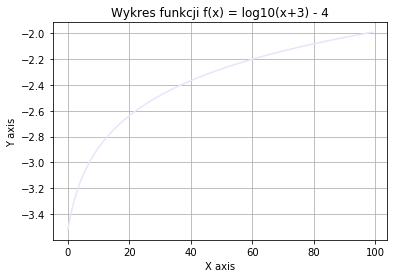

In [6]:
import matplotlib.pyplot as plt
import math

x = [el for el in range(0, 100)]
y = []
for el in x:
    try:
        y.append(math.log10(el+3) - 4)
    except:
        y.append(None)

plt.plot(x, y, color = 'lavender', linestyle = 'solid')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Wykres funkcji f(x) = log10(x+3) - 4")
plt.grid(True)
plt.show()

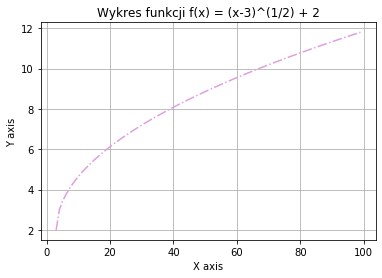

In [7]:
import matplotlib.pyplot as plt
import math

x = [el for el in range(0, 100)]
y = []
for el in x:
    try:
        y.append(math.sqrt(el-3) + 2)
    except:
        y.append(None)

plt.plot(x, y, color = 'plum', linestyle = 'dashdot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Wykres funkcji f(x) = (x-3)^(1/2) + 2")
plt.grid(True)
plt.show()

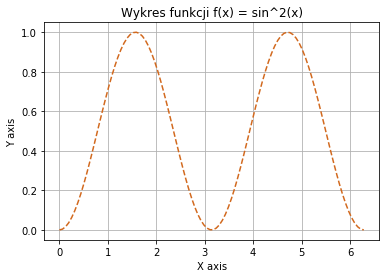

In [8]:
import matplotlib.pyplot as plt
import math
from numpy import linspace

x = linspace(0, 2*(math.pi), 100)
y = []
for el in x:
    try:
        y.append((math.sin(el))**2)
    except:
        y.append(None)

plt.plot(x, y, color = 'chocolate', linestyle = '--')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Wykres funkcji f(x) = sin^2(x)")
plt.grid(True)
plt.show()

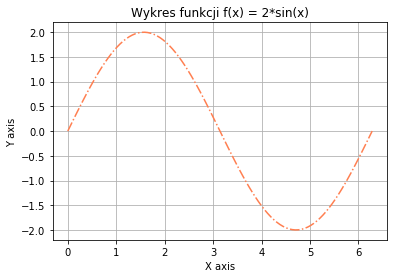

In [9]:
import matplotlib.pyplot as plt
import math
from numpy import linspace

x = linspace(0, 2*(math.pi), 100)
y = []
for el in x:
    try:
        y.append((math.sin(el))*2)
    except:
        y.append(None)

plt.plot(x, y, color = 'coral', linestyle = '-.')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Wykres funkcji f(x) = 2*sin(x)")
plt.grid(True)
plt.show()

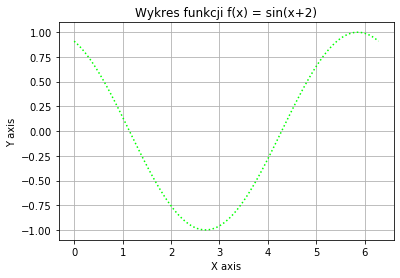

In [10]:
import matplotlib.pyplot as plt
import math
from numpy import linspace

x = linspace(0, 2*(math.pi), 100)
y = [] 
for el in x:
    try:
        y.append((math.sin(el+2)))
    except:
        y.append(None)

plt.plot(x, y, color = 'lime', linestyle = 'dotted')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Wykres funkcji f(x) = sin(x+2)")
plt.grid(True)
plt.show()

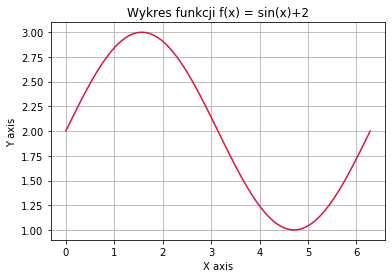

In [11]:
import matplotlib.pyplot as plt
import math
from numpy import linspace

x = linspace(0, 2*(math.pi), 100)
y = []
for el in x:
    try:
        y.append((math.sin(el))+2)
    except:
        y.append(None)

plt.plot(x, y, color = 'crimson', linestyle = 'solid')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Wykres funkcji f(x) = sin(x)+2")
plt.grid(True)
plt.show()

### Zadanie 2 [20 pkt]
Na podstawie dowolnych danych statystycznych (np wyników wyborów, ocen matur, sondaży) utwórz dwa słowniki - kluczami są nazwy, wartościami są uzyskane wyniki (10 pkt). Słowniki zapisz do plików (zapekluj, 10 pkt). Kod wstaw poniżej.

In [12]:
# https://drive.google.com/file/d/1NAUNbPlamz_j94lPtICH93tBE6vhqzNE/view?usp=sharing
# plik galapagos.txt
# jest też załączony w ramach odesłanej pd
# lub można wywołać komórkę poniżej

In [13]:

with open('galapagos.txt', 'w') as galapagos:
    galapagos.writelines(['Name:\n', 'Galapagos, Ecuador\n', ' \n', 'Polygon Middle Longitude:\n', '-90.6250 \n', ' \n', 'Polygon Middle Latitude:\n', '0.1500  \n', ' \n', 'Averaged Maximum Monthly Mean:\n', '26.2556\n', ' \n', 'Averaged Monthly Mean (Jan-Dec):\n', '24.2930 25.7009 26.2556 25.3039 24.3689 22.8955 21.9597 21.4517 21.5116 21.9426 22.7269 23.2507\n', ' \n', 'First Valid DHW Date:\n', '1985 25 03\n', ' \n', 'First Valid BAA Date:\n', '1985 31 03\n', ' \n', 'YYYY MM DD SST_MIN SST_MAX SST@90th_HS SSTA@90th_HS 90th_HS>0 DHW_from_90th_HS>1 BAA_7day_max\n', '1985 01 01 22.8200 25.0700 23.8300     -0.6774       0.0000    0.0000            0\n', '1985 01 02 22.9200 25.4100 23.9000      0.1561       0.0000    0.0000            0\n', '1985 01 03 22.9900 25.5200 23.9400      0.0948       0.0000    0.0000            0\n', '1985 01 04 22.5000 25.4600 23.4500      0.0010       0.0000    0.0000            0\n', '1985 01 05 22.3900 24.7700 23.6200     -1.0068       0.0000    0.0000            0\n', '1985 01 06 22.3200 24.7000 23.6600     -0.8497       0.0000    0.0000            0\n', '1985 01 07 22.1900 24.6800 23.6700     -0.8116       0.0000    0.0000            0\n', '1985 01 08 21.9300 24.7100 23.7100     -0.9077       0.0000    0.0000            0\n', '1985 01 09 21.9500 24.5200 23.5800     -0.8061       0.0000    0.0000            0\n', '1985 01 10 21.3400 23.9300 23.0700     -1.4916       0.0000    0.0000            0\n', '1985 01 11 21.1400 24.1800 23.4500     -1.1000       0.0000    0.0000            0\n', '1985 01 12 21.4300 24.4000 23.6200     -1.0232       0.0000    0.0000            0\n', '1985 01 13 21.6300 24.5800 23.8300     -0.7474       0.0000    0.0000            0\n', '1985 01 14 21.1600 24.4400 23.3100     -1.3706       0.0000    0.0000            0\n', '1985 01 15 21.2900 24.9900 23.7400     -1.1300       0.0000    0.0000            0\n', '1985 01 16 21.3400 25.0900 23.7200     -1.2687       0.0000    0.0000            0\n', '1985 01 17 21.4500 25.1800 23.7900     -1.2761       0.0000    0.0000            0\n', '1985 01 18 22.0900 25.7800 24.9500     -0.9594       0.0000    0.0000            0\n', '1985 01 19 22.3300 26.1000 24.7200     -0.3848       0.0000    0.0000            0\n', '1985 01 20 21.9300 26.2700 24.3300     -0.8487       0.0000    0.0000            0\n', '1985 01 21 21.9100 26.1700 24.0400     -1.1765       0.0000    0.0000            0\n', '1985 01 22 22.0300 26.2700 24.1000     -1.1642       0.0000    0.0000            0\n', '1985 01 23 22.0600 26.1200 23.6500     -1.6545       0.0000    0.0000            0\n', '1985 01 24 21.9300 26.2300 23.4400     -1.9026       0.0000    0.0000            0\n', '1985 01 25 21.9100 26.3000 23.4200     -1.9203       0.0000    0.0000            0\n', '1985 01 26 22.0100 26.4400 23.3600     -2.0452       0.0000    0.0000            0\n', '1985 01 27 21.5900 25.5800 22.9500     -2.5390       0.0000    0.0000            0\n', '1985 01 28 21.7000 25.9500 23.1800     -2.3006       0.0000    0.0000            0\n', '1985 01 29 22.4200 25.8900 23.6400     -1.8565       0.0000    0.0000            0\n', '1985 01 30 22.7200 25.8700 23.8800     -1.6555       0.0000    0.0000            0\n', '1985 01 31 22.9300 25.9300 24.6000     -0.3887       0.0000    0.0000            0\n', '1985 02 01 22.9700 25.8100 24.4400     -0.5961       0.0000    0.0000            0\n', '1985 02 02 22.7700 25.8300 24.5200     -0.9119       0.0000    0.0000            0\n', '1985 02 03 22.4200 25.5000 24.1300     -1.4281       0.0000    0.0000            0\n', '1985 02 04 22.3300 25.4500 24.0400     -1.6658       0.0000    0.0000            0\n', '1985 02 05 22.2900 25.3400 23.8200     -1.9271       0.0000    0.0000            0\n', '1985 02 06 21.8800 24.9100 23.3000     -1.9429       0.0000    0.0000            0\n', '1985 02 07 21.8300 24.8500 23.2400     -2.1552       0.0000    0.0000            0\n', '1985 02 08 21.9000 24.9600 23.4200     -1.9045       0.0000    0.0000            0\n', '1985 02 09 22.0300 25.1400 23.6800     -2.1848       0.0000    0.0000            0\n', '1985 02 10 22.1600 25.2600 23.7600     -2.1142       0.0000    0.0000            0\n', '1985 02 11 22.5000 25.3400 23.6100     -2.3848       0.0000    0.0000            0\n', '1985 02 12 22.9800 26.2300 24.5500     -1.4968       0.0000    0.0000            0\n', '1985 02 13 22.7200 26.1600 24.4800     -1.6139       0.0000    0.0000            0\n', '1985 02 14 22.7000 26.3500 24.6600     -1.4723       0.0000    0.0000            0\n', '1985 02 15 22.3200 26.3900 24.5400     -1.6300       0.0000    0.0000            0\n', '1985 02 16 22.1000 25.5700 24.1200     -2.0364       0.0000    0.0000            0\n', '1985 02 17 22.2100 25.5800 24.1000     -2.0393       0.0000    0.0000            0\n', '1985 02 18 22.2700 25.4500 24.1300     -2.0139       0.0000    0.0000            0\n', '1985 02 19 21.7700 24.0500 22.4800     -3.6300       0.0000    0.0000            0\n', '1985 02 20 22.4100 24.4300 22.7000     -2.3582       0.0000    0.0000            0\n', '1985 02 21 23.1000 25.0200 23.9200     -1.9121       0.0000    0.0000            0\n', '1985 02 22 23.6300 25.5200 24.6000     -1.2575       0.0000    0.0000            0\n', '1985 02 23 23.7200 25.7000 25.0300     -1.0143       0.0000    0.0000            0\n', '1985 02 24 23.8000 25.6900 24.9500     -0.9143       0.0000    0.0000            0\n', '1985 02 25 23.1400 25.4100 24.3500     -1.7850       0.0000    0.0000            0\n', '1985 02 26 22.9500 25.2200 24.1100     -2.0346       0.0000    0.0000            0\n', '1985 02 27 22.6700 25.2700 24.0400     -1.8886       0.0000    0.0000            0\n', '1985 02 28 22.5500 25.3500 23.9800     -2.1950       0.0000    0.0000            0\n', '1985 03 01 22.7000 25.5800 24.7800     -1.8350       0.0000    0.0000            0\n', '1985 03 02 22.7900 25.6200 24.4400     -1.8800       0.0000    0.0000            0\n', '1985 03 03 23.1200 25.8000 24.6500     -1.6814       0.0000    0.0000            0\n', '1985 03 04 23.0600 25.9000 24.5000     -1.7457       0.0000    0.0000            0\n', '1985 03 05 22.9800 25.7200 24.6700     -1.5486       0.0000    0.0000            0\n', '1985 03 06 23.1900 25.8400 24.7300     -1.3768       0.0000    0.0000            0\n', '1985 03 07 24.0500 26.9400 25.1700     -0.8571       0.0000    0.0000            0\n', '1985 03 08 24.6600 26.7400 25.7800     -0.4475       0.0000    0.0000            0\n', '1985 03 09 24.0300 26.4600 25.4200     -0.7993       0.0000    0.0000            0\n', '1985 03 10 24.0200 26.4900 25.4300     -0.7679       0.0000    0.0000            0\n', '1985 03 11 24.0300 26.6200 25.6800     -0.6629       0.0000    0.0000            0\n', '1985 03 12 24.2000 26.8400 25.6700     -0.5761       0.0000    0.0000            0\n', '1985 03 13 23.0100 25.5700 24.4500     -1.9207       0.0000    0.0000            0\n', '1985 03 14 22.8200 25.2300 24.0400     -2.3650       0.0000    0.0000            0\n', '1985 03 15 22.9100 25.2400 24.1100     -2.3100       0.0000    0.0000            0\n', '1985 03 16 23.4600 25.4500 24.3700     -1.7806       0.0000    0.0000            0\n', '1985 03 17 23.3900 25.1800 24.2100     -1.8906       0.0000    0.0000            0\n', '1985 03 18 23.4600 25.1900 24.2600     -1.8110       0.0000    0.0000            0\n', '1985 03 19 23.3200 24.8900 23.8600     -2.1216       0.0000    0.0000            0\n', '1985 03 20 23.4000 25.1200 24.0300     -1.9345       0.0000    0.0000            0\n', '1985 03 21 23.5300 25.3100 24.4500     -1.6429       0.0000    0.0000            0\n', '1985 03 22 23.3300 25.4000 24.4800     -1.7152       0.0000    0.0000            0\n', '1985 03 23 23.7300 25.8500 25.0200     -1.0239       0.0000    0.0000            0\n', '1985 03 24 23.9600 26.1600 25.7100     -0.5265       0.0000    0.0000            0\n', '1985 03 25 24.0400 26.6700 25.9500     -0.2319       0.0000    0.0000            0\n', '1985 03 26 24.1000 26.6500 25.8600     -0.1765       0.0000    0.0000            0\n', '1985 03 27 24.0800 26.5200 25.8000     -0.2239       0.0000    0.0000            0\n', '1985 03 28 23.8200 25.7200 25.2000     -1.0323       0.0000    0.0000            0\n', '1985 03 29 24.3000 25.7900 25.4100     -0.5648       0.0000    0.0000            0\n', '1985 03 30 24.6200 26.2300 25.6300     -0.3468       0.0000    0.0000            0\n', '1985 03 31 24.7900 26.8200 25.5200     -0.4687       0.0000    0.0000            0\n', '1985 04 01 24.7800 26.8700 24.9900     -0.3281       0.0000    0.0000            0\n', '1985 04 02 24.5700 26.9200 24.8300     -0.4252       0.0000    0.0000            0\n', '1985 04 03 24.5800 27.3000 25.2300     -0.3552       0.0000    0.0000            0\n', '1985 04 04 24.5000 26.8400 25.3000     -0.2410       0.0000    0.0000            0\n', '1985 04 05 23.8100 26.5400 25.0400     -0.5935       0.0000    0.0000            0\n', '1985 04 06 24.3300 26.3800 25.8500      0.1623       0.0000    0.0000            0\n', '1985 04 07 24.4300 26.5300 26.0500      0.2716       0.0000    0.0000            0\n', '1985 04 08 24.4100 26.6000 26.1400      0.3574       0.0000    0.0000            0\n', '1985 04 09 24.6100 26.9900 26.5200      0.7345       0.1700    0.0000            1\n', '1985 04 10 24.7900 27.2900 26.9300      1.1374       0.5000    0.0000            1\n', '1985 04 11 24.9600 27.6100 26.9500      1.5987       0.7800    0.0000            1\n', '1985 04 12 24.8600 27.5800 27.2100      1.5958       0.8100    0.0000            1\n', '1985 04 13 24.6400 27.2200 26.5400      1.2674       0.3600    0.0000            1\n', '1985 04 14 24.7100 27.1100 26.5100      0.8374       0.1600    0.0000            1\n', '1985 04 15 24.3200 26.7200 26.0100      0.4200       0.0000    0.0000            1\n', '1985 04 16 24.3800 26.4600 25.9500      0.4717       0.0000    0.0000            1\n', '1985 04 17 24.1000 25.9900 25.7000      0.0820       0.0000    0.0000            1\n', '1985 04 18 23.8500 25.6500 25.3900     -0.2470       0.0000    0.0000            1\n', '1985 04 19 23.7700 25.7000 25.1900     -0.3747       0.0000    0.0000            1\n', '1985 04 20 23.9100 26.2000 25.2100     -0.0483       0.0000    0.0000            1\n', '1985 04 21 24.0500 26.3800 25.3200      0.0840       0.0000    0.0000            0\n', '1985 04 22 23.9300 26.5400 25.1400      0.1210       0.0000    0.0000            0\n', '1985 04 23 23.8400 26.4400 25.1800      0.0000       0.0000    0.0000            0\n', '1985 04 24 23.5100 26.7400 25.3800      0.2500       0.0000    0.0000            0\n', '1985 04 25 23.0000 26.4200 24.7900     -0.4700       0.0000    0.0000            0\n', '1985 04 26 22.7600 26.5200 24.8400     -0.3083       0.0000    0.0000            0\n', '1985 04 27 22.7500 26.7800 25.1300     -0.1560       0.0000    0.0000            0\n', '1985 04 28 22.8500 27.1000 25.0200     -0.0890       0.0000    0.0000            0\n', '1985 04 29 22.8600 26.8000 24.8600     -0.1973       0.0000    0.0000            0\n', '1985 04 30 23.0500 26.6300 24.7800     -0.1750       0.0000    0.0000            0\n', '1985 05 01 22.9000 26.3100 24.6800     -0.3413       0.0000    0.0000            0\n', '1985 05 02 22.6100 25.3000 24.1700     -0.6410       0.0000    0.0000            0\n', '1985 05 03 22.1800 24.6600 23.7900     -1.1460       0.0000    0.0000            0\n', '1985 05 04 21.5300 24.7500 22.8400     -1.9413       0.0000    0.0000            0\n', '1985 05 05 21.4500 24.7100 22.4300     -2.1400       0.0000    0.0000            0\n', '1985 05 06 21.2200 24.6000 22.1000     -2.3870       0.0000    0.0000            0\n', '1985 05 07 21.1400 24.6000 22.2100     -2.5667       0.0000    0.0000            0\n', '1985 05 08 21.0700 24.5100 22.1800     -2.5807       0.0000    0.0000            0\n', '1985 05 09 21.3400 24.8400 22.5200     -2.2680       0.0000    0.0000            0\n', '1985 05 10 21.4700 25.2700 22.8200     -1.7467       0.0000    0.0000            0\n', '1985 05 11 21.3000 25.4300 22.5100     -1.9787       0.0000    0.0000            0\n', '1985 05 12 20.5700 25.6400 21.9800     -2.5210       0.0000    0.0000            0\n', '1985 05 13 20.5200 26.1400 22.3400     -2.1767       0.0000    0.0000            0\n', '1985 05 14 20.1700 26.3600 22.0700     -2.4230       0.0000    0.0000            0\n', '1985 05 15 20.3900 26.5800 22.2500     -2.2200       0.0000    0.0000            0\n', '1985 05 16 20.7900 26.2000 22.0300     -2.4116       0.0000    0.0000            0\n', '1985 05 17 21.1600 25.8800 21.7400     -2.1165       0.0000    0.0000            0\n', '1985 05 18 21.1000 25.5200 21.9200     -2.1274       0.0000    0.0000            0\n', '1985 05 19 20.8300 24.9900 21.5500     -2.2668       0.0000    0.0000            0\n', '1985 05 20 20.8500 25.1800 22.2100     -1.9452       0.0000    0.0000            0\n', '1985 05 21 21.0000 24.3900 22.1500     -2.0061       0.0000    0.0000            0\n', '1985 05 22 20.7900 23.8400 21.4800     -2.0926       0.0000    0.0000            0\n', '1985 05 23 21.1000 23.6000 21.7400     -1.5455       0.0000    0.0000            0\n', '1985 05 24 21.3700 23.7600 21.9600     -1.2203       0.0000    0.0000            0\n', '1985 05 25 21.4500 23.5100 22.3100     -1.5513       0.0000    0.0000            0\n', '1985 05 26 21.7100 23.6500 22.7500     -0.8745       0.0000    0.0000            0\n', '1985 05 27 21.9900 23.8800 22.8600     -0.2432       0.0000    0.0000            0\n', '1985 05 28 22.1800 24.1200 23.1600      0.0465       0.0000    0.0000            0\n', '1985 05 29 21.8000 23.7700 23.0900     -0.5348       0.0000    0.0000            0\n', '1985 05 30 21.4000 23.5700 22.6100     -0.9355       0.0000    0.0000            0\n', '1985 05 31 21.1800 23.1200 22.3500     -0.8174       0.0000    0.0000            0\n', '1985 06 01 21.3100 22.8900 22.7700     -0.6936       0.0000    0.0000            0\n', '1985 06 02 21.2400 22.7900 22.5800     -0.8452       0.0000    0.0000            0\n', '1985 06 03 21.0700 22.7900 22.3400     -0.9955       0.0000    0.0000            0\n', '1985 06 04 20.9800 23.3900 21.9900     -1.1719       0.0000    0.0000            0\n', '1985 06 05 21.3900 24.1900 22.1800     -0.3574       0.0000    0.0000            0\n', '1985 06 06 21.3800 24.5200 22.4400     -0.5306       0.0000    0.0000            0\n', '1985 06 07 21.2400 24.6100 22.7300     -0.7948       0.0000    0.0000            0\n', '1985 06 08 20.7800 23.9400 22.9000     -1.8174       0.0000    0.0000            0\n', '1985 06 09 20.7600 23.8200 22.3700     -1.1945       0.0000    0.0000            0\n', '1985 06 10 20.9700 24.0700 22.5600     -0.9203       0.0000    0.0000            0\n', '1985 06 11 21.2900 24.3800 23.0600      0.1371       0.0000    0.0000            0\n', '1985 06 12 21.5200 24.8300 23.5000      0.6161       0.0000    0.0000            0\n', '1985 06 13 21.7800 25.1600 23.9100      0.7181       0.0000    0.0000            0\n', '1985 06 14 21.8600 25.3200 24.7900      0.1423       0.0000    0.0000            0\n', '1985 06 15 21.4700 25.3800 24.2000      0.9500       0.0000    0.0000            0\n', '1985 06 16 20.6800 25.1000 23.4400      0.1187       0.0000    0.0000            0\n', '1985 06 17 20.3500 25.0300 23.2300      0.0520       0.0000    0.0000            0\n', '1985 06 18 20.0100 25.0100 22.8700     -0.3300       0.0000    0.0000            0\n', '1985 06 19 19.8100 24.7700 22.4300     -0.7893       0.0000    0.0000            0\n', '1985 06 20 19.7200 24.7600 22.2700     -0.9317       0.0000    0.0000            0\n', '1985 06 21 19.7100 24.8900 22.0200     -1.1420       0.0000    0.0000            0\n', '1985 06 22 20.4300 25.1900 22.6300     -0.6530       0.0000    0.0000            0\n', '1985 06 23 20.6300 25.1600 22.8400     -0.4220       0.0000    0.0000            0\n', '1985 06 24 20.6300 25.1200 22.8400     -0.4000       0.0000    0.0000            0\n', '1985 06 25 20.3400 24.8000 22.4800     -0.7400       0.0000    0.0000            0\n', '1985 06 26 20.3700 24.6900 22.4300     -0.7307       0.0000    0.0000            0\n', '1985 06 27 20.3100 24.6900 22.3300     -0.9060       0.0000    0.0000            0\n', '1985 06 28 20.1300 24.3400 22.1100     -1.0053       0.0000    0.0000            0\n', '1985 06 29 20.3300 24.4000 22.1900     -0.8727       0.0000    0.0000            0\n', '1985 06 30 20.7200 24.2500 22.1000     -0.9200       0.0000    0.0000            0\n', '1985 07 01 19.4300 22.8400 20.2500     -1.5527       0.0000    0.0000            0\n', '1985 07 02 19.2800 22.7600 20.6300     -2.2160       0.0000    0.0000            0\n', '1985 07 03 19.8100 23.3900 21.2900     -1.6380       0.0000    0.0000            0\n', '1985 07 04 20.0100 23.5300 21.5700     -0.7393       0.0000    0.0000            0\n', '1985 07 05 20.1000 23.6100 21.7200     -0.5667       0.0000    0.0000            0\n', '1985 07 06 19.9000 23.5500 21.7400     -0.6110       0.0000    0.0000            0\n', '1985 07 07 20.0500 23.5800 21.7300     -0.6020       0.0000    0.0000            0\n', '1985 07 08 19.8700 23.5200 21.7700     -0.4487       0.0000    0.0000            0\n', '1985 07 09 19.8300 24.0100 21.9700     -0.2680       0.0000    0.0000            0\n', '1985 07 10 19.4600 24.1500 22.1300     -0.5933       0.0000    0.0000            0\n', '1985 07 11 19.6400 24.1900 22.5600      0.3547       0.0000    0.0000            0\n', '1985 07 12 19.5900 23.8000 22.6700      0.0840       0.0000    0.0000            0\n', '1985 07 13 19.6000 23.6600 22.6600      0.5467       0.0000    0.0000            0\n', '1985 07 14 19.1600 23.0200 22.4400      0.2697       0.0000    0.0000            0\n', '1985 07 15 19.1400 23.0100 22.3400      0.4200       0.0000    0.0000            0\n', '1985 07 16 18.9900 22.9600 22.3200      0.4300       0.0000    0.0000            0\n', '1985 07 17 19.8400 23.6900 23.2300      0.6471       0.0000    0.0000            0\n', '1985 07 18 19.8800 23.8200 23.1900      0.6106       0.0000    0.0000            0\n', '1985 07 19 20.7400 24.6700 23.7800      1.2397       0.0000    0.0000            0\n', '1985 07 20 21.3200 25.0600 24.3100      1.7710       0.0000    0.0000            0\n', '1985 07 21 21.4300 24.7200 23.9700      1.3148       0.0000    0.0000            0\n', '1985 07 22 20.7400 24.2000 23.7400      0.1039       0.0000    0.0000            0\n', '1985 07 23 20.3900 24.0200 22.9600      0.4435       0.0000    0.0000            0\n', '1985 07 24 20.1100 23.7600 22.6500      0.1306       0.0000    0.0000            0\n', '1985 07 25 19.4500 23.7100 23.1000     -0.7681       0.0000    0.0000            0\n', '1985 07 26 19.1500 23.4300 22.0600     -0.6187       0.0000    0.0000            0\n', '1985 07 27 18.6700 22.9800 21.4000     -1.2906       0.0000    0.0000            0\n', '1985 07 28 18.6700 22.9300 21.2000     -1.4906       0.0000    0.0000            0\n', '1985 07 29 18.5000 23.3300 21.2100     -1.4784       0.0000    0.0000            0\n', '1985 07 30 18.2800 23.6900 21.5200     -1.0771       0.0000    0.0000            0\n', '1985 07 31 18.3800 24.0100 21.8000     -0.7781       0.0000    0.0000            0\n', '1985 08 01 18.7700 24.2300 22.3400     -0.3416       0.0000    0.0000            0\n', '1985 08 02 18.6600 24.2900 22.5500     -0.1968       0.0000    0.0000            0\n', '1985 08 03 18.3000 24.1200 22.3900     -0.4439       0.0000    0.0000            0\n', '1985 08 04 17.9600 23.3400 22.0500     -0.4990       0.0000    0.0000            0\n', '1985 08 05 18.2400 23.3000 22.0100     -0.6723       0.0000    0.0000            0\n', '1985 08 06 18.1300 23.1300 21.8400     -0.8390       0.0000    0.0000            0\n', '1985 08 07 17.9800 23.0100 21.7200     -0.9558       0.0000    0.0000            0\n', '1985 08 08 17.8000 22.8000 21.9200     -1.6748       0.0000    0.0000            0\n', '1985 08 09 17.8600 22.9100 21.5700     -1.3081       0.0000    0.0000            0\n', '1985 08 10 17.8800 23.1100 21.6600     -1.1984       0.0000    0.0000            0\n', '1985 08 11 17.2300 22.9000 21.2800     -1.7148       0.0000    0.0000            0\n', '1985 08 12 16.8900 22.7200 20.9200     -1.7768       0.0000    0.0000            0\n', '1985 08 13 16.4900 22.5900 20.7900     -1.7990       0.0000    0.0000            0\n', '1985 08 14 16.9900 23.0300 21.2900     -1.4023       0.0000    0.0000            0\n', '1985 08 15 16.5600 22.8600 20.6200     -2.0700       0.0000    0.0000            0\n', '1985 08 16 17.0100 23.9000 20.8700     -1.8094       0.0000    0.0000            0\n', '1985 08 17 17.5600 24.3600 21.4200     -1.2687       0.0000    0.0000            0\n', '1985 08 18 17.6100 24.3000 21.3700     -1.3790       0.0000    0.0000            0\n', '1985 08 19 18.5800 24.6500 22.2900     -0.6458       0.0000    0.0000            0\n', '1985 08 20 19.0400 25.1400 22.7500      0.0010       0.0000    0.0000            0\n', '1985 08 21 19.0000 25.1400 22.6600     -0.0648       0.0000    0.0000            0\n', '1985 08 22 18.8500 25.1900 22.7700     -0.2119       0.0000    0.0000            0\n', '1985 08 23 19.0300 25.3400 22.8300      0.0935       0.0000    0.0000            0\n', '1985 08 24 18.9900 25.0400 22.8100     -0.0852       0.0000    0.0000            0\n', '1985 08 25 19.0800 25.1200 22.9600      0.1087       0.0000    0.0000            0\n', '1985 08 26 19.1500 25.1800 23.0800      0.1926       0.0000    0.0000            0\n', '1985 08 27 18.7800 24.3500 22.1800     -0.8084       0.0000    0.0000            0\n', '1985 08 28 18.9000 24.2600 22.2300     -0.7039       0.0000    0.0000            0\n', '1985 08 29 18.8600 24.3800 22.1800     -0.7603       0.0000    0.0000            0\n', '1985 08 30 18.6900 24.3200 21.8000     -1.1768       0.0000    0.0000            0\n', '1985 08 31 18.6400 24.3600 21.6600     -1.2932       0.0000    0.0000            0\n', '1985 09 01 18.7100 24.3700 21.6800     -1.2797       0.0000    0.0000            0\n', '1985 09 02 18.9800 24.5000 21.9400     -1.0561       0.0000    0.0000            0\n', '1985 09 03 19.3800 24.6200 22.1300     -0.8648       0.0000    0.0000            0\n', '1985 09 04 18.9100 24.7500 21.9300     -1.0490       0.0000    0.0000            0\n', '1985 09 05 18.4900 24.7400 22.0200     -0.8765       0.0000    0.0000            0\n', '1985 09 06 18.4600 24.7600 22.1000     -0.6616       0.0000    0.0000            0\n', '1985 09 07 18.4300 24.5300 22.1700     -0.8477       0.0000    0.0000            0\n', '1985 09 08 18.0800 24.1700 22.2100     -1.6274       0.0000    0.0000            0\n', '1985 09 09 17.9000 24.2600 21.9800     -0.9777       0.0000    0.0000            0\n', '1985 09 10 18.0500 24.2600 22.2000     -0.8181       0.0000    0.0000            0\n', '1985 09 11 18.2500 24.2000 22.2400     -0.5139       0.0000    0.0000            0\n', '1985 09 12 18.6900 24.3000 22.3500     -0.4639       0.0000    0.0000            0\n', '1985 09 13 18.9000 24.4700 22.6800     -0.2626       0.0000    0.0000            0\n', '1985 09 14 18.9000 24.3800 22.5600     -0.3913       0.0000    0.0000            0\n', '1985 09 15 18.8400 24.3300 22.5200     -0.4900       0.0000    0.0000            0\n', '1985 09 16 18.8500 24.1100 22.4600     -0.5643       0.0000    0.0000            0\n', '1985 09 17 18.7000 23.9700 22.4600     -0.7393       0.0000    0.0000            0\n', '1985 09 18 18.6500 24.0000 22.2900     -0.6870       0.0000    0.0000            0\n', '1985 09 19 18.6000 24.1100 22.4400     -0.5700       0.0000    0.0000            0\n', '1985 09 20 18.5300 23.8300 22.5300     -0.4583       0.0000    0.0000            0\n', '1985 09 21 18.8700 24.0000 22.6800     -0.3140       0.0000    0.0000            0\n', '1985 09 22 18.3500 23.5500 22.2100     -0.8243       0.0000    0.0000            0\n', '1985 09 23 18.7600 24.0800 22.8300     -0.4567       0.0000    0.0000            0\n', '1985 09 24 18.9300 24.3400 22.7400     -0.3070       0.0000    0.0000            0\n', '1985 09 25 18.7800 24.2000 22.5300     -0.4867       0.0000    0.0000            0\n', '1985 09 26 18.6200 24.2300 22.3800     -0.6423       0.0000    0.0000            0\n', '1985 09 27 18.5500 24.4800 22.3300     -0.6980       0.0000    0.0000            0\n', '1985 09 28 18.5400 24.4400 22.1800     -0.8537       0.0000    0.0000            0\n', '1985 09 29 18.4700 24.3600 22.0300     -1.0093       0.0000    0.0000            0\n', '1985 09 30 18.5700 24.1500 21.9800     -1.0650       0.0000    0.0000            0\n', '1985 10 01 18.5200 23.9700 21.8900     -1.0747       0.0000    0.0000            0\n', '1985 10 02 18.5000 23.8800 21.9000     -1.1563       0.0000    0.0000            0\n', '1985 10 03 18.4600 23.8600 21.9100     -1.0640       0.0000    0.0000            0\n', '1985 10 04 18.2400 23.8700 21.9600     -1.1077       0.0000    0.0000            0\n', '1985 10 05 18.0800 24.0300 21.3700     -1.7367       0.0000    0.0000            0\n', '1985 10 06 17.8400 23.8500 20.9100     -2.2920       0.0000    0.0000            0\n', '1985 10 07 17.8600 24.1100 21.0500     -2.1853       0.0000    0.0000            0\n', '1985 10 08 18.0700 24.4900 21.4100     -1.8347       0.0000    0.0000            0\n', '1985 10 09 17.7200 24.9100 21.5800     -1.6380       0.0000    0.0000            0\n', '1985 10 10 18.1500 24.2200 21.6900     -1.4383       0.0000    0.0000            0\n', '1985 10 11 18.6700 24.2900 21.8300     -1.3027       0.0000    0.0000            0\n', '1985 10 12 18.0800 24.2100 21.8200     -1.3170       0.0000    0.0000            0\n', '1985 10 13 18.9000 23.9800 22.1400     -1.3107       0.0000    0.0000            0\n', '1985 10 14 19.1400 24.0900 22.3300     -1.0523       0.0000    0.0000            0\n', '1985 10 15 19.4500 24.3200 22.4900     -0.6900       0.0000    0.0000            0\n', '1985 10 16 19.3400 24.3700 22.7500     -0.5855       0.0000    0.0000            0\n', '1985 10 17 19.3800 24.5400 22.9500     -0.4010       0.0000    0.0000            0\n', '1985 10 18 19.1600 24.4400 22.8000     -0.3871       0.0000    0.0000            0\n', '1985 10 19 19.7600 24.5900 23.2900     -0.0032       0.0000    0.0000            0\n', '1985 10 20 19.8100 24.5000 23.2800      0.0358       0.0000    0.0000            0\n', '1985 10 21 19.8000 24.5500 23.3100      0.0606       0.0000    0.0000            0\n', '1985 10 22 20.0500 24.7700 23.3900     -0.0916       0.0000    0.0000            0\n', '1985 10 23 20.0700 24.9500 23.5400      0.1013       0.0000    0.0000            0\n', '1985 10 24 19.8700 24.8100 23.4000     -0.0435       0.0000    0.0000            0\n', '1985 10 25 19.7200 24.6900 22.9700     -0.4884       0.0000    0.0000            0\n', '1985 10 26 19.6900 24.7500 22.9700     -0.5203       0.0000    0.0000            0\n', '1985 10 27 19.5200 24.7600 22.9000     -0.6058       0.0000    0.0000            0\n', '1985 10 28 19.8100 25.2400 23.2000     -0.3013       0.0000    0.0000            0\n', '1985 10 29 20.6300 25.7000 23.7100      0.1923       0.0000    0.0000            0\n', '1985 10 30 20.3900 25.7200 23.7200      0.1826       0.0000    0.0000            0\n', '1985 10 31 19.8600 25.7700 23.6900      0.1374       0.0000    0.0000            0\n', '1985 11 01 19.7800 25.8800 23.8600      0.2768       0.0000    0.0000            0\n', '1985 11 02 19.6800 25.4400 23.4400     -0.2687       0.0000    0.0000            0\n', '1985 11 03 19.6600 25.2600 23.3600     -0.1748       0.0000    0.0000            0\n', '1985 11 04 19.7700 25.2200 23.6200     -0.0261       0.0000    0.0000            0\n', '1985 11 05 19.7000 25.0700 23.7300     -0.0113       0.0000    0.0000            0\n', '1985 11 06 19.8300 24.9800 24.2400     -0.4345       0.0000    0.0000            0\n', '1985 11 07 20.0100 24.7900 23.5400      0.8852       0.0000    0.0000            0\n', '1985 11 08 19.6500 24.5300 23.5500      1.0335       0.0000    0.0000            0\n', '1985 11 09 19.4300 23.5100 22.7800      0.1835       0.0000    0.0000            0\n', '1985 11 10 19.3700 23.4500 22.7300     -0.9110       0.0000    0.0000            0\n', '1985 11 11 19.8400 23.7000 23.2700     -0.5571       0.0000    0.0000            0\n', '1985 11 12 19.6800 23.5000 22.4200     -1.2326       0.0000    0.0000            0\n', '1985 11 13 19.7000 23.3700 22.1600     -1.5916       0.0000    0.0000            0\n', '1985 11 14 19.7400 23.4000 22.1400     -1.4116       0.0000    0.0000            0\n', '1985 11 15 20.1100 23.4700 22.1700     -1.4400       0.0000    0.0000            0\n', '1985 11 16 20.4800 24.4000 21.9900     -1.9083       0.0000    0.0000            0\n', '1985 11 17 20.9100 25.0100 22.4200     -1.6053       0.0000    0.0000            0\n', '1985 11 18 20.5300 24.7500 22.6100     -1.3440       0.0000    0.0000            0\n', '1985 11 19 19.9700 24.4900 22.3800     -1.5320       0.0000    0.0000            0\n', '1985 11 20 19.8500 24.2900 22.4500     -1.5500       0.0000    0.0000            0\n', '1985 11 21 19.9100 24.3400 22.6600     -1.3180       0.0000    0.0000            0\n', '1985 11 22 20.4900 24.4400 23.2600     -0.2940       0.0000    0.0000            0\n', '1985 11 23 20.4400 24.3700 23.9100     -0.9653       0.0000    0.0000            0\n', '1985 11 24 20.2400 24.1100 23.7400     -1.1990       0.0000    0.0000            0\n', '1985 11 25 20.4100 24.5300 23.9500     -0.8833       0.0000    0.0000            0\n', '1985 11 26 20.5300 24.4500 24.1800     -0.9777       0.0000    0.0000            0\n', '1985 11 27 20.5700 24.7000 23.4900     -0.3520       0.0000    0.0000            0\n', '1985 11 28 20.6200 25.0700 23.7500     -0.1970       0.0000    0.0000            0\n', '1985 11 29 20.6900 25.1100 23.1400     -0.8713       0.0000    0.0000            0\n', '1985 11 30 20.0100 24.5500 21.9400     -2.1100       0.0000    0.0000            0\n', '1985 12 01 19.6900 24.1800 21.5100     -2.4640       0.0000    0.0000            0\n', '1985 12 02 19.3900 24.0800 21.1700     -2.8130       0.0000    0.0000            0\n', '1985 12 03 19.6800 24.3900 21.5500     -2.4900       0.0000    0.0000            0\n', '1985 12 04 19.9600 24.5700 21.8700     -2.1783       0.0000    0.0000            0\n', '1985 12 05 20.5100 24.8400 22.5100     -1.5267       0.0000    0.0000            0\n', '1985 12 06 21.1800 24.5000 22.5800     -1.4390       0.0000    0.0000            0\n', '1985 12 07 21.2400 24.4700 22.4700     -1.6360       0.0000    0.0000            0\n', '1985 12 08 21.1800 24.3700 22.2800     -1.8163       0.0000    0.0000            0\n', '1985 12 09 21.2600 24.9800 22.4900     -1.6320       0.0000    0.0000            0\n', '1985 12 10 21.2900 25.0000 22.5900     -1.4700       0.0000    0.0000            0\n', '1985 12 11 21.0900 24.9100 22.6500     -1.4480       0.0000    0.0000            0\n', '1985 12 12 20.7000 24.4400 22.4100     -1.6960       0.0000    0.0000            0\n', '1985 12 13 20.5800 24.4800 22.2300     -1.2147       0.0000    0.0000            0\n', '1985 12 14 20.7100 24.5400 22.4400     -1.7923       0.0000    0.0000            0\n', '1985 12 15 20.6900 24.2400 22.3100     -1.0600       0.0000    0.0000            0\n', '1985 12 16 20.1100 24.0000 22.8700     -1.2703       0.0000    0.0000            0\n', '1985 12 17 20.1500 24.2300 23.0700     -1.1006       0.0000    0.0000            0\n', '1985 12 18 21.1200 25.0000 23.8300     -0.3790       0.0000    0.0000            0\n', '1985 12 19 21.1800 25.2200 23.8100     -0.3816       0.0000    0.0000            0\n', '1985 12 20 21.4300 25.3000 23.9000     -0.3661       0.0000    0.0000            0\n', '1985 12 21 21.8400 25.4000 23.9700     -0.3123       0.0000    0.0000            0\n', '1985 12 22 21.9900 25.4300 24.0500     -0.2610       0.0000    0.0000            0\n', '1985 12 23 21.7300 25.3900 23.9200     -0.4197       0.0000    0.0000            0\n', '1985 12 24 21.5800 25.6000 23.3100     -1.0584       0.0000    0.0000            0\n', '1985 12 25 21.7400 25.3700 22.8000      0.0706       0.0000    0.0000            0\n', '1985 12 26 21.6200 25.3100 23.4600      0.2184       0.0000    0.0000            0\n', '1985 12 27 21.4800 25.2300 23.5000      0.2016       0.0000    0.0000            0\n', '1985 12 28 21.8300 25.3500 23.6300      0.2926       0.0000    0.0000            0\n', '1985 12 29 22.1300 25.7200 23.8600     -0.5265       0.0000    0.0000            0\n', '1985 12 30 22.0500 25.5500 23.8300     -0.5755       0.0000    0.0000            0\n', '1985 12 31 22.0100 25.4300 23.8500     -0.7010       0.0000    0.0000            0\n', '1986 01 01 22.1100 25.9200 23.7700     -0.7565       0.0000    0.0000            0\n', '1986 01 02 22.1500 26.2000 23.7200     -0.7842       0.0000    0.0000            0\n', '1986 01 03 22.3200 25.5300 24.1700     -0.3116       0.0000    0.0000            0\n', '1986 01 04 22.0800 25.6600 24.2500     -0.3152       0.0000    0.0000            0\n', '1986 01 05 21.8900 25.6000 24.1900     -0.3297       0.0000    0.0000            0\n', '1986 01 06 21.6400 25.4000 23.7700     -0.8613       0.0000    0.0000            0\n', '1986 01 07 21.3600 24.9600 23.6900     -0.9426       0.0000    0.0000            0\n', '1986 01 08 21.5800 24.8400 23.4000     -1.0977       0.0000    0.0000            0\n', '1986 01 09 21.5400 24.8900 23.4900     -1.3258       0.0000    0.0000            0\n', '1986 01 10 21.4900 24.9300 23.2200     -0.9506       0.0000    0.0000            0\n', '1986 01 11 21.3500 24.9100 23.4900     -1.3852       0.0000    0.0000            0\n', '1986 01 12 21.5400 25.3700 23.4600     -1.4429       0.0000    0.0000            0\n', '1986 01 13 22.0700 25.4100 23.3800     -0.9881       0.0000    0.0000            0\n', '1986 01 14 22.2500 25.3200 23.6200     -0.9290       0.0000    0.0000            0\n', '1986 01 15 22.4800 25.4300 23.6800     -0.6600       0.0000    0.0000            0\n', '1986 01 16 22.4200 25.5700 23.8200     -0.7277       0.0000    0.0000            0\n', '1986 01 17 22.6200 25.5800 24.1700     -0.5435       0.0000    0.0000            0\n', '1986 01 18 22.7000 25.5800 24.4400     -0.5639       0.0000    0.0000            0\n', '1986 01 19 22.7600 25.4200 24.4200     -0.4803       0.0000    0.0000            0\n', '1986 01 20 22.5900 24.9500 24.0900     -0.7358       0.0000    0.0000            0\n', '1986 01 21 22.0500 24.5300 24.1400     -1.6226       0.0000    0.0000            0\n', '1986 01 22 22.5100 24.8500 23.8100     -1.1074       0.0000    0.0000            0\n', '1986 01 23 22.6300 25.0800 24.0200     -0.9739       0.0000    0.0000            0\n', '1986 01 24 23.2800 25.6100 24.6500     -0.4594       0.0000    0.0000            0\n', '1986 01 25 23.5700 25.8000 25.0000     -0.1758       0.0000    0.0000            0\n', '1986 01 26 23.8500 26.0200 25.1900     -0.1200       0.0000    0.0000            0\n', '1986 01 27 24.0200 25.8900 25.4600      0.5981       0.0000    0.0000            0\n', '1986 01 28 24.1900 26.0400 25.5100      0.6677       0.0000    0.0000            0\n', '1986 01 29 24.3200 26.0200 25.6300      0.2410       0.0000    0.0000            0\n', '1986 01 30 24.1400 26.6700 25.6500      0.3013       0.0000    0.0000            0\n', '1986 01 31 23.8000 26.3600 25.5600      0.0694       0.0000    0.0000            0\n', '1986 02 01 23.7200 26.2100 25.3500      0.3194       0.0000    0.0000            0\n', '1986 02 02 23.8100 26.1600 25.3700     -0.2442       0.0000    0.0000            0\n', '1986 02 03 24.1100 26.4700 25.6900      0.2319       0.0000    0.0000            0\n', '1986 02 04 24.4800 26.7000 25.7900      0.7423       0.0000    0.0000            0\n', '1986 02 05 24.4100 26.7300 25.7600      0.6439       0.0000    0.0000            0\n', '1986 02 06 24.3000 26.7500 25.7000      0.5126       0.0000    0.0000            0\n', '1986 02 07 24.0900 26.7900 25.7000      0.2677       0.0000    0.0000            0\n', '1986 02 08 24.6600 27.0700 26.1000      0.5203       0.0000    0.0000            0\n', '1986 02 09 24.9400 27.3700 26.3700      0.7619       0.1000    0.0000            1\n', '1986 02 10 24.7800 26.4500 26.1900      0.9087       0.0000    0.0000            1\n', '1986 02 11 24.7900 26.7200 26.4300      0.8958       0.1300    0.0000            1\n', '1986 02 12 24.2400 26.2800 26.1200      0.5632       0.0000    0.0000            1\n', '1986 02 13 23.6000 25.5300 25.4600     -0.1845       0.0000    0.0000            1\n', '1986 02 14 23.6200 25.5500 25.2700     -0.4126       0.0000    0.0000            1\n', '1986 02 15 23.9700 25.6700 25.5800     -0.1500       0.0000    0.0000            1\n', '1986 02 16 24.5200 26.1800 25.8200      0.0871       0.0000    0.0000            1\n', '1986 02 17 24.5100 26.4000 25.6100     -0.1514       0.0000    0.0000            1\n', '1986 02 18 24.6300 26.3800 25.8300      0.0293       0.0000    0.0000            0\n', '1986 02 19 24.8500 26.6200 26.2700      0.4871       0.0500    0.0000            1\n', '1986 02 20 25.1300 26.9000 26.4700      0.6643       0.2700    0.0000            1\n', '1986 02 21 24.9400 26.7000 26.3100      0.4821       0.1600    0.0000            1\n', '1986 02 22 24.5900 26.9900 26.6700      0.4675       0.2500    0.0000            1\n', '1986 02 23 24.5200 26.7300 26.4700      0.1900       0.0000    0.0000            1\n', '1986 02 24 24.3800 26.5200 25.8700     -0.0054       0.0000    0.0000            1\n', '1986 02 25 24.3700 26.2200 25.7500     -0.1136       0.0000    0.0000            1\n', '1986 02 26 24.8400 26.5800 26.1100      0.2432       0.0000    0.0000            1\n', '1986 02 27 24.9200 26.8000 26.1300      0.2143       0.0000    0.0000            1\n', '1986 02 28 24.8200 26.7700 25.8400     -0.1029       0.0000    0.0000            1\n', '1986 03 01 25.0000 26.6300 26.1300      0.1350       0.0000    0.0000            0\n', '1986 03 02 24.8800 26.4600 26.0300      0.0154       0.0000    0.0000            0\n', '1986 03 03 26.0000 27.4100 26.9400      1.0314       0.8300    0.0000            1\n', '1986 03 04 26.6600 27.6400 27.4100      1.3904       1.1900    0.1700            2\n', '1986 03 05 27.0200 27.7400 27.1300      1.6700       1.3700    0.3657            2\n', '1986 03 06 26.9400 27.7200 27.1700      1.6164       1.3400    0.5571            2\n', '1986 03 07 26.8100 27.8100 27.2400      1.6757       1.4300    0.7614            2\n', '1986 03 08 26.9600 27.6600 27.4800      1.5175       1.3800    0.9586            2\n', '1986 03 09 26.7500 27.6100 27.2800      1.6079       1.4300    1.1629            2\n', '1986 03 10 27.1700 27.9800 27.5900      1.9200       1.7700    1.4157            2\n', '1986 03 11 26.9300 27.9600 27.5300      1.8343       1.7100    1.6600            2\n', '1986 03 12 26.9200 27.9600 27.7800      1.7586       1.6900    1.9014            2\n', '1986 03 13 26.9000 28.1100 27.5100      1.7607       1.7000    2.1443            2\n', '1986 03 14 27.3700 28.7400 28.0300      2.2411       2.2100    2.4600            2\n', '1986 03 15 27.4400 28.6600 28.3000      2.2900       2.2900    2.7871            2\n', '1986 03 16 27.5400 28.6400 28.0000      2.2174       2.1800    3.0986            2\n', '1986 03 17 27.5400 28.4900 27.8300      2.1465       2.0800    3.3957            2\n', '1986 03 18 27.1700 28.4100 28.1600      1.8477       1.7800    3.6500            2\n', '1986 03 19 26.6700 28.0500 27.9000      1.5242       1.4300    3.8543            2\n', '1986 03 20 26.3400 27.9900 27.7300      1.3474       1.2200    4.0286            3\n', '1986 03 21 25.2700 27.6200 27.2600      0.4371       0.2900    4.0286            3\n', '1986 03 22 25.2700 27.6500 26.8100      0.5048       0.3400    4.0286            3\n', '1986 03 23 25.1800 27.4600 26.0600      0.4594       0.1600    4.0286            3\n', '1986 03 24 25.0500 27.0100 26.3100      0.0348       0.0000    4.0286            3\n', '1986 03 25 25.0300 26.8600 26.2100     -0.1274       0.0000    4.0286            3\n', '1986 03 26 24.9300 26.3800 26.0600     -0.1510       0.0000    4.0286            3\n', '1986 03 27 24.5400 25.8900 25.4300     -0.4858       0.0000    4.0286            1\n', '1986 03 28 23.7900 25.3900 24.9200     -0.9471       0.0000    4.0286            1\n', '1986 03 29 23.4100 25.5200 24.2900     -1.0158       0.0000    4.0286            1\n', '1986 03 30 23.2300 25.3500 24.1300     -1.1713       0.0000    4.0286            0\n', '1986 03 31 23.4000 25.4400 24.2700     -0.9761       0.0000    4.0286            0\n', '1986 04 01 23.1100 25.0900 23.7700     -1.4542       0.0000    4.0286            0\n', '1986 04 02 23.0100 25.0800 23.9400     -1.4532       0.0000    4.0286            0\n', '1986 04 03 22.6600 24.7000 24.0500     -2.0871       0.0000    4.0286            0\n', '1986 04 04 22.8100 24.9000 24.0300     -1.7297       0.0000    4.0286            0\n', '1986 04 05 23.2500 25.7200 24.6300     -1.0284       0.0000    4.0286            0\n', '1986 04 06 23.6600 26.0000 25.2700     -0.6639       0.0000    4.0286            0\n', '1986 04 07 23.9200 25.9000 24.8200     -0.8235       0.0000    4.0286            0\n', '1986 04 08 23.3800 25.6800 24.4000     -1.2571       0.0000    4.0286            0\n', '1986 04 09 23.0100 25.3800 24.4400     -1.3887       0.0000    4.0286            0\n', '1986 04 10 23.0300 25.4100 24.4200     -1.3071       0.0000    4.0286            0\n', '1986 04 11 23.1600 25.5500 24.6100     -1.0997       0.0000    4.0286            0\n', '1986 04 12 23.3600 25.8600 24.9300     -0.7523       0.0000    4.0286            0\n', '1986 04 13 23.4900 25.9700 24.7700     -0.7184       0.0000    4.0286            0\n', '1986 04 14 23.4000 25.9500 25.0700     -0.5774       0.0000    4.0286            0\n', '1986 04 15 23.4300 25.8000 24.7500     -0.7100       0.0000    4.0286            0\n', '1986 04 16 23.5500 25.7800 24.5000     -0.4187       0.0000    4.0286            0\n', '1986 04 17 23.6300 25.5800 24.9800     -0.6187       0.0000    4.0286            0\n', '1986 04 18 23.2000 25.4600 24.0900     -0.5720       0.0000    4.0286            0\n', '1986 04 19 24.0300 26.8800 26.0300      1.0293       0.0500    4.0286            1\n', '1986 04 20 24.5300 27.3200 26.5400      1.6833       0.6100    4.0286            1\n', '1986 04 21 24.7200 27.4600 27.0900      1.7420       0.7900    4.0286            1\n', '1986 04 22 25.6400 27.5700 27.1600      1.8873       0.8900    4.0286            1\n', '1986 04 23 25.6800 27.4600 26.9800      1.7427       0.7100    4.0286            1\n', '1986 04 24 25.6200 27.7400 26.7700      2.4500       1.0300    4.1757            3\n', '1986 04 25 25.6500 27.3700 26.9100      1.8233       0.5000    4.1757            3\n', '1986 04 26 25.4700 27.2400 26.6800      1.7150       0.3200    4.1757            3\n', '1986 04 27 25.5600 27.4900 27.3000      1.4300       0.5100    4.1757            3\n', '1986 04 28 24.5700 26.4400 25.4900      0.7197       0.0000    4.1757            3\n', '1986 04 29 24.4600 26.2200 25.4100      0.4733       0.0000    4.1757            3\n', '1986 04 30 24.1500 25.9500 25.0900      0.1850       0.0000    4.1757            3\n', '1986 05 01 24.1100 26.0700 25.1200      0.1653       0.0000    4.1757            1\n', '1986 05 02 24.3500 26.4600 25.4500      0.5177       0.0000    4.1757            1\n', '1986 05 03 24.4100 26.6600 25.4800      0.5960       0.0000    4.1757            1\n', '1986 05 04 24.6900 26.6400 25.6400      0.8067       0.0000    4.1757            0\n', '1986 05 05 24.6000 26.7400 25.4300      0.8867       0.0000    4.1757            0\n', '1986 05 06 24.3400 26.7600 25.5300      0.7620       0.0000    4.1757            0\n', '1986 05 07 24.2400 26.5600 25.4700      0.7533       0.0000    4.1757            0\n', '1986 05 08 24.0700 26.2900 25.3100      0.5630       0.0000    4.1757            0\n', '1986 05 09 24.4700 26.6500 25.7100      1.0100       0.0000    4.1757            0\n', '1986 05 10 24.3900 26.5900 25.7600      1.0000       0.0000    4.1757            0\n', '1986 05 11 24.2300 26.3300 25.4400      0.7820       0.0000    4.1757            0\n', '1986 05 12 24.0600 26.2000 25.2800      0.7080       0.0000    4.1757            0\n', '1986 05 13 23.7700 26.0000 24.9300      0.7480       0.0000    4.1757            0\n', '1986 05 14 22.9500 25.5200 24.2800      0.1527       0.0000    4.1757            0\n', '1986 05 15 22.9800 25.5600 24.4000      0.3600       0.0000    4.1757            0\n', '1986 05 16 22.9600 25.7600 24.1600      0.1045       0.0000    4.1757            0\n', '1986 05 17 22.5600 25.2100 23.8100     -0.5635       0.0000    4.1757            0\n', '1986 05 18 22.4600 25.0600 23.6300     -0.7703       0.0000    4.1757            0\n', '1986 05 19 22.1500 24.5200 23.4600     -1.0771       0.0000    4.1757            0\n', '1986 05 20 22.3800 24.9800 23.4800     -0.6865       0.0000    4.1757            0\n', '1986 05 21 22.6600 25.1700 23.8700     -0.2810       0.0000    4.1757            0\n', '1986 05 22 22.9500 25.3200 24.5000      0.4877       0.0000    4.1757            0\n', '1986 05 23 22.1200 25.9500 24.3100      0.3500       0.0000    4.1757            0\n', '1986 05 24 22.0600 26.5700 23.8900     -0.4052       0.0000    4.1757            0\n', '1986 05 25 22.0200 26.6400 23.9300     -0.3477       0.0000    4.1757            0\n', '1986 05 26 22.4600 27.1600 24.4200      0.1855       0.0000    4.1757            0\n', '1986 05 27 21.9900 27.0200 23.9700     -0.2290       0.0000    4.0057            0\n', '1986 05 28 21.9000 27.1200 24.0300     -0.1423       0.0000    3.8100            0\n', '1986 05 29 21.7500 27.1100 23.7300      0.0542       0.0000    3.6186            0\n', '1986 05 30 21.5400 27.1400 23.6100     -0.0119       0.0000    3.4143            0\n', '1986 05 31 21.3100 26.6100 23.4200     -0.0113       0.0000    3.2171            0\n', '1986 06 01 21.1000 26.0000 23.2800     -0.1239       0.0000    3.0129            0\n', '1986 06 02 20.9700 25.8200 23.5700     -0.1832       0.0000    2.7600            0\n', '1986 06 03 21.0400 25.6700 24.1900     -0.8052       0.0000    2.5157            0\n', '1986 06 04 21.4800 25.8500 24.5200     -0.4916       0.0000    2.2743            0\n', '1986 06 05 22.0700 26.1900 24.3800      0.8000       0.0000    2.0314            0\n', '1986 06 06 22.2300 26.1100 24.3100      0.7071       0.0000    1.7157            0\n', '1986 06 07 22.1100 25.9600 24.1900      0.5574       0.0000    1.3886            0\n', '1986 06 08 22.0400 25.6900 24.1300      0.5777       0.0000    1.0771            0\n', '1986 06 09 22.0900 25.3100 23.8700      0.7868       0.0000    0.7800            0\n', '1986 06 10 21.9400 24.7400 23.5900      0.5794       0.0000    0.5257            0\n', '1986 06 11 21.8200 24.1800 23.3300      0.4065       0.0000    0.3214            0\n', '1986 06 12 21.5700 24.0400 22.8700     -0.2403       0.0000    0.1471            0\n', '1986 06 13 21.3600 23.7000 22.4800     -0.3926       0.0000    0.1471            0\n', '1986 06 14 21.2400 24.1400 22.4900     -0.3503       0.0000    0.1471            0\n', '1986 06 15 21.3600 24.5200 22.6200     -0.1600       0.0000    0.1471            0\n', '1986 06 16 21.3800 24.6600 22.5700     -0.1267       0.0000    0.1471            0\n', '1986 06 17 21.3000 24.8300 22.6300     -0.0447       0.0000    0.1471            0\n', '1986 06 18 21.2300 24.7000 22.5900     -0.0400       0.0000    0.1471            0\n', '1986 06 19 20.9300 24.2700 22.4800     -0.1167       0.0000    0.1471            0\n', '1986 06 20 21.3000 24.4300 22.6400      0.0933       0.0000    0.1471            0\n', '1986 06 21 21.3000 24.2300 22.6300      0.1080       0.0000    0.1471            0\n', '1986 06 22 21.2100 24.5400 22.4000     -0.0790       0.0000    0.1471            0\n', '1986 06 23 21.1300 24.6400 22.6700     -0.4067       0.0000    0.1471            0\n', '1986 06 24 21.2300 25.0300 23.0200     -0.0980       0.0000    0.1471            0\n', '1986 06 25 21.2800 25.1200 23.2000      0.0767       0.0000    0.1471            0\n', '1986 06 26 21.1500 25.1700 23.2800      0.1757       0.0000    0.1471            0\n', '1986 06 27 21.1100 25.1200 23.2200      0.2300       0.0000    0.1471            0\n', '1986 06 28 21.0300 25.1600 23.1800      0.0427       0.0000    0.1471            0\n', '1986 06 29 21.0200 24.7600 22.8400     -0.1293       0.0000    0.1471            0\n', '1986 06 30 21.2600 24.7900 23.1300      0.0600       0.0000    0.1471            0\n', '1986 07 01 20.9300 24.6200 22.8200     -0.1487       0.0000    0.1471            0\n', '1986 07 02 20.9700 24.6900 23.0500      0.0553       0.0000    0.1471            0\n', '1986 07 03 20.8700 24.5500 23.0100      0.0380       0.0000    0.1471            0\n', '1986 07 04 21.1500 24.7700 23.3100      0.3517       0.0000    0.1471            0\n', '1986 07 05 21.4900 24.8900 23.5400      0.6533       0.0000    0.1471            0\n', '1986 07 06 21.6700 25.0800 23.6400      0.7790       0.0000    0.1471            0\n', '1986 07 07 21.6900 25.1700 23.6100      0.6227       0.0000    0.1471            0\n', '1986 07 08 21.8000 25.2900 23.3800      1.2773       0.0000    0.1471            0\n', '1986 07 09 21.3100 25.1400 23.2300      0.4900       0.0000    0.1471            0\n', '1986 07 10 21.2900 25.1400 23.3100      0.6033       0.0000    0.1471            0\n', '1986 07 11 21.3100 25.0200 23.1300      0.7933       0.0000    0.1471            0\n', '1986 07 12 21.5800 25.0700 23.3000      0.6280       0.0000    0.1471            0\n', '1986 07 13 21.7800 25.1700 23.4000      0.6760       0.0000    0.1471            0\n', '1986 07 14 21.8300 25.1100 23.6100      0.7820       0.0000    0.1471            0\n', '1986 07 15 21.4200 24.4900 24.0100      0.1500       0.0000    0.1471            0\n', '1986 07 16 21.2500 24.1700 22.9700      0.9332       0.0000    0.1471            0\n', '1986 07 17 21.0200 24.6600 23.1000      0.4735       0.0000    0.0000            0\n', '1986 07 18 20.9300 24.7800 23.2000      0.4706       0.0000    0.0000            0\n', '1986 07 19 21.6300 25.0400 23.9200      1.2616       0.0000    0.0000            0\n', '1986 07 20 21.6100 24.1800 23.6300      1.5435       0.0000    0.0000            0\n', '1986 07 21 21.4900 24.3100 23.9900      1.4571       0.0000    0.0000            0\n', '1986 07 22 21.2300 24.4000 24.1900      1.4468       0.0000    0.0000            0\n', '1986 07 23 20.8700 24.2900 23.8800      1.3561       0.0000    0.0000            0\n', '1986 07 24 20.7500 24.1900 23.7600      1.2406       0.0000    0.0000            0\n', '1986 07 25 20.7500 24.3700 23.7500      1.2816       0.0000    0.0000            0\n', '1986 07 26 20.5300 24.8400 23.6700      1.2068       0.0000    0.0000            0\n', '1986 07 27 20.8400 25.3500 24.0700      1.3694       0.0000    0.0000            0\n', '1986 07 28 21.1100 25.4100 24.3100      1.5100       0.0000    0.0000            0\n', '1986 07 29 20.9500 25.5600 24.5400      1.7400       0.0000    0.0000            0\n', '1986 07 30 20.9200 25.3500 24.5000      1.6252       0.0000    0.0000            0\n', '1986 07 31 20.0200 24.8000 23.8200      0.9448       0.0000    0.0000            0\n', '1986 08 01 19.5400 24.3200 23.0700      0.2355       0.0000    0.0000            0\n', '1986 08 02 19.2900 24.0700 22.7500     -0.1058       0.0000    0.0000            0\n', '1986 08 03 19.2400 23.6800 22.8400     -0.6303       0.0000    0.0000            0\n', '1986 08 04 19.2600 23.7900 22.6600     -0.0771       0.0000    0.0000            0\n', '1986 08 05 19.2500 23.7900 22.6900     -0.0865       0.0000    0.0000            0\n', '1986 08 06 19.2300 23.6200 22.9500     -0.6319       0.0000    0.0000            0\n', '1986 08 07 19.1500 23.7500 22.9500     -0.6261       0.0000    0.0000            0\n', '1986 08 08 19.1700 23.8900 22.7300     -0.0700       0.0000    0.0000            0\n', '1986 08 09 19.3400 24.0900 22.9100      0.1823       0.0000    0.0000            0\n', '1986 08 10 19.5400 24.0000 22.9900      0.3771       0.0000    0.0000            0\n', '1986 08 11 19.6600 24.1200 23.1000      0.5384       0.0000    0.0000            0\n', '1986 08 12 19.9000 24.2400 23.2400      0.7394       0.0000    0.0000            0\n', '1986 08 13 19.9200 24.2100 23.3300      0.9010       0.0000    0.0000            0\n', '1986 08 14 20.1500 24.3300 23.6200      0.7703       0.0000    0.0000            0\n', '1986 08 15 20.4500 24.8900 24.3600      1.5900       0.0000    0.0000            0\n', '1986 08 16 20.4100 25.0600 24.5800      1.7126       0.0000    0.0000            0\n', '1986 08 17 20.9900 25.5200 25.0300      2.4010       0.0000    0.0000            0\n', '1986 08 18 21.1600 25.5900 25.2700      2.3906       0.0000    0.0000            0\n', '1986 08 19 21.0000 25.3700 24.7200      1.8342       0.0000    0.0000            0\n', '1986 08 20 19.9400 25.0500 23.8000      1.4223       0.0000    0.0000            0\n', '1986 08 21 19.5300 24.7700 24.1100      0.0368       0.0000    0.0000            0\n', '1986 08 22 19.7000 25.0000 23.3800      0.7013       0.0000    0.0000            0\n', '1986 08 23 19.6600 25.0400 23.1200      0.3229       0.0000    0.0000            0\n', '1986 08 24 19.0300 24.0900 22.6300     -0.1384       0.0000    0.0000            0\n', '1986 08 25 18.9600 24.0700 22.5100     -0.2535       0.0000    0.0000            0\n', '1986 08 26 18.8200 24.4000 22.6300     -0.3510       0.0000    0.0000            0\n', '1986 08 27 18.7600 24.3400 22.1300     -0.7974       0.0000    0.0000            0\n', '1986 08 28 18.8000 24.3000 21.9300     -0.9897       0.0000    0.0000            0\n', '1986 08 29 18.8400 24.2600 21.8200     -1.1058       0.0000    0.0000            0\n', '1986 08 30 18.9200 24.4600 22.1500     -0.7819       0.0000    0.0000            0\n', '1986 08 31 19.0300 24.7300 22.4300     -0.5435       0.0000    0.0000            0\n', '1986 09 01 19.3000 24.8800 22.4600     -0.2990       0.0000    0.0000            0\n', '1986 09 02 18.9400 24.9000 23.1600      1.8681       0.0000    0.0000            0\n', '1986 09 03 20.0200 26.2800 24.3700      1.4923       0.0000    0.0000            0\n', '1986 09 04 20.4200 26.8400 24.8900      1.9758       0.0000    0.0000            0\n', '1986 09 05 20.6100 27.2000 25.1300      2.2239       0.0000    0.0000            0\n', '1986 09 06 19.7600 26.3900 24.7500      0.8461       0.0000    0.0000            0\n', '1986 09 07 20.0000 26.0500 24.9500      0.7623       0.0000    0.0000            0\n', '1986 09 08 19.7200 25.6200 24.0100      1.1565       0.0000    0.0000            0\n', '1986 09 09 19.6700 25.4000 24.3500      0.3865       0.0000    0.0000            0\n', '1986 09 10 18.5200 25.2100 23.3000      0.3835       0.0000    0.0000            0\n', '1986 09 11 18.6000 25.3900 23.4200      0.4174       0.0000    0.0000            0\n', '1986 09 12 19.5100 25.1000 23.3300      0.2623       0.0000    0.0000            0\n', '1986 09 13 19.1900 24.7600 22.5200     -0.4226       0.0000    0.0000            0\n', '1986 09 14 19.1000 24.6300 22.0100     -0.9116       0.0000    0.0000            0\n', '1986 09 15 19.2300 24.6400 22.0100     -1.0700       0.0000    0.0000            0\n', '1986 09 16 19.6000 24.9700 21.9800     -1.0443       0.0000    0.0000            0\n', '1986 09 17 19.7200 25.1600 22.0800     -0.8627       0.0000    0.0000            0\n', '1986 09 18 19.6300 25.1500 22.0300     -0.9190       0.0000    0.0000            0\n', '1986 09 19 19.1700 25.1300 21.7900     -1.1927       0.0000    0.0000            0\n', '1986 09 20 19.0600 24.9700 21.8300     -1.1583       0.0000    0.0000            0\n', '1986 09 21 19.3000 25.1500 22.0000     -0.9940       0.0000    0.0000            0\n', '1986 09 22 19.6300 25.1900 23.2500      0.2503       0.0000    0.0000            0\n', '1986 09 23 19.4300 25.0500 23.3000      0.0787       0.0000    0.0000            0\n', '1986 09 24 19.3400 25.2600 23.2700      0.2410       0.0000    0.0000            0\n', '1986 09 25 19.4400 25.4200 23.5500      0.4567       0.0000    0.0000            0\n', '1986 09 26 19.4500 25.5800 23.6800      0.5120       0.0000    0.0000            0\n', '1986 09 27 19.4200 25.5600 23.7800      0.6040       0.0000    0.0000            0\n', '1986 09 28 19.0900 25.6200 23.5000      0.3160       0.0000    0.0000            0\n', '1986 09 29 19.1500 25.3300 23.3600      0.1140       0.0000    0.0000            0\n', '1986 09 30 19.3400 25.9300 23.5600      0.3600       0.0000    0.0000            0\n', '1986 10 01 19.9200 26.2900 23.9500      0.7560       0.0000    0.0000            0\n', '1986 10 02 20.9600 26.4000 24.1500      0.9613       0.0000    0.0000            0\n', '1986 10 03 21.0900 26.1100 23.8500      0.6780       0.0000    0.0000            0\n', '1986 10 04 21.2400 25.9000 23.5000      1.3350       0.0000    0.0000            0\n', '1986 10 05 21.3300 26.1300 23.9100      0.7167       0.0000    0.0000            0\n', '1986 10 06 21.2000 25.9900 23.8000      0.5740       0.0000    0.0000            0\n', '1986 10 07 20.5800 25.3200 23.1700     -0.0527       0.0000    0.0000            0\n', '1986 10 08 20.5700 25.7300 23.2200     -0.0247       0.0000    0.0000            0\n', '1986 10 09 20.7400 25.9000 23.2800      0.0260       0.0000    0.0000            0\n', '1986 10 10 20.8000 26.1600 23.4400      0.1767       0.0000    0.0000            0\n', '1986 10 11 20.6000 25.9000 23.4500      0.1660       0.0000    0.0000            0\n', '1986 10 12 20.5900 25.9300 23.5600      0.2670       0.0000    0.0000            0\n', '1986 10 13 20.6100 25.6700 23.4600      0.1687       0.0000    0.0000            0\n', '1986 10 14 20.8700 25.5900 23.4200      0.1090       0.0000    0.0000            0\n', '1986 10 15 21.0300 25.6400 23.8500      0.5300       0.0000    0.0000            0\n', '1986 10 16 21.1600 25.9600 24.6000      1.2652       0.0000    0.0000            0\n', '1986 10 17 20.8700 25.9700 24.6300      1.4726       0.0000    0.0000            0\n', '1986 10 18 20.6000 26.0200 24.4800      1.1897       0.0000    0.0000            0\n', '1986 10 19 20.6400 25.5500 24.2200      0.8494       0.0000    0.0000            0\n', '1986 10 20 20.8400 25.7700 24.5800      1.2545       0.0000    0.0000            0\n', '1986 10 21 20.9400 26.1000 24.8800      1.4710       0.0000    0.0000            0\n', '1986 10 22 21.1500 26.0600 24.8700      1.4416       0.0000    0.0000            0\n', '1986 10 23 21.0600 25.8700 24.4600      1.0313       0.0000    0.0000            0\n', '1986 10 24 21.2000 25.9500 24.3500      0.9035       0.0000    0.0000            0\n', '1986 10 25 21.4300 26.2100 24.7100      1.2516       0.0000    0.0000            0\n', '1986 10 26 21.8400 26.4800 25.0900      1.6168       0.0000    0.0000            0\n', '1986 10 27 21.4600 26.3000 24.7500      1.2642       0.0000    0.0000            0\n', '1986 10 28 21.5300 26.1300 24.6000      1.0871       0.0000    0.0000            0\n', '1986 10 29 21.3800 25.4600 24.2100      0.6877       0.0000    0.0000            0\n', '1986 10 30 21.4700 25.4000 24.0000      0.4674       0.0000    0.0000            0\n', '1986 10 31 21.4800 25.4400 24.2000      0.6523       0.0000    0.0000            0\n', '1986 11 01 21.5000 25.5500 24.5300      0.9677       0.0000    0.0000            0\n', '1986 11 02 21.7600 25.8900 25.6700      0.7561       0.0000    0.0000            0\n', '1986 11 03 22.0700 26.1700 25.2900      1.8213       0.0000    0.0000            0\n', '1986 11 04 22.0300 26.3900 25.4600      2.0452       0.0000    0.0000            0\n', '1986 11 05 21.9300 26.5000 25.4500      1.8913       0.0000    0.0000            0\n', '1986 11 06 21.8700 25.9500 25.0500      1.4065       0.0000    0.0000            0\n', '1986 11 07 21.6100 25.6700 24.4500      0.9168       0.0000    0.0000            0\n', '1986 11 08 21.6000 26.0100 23.7600      1.3210       0.0000    0.0000            0\n', '1986 11 09 21.6600 26.0400 23.6900      1.0452       0.0000    0.0000            0\n', '1986 11 10 21.7900 26.2600 23.6900      1.1206       0.0000    0.0000            0\n', '1986 11 11 21.8200 26.2300 23.6200      1.0923       0.0000    0.0000            0\n', '1986 11 12 21.7900 26.2300 23.6700      1.1700       0.0000    0.0000            0\n', '1986 11 13 22.0000 26.0500 23.9200      1.3887       0.0000    0.0000            0\n', '1986 11 14 22.0600 25.9600 24.1100      1.2426       0.0000    0.0000            0\n', '1986 11 15 21.9900 26.7000 24.0200      1.4300       0.0000    0.0000            0\n', '1986 11 16 21.9700 26.5300 23.9800      1.1703       0.0000    0.0000            0\n', '1986 11 17 22.2000 26.4400 23.9500      1.2107       0.0000    0.0000            0\n', '1986 11 18 22.6800 26.4300 24.7600      0.7760       0.0000    0.0000            0\n', '1986 11 19 22.9000 26.1200 24.8400      1.0440       0.0000    0.0000            0\n', '1986 11 20 23.1600 25.9700 24.8800      1.4767       0.0000    0.0000            0\n', '1986 11 21 23.1600 25.9100 24.7400      1.1240       0.0000    0.0000            0\n', '1986 11 22 22.8500 25.8500 24.6600      0.9500       0.0000    0.0000            0\n', '1986 11 23 22.6200 25.7600 24.5000      0.6953       0.0000    0.0000            0\n', '1986 11 24 22.4500 25.2600 24.2000      0.5570       0.0000    0.0000            0\n', '1986 11 25 22.1700 25.1200 24.3900     -0.2600       0.0000    0.0000            0\n', '1986 11 26 22.4900 25.2900 24.1500      0.2247       0.0000    0.0000            0\n', '1986 11 27 22.2800 25.3400 24.2700      0.2800       0.0000    0.0000            0\n', '1986 11 28 22.1700 25.4900 24.4000      0.4273       0.0000    0.0000            0\n', '1986 11 29 21.8800 25.5100 24.0500      0.0580       0.0000    0.0000            0\n', '1986 11 30 21.9000 25.4700 24.0500      0.0400       0.0000    0.0000            0\n', '1986 12 01 21.9000 25.3400 24.2300      0.4947       0.0000    0.0000            0\n', '1986 12 02 22.0900 25.4100 25.0100     -0.0157       0.0000    0.0000            0\n', '1986 12 03 22.2800 25.5400 25.2300      0.0780       0.0000    0.0000            0\n', '1986 12 04 22.5300 25.9300 25.1700      1.1173       0.0000    0.0000            0\n', '1986 12 05 23.3100 26.5800 25.9500      2.1500       0.0000    0.0000            0\n', '1986 12 06 23.4000 26.6500 26.0800      2.1290       0.0000    0.0000            0\n', '1986 12 07 23.5700 26.8600 26.1600      2.2480       0.0000    0.0000            0\n', '1986 12 08 23.5500 26.6600 25.7600      1.8377       0.0000    0.0000            0\n', '1986 12 09 23.5800 26.6500 25.7000      1.7360       0.0000    0.0000            0\n', '1986 12 10 23.5200 26.6400 25.6800      1.6017       0.0000    0.0000            0\n', '1986 12 11 23.5600 26.5700 25.5400      1.3820       0.0000    0.0000            0\n', '1986 12 12 23.7600 26.3500 25.3300      1.3270       0.0000    0.0000            0\n', '1986 12 13 23.2600 25.9900 25.7300      0.4280       0.0000    0.0000            0\n', '1986 12 14 23.5900 27.1700 26.0900      2.0410       0.0000    0.0000            0\n', '1986 12 15 23.5600 26.9400 26.0500      1.8800       0.0000    0.0000            0\n', '1986 12 16 23.5600 26.8700 25.8100      1.5881       0.0000    0.0000            0\n', '1986 12 17 23.6500 26.8000 25.7500      2.0687       0.0000    0.0000            0\n', '1986 12 18 22.8200 26.2400 25.0300      0.8210       0.0000    0.0000            0\n', '1986 12 19 22.6000 25.9100 24.7800      0.5239       0.0000    0.0000            0\n', '1986 12 20 22.6700 25.7100 24.6800      0.8368       0.0000    0.0000            0\n', '1986 12 21 22.7300 25.6600 24.6700      0.3126       0.0000    0.0000            0\n', '1986 12 22 22.6500 25.7600 24.7700      0.5168       0.0000    0.0000            0\n', '1986 12 23 22.7600 25.7700 24.6400      0.4648       0.0000    0.0000            0\n', '1986 12 24 22.8600 25.8900 24.6900      0.3458       0.0000    0.0000            0\n', '1986 12 25 22.6100 25.8000 24.7000      0.4126       0.0000    0.0000            0\n', '1986 12 26 22.4500 25.9100 24.7300      0.3471       0.0000    0.0000            0\n', '1986 12 27 22.9300 26.9700 25.5800      1.1361       0.0000    0.0000            0\n', '1986 12 28 23.2500 26.9000 25.6000      1.1458       0.0000    0.0000            0\n', '1986 12 29 23.4300 26.7800 25.9200      1.7310       0.0000    0.0000            0\n', '1986 12 30 23.4500 26.1500 25.3200      1.5748       0.0000    0.0000            0\n', '1986 12 31 23.7000 26.4200 25.4000      1.0597       0.0000    0.0000            0\n', '1987 01 01 23.4900 26.3600 25.2500      0.8481       0.0000    0.0000            0\n', '1987 01 02 23.3700 26.3800 25.3700      0.9506       0.0000    0.0000            0\n', '1987 01 03 23.8300 26.7700 25.8700      2.0113       0.0000    0.0000            0\n', '1987 01 04 24.0200 26.8300 26.5800      0.9158       0.0000    0.0000            0\n', '1987 01 05 24.1800 27.0200 26.9300      1.1145       0.0000    0.0000            0\n', '1987 01 06 24.1600 27.1900 26.6600      1.2361       0.0000    0.0000            0\n', '1987 01 07 23.9600 27.0700 26.1600      1.5274       0.0000    0.0000            0\n', '1987 01 08 23.8100 26.4400 25.5800      1.5210       0.0000    0.0000            0\n', '1987 01 09 23.7600 26.6000 25.7800      1.6339       0.0000    0.0000            0\n', '1987 01 10 23.7100 26.7100 25.9400      1.4981       0.0000    0.0000            0\n', '1987 01 11 23.7700 26.7600 26.0400      1.3190       0.0000    0.0000            0\n', '1987 01 12 24.5200 27.5300 26.8700      2.3829       0.5600    0.0000            1\n', '1987 01 13 24.1400 27.1800 26.4100      1.7613       0.0900    0.0000            1\n', '1987 01 14 24.1300 27.2100 26.2300      1.8823       0.0800    0.0000            1\n', '1987 01 15 24.0700 27.1000 26.0000      1.7100       0.0000    0.0000            1\n', '1987 01 16 24.1900 26.9400 26.3000      1.6939       0.0000    0.0000            1\n', '1987 01 17 24.1900 26.7200 25.9200      1.0248       0.0000    0.0000            1\n', '1987 01 18 24.2700 26.5100 25.5800      1.1287       0.0000    0.0000            1\n', '1987 01 19 24.2500 26.5900 25.6700      1.1803       0.0000    0.0000            1\n', '1987 01 20 24.3200 26.5600 25.7100      1.1710       0.0000    0.0000            1\n', '1987 01 21 24.5500 26.6700 25.9800      0.9061       0.0000    0.0000            0\n', '1987 01 22 24.2100 26.7800 26.0200      0.9410       0.0000    0.0000            0\n', '1987 01 23 24.0600 26.8600 26.0800      1.0965       0.0000    0.0000            0\n', '1987 01 24 24.2300 27.0200 26.1400      1.3977       0.0000    0.0000            0\n', '1987 01 25 24.2900 26.9500 26.3700      1.0665       0.0000    0.0000            0\n', '1987 01 26 24.2800 26.7700 26.3600      0.9219       0.0000    0.0000            0\n', '1987 01 27 24.4100 26.6100 26.1900      0.9897       0.0000    0.0000            0\n', '1987 01 28 24.6200 26.9800 26.5700      1.1168       0.1400    0.0000            1\n', '1987 01 29 24.6000 27.3000 26.6900      1.4497       0.4700    0.0000            1\n', '1987 01 30 24.6500 27.5400 26.8200      1.5029       0.5900    0.0000            1\n', '1987 01 31 24.6900 27.5300 26.7800      1.4223       0.5500    0.0000            1\n', '1987 02 01 24.5800 27.1800 26.5700      1.4623       0.3800    0.0000            1\n', '1987 02 02 24.8600 27.7900 27.2500      2.2065       1.1200    0.1600            2\n', '1987 02 03 25.2200 27.9300 27.5300      2.4452       1.3800    0.3571            2\n', '1987 02 04 25.4200 27.9900 27.7100      2.0042       1.3900    0.5557            2\n', '1987 02 05 25.5700 27.9200 27.6200      2.3548       1.3500    0.7486            2\n', '1987 02 06 25.5700 27.8900 27.6200      2.3065       1.3500    0.9414            2\n', '1987 02 07 25.6600 27.8700 27.4900      2.2823       1.3800    1.1386            2\n', '1987 02 08 25.8600 28.3000 27.6700      2.3255       1.5400    1.3586            2\n', '1987 02 09 26.3200 28.7600 28.2300      2.8684       2.1200    1.6614            2\n', '1987 02 10 26.3100 28.7100 28.1900      2.6971       2.0600    1.9557            2\n', '1987 02 11 26.2800 28.7500 28.3500      2.5168       2.0800    2.2529            2\n', '1987 02 12 26.1900 28.5600 28.0500      2.5423       1.9200    2.5271            2\n', '1987 02 13 26.3800 28.5100 28.0600      2.4948       1.9200    2.8014            2\n', '1987 02 14 26.5100 28.4000 28.1100      2.1432       1.8500    3.0657            2\n', '1987 02 15 26.7100 28.3700 27.9800      2.4000       1.8500    3.3300            2\n', '1987 02 16 26.8100 28.3300 27.9800      2.3407       1.8200    3.5900            2\n', '1987 02 17 26.7200 28.3100 27.6400      1.9936       1.5200    3.8071            2\n', '1987 02 18 26.9800 28.2500 28.0300      1.9000       1.6500    4.0429            3\n', '1987 02 19 26.8700 28.4100 27.7300      1.6829       1.5200    4.2600            3\n', '1987 02 20 26.8200 28.4400 27.7100      1.6418       1.4200    4.4629            3\n', '1987 02 21 26.9600 28.6300 27.8700      1.7921       1.5800    4.6886            3\n', '1987 02 22 27.0500 28.5600 27.3400      2.1725       1.5200    4.9057            3\n', '1987 02 23 26.5000 28.4100 27.5000      1.6486       1.3700    5.1014            3\n', '1987 02 24 26.4500 28.4000 27.5100      1.6989       1.3800    5.2986            3\n', '1987 02 25 26.6900 29.4300 27.9800      2.0886       1.7800    5.5529            3\n', '1987 02 26 26.6200 29.4900 28.2100      1.9939       1.8300    5.8143            3\n', '1987 02 27 27.4600 29.1100 28.3400      2.3714       2.0400    6.1057            3\n', '1987 02 28 26.8400 28.8700 27.9200      1.7339       1.6000    6.3343            3\n', '1987 03 01 26.9700 28.8200 28.0800      1.9100       1.6700    6.5729            3\n', '1987 03 02 26.4600 28.7700 27.8100      1.6161       1.5000    6.7871            3\n', '1987 03 03 26.7500 28.6300 27.7200      1.5114       1.4000    6.9871            3\n', '1987 03 04 26.7500 28.6600 27.7400      1.5721       1.4700    7.1971            3\n', '1987 03 05 26.8100 28.5500 27.4300      1.7564       1.4600    7.4057            3\n', '1987 03 06 27.0100 28.9500 28.0400      1.8839       1.7200    7.6514            3\n', '1987 03 07 26.7000 28.4400 27.5300      1.6514       1.4800    7.8629            3\n', '1987 03 08 27.3100 28.3700 28.3200      2.2425       2.0300    8.1529            4\n', '1987 03 09 27.2900 28.5100 28.2400      2.1043       1.9200    8.4271            4\n', '1987 03 10 26.7000 28.2700 27.6800      1.5400       1.4400    8.6329            4\n', '1987 03 11 26.7000 28.3900 28.0000      1.5900       1.4800    8.8443            4\n', '1987 03 12 26.6200 28.3600 28.2000      1.7804       1.7000    9.0871            4\n', '1987 03 13 27.2400 28.8900 28.0200      1.9014       1.8700    9.3543            4\n', '1987 03 14 27.4000 28.9300 28.0700      1.9357       1.9200    9.6286            4\n', '1987 03 15 27.3600 29.1800 28.4200      2.0300       2.0300    9.9186            4\n', '1987 03 16 27.0800 28.8900 28.0400      1.7539       1.7200   10.1643            4\n', '1987 03 17 26.9400 28.5500 27.5600      1.5355       1.4600   10.3729            4\n', '1987 03 18 26.7200 28.7200 27.6200      1.6900       1.5700   10.5971            4\n', '1987 03 19 27.3200 28.5900 28.5600      2.1723       2.0600   10.8914            4\n', '1987 03 20 27.5200 28.9700 28.9700      2.5755       2.4400   11.2400            4\n', '1987 03 21 27.5400 28.8600 28.8200      2.4787       2.3200   11.5714            4\n', '1987 03 22 27.3200 28.6000 28.3200      2.2645       2.0500   11.8643            4\n', '1987 03 23 27.3800 28.6300 28.2000      2.2632       2.0000   12.1500            4\n', '1987 03 24 26.9100 27.7700 27.0000      1.5394       1.2200   12.3243            4\n', '1987 03 25 27.0700 28.3200 27.1800      1.7719       1.4300   12.5286            4\n', '1987 03 26 26.9700 28.4700 27.1700      1.7852       1.3700   12.7243            4\n', '1987 03 27 27.0900 28.7500 27.7300      1.9874       1.5500   12.9457            4\n', '1987 03 28 27.3300 28.9000 28.5500      2.6868       2.2800   13.2714            4\n', '1987 03 29 27.3000 28.8900 28.3600      2.5871       2.1400   13.5771            4\n', '1987 03 30 27.2700 29.2100 28.6000      2.8894       2.4200   13.9229            4\n', '1987 03 31 27.0100 29.1800 28.7300      2.9232       2.3400   14.2571            4\n', '1987 04 01 26.9300 29.0000 28.6100      2.8397       2.2200   14.5743            4\n', '1987 04 02 26.8700 28.8500 28.4600      2.8348       2.2600   14.8971            4\n', '1987 04 03 27.0200 28.8100 28.5000      2.8945       2.3000   15.2257            4\n', '1987 04 04 27.2800 29.1900 28.9900      3.3326       2.6100   15.5986            4\n', '1987 04 05 27.1700 28.5400 28.3000      2.8306       2.1600   15.9071            4\n', '1987 04 06 27.1900 28.5900 28.4800      2.7800       2.1200   16.2100            4\n', '1987 04 07 27.3900 28.7000 28.5700      2.9000       2.2100   16.5257            4\n', '1987 04 08 27.4500 28.7900 28.4600      3.0929       2.2800   16.8514            4\n', '1987 04 09 27.6300 29.1000 28.7300      3.3787       2.5400   17.2143            4\n', '1987 04 10 27.4300 28.7900 28.5600      3.0400       2.2600   17.5371            4\n', '1987 04 11 27.2300 28.7200 28.6100      3.0600       2.2500   17.8586            4\n', '1987 04 12 27.1100 28.7800 28.6000      3.0800       2.2400   18.1786            4\n', '1987 04 13 26.8900 28.4800 28.1100      2.9616       1.9700   18.4600            4\n', '1987 04 14 26.8900 28.8900 28.2800      2.8703       1.9800   18.7429            4\n', '1987 04 15 27.3600 28.9100 28.0700      2.8300       2.0500   19.0357            4\n', '1987 04 16 27.6100 29.0000 28.0000      3.2007       2.1800   19.3471            4\n', '1987 04 17 27.7400 29.0200 28.0600      3.3540       2.2600   19.6700            4\n', '1987 04 18 27.8100 29.0600 28.3800      3.4160       2.4500   20.0200            4\n', '1987 04 19 27.4900 29.2700 28.7500      3.5460       2.5100   20.3786            4\n', '1987 04 20 27.2900 29.4200 28.9700      3.8000       2.7300   20.7686            4\n', '1987 04 21 26.7300 29.1600 28.8900      3.6800       2.5300   21.1300            4\n', '1987 04 22 26.3400 28.6500 28.3000      3.4080       2.1800   21.4414            4\n', '1987 04 23 26.1500 28.3600 28.1500      3.1053       1.9400   21.7186            4\n', '1987 04 24 26.7600 28.2500 28.0500      2.9820       1.8900   21.9886            4\n', '1987 04 25 26.9500 28.4000 27.5800      2.9267       1.7000   22.2314            4\n', '1987 04 26 26.6000 28.0500 27.4000      2.5203       1.3300   22.4214            4\n', '1987 04 27 26.5300 28.0300 27.0300      2.4560       1.1500   22.4257            4\n', '1987 04 28 26.2800 27.6000 26.9400      2.1797       0.7600   22.2286            4\n', '1987 04 29 26.1400 28.1900 26.6300      2.2280       0.7900   22.0300            4\n', '1987 04 30 26.2300 28.1800 26.5200      2.1650       0.6900   21.8371            4\n', '1987 05 01 26.0400 28.5100 27.2200      2.4620       0.9500   21.6443            4\n', '1987 05 02 26.1500 28.2700 26.8100      2.2940       0.8800   21.4471            4\n', '1987 05 03 26.8000 28.3200 27.4300      2.8180       1.3700   21.4229            4\n', '1987 05 04 26.9500 28.1700 27.4900      2.9150       1.4200   21.3229            4\n', '1987 05 05 27.6500 29.0500 28.2100      3.6267       2.1500   21.3357            4\n', '1987 05 06 27.5300 28.9600 28.0400      3.5120       1.9400   21.3157            4\n', '1987 05 07 27.3800 28.9200 27.8700      3.4193       1.8200   21.3014            4\n', '1987 05 08 27.2600 28.8200 28.0900      3.6080       1.9900   21.3114            4\n', '1987 05 09 27.2700 28.9500 28.3000      3.7660       2.1000   21.3471            4\n', '1987 05 10 26.9200 28.6000 28.4100      3.8917       2.1900   21.3957            4\n', '1987 05 11 26.6500 27.9400 27.6500      3.2373       1.5200   21.3529            4\n', '1987 05 12 26.3900 27.7800 26.9700      2.7010       0.9200   21.1357            4\n', '1987 05 13 25.9200 27.7600 27.1400      2.6633       0.8100   20.9000            4\n', '1987 05 14 26.1000 27.7100 26.9800      2.6063       0.7200   20.6829            4\n', '1987 05 15 25.8900 27.5900 26.8100      2.4500       0.5300   20.4800            4\n', '1987 05 16 25.9700 27.5400 26.9900      2.5577       0.5500   20.2543            4\n', '1987 05 17 26.0200 27.4000 26.4200      2.5516       0.5300   20.0371            4\n', '1987 05 18 25.8900 27.3300 26.3200      2.3645       0.3600   19.8414            1\n', '1987 05 19 25.9200 27.3100 26.0900      2.7297       0.3500   19.6443            1\n', '1987 05 20 25.6000 27.2200 26.0400      2.2742       0.1100   19.3900            1\n', '1987 05 21 25.2000 27.1700 25.8600      1.9252       0.0000   19.1286            1\n', '1987 05 22 24.9300 27.4200 26.5400      2.2584       0.0800   18.8372            1\n', '1987 05 23 25.2200 28.4600 27.2200      3.1645       0.9100   18.6086            1\n', '1987 05 24 24.6500 28.3700 26.9400      2.7923       0.4900   18.3700            1\n', '1987 05 25 25.1500 28.7900 27.3900      3.4906       1.1200   18.3157            4\n', '1987 05 26 25.1900 28.6300 27.1800      3.3287       0.9100   18.1157            4\n', '1987 05 27 25.2600 28.6400 27.2000      3.3368       0.8900   17.9057            4\n', '1987 05 28 25.2100 28.4300 26.5500      2.9116       0.3600   17.6971            4\n', '1987 05 29 25.0200 28.2900 26.5000      2.7929       0.2300   17.4514            4\n', '1987 05 30 25.1900 28.1000 27.2600      3.1794       0.8100   17.2400            4\n', '1987 05 31 25.4000 28.4100 27.4500      3.4503       1.0300   17.0971            4\n', '1987 06 01 24.9100 28.1600 26.7500      2.7910       0.3300   16.8229            4\n', '1987 06 02 24.4900 27.7600 25.5400      2.2755       0.0000   16.6171            4\n', '1987 06 03 24.0900 27.5000 25.5700      2.1635       0.0000   16.4057            4\n', '1987 06 04 23.7000 27.1500 24.9000      1.9997       0.0000   16.1629            4\n', '1987 06 05 23.6100 27.1300 24.8100      2.0187       0.0000   15.8957            4\n', '1987 06 06 24.2000 27.2500 25.5400      2.4952       0.0000   15.6214            4\n', '1987 06 07 24.7900 27.7600 25.6700      3.0135       0.0000   15.3314            1\n', '1987 06 08 24.7500 27.4700 25.5200      2.8694       0.0000   15.0857            0\n', '1987 06 09 23.7200 26.9000 25.3200      1.9100       0.0000   14.8771            0\n', '1987 06 10 23.1700 25.8400 24.8100      1.8487       0.0000   14.6529            0\n', '1987 06 11 22.8800 25.5100 24.4500      1.5032       0.0000   14.3586            0\n', '1987 06 12 23.0800 25.7500 24.7500      1.8723       0.0000   14.0100            0\n', '1987 06 13 23.2500 25.8500 24.8400      2.0123       0.0000   13.6786            0\n', '1987 06 14 23.2000 25.7300 24.6600      1.8661       0.0000   13.3857            0\n', '1987 06 15 23.1500 25.9500 24.9400      1.7400       0.0000   13.1000            0\n', '1987 06 16 23.0800 26.1100 24.8600      1.6703       0.0000   12.9257            0\n', '1987 06 17 22.9100 26.1200 24.7400      1.5620       0.0000   12.7214            0\n', '1987 06 18 23.1200 26.4500 24.9300      1.7730       0.0000   12.5257            0\n', '1987 06 19 22.9700 26.6300 25.2000      1.9913       0.0000   12.3043            0\n', '1987 06 20 22.9000 26.8500 25.4300      2.1083       0.0000   11.9786            0\n', '1987 06 21 22.8900 27.0500 25.6400      2.3760       0.0000   11.6729            0\n', '1987 06 22 23.2600 27.3400 25.7300      2.5123       0.0000   11.3271            0\n', '1987 06 23 23.0900 27.3000 25.4500      2.2600       0.0000   10.9929            0\n', '1987 06 24 22.8100 26.8400 24.8300      1.7310       0.0000   10.6757            0\n', '1987 06 25 22.3500 26.4900 24.2700      1.1433       0.0000   10.3529            0\n', '1987 06 26 22.0000 25.7400 23.5800      1.1430       0.0000   10.0243            0\n', '1987 06 27 22.7100 26.0800 24.3500      1.3600       0.0000    9.6514            0\n', '1987 06 28 22.7400 25.9700 24.4200      1.6797       0.0000    9.3429            0\n', '1987 06 29 22.5100 25.7900 24.1900      1.4180       0.0000    9.0400            0\n', '1987 06 30 22.2100 25.7100 23.9300      1.6050       0.0000    8.7243            0\n', '1987 07 01 22.1600 25.4600 23.9500      1.6580       0.0000    8.3986            0\n', '1987 07 02 22.2400 25.2900 23.9000      1.6580       0.0000    8.0357            0\n', '1987 07 03 22.0600 25.1200 23.6300      0.8060       0.0000    7.7129            0\n', '1987 07 04 22.0400 25.0800 23.7900      0.8843       0.0000    7.3914            0\n', '1987 07 05 22.4000 25.6600 24.2900      1.3733       0.0000    7.0714            0\n', '1987 07 06 23.0000 25.4100 24.3100      1.9490       0.0000    6.7900            0\n', '1987 07 07 22.6700 25.1500 23.9500      1.6180       0.0000    6.5071            0\n', '1987 07 08 23.0800 25.2900 24.4700      2.1317       0.0000    6.2143            0\n', '1987 07 09 22.9400 25.3700 24.6700      2.3360       0.0000    5.9029            0\n', '1987 07 10 22.8600 25.5200 25.1600      2.1100       0.0000    5.5800            0\n', '1987 07 11 22.6100 25.2300 24.8700      1.9527       0.0000    5.2300            0\n', '1987 07 12 22.5400 25.3100 24.9500      2.0520       0.0000    4.8714            0\n', '1987 07 13 22.5400 25.1400 24.6400      2.1153       0.0000    4.4814            0\n', '1987 07 14 22.8200 26.4200 25.8500      2.2460       0.0000    4.1200            0\n', '1987 07 15 22.3800 26.4800 25.4000      2.5800       0.0000    3.8086            0\n', '1987 07 16 22.4300 26.4800 25.4300      2.5797       0.0000    3.5314            0\n', '1987 07 17 22.2500 26.6200 25.4800      2.6600       0.0000    3.2614            0\n', '1987 07 18 21.9700 26.3700 25.3500      2.4990       0.0000    3.0186            0\n', '1987 07 19 21.5600 25.9000 24.7800      1.9087       0.0000    2.8286            0\n', '1987 07 20 21.5600 25.6000 24.5000      1.5335       0.0000    2.6643            0\n', '1987 07 21 21.0100 25.2000 23.5800      0.7897       0.0000    2.6643            0\n', '1987 07 22 20.3000 24.9000 23.0200      0.0510       0.0000    2.6643            0\n', '1987 07 23 20.2700 24.9400 22.8200      0.0681       0.0000    2.6643            0\n', '1987 07 24 19.6700 24.5200 22.2900     -0.5171       0.0000    2.6643            0\n', '1987 07 25 20.4600 25.1200 22.9000      0.1329       0.0000    2.6643            0\n', '1987 07 26 21.1000 25.0500 23.0400      0.3255       0.0000    2.4686            0\n', '1987 07 27 20.9900 25.0100 23.0500      0.3071       0.0000    2.2657            0\n', '1987 07 28 21.2000 24.9600 23.3100      0.7413       0.0000    1.9586            0\n', '1987 07 29 21.4600 25.0500 23.7100      1.2132       0.0000    1.6814            0\n', '1987 07 30 21.6200 24.8000 23.8000      1.3029       0.0000    1.4214            0\n', '1987 07 31 21.6400 25.0200 24.0000      1.4719       0.0000    1.1371            0\n', '1987 08 01 21.3900 25.0100 24.0200      1.6387       0.0000    0.8371            0\n', '1987 08 02 21.6700 26.1800 24.6900      2.2394       0.0000    0.5243            0\n', '1987 08 03 21.7100 25.9100 25.2700      1.4365       0.0000    0.3071            0\n', '1987 08 04 21.2500 25.5000 24.3900      1.7287       0.0000    0.3071            0\n', '1987 08 05 21.5000 25.8800 24.9200      2.1200       0.0000    0.3071            0\n', '1987 08 06 21.6200 26.2200 25.1300      2.4084       0.0000    0.3071            0\n', '1987 08 07 21.6500 26.5800 25.3400      2.4826       0.0000    0.3071            0\n', '1987 08 08 21.6400 26.1600 24.9500      2.1023       0.0000    0.3071            0\n', '1987 08 09 21.6400 26.0100 25.1300      1.6390       0.0000    0.3071            0\n', '1987 08 10 21.3000 25.9000 24.5400      1.6816       0.0000    0.3071            0\n', '1987 08 11 20.7500 25.1500 23.9100      1.0513       0.0000    0.3071            0\n', '1987 08 12 20.6200 25.0800 23.8000      1.0090       0.0000    0.3071            0\n', '1987 08 13 20.6500 25.2200 23.7500      1.3116       0.0000    0.3071            0\n', '1987 08 14 20.0300 25.3900 23.5300      0.8377       0.0000    0.3071            0\n', '1987 08 15 20.2000 25.4300 23.7200      1.0500       0.0000    0.3071            0\n', '1987 08 16 20.3600 25.2700 24.4700      0.4419       0.0000    0.3071            0\n', '1987 08 17 20.1900 24.8600 23.3800      0.7852       0.0000    0.1471            0\n', '1987 08 18 20.0700 24.5900 23.0900      0.5387       0.0000    0.1471            0\n', '1987 08 19 19.8000 24.4200 22.8000      1.0552       0.0000    0.1471            0\n', '1987 08 20 19.8500 24.6300 23.6700     -0.1387       0.0000    0.1471            0\n', '1987 08 21 20.2400 25.7300 23.7200      0.9939       0.0000    0.1471            0\n', '1987 08 22 20.5200 25.7500 24.3100      1.8003       0.0000    0.1471            0\n', '1987 08 23 20.6100 25.8500 25.0300      1.1206       0.0000    0.0000            0\n', '1987 08 24 20.9100 25.7700 25.4300      1.0781       0.0000    0.0000            0\n', '1987 08 25 20.7800 25.4800 24.3300      1.8548       0.0000    0.0000            0\n', '1987 08 26 20.7900 25.3300 24.0700      1.5232       0.0000    0.0000            0\n', '1987 08 27 20.8600 25.4100 24.2100      1.7358       0.0000    0.0000            0\n', '1987 08 28 20.7200 25.3400 24.2100      1.7397       0.0000    0.0000            0\n', '1987 08 29 20.6200 25.4100 24.2700      1.7958       0.0000    0.0000            0\n', '1987 08 30 21.1300 25.9300 24.9600      2.2823       0.0000    0.0000            0\n', '1987 08 31 20.8500 25.7400 24.6500      1.7568       0.0000    0.0000            0\n', '1987 09 01 20.9900 26.0800 24.8000      1.8558       0.0000    0.0000            0\n', '1987 09 02 20.9600 25.2100 24.0400      1.2848       0.0000    0.0000            0\n', '1987 09 03 21.0100 25.1800 24.0600      1.3281       0.0000    0.0000            0\n', '1987 09 04 21.0900 25.1800 24.3000      0.5213       0.0000    0.0000            0\n', '1987 09 05 21.2300 25.5900 24.2700      1.5048       0.0000    0.0000            0\n', '1987 09 06 21.3900 25.7900 24.2400      1.5206       0.0000    0.0000            0\n', '1987 09 07 21.3900 25.9700 24.3500      1.5613       0.0000    0.0000            0\n', '1987 09 08 21.3400 26.0500 24.7200      0.9045       0.0000    0.0000            0\n', '1987 09 09 21.6500 25.9400 23.9600      1.0168       0.0000    0.0000            0\n', '1987 09 10 21.7500 26.0900 23.8900      1.2003       0.0000    0.0000            0\n', '1987 09 11 21.5100 25.7300 23.5800      0.8823       0.0000    0.0000            0\n', '1987 09 12 21.5400 25.6500 23.4600      0.7542       0.0000    0.0000            0\n', '1987 09 13 21.1500 25.0900 23.3200      0.4568       0.0000    0.0000            0\n', '1987 09 14 20.9000 24.8800 23.3700      0.6481       0.0000    0.0000            0\n', '1987 09 15 20.4900 24.6200 23.1400      0.4100       0.0000    0.0000            0\n', '1987 09 16 20.3100 24.3800 22.9700      0.2627       0.0000    0.0000            0\n', '1987 09 17 20.2500 24.0700 22.7300      0.1133       0.0000    0.0000            0\n', '1987 09 18 20.2400 23.8900 23.2000     -1.0010       0.0000    0.0000            0\n', '1987 09 19 20.2100 23.7900 23.0000     -0.9700       0.0000    0.0000            0\n', '1987 09 20 20.6000 24.2000 23.1000      0.0967       0.0000    0.0000            0\n', '1987 09 21 20.8700 24.9500 23.4200      0.3920       0.0000    0.0000            0\n', '1987 09 22 22.3400 25.1900 24.0700      1.0197       0.0000    0.0000            0\n', '1987 09 23 22.7700 25.6300 25.3400      0.7213       0.0000    0.0000            0\n', '1987 09 24 22.9000 25.7000 24.8800      2.7390       0.0000    0.0000            0\n', '1987 09 25 22.4700 25.6100 24.4500      1.5100       0.0000    0.0000            0\n', '1987 09 26 22.8200 26.7200 25.4100      2.4153       0.0000    0.0000            0\n', '1987 09 27 22.4100 26.8600 25.2800      2.1380       0.0000    0.0000            0\n', '1987 09 28 22.6700 26.3400 24.8700      1.6860       0.0000    0.0000            0\n', '1987 09 29 22.4600 25.8600 24.6900      1.4980       0.0000    0.0000            0\n', '1987 09 30 21.4500 24.8500 23.7000      0.3650       0.0000    0.0000            0\n', '1987 10 01 21.1500 24.4300 22.9700      0.0853       0.0000    0.0000            0\n', '1987 10 02 20.6100 24.0600 22.5500     -0.6530       0.0000    0.0000            0\n', '1987 10 03 20.9000 24.4000 22.9200     -0.0200       0.0000    0.0000            0\n', '1987 10 04 21.2800 24.6300 23.2100      0.2117       0.0000    0.0000            0\n', '1987 10 05 21.5600 25.1000 23.5800      0.5900       0.0000    0.0000            0\n', '1987 10 06 21.1900 24.7800 22.9100     -0.0600       0.0000    0.0000            0\n', '1987 10 07 21.0300 24.9000 23.1000     -0.0193       0.0000    0.0000            0\n', '1987 10 08 21.8300 24.8000 22.6900      2.2103       0.0000    0.0000            0\n', '1987 10 09 22.1400 25.4000 23.1300      2.6260       0.0000    0.0000            0\n', '1987 10 10 22.1200 26.2100 23.4200      1.3633       0.0000    0.0000            0\n', '1987 10 11 22.4700 26.8900 24.4300      2.0727       0.0000    0.0000            0\n', '1987 10 12 22.3100 26.9500 24.4300      2.1990       0.0000    0.0000            0\n', '1987 10 13 22.5800 27.1300 24.7800      2.5293       0.0000    0.0000            0\n', '1987 10 14 22.5200 26.7500 24.6200      2.4297       0.0000    0.0000            0\n', '1987 10 15 22.2300 26.3100 24.5900      2.3700       0.0000    0.0000            0\n', '1987 10 16 21.6800 25.4800 24.4200      1.3352       0.0000    0.0000            0\n', '1987 10 17 21.1800 25.1200 23.9700      1.6877       0.0000    0.0000            0\n', '1987 10 18 20.9900 24.7500 23.6800      1.5068       0.0000    0.0000            0\n', '1987 10 19 20.7400 24.4100 22.6100      0.4126       0.0000    0.0000            0\n', '1987 10 20 21.2700 24.9200 22.9600      0.6745       0.0000    0.0000            0\n', '1987 10 21 21.7600 25.3600 23.3900      1.0213       0.0000    0.0000            0\n', '1987 10 22 21.8800 25.8400 24.0600      0.7326       0.0000    0.0000            0\n', '1987 10 23 21.9900 26.4400 23.8900      1.2574       0.0000    0.0000            0\n', '1987 10 24 22.1900 26.6500 23.9400      1.2871       0.0000    0.0000            0\n', '1987 10 25 22.6400 26.1800 23.6100      1.0552       0.0000    0.0000            0\n', '1987 10 26 22.7400 25.6800 24.2800      1.3329       0.0000    0.0000            0\n', '1987 10 27 22.5000 25.3400 24.5600      2.2906       0.0000    0.0000            0\n', '1987 10 28 22.0900 25.1800 24.6400      1.5716       0.0000    0.0000            0\n', '1987 10 29 22.1500 25.4900 24.9100      2.7435       0.0000    0.0000            0\n', '1987 10 30 22.1800 26.0800 25.6700      3.3513       0.0000    0.0000            0\n', '1987 10 31 21.7100 25.8600 25.4000      3.1455       0.0000    0.0000            0\n', '1987 11 01 21.3100 25.8500 25.2500      2.8261       0.0000    0.0000            0\n', '1987 11 02 21.6100 25.9600 25.0800      2.5242       0.0000    0.0000            0\n', '1987 11 03 20.8700 25.8000 24.9000      2.3145       0.0000    0.0000            0\n', '1987 11 04 21.3500 25.9800 25.1700      2.6787       0.0000    0.0000            0\n', '1987 11 05 21.4800 26.0800 25.5100      2.2200       0.0000    0.0000            0\n', '1987 11 06 21.3300 25.8700 25.2600      2.7474       0.0000    0.0000            0\n', '1987 11 07 21.2900 25.6000 25.1600      2.6729       0.0000    0.0000            0\n', '1987 11 08 21.8400 25.5300 24.7400      2.0913       0.0000    0.0000            0\n', '1987 11 09 21.8300 25.4500 24.8600      0.3881       0.0000    0.0000            0\n', '1987 11 10 21.7100 25.3000 24.1200      0.3190       0.0000    0.0000            0\n', '1987 11 11 21.4900 25.3900 23.8300      0.0184       0.0000    0.0000            0\n', '1987 11 12 22.0400 25.6400 24.0300      0.1913       0.0000    0.0000            0\n', '1987 11 13 22.1200 25.6300 23.9300      0.0642       0.0000    0.0000            0\n', '1987 11 14 21.8400 25.4900 23.8800     -0.0129       0.0000    0.0000            0\n', '1987 11 15 21.9800 25.3300 24.2100      0.2900       0.0000    0.0000            0\n', '1987 11 16 22.0000 25.3300 24.2600      0.7287       0.0000    0.0000            0\n', '1987 11 17 22.4800 25.7700 24.8900      1.2300       0.0000    0.0000            0\n', '1987 11 18 22.6000 25.8200 25.6900      0.6640       0.0000    0.0000            0\n', '1987 11 19 22.9800 26.2000 25.9400      1.1620       0.0000    0.0000            0\n', '1987 11 20 23.4400 26.5300 25.7800      2.1183       0.0000    0.0000            0\n', '1987 11 21 23.2700 26.3900 25.7800      2.0180       0.0000    0.0000            0\n', '1987 11 22 22.9900 26.1100 25.2600      1.6700       0.0000    0.0000            0\n', '1987 11 23 22.6900 25.7600 25.0200      1.3873       0.0000    0.0000            0\n', '1987 11 24 23.0100 26.2600 25.8700      1.0320       0.0000    0.0000            0\n', '1987 11 25 22.8300 27.1300 25.9700      2.0867       0.0000    0.0000            0\n', '1987 11 26 22.8100 26.8800 25.8400      1.6857       0.0000    0.0000            0\n', '1987 11 27 22.9700 26.8400 25.7700      1.8460       0.0000    0.0000            0\n', '1987 11 28 23.0400 26.8600 25.6800      1.7713       0.0000    0.0000            0\n', '1987 11 29 23.3100 26.5900 25.6600      1.5680       0.0000    0.0000            0\n', '1987 11 30 23.4400 26.6300 25.7600      1.9000       0.0000    0.0000            0\n', '1987 12 01 23.3700 26.6700 25.2900      2.1940       0.0000    0.0000            0\n', '1987 12 02 22.1500 26.1300 24.6600      1.4017       0.0000    0.0000            0\n', '1987 12 03 21.6600 26.3100 24.5000      1.3620       0.0000    0.0000            0\n', '1987 12 04 21.6000 26.5400 24.4500      1.4363       0.0000    0.0000            0\n', '1987 12 05 22.1600 27.0300 25.3300      1.2433       0.0000    0.0000            0\n', '1987 12 06 22.1500 26.9700 24.7000      1.6470       0.0000    0.0000            0\n', '1987 12 07 21.9900 26.5900 24.7700      0.7480       0.0000    0.0000            0\n', '1987 12 08 21.8900 26.4200 24.3900      0.9947       0.0000    0.0000            0\n', '1987 12 09 21.5400 26.1100 23.9400     -0.2160       0.0000    0.0000            0\n', '1987 12 10 22.1000 26.1700 23.8300      0.6383       0.0000    0.0000            0\n', '1987 12 11 22.1700 26.2600 23.8800      0.6687       0.0000    0.0000            0\n', '1987 12 12 22.1600 26.1700 23.8500      0.6190       0.0000    0.0000            0\n', '1987 12 13 22.0100 25.9400 23.8900     -0.2240       0.0000    0.0000            0\n', '1987 12 14 22.2000 25.8800 24.4500      0.3783       0.0000    0.0000            0\n', '1987 12 15 22.4900 26.2900 25.7300      0.6500       0.0000    0.0000            0\n', '1987 12 16 22.5900 26.3000 25.1500      1.0694       0.0000    0.0000            0\n', '1987 12 17 22.6500 26.2300 24.8900      0.7194       0.0000    0.0000            0\n', '1987 12 18 22.6100 25.7300 25.2400     -0.1042       0.0000    0.0000            0\n', '1987 12 19 22.7000 25.9600 24.4000      0.1713       0.0000    0.0000            0\n', '1987 12 20 23.0900 26.1700 24.7100      0.4003       0.0000    0.0000            0\n', '1987 12 21 23.1400 26.3100 24.7500      0.3842       0.0000    0.0000            0\n', '1987 12 22 23.0700 26.1200 24.6800      0.9232       0.0000    0.0000            0\n', '1987 12 23 22.7200 25.7600 24.7400      0.4503       0.0000    0.0000            0\n', '1987 12 24 22.6400 25.8000 24.7100      0.3916       0.0000    0.0000            0\n', '1987 12 25 22.7500 25.9400 24.7300      0.4865       0.0000    0.0000            0\n', '1987 12 26 22.5700 25.9500 24.8400      0.4306       0.0000    0.0000            0\n', '1987 12 27 22.5100 25.9100 24.8800      0.6187       0.0000    0.0000            0\n', '1987 12 28 23.4900 27.1900 25.5400      1.1068       0.0000    0.0000            0\n', '1987 12 29 22.6700 26.0200 24.3800     -0.0610       0.0000    0.0000            0\n', '1987 12 30 22.1900 25.4000 23.5500     -0.9345       0.0000    0.0000            0\n', '1987 12 31 22.0300 25.0900 23.0100     -0.8058       0.0000    0.0000            0\n', '1988 01 01 22.2700 25.2900 23.5100     -0.9745       0.0000    0.0000            0\n', '1988 01 02 22.7300 25.8600 23.7400      0.1681       0.0000    0.0000            0\n', '1988 01 03 23.0200 25.9500 24.0300      0.8529       0.0000    0.0000            0\n', '1988 01 04 22.9700 25.9900 24.0100      0.5410       0.0000    0.0000            0\n', '1988 01 05 22.5400 25.4300 23.5800     -0.0087       0.0000    0.0000            0\n', '1988 01 06 22.7400 25.7300 24.3300     -0.2329       0.0000    0.0000            0\n', '1988 01 07 23.4500 26.1600 24.8000      0.3752       0.0000    0.0000            0\n', '1988 01 08 23.5300 26.1200 24.9700      0.5913       0.0000    0.0000            0\n', '1988 01 09 23.4100 26.2100 25.0400      0.5977       0.0000    0.0000            0\n', '1988 01 10 23.3900 26.3600 25.2300      0.4752       0.0000    0.0000            0\n', '1988 01 11 23.1100 26.1800 25.0500      0.2161       0.0000    0.0000            0\n', '1988 01 12 23.2200 25.9700 24.8200     -0.0071       0.0000    0.0000            0\n', '1988 01 13 23.5000 26.0800 24.8900      0.2694       0.0000    0.0000            0\n', '1988 01 14 23.4800 26.0700 24.8600      0.1806       0.0000    0.0000            0\n', '1988 01 15 24.0400 26.9000 26.0100      1.0200       0.0000    0.0000            0\n', '1988 01 16 24.4800 26.9800 25.9000      1.1448       0.0000    0.0000            0\n', '1988 01 17 24.1800 26.8600 25.8600      1.4497       0.0000    0.0000            0\n', '1988 01 18 24.0400 26.8300 25.8300      1.3845       0.0000    0.0000            0\n', '1988 01 19 24.1300 26.8400 25.7900      1.2794       0.0000    0.0000            0\n', '1988 01 20 24.5200 27.0600 26.1700      1.6577       0.0100    0.0000            1\n', '1988 01 21 24.7100 27.1100 26.0800      1.1506       0.0000    0.0000            1\n', '1988 01 22 24.2700 26.5300 25.5800      0.9461       0.0000    0.0000            1\n', '1988 01 23 23.6300 26.0800 25.0800      0.4013       0.0000    0.0000            1\n', '1988 01 24 23.8700 26.3000 25.2700      0.1426       0.0000    0.0000            1\n', '1988 01 25 23.7300 26.5100 25.0700     -0.1565       0.0000    0.0000            1\n', '1988 01 26 23.8700 26.7100 25.1200     -0.0913       0.0000    0.0000            1\n', '1988 01 27 23.9300 26.7800 25.3000      0.0568       0.0000    0.0000            0\n', '1988 01 28 24.0700 26.8700 25.6400      0.1768       0.0000    0.0000            0\n', '1988 01 29 24.2600 27.0900 25.8500      0.3481       0.0000    0.0000            0\n', '1988 01 30 24.3300 26.9000 25.7400      0.1690       0.0000    0.0000            0\n', '1988 01 31 24.1800 26.8500 25.5900      0.0206       0.0000    0.0000            0\n', '1988 02 01 24.0200 26.6000 25.5600     -0.0716       0.0000    0.0000            0\n', '1988 02 02 23.6500 26.4200 25.3300     -0.3168       0.0000    0.0000            0\n', '1988 02 03 23.7200 25.7500 24.7500     -0.1032       0.0000    0.0000            0\n', '1988 02 04 23.8100 26.4100 25.7700     -0.5255       0.0000    0.0000            0\n', '1988 02 05 24.2200 27.0100 25.7400     -0.0426       0.0000    0.0000            0\n', '1988 02 06 24.9800 28.0000 26.2600      0.4397       0.0000    0.0000            0\n', '1988 02 07 24.6200 27.9300 26.2300      0.3719       0.0000    0.0000            0\n', '1988 02 08 24.3800 27.6900 26.2100      0.3477       0.0000    0.0000            0\n', '1988 02 09 24.0400 27.0200 25.8800     -0.0219       0.0000    0.0000            0\n', '1988 02 10 23.9000 26.5500 25.5400     -0.3190       0.0000    0.0000            0\n', '1988 02 11 23.5400 25.9100 24.9700     -0.8797       0.0000    0.0000            0\n', '1988 02 12 23.6700 25.9700 25.1100     -0.8581       0.0000    0.0000            0\n', '1988 02 13 24.0700 26.1900 25.5100     -0.2935       0.0000    0.0000            0\n', '1988 02 14 24.1300 26.1700 25.6300      0.0277       0.0000    0.0000            0\n', '1988 02 15 24.3200 26.2600 25.8800      0.1800       0.0000    0.0000            0\n', '1988 02 16 24.3500 26.5900 25.7100      0.0045       0.0000    0.0000            0\n', '1988 02 17 24.4800 26.9600 25.9100      0.1055       0.0000    0.0000            0\n', '1988 02 18 24.6200 27.2800 25.7600     -0.3545       0.0000    0.0000            0\n', '1988 02 19 24.6700 27.4000 25.7800     -0.3293       0.0000    0.0000            0\n', '1988 02 20 24.7000 27.4000 25.6800     -0.3893       0.0000    0.0000            0\n', '1988 02 21 24.6800 27.2800 25.5100     -0.3679       0.0000    0.0000            0\n', '1988 02 22 24.4100 27.4200 25.3300     -0.7938       0.0000    0.0000            0\n', '1988 02 23 24.3100 27.3100 25.5900     -0.5914       0.0000    0.0000            0\n', '1988 02 24 24.5300 27.3000 25.6800     -0.5069       0.0000    0.0000            0\n', '1988 02 25 24.5700 27.4800 25.8000     -0.3631       0.0000    0.0000            0\n', '1988 02 26 24.0200 27.4300 25.8300     -0.4262       0.0000    0.0000            0\n', '1988 02 27 24.3200 27.5800 26.1800     -0.0941       0.0000    0.0000            0\n', '1988 02 28 24.4600 27.5900 26.2900      0.0055       0.0000    0.0000            0\n', '1988 02 29 24.8900 27.9400 26.7300      0.4203       0.2600    0.0000            1\n', '1988 03 01 24.6400 27.0900 26.0000     -0.1931       0.0000    0.0000            1\n', '1988 03 02 24.7800 26.9200 25.9400      0.0155       0.0000    0.0000            1\n', '1988 03 03 24.5300 26.5400 25.5600     -0.1928       0.0000    0.0000            1\n', '1988 03 04 24.3300 26.1400 25.0200     -0.4290       0.0000    0.0000            1\n', '1988 03 05 24.2800 25.6300 24.8600     -0.7003       0.0000    0.0000            1\n', '1988 03 06 24.3200 25.5600 24.7100     -0.8962       0.0000    0.0000            1\n', '1988 03 07 24.3100 25.1800 24.8500     -1.0807       0.0000    0.0000            0\n', '1988 03 08 24.4100 25.3800 24.7400     -1.0021       0.0000    0.0000            0\n', '1988 03 09 24.0600 25.0700 24.8400     -1.3283       0.0000    0.0000            0\n', '1988 03 10 25.1600 26.3200 26.0000     -0.2924       0.0000    0.0000            0\n', '1988 03 11 25.3900 26.4000 26.2200     -0.1824       0.0000    0.0000            0\n', '1988 03 12 26.4600 27.6900 26.8800      0.7928       0.7100    0.0000            1\n', '1988 03 13 25.8400 27.5500 26.1900      0.3603       0.3100    0.0000            1\n', '1988 03 14 25.6300 27.3800 26.1000      0.2145       0.1900    0.0000            1\n', '1988 03 15 25.9000 27.5700 26.2800      0.4000       0.4000    0.0000            1\n', '1988 03 16 26.0100 28.1700 26.5500      0.7574       0.7200    0.0000            1\n', '1988 03 17 25.6500 28.0700 26.2400      0.5571       0.4900    0.0000            1\n', '1988 03 18 25.8300 28.3000 26.5100      0.8403       0.7300    0.0000            1\n', '1988 03 19 25.7700 27.6500 26.0600      0.4316       0.3000    0.0000            1\n', '1988 03 20 25.0300 27.2200 25.6100     -0.1329       0.0000    0.0000            1\n', '1988 03 21 24.9100 27.1300 26.1200     -0.2984       0.0000    0.0000            1\n', '1988 03 22 24.9100 27.1100 25.9800     -0.1958       0.0000    0.0000            1\n', '1988 03 23 24.5400 27.0900 26.1900     -0.4565       0.0000    0.0000            1\n', '1988 03 24 24.7100 26.8800 25.7400     -0.3910       0.0000    0.0000            1\n', '1988 03 25 24.6400 26.6600 25.5300     -0.4016       0.0000    0.0000            1\n', '1988 03 26 24.5200 26.3400 25.5300     -0.3903       0.0000    0.0000            0\n', '1988 03 27 24.6800 26.5700 25.8500     -0.0797       0.0000    0.0000            0\n', '1988 03 28 24.5400 26.6300 26.0100      0.0887       0.0000    0.0000            0\n', '1988 03 29 24.5300 26.5500 25.9300      0.0332       0.0000    0.0000            0\n', '1988 03 30 23.7200 25.7900 25.2400     -0.6323       0.0000    0.0000            0\n', '1988 03 31 24.0200 25.8800 25.6500     -0.4274       0.0000    0.0000            0\n', '1988 04 01 24.0800 25.8500 25.6500     -0.4487       0.0000    0.0000            0\n', '1988 04 02 24.1800 25.9800 25.3800     -0.3113       0.0000    0.0000            0\n', '1988 04 03 23.7000 25.8500 25.5100     -0.5226       0.0000    0.0000            0\n', '1988 04 04 23.4200 25.8800 24.8200     -0.3877       0.0000    0.0000            0\n', '1988 04 05 23.5000 26.0300 25.2700     -0.4119       0.0000    0.0000            0\n', '1988 04 06 23.3300 25.9000 25.2200     -0.5448       0.0000    0.0000            0\n', '1988 04 07 22.7600 25.5900 24.9100     -0.9013       0.0000    0.0000            0\n', '1988 04 08 22.6600 25.3300 24.7700     -1.1184       0.0000    0.0000            0\n', '1988 04 09 22.4900 25.2700 24.5700     -1.1606       0.0000    0.0000            0\n', '1988 04 10 21.9000 24.4900 23.9500     -1.8874       0.0000    0.0000            0\n', '1988 04 11 21.9200 24.3200 23.7400     -1.9706       0.0000    0.0000            0\n', '1988 04 12 21.7800 24.3700 23.4200     -2.1816       0.0000    0.0000            0\n', '1988 04 13 21.4500 24.2400 23.2100     -2.0090       0.0000    0.0000            0\n', '1988 04 14 21.5100 24.2100 23.1500     -2.0345       0.0000    0.0000            0\n', '1988 04 15 21.6400 24.8900 23.5300     -1.6700       0.0000    0.0000            0\n', '1988 04 16 21.5100 25.5700 23.4200     -1.7880       0.0000    0.0000            0\n', '1988 04 17 21.9800 25.8900 23.7600     -1.5100       0.0000    0.0000            0\n', '1988 04 18 22.2100 26.0900 23.9200     -1.3300       0.0000    0.0000            0\n', '1988 04 19 22.2000 25.9700 23.8900     -1.3400       0.0000    0.0000            0\n', '1988 04 20 21.8900 25.4000 23.0000     -2.2383       0.0000    0.0000            0\n', '1988 04 21 22.1300 24.9700 22.9700     -2.0720       0.0000    0.0000            0\n', '1988 04 22 22.5200 25.2400 23.9500     -1.5340       0.0000    0.0000            0\n', '1988 04 23 22.4500 25.0000 23.9100     -1.4073       0.0000    0.0000            0\n', '1988 04 24 22.5700 24.7800 23.7600     -1.4360       0.0000    0.0000            0\n', '1988 04 25 22.5700 25.0200 23.6300     -1.4233       0.0000    0.0000            0\n', '1988 04 26 22.0500 24.8800 23.4000     -1.7120       0.0000    0.0000            0\n', '1988 04 27 21.7200 24.8600 23.4300     -1.6840       0.0000    0.0000            0\n', '1988 04 28 21.6100 24.7700 23.2900     -1.7877       0.0000    0.0000            0\n', '1988 04 29 21.2600 24.2000 22.8700     -2.0847       0.0000    0.0000            0\n', '1988 04 30 20.5600 23.3700 21.9700     -2.9850       0.0000    0.0000            0\n', '1988 05 01 20.5800 23.2900 22.0100     -2.9640       0.0000    0.0000            0\n', '1988 05 02 20.6800 23.3000 22.1000     -2.8697       0.0000    0.0000            0\n', '1988 05 03 21.6500 23.9100 22.7800     -2.0600       0.0000    0.0000            0\n', '1988 05 04 21.5200 24.5200 23.0800     -1.7313       0.0000    0.0000            0\n', '1988 05 05 20.8800 24.7800 23.3200     -1.5033       0.0000    0.0000            0\n', '1988 05 06 20.9200 25.2400 23.7200     -1.1600       0.0000    0.0000            0\n', '1988 05 07 20.8700 25.2900 23.9700     -0.8900       0.0000    0.0000            0\n', '1988 05 08 20.7400 25.2400 23.8300     -1.0100       0.0000    0.0000            0\n', '1988 05 09 20.8900 25.1500 23.4400     -1.3640       0.0000    0.0000            0\n', '1988 05 10 21.2500 25.5000 23.4600     -1.3400       0.0000    0.0000            0\n', '1988 05 11 21.6600 26.1600 23.6900     -1.0727       0.0000    0.0000            0\n', '1988 05 12 22.1500 26.7000 23.9800     -0.7900       0.0000    0.0000            0\n', '1988 05 13 22.0100 26.9000 23.7500     -1.0107       0.0000    0.0000            0\n', '1988 05 14 21.8800 26.9600 23.4200     -1.3407       0.0000    0.0000            0\n', '1988 05 15 21.3500 26.4800 22.8200     -1.5800       0.0000    0.0000            0\n', '1988 05 16 21.1300 26.3300 22.6700     -1.6887       0.0000    0.0000            0\n', '1988 05 17 20.8400 26.0500 22.4700     -1.8181       0.0000    0.0000            0\n', '1988 05 18 20.8400 24.9300 22.5000     -1.8155       0.0000    0.0000            0\n', '1988 05 19 21.1600 25.1600 22.8700     -1.3632       0.0000    0.0000            0\n', '1988 05 20 21.4200 25.4200 23.2000     -0.9623       0.0000    0.0000            0\n', '1988 05 21 21.2500 25.5600 23.0900     -1.0429       0.0000    0.0000            0\n', '1988 05 22 21.5500 25.6000 23.2100     -0.8861       0.0000    0.0000            0\n', '1988 05 23 21.4800 25.5500 23.1900     -0.8736       0.0000    0.0000            0\n', '1988 05 24 21.3400 25.8300 22.7800     -0.8265       0.0000    0.0000            0\n', '1988 05 25 20.7200 25.5500 23.0500     -0.9019       0.0000    0.0000            0\n', '1988 05 26 20.4300 25.3600 22.7700     -1.1261       0.0000    0.0000            0\n', '1988 05 27 20.7700 24.8900 22.9300     -0.8574       0.0000    0.0000            0\n', '1988 05 28 20.3500 24.7600 22.5200     -1.1797       0.0000    0.0000            0\n', '1988 05 29 19.9400 24.5200 22.2200     -1.4923       0.0000    0.0000            0\n', '1988 05 30 20.1600 25.0400 22.5200     -1.1068       0.0000    0.0000            0\n', '1988 05 31 21.2800 25.8500 23.0200     -0.5284       0.0000    0.0000            0\n', '1988 06 01 21.0600 26.3400 23.1900     -0.3481       0.0000    0.0000            0\n', '1988 06 02 21.2700 26.6100 22.9400     -0.5655       0.0000    0.0000            0\n', '1988 06 03 21.0500 26.5000 23.1100     -0.3084       0.0000    0.0000            0\n', '1988 06 04 20.6300 26.4600 21.6400     -1.5061       0.0000    0.0000            0\n', '1988 06 05 19.6100 24.8300 21.0700     -2.6006       0.0000    0.0000            0\n', '1988 06 06 19.5200 24.4700 21.0100     -2.5542       0.0000    0.0000            0\n', '1988 06 07 19.9800 24.6000 21.4600     -2.0997       0.0000    0.0000            0\n', '1988 06 08 20.3600 24.4000 21.7200     -1.8387       0.0000    0.0000            0\n', '1988 06 09 20.1300 24.0000 21.2300     -2.2903       0.0000    0.0000            0\n', '1988 06 10 19.5200 22.2400 20.4300     -2.5055       0.0000    0.0000            0\n', '1988 06 11 19.4700 22.1700 20.2200     -2.4781       0.0000    0.0000            0\n', '1988 06 12 19.3200 21.8200 19.9600     -2.4674       0.0000    0.0000            0\n', '1988 06 13 19.0300 21.4200 20.3000     -2.6635       0.0000    0.0000            0\n', '1988 06 14 19.1500 21.5600 19.7600     -2.4961       0.0000    0.0000            0\n', '1988 06 15 19.1600 21.3300 19.6500     -2.4500       0.0000    0.0000            0\n', '1988 06 16 19.2100 21.8100 20.4200     -2.5763       0.0000    0.0000            0\n', '1988 06 17 19.0500 22.1500 20.5800     -2.7387       0.0000    0.0000            0\n', '1988 06 18 18.7500 22.7500 20.8300     -2.5300       0.0000    0.0000            0\n', '1988 06 19 18.8400 23.0700 21.0200     -2.3213       0.0000    0.0000            0\n', '1988 06 20 18.0500 21.2600 20.3700     -2.2833       0.0000    0.0000            0\n', '1988 06 21 18.1900 21.2000 20.4800     -2.1420       0.0000    0.0000            0\n', '1988 06 22 18.1600 21.0100 19.8500     -2.7303       0.0000    0.0000            0\n', '1988 06 23 17.9100 20.7800 19.5700     -2.9653       0.0000    0.0000            0\n', '1988 06 24 17.6500 21.0500 19.4900     -3.7150       0.0000    0.0000            0\n', '1988 06 25 17.4600 21.0400 20.2100     -3.9267       0.0000    0.0000            0\n', '1988 06 26 18.2300 21.6600 20.6300     -2.3290       0.0000    0.0000            0\n', '1988 06 27 18.2000 22.1600 21.0500     -1.9220       0.0000    0.0000            0\n', '1988 06 28 18.5500 23.3200 21.9000     -1.2330       0.0000    0.0000            0\n', '1988 06 29 18.9000 24.6300 22.5300     -0.6240       0.0000    0.0000            0\n', '1988 06 30 19.2100 24.8900 22.8000     -0.3350       0.0000    0.0000            0\n', '1988 07 01 19.4200 24.9600 22.9800     -0.1253       0.0000    0.0000            0\n', '1988 07 02 19.5900 25.0900 23.1200      0.0470       0.0000    0.0000            0\n', '1988 07 03 19.6900 25.0500 23.1300      0.0780       0.0000    0.0000            0\n', '1988 07 04 19.6400 25.0900 23.2600      0.2500       0.0000    0.0000            0\n', '1988 07 05 19.4500 24.9000 23.2500      0.2100       0.0000    0.0000            0\n', '1988 07 06 18.9300 24.9100 23.0400      0.0190       0.0000    0.0000            0\n', '1988 07 07 18.3500 23.9100 22.3800     -0.6220       0.0000    0.0000            0\n', '1988 07 08 18.4400 23.6100 22.3100     -0.6653       0.0000    0.0000            0\n', '1988 07 09 19.0200 23.1300 20.9000     -1.9360       0.0000    0.0000            0\n', '1988 07 10 18.9000 22.8800 20.6200     -1.7017       0.0000    0.0000            0\n', '1988 07 11 19.0400 22.9400 20.6700     -1.3940       0.0000    0.0000            0\n', '1988 07 12 19.0700 22.7700 20.4900     -1.6640       0.0000    0.0000            0\n', '1988 07 13 18.9500 21.9700 19.9700     -1.7267       0.0000    0.0000            0\n', '1988 07 14 19.1400 21.9700 20.4700     -1.5640       0.0000    0.0000            0\n', '1988 07 15 19.1500 21.7700 20.4900     -1.2400       0.0000    0.0000            0\n', '1988 07 16 18.9500 21.5300 20.8800     -0.9548       0.0000    0.0000            0\n', '1988 07 17 18.8000 21.3900 20.6000     -1.2487       0.0000    0.0000            0\n', '1988 07 18 18.5800 21.1000 20.4800     -1.3655       0.0000    0.0000            0\n', '1988 07 19 18.4900 21.1100 20.1100     -1.9635       0.0000    0.0000            0\n', '1988 07 20 18.2400 21.1800 20.3600     -2.4400       0.0000    0.0000            0\n', '1988 07 21 17.9900 20.9700 19.6600     -2.5094       0.0000    0.0000            0\n', '1988 07 22 17.8800 21.0000 19.5500     -2.9681       0.0000    0.0000            0\n', '1988 07 23 18.9100 21.8900 20.3000     -2.4442       0.0000    0.0000            0\n', '1988 07 24 18.7900 21.8800 20.2300     -2.4726       0.0000    0.0000            0\n', '1988 07 25 18.7300 21.9300 20.0900     -2.5642       0.0000    0.0000            0\n', '1988 07 26 19.2300 22.8400 20.5900     -2.2435       0.0000    0.0000            0\n', '1988 07 27 19.1500 23.0100 20.6000     -2.2339       0.0000    0.0000            0\n', '1988 07 28 18.9600 23.0300 19.9400     -1.1071       0.0000    0.0000            0\n', '1988 07 29 18.8800 23.0700 20.2800     -0.9906       0.0000    0.0000            0\n', '1988 07 30 18.8800 23.1500 20.4900     -0.7397       0.0000    0.0000            0\n', '1988 07 31 18.7800 22.8400 21.3100     -1.5048       0.0000    0.0000            0\n', '1988 08 01 18.6000 22.7400 21.2100     -1.3887       0.0000    0.0000            0\n', '1988 08 02 18.5600 22.4900 21.0900     -1.4513       0.0000    0.0000            0\n', '1988 08 03 18.3100 22.7400 21.1700     -1.5471       0.0000    0.0000            0\n', '1988 08 04 18.5700 23.1400 21.4800     -1.3535       0.0000    0.0000            0\n', '1988 08 05 18.1200 22.7600 21.3700     -1.4868       0.0000    0.0000            0\n', '1988 08 06 18.0700 22.3200 21.2200     -1.4574       0.0000    0.0000            0\n', '1988 08 07 18.0000 22.3200 21.2300     -1.3932       0.0000    0.0000            0\n', '1988 08 08 17.4500 22.0000 20.8500     -1.6274       0.0000    0.0000            0\n', '1988 08 09 17.1900 22.2800 21.0000     -1.6835       0.0000    0.0000            0\n', '1988 08 10 16.9500 22.3000 20.9400     -1.6961       0.0000    0.0000            0\n', '1988 08 11 17.1100 22.7200 21.2300     -1.3868       0.0000    0.0000            0\n', '1988 08 12 16.6400 22.6500 21.2600     -1.4739       0.0000    0.0000            0\n', '1988 08 13 16.5800 22.7400 21.9400     -1.9242       0.0000    0.0000            0\n', '1988 08 14 16.7200 23.1300 21.5200     -1.0645       0.0000    0.0000            0\n', '1988 08 15 16.7900 23.2200 21.6200     -0.9600       0.0000    0.0000            0\n', '1988 08 16 16.9000 23.2900 21.6200     -1.0787       0.0000    0.0000            0\n', '1988 08 17 16.9100 23.2600 21.6600     -0.9387       0.0000    0.0000            0\n', '1988 08 18 17.0200 23.3300 21.7500     -0.9071       0.0000    0.0000            0\n', '1988 08 19 17.1500 23.4000 21.7600     -0.9648       0.0000    0.0000            0\n', '1988 08 20 17.4700 23.4200 21.6800     -0.9668       0.0000    0.0000            0\n', '1988 08 21 17.7600 23.6200 21.7900     -0.9523       0.0000    0.0000            0\n', '1988 08 22 17.6100 23.7400 21.6900     -1.0255       0.0000    0.0000            0\n', '1988 08 23 17.5100 23.6300 21.8900     -0.8697       0.0000    0.0000            0\n', '1988 08 24 17.9800 23.6800 22.0700     -0.6142       0.0000    0.0000            0\n', '1988 08 25 18.0700 23.8200 22.1900     -0.5535       0.0000    0.0000            0\n', '1988 08 26 18.3400 23.9000 22.2800     -0.5558       0.0000    0.0000            0\n', '1988 08 27 18.5300 24.3100 22.2800     -0.6584       0.0000    0.0000            0\n', '1988 08 28 18.4000 24.4700 22.4000     -0.5339       0.0000    0.0000            0\n', '1988 08 29 18.9100 25.0200 23.0300      0.0597       0.0000    0.0000            0\n', '1988 08 30 19.0500 25.3700 23.2300      0.2832       0.0000    0.0000            0\n', '1988 08 31 18.9600 25.9000 23.4200      0.4368       0.0000    0.0000            0\n', '1988 09 01 18.6900 24.8800 22.9300     -0.0297       0.0000    0.0000            0\n', '1988 09 02 18.7800 25.0200 23.0400      0.0139       0.0000    0.0000            0\n', '1988 09 03 19.0300 25.3700 23.4100      0.5061       0.0000    0.0000            0\n', '1988 09 04 19.8000 25.9900 24.2500      1.6732       0.0000    0.0000            0\n', '1988 09 05 19.5400 26.3000 24.4600      1.9587       0.0000    0.0000            0\n', '1988 09 06 19.6000 26.0100 24.2700      1.6906       0.0000    0.0000            0\n', '1988 09 07 19.3400 25.6600 23.9600      1.2910       0.0000    0.0000            0\n', '1988 09 08 19.7500 25.6200 24.0200      1.4316       0.0000    0.0000            0\n', '1988 09 09 19.7000 25.3900 23.8200      1.3094       0.0000    0.0000            0\n', '1988 09 10 19.5200 25.1800 23.2200      0.2023       0.0000    0.0000            0\n', '1988 09 11 19.6100 25.1200 22.9300      0.1119       0.0000    0.0000            0\n', '1988 09 12 19.9000 24.9600 22.6600     -0.1635       0.0000    0.0000            0\n', '1988 09 13 19.9600 25.1000 22.6900     -0.3277       0.0000    0.0000            0\n', '1988 09 14 20.1600 25.0200 22.6100     -0.2842       0.0000    0.0000            0\n', '1988 09 15 19.9600 25.0400 22.5200     -0.4300       0.0000    0.0000            0\n', '1988 09 16 19.8400 24.9400 22.3900     -0.5497       0.0000    0.0000            0\n', '1988 09 17 19.7000 24.9200 21.8500      0.6413       0.0000    0.0000            0\n', '1988 09 18 19.4900 24.6100 22.0600     -0.8720       0.0000    0.0000            0\n', '1988 09 19 19.3200 24.4000 22.5000     -0.4687       0.0000    0.0000            0\n', '1988 09 20 19.3900 24.3200 22.5700     -0.5067       0.0000    0.0000            0\n', '1988 09 21 19.3000 24.2000 22.6100     -0.5320       0.0000    0.0000            0\n', '1988 09 22 18.8900 24.0000 22.0900     -0.8327       0.0000    0.0000            0\n', '1988 09 23 19.2100 24.4500 22.6600     -0.3953       0.0000    0.0000            0\n', '1988 09 24 19.6100 24.8000 23.1300     -0.0990       0.0000    0.0000            0\n', '1988 09 25 19.6800 24.9500 23.0700     -0.0967       0.0000    0.0000            0\n', '1988 09 26 19.6000 25.0300 22.6900     -0.5227       0.0000    0.0000            0\n', '1988 09 27 19.3300 24.5000 22.1500     -1.0320       0.0000    0.0000            0\n', '1988 09 28 19.1200 24.2000 21.6900     -1.3650       0.0000    0.0000            0\n', '1988 09 29 18.4300 24.0800 21.6000     -1.7367       0.0000    0.0000            0\n', '1988 09 30 18.4200 23.9600 21.3400     -1.6700       0.0000    0.0000            0\n', '1988 10 01 18.6600 23.8100 21.5300     -1.5207       0.0000    0.0000            0\n', '1988 10 02 18.8900 23.9400 22.1800     -0.8203       0.0000    0.0000            0\n', '1988 10 03 18.7700 23.8400 22.1100     -0.8140       0.0000    0.0000            0\n', '1988 10 04 18.7600 23.8800 22.1600     -0.8693       0.0000    0.0000            0\n', '1988 10 05 18.4500 23.7200 21.9100     -1.1467       0.0000    0.0000            0\n', '1988 10 06 18.3700 24.5800 22.4200     -0.8150       0.0000    0.0000            0\n', '1988 10 07 18.5500 24.3400 22.2700     -0.9733       0.0000    0.0000            0\n', '1988 10 08 18.9500 24.4700 22.4100     -0.8417       0.0000    0.0000            0\n', '1988 10 09 18.8900 24.7600 22.5200     -0.7220       0.0000    0.0000            0\n', '1988 10 10 18.9000 24.9200 22.5900     -0.6567       0.0000    0.0000            0\n', '1988 10 11 18.7900 24.7800 22.4700     -0.7913       0.0000    0.0000            0\n', '1988 10 12 19.0700 24.5500 22.9700     -0.3150       0.0000    0.0000            0\n', '1988 10 13 18.7900 24.2000 22.9400     -0.3533       0.0000    0.0000            0\n', '1988 10 14 18.5600 24.2300 22.9500     -0.2323       0.0000    0.0000            0\n', '1988 10 15 18.1700 23.9800 22.5700     -0.5500       0.0000    0.0000            0\n', '1988 10 16 17.7200 23.9500 22.1900     -0.9590       0.0000    0.0000            0\n', '1988 10 17 17.5700 24.2800 21.8800     -1.2652       0.0000    0.0000            0\n', '1988 10 18 17.6700 24.4500 21.7800     -1.4145       0.0000    0.0000            0\n', '1988 10 19 17.8300 24.3100 21.7600     -1.4845       0.0000    0.0000            0\n', '1988 10 20 18.8200 24.6400 21.0700     -2.2139       0.0000    0.0000            0\n', '1988 10 21 18.9200 24.6600 21.2800     -2.2732       0.0000    0.0000            0\n', '1988 10 22 18.9700 24.6800 20.9000     -1.1574       0.0000    0.0000            0\n', '1988 10 23 18.9500 24.5000 20.9100     -1.5939       0.0000    0.0000            0\n', '1988 10 24 18.9100 24.3600 21.1000     -1.3865       0.0000    0.0000            0\n', '1988 10 25 18.6600 24.0900 21.1200     -1.3142       0.0000    0.0000            0\n', '1988 10 26 18.7500 24.1300 21.8200     -1.4810       0.0000    0.0000            0\n', '1988 10 27 19.1900 24.3200 22.5300     -0.6919       0.0000    0.0000            0\n', '1988 10 28 19.2800 24.3600 22.6700     -0.4945       0.0000    0.0000            0\n', '1988 10 29 19.3600 24.4800 22.8700     -0.1832       0.0000    0.0000            0\n', '1988 10 30 19.4000 24.6100 22.9200     -0.5971       0.0000    0.0000            0\n', '1988 10 31 19.2900 24.6700 22.7100     -0.5781       0.0000    0.0000            0\n', '1988 11 01 19.2700 24.3600 22.8300     -0.4842       0.0000    0.0000            0\n', '1988 11 02 19.2500 24.1500 22.7600     -0.6439       0.0000    0.0000            0\n', '1988 11 03 19.6100 24.6400 23.0900     -0.5019       0.0000    0.0000            0\n', '1988 11 04 19.6900 24.5900 23.0600     -0.5568       0.0000    0.0000            0\n', '1988 11 05 19.6600 24.5100 22.7600     -0.7590       0.0000    0.0000            0\n', '1988 11 06 19.5400 24.2700 22.7300     -1.0665       0.0000    0.0000            0\n', '1988 11 07 19.7300 24.2700 23.0800     -1.2948       0.0000    0.0000            0\n', '1988 11 08 19.8500 24.3300 22.8100     -1.0884       0.0000    0.0000            0\n', '1988 11 09 19.6900 24.3200 22.6300     -1.1452       0.0000    0.0000            0\n', '1988 11 10 19.9000 24.8500 22.9100     -0.8477       0.0000    0.0000            0\n', '1988 11 11 20.0400 24.9500 22.9100     -0.8742       0.0000    0.0000            0\n', '1988 11 12 20.1800 25.0700 22.9200     -0.8906       0.0000    0.0000            0\n', '1988 11 13 20.0500 25.4100 22.9800     -0.8984       0.0000    0.0000            0\n', '1988 11 14 19.9000 24.6900 22.9300     -0.9742       0.0000    0.0000            0\n', '1988 11 15 20.1500 24.5800 22.8700     -1.0600       0.0000    0.0000            0\n', '1988 11 16 20.2500 24.5900 22.9500     -1.0180       0.0000    0.0000            0\n', '1988 11 17 20.1800 24.5400 23.0300     -0.8760       0.0000    0.0000            0\n', '1988 11 18 20.3100 24.7000 22.9700     -0.9440       0.0000    0.0000            0\n', '1988 11 19 20.5000 24.8500 23.0400     -0.8820       0.0000    0.0000            0\n', '1988 11 20 20.4800 24.9000 23.0700     -0.8300       0.0000    0.0000            0\n', '1988 11 21 20.4600 24.9600 23.2500     -0.6880       0.0000    0.0000            0\n', '1988 11 22 20.6100 25.0500 23.1800     -0.7360       0.0000    0.0000            0\n', '1988 11 23 20.6400 25.1700 22.9800     -0.9640       0.0000    0.0000            0\n', '1988 11 24 20.6800 25.1900 22.9300     -1.0220       0.0000    0.0000            0\n', '1988 11 25 20.5800 24.9000 22.7000     -1.3933       0.0000    0.0000            0\n', '1988 11 26 20.4000 24.4800 22.5900     -1.5107       0.0000    0.0000            0\n', '1988 11 27 20.2300 24.2000 22.2900     -1.6860       0.0000    0.0000            0\n', '1988 11 28 19.9800 24.2400 22.2700     -1.7027       0.0000    0.0000            0\n', '1988 11 29 19.8000 23.9900 22.1500     -1.8220       0.0000    0.0000            0\n', '1988 11 30 19.3000 23.4800 21.6000     -2.3900       0.0000    0.0000            0\n', '1988 12 01 20.4800 24.2000 22.7000     -1.1293       0.0000    0.0000            0\n', '1988 12 02 20.7500 24.4400 23.6900     -1.3410       0.0000    0.0000            0\n', '1988 12 03 20.6400 24.3900 22.9800     -0.7440       0.0000    0.0000            0\n', '1988 12 04 20.8100 24.4500 23.3700     -0.5927       0.0000    0.0000            0\n', '1988 12 05 20.2200 24.7200 23.0900     -0.8500       0.0000    0.0000            0\n', '1988 12 06 20.0500 24.7400 22.9600     -1.0120       0.0000    0.0000            0\n', '1988 12 07 19.8400 24.9200 23.1100     -0.9407       0.0000    0.0000            0\n', '1988 12 08 19.3900 24.8900 23.8700     -0.2940       0.0000    0.0000            0\n', '1988 12 09 19.7200 24.7000 23.8000     -0.0800       0.0000    0.0000            0\n', '1988 12 10 19.8400 24.7200 23.9200      0.0217       0.0000    0.0000            0\n', '1988 12 11 20.1200 24.8900 24.0500      0.2100       0.0000    0.0000            0\n', '1988 12 12 20.0100 25.1600 24.1100      0.3160       0.0000    0.0000            0\n', '1988 12 13 19.9800 24.8300 23.8000     -0.0060       0.0000    0.0000            0\n', '1988 12 14 19.5200 24.2800 23.3000     -0.6697       0.0000    0.0000            0\n', '1988 12 15 20.0000 24.4700 23.3600     -0.6600       0.0000    0.0000            0\n', '1988 12 16 20.0900 24.5900 23.4400     -0.7526       0.0000    0.0000            0\n', '1988 12 17 20.4300 24.7700 23.3000     -0.8481       0.0000    0.0000            0\n', '1988 12 18 20.5800 25.0400 23.2600     -0.8861       0.0000    0.0000            0\n', '1988 12 19 20.8000 25.0400 23.0700     -1.1048       0.0000    0.0000            0\n', '1988 12 20 20.8400 25.2500 22.9900     -0.8516       0.0000    0.0000            0\n', '1988 12 21 20.8500 25.3900 23.0400     -0.8339       0.0000    0.0000            0\n', '1988 12 22 21.0500 25.8100 23.3400     -0.9210       0.0000    0.0000            0\n', '1988 12 23 21.0400 25.6400 23.4400     -0.2468       0.0000    0.0000            0\n', '1988 12 24 21.0600 25.6000 23.8400      0.2326       0.0000    0.0000            0\n', '1988 12 25 20.9600 25.4600 23.7100      0.0335       0.0000    0.0000            0\n', '1988 12 26 20.7800 25.4100 23.4600     -0.1632       0.0000    0.0000            0\n', '1988 12 27 21.0900 25.0800 23.1900     -0.5545       0.0000    0.0000            0\n', '1988 12 28 21.8700 25.1200 24.0400     -0.2081       0.0000    0.0000            0\n', '1988 12 29 22.0600 25.1000 23.9400     -0.3590       0.0000    0.0000            0\n', '1988 12 30 22.2900 25.2000 23.9100     -0.5542       0.0000    0.0000            0\n', '1988 12 31 22.6000 25.4200 23.7200     -0.1758       0.0000    0.0000            0\n', '1989 01 01 22.9900 25.7000 23.7900      0.7303       0.0000    0.0000            0\n', '1989 01 02 23.0800 25.8500 24.1100      1.0523       0.0000    0.0000            0\n', '1989 01 03 23.0800 25.7000 24.1900      0.6090       0.0000    0.0000            0\n', '1989 01 04 23.1900 25.8100 24.2800      0.6616       0.0000    0.0000            0\n', '1989 01 05 23.6600 26.1200 24.6200      0.7090       0.0000    0.0000            0\n', '1989 01 06 24.3800 26.9100 25.1500      1.6281       0.0000    0.0000            0\n', '1989 01 07 24.3800 26.8900 25.7600      0.9497       0.0000    0.0000            0\n', '1989 01 08 23.9800 26.7800 25.2400      1.0913       0.0000    0.0000            0\n', '1989 01 09 23.9000 26.6200 25.6400      0.8623       0.0000    0.0000            0\n', '1989 01 10 24.1400 26.6700 25.8100      1.2600       0.0000    0.0000            0\n', '1989 01 11 23.8900 26.5200 25.7600      1.1371       0.0000    0.0000            0\n', '1989 01 12 23.7600 26.3100 25.4400      0.8539       0.0000    0.0000            0\n', '1989 01 13 23.6900 26.1100 25.2900      0.6181       0.0000    0.0000            0\n', '1989 01 14 23.5200 26.0800 24.7300      0.4623       0.0000    0.0000            0\n', '1989 01 15 23.2000 26.0500 24.7100      0.2000       0.0000    0.0000            0\n', '1989 01 16 23.4000 26.0700 24.6200      0.2839       0.0000    0.0000            0\n', '1989 01 17 23.3100 25.8100 24.6300     -0.2184       0.0000    0.0000            0\n', '1989 01 18 23.4000 25.7700 24.3900     -0.0055       0.0000    0.0000            0\n', '1989 01 19 23.5000 25.9500 24.6400     -0.2968       0.0000    0.0000            0\n', '1989 01 20 23.5500 26.0100 24.6800     -0.3110       0.0000    0.0000            0\n', '1989 01 21 23.6300 26.2300 24.7500     -0.3155       0.0000    0.0000            0\n', '1989 01 22 23.8100 26.4700 25.0100     -0.1400       0.0000    0.0000            0\n', '1989 01 23 24.0100 26.9900 25.2300      0.1545       0.0000    0.0000            0\n', '1989 01 24 23.9700 26.9000 25.4800      0.3326       0.0000    0.0000            0\n', '1989 01 25 24.0800 26.6300 25.4700      0.3442       0.0000    0.0000            0\n', '1989 01 26 24.0800 26.5800 25.4800      0.2787       0.0000    0.0000            0\n', '1989 01 27 23.9500 26.4500 25.3700      0.1552       0.0000    0.0000            0\n', '1989 01 28 23.9000 26.3100 25.5800      0.0952       0.0000    0.0000            0\n', '1989 01 29 24.3500 26.4600 25.8200      0.5048       0.0000    0.0000            0\n', '1989 01 30 24.6400 26.4900 25.9600      0.6732       0.0000    0.0000            0\n', '1989 01 31 24.4700 26.5700 26.0100      0.6187       0.0000    0.0000            0\n', '1989 02 01 24.2700 26.6100 25.6700      0.7823       0.0000    0.0000            0\n', '1989 02 02 24.2600 26.6600 25.9100      0.4052       0.0000    0.0000            0\n', '1989 02 03 24.6100 26.9100 26.3600      0.8626       0.0900    0.0000            1\n', '1989 02 04 24.8600 26.6900 26.2200      0.6855       0.0000    0.0000            1\n', '1989 02 05 24.9900 26.7000 26.3200      0.7158       0.0400    0.0000            1\n', '1989 02 06 24.7700 26.6000 25.7800      0.1423       0.0000    0.0000            1\n', '1989 02 07 24.7300 26.7100 25.9100      0.1303       0.0000    0.0000            1\n', '1989 02 08 24.7000 26.6700 25.9100      0.0890       0.0000    0.0000            1\n', '1989 02 09 25.2000 26.8600 25.9300      0.4261       0.0000    0.0000            1\n', '1989 02 10 25.0300 26.7700 25.4700      0.2823       0.0000    0.0000            1\n', '1989 02 11 24.8400 26.9700 25.3000      0.4313       0.0000    0.0000            1\n', '1989 02 12 25.3200 27.1700 26.3400      0.6929       0.0400    0.0000            1\n', '1989 02 13 24.7100 26.3100 26.0400      0.4461       0.0000    0.0000            1\n', '1989 02 14 24.8200 26.5900 26.1900      0.5481       0.0000    0.0000            1\n', '1989 02 15 25.2000 26.7200 26.2100      0.5500       0.0000    0.0000            1\n', '1989 02 16 24.7600 26.8900 25.5500      0.4529       0.0000    0.0000            1\n', '1989 02 17 24.0900 26.5400 25.2000      0.0464       0.0000    0.0000            1\n', '1989 02 18 23.8900 26.6100 25.1900      0.0943       0.0000    0.0000            1\n', '1989 02 19 23.9700 26.8300 25.9100     -0.1943       0.0000    0.0000            0\n', '1989 02 20 24.2600 27.2100 26.5100      0.3896       0.0200    0.0000            1\n', '1989 02 21 24.5400 27.8100 27.5000      0.8293       0.5700    0.0000            1\n', '1989 02 22 24.4800 27.6300 26.6700      0.4675       0.2800    0.0000            1\n', '1989 02 23 24.3400 27.5100 25.8800      0.6271       0.0700    0.0000            1\n', '1989 02 24 24.3700 28.0000 25.8400      0.6329       0.0900    0.0000            1\n', '1989 02 25 24.1100 28.0700 25.7200      0.5007       0.0000    0.0000            1\n', '1989 02 26 23.7300 28.0500 25.2300     -0.0182       0.0000    0.0000            1\n', '1989 02 27 23.6000 27.5500 24.6900     -0.6343       0.0000    0.0000            1\n', '1989 02 28 23.5800 27.3300 24.6100     -0.6961       0.0000    0.0000            1\n', '1989 03 01 24.3500 27.5700 25.1600     -0.1750       0.0000    0.0000            1\n', '1989 03 02 24.7700 27.4600 25.6000      0.1521       0.0000    0.0000            1\n', '1989 03 03 24.9600 27.2700 25.5700      0.1800       0.0000    0.0000            0\n', '1989 03 04 25.0200 27.0400 25.4400     -0.0361       0.0000    0.0000            0\n', '1989 03 05 24.9200 26.5200 25.2500     -0.4600       0.0000    0.0000            0\n', '1989 03 06 24.5300 26.2700 25.3800     -0.6632       0.0000    0.0000            0\n', '1989 03 07 24.6800 26.4400 26.0200     -0.2800       0.0000    0.0000            0\n', '1989 03 08 24.5900 26.5400 25.8700     -0.1525       0.0000    0.0000            0\n', '1989 03 09 24.7100 26.7600 26.1600      0.0950       0.0000    0.0000            0\n', '1989 03 10 24.7400 26.7400 26.1200      0.0018       0.0000    0.0000            0\n', '1989 03 11 24.6100 26.5100 25.8300     -0.2357       0.0000    0.0000            0\n', '1989 03 12 24.4500 26.2800 25.8500     -0.5418       0.0000    0.0000            0\n', '1989 03 13 24.1700 26.5000 24.9600     -0.9121       0.0000    0.0000            0\n', '1989 03 14 24.3400 26.2600 24.9100     -1.0807       0.0000    0.0000            0\n', '1989 03 15 24.1100 26.0800 25.0100     -1.5000       0.0000    0.0000            0\n', '1989 03 16 23.6100 25.8900 24.4300     -1.8790       0.0000    0.0000            0\n', '1989 03 17 23.2500 25.5400 24.1600     -2.0794       0.0000    0.0000            0\n', '1989 03 18 23.4000 25.6100 24.7300     -1.7542       0.0000    0.0000            0\n', '1989 03 19 23.3800 25.5800 24.6500     -1.5797       0.0000    0.0000            0\n', '1989 03 20 23.7700 25.7700 25.0700     -1.0574       0.0000    0.0000            0\n', '1989 03 21 24.0600 26.2700 25.5600     -0.5429       0.0000    0.0000            0\n', '1989 03 22 24.0800 26.2800 25.5900     -0.4384       0.0000    0.0000            0\n', '1989 03 23 23.7100 25.9800 25.4200     -0.6948       0.0000    0.0000            0\n', '1989 03 24 24.3800 26.2300 25.6400     -0.3394       0.0000    0.0000            0\n', '1989 03 25 24.4700 26.2300 25.9000     -0.2658       0.0000    0.0000            0\n', '1989 03 26 24.4600 26.1300 25.8700     -0.3048       0.0000    0.0000            0\n', '1989 03 27 24.3600 26.3300 25.6300     -0.2519       0.0000    0.0000            0\n', '1989 03 28 24.4200 26.4800 25.7900     -0.0771       0.0000    0.0000            0\n', '1989 03 29 24.3700 26.6300 26.2900      0.1829       0.0000    0.0000            0\n', '1989 03 30 24.6900 27.0700 26.8600      0.7465       0.3400    0.0000            1\n', '1989 03 31 24.9100 27.7500 27.1200      1.3374       0.9400    0.0000            1\n', '1989 04 01 25.1500 27.9600 27.2900      1.5168       1.1000    0.1571            2\n', '1989 04 02 25.1700 27.9900 27.1900      1.4571       1.0100    0.3014            2\n', '1989 04 03 24.8700 27.6700 26.8000      1.0858       0.6200    0.3014            2\n', '1989 04 04 24.7400 27.5400 26.4500      0.7403       0.2500    0.3014            2\n', '1989 04 05 24.6200 27.3000 26.3800      0.4819       0.0000    0.3014            2\n', '1989 04 06 24.5200 27.1600 26.4700      0.5177       0.0000    0.3014            2\n', '1989 04 07 24.4400 27.2000 26.2800      0.4535       0.0000    0.3014            2\n', '1989 04 08 24.1700 27.3000 26.0200      0.3629       0.0000    0.3014            2\n', '1989 04 09 24.1000 27.3400 26.1900      0.6210       0.0000    0.3014            1\n', '1989 04 10 24.0600 27.1500 26.6700      0.8771       0.2900    0.3014            1\n', '1989 04 11 23.9200 27.1700 26.7100      0.9397       0.3300    0.3014            1\n', '1989 04 12 23.6600 26.9500 26.5100      0.8706       0.1300    0.3014            1\n', '1989 04 13 23.6800 26.9700 26.3900      0.9100       0.0400    0.3014            1\n', '1989 04 14 23.5600 27.0300 26.0500      0.5023       0.0000    0.3014            1\n', '1989 04 15 24.3500 27.8000 26.7800      1.1500       0.3500    0.3014            1\n', '1989 04 16 24.6400 28.1600 27.0400      1.2187       0.4900    0.3014            1\n', '1989 04 17 24.6100 27.8600 27.3200      1.0140       0.2600    0.3014            1\n', '1989 04 18 24.5500 27.6100 26.2100      0.8810       0.0200    0.3014            1\n', '1989 04 19 24.7900 27.5200 26.2700      0.8620       0.0000    0.3014            1\n', '1989 04 20 24.9600 27.1700 26.2700      0.8917       0.0000    0.3014            1\n', '1989 04 21 24.9900 27.2800 26.4300      1.1280       0.1700    0.3014            1\n', '1989 04 22 24.6300 26.5900 25.9900      1.0183       0.0000    0.3014            1\n', '1989 04 23 24.3500 26.5500 25.9100      0.7360       0.0000    0.3014            1\n', '1989 04 24 23.6900 26.0200 24.8600     -0.1050       0.0000    0.3014            1\n', '1989 04 25 23.5100 25.8200 24.6700     -0.3400       0.0000    0.3014            1\n', '1989 04 26 23.3300 25.6600 24.5500     -0.4250       0.0000    0.3014            1\n', '1989 04 27 23.2000 25.5500 24.3600     -0.6120       0.0000    0.3014            1\n', '1989 04 28 23.2400 25.3500 24.4100     -0.5623       0.0000    0.3014            0\n', '1989 04 29 23.3600 25.4500 24.5600     -0.3893       0.0000    0.3014            0\n', '1989 04 30 23.6800 25.8700 24.9000     -0.0150       0.0000    0.3014            0\n', '1989 05 01 23.5300 25.7300 24.7400      0.0260       0.0000    0.3014            0\n', '1989 05 02 23.6600 25.7400 24.8300      0.2280       0.0000    0.3014            0\n', '1989 05 03 23.6300 25.9300 24.8100      0.2460       0.0000    0.3014            0\n', '1989 05 04 23.4600 25.6900 24.8300      0.1677       0.0000    0.3014            0\n', '1989 05 05 23.1200 25.3200 24.6300     -0.1133       0.0000    0.3014            0\n', '1989 05 06 23.0000 25.2200 24.4100     -0.0860       0.0000    0.3014            0\n', '1989 05 07 22.9900 25.1800 24.5200     -0.1227       0.0000    0.3014            0\n', '1989 05 08 22.7700 25.0500 24.5200     -0.3200       0.0000    0.3014            0\n', '1989 05 09 22.6300 25.0600 24.4600     -0.3680       0.0000    0.3014            0\n', '1989 05 10 22.5400 25.3100 24.3600     -0.1483       0.0000    0.3014            0\n', '1989 05 11 22.5500 24.8300 24.3200     -0.2160       0.0000    0.3014            0\n', '1989 05 12 22.5900 25.3700 24.3600     -0.2000       0.0000    0.3014            0\n', '1989 05 13 22.3400 25.3100 24.2400     -0.2580       0.0000    0.3014            0\n', '1989 05 14 22.1900 25.7100 24.0800     -0.3737       0.0000    0.3014            0\n', '1989 05 15 22.3800 26.4900 24.4500     -0.0500       0.0000    0.3014            0\n', '1989 05 16 22.4100 26.8300 24.5800      0.1081       0.0000    0.3014            0\n', '1989 05 17 22.6800 26.9400 24.8100      0.3129       0.0000    0.3014            0\n', '1989 05 18 22.6500 26.5400 24.7400      0.1548       0.0000    0.3014            0\n', '1989 05 19 22.8600 26.5600 24.7600      0.2229       0.0000    0.3014            0\n', '1989 05 20 22.7700 26.4000 24.5300      0.0361       0.0000    0.3014            0\n', '1989 05 21 22.1400 25.6300 23.5100     -0.3948       0.0000    0.3014            0\n', '1989 05 22 22.2800 25.6300 23.9600     -0.4006       0.0000    0.3014            0\n', '1989 05 23 22.6900 25.7500 24.0200      0.4513       0.0000    0.3014            0\n', '1989 05 24 22.7600 26.4300 24.1900      0.6523       0.0000    0.3014            0\n', '1989 05 25 22.8400 26.5400 24.2400      0.8081       0.0000    0.3014            0\n', '1989 05 26 23.2800 27.0600 24.8100      1.2497       0.0000    0.3014            0\n', '1989 05 27 23.2900 26.9500 25.5100      0.4929       0.0000    0.3014            0\n', '1989 05 28 23.2600 27.3200 24.6000      1.3897       0.0000    0.3014            0\n', '1989 05 29 23.3800 27.8700 25.0200      1.3442       0.0000    0.3014            0\n', '1989 05 30 23.3400 27.9500 24.9900      1.3681       0.0000    0.3014            0\n', '1989 05 31 22.7500 27.6300 24.7500      1.1474       0.0000    0.3014            0\n', '1989 06 01 22.1700 26.2100 24.3700      0.8368       0.0000    0.3014            0\n', '1989 06 02 22.5400 25.9000 24.3600      0.8813       0.0000    0.3014            0\n', '1989 06 03 22.7300 26.0300 24.7600     -0.2113       0.0000    0.3014            0\n', '1989 06 04 22.5300 26.2600 23.6600      0.8655       0.0000    0.3014            0\n', '1989 06 05 21.0400 25.1300 22.2400     -0.5377       0.0000    0.3014            0\n', '1989 06 06 20.8500 25.1200 22.2200     -0.7306       0.0000    0.3014            0\n', '1989 06 07 20.8100 25.4700 22.2100     -0.7910       0.0000    0.3014            0\n', '1989 06 08 21.2600 25.9500 22.4100     -0.3161       0.0000    0.3014            0\n', '1989 06 09 21.4400 25.8800 22.6700     -0.1852       0.0000    0.3014            0\n', '1989 06 10 22.2000 26.2200 23.6600      0.5297       0.0000    0.3014            0\n', '1989 06 11 22.1600 26.1600 23.8700      0.4981       0.0000    0.3014            0\n', '1989 06 12 22.1300 25.9700 23.4100      0.5610       0.0000    0.3014            0\n', '1989 06 13 21.8300 25.3600 22.9300      0.1306       0.0000    0.3014            0\n', '1989 06 14 22.1000 25.2700 23.3500      0.3426       0.0000    0.3014            0\n', '1989 06 15 21.8700 25.2700 23.1900      0.2300       0.0000    0.3014            0\n', '1989 06 16 21.8700 25.2800 22.9900      0.2753       0.0000    0.3014            0\n', '1989 06 17 21.6900 25.3400 22.6700      0.0340       0.0000    0.3014            0\n', '1989 06 18 22.1800 26.5900 23.9900      1.2660       0.0000    0.3014            0\n', '1989 06 19 22.1000 26.8200 24.1700      1.4813       0.0000    0.3014            0\n', '1989 06 20 22.1100 26.7200 24.3400      1.6133       0.0000    0.3014            0\n', '1989 06 21 21.7200 26.5300 23.9800      1.6680       0.0000    0.3014            0\n', '1989 06 22 21.3700 26.2100 23.5900      1.4190       0.0000    0.3014            0\n', '1989 06 23 21.1500 26.0400 23.3800      1.2713       0.0000    0.3014            0\n', '1989 06 24 21.7100 26.2600 24.0100      1.4320       0.0000    0.1443            0\n', '1989 06 25 21.8700 26.4300 24.0000      1.5367       0.0000    0.0000            0\n', '1989 06 26 21.4400 25.8300 23.3000      0.8713       0.0000    0.0000            0\n', '1989 06 27 21.2100 25.3500 22.7400      0.5560       0.0000    0.0000            0\n', '1989 06 28 21.1600 24.9400 22.8400      0.3220       0.0000    0.0000            0\n', '1989 06 29 20.8700 24.6000 22.8700     -0.2087       0.0000    0.0000            0\n', '1989 06 30 20.8600 24.6100 22.8300     -0.1650       0.0000    0.0000            0\n', '1989 07 01 20.9400 24.5900 23.0500      0.0667       0.0000    0.0000            0\n', '1989 07 02 20.6300 24.3700 22.9500     -0.0167       0.0000    0.0000            0\n', '1989 07 03 20.7800 24.2800 23.3400      0.5260       0.0000    0.0000            0\n', '1989 07 04 20.6300 24.1700 23.1900      0.4310       0.0000    0.0000            0\n', '1989 07 05 20.5100 24.1600 23.2700      0.4600       0.0000    0.0000            0\n', '1989 07 06 20.2900 24.6800 23.5700      0.6080       0.0000    0.0000            0\n', '1989 07 07 20.4400 25.0300 23.9500      0.9627       0.0000    0.0000            0\n', '1989 07 08 20.5000 25.1500 23.9600      1.0000       0.0000    0.0000            0\n', '1989 07 09 20.5600 24.7200 24.6000      0.3680       0.0000    0.0000            0\n', '1989 07 10 20.5600 24.4800 23.4000      0.5267       0.0000    0.0000            0\n', '1989 07 11 20.2100 24.2300 22.9100     -0.0160       0.0000    0.0000            0\n', '1989 07 12 20.2000 24.2700 22.8000     -0.0500       0.0000    0.0000            0\n', '1989 07 13 20.7500 24.6600 23.0300      0.2547       0.0000    0.0000            0\n', '1989 07 14 20.6700 24.4600 22.4900     -0.2517       0.0000    0.0000            0\n', '1989 07 15 20.4200 24.3400 22.0500     -0.6100       0.0000    0.0000            0\n', '1989 07 16 20.6500 24.3600 21.9400      0.2342       0.0000    0.0000            0\n', '1989 07 17 20.4700 24.1500 21.8000      0.0845       0.0000    0.0000            0\n', '1989 07 18 20.1300 23.8900 21.9800     -0.7461       0.0000    0.0000            0\n', '1989 07 19 20.1700 23.8500 22.0300     -0.7161       0.0000    0.0000            0\n', '1989 07 20 20.1200 23.8400 21.6100      0.0697       0.0000    0.0000            0\n', '1989 07 21 19.7800 23.9500 20.9900     -0.2310       0.0000    0.0000            0\n', '1989 07 22 19.5800 24.0800 20.8200     -0.4739       0.0000    0.0000            0\n', '1989 07 23 18.9000 23.8200 20.7500     -2.0219       0.0000    0.0000            0\n', '1989 07 24 18.9000 23.7000 20.7600     -1.2787       0.0000    0.0000            0\n', '1989 07 25 19.3800 23.8400 21.2500     -0.7629       0.0000    0.0000            0\n', '1989 07 26 19.2200 23.8200 21.5200     -1.1639       0.0000    0.0000            0\n', '1989 07 27 19.3500 24.0100 21.5500     -0.4255       0.0000    0.0000            0\n', '1989 07 28 19.1100 24.0700 21.5400     -0.3858       0.0000    0.0000            0\n', '1989 07 29 19.7400 26.1800 22.6600      0.0513       0.0000    0.0000            0\n', '1989 07 30 19.4400 25.7800 22.2900     -0.3471       0.0000    0.0000            0\n', '1989 07 31 19.6700 26.2100 22.4200     -0.2035       0.0000    0.0000            0\n', '1989 08 01 19.6600 26.3800 22.7000     -0.1555       0.0000    0.0000            0\n', '1989 08 02 19.3600 26.1600 22.5500     -0.3058       0.0000    0.0000            0\n', '1989 08 03 19.0900 25.1600 22.3200     -0.5561       0.0000    0.0000            0\n', '1989 08 04 19.3500 25.1100 22.5800     -0.0319       0.0000    0.0000            0\n', '1989 08 05 19.2800 24.8200 22.5100      0.0016       0.0000    0.0000            0\n', '1989 08 06 19.3200 24.7800 22.5800      0.1248       0.0000    0.0000            0\n', '1989 08 07 19.2800 24.8000 22.7300      0.2161       0.0000    0.0000            0\n', '1989 08 08 19.7100 24.7000 22.9500     -0.0410       0.0000    0.0000            0\n', '1989 08 09 20.1000 24.8800 23.3100      0.6403       0.0000    0.0000            0\n', '1989 08 10 20.1500 24.8500 23.4400      0.7252       0.0000    0.0000            0\n', '1989 08 11 19.9400 24.7100 23.2600      0.6323       0.0000    0.0000            0\n', '1989 08 12 20.2300 24.9600 23.4500      0.8242       0.0000    0.0000            0\n', '1989 08 13 20.4100 25.0900 23.5500      0.9855       0.0000    0.0000            0\n', '1989 08 14 20.1900 24.9800 22.9800      0.4965       0.0000    0.0000            0\n', '1989 08 15 20.0100 24.8900 22.8000      0.3800       0.0000    0.0000            0\n', '1989 08 16 19.8700 24.9800 22.8300      0.4061       0.0000    0.0000            0\n', '1989 08 17 20.3800 25.4100 23.9400      1.4429       0.0000    0.0000            0\n', '1989 08 18 20.1800 25.1100 23.8700      1.1126       0.0000    0.0000            0\n', '1989 08 19 19.8300 24.9900 23.7200      1.1419       0.0000    0.0000            0\n', '1989 08 20 19.7600 24.8400 23.5700      0.9874       0.0000    0.0000            0\n', '1989 08 21 19.6900 24.9800 23.6000      1.0271       0.0000    0.0000            0\n', '1989 08 22 19.8000 25.0700 23.6900      0.7468       0.0000    0.0000            0\n', '1989 08 23 19.6100 25.0300 23.4700      0.8035       0.0000    0.0000            0\n', '1989 08 24 19.9200 25.2000 23.7100      0.9861       0.0000    0.0000            0\n', '1989 08 25 19.6100 25.2600 23.6300      0.7655       0.0000    0.0000            0\n', '1989 08 26 19.5300 25.7100 23.6300      0.8855       0.0000    0.0000            0\n', '1989 08 27 20.2200 26.1100 24.4600      1.5326       0.0000    0.0000            0\n', '1989 08 28 20.1600 25.8000 24.5100      1.7519       0.0000    0.0000            0\n', '1989 08 29 20.6600 25.7500 24.8100      1.9297       0.0000    0.0000            0\n', '1989 08 30 20.5400 25.4700 24.4500      1.6835       0.0000    0.0000            0\n', '1989 08 31 20.3100 25.3300 24.3200      1.6071       0.0000    0.0000            0\n', '1989 09 01 20.3200 25.3500 24.2200      1.5923       0.0000    0.0000            0\n', '1989 09 02 19.9000 25.3900 23.8100      1.0416       0.0000    0.0000            0\n', '1989 09 03 19.8400 25.6400 23.9300      0.9952       0.0000    0.0000            0\n', '1989 09 04 19.8800 25.8300 24.0300      1.0510       0.0000    0.0000            0\n', '1989 09 05 19.9500 25.7400 24.1900      0.1842       0.0000    0.0000            0\n', '1989 09 06 20.1000 26.0200 23.8500      0.9010       0.0000    0.0000            0\n', '1989 09 07 20.1300 25.8500 23.7600      0.7616       0.0000    0.0000            0\n', '1989 09 08 19.6100 25.6500 23.4700      0.4652       0.0000    0.0000            0\n', '1989 09 09 19.8900 25.4700 23.3700      0.3587       0.0000    0.0000            0\n', '1989 09 10 19.4800 25.5500 23.2000      0.1723       0.0000    0.0000            0\n', '1989 09 11 19.4700 25.5900 23.0400      0.1874       0.0000    0.0000            0\n', '1989 09 12 19.5000 25.6600 23.3000      0.3661       0.0000    0.0000            0\n', '1989 09 13 19.4200 25.3000 23.2400      0.2474       0.0000    0.0000            0\n', '1989 09 14 19.4500 25.2200 23.2800      0.3287       0.0000    0.0000            0\n', '1989 09 15 19.6600 25.1100 23.2200      0.2600       0.0000    0.0000            0\n', '1989 09 16 19.3600 24.9500 23.0000      0.0343       0.0000    0.0000            0\n', '1989 09 17 19.1000 24.8000 22.8600     -0.0893       0.0000    0.0000            0\n', '1989 09 18 18.8200 24.5700 22.7500     -0.2270       0.0000    0.0000            0\n', '1989 09 19 18.8100 24.4700 22.9600     -0.1240       0.0000    0.0000            0\n', '1989 09 20 19.2500 24.7900 23.0700      0.0817       0.0000    0.0000            0\n', '1989 09 21 18.7800 24.9300 23.0200      0.0780       0.0000    0.0000            0\n', '1989 09 22 18.5600 25.2200 23.0900      0.0903       0.0000    0.0000            0\n', '1989 09 23 18.2700 25.2800 22.9200     -0.0073       0.0000    0.0000            0\n', '1989 09 24 17.7500 25.0600 22.7900     -0.2210       0.0000    0.0000            0\n', '1989 09 25 18.4400 25.6500 23.1000      0.1633       0.0000    0.0000            0\n', '1989 09 26 19.0100 25.8500 23.1800      0.1887       0.0000    0.0000            0\n', '1989 09 27 19.4400 25.8800 23.1700      0.1540       0.0000    0.0000            0\n', '1989 09 28 19.5100 25.4900 22.7700     -0.1807       0.0000    0.0000            0\n', '1989 09 29 20.0200 26.1800 22.6100     -0.4153       0.0000    0.0000            0\n', '1989 09 30 19.9100 26.0600 22.6300     -0.3300       0.0000    0.0000            0\n', '1989 10 01 19.9100 26.0000 22.7100     -0.3407       0.0000    0.0000            0\n', '1989 10 02 19.8900 25.7900 22.6800     -0.2893       0.0000    0.0000            0\n', '1989 10 03 20.1900 25.6500 22.9600     -0.0460       0.0000    0.0000            0\n', '1989 10 04 19.9300 25.3200 22.7800     -0.2140       0.0000    0.0000            0\n', '1989 10 05 19.7300 25.0600 23.0000      0.0300       0.0000    0.0000            0\n', '1989 10 06 19.8800 25.0200 23.4900      0.5470       0.0000    0.0000            0\n', '1989 10 07 19.9800 25.2000 23.6600      0.7107       0.0000    0.0000            0\n', '1989 10 08 20.0100 25.2600 23.9900      1.1407       0.0000    0.0000            0\n', '1989 10 09 20.0700 25.1800 23.9500      1.1620       0.0000    0.0000            0\n', '1989 10 10 20.2600 25.2000 24.2600      0.8317       0.0000    0.0000            0\n', '1989 10 11 20.5000 25.3700 23.8700      0.5173       0.0000    0.0000            0\n', '1989 10 12 20.2100 25.5400 23.6200      0.3860       0.0000    0.0000            0\n', '1989 10 13 19.9500 25.5400 23.6100      0.3060       0.0000    0.0000            0\n', '1989 10 14 20.1600 25.7800 24.0700      0.7683       0.0000    0.0000            0\n', '1989 10 15 20.3800 26.1800 24.4200      1.1100       0.0000    0.0000            0\n', '1989 10 16 19.9900 25.9200 24.1000      0.7652       0.0000    0.0000            0\n', '1989 10 17 19.7700 25.6100 23.9300      0.5903       0.0000    0.0000            0\n', '1989 10 18 19.5100 25.3900 23.7200      0.3645       0.0000    0.0000            0\n', '1989 10 19 19.7800 25.3300 23.4900      0.1281       0.0000    0.0000            0\n', '1989 10 20 19.7100 25.1800 22.9800     -0.3974       0.0000    0.0000            0\n', '1989 10 21 19.9100 25.2000 23.0100     -0.3910       0.0000    0.0000            0\n', '1989 10 22 20.2000 25.3800 23.4200      0.0116       0.0000    0.0000            0\n', '1989 10 23 20.3700 25.5300 23.6300      0.2061       0.0000    0.0000            0\n', '1989 10 24 20.2600 25.6400 23.6500      0.2106       0.0000    0.0000            0\n', '1989 10 25 20.2600 25.3600 23.3100     -0.1448       0.0000    0.0000            0\n', '1989 10 26 20.4400 25.1100 22.9500     -0.5203       0.0000    0.0000            0\n', '1989 10 27 20.4800 25.0100 22.9200     -0.5658       0.0000    0.0000            0\n', '1989 10 28 20.5400 25.0200 22.9800     -0.5213       0.0000    0.0000            0\n', '1989 10 29 20.6900 25.1600 23.0800     -0.4377       0.0000    0.0000            0\n', '1989 10 30 21.1100 25.5000 23.4900     -0.0426       0.0000    0.0000            0\n', '1989 10 31 21.2800 25.7500 23.6700      0.1226       0.0000    0.0000            0\n', '1989 11 01 21.1500 25.6500 23.6500      0.0877       0.0000    0.0000            0\n', '1989 11 02 21.1100 25.1900 23.2500     -0.5013       0.0000    0.0000            0\n', '1989 11 03 21.0100 24.9700 23.2400     -0.5358       0.0000    0.0000            0\n', '1989 11 04 20.9800 24.8800 23.0900     -0.4884       0.0000    0.0000            0\n', '1989 11 05 20.8700 24.7800 23.1900     -0.4987       0.0000    0.0000            0\n', '1989 11 06 20.6900 24.8300 23.1200     -0.4961       0.0000    0.0000            0\n', '1989 11 07 20.3000 24.6600 23.3200     -0.3335       0.0000    0.0000            0\n', '1989 11 08 20.2500 24.4700 23.1300     -0.4639       0.0000    0.0000            0\n', '1989 11 09 20.2600 24.5100 23.1500     -0.4513       0.0000    0.0000            0\n', '1989 11 10 20.2700 24.3700 23.0300     -0.6245       0.0000    0.0000            0\n', '1989 11 11 20.2600 24.4600 22.9900     -0.7942       0.0000    0.0000            0\n', '1989 11 12 21.5900 26.2900 23.5200     -0.3645       0.0000    0.0000            0\n', '1989 11 13 21.4000 25.8500 24.1500      0.3129       0.0000    0.0000            0\n', '1989 11 14 21.1800 25.7000 24.0900      0.1858       0.0000    0.0000            0\n', '1989 11 15 20.6500 25.0200 23.7000      0.7800       0.0000    0.0000            0\n', '1989 11 16 20.4300 24.4700 24.2600     -0.8270       0.0000    0.0000            0\n', '1989 11 17 20.3400 24.0400 23.1800      0.2387       0.0000    0.0000            0\n', '1989 11 18 19.9600 23.8800 23.1500     -1.5540       0.0000    0.0000            0\n', '1989 11 19 20.2000 24.1400 23.4500     -1.3753       0.0000    0.0000            0\n', '1989 11 20 20.1900 24.0700 22.7600     -1.0850       0.0000    0.0000            0\n', '1989 11 21 20.1700 23.9600 22.5400     -1.3980       0.0000    0.0000            0\n', '1989 11 22 20.2000 23.9100 22.0200     -1.9537       0.0000    0.0000            0\n', '1989 11 23 20.5100 24.2600 22.4100     -1.5253       0.0000    0.0000            0\n', '1989 11 24 20.7600 24.4600 22.4700     -1.5390       0.0000    0.0000            0\n', '1989 11 25 20.5100 24.5900 22.6000     -1.3733       0.0000    0.0000            0\n', '1989 11 26 20.4400 24.5300 22.6600     -1.3643       0.0000    0.0000            0\n', '1989 11 27 20.6400 24.4800 22.8500     -1.1760       0.0000    0.0000            0\n', '1989 11 28 20.6400 24.5000 22.8800     -0.9813       0.0000    0.0000            0\n', '1989 11 29 20.8300 24.5800 22.9600     -0.6793       0.0000    0.0000            0\n', '1989 11 30 21.4800 25.0300 23.5800     -0.1000       0.0000    0.0000            0\n', '1989 12 01 21.6200 25.3300 23.9700      0.3093       0.0000    0.0000            0\n', '1989 12 02 21.7400 25.6800 23.8700      0.0243       0.0000    0.0000            0\n', '1989 12 03 21.9200 25.7600 24.1000      0.1680       0.0000    0.0000            0\n', '1989 12 04 22.4300 26.1700 24.7200      0.6717       0.0000    0.0000            0\n', '1989 12 05 22.5500 26.2500 24.9000      0.7367       0.0000    0.0000            0\n', '1989 12 06 22.3700 26.1900 24.9600      0.9060       0.0000    0.0000            0\n', '1989 12 07 22.1400 25.8100 24.7500      0.7140       0.0000    0.0000            0\n', '1989 12 08 22.1200 25.8100 24.8700      0.7560       0.0000    0.0000            0\n', '1989 12 09 21.8300 25.1300 24.5500      0.5640       0.0000    0.0000            0\n', '1989 12 10 21.7800 24.9100 24.1900      0.2933       0.0000    0.0000            0\n', '1989 12 11 21.3300 24.7700 23.5700     -0.5680       0.0000    0.0000            0\n', '1989 12 12 21.0300 24.3100 22.7800     -1.3960       0.0000    0.0000            0\n', '1989 12 13 21.2700 24.6100 22.8600     -1.2540       0.0000    0.0000            0\n', '1989 12 14 21.5300 24.8900 23.0000     -1.1220       0.0000    0.0000            0\n', '1989 12 15 21.8900 25.5400 23.4300     -0.0400       0.0000    0.0000            0\n', '1989 12 16 21.9400 25.9600 23.9000      0.3287       0.0000    0.0000            0\n', '1989 12 17 22.3500 26.2800 24.3500      0.1919       0.0000    0.0000            0\n', '1989 12 18 22.0400 25.9400 24.1800      0.0029       0.0000    0.0000            0\n', '1989 12 19 21.7400 25.7300 23.9700     -0.3113       0.0000    0.0000            0\n', '1989 12 20 21.4900 25.3900 23.9400     -0.3535       0.0000    0.0000            0\n', '1989 12 21 21.4100 25.0900 23.2900     -1.0484       0.0000    0.0000            0\n', '1989 12 22 21.0800 24.9100 22.8200     -1.0823       0.0000    0.0000            0\n', '1989 12 23 20.9400 24.7900 22.7600     -1.5297       0.0000    0.0000            0\n', '1989 12 24 20.6800 24.7400 22.6800     -1.6384       0.0000    0.0000            0\n', '1989 12 25 20.2400 24.2500 21.7700     -2.5403       0.0000    0.0000            0\n', '1989 12 26 20.7100 24.6000 22.3100     -2.0565       0.0000    0.0000            0\n', '1989 12 27 20.7400 24.7500 22.4800     -1.9539       0.0000    0.0000            0\n', '1989 12 28 20.9900 24.9800 22.6900     -1.7952       0.0000    0.0000            0\n', '1989 12 29 21.3800 24.8300 23.4000     -0.3819       0.0000    0.0000            0\n', '1989 12 30 21.4800 24.7300 23.3900     -0.3894       0.0000    0.0000            0\n', '1989 12 31 21.3300 24.5100 23.2700     -0.5148       0.0000    0.0000            0\n', '1990 01 01 21.4200 24.6700 23.5700     -0.2523       0.0000    0.0000            0\n', '1990 01 02 22.0500 25.4500 24.3400      0.4532       0.0000    0.0000            0\n', '1990 01 03 22.1900 25.7400 24.6100      0.6452       0.0000    0.0000            0\n', '1990 01 04 22.0400 25.7100 24.8900      0.5171       0.0000    0.0000            0\n', '1990 01 05 21.6100 25.3000 24.4400      0.1132       0.0000    0.0000            0\n', '1990 01 06 21.8200 25.6500 24.6600      0.2035       0.0000    0.0000            0\n', '1990 01 07 21.8400 25.4700 24.5700      0.1000       0.0000    0.0000            0\n', '1990 01 08 21.8000 25.3900 24.2300     -0.4965       0.0000    0.0000            0\n', '1990 01 09 21.5500 25.0400 23.7900     -1.0284       0.0000    0.0000            0\n', '1990 01 10 21.3600 24.9400 23.8600     -0.9881       0.0000    0.0000            0\n', '1990 01 11 21.2700 24.9600 23.8500     -1.0239       0.0000    0.0000            0\n', '1990 01 12 21.3500 24.8500 23.7700     -1.1329       0.0000    0.0000            0\n', '1990 01 13 21.5400 25.1500 24.1700     -0.7619       0.0000    0.0000            0\n', '1990 01 14 21.7200 25.2500 24.2900     -0.6713       0.0000    0.0000            0\n', '1990 01 15 22.2100 25.5300 24.5600     -0.3900       0.0000    0.0000            0\n', '1990 01 16 22.4100 25.6800 24.6900     -0.3377       0.0000    0.0000            0\n', '1990 01 17 22.4300 25.7100 24.6700     -0.3955       0.0000    0.0000            0\n', '1990 01 18 22.5500 25.7600 24.5700     -0.5332       0.0000    0.0000            0\n', '1990 01 19 22.6300 25.8400 24.5100     -0.5900       0.0000    0.0000            0\n', '1990 01 20 23.1800 25.9900 24.8100     -0.2765       0.0000    0.0000            0\n', '1990 01 21 23.2600 26.0100 24.8200     -0.2674       0.0000    0.0000            0\n', '1990 01 22 23.1800 25.8000 24.7100     -0.3935       0.0000    0.0000            0\n', '1990 01 23 22.9500 25.7100 24.5100     -0.5655       0.0000    0.0000            0\n', '1990 01 24 22.9200 25.7500 24.5800     -0.5374       0.0000    0.0000            0\n', '1990 01 25 23.0500 25.9300 24.7100     -0.4158       0.0000    0.0000            0\n', '1990 01 26 23.1100 25.9700 24.5600     -0.6413       0.0000    0.0000            0\n', '1990 01 27 23.4200 26.2500 24.6700     -0.6032       0.0000    0.0000            0\n', '1990 01 28 23.4500 25.9500 24.4300     -0.8835       0.0000    0.0000            0\n', '1990 01 29 23.5600 25.8400 24.5100     -0.8187       0.0000    0.0000            0\n', '1990 01 30 23.7800 25.6500 24.5200     -0.4674       0.0000    0.0000            0\n', '1990 01 31 23.8500 25.4800 24.6700     -0.7713       0.0000    0.0000            0\n', '1990 02 01 23.8800 25.4700 24.5400     -0.4126       0.0000    0.0000            0\n', '1990 02 02 24.0600 25.6900 24.9500     -0.1703       0.0000    0.0000            0\n', '1990 02 03 24.1800 25.7100 25.1000     -0.0742       0.0000    0.0000            0\n', '1990 02 04 24.2000 25.6900 25.1200     -0.4290       0.0000    0.0000            0\n', '1990 02 05 24.2300 26.2400 25.4700      0.2974       0.0000    0.0000            0\n', '1990 02 06 24.2800 26.4900 25.9400      0.6365       0.0000    0.0000            0\n', '1990 02 07 24.2800 26.6100 25.9200      0.6671       0.0000    0.0000            0\n', '1990 02 08 24.6400 26.9700 26.6900      1.2884       0.4200    0.0000            1\n', '1990 02 09 25.1900 27.5000 27.3000      1.9345       1.1100    0.1586            2\n', '1990 02 10 24.8700 27.2000 26.8900      1.5668       0.7900    0.1586            2\n', '1990 02 11 24.6300 27.0100 26.7200      1.1771       0.5700    0.1586            2\n', '1990 02 12 25.2100 27.3000 27.0400      1.6261       0.9200    0.1586            2\n', '1990 02 13 25.4200 27.5100 27.2000      1.3277       0.8400    0.1586            2\n', '1990 02 14 25.4400 27.2200 26.4000      0.8594       0.3000    0.1586            2\n', '1990 02 15 25.5800 27.3600 26.6400      1.1600       0.2800    0.1586            2\n', '1990 02 16 25.6800 27.4500 26.5300      1.1096       0.2900    0.1586            1\n', '1990 02 17 26.0300 27.6800 26.6500      1.2286       0.5600    0.1586            1\n', '1990 02 18 26.2300 28.0000 26.8600      1.6000       0.8500    0.1586            1\n', '1990 02 19 26.2200 28.0400 27.1400      1.2186       0.8500    0.1586            1\n', '1990 02 20 26.1400 27.9800 27.1100      1.3054       0.8700    0.1586            1\n', '1990 02 21 25.7600 27.8300 26.7900      0.9771       0.6000    0.1586            1\n', '1990 02 22 26.1900 28.3200 27.2000      1.3625       0.9800    0.1586            1\n', '1990 02 23 25.9400 28.1600 26.9500      1.0943       0.7300    0.1586            1\n', '1990 02 24 26.0000 28.2900 27.2100      1.0643       0.8200    0.1586            1\n', '1990 02 25 25.8700 28.1300 27.2100      1.1014       0.8700    0.1586            1\n', '1990 02 26 25.9600 28.0800 27.2300      1.2329       0.9900    0.1586            1\n', '1990 02 27 25.8300 27.9000 27.0600      1.0314       0.8200    0.1586            1\n', '1990 02 28 25.8400 27.6200 26.9800      1.0193       0.7300    0.1586            1\n', '1990 03 01 25.7700 27.5000 26.8300      0.9550       0.7100    0.1586            1\n', '1990 03 02 25.9100 27.3600 26.9000      1.0014       0.7600    0.1586            1\n', '1990 03 03 25.7300 27.1600 26.6900      0.8243       0.5800    0.1586            1\n', '1990 03 04 25.8800 27.5800 26.9100      0.9743       0.7700    0.1586            1\n', '1990 03 05 24.8200 27.1800 26.1900      0.2479       0.0800    0.1586            1\n', '1990 03 06 24.4400 27.1000 26.1600     -0.0818       0.0000    0.1586            1\n', '1990 03 07 24.2000 27.0400 26.0700     -0.1829       0.0000    0.1586            1\n', '1990 03 08 24.8500 27.5900 26.3800      0.4150       0.2900    0.1586            1\n', '1990 03 09 25.0700 27.7000 26.4000      0.4679       0.3500    0.1586            1\n', '1990 03 10 25.1600 27.5200 26.3300      0.3007       0.1900    0.1586            1\n', '1990 03 11 25.2400 27.4700 26.6400      0.2129       0.1000    0.1586            1\n', '1990 03 12 25.4500 27.3100 26.7800      0.3604       0.2800    0.1586            1\n', '1990 03 13 25.5500 27.3100 26.7800      0.3814       0.3300    0.1586            1\n', '1990 03 14 25.7000 27.3500 26.7100      0.3725       0.3500    0.1586            1\n', '1990 03 15 25.7800 27.2600 27.0500      0.4900       0.4900    0.1586            1\n', '1990 03 16 25.6400 27.3400 26.8000      0.2635       0.2400    0.1586            1\n', '1990 03 17 25.5200 27.1600 26.5700      0.0890       0.0400    0.1586            1\n', '1990 03 18 25.2200 27.0000 26.0900     -0.1084       0.0000    0.1586            1\n', '1990 03 19 24.9600 26.6900 25.9500     -0.4342       0.0000    0.1586            1\n', '1990 03 20 24.6000 26.5500 25.7200     -0.6323       0.0000    0.1586            1\n', '1990 03 21 24.4200 26.4500 25.5100     -0.6506       0.0000    0.1586            1\n', '1990 03 22 24.7800 26.7200 26.5300      0.1603       0.0000    0.1586            1\n', '1990 03 23 24.9400 26.6700 26.1800      0.2300       0.0000    0.1586            1\n', '1990 03 24 24.9600 26.6800 26.2900      0.2387       0.0000    0.1586            0\n', '1990 03 25 24.7800 26.6000 26.1400      0.0016       0.0000    0.1586            0\n', '1990 03 26 24.6900 26.5800 26.0400     -0.2368       0.0000    0.1586            0\n', '1990 03 27 24.7100 26.8000 26.0200     -0.1848       0.0000    0.1586            0\n', '1990 03 28 25.1700 27.0600 26.3900      0.2429       0.0000    0.1586            0\n', '1990 03 29 25.1300 27.0200 26.5600      0.3016       0.0000    0.1586            0\n', '1990 03 30 24.8700 26.7200 26.3600      0.1632       0.0000    0.1586            0\n', '1990 03 31 24.9600 26.6700 26.4000      0.2474       0.0000    0.1586            0\n', '1990 04 01 25.1100 26.5600 26.1900      0.0813       0.0000    0.1586            0\n', '1990 04 02 25.0200 26.4600 26.1300      0.0887       0.0000    0.1586            0\n', '1990 04 03 24.9100 26.4200 26.1000      0.0152       0.0000    0.1586            0\n', '1990 04 04 24.7200 26.5800 25.7600     -0.2797       0.0000    0.1586            0\n', '1990 04 05 24.6200 26.6800 25.5300     -0.1700       0.0000    0.1586            0\n', '1990 04 06 24.2900 26.8800 24.6800     -0.3200       0.0000    0.1586            0\n', '1990 04 07 24.2700 26.8200 25.4700     -0.4935       0.0000    0.1586            0\n', '1990 04 08 24.2500 26.9200 25.7200     -0.2194       0.0000    0.1586            0\n', '1990 04 09 24.4500 26.3700 25.5800     -0.0623       0.0000    0.1586            0\n', '1990 04 10 24.3100 26.3800 25.4600     -0.2294       0.0000    0.1586            0\n', '1990 04 11 24.4300 26.8100 26.0600      0.2255       0.0000    0.1586            0\n', '1990 04 12 24.3900 27.0200 26.1600      0.6655       0.0000    0.1586            0\n', '1990 04 13 24.7300 27.2000 26.4200      0.9503       0.2300    0.1586            1\n', '1990 04 14 24.9900 27.2400 26.7700      1.2119       0.3700    0.1586            1\n', '1990 04 15 25.9400 28.1000 27.8600      2.1400       1.3400    0.3500            2\n', '1990 04 16 25.5500 27.6200 27.0900      1.4260       0.5900    0.3500            2\n', '1990 04 17 25.7000 27.7800 27.1600      1.4360       0.6300    0.3500            2\n', '1990 04 18 25.8500 27.8000 27.0400      1.5070       0.6900    0.3500            2\n', '1990 04 19 25.7800 27.6800 26.8200      1.4260       0.5500    0.3500            2\n', '1990 04 20 25.4600 27.4200 26.5400      1.1167       0.2200    0.3500            2\n', '1990 04 21 25.0000 27.0000 26.4000      1.0700       0.0000    0.3500            2\n', '1990 04 22 24.6000 26.8900 25.6600      0.9350       0.0000    0.3500            1\n', '1990 04 23 24.8300 26.9500 26.2600      0.9547       0.0000    0.3500            1\n', '1990 04 24 24.7500 26.7500 26.2500      0.9840       0.0000    0.3500            1\n', '1990 04 25 24.8400 26.9400 26.6900      1.3100       0.1300    0.3500            1\n', '1990 04 26 24.6500 26.7200 26.3400      1.2317       0.0700    0.3500            1\n', '1990 04 27 24.8000 27.1700 26.7800      1.9320       0.5500    0.3500            1\n', '1990 04 28 24.5600 26.7500 26.3800      1.5493       0.2500    0.3500            1\n', '1990 04 29 24.6800 26.9000 25.9100      1.2180       0.0000    0.3500            1\n', '1990 04 30 24.4100 26.8700 25.7000      1.0200       0.0000    0.3500            1\n', '1990 05 01 24.4200 26.8500 25.6100      1.0540       0.0000    0.3500            1\n', '1990 05 02 24.2900 26.6500 25.6000      0.8060       0.0000    0.3500            1\n', '1990 05 03 24.6900 27.3900 25.9500      1.3060       0.0000    0.3500            1\n', '1990 05 04 24.8300 27.7000 26.0800      1.4630       0.0000    0.1914            1\n', '1990 05 05 24.4300 27.6200 25.7900      1.2000       0.0000    0.1914            0\n', '1990 05 06 24.2600 27.8300 25.8000      1.1180       0.0000    0.1914            0\n', '1990 05 07 24.1500 27.8300 25.6700      1.1247       0.0000    0.1914            0\n', '1990 05 08 23.9100 27.7500 25.5800      1.0973       0.0000    0.1914            0\n', '1990 05 09 24.0500 28.3700 26.4300      1.5780       0.0000    0.1914            0\n', '1990 05 10 24.8700 28.9100 27.0300      2.2300       0.5800    0.1914            1\n', '1990 05 11 24.7900 28.4000 26.6800      1.8573       0.2100    0.1914            1\n', '1990 05 12 24.5200 27.8200 26.0500      1.5300       0.0000    0.1914            1\n', '1990 05 13 24.7100 27.8800 25.9300      1.6993       0.0000    0.1914            1\n', '1990 05 14 24.8100 28.0600 26.1200      1.8140       0.0000    0.1914            1\n', '1990 05 15 25.4300 28.4500 26.8500      2.3200       0.4700    0.1914            1\n', '1990 05 16 25.5100 28.7100 26.8700      2.9116       0.8500    0.1914            1\n', '1990 05 17 24.9900 28.3200 26.6100      2.2148       0.2700    0.1914            1\n', '1990 05 18 24.4300 27.9900 25.9300      1.5823       0.0000    0.1914            1\n', '1990 05 19 23.7900 27.4100 24.9700      1.0839       0.0000    0.1914            1\n', '1990 05 20 23.4600 27.2100 24.7500      0.6735       0.0000    0.1914            1\n', '1990 05 21 23.4300 26.7900 24.6700      0.5784       0.0000    0.1914            1\n', '1990 05 22 23.2000 26.2500 24.5600      0.4445       0.0000    0.1914            1\n', '1990 05 23 22.5300 25.6100 23.9000     -0.1448       0.0000    0.1914            1\n', '1990 05 24 22.3900 25.4100 23.9000     -0.2303       0.0000    0.1914            0\n', '1990 05 25 22.4100 25.5000 23.8700     -0.1632       0.0000    0.1914            0\n', '1990 05 26 22.8900 26.2900 24.5000      0.5916       0.0000    0.1914            0\n', '1990 05 27 22.7200 26.4200 24.5000      0.4458       0.0000    0.1914            0\n', '1990 05 28 22.5100 26.4700 24.3300      0.4123       0.0000    0.1914            0\n', '1990 05 29 22.5200 26.5500 24.6600      0.7810       0.0000    0.1914            0\n', '1990 05 30 22.5600 26.7200 25.0000      1.1603       0.0000    0.1914            0\n', '1990 05 31 22.5500 26.6100 25.2100      1.3394       0.0000    0.1914            0\n', '1990 06 01 22.2300 25.7500 24.1600      0.7768       0.0000    0.1914            0\n', '1990 06 02 22.3500 25.6300 24.1600      0.8413       0.0000    0.1914            0\n', '1990 06 03 22.1800 25.3100 23.7800      0.1084       0.0000    0.1914            0\n', '1990 06 04 22.7900 25.5500 24.1200      0.4158       0.0000    0.1914            0\n', '1990 06 05 22.4700 25.4300 23.6500      0.1035       0.0000    0.1914            0\n', '1990 06 06 22.6300 25.7400 23.8800      0.3158       0.0000    0.1914            0\n', '1990 06 07 22.6100 25.6300 23.8400      0.3500       0.0000    0.1914            0\n', '1990 06 08 22.4700 25.3100 23.6400      0.1545       0.0000    0.1914            0\n', '1990 06 09 22.2600 25.2600 23.7100      0.0284       0.0000    0.1914            0\n', '1990 06 10 22.2200 24.9900 23.7500      0.1219       0.0000    0.1914            0\n', '1990 06 11 22.7000 25.4300 24.3900      0.7923       0.0000    0.1914            0\n', '1990 06 12 22.7700 25.3700 24.3100      0.9819       0.0000    0.1914            0\n', '1990 06 13 23.1700 25.9300 25.0800      1.9365       0.0000    0.1914            0\n', '1990 06 14 22.7600 25.6500 24.8100      1.5297       0.0000    0.1914            0\n', '1990 06 15 22.5900 25.7800 24.9700      1.6600       0.0000    0.1914            0\n', '1990 06 16 22.2200 25.5900 24.6600      1.4700       0.0000    0.1914            0\n', '1990 06 17 22.0500 25.7800 24.7000      1.3180       0.0000    0.1914            0\n', '1990 06 18 21.4300 25.5500 24.3700      1.0080       0.0000    0.1914            0\n', '1990 06 19 21.4100 25.9900 24.5800      1.2373       0.0000    0.1914            0\n', '1990 06 20 21.1100 25.9900 24.3100      0.9867       0.0000    0.1914            0\n', '1990 06 21 21.3900 26.4000 24.6300      1.3160       0.0000    0.1914            0\n', '1990 06 22 21.3300 26.1200 24.4100      1.1153       0.0000    0.1914            0\n', '1990 06 23 21.2400 25.9500 24.2700      0.9947       0.0000    0.1914            0\n', '1990 06 24 20.6300 25.1200 23.2000      0.0870       0.0000    0.1914            0\n', '1990 06 25 20.6000 25.1200 23.1200      0.0067       0.0000    0.1914            0\n', '1990 06 26 20.5400 25.0800 22.9400     -0.0903       0.0000    0.1914            0\n', '1990 06 27 20.6800 25.4800 23.1200     -0.0040       0.0000    0.1914            0\n', '1990 06 28 20.8500 25.8300 23.3100      0.1947       0.0000    0.1914            0\n', '1990 06 29 21.0300 26.0600 23.3600      0.2153       0.0000    0.1914            0\n', '1990 06 30 21.3700 26.3300 23.4900      0.4000       0.0000    0.1914            0\n', '1990 07 01 21.3200 26.0600 23.3500      0.2980       0.0000    0.1914            0\n', '1990 07 02 20.3600 25.4000 23.0100      0.0490       0.0000    0.1914            0\n', '1990 07 03 20.3600 25.3800 23.0600      0.1440       0.0000    0.1914            0\n', '1990 07 04 20.3700 25.3100 23.1600      0.8053       0.0000    0.1914            0\n', '1990 07 05 20.4100 25.4600 23.2300      0.3600       0.0000    0.1914            0\n', '1990 07 06 20.4400 25.5500 23.2100      0.3760       0.0000    0.1914            0\n', '1990 07 07 19.9500 25.2500 22.6800     -0.1380       0.0000    0.1914            0\n', '1990 07 08 19.8400 25.1600 22.5700     -0.2320       0.0000    0.0000            0\n', '1990 07 09 19.8800 25.0100 22.6600     -0.1260       0.0000    0.0000            0\n', '1990 07 10 20.1300 25.0200 22.8900      0.1050       0.0000    0.0000            0\n', '1990 07 11 20.3000 25.0000 23.1100      0.4293       0.0000    0.0000            0\n', '1990 07 12 19.6300 25.2300 23.7400      0.9700       0.0000    0.0000            0\n', '1990 07 13 19.1700 25.0000 24.2700      0.3260       0.0000    0.0000            0\n', '1990 07 14 19.1100 24.9500 23.6300      0.9297       0.0000    0.0000            0\n', '1990 07 15 20.4700 26.4100 25.5700      1.7600       0.0000    0.0000            0\n', '1990 07 16 21.3000 27.0000 25.5600      2.9232       0.0000    0.0000            0\n', '1990 07 17 21.3500 26.9000 26.1400      2.3803       0.0000    0.0000            0\n', '1990 07 18 21.5200 26.9000 25.4300      2.8394       0.0000    0.0000            0\n', '1990 07 19 20.9100 26.2100 24.7400      2.1810       0.0000    0.0000            0\n', '1990 07 20 20.2300 25.5400 24.1300      1.5277       0.0000    0.0000            0\n', '1990 07 21 19.2700 24.1300 23.0300      1.1081       0.0000    0.0000            0\n', '1990 07 22 19.2600 24.3100 22.8800      0.1926       0.0000    0.0000            0\n', '1990 07 23 19.2900 24.1700 23.0000      0.1674       0.0000    0.0000            0\n', '1990 07 24 18.9100 23.4300 21.6600     -1.0797       0.0000    0.0000            0\n', '1990 07 25 18.9100 23.3700 21.4000     -1.2881       0.0000    0.0000            0\n', '1990 07 26 19.1200 23.4800 21.5200     -1.2152       0.0000    0.0000            0\n', '1990 07 27 19.4000 23.7600 21.7400     -0.9929       0.0000    0.0000            0\n', '1990 07 28 19.4700 24.0200 21.8500     -0.9032       0.0000    0.0000            0\n', '1990 07 29 19.6800 24.2200 22.4900     -0.3445       0.0000    0.0000            0\n', '1990 07 30 20.0200 24.1800 23.0700      0.2700       0.0000    0.0000            0\n', '1990 07 31 19.0600 23.9200 22.8800      0.0600       0.0000    0.0000            0\n', '1990 08 01 18.8800 23.8900 22.6900     -0.0616       0.0000    0.0000            0\n', '1990 08 02 18.7800 24.1200 23.4900     -0.2713       0.0000    0.0000            0\n', '1990 08 03 19.0400 24.2800 23.9500     -0.1142       0.0000    0.0000            0\n', '1990 08 04 19.2000 24.3200 23.1900      0.5287       0.0000    0.0000            0\n', '1990 08 05 19.3300 24.5000 23.4000      0.7239       0.0000    0.0000            0\n', '1990 08 06 19.8500 24.9300 24.4000      0.6094       0.0000    0.0000            0\n', '1990 08 07 19.7600 24.8700 23.7700      1.0897       0.0000    0.0000            0\n', '1990 08 08 20.7900 25.1900 24.1800      1.3323       0.0000    0.0000            0\n', '1990 08 09 20.7600 25.5700 23.9100      1.2123       0.0000    0.0000            0\n', '1990 08 10 20.4900 25.4700 23.4500      1.7381       0.0000    0.0000            0\n', '1990 08 11 20.2900 25.2200 23.0800      1.2090       0.0000    0.0000            0\n', '1990 08 12 19.6600 24.7500 22.3900     -0.4490       0.0000    0.0000            0\n', '1990 08 13 19.6900 24.8500 22.3400      0.4845       0.0000    0.0000            0\n', '1990 08 14 19.5600 24.7900 22.2100     -0.4713       0.0000    0.0000            0\n', '1990 08 15 19.6600 24.8500 22.2300     -0.4100       0.0000    0.0000            0\n', '1990 08 16 19.6200 25.0200 22.3400      0.4242       0.0000    0.0000            0\n', '1990 08 17 19.8100 25.0400 22.1700     -0.4177       0.0000    0.0000            0\n', '1990 08 18 20.0700 25.0900 22.3300     -0.3035       0.0000    0.0000            0\n', '1990 08 19 20.2600 25.2700 22.4200     -0.3048       0.0000    0.0000            0\n', '1990 08 20 20.3100 25.4000 22.5200     -0.2290       0.0000    0.0000            0\n', '1990 08 21 20.0600 25.2100 21.8800      1.0335       0.0000    0.0000            0\n', '1990 08 22 20.2200 25.3500 22.2400      1.3658       0.0000    0.0000            0\n', '1990 08 23 20.5800 25.6500 22.7800      1.1003       0.0000    0.0000            0\n', '1990 08 24 20.6400 25.9600 22.8700      1.0203       0.0000    0.0000            0\n', '1990 08 25 20.1200 25.7400 22.5700     -0.2813       0.0000    0.0000            0\n', '1990 08 26 19.8100 25.2700 22.1900     -0.6458       0.0000    0.0000            0\n', '1990 08 27 19.8400 24.6500 22.7200     -0.1423       0.0000    0.0000            0\n', '1990 08 28 20.1600 24.6700 23.9100     -0.0390       0.0000    0.0000            0\n', '1990 08 29 20.3600 24.8300 24.0600      0.1745       0.0000    0.0000            0\n', '1990 08 30 20.5800 25.0400 24.3900      0.4197       0.0000    0.0000            0\n', '1990 08 31 20.6600 25.1600 23.8700      1.3126       0.0000    0.0000            0\n', '1990 09 01 20.3500 25.1900 22.6900     -0.0161       0.0000    0.0000            0\n', '1990 09 02 20.3200 25.2100 22.6100     -0.2510       0.0000    0.0000            0\n', '1990 09 03 20.2800 25.2800 22.7700     -0.2626       0.0000    0.0000            0\n', '1990 09 04 20.4500 25.9600 23.5800      0.5781       0.0000    0.0000            0\n', '1990 09 05 20.4700 25.9900 23.5600      0.5510       0.0000    0.0000            0\n', '1990 09 06 20.2000 25.9200 23.2000      0.1839       0.0000    0.0000            0\n', '1990 09 07 20.1700 25.5200 22.8100     -0.2132       0.0000    0.0000            0\n', '1990 09 08 19.9600 25.0300 22.3700     -0.6348       0.0000    0.0000            0\n', '1990 09 09 19.7900 24.7500 22.2400     -0.7713       0.0000    0.0000            0\n', '1990 09 10 19.8500 24.6500 22.1100     -0.5042       0.0000    0.0000            0\n', '1990 09 11 19.2200 24.2900 21.6300     -1.3965       0.0000    0.0000            0\n', '1990 09 12 19.2100 24.7100 21.9800     -1.0506       0.0000    0.0000            0\n', '1990 09 13 19.1700 24.6500 21.9900     -1.0077       0.0000    0.0000            0\n', '1990 09 14 19.6500 24.9000 22.2500     -0.7539       0.0000    0.0000            0\n', '1990 09 15 20.1200 25.6900 23.2900      0.2800       0.0000    0.0000            0\n', '1990 09 16 20.4900 26.0300 23.5800      0.5527       0.0000    0.0000            0\n', '1990 09 17 20.6200 26.2300 23.7600      0.6833       0.0000    0.0000            0\n', '1990 09 18 20.8000 26.0900 23.9700      1.3690       0.0000    0.0000            0\n', '1990 09 19 20.6900 25.9700 23.7400      0.7813       0.0000    0.0000            0\n', '1990 09 20 20.3500 25.5800 23.4200      0.5250       0.0000    0.0000            0\n', '1990 09 21 19.8100 25.6800 22.7700     -0.1480       0.0000    0.0000            0\n', '1990 09 22 19.5600 25.5200 22.7400     -0.2597       0.0000    0.0000            0\n', '1990 09 23 19.5600 25.5600 22.6600     -0.3453       0.0000    0.0000            0\n', '1990 09 24 20.0400 25.6500 22.5600     -0.4220       0.0000    0.0000            0\n', '1990 09 25 19.9100 25.3600 22.5500     -0.3867       0.0000    0.0000            0\n', '1990 09 26 20.0800 25.2000 22.8000     -0.1413       0.0000    0.0000            0\n', '1990 09 27 20.2200 25.2600 22.6700     -0.4080       0.0000    0.0000            0\n', '1990 09 28 20.0300 24.9400 22.3500     -0.7337       0.0000    0.0000            0\n', '1990 09 29 19.8900 24.7200 22.2400     -0.7653       0.0000    0.0000            0\n', '1990 09 30 20.0000 24.6000 22.3000     -0.7100       0.0000    0.0000            0\n', '1990 10 01 19.9200 24.5200 22.2500     -0.8007       0.0000    0.0000            0\n', '1990 10 02 20.0700 24.7800 22.4500     -0.5693       0.0000    0.0000            0\n', '1990 10 03 19.8900 24.9400 22.5600     -0.4840       0.0000    0.0000            0\n', '1990 10 04 19.7500 24.8500 22.8200     -0.1277       0.0000    0.0000            0\n', '1990 10 05 19.1700 24.4200 22.2500     -0.7033       0.0000    0.0000            0\n', '1990 10 06 18.8300 24.0700 21.8800     -1.0790       0.0000    0.0000            0\n', '1990 10 07 18.8700 24.2300 22.0500     -0.9147       0.0000    0.0000            0\n', '1990 10 08 19.0400 24.3800 22.1800     -0.7903       0.0000    0.0000            0\n', '1990 10 09 19.4000 24.6100 22.4100     -0.5660       0.0000    0.0000            0\n', '1990 10 10 19.1100 24.6800 22.1600     -1.0050       0.0000    0.0000            0\n', '1990 10 11 19.2700 24.9300 21.9800     -1.1273       0.0000    0.0000            0\n', '1990 10 12 19.2200 24.9700 21.8900     -1.2230       0.0000    0.0000            0\n', '1990 10 13 19.2600 24.7600 21.8300     -1.1093       0.0000    0.0000            0\n', '1990 10 14 19.3300 24.5900 22.0700     -1.0543       0.0000    0.0000            0\n', '1990 10 15 19.2100 24.3600 22.1500     -0.9200       0.0000    0.0000            0\n', '1990 10 16 19.1200 23.8600 22.2500     -0.6942       0.0000    0.0000            0\n', '1990 10 17 19.3700 23.9200 22.2700     -0.7571       0.0000    0.0000            0\n', '1990 10 18 19.5100 24.0500 22.9600     -1.4752       0.0000    0.0000            0\n', '1990 10 19 19.7000 24.3000 22.7000     -0.4303       0.0000    0.0000            0\n', '1990 10 20 20.1100 24.7000 23.1000     -0.0842       0.0000    0.0000            0\n', '1990 10 21 20.2000 24.8400 23.3200      0.1306       0.0000    0.0000            0\n', '1990 10 22 20.0200 24.9700 23.3500      0.0606       0.0000    0.0000            0\n', '1990 10 23 20.4800 25.2200 23.5200      0.0890       0.0000    0.0000            0\n', '1990 10 24 20.2500 25.3900 23.6600      0.1865       0.0000    0.0000            0\n', '1990 10 25 19.6900 25.2000 23.4500      0.0487       0.0000    0.0000            0\n', '1990 10 26 19.3300 25.0900 23.3500     -0.0639       0.0000    0.0000            0\n', '1990 10 27 19.5900 24.9900 23.5000      0.0297       0.0000    0.0000            0\n', '1990 10 28 19.5700 24.8300 23.5000      0.1355       0.0000    0.0000            0\n', '1990 10 29 19.9200 25.0700 23.8700      0.3748       0.0000    0.0000            0\n', '1990 10 30 20.1700 25.2400 24.0500      0.4984       0.0000    0.0000            0\n', '1990 10 31 19.9900 25.0800 23.6400      0.0181       0.0000    0.0000            0\n', '1990 11 01 19.9800 25.0600 23.6100     -0.0358       0.0000    0.0000            0\n', '1990 11 02 20.2900 24.7400 23.5500      0.0423       0.0000    0.0000            0\n', '1990 11 03 20.5600 24.8000 23.7100      1.2429       0.0000    0.0000            0\n', '1990 11 04 20.5000 24.8100 23.7900      1.3387       0.0000    0.0000            0\n', '1990 11 05 20.3400 24.6700 23.7800      1.0374       0.0000    0.0000            0\n', '1990 11 06 20.4500 24.5800 23.5800      1.3484       0.0000    0.0000            0\n', '1990 11 07 19.1700 23.8100 22.6500     -0.7565       0.0000    0.0000            0\n', '1990 11 08 19.2200 24.0400 23.1000     -1.5113       0.0000    0.0000            0\n', '1990 11 09 19.2300 24.1000 22.6200     -1.0852       0.0000    0.0000            0\n', '1990 11 10 19.2400 23.9800 22.5500     -1.2510       0.0000    0.0000            0\n', '1990 11 11 19.5200 23.5700 22.5200     -1.2106       0.0000    0.0000            0\n', '1990 11 12 19.7800 23.5900 22.5200     -0.9835       0.0000    0.0000            0\n', '1990 11 13 19.8700 23.7100 23.4100     -1.5058       0.0000    0.0000            0\n', '1990 11 14 19.9400 23.7700 22.8500     -0.7723       0.0000    0.0000            0\n', '1990 11 15 19.8500 23.8300 22.8000     -0.6400       0.0000    0.0000            0\n', '1990 11 16 20.6600 23.9100 23.2900     -0.3910       0.0000    0.0000            0\n', '1990 11 17 21.0100 24.1500 23.5500     -0.1420       0.0000    0.0000            0\n', '1990 11 18 21.0800 24.2500 23.6500     -0.1120       0.0000    0.0000            0\n', '1990 11 19 21.0900 24.3900 23.7300     -0.1513       0.0000    0.0000            0\n', '1990 11 20 21.1200 25.3000 24.2900      0.3200       0.0000    0.0000            0\n', '1990 11 21 21.0700 25.5300 25.4300      0.2340       0.0000    0.0000            0\n', '1990 11 22 21.0600 25.7300 25.2200      0.4060       0.0000    0.0000            0\n', '1990 11 23 21.1100 25.7400 24.6200      0.7507       0.0000    0.0000            0\n', '1990 11 24 20.8600 25.3700 24.2800      0.5830       0.0000    0.0000            0\n', '1990 11 25 20.6900 25.1500 24.7800     -0.2433       0.0000    0.0000            0\n', '1990 11 26 20.7900 25.1900 24.0700      0.3237       0.0000    0.0000            0\n', '1990 11 27 20.9400 25.2400 24.0400      0.3160       0.0000    0.0000            0\n', '1990 11 28 21.3200 25.6900 24.4600      0.6900       0.0000    0.0000            0\n', '1990 11 29 21.5300 25.6600 24.4800      0.7100       0.0000    0.0000            0\n', '1990 11 30 21.5700 25.4900 24.4500      0.7250       0.0000    0.0000            0\n', '1990 12 01 21.6000 25.3400 24.3700      0.5300       0.0000    0.0000            0\n', '1990 12 02 21.6500 25.2400 24.3700      0.7487       0.0000    0.0000            0\n', '1990 12 03 21.5100 25.4900 24.5800      0.8560       0.0000    0.0000            0\n', '1990 12 04 21.3700 25.5400 24.4700      0.5773       0.0000    0.0000            0\n', '1990 12 05 21.6800 25.7700 24.7400      0.8467       0.0000    0.0000            0\n', '1990 12 06 21.4200 25.3500 24.3700      0.6730       0.0000    0.0000            0\n', '1990 12 07 21.5200 25.3300 24.1800      0.3527       0.0000    0.0000            0\n', '1990 12 08 22.3800 25.9600 24.9300      1.1647       0.0000    0.0000            0\n', '1990 12 09 22.2800 25.9000 24.8700      1.0500       0.0000    0.0000            0\n', '1990 12 10 22.2600 25.7600 25.4100      0.3067       0.0000    0.0000            0\n', '1990 12 11 22.2000 25.5600 24.7300      0.7627       0.0000    0.0000            0\n', '1990 12 12 22.0500 25.3400 24.5300      0.5020       0.0000    0.0000            0\n', '1990 12 13 21.0000 24.6900 23.5500     -0.3907       0.0000    0.0000            0\n', '1990 12 14 20.8800 24.7200 23.5500     -0.5420       0.0000    0.0000            0\n', '1990 12 15 21.2400 24.5200 23.5700     -0.5000       0.0000    0.0000            0\n', '1990 12 16 21.5300 24.4700 23.5300     -0.6890       0.0000    0.0000            0\n', '1990 12 17 21.2900 24.0800 22.5700     -0.9632       0.0000    0.0000            0\n', '1990 12 18 21.1500 23.7400 22.4100     -1.8181       0.0000    0.0000            0\n', '1990 12 19 21.2200 23.7000 22.3100     -1.3539       0.0000    0.0000            0\n', '1990 12 20 21.3400 24.2700 22.5700     -1.0548       0.0000    0.0000            0\n', '1990 12 21 21.2100 24.2800 22.8500     -1.4142       0.0000    0.0000            0\n', '1990 12 22 21.1200 24.4800 23.2200     -1.0887       0.0000    0.0000            0\n', '1990 12 23 21.1300 24.6800 23.5000     -0.8397       0.0000    0.0000            0\n', '1990 12 24 21.2900 25.7300 23.9700     -0.3813       0.0000    0.0000            0\n', '1990 12 25 21.6000 26.0300 24.9300      0.5106       0.0000    0.0000            0\n', '1990 12 26 21.5900 26.0100 25.0600      0.8229       0.0000    0.0000            0\n', '1990 12 27 21.4300 25.9000 25.0700      0.9094       0.0000    0.0000            0\n', '1990 12 28 21.7400 25.9100 25.1600      0.9384       0.0000    0.0000            0\n', '1990 12 29 22.1200 26.3200 25.2100      0.7845       0.0000    0.0000            0\n', '1990 12 30 22.3500 26.3200 25.0300      0.5316       0.0000    0.0000            0\n', '1990 12 31 22.1300 26.0600 24.5100      0.0455       0.0000    0.0000            0\n', '1991 01 01 22.3100 25.7300 24.0800      0.3161       0.0000    0.0000            0\n', '1991 01 02 22.7100 25.7900 24.2700      0.4019       0.0000    0.0000            0\n', '1991 01 03 22.5000 25.4900 23.8700     -0.0219       0.0000    0.0000            0\n', '1991 01 04 22.7300 26.0900 23.7000      0.2510       0.0000    0.0000            0\n', '1991 01 05 22.6100 26.3500 23.7400     -0.1045       0.0000    0.0000            0\n', '1991 01 06 22.3800 26.4100 23.5600     -0.3839       0.0000    0.0000            0\n', '1991 01 07 21.9400 26.2500 23.3600     -0.8371       0.0000    0.0000            0\n', '1991 01 08 21.8000 26.2000 23.1600     -0.8442       0.0000    0.0000            0\n', '1991 01 09 21.8000 25.6500 23.8600     -0.9558       0.0000    0.0000            0\n', '1991 01 10 21.7900 25.9100 24.1600     -0.6965       0.0000    0.0000            0\n', '1991 01 11 22.0200 26.1800 24.6400     -0.2339       0.0000    0.0000            0\n', '1991 01 12 21.9700 26.0900 24.4700     -0.4329       0.0000    0.0000            0\n', '1991 01 13 22.0400 25.6800 24.0200     -0.9126       0.0000    0.0000            0\n', '1991 01 14 22.2100 25.7600 24.0100     -0.9513       0.0000    0.0000            0\n', '1991 01 15 22.4800 25.8900 24.2400     -0.0700       0.0000    0.0000            0\n', '1991 01 16 22.6100 26.1600 24.3100     -0.0648       0.0000    0.0000            0\n', '1991 01 17 22.5300 26.2400 24.4900     -0.5761       0.0000    0.0000            0\n', '1991 01 18 22.8100 25.9300 25.0000     -0.0039       0.0000    0.0000            0\n', '1991 01 19 23.0600 26.1500 26.0900      0.0255       0.0000    0.0000            0\n', '1991 01 20 22.9100 26.0600 25.1600      0.1635       0.0000    0.0000            0\n', '1991 01 21 23.1400 26.1600 25.3400      0.2623       0.0000    0.0000            0\n', '1991 01 22 23.1800 26.1300 25.9900     -0.0097       0.0000    0.0000            0\n', '1991 01 23 23.2800 25.9100 25.1000     -0.0229       0.0000    0.0000            0\n', '1991 01 24 23.3500 25.8600 25.0400     -0.0561       0.0000    0.0000            0\n', '1991 01 25 23.3600 25.8100 25.1800     -0.1874       0.0000    0.0000            0\n', '1991 01 26 23.3200 25.7500 24.9700     -0.1790       0.0000    0.0000            0\n', '1991 01 27 23.3200 25.8500 25.0300     -0.1948       0.0000    0.0000            0\n', '1991 01 28 23.5700 26.0800 25.4200      0.1797       0.0000    0.0000            0\n', '1991 01 29 24.1000 26.1600 25.5500      0.2223       0.0000    0.0000            0\n', '1991 01 30 24.4700 26.2200 25.6300      0.5832       0.0000    0.0000            0\n', '1991 01 31 24.6100 26.2900 25.8600      0.4932       0.0000    0.0000            0\n', '1991 02 01 24.6200 26.3100 25.8800      0.7939       0.0000    0.0000            0\n', '1991 02 02 24.7100 26.2000 25.8200      0.6781       0.0000    0.0000            0\n', '1991 02 03 24.6800 26.1600 25.7300      0.5413       0.0000    0.0000            0\n', '1991 02 04 24.6900 26.1800 25.7300      0.4816       0.0000    0.0000            0\n', '1991 02 05 24.6000 26.8100 26.1900      0.9274       0.0600    0.0000            1\n', '1991 02 06 24.6400 26.8800 26.3500      0.6632       0.0300    0.0000            1\n', '1991 02 07 24.6800 26.8900 26.3300      0.6432       0.0700    0.0000            1\n', '1991 02 08 24.8400 27.0400 26.4700      0.6890       0.1500    0.0000            1\n', '1991 02 09 25.1600 27.0600 26.8500      0.9916       0.5400    0.0000            1\n', '1991 02 10 25.1600 27.4200 26.9200      1.5284       0.8100    0.0000            1\n', '1991 02 11 25.1800 27.4900 27.0400      1.6035       0.9200    0.0000            1\n', '1991 02 12 25.0300 27.4800 27.0300      1.5352       0.9000    0.0000            1\n', '1991 02 13 24.7500 27.2600 26.8200      1.3081       0.7000    0.0000            1\n', '1991 02 14 25.1400 27.0900 26.6700      1.0574       0.5500    0.0000            1\n', '1991 02 15 25.2100 27.1500 26.6200      0.9700       0.4400    0.0000            1\n', '1991 02 16 25.2800 27.2600 26.6500      0.9911       0.4800    0.0000            1\n', '1991 02 17 25.3200 27.3300 26.4500      0.8336       0.3600    0.0000            1\n', '1991 02 18 25.5600 27.6100 26.6900      0.9539       0.5700    0.0000            1\n', '1991 02 19 25.6200 27.7400 26.7800      1.0200       0.6600    0.0000            1\n', '1991 02 20 25.5400 27.7900 26.8100      1.0579       0.6800    0.0000            1\n', '1991 02 21 25.4000 27.6300 26.5900      0.7779       0.4400    0.0000            1\n', '1991 02 22 26.3400 28.7300 27.9400      1.7875       1.6000    0.2286            2\n', '1991 02 23 26.2800 28.6000 27.9100      1.6671       1.4600    0.4371            2\n', '1991 02 24 26.2900 28.6300 27.8600      1.7096       1.5400    0.6571            2\n', '1991 02 25 26.0600 28.5600 27.7100      1.5443       1.3000    0.8429            2\n', '1991 02 26 25.7700 28.4700 27.5500      1.3739       1.2100    1.0157            2\n', '1991 02 27 25.8600 28.6100 27.6500      1.4729       1.3300    1.2057            2\n', '1991 02 28 25.9200 28.4700 27.5400      1.5879       1.3200    1.3943            2\n', '1991 03 01 25.9000 28.3700 27.4600      1.5600       1.3100    1.5814            2\n', '1991 03 02 25.9400 28.2300 27.5800      1.5807       1.3300    1.7714            2\n', '1991 03 03 25.9400 28.2400 27.4400      1.4500       1.2700    1.9529            2\n', '1991 03 04 26.2700 28.1900 27.3800      1.3689       1.2000    2.1243            2\n', '1991 03 05 26.0400 27.9400 27.1400      1.1293       0.9900    2.1243            2\n', '1991 03 06 25.8600 27.5600 27.0900      0.7943       0.6400    2.1243            2\n', '1991 03 07 25.7700 27.4200 26.8300      0.5986       0.5300    2.1243            2\n', '1991 03 08 25.8700 27.4300 27.0000      0.7925       0.7300    2.1243            2\n', '1991 03 09 25.9900 27.6600 27.0600      1.0014       0.9200    2.1243            2\n', '1991 03 10 26.0000 27.6500 27.0600      0.9504       0.8700    2.1243            2\n', '1991 03 11 26.0200 27.6800 26.8700      0.9486       0.8500    2.1243            1\n', '1991 03 12 26.5200 28.3700 27.4200      1.4086       1.3400    2.3157            2\n', '1991 03 13 26.8700 28.1000 27.6600      1.5400       1.5100    2.5314            2\n', '1991 03 14 26.8400 28.1500 27.8400      1.7275       1.7100    2.7757            2\n', '1991 03 15 26.8100 28.2100 27.8800      1.7500       1.7500    3.0257            2\n', '1991 03 16 26.7300 28.1500 27.9400      1.7006       1.6700    3.2643            2\n', '1991 03 17 26.7200 28.1300 27.7200      1.6639       1.6000    3.4929            2\n', '1991 03 18 26.4800 27.9600 27.6600      1.5600       1.4700    3.7029            2\n', '1991 03 19 26.1100 27.6500 27.4000      1.2852       1.1600    3.8686            2\n', '1991 03 20 26.1200 27.7100 27.1500      1.2803       1.0900    4.0243            3\n', '1991 03 21 25.9600 27.6600 26.4200      0.8145       0.5900    4.0243            3\n', '1991 03 22 25.8800 28.1900 26.9800      1.1610       0.8900    4.0243            3\n', '1991 03 23 25.8700 28.5700 26.9300      1.2300       0.9100    4.0243            3\n', '1991 03 24 25.8500 28.7700 27.4000      1.3519       1.0500    4.1743            3\n', '1991 03 25 25.8500 28.8800 27.6700      1.8016       1.4500    4.3814            3\n', '1991 03 26 26.0100 28.8800 27.9100      2.0103       1.6200    4.6129            3\n', '1991 03 27 26.0500 28.6200 27.7000      1.8839       1.5200    4.8300            3\n', '1991 03 28 25.7500 28.4000 27.9100      1.9123       1.4300    5.0343            3\n', '1991 03 29 25.6800 28.0900 27.1900      1.3677       1.0200    5.1800            3\n', '1991 03 30 25.4100 27.8900 26.8900      1.1026       0.7300    5.1800            3\n', '1991 03 31 25.7700 27.8700 27.2800      1.4771       1.0900    5.3357            3\n', '1991 04 01 25.7400 28.5200 27.1900      1.4961       1.0300    5.4829            3\n', '1991 04 02 25.7400 28.5300 27.4800      1.3955       0.9600    5.4829            3\n', '1991 04 03 25.4100 28.3000 27.1400      1.1103       0.6200    5.4829            3\n', '1991 04 04 25.2000 28.0500 26.7900      0.7503       0.2600    5.4829            3\n', '1991 04 05 24.9400 27.8700 25.9600      0.3952       0.0000    5.4829            3\n', '1991 04 06 25.2000 27.7200 26.5100      0.6268       0.1300    5.4829            3\n', '1991 04 07 24.4200 26.0800 25.8500      0.1865       0.0000    5.4829            3\n', '1991 04 08 23.6100 25.5800 25.4200     -0.4216       0.0000    5.4829            1\n', '1991 04 09 22.8800 25.2300 24.5600     -1.0697       0.0000    5.4829            1\n', '1991 04 10 22.6700 25.3400 24.4500     -1.1113       0.0000    5.4829            1\n', '1991 04 11 22.9000 25.7000 24.6300     -0.8142       0.0000    5.4829            1\n', '1991 04 12 23.1600 26.0300 24.8300     -0.6968       0.0000    5.4829            1\n', '1991 04 13 23.2800 26.2400 24.8800     -0.6145       0.0000    5.4829            0\n', '1991 04 14 23.3400 26.2600 24.8700     -0.6416       0.0000    5.4829            0\n', '1991 04 15 23.1800 26.1800 24.5600     -0.8700       0.0000    5.4829            0\n', '1991 04 16 22.6500 25.5500 23.5900     -1.6070       0.0000    5.4829            0\n', '1991 04 17 22.1700 25.8700 23.6600     -2.0160       0.0000    5.4829            0\n', '1991 04 18 22.4300 25.9900 23.6800     -1.5790       0.0000    5.4829            0\n', '1991 04 19 22.6000 26.1600 23.8500     -1.3493       0.0000    5.4829            0\n', '1991 04 20 22.4100 25.7600 23.9200     -1.6217       0.0000    5.4829            0\n', '1991 04 21 22.2200 25.3400 23.7400     -1.7460       0.0000    5.4829            0\n', '1991 04 22 22.1400 25.5300 23.9100     -1.4880       0.0000    5.4829            0\n', '1991 04 23 22.6700 26.3400 24.6400     -0.7373       0.0000    5.4829            0\n', '1991 04 24 22.5700 26.7600 24.6800     -0.6260       0.0000    5.4829            0\n', '1991 04 25 22.1700 25.9700 23.8300     -1.3167       0.0000    5.4829            0\n', '1991 04 26 22.6200 26.7200 24.0700     -0.9757       0.0000    5.4829            0\n', '1991 04 27 23.3500 27.0500 25.0600     -0.1840       0.0000    5.4829            0\n', '1991 04 28 23.5800 27.4100 24.7800     -0.2930       0.0000    5.4829            0\n', '1991 04 29 23.4200 27.5500 24.7100     -0.3593       0.0000    5.4829            0\n', '1991 04 30 23.7200 27.6600 25.1900      0.1650       0.0000    5.4829            0\n', '1991 05 01 24.0000 27.8200 25.1400      0.2467       0.0000    5.4829            0\n', '1991 05 02 24.0300 27.7500 25.1700      0.4390       0.0000    5.4829            0\n', '1991 05 03 24.2000 27.1000 25.3900      0.6200       0.0000    5.4829            0\n', '1991 05 04 23.7200 26.1700 24.8200      0.2243       0.0000    5.4829            0\n', '1991 05 05 24.2900 26.1400 25.1500      0.3167       0.0000    5.4829            0\n', '1991 05 06 24.8100 26.8500 25.6100      0.8160       0.0000    5.4829            0\n', '1991 05 07 24.6100 26.6200 25.4900      0.7007       0.0000    5.4829            0\n', '1991 05 08 24.5400 26.7200 25.5000      0.7793       0.0000    5.4829            0\n', '1991 05 09 24.4600 26.6200 25.3100      0.7820       0.0000    5.4829            0\n', '1991 05 10 24.9300 27.0900 26.0900      1.4467       0.0000    5.4829            0\n', '1991 05 11 25.1100 27.3600 26.0800      1.7927       0.0000    5.4829            0\n', '1991 05 12 24.5800 26.3700 25.8200      1.5510       0.0000    5.4829            0\n', '1991 05 13 24.6400 26.7500 25.7500      1.4900       0.0000    5.4829            0\n', '1991 05 14 24.7600 26.7900 25.6600      1.5210       0.0000    5.4829            0\n', '1991 05 15 24.6900 26.7600 25.1000      1.2400       0.0000    5.4829            0\n', '1991 05 16 24.4400 26.9700 25.3200      1.2345       0.0000    5.4829            0\n', '1991 05 17 24.2700 26.8800 25.3400      1.3365       0.0000    5.2543            0\n', '1991 05 18 24.1100 26.7600 25.3700      1.0397       0.0000    5.0457            0\n', '1991 05 19 24.8600 27.0700 26.2100      1.7329       0.0000    4.8257            0\n', '1991 05 20 25.2000 27.3300 26.5400      2.0910       0.1600    4.6400            1\n', '1991 05 21 25.3200 28.0100 26.9200      2.4932       0.5300    4.4671            1\n', '1991 05 22 24.7300 27.9800 26.8800      2.5358       0.5000    4.2771            1\n', '1991 05 23 24.8300 28.0900 27.0800      2.7503       0.6600    4.0886            1\n', '1991 05 24 24.9400 28.1100 27.1100      2.9803       0.8200    3.9014            1\n', '1991 05 25 24.5600 27.7400 26.4800      2.3390       0.1600    3.7114            1\n', '1991 05 26 24.9000 27.9100 26.6600      2.4719       0.2700    3.5300            1\n', '1991 05 27 25.1500 27.8600 26.8000      2.7226       0.4600    3.3586            1\n', '1991 05 28 25.1800 27.8000 26.9100      2.7619       0.4800    3.3586            1\n', '1991 05 29 24.9500 27.7500 26.7500      2.7052       0.3700    3.3586            1\n', '1991 05 30 23.7000 26.6500 25.7200      1.6584       0.0000    3.3586            1\n', '1991 05 31 23.6200 26.7300 25.6400      1.6406       0.0000    3.3586            1\n', '1991 06 01 23.7600 27.0400 25.4900      1.5310       0.0000    3.3586            1\n', '1991 06 02 23.9600 27.2800 25.6400      1.6832       0.0000    3.3586            1\n', '1991 06 03 24.1300 27.5500 25.7300      1.8961       0.0000    3.3586            1\n', '1991 06 04 24.0100 27.5600 25.6800      1.9706       0.0000    3.1671            1\n', '1991 06 05 23.9400 27.3100 25.6900      2.0194       0.0000    2.9514            0\n', '1991 06 06 23.9100 27.2800 25.6100      1.9774       0.0000    2.7071            0\n', '1991 06 07 23.5600 27.0200 25.2600      1.7003       0.0000    2.4571            0\n', '1991 06 08 23.1800 26.8700 24.7300      1.1713       0.0000    2.2186            0\n', '1991 06 09 23.2300 26.6400 24.5400      1.0197       0.0000    1.9900            0\n', '1991 06 10 23.3800 26.5700 24.6700      1.1881       0.0000    1.7800            0\n', '1991 06 11 23.2600 26.1700 24.5200      1.5513       0.0000    1.6143            0\n', '1991 06 12 22.8500 25.7600 24.3400      1.4129       0.0000    1.4586            0\n', '1991 06 13 22.5700 25.4200 24.0100      1.1419       0.0000    1.4586            0\n', '1991 06 14 22.9100 25.5300 24.2400      1.4245       0.0000    1.4586            0\n', '1991 06 15 23.0800 25.8200 24.2200      1.4500       0.0000    1.4586            0\n', '1991 06 16 23.0600 25.9600 24.1800      1.4827       0.0000    1.3086            0\n', '1991 06 17 22.1800 25.7300 24.0600      0.7033       0.0000    1.1014            0\n', '1991 06 18 22.1000 25.8400 24.2100      0.8680       0.0000    0.8700            0\n', '1991 06 19 22.0400 26.2500 24.4500      1.1087       0.0000    0.6529            0\n', '1991 06 20 22.0700 26.4900 24.3200      0.9983       0.0000    0.4486            0\n', '1991 06 21 22.0600 26.0900 23.6000      1.4160       0.0000    0.3029            0\n', '1991 06 22 22.1200 25.8900 23.6100      1.0383       0.0000    0.3029            0\n', '1991 06 23 21.9700 25.5000 23.5900      1.0453       0.0000    0.1471            0\n', '1991 06 24 21.6200 25.5200 23.5000      0.9950       0.0000    0.0000            0\n', '1991 06 25 21.2600 25.2500 23.3400      0.8600       0.0000    0.0000            0\n', '1991 06 26 21.0400 25.2400 23.8500      0.6753       0.0000    0.0000            0\n', '1991 06 27 21.0400 25.2600 23.6700      0.6320       0.0000    0.0000            0\n', '1991 06 28 20.9500 25.2500 23.6700      0.6497       0.0000    0.0000            0\n', '1991 06 29 21.5300 25.8100 24.0200      1.0387       0.0000    0.0000            0\n', '1991 06 30 22.8000 26.7800 25.4400      3.0700       0.0000    0.0000            0\n', '1991 07 01 23.0100 26.8300 25.8400      3.1727       0.0000    0.0000            0\n', '1991 07 02 22.7800 26.5400 25.5100      2.9967       0.0000    0.0000            0\n', '1991 07 03 21.9300 25.8800 24.7200      2.1840       0.0000    0.0000            0\n', '1991 07 04 21.4700 25.5300 23.7400      1.3853       0.0000    0.0000            0\n', '1991 07 05 21.9400 25.4300 24.1100      1.8000       0.0000    0.0000            0\n', '1991 07 06 22.3100 25.0300 24.8400      0.5480       0.0000    0.0000            0\n', '1991 07 07 21.6100 24.2700 23.2100      1.0027       0.0000    0.0000            0\n', '1991 07 08 22.3800 24.7600 23.9300      1.6783       0.0000    0.0000            0\n', '1991 07 09 21.6500 24.1000 23.3400      1.2060       0.0000    0.0000            0\n', '1991 07 10 21.7300 24.1400 23.5200      0.4700       0.0000    0.0000            0\n', '1991 07 11 21.7500 24.4500 23.3700      0.7187       0.0000    0.0000            0\n', '1991 07 12 21.7800 24.2800 23.3100      0.6850       0.0000    0.0000            0\n', '1991 07 13 21.5900 23.8600 23.1300      0.6053       0.0000    0.0000            0\n', '1991 07 14 21.8800 24.2500 23.4600      0.9180       0.0000    0.0000            0\n', '1991 07 15 22.1500 24.7100 23.8500      1.3300       0.0000    0.0000            0\n', '1991 07 16 22.0200 24.7200 23.9900      1.2410       0.0000    0.0000            0\n', '1991 07 17 21.9600 24.6200 23.8400      1.2890       0.0000    0.0000            0\n', '1991 07 18 22.0800 24.6700 23.9100      1.3535       0.0000    0.0000            0\n', '1991 07 19 22.0000 24.8900 23.8900      1.3671       0.0000    0.0000            0\n', '1991 07 20 21.8700 24.9800 23.8700      1.3106       0.0000    0.0000            0\n', '1991 07 21 21.5600 24.5400 23.4300      1.3523       0.0000    0.0000            0\n', '1991 07 22 21.2100 24.6000 23.3700      1.2642       0.0000    0.0000            0\n', '1991 07 23 21.4200 24.7800 23.4300      0.7865       0.0000    0.0000            0\n', '1991 07 24 21.7000 24.9800 23.5600      0.8190       0.0000    0.0000            0\n', '1991 07 25 21.7600 25.0400 23.6300      0.8300       0.0000    0.0000            0\n', '1991 07 26 21.7500 24.7500 23.5100      0.7100       0.0000    0.0000            0\n', '1991 07 27 21.7800 24.9200 23.3700      0.6071       0.0000    0.0000            0\n', '1991 07 28 21.7500 25.0600 23.4600      0.7845       0.0000    0.0000            0\n', '1991 07 29 21.6900 25.2100 23.5100      0.8387       0.0000    0.0000            0\n', '1991 07 30 21.7900 25.5100 23.6400      0.8839       0.0000    0.0000            0\n', '1991 07 31 21.9400 25.7100 24.1700      1.3148       0.0000    0.0000            0\n', '1991 08 01 21.4900 25.3900 23.6300      0.7745       0.0000    0.0000            0\n', '1991 08 02 21.2800 25.2000 23.1600      0.4681       0.0000    0.0000            0\n', '1991 08 03 21.5000 25.1300 23.3700      0.7197       0.0000    0.0000            0\n', '1991 08 04 20.1700 24.3900 22.8300      0.2897       0.0000    0.0000            0\n', '1991 08 05 19.7500 24.1600 22.5100     -0.1190       0.0000    0.0000            0\n', '1991 08 06 19.7400 24.1500 22.4300     -0.1123       0.0000    0.0000            0\n', '1991 08 07 20.0500 24.6300 22.6300     -0.1203       0.0000    0.0000            0\n', '1991 08 08 20.4600 25.2300 23.1500      0.3123       0.0000    0.0000            0\n', '1991 08 09 20.5300 25.5300 23.3800      0.5600       0.0000    0.0000            0\n', '1991 08 10 20.4100 25.0100 22.9000      0.1235       0.0000    0.0000            0\n', '1991 08 11 20.4300 24.6900 23.0300      0.3858       0.0000    0.0000            0\n', '1991 08 12 20.3700 24.2800 23.1600      0.6526       0.0000    0.0000            0\n', '1991 08 13 20.3300 24.4200 23.1900      1.4065       0.0000    0.0000            0\n', '1991 08 14 20.6800 24.5100 23.3400      1.7597       0.0000    0.0000            0\n', '1991 08 15 20.3100 24.4400 23.2300      1.7400       0.0000    0.0000            0\n', '1991 08 16 20.1700 24.4500 23.3800      0.8242       0.0000    0.0000            0\n', '1991 08 17 20.2300 24.9200 23.6100      1.0113       0.0000    0.0000            0\n', '1991 08 18 21.2000 25.6300 24.1800      1.5719       0.0000    0.0000            0\n', '1991 08 19 21.1200 25.6300 24.4100      1.8003       0.0000    0.0000            0\n', '1991 08 20 20.9400 25.5900 24.3600      2.9645       0.0000    0.0000            0\n', '1991 08 21 20.4600 25.4500 24.0800      2.4719       0.0000    0.0000            0\n', '1991 08 22 21.3600 25.7500 24.3000      1.8403       0.0000    0.0000            0\n', '1991 08 23 20.6600 25.5700 24.0900      1.3906       0.0000    0.0000            0\n', '1991 08 24 20.3400 25.3600 23.8400      1.2461       0.0000    0.0000            0\n', '1991 08 25 20.7200 25.4500 24.4600      0.7000       0.0000    0.0000            0\n', '1991 08 26 20.3300 24.6300 23.2100      1.5477       0.0000    0.0000            0\n', '1991 08 27 20.3700 24.7700 23.4300      0.8203       0.0000    0.0000            0\n', '1991 08 28 20.3100 24.8600 23.5400      2.2319       0.0000    0.0000            0\n', '1991 08 29 21.4200 26.0600 24.3200      1.4890       0.0000    0.0000            0\n', '1991 08 30 21.3700 26.0000 24.4500      1.3732       0.0000    0.0000            0\n', '1991 08 31 20.8400 25.7600 24.1400      1.1665       0.0000    0.0000            0\n', '1991 09 01 20.7100 25.8100 24.2700      1.2803       0.0000    0.0000            0\n', '1991 09 02 20.6500 25.8100 24.3400      1.3465       0.0000    0.0000            0\n', '1991 09 03 21.4000 26.4000 25.2000      2.2774       0.0000    0.0000            0\n', '1991 09 04 21.1000 26.3700 24.9300      2.0839       0.0000    0.0000            0\n', '1991 09 05 20.5700 26.5600 25.5300      1.1539       0.0000    0.0000            0\n', '1991 09 06 20.3200 26.2600 24.3500      1.5665       0.0000    0.0000            0\n', '1991 09 07 19.7600 26.0400 24.4200      1.7235       0.0000    0.0000            0\n', '1991 09 08 18.6200 25.3700 23.7400      0.9187       0.0000    0.0000            0\n', '1991 09 09 19.0800 25.4500 23.8400      0.8287       0.0000    0.0000            0\n', '1991 09 10 19.1800 25.3500 23.6000      0.6155       0.0000    0.0000            0\n', '1991 09 11 19.2600 25.2700 23.3500      0.2961       0.0000    0.0000            0\n', '1991 09 12 19.0200 24.7000 22.9600      0.0281       0.0000    0.0000            0\n', '1991 09 13 19.1500 24.5600 23.0700      0.1568       0.0000    0.0000            0\n', '1991 09 14 19.0300 24.3300 23.0200      0.1190       0.0000    0.0000            0\n', '1991 09 15 19.3800 24.4400 23.4500      0.5000       0.0000    0.0000            0\n', '1991 09 16 19.8000 24.8300 23.7400      0.8587       0.0000    0.0000            0\n', '1991 09 17 19.8600 24.8900 23.7900      0.8687       0.0000    0.0000            0\n', '1991 09 18 19.7100 24.6700 23.4000      0.3730       0.0000    0.0000            0\n', '1991 09 19 19.9700 24.5700 23.4700      0.4100       0.0000    0.0000            0\n', '1991 09 20 19.9900 24.5600 23.6100      0.5967       0.0000    0.0000            0\n', '1991 09 21 21.2400 25.3800 25.1100      0.2900       0.0000    0.0000            0\n', '1991 09 22 21.4000 25.7100 24.4200      1.3247       0.0000    0.0000            0\n', '1991 09 23 21.4100 25.8100 24.2800      1.1753       0.0000    0.0000            0\n', '1991 09 24 21.9400 26.6800 25.4900      2.3760       0.0000    0.0000            0\n', '1991 09 25 22.3300 26.4000 25.3100      2.1700       0.0000    0.0000            0\n', '1991 09 26 22.4100 26.1300 25.8800      1.1693       0.0000    0.0000            0\n', '1991 09 27 21.8000 25.6200 25.2900      0.7120       0.0000    0.0000            0\n', '1991 09 28 21.2400 26.0900 24.5000      1.4663       0.0000    0.0000            0\n', '1991 09 29 21.3000 26.2300 24.3500      1.3947       0.0000    0.0000            0\n', '1991 09 30 21.0200 25.7400 23.6600      0.6300       0.0000    0.0000            0\n', '1991 10 01 20.8700 25.7600 23.6400      0.5507       0.0000    0.0000            0\n', '1991 10 02 20.9100 25.8800 23.8500      0.6297       0.0000    0.0000            0\n', '1991 10 03 20.7600 25.6800 23.5500      0.3640       0.0000    0.0000            0\n', '1991 10 04 20.6600 25.6000 23.4700      0.2517       0.0000    0.0000            0\n', '1991 10 05 20.9200 25.3100 23.5000      0.4667       0.0000    0.0000            0\n', '1991 10 06 20.9200 25.4300 23.5300      0.5080       0.0000    0.0000            0\n', '1991 10 07 20.6200 25.2400 23.1500      0.1227       0.0000    0.0000            0\n', '1991 10 08 20.6300 25.3200 23.1100      0.0773       0.0000    0.0000            0\n', '1991 10 09 20.7700 25.0200 22.9200      0.0020       0.0000    0.0000            0\n', '1991 10 10 20.1200 25.1500 23.2000      0.2450       0.0000    0.0000            0\n', '1991 10 11 19.8200 25.3000 23.8700     -0.5593       0.0000    0.0000            0\n', '1991 10 12 19.7900 25.5100 23.4000      0.3840       0.0000    0.0000            0\n', '1991 10 13 20.2000 25.2300 23.4500      0.4020       0.0000    0.0000            0\n', '1991 10 14 19.7700 24.7600 23.1600      0.1663       0.0000    0.0000            0\n', '1991 10 15 19.6800 24.7800 23.1500      0.0900       0.0000    0.0000            0\n', '1991 10 16 19.5800 24.7900 23.1800      0.0358       0.0000    0.0000            0\n', '1991 10 17 19.4900 24.7800 23.1700     -0.0116       0.0000    0.0000            0\n', '1991 10 18 19.4500 24.7600 23.2000      0.1319       0.0000    0.0000            0\n', '1991 10 19 19.5100 24.7700 23.3000      0.1835       0.0000    0.0000            0\n', '1991 10 20 20.0200 25.1200 23.6500      0.4971       0.0000    0.0000            0\n', '1991 10 21 19.8100 25.1400 23.5100      0.2410       0.0000    0.0000            0\n', '1991 10 22 19.8000 25.2700 23.5600      0.2226       0.0000    0.0000            0\n', '1991 10 23 19.8300 25.0700 23.5600      0.3232       0.0000    0.0000            0\n', '1991 10 24 20.0200 25.1100 23.9300      0.4123       0.0000    0.0000            0\n', '1991 10 25 20.2200 25.0500 23.6000      0.3177       0.0000    0.0000            0\n', '1991 10 26 20.3200 25.0500 23.6100      0.1639       0.0000    0.0000            0\n', '1991 10 27 20.4800 25.1100 23.3500      0.8226       0.0000    0.0000            0\n', '1991 10 28 20.6400 25.1800 23.3300      0.8135       0.0000    0.0000            0\n', '1991 10 29 20.9000 25.4000 23.5000      0.9516       0.0000    0.0000            0\n', '1991 10 30 20.9600 25.4000 23.7000      1.2355       0.0000    0.0000            0\n', '1991 10 31 20.9500 25.3700 23.7500      1.1513       0.0000    0.0000            0\n', '1991 11 01 20.9000 25.1800 24.4200      0.0255       0.0000    0.0000            0\n', '1991 11 02 22.3000 25.4000 24.3500      0.6529       0.0000    0.0000            0\n', '1991 11 03 22.4800 25.5600 24.1700      0.4735       0.0000    0.0000            0\n', '1991 11 04 22.2500 25.4500 23.9500      0.3510       0.0000    0.0000            0\n', '1991 11 05 22.0400 25.2900 23.8300      0.0584       0.0000    0.0000            0\n', '1991 11 06 21.8400 24.9400 24.4100     -0.5332       0.0000    0.0000            0\n', '1991 11 07 22.0400 24.7400 23.5300     -0.0765       0.0000    0.0000            0\n', '1991 11 08 21.7200 24.7700 24.0100     -0.6090       0.0000    0.0000            0\n', '1991 11 09 22.0500 24.9300 24.1900     -0.5097       0.0000    0.0000            0\n', '1991 11 10 21.8400 24.6300 23.2300     -0.4945       0.0000    0.0000            0\n', '1991 11 11 20.5700 23.3700 22.2300     -1.3584       0.0000    0.0000            0\n', '1991 11 12 20.3800 23.5400 22.4400     -1.3203       0.0000    0.0000            0\n', '1991 11 13 20.7400 23.6200 23.2500     -1.7265       0.0000    0.0000            0\n', '1991 11 14 21.5000 23.5400 23.1400     -1.6113       0.0000    0.0000            0\n', '1991 11 15 21.6900 23.9800 23.5100     -1.2500       0.0000    0.0000            0\n', '1991 11 16 21.9800 24.3000 23.2200     -0.3410       0.0000    0.0000            0\n', '1991 11 17 21.9900 24.7800 23.6800     -0.1373       0.0000    0.0000            0\n', '1991 11 18 22.1900 25.0900 25.0200     -0.2030       0.0000    0.0000            0\n', '1991 11 19 22.2900 25.2500 25.2000     -0.0267       0.0000    0.0000            0\n', '1991 11 20 22.7100 25.8600 24.5400      0.5700       0.0000    0.0000            0\n', '1991 11 21 22.8900 26.1900 24.9900      0.9900       0.0000    0.0000            0\n', '1991 11 22 22.5500 26.2200 24.7100      0.7363       0.0000    0.0000            0\n', '1991 11 23 22.8000 25.9900 24.6100      1.3527       0.0000    0.0000            0\n', '1991 11 24 22.7700 25.9600 24.6600      0.7340       0.0000    0.0000            0\n', '1991 11 25 22.8400 26.0100 24.2400      1.3400       0.0000    0.0000            0\n', '1991 11 26 22.5300 25.9700 24.1700      0.1200       0.0000    0.0000            0\n', '1991 11 27 22.3700 25.8800 23.6700      0.5820       0.0000    0.0000            0\n', '1991 11 28 22.3100 25.7700 23.5900      0.4727       0.0000    0.0000            0\n', '1991 11 29 22.5900 26.1300 24.0500      0.2260       0.0000    0.0000            0\n', '1991 11 30 22.5800 26.1300 24.0800      0.2400       0.0000    0.0000            0\n', '1991 12 01 22.6200 26.1300 24.1000      0.2040       0.0000    0.0000            0\n', '1991 12 02 23.3700 26.9800 24.8800      0.8743       0.0000    0.0000            0\n', '1991 12 03 23.1700 27.1700 24.8100      1.7560       0.0000    0.0000            0\n', '1991 12 04 23.0900 27.3400 25.0300      1.9563       0.0000    0.0000            0\n', '1991 12 05 23.0100 27.4500 25.1900      2.0967       0.0000    0.0000            0\n', '1991 12 06 23.2000 27.0100 25.1900      2.0770       0.0000    0.0000            0\n', '1991 12 07 23.1300 26.7700 24.9800      1.8473       0.0000    0.0000            0\n', '1991 12 08 23.2300 26.7900 24.9900      1.8377       0.0000    0.0000            0\n', '1991 12 09 23.6900 27.0400 25.2800      2.1080       0.0000    0.0000            0\n', '1991 12 10 23.7900 26.9800 25.2700      2.0783       0.0000    0.0000            0\n', '1991 12 11 23.5700 26.5000 25.2200      1.7667       0.0000    0.0000            0\n', '1991 12 12 23.6900 26.4900 25.1200      2.0530       0.0000    0.0000            0\n', '1991 12 13 23.5100 26.1400 24.8000      1.6373       0.0000    0.0000            0\n', '1991 12 14 23.6200 26.2400 24.9900      1.7290       0.0000    0.0000            0\n', '1991 12 15 23.5800 26.2200 25.0000      1.6200       0.0000    0.0000            0\n', '1991 12 16 23.6700 26.4500 25.0100      1.8365       0.0000    0.0000            0\n', '1991 12 17 23.4500 26.4800 25.1300      1.5968       0.0000    0.0000            0\n', '1991 12 18 23.3400 26.3900 25.1900      1.4090       0.0000    0.0000            0\n', '1991 12 19 23.1300 25.9700 25.8500      0.2755       0.0000    0.0000            0\n', '1991 12 20 23.1900 25.8700 24.5900      1.2055       0.0000    0.0000            0\n', '1991 12 21 23.2200 25.7400 24.7300      1.0584       0.0000    0.0000            0\n', '1991 12 22 23.0200 25.4100 24.4300      0.4052       0.0000    0.0000            0\n', '1991 12 23 22.9600 25.4600 25.2400     -0.1771       0.0000    0.0000            0\n', '1991 12 24 22.9300 25.5500 25.1100     -0.1145       0.0000    0.0000            0\n', '1991 12 25 23.2100 25.7700 25.0900      1.0235       0.0000    0.0000            0\n', '1991 12 26 23.0200 25.6500 25.1900      0.8542       0.0000    0.0000            0\n', '1991 12 27 22.7900 25.5900 24.9200      1.4345       0.0000    0.0000            0\n', '1991 12 28 23.0900 25.7500 25.0200      1.4432       0.0000    0.0000            0\n', '1991 12 29 23.2100 25.7200 24.8700      1.0981       0.0000    0.0000            0\n', '1991 12 30 23.4600 25.9200 24.9600      1.2255       0.0000    0.0000            0\n', '1991 12 31 23.5800 26.0800 25.1500      0.7458       0.0000    0.0000            0\n', '1992 01 01 23.7300 26.4200 25.9100      0.4690       0.0000    0.0000            0\n', '1992 01 02 23.6500 26.4900 25.2600      0.7742       0.0000    0.0000            0\n', '1992 01 03 23.7600 26.3400 25.4600      1.0361       0.0000    0.0000            0\n', '1992 01 04 24.2200 26.1900 25.5500      1.7148       0.0000    0.0000            0\n', '1992 01 05 23.9400 25.8600 25.3300      1.3910       0.0000    0.0000            0\n', '1992 01 06 23.8200 25.8200 25.2700      0.8861       0.0000    0.0000            0\n', '1992 01 07 23.5200 25.7200 25.2200      0.7019       0.0000    0.0000            0\n', '1992 01 08 23.8800 25.8900 25.1600      1.2148       0.0000    0.0000            0\n', '1992 01 09 23.8800 25.9200 25.2500      1.2113       0.0000    0.0000            0\n', '1992 01 10 23.8900 26.0100 25.3200      1.2445       0.0000    0.0000            0\n', '1992 01 11 24.3700 26.6000 25.8100      1.7629       0.0000    0.0000            0\n', '1992 01 12 24.3800 26.5900 26.0700      1.4839       0.0000    0.0000            0\n', '1992 01 13 24.5700 26.6300 26.1400      1.5326       0.0000    0.0000            0\n', '1992 01 14 24.7300 26.6600 26.3600      1.8013       0.0100    0.0000            1\n', '1992 01 15 24.8600 26.8700 26.2100      1.9200       0.1600    0.0000            1\n', '1992 01 16 24.8100 26.8100 26.2100      1.7919       0.0600    0.0000            1\n', '1992 01 17 25.1200 27.2800 26.6000      2.3287       0.5100    0.0000            1\n', '1992 01 18 24.9000 27.1900 26.7700      2.0716       0.3100    0.0000            1\n', '1992 01 19 24.9100 26.7900 26.4900      1.7519       0.0600    0.0000            1\n', '1992 01 20 24.6200 26.4500 25.9400      1.2413       0.0000    0.0000            1\n', '1992 01 21 24.5100 26.3200 25.8200      1.0255       0.0000    0.0000            1\n', '1992 01 22 24.3000 26.2100 25.7800      0.7652       0.0000    0.0000            1\n', '1992 01 23 24.3100 26.6300 25.8600      1.1587       0.0000    0.0000            1\n', '1992 01 24 24.3200 26.6300 26.1900      0.7719       0.0000    0.0000            1\n', '1992 01 25 24.7700 26.9800 26.3700      1.1942       0.0500    0.0000            1\n', '1992 01 26 24.7900 27.1500 26.9300      0.8790       0.0900    0.0000            1\n', '1992 01 27 24.7800 27.0300 26.3400      1.0506       0.0000    0.0000            1\n', '1992 01 28 25.4300 27.3900 27.0900      1.8365       0.8200    0.0000            1\n', '1992 01 29 25.2900 27.4300 27.0300      1.7313       0.7800    0.0000            1\n', '1992 01 30 25.3800 27.5100 27.0200      1.7032       0.8000    0.0000            1\n', '1992 01 31 25.4600 27.5300 27.0400      2.0965       0.8900    0.0000            1\n', '1992 02 01 25.7500 27.7000 27.4300      2.3513       1.1600    0.1657            2\n', '1992 02 02 25.7400 27.7600 27.3900      2.2629       1.1200    0.3257            2\n', '1992 02 03 25.7200 27.7900 27.2100      2.1190       1.0700    0.4786            2\n', '1992 02 04 25.7000 27.7900 27.3900      2.1703       1.0900    0.6343            2\n', '1992 02 05 26.1300 27.8100 27.4500      1.9010       1.2400    0.8114            2\n', '1992 02 06 25.9800 27.7300 27.5300      2.3297       1.3300    1.0014            2\n', '1992 02 07 26.1600 27.8500 27.7700      2.4213       1.5200    1.2186            2\n', '1992 02 08 26.1800 27.9400 27.7500      2.5232       1.6400    1.4529            2\n', '1992 02 09 26.3700 28.3200 28.2200      2.8584       1.9900    1.7371            2\n', '1992 02 10 26.4100 28.0900 28.0600      2.5903       1.7100    1.9814            2\n', '1992 02 11 26.3300 28.2000 27.8800      2.3923       1.6100    2.2114            2\n', '1992 02 12 25.7400 27.7000 27.6700      2.0684       1.2700    2.3929            2\n', '1992 02 13 25.5600 27.2200 26.8900      1.2503       0.6900    2.3929            2\n', '1992 02 14 25.7600 27.3900 26.8400      1.5400       0.8200    2.3929            2\n', '1992 02 15 26.2500 27.9100 27.3400      2.0800       1.3600    2.5871            2\n', '1992 02 16 26.3300 28.0400 27.5200      1.7469       1.3800    2.7843            2\n', '1992 02 17 26.1400 28.0600 27.4600      1.7110       1.3200    2.9729            2\n', '1992 02 18 26.0200 28.1800 27.5400      1.7945       1.4000    3.1729            2\n', '1992 02 19 26.0000 27.8700 27.2500      1.5007       1.1300    3.3343            2\n', '1992 02 20 26.0300 27.7500 27.1100      1.3159       0.9600    3.3343            2\n', '1992 02 21 26.1600 27.6600 27.1700      1.2931       0.9600    3.3343            2\n', '1992 02 22 26.2200 27.8100 27.0000      1.1910       0.8800    3.3343            2\n', '1992 02 23 26.4800 27.9500 27.3400      1.4341       1.1300    3.4957            2\n', '1992 02 24 26.5400 27.9600 27.3200      1.4128       1.1300    3.6571            2\n', '1992 02 25 26.7700 28.1000 27.5200      1.7441       1.4100    3.8586            2\n', '1992 02 26 26.8500 28.1500 27.6300      1.9262       1.5600    4.0814            3\n', '1992 02 27 26.7300 28.1400 27.6100      1.8676       1.5100    4.2971            3\n', '1992 02 28 26.5400 28.1400 27.9400      1.6745       1.5200    4.5143            3\n', '1992 02 29 26.6100 28.6000 27.9600      1.8293       1.7000    4.7571            3\n', '1992 03 01 26.8700 28.6300 27.9000      1.7317       1.6400    4.9914            3\n', '1992 03 02 27.0400 28.8900 28.3200      2.1466       2.0300    5.2814            3\n', '1992 03 03 26.9000 28.8000 28.2400      2.0834       1.9800    5.5643            3\n', '1992 03 04 26.6400 28.5600 28.0000      1.8348       1.7400    5.8129            3\n', '1992 03 05 26.5500 28.4100 27.9900      1.8062       1.7200    6.0586            3\n', '1992 03 06 26.4100 28.2900 27.9700      1.8059       1.7500    6.3086            3\n', '1992 03 07 26.0300 28.0200 27.7400      1.5417       1.4700    6.5186            3\n', '1992 03 08 26.1600 28.2800 27.6000      1.4038       1.3700    6.7143            3\n', '1992 03 09 26.3300 28.2600 27.3900      1.2093       1.1700    6.8814            3\n', '1992 03 10 26.7800 28.0700 27.3600      1.3410       1.2100    7.0543            3\n', '1992 03 11 27.1000 28.1100 27.5100      1.4783       1.3900    7.2529            3\n', '1992 03 12 27.3100 28.2900 27.4900      1.6459       1.5600    7.4757            3\n', '1992 03 13 27.4800 28.6300 27.7500      1.7738       1.7200    7.7214            3\n', '1992 03 14 26.9700 28.2700 27.2300      1.4183       1.3900    7.9200            3\n', '1992 03 15 26.9400 28.1700 27.0600      1.2100       1.2100    8.0929            4\n', '1992 03 16 26.8800 28.0900 27.0400      1.2110       1.1800    8.2614            4\n', '1992 03 17 26.5000 27.6800 26.6400      0.8526       0.7900    8.2614            4\n', '1992 03 18 26.4000 27.4400 26.4900      0.7687       0.6700    8.2614            4\n', '1992 03 19 26.1400 27.0600 26.5000      0.5445       0.4400    8.2614            4\n', '1992 03 20 26.1300 27.5100 26.4900      0.8471       0.6600    8.2614            4\n', '1992 03 21 26.4200 27.7300 27.2200      1.3194       1.1200    8.4214            4\n', '1992 03 22 26.7300 27.9100 27.6600      1.6939       1.5200    8.6386            4\n', '1992 03 23 26.9200 28.2200 27.9900      2.0494       1.8300    8.9000            4\n', '1992 03 24 27.3400 28.4800 28.0000      2.1729       1.9000    9.1714            4\n', '1992 03 25 26.4900 28.2600 27.6800      1.8852       1.5400    9.3914            4\n', '1992 03 26 26.4900 28.0900 27.4200      1.6755       1.3100    9.5786            4\n', '1992 03 27 26.4800 28.3500 27.7000      1.9035       1.4700    9.7886            4\n', '1992 03 28 27.1200 28.9100 28.3100      2.4587       2.0100   10.0757            4\n', '1992 03 29 27.3200 29.0500 28.2600      2.6729       2.1400   10.3814            4\n', '1992 03 30 27.4800 29.1000 28.7000      3.0026       2.4800   10.7357            4\n', '1992 03 31 27.3800 29.1200 28.6900      3.0323       2.4800   11.0900            4\n', '1992 04 01 27.9100 29.7400 29.3200      3.5552       2.9300   11.5086            4\n', '1992 04 02 27.7800 29.2800 28.7700      3.1716       2.6200   11.8829            4\n', '1992 04 03 27.5100 29.3100 28.7700      3.2058       2.5500   12.2471            4\n', '1992 04 04 27.8500 29.5100 29.0400      3.5068       2.8100   12.6486            4\n', '1992 04 05 28.0200 29.5500 28.9600      3.3777       2.6800   13.0314            4\n', '1992 04 06 28.0900 29.6300 29.0700      3.3797       2.6700   13.4129            4\n', '1992 04 07 28.1700 29.7000 29.0800      3.4045       2.6700   13.7943            4\n', '1992 04 08 28.0800 29.9100 29.2400      3.5842       2.8100   14.1957            4\n', '1992 04 09 27.8000 29.5800 28.7500      3.4768       2.6300   14.5714            4\n', '1992 04 10 27.3700 29.1800 28.4200      3.0855       2.2300   14.8900            4\n', '1992 04 11 26.8900 28.8300 28.0200      2.8306       1.8900   15.1600            4\n', '1992 04 12 28.3300 30.2800 30.2000      4.3784       3.7100   15.6900            4\n', '1992 04 13 27.8300 29.4400 29.3100      3.5277       2.7700   16.0857            4\n', '1992 04 14 27.6800 29.0600 28.8100      3.3910       2.5200   16.4457            4\n', '1992 04 15 27.1500 28.3700 28.1100      2.7500       1.8200   16.7057            4\n', '1992 04 16 27.2800 28.3300 27.7800      2.5433       1.7100   16.9500            4\n', '1992 04 17 27.1600 28.1300 27.6200      2.4180       1.5400   17.1700            4\n', '1992 04 18 27.1600 28.5300 27.5800      2.5100       1.5700   17.3943            4\n', '1992 04 19 27.6600 29.1400 28.8500      3.7213       2.5800   17.7629            4\n', '1992 04 20 27.8000 29.2800 29.1800      3.9783       2.7500   18.1557            4\n', '1992 04 21 27.7800 29.4300 29.2800      3.9840       2.8200   18.5586            4\n', '1992 04 22 27.8700 29.5700 29.4700      4.1993       3.0000   18.9871            4\n', '1992 04 23 27.8300 29.5300 29.2400      4.1413       2.9500   19.4086            4\n', '1992 04 24 27.7100 29.5100 29.2200      4.1530       2.9400   19.8286            4\n', '1992 04 25 27.9600 29.6800 29.3200      4.4967       3.1500   20.1129            4\n', '1992 04 26 27.8400 29.6100 28.9700      4.1923       2.8100   20.3543            4\n', '1992 04 27 27.3800 29.9000 28.8500      3.9880       2.6000   20.5729            4\n', '1992 04 28 27.1000 29.6100 28.5700      3.6763       2.3000   20.7457            4\n', '1992 04 29 27.3000 29.6700 28.6300      3.9153       2.5400   20.9314            4\n', '1992 04 30 27.3200 29.7000 28.5500      3.8800       2.5100   21.1000            4\n', '1992 05 01 27.2000 29.4300 28.4200      3.7360       2.3500   21.2186            4\n', '1992 05 02 27.7500 29.7000 28.7500      4.0467       2.6800   21.3671            4\n', '1992 05 03 27.6100 29.6400 28.8500      4.1080       2.5900   21.4529            4\n', '1992 05 04 27.5100 29.6400 28.9500      4.1147       2.5500   21.5729            4\n', '1992 05 05 27.4200 29.7000 29.0200      4.2000       2.5800   21.7114            4\n', '1992 05 06 27.5000 29.4000 28.3800      4.1450       2.3400   21.8643            4\n', '1992 05 07 27.1800 29.0700 28.3800      3.6953       2.0200   22.1529            4\n', '1992 05 08 26.9000 29.1500 28.4700      3.8973       2.2500   22.4743            4\n', '1992 05 09 26.6200 29.2500 28.4600      3.8940       2.2200   22.5971            4\n', '1992 05 10 26.2800 28.7200 28.2400      3.5933       1.9400   22.6771            4\n', '1992 05 11 25.9100 28.4100 28.0300      3.2813       1.6500   22.7243            4\n', '1992 05 12 26.2100 28.3000 27.8500      3.3970       1.5800   22.7500            4\n', '1992 05 13 26.0600 28.0600 27.7400      3.3887       1.5100   22.8043            4\n', '1992 05 14 26.2300 27.9600 27.7800      3.2293       1.3600   22.9986            4\n', '1992 05 15 25.7800 27.8400 26.9400      2.6900       0.7500   22.9986            4\n', '1992 05 16 25.1100 27.1600 26.1900      1.8758       0.0000   22.9986            4\n', '1992 05 17 24.6200 26.9700 25.5100      1.3900       0.0000   22.8371            4\n', '1992 05 18 25.0400 27.1000 25.9100      1.8216       0.0000   22.6757            4\n', '1992 05 19 24.7600 27.1700 25.7700      1.8281       0.0000   22.4743            4\n', '1992 05 20 24.8800 27.4100 26.1100      2.1394       0.0800   22.2514            4\n', '1992 05 21 24.7000 27.7100 26.3000      2.1545       0.0000   22.0357            1\n', '1992 05 22 24.8900 27.8000 26.4700      2.3719       0.1500   21.8186            1\n', '1992 05 23 24.8600 27.9500 26.6900      2.6697       0.4300   21.5757            1\n', '1992 05 24 24.4200 28.1000 26.8400      2.7671       0.6000   21.3414            1\n', '1992 05 25 24.4800 28.3300 26.8700      2.8832       0.6500   21.0514            1\n', '1992 05 26 24.3500 28.4300 26.8000      2.8300       0.5700   20.7686            1\n', '1992 05 27 24.2400 28.2200 26.6400      2.4471       0.2100   20.5200            1\n', '1992 05 28 24.0700 28.1500 26.2800      2.1110       0.0000   20.2743            1\n', '1992 05 29 24.4600 28.4100 26.6300      2.5026       0.1700   20.0243            1\n', '1992 05 30 24.2900 28.4300 26.6800      2.5942       0.2200   19.8143            1\n', '1992 05 31 24.5200 28.9500 27.6100      3.5455       1.1300   19.7800            4\n', '1992 06 01 23.9700 28.5000 26.5500      2.5519       0.1000   19.6129            4\n', '1992 06 02 24.1900 28.5100 26.4900      2.5332       0.0400   19.4400            4\n', '1992 06 03 23.5700 28.2500 25.4700      1.8461       0.0000   19.2414            4\n', '1992 06 04 23.7800 28.3100 25.8400      2.0519       0.0000   19.0186            4\n', '1992 06 05 23.7600 28.2000 25.6800      2.0765       0.0000   18.7729            4\n', '1992 06 06 23.9000 27.8800 26.0300      2.2384       0.0000   18.5743            4\n', '1992 06 07 23.7800 27.6000 25.6600      1.8945       0.0000   18.4014            1\n', '1992 06 08 22.7100 26.9200 24.2600      0.5510       0.0000   18.2329            1\n', '1992 06 09 22.6300 26.2400 24.1400      0.8016       0.0000   18.2329            0\n', '1992 06 10 22.7700 26.0500 24.3200      1.0565       0.0000   18.2329            0\n', '1992 06 11 22.7300 25.6100 24.1900      0.9803       0.0000   18.2329            0\n', '1992 06 12 22.8000 25.2800 24.1700      1.0077       0.0000   18.2329            0\n', '1992 06 13 22.7000 25.1100 24.1600      1.1013       0.0000   18.0729            0\n', '1992 06 14 22.5700 25.4300 24.1800      1.0439       0.0000   17.8557            0\n', '1992 06 15 22.4000 25.2900 24.0700      1.2900       0.0000   17.5943            0\n', '1992 06 16 21.0600 25.1800 22.4400     -0.3043       0.0000   17.3229            0\n', '1992 06 17 20.8600 25.4400 22.7400     -0.4253       0.0000   17.1029            0\n', '1992 06 18 21.0200 25.8000 23.3400     -0.0200       0.0000   16.9157            0\n', '1992 06 19 21.2800 27.2700 24.3800      1.0387       0.0000   16.7057            0\n', '1992 06 20 20.7000 27.1600 24.0400      0.7150       0.0000   16.4186            0\n', '1992 06 21 20.5800 26.8900 24.0100      0.7440       0.0000   16.1129            0\n', '1992 06 22 20.0600 25.6400 23.7300      0.5967       0.0000   15.7586            0\n', '1992 06 23 19.9900 25.4600 23.7400      0.5913       0.0000   15.4043            0\n', '1992 06 24 20.0300 25.3500 23.6500      0.5500       0.0000   14.9857            0\n', '1992 06 25 20.4900 24.9500 23.7200      0.7633       0.0000   14.6114            0\n', '1992 06 26 20.1500 24.5300 23.4600      0.4483       0.0000   14.2471            0\n', '1992 06 27 20.0900 24.3500 23.3500      0.2960       0.0000   13.8457            0\n', '1992 06 28 19.8900 24.6400 23.2300      0.3057       0.0000   13.4629            0\n', '1992 06 29 20.1800 25.0200 23.4200      0.3887       0.0000   13.0814            0\n', '1992 06 30 20.0200 24.9300 23.3200      0.2800       0.0000   12.7000            0\n', '1992 07 01 20.2200 24.9500 23.3600      0.3300       0.0000   12.2986            0\n', '1992 07 02 19.6300 24.3300 21.7800     -1.3727       0.0000   11.9229            0\n', '1992 07 03 19.6700 24.6500 21.9800     -1.0380       0.0000   11.6043            0\n', '1992 07 04 20.3300 24.2000 22.1300     -0.8493       0.0000   11.3343            0\n', '1992 07 05 19.9700 23.9500 21.7200     -1.2167       0.0000   10.8043            0\n', '1992 07 06 20.0300 23.8500 21.7200     -1.1850       0.0000   10.4086            0\n', '1992 07 07 20.8000 24.4600 22.6400     -0.2467       0.0000   10.0486            0\n', '1992 07 08 20.2500 24.0100 22.2300     -0.6137       0.0000    9.7886            0\n', '1992 07 09 20.8200 27.3100 23.7600      0.8920       0.0000    9.5443            0\n', '1992 07 10 21.0000 26.7100 23.9900      1.1567       0.0000    9.3243            0\n', '1992 07 11 21.1500 26.2600 24.9500      2.0240       0.0000    9.1000            0\n', '1992 07 12 20.5000 26.2400 25.1000      1.5560       0.0000    8.7314            0\n', '1992 07 13 20.0800 26.1600 24.5100      1.7147       0.0000    8.3386            0\n', '1992 07 14 19.3900 25.7400 23.6100      0.8237       0.0000    7.9357            0\n', '1992 07 15 18.8600 24.3800 21.8500     -0.9200       0.0000    7.5071            0\n', '1992 07 16 18.7700 23.4600 21.1100     -1.6477       0.0000    7.0857            0\n', '1992 07 17 19.2500 23.3500 21.3900     -1.3655       0.0000    6.6657            0\n', '1992 07 18 19.3600 23.0100 21.1800     -0.3881       0.0000    6.2157            0\n', '1992 07 19 19.3200 22.9300 21.0100     -0.7410       0.0000    5.8143            0\n', '1992 07 20 19.3400 22.9200 21.2400     -1.4355       0.0000    5.4429            0\n', '1992 07 21 19.3400 22.6900 21.1900     -0.8855       0.0000    5.1143            0\n', '1992 07 22 19.6500 23.0200 21.5700     -0.4213       0.0000    4.7514            0\n', '1992 07 23 19.8400 23.0600 21.8400     -0.6387       0.0000    4.3929            0\n', '1992 07 24 20.2900 23.1600 22.3000      0.4371       0.0000    4.0571            0\n', '1992 07 25 20.4000 23.2800 22.6700      0.8768       0.0000    3.6743            0\n', '1992 07 26 20.2900 23.3600 22.8600      1.0955       0.0000    3.3043            0\n', '1992 07 27 19.4400 23.2300 22.5400      0.7903       0.0000    2.9400            0\n', '1992 07 28 19.4300 23.8200 22.6400      0.6832       0.0000    2.5714            0\n', '1992 07 29 19.6500 24.4100 23.2100      0.6213       0.0000    2.2371            0\n', '1992 07 30 19.4500 25.0200 23.6200      0.7752       0.0000    1.9486            0\n', '1992 07 31 19.4100 25.3100 23.8600      1.0148       0.0000    1.6271            0\n', '1992 08 01 19.2900 25.5500 23.9300      1.0745       0.0000    1.3100            0\n', '1992 08 02 19.2500 25.2800 23.5100      0.6742       0.0000    1.0329            0\n', '1992 08 03 19.2600 25.1500 23.2200      0.4000       0.0000    0.7971            0\n', '1992 08 04 19.1300 25.0100 23.1300      0.3100       0.0000    0.5714            0\n', '1992 08 05 19.0800 24.3000 22.4200     -0.4000       0.0000    0.3557            0\n', '1992 08 06 18.9500 24.0100 21.7700     -1.0771       0.0000    0.1614            0\n', '1992 08 07 19.0000 23.8100 21.6800     -1.1674       0.0000    0.1614            0\n', '1992 08 08 18.9200 23.6400 21.4200     -1.2790       0.0000    0.1614            0\n', '1992 08 09 19.6400 24.6700 22.2200     -0.4777       0.0000    0.1614            0\n', '1992 08 10 19.7700 24.9000 22.2500     -0.4465       0.0000    0.1614            0\n', '1992 08 11 19.8300 24.9600 21.9300      0.2265       0.0000    0.1614            0\n', '1992 08 12 20.1200 25.2000 22.0000      0.7771       0.0000    0.1614            0\n', '1992 08 13 20.2600 25.0000 22.3200     -0.5106       0.0000    0.1614            0\n', '1992 08 14 19.6300 24.5300 22.7800      0.3432       0.0000    0.1614            0\n', '1992 08 15 19.6100 24.5100 23.0600      0.4400       0.0000    0.1614            0\n', '1992 08 16 19.0600 24.0900 22.6000      1.0623       0.0000    0.1614            0\n', '1992 08 17 19.1400 24.1000 22.6100      0.1377       0.0000    0.1614            0\n', '1992 08 18 19.1300 23.7400 22.8800     -0.9852       0.0000    0.1614            0\n', '1992 08 19 19.1900 23.7500 22.3200     -0.2019       0.0000    0.1614            0\n', '1992 08 20 19.3300 23.9300 22.4500     -0.2271       0.0000    0.1614            0\n', '1992 08 21 19.2700 24.0600 22.8800     -0.8277       0.0000    0.1614            0\n', '1992 08 22 19.3500 24.2200 21.9500     -0.9329       0.0000    0.1614            0\n', '1992 08 23 19.0800 24.4300 22.1000     -0.8016       0.0000    0.0000            0\n', '1992 08 24 19.4500 24.7300 22.0700     -0.8381       0.0000    0.0000            0\n', '1992 08 25 19.3500 24.9100 21.2700     -1.6113       0.0000    0.0000            0\n', '1992 08 26 19.2300 24.9000 20.5800     -0.0958       0.0000    0.0000            0\n', '1992 08 27 18.1500 24.9800 20.6700     -0.9245       0.0000    0.0000            0\n', '1992 08 28 18.4300 25.3700 21.8100     -1.0597       0.0000    0.0000            0\n', '1992 08 29 18.8700 25.5900 23.0100      0.2090       0.0000    0.0000            0\n', '1992 08 30 19.0300 25.5800 23.4500      0.6597       0.0000    0.0000            0\n', '1992 08 31 18.7100 25.4900 23.8200      1.2610       0.0000    0.0000            0\n', '1992 09 01 18.7100 24.6200 23.3200      0.4048       0.0000    0.0000            0\n', '1992 09 02 18.5700 24.4400 22.9600      0.3771       0.0000    0.0000            0\n', '1992 09 03 18.6000 24.2900 23.1200      0.2697       0.0000    0.0000            0\n', '1992 09 04 18.5300 24.2000 23.0200      0.2403       0.0000    0.0000            0\n', '1992 09 05 18.5900 24.5100 23.0800      0.4248       0.0000    0.0000            0\n', '1992 09 06 18.7600 24.4000 22.9500      0.2152       0.0000    0.0000            0\n', '1992 09 07 18.9300 24.4600 22.8700      0.1216       0.0000    0.0000            0\n', '1992 09 08 18.7800 24.2500 22.5600     -0.0539       0.0000    0.0000            0\n', '1992 09 09 18.5900 24.1800 22.1500     -0.5316       0.0000    0.0000            0\n', '1992 09 10 18.6600 24.2300 22.1100     -0.7832       0.0000    0.0000            0\n', '1992 09 11 18.8200 24.1900 22.4200     -0.5365       0.0000    0.0000            0\n', '1992 09 12 17.7900 23.3200 21.8100     -0.9597       0.0000    0.0000            0\n', '1992 09 13 17.3100 23.1900 21.6500     -0.9371       0.0000    0.0000            0\n', '1992 09 14 17.4900 23.5400 22.0500     -0.6719       0.0000    0.0000            0\n', '1992 09 15 17.7500 23.6600 22.3900     -0.3100       0.0000    0.0000            0\n', '1992 09 16 17.8300 23.6900 22.6900     -0.4583       0.0000    0.0000            0\n', '1992 09 17 17.4100 23.6100 22.5500     -0.3767       0.0000    0.0000            0\n', '1992 09 18 17.4900 23.8600 23.0200     -0.9850       0.0000    0.0000            0\n', '1992 09 19 17.8000 24.1800 22.7800     -0.1753       0.0000    0.0000            0\n', '1992 09 20 18.0800 24.6300 22.7800     -0.2083       0.0000    0.0000            0\n', '1992 09 21 18.0700 24.5900 22.7100     -0.3860       0.0000    0.0000            0\n', '1992 09 22 19.1700 24.6000 22.8200     -0.1527       0.0000    0.0000            0\n', '1992 09 23 18.6000 24.6900 22.4700     -0.5073       0.0000    0.0000            0\n', '1992 09 24 18.5800 24.6600 22.3100     -0.7010       0.0000    0.0000            0\n', '1992 09 25 18.4400 24.5000 22.1200     -0.8167       0.0000    0.0000            0\n', '1992 09 26 18.4700 24.7100 21.8100     -1.2123       0.0000    0.0000            0\n', '1992 09 27 18.6300 24.5300 21.6800     -1.3160       0.0000    0.0000            0\n', '1992 09 28 18.9100 24.5300 21.6200     -1.3807       0.0000    0.0000            0\n', '1992 09 29 18.6500 24.1700 20.9800     -2.0987       0.0000    0.0000            0\n', '1992 09 30 18.9900 24.2400 20.9300     -2.1000       0.0000    0.0000            0\n', '1992 10 01 19.1300 24.6900 21.4800     -1.6113       0.0000    0.0000            0\n', '1992 10 02 17.5200 24.5300 21.0100     -2.0650       0.0000    0.0000            0\n', '1992 10 03 17.9100 24.6900 22.3900     -0.6540       0.0000    0.0000            0\n', '1992 10 04 19.2600 25.2700 23.5100      0.4807       0.0000    0.0000            0\n', '1992 10 05 19.8700 25.0900 23.5300      0.4967       0.0000    0.0000            0\n', '1992 10 06 20.1000 25.1800 23.7000      0.6940       0.0000    0.0000            0\n', '1992 10 07 20.0500 24.7500 23.3900      0.4560       0.0000    0.0000            0\n', '1992 10 08 20.1800 24.7900 24.0000     -0.4270       0.0000    0.0000            0\n', '1992 10 09 19.8000 25.2400 23.5600      0.4880       0.0000    0.0000            0\n', '1992 10 10 20.0500 25.6500 23.7000      0.5517       0.0000    0.0000            0\n', '1992 10 11 19.9700 25.7100 23.6300      0.4973       0.0000    0.0000            0\n', '1992 10 12 20.8400 25.8400 23.9600      0.6630       0.0000    0.0000            0\n', '1992 10 13 20.4900 25.6300 23.7800      0.6127       0.0000    0.0000            0\n', '1992 10 14 20.1700 25.4400 23.7800      0.3977       0.0000    0.0000            0\n', '1992 10 15 19.7300 24.8700 22.6400     -0.4600       0.0000    0.0000            0\n', '1992 10 16 19.5700 24.7700 22.5300     -0.5971       0.0000    0.0000            0\n', '1992 10 17 19.2400 24.7900 22.8500     -0.3042       0.0000    0.0000            0\n', '1992 10 18 19.5600 25.0500 22.9800     -0.2013       0.0000    0.0000            0\n', '1992 10 19 19.8800 25.0300 23.0600     -0.1594       0.0000    0.0000            0\n', '1992 10 20 19.8900 25.0100 22.9900     -0.2255       0.0000    0.0000            0\n', '1992 10 21 19.8700 24.9100 22.8800     -0.3145       0.0000    0.0000            0\n', '1992 10 22 19.9000 24.9400 22.9400     -0.2697       0.0000    0.0000            0\n', '1992 10 23 19.9600 25.0600 23.1300     -0.3010       0.0000    0.0000            0\n', '1992 10 24 19.1900 25.3100 23.0600     -0.3465       0.0000    0.0000            0\n', '1992 10 25 19.1600 25.4100 23.1500     -0.1542       0.0000    0.0000            0\n', '1992 10 26 19.1300 25.3900 23.2300     -0.1016       0.0000    0.0000            0\n', '1992 10 27 20.1500 25.7600 23.8300      0.3587       0.0000    0.0000            0\n', '1992 10 28 20.4200 25.8800 24.1900      0.6397       0.0000    0.0000            0\n', '1992 10 29 20.5800 25.8600 24.3700      0.7813       0.0000    0.0000            0\n', '1992 10 30 20.2300 25.6000 23.9200      0.4135       0.0000    0.0000            0\n', '1992 10 31 20.1700 25.5600 23.8900      0.3484       0.0000    0.0000            0\n', '1992 11 01 20.3600 25.5800 24.1100      0.5048       0.0000    0.0000            0\n', '1992 11 02 20.5500 25.6800 24.2000      0.6323       0.0000    0.0000            0\n', '1992 11 03 20.1400 25.3200 23.6000      0.0652       0.0000    0.0000            0\n', '1992 11 04 19.4800 25.6600 23.5600     -0.0390       0.0000    0.0000            0\n', '1992 11 05 19.4400 25.5100 23.5200     -0.1519       0.0000    0.0000            0\n', '1992 11 06 19.3300 25.1900 22.9700     -0.6706       0.0000    0.0000            0\n', '1992 11 07 19.6900 25.2800 23.2400     -0.5490       0.0000    0.0000            0\n', '1992 11 08 19.7100 25.1500 23.2100     -0.4948       0.0000    0.0000            0\n', '1992 11 09 20.1800 25.2000 23.3900     -0.4468       0.0000    0.0000            0\n', '1992 11 10 20.0600 25.2600 23.7400     -0.0177       0.0000    0.0000            0\n', '1992 11 11 20.0900 25.2900 23.9500      0.1658       0.0000    0.0000            0\n', '1992 11 12 20.0900 25.4000 24.1000      0.3023       0.0000    0.0000            0\n', '1992 11 13 20.0300 25.0300 23.9700      0.5906       0.0000    0.0000            0\n', '1992 11 14 20.1700 24.7300 23.8100      0.0961       0.0000    0.0000            0\n', '1992 11 15 20.2500 24.5300 23.5900     -0.0900       0.0000    0.0000            0\n', '1992 11 16 20.0600 24.6700 23.9300     -0.8020       0.0000    0.0000            0\n', '1992 11 17 20.3600 24.8300 23.5000     -0.2193       0.0000    0.0000            0\n', '1992 11 18 20.6600 24.9300 23.7300     -0.1850       0.0000    0.0000            0\n', '1992 11 19 20.6100 24.9000 24.3300     -0.3887       0.0000    0.0000            0\n', '1992 11 20 20.9300 25.0900 24.0200      0.0883       0.0000    0.0000            0\n', '1992 11 21 21.2300 24.9700 23.6400     -0.3380       0.0000    0.0000            0\n', '1992 11 22 20.7200 24.6600 23.0700     -0.9160       0.0000    0.0000            0\n', '1992 11 23 20.6200 24.4200 22.9500     -1.0740       0.0000    0.0000            0\n', '1992 11 24 20.7700 24.4500 23.2700     -1.3590       0.0000    0.0000            0\n', '1992 11 25 21.0300 24.6600 23.5600     -1.1567       0.0000    0.0000            0\n', '1992 11 26 20.1900 25.2200 24.0000      0.3127       0.0000    0.0000            0\n', '1992 11 27 19.9500 25.3300 24.0500      0.5020       0.0000    0.0000            0\n', '1992 11 28 20.0500 25.8600 25.0200      0.0383       0.0000    0.0000            0\n', '1992 11 29 21.3300 25.9100 24.7800      0.9800       0.0000    0.0000            0\n', '1992 11 30 20.9000 25.4900 25.2400      0.0300       0.0000    0.0000            0\n', '1992 12 01 21.1000 25.8000 25.4700      0.2720       0.0000    0.0000            0\n', '1992 12 02 21.2400 26.0500 24.9100      1.1587       0.0000    0.0000            0\n', '1992 12 03 21.5100 26.4700 26.0300      0.8240       0.0000    0.0000            0\n', '1992 12 04 22.0700 26.9500 25.4700      1.6400       0.0000    0.0000            0\n', '1992 12 05 22.7600 27.1400 25.7200      1.9133       0.0000    0.0000            0\n', '1992 12 06 22.2000 25.8900 24.5700      0.7130       0.0000    0.0000            0\n', '1992 12 07 21.7100 25.4500 24.1600      0.2253       0.0000    0.0000            0\n', '1992 12 08 21.6900 25.8200 23.5300     -0.4853       0.0000    0.0000            0\n', '1992 12 09 21.7600 26.1600 23.5000     -0.0720       0.0000    0.0000            0\n', '1992 12 10 21.5600 26.0600 23.0600     -0.1400       0.0000    0.0000            0\n', '1992 12 11 21.3000 25.9400 23.6100     -0.4880       0.0000    0.0000            0\n', '1992 12 12 21.0400 25.8500 23.8000     -0.2240       0.0000    0.0000            0\n', '1992 12 13 20.8900 25.8700 24.0700     -0.2147       0.0000    0.0000            0\n', '1992 12 14 19.8600 25.2400 23.8100     -0.0387       0.0000    0.0000            0\n', '1992 12 15 19.8100 25.0100 23.5600      0.1900       0.0000    0.0000            0\n', '1992 12 16 19.9900 24.9500 23.5400      0.2103       0.0000    0.0000            0\n', '1992 12 17 19.3300 24.4600 23.1400     -0.1971       0.0000    0.0000            0\n', '1992 12 18 19.1100 24.4500 22.7500     -0.7471       0.0000    0.0000            0\n', '1992 12 19 19.6000 24.8700 23.4200     -1.5355       0.0000    0.0000            0\n', '1992 12 20 19.7200 24.8100 23.3900     -1.5894       0.0000    0.0000            0\n', '1992 12 21 19.7700 25.1700 22.6500     -1.6019       0.0000    0.0000            0\n', '1992 12 22 19.8000 25.2200 22.5700     -1.7023       0.0000    0.0000            0\n', '1992 12 23 19.7600 25.1200 22.3200     -1.9348       0.0000    0.0000            0\n', '1992 12 24 19.8900 25.2700 22.6000     -1.7587       0.0000    0.0000            0\n', '1992 12 25 19.9100 25.1200 23.0300     -1.2932       0.0000    0.0000            0\n', '1992 12 26 20.1900 24.8100 23.3100     -0.8555       0.0000    0.0000            0\n', '1992 12 27 20.7700 24.7500 23.9100      0.3290       0.0000    0.0000            0\n', '1992 12 28 20.7700 24.4100 23.2700     -0.3510       0.0000    0.0000            0\n', '1992 12 29 20.8900 24.3200 23.3000     -0.3816       0.0000    0.0000            0\n', '1992 12 30 21.4000 24.8200 23.7000      0.0416       0.0000    0.0000            0\n', '1992 12 31 21.9200 25.1900 23.9300     -0.3165       0.0000    0.0000            0\n', '1993 01 01 22.0800 25.1400 23.8800     -0.4510       0.0000    0.0000            0\n', '1993 01 02 22.4400 25.0500 23.7400     -0.0565       0.0000    0.0000            0\n', '1993 01 03 22.5300 25.2300 24.4500     -0.9845       0.0000    0.0000            0\n', '1993 01 04 22.5900 25.2700 23.9600     -0.4629       0.0000    0.0000            0\n', '1993 01 05 23.0300 25.3000 24.0000     -0.0329       0.0000    0.0000            0\n', '1993 01 06 22.4600 24.8100 23.4600     -1.2068       0.0000    0.0000            0\n', '1993 01 07 22.4200 24.9400 23.1500     -0.8871       0.0000    0.0000            0\n', '1993 01 08 22.3600 25.3500 23.8000     -0.9913       0.0000    0.0000            0\n', '1993 01 09 22.4200 25.6700 24.0200     -0.8477       0.0000    0.0000            0\n', '1993 01 10 22.3600 25.6700 24.0900     -0.8064       0.0000    0.0000            0\n', '1993 01 11 22.1500 25.6000 24.1500     -0.7752       0.0000    0.0000            0\n', '1993 01 12 22.2500 25.6800 24.4000     -0.4639       0.0000    0.0000            0\n', '1993 01 13 22.4900 25.7300 25.2900     -0.5239       0.0000    0.0000            0\n', '1993 01 14 23.1400 25.9200 24.9100     -0.0110       0.0000    0.0000            0\n', '1993 01 15 22.7000 25.9100 25.0000      0.0500       0.0000    0.0000            0\n', '1993 01 16 22.5300 26.0400 25.7500     -0.2058       0.0000    0.0000            0\n', '1993 01 17 22.3100 25.9100 24.6300      0.1297       0.0000    0.0000            0\n', '1993 01 18 22.6400 26.0300 25.1400      0.4416       0.0000    0.0000            0\n', '1993 01 19 22.7800 25.9000 25.0600      0.3494       0.0000    0.0000            0\n', '1993 01 20 23.0400 26.0000 24.8000      0.3342       0.0000    0.0000            0\n', '1993 01 21 22.7100 25.8200 24.7100     -0.0265       0.0000    0.0000            0\n', '1993 01 22 23.0300 26.0000 24.9100      0.1548       0.0000    0.0000            0\n', '1993 01 23 23.1600 26.2400 25.4600      0.2723       0.0000    0.0000            0\n', '1993 01 24 23.4700 26.7100 25.7000      0.6168       0.0000    0.0000            0\n', '1993 01 25 23.4700 26.7800 25.5900      0.4306       0.0000    0.0000            0\n', '1993 01 26 23.6000 26.7800 25.6500      0.4158       0.0000    0.0000            0\n', '1993 01 27 23.5300 26.6500 25.6000      0.1855       0.0000    0.0000            0\n', '1993 01 28 23.9500 26.8000 25.7700      0.6826       0.0000    0.0000            0\n', '1993 01 29 24.0200 26.7300 25.5300      0.6452       0.0000    0.0000            0\n', '1993 01 30 23.9100 26.5500 25.7700      0.1481       0.0000    0.0000            0\n', '1993 01 31 23.8700 26.4800 25.6200      0.2732       0.0000    0.0000            0\n', '1993 02 01 23.8900 26.6000 25.2000      0.5465       0.0000    0.0000            0\n', '1993 02 02 23.9000 26.1700 24.9900      0.1700       0.0000    0.0000            0\n', '1993 02 03 24.1900 26.6500 25.3100      0.7516       0.0000    0.0000            0\n', '1993 02 04 25.3200 27.4800 26.4100      1.4135       0.3300    0.0000            1\n', '1993 02 05 25.2500 27.4500 26.7400      1.2410       0.2900    0.0000            1\n', '1993 02 06 25.4500 27.5000 26.2600      1.6190       0.4300    0.0000            1\n', '1993 02 07 25.6600 27.2900 26.8000      0.9597       0.3700    0.0000            1\n', '1993 02 08 25.7400 27.1800 26.7600      1.1726       0.4100    0.0000            1\n', '1993 02 09 25.3500 26.7900 26.5500      0.8713       0.1800    0.0000            1\n', '1993 02 10 24.8200 26.5100 26.0700      0.5558       0.0000    0.0000            1\n', '1993 02 11 24.7000 26.3800 25.9800      0.4406       0.0000    0.0000            1\n', '1993 02 12 24.9500 26.6800 26.0200      0.4155       0.0000    0.0000            1\n', '1993 02 13 25.2900 26.8300 26.2800      0.6335       0.1300    0.0000            1\n', '1993 02 14 25.3500 26.6700 26.1800      0.4774       0.0400    0.0000            1\n', '1993 02 15 25.7200 26.9700 26.1100      0.9200       0.1900    0.0000            1\n', '1993 02 16 25.6700 26.9600 26.3300      0.5746       0.1600    0.0000            1\n', '1993 02 17 25.6700 26.9700 26.3300      0.2921       0.0600    0.0000            1\n', '1993 02 18 25.4600 26.8700 25.9400      0.4893       0.0000    0.0000            1\n', '1993 02 19 26.3100 28.1600 27.5200      1.7229       1.3200    0.1886            2\n', '1993 02 20 25.9200 27.9900 27.3300      1.5414       1.1800    0.3571            2\n', '1993 02 21 25.5900 27.7900 27.1200      1.3479       1.0100    0.5014            2\n', '1993 02 22 24.9600 27.1900 26.7000      0.9125       0.5900    0.5014            2\n', '1993 02 23 24.5600 26.9500 26.7900      0.6929       0.4500    0.5014            2\n', '1993 02 24 24.5000 27.0600 26.7200      0.7046       0.4400    0.5014            2\n', '1993 02 25 24.7400 27.3900 26.6900      0.5686       0.4400    0.5014            2\n', '1993 02 26 24.7500 27.5100 26.6800      0.6129       0.3700    0.5014            2\n', '1993 02 27 24.9400 27.5900 26.7800      0.9857       0.5000    0.5014            2\n', '1993 02 28 24.9200 26.9600 26.5600      0.6493       0.2100    0.5014            1\n', '1993 03 01 25.3300 27.4000 26.5700      0.6900       0.2900    0.5014            1\n', '1993 03 02 25.1700 27.4300 26.3800      0.5454       0.1600    0.5014            1\n', '1993 03 03 25.2900 27.6700 26.4100      0.5714       0.2200    0.5014            1\n', '1993 03 04 25.4200 27.8800 26.8100      0.8168       0.6400    0.5014            1\n', '1993 03 05 25.5200 27.9500 27.1900      1.0550       0.8300    0.5014            1\n', '1993 03 06 25.4100 27.8500 27.3400      1.0675       0.8200    0.5014            1\n', '1993 03 07 26.2500 27.9100 27.4200      1.5443       1.3700    0.6971            2\n', '1993 03 08 26.2700 27.7100 27.3900      1.4775       1.3200    0.8857            2\n', '1993 03 09 26.2200 27.6300 27.4300      1.2371       1.1600    1.0514            2\n', '1993 03 10 26.2900 27.5200 27.0900      1.0793       0.9400    1.0514            2\n', '1993 03 11 26.2400 27.4300 27.0900      0.9943       0.8900    1.0514            2\n', '1993 03 12 26.3000 27.4800 27.1100      1.0114       0.9300    1.0514            2\n', '1993 03 13 26.1100 27.4600 27.3300      0.9129       0.8600    1.0514            2\n', '1993 03 14 26.1300 27.5200 27.4300      0.9471       0.9200    1.0514            2\n', '1993 03 15 25.8200 27.5100 27.3300      0.9500       0.9500    1.0514            2\n', '1993 03 16 26.0700 27.4900 27.3300      0.8874       0.8600    1.0514            1\n', '1993 03 17 26.3100 27.9600 27.5500      1.3752       1.3100    1.2386            2\n', '1993 03 18 26.5400 28.0900 27.7200      1.4300       1.3400    1.4300            2\n', '1993 03 19 26.7100 28.4200 27.7300      1.4848       1.3700    1.6257            2\n', '1993 03 20 27.0100 28.8300 28.0500      1.8865       1.7300    1.8729            2\n', '1993 03 21 26.8900 28.7900 27.9300      1.9374       1.7400    2.1214            2\n', '1993 03 22 26.6600 28.6400 27.8600      1.6742       1.4800    2.3329            2\n', '1993 03 23 26.7400 28.6400 27.8900      1.7306       1.5500    2.5543            2\n', '1993 03 24 26.8000 29.0800 29.0700      2.7103       2.5100    2.9129            2\n', '1993 03 25 26.8500 29.3200 29.2500      2.9658       2.7400    3.3043            2\n', '1993 03 26 26.8600 29.3900 29.0800      3.0358       2.7200    3.6929            2\n', '1993 03 27 26.6400 28.7800 28.3000      2.2826       2.0000    3.9786            2\n', '1993 03 28 26.6100 28.8100 27.9900      2.0687       1.7500    4.2286            3\n', '1993 03 29 25.3300 28.1300 27.7300      1.7103       1.3400    4.4200            3\n', '1993 03 30 25.5500 28.3100 27.9100      1.9168       1.5200    4.6371            3\n', '1993 03 31 25.1000 28.2000 27.5900      1.9455       1.4500    4.8443            3\n', '1993 04 01 26.9500 29.1400 29.1000      2.5313       2.1200    5.1471            3\n', '1993 04 02 27.0100 29.2100 28.1700      2.4213       1.9800    5.4300            3\n', '1993 04 03 27.1700 29.1700 28.3000      2.5158       2.0500    5.7229            3\n', '1993 04 04 26.9100 28.7100 28.4300      2.4903       2.0000    6.0086            3\n', '1993 04 05 27.0100 28.6300 28.5800      2.5913       2.0900    6.3071            3\n', '1993 04 06 26.9700 28.8900 28.7300      2.8881       2.3700    6.6457            3\n', '1993 04 07 26.8800 28.6500 28.5300      2.7042       2.1700    6.9557            3\n', '1993 04 08 26.3900 28.0200 27.8900      2.1197       1.5700    7.1800            3\n', '1993 04 09 26.1900 28.0900 27.3200      2.0916       1.3900    7.3786            3\n', '1993 04 10 25.7600 27.9500 27.7400      1.7603       1.1900    7.5486            3\n', '1993 04 11 25.3000 27.9800 26.8600      1.3794       0.7000    7.5486            3\n', '1993 04 12 25.0200 27.9400 26.5700      1.4619       0.6400    7.5486            3\n', '1993 04 13 24.8400 27.8400 26.4400      1.2732       0.4500    7.5486            3\n', '1993 04 14 24.8600 27.8800 26.2700      1.0432       0.2400    7.5486            3\n', '1993 04 15 25.2500 28.3000 26.8100      1.5400       0.5700    7.5486            3\n', '1993 04 16 25.3800 28.4500 27.2200      1.5363       0.6800    7.5486            3\n', '1993 04 17 25.6300 28.3500 27.2500      1.9800       0.7900    7.5486            1\n', '1993 04 18 25.7600 28.1900 27.2900      2.0730       1.0700    7.7014            3\n', '1993 04 19 25.9800 28.1900 27.2600      2.0987       1.0700    7.8543            3\n', '1993 04 20 25.9800 28.0000 27.2100      2.1383       1.0400    8.0029            4\n', '1993 04 21 26.0000 28.0100 27.1700      2.0340       0.9400    8.0029            4\n', '1993 04 22 25.9800 28.0300 27.2900      2.1503       1.0200    8.1486            4\n', '1993 04 23 26.0900 28.5600 27.6300      2.5800       1.4100    8.3500            4\n', '1993 04 24 26.0200 28.5800 27.7000      2.6910       1.4900    8.5629            4\n', '1993 04 25 26.0300 28.8800 27.9400      3.0600       1.7700    8.8157            4\n', '1993 04 26 25.8100 28.7700 27.8900      3.0717       1.6900    9.0571            4\n', '1993 04 27 25.8400 28.0800 27.3000      2.5100       1.1600    9.2229            4\n', '1993 04 28 25.6600 28.0000 27.0300      2.2737       0.9800    9.2229            4\n', '1993 04 29 25.6600 27.7900 26.9000      2.1140       0.8200    9.2229            4\n', '1993 04 30 25.4800 27.9100 27.0900      2.3450       1.0000    9.3657            4\n', '1993 05 01 25.5100 28.0600 27.2300      2.4560       1.1000    9.5229            4\n', '1993 05 02 25.4400 28.0900 27.2100      2.4663       1.0700    9.6757            4\n', '1993 05 03 25.3200 27.9800 26.9200      2.1980       0.7700    9.6757            4\n', '1993 05 04 25.1400 28.2800 26.9700      2.3903       0.9000    9.6757            4\n', '1993 05 05 25.3700 28.5100 27.5600      2.6733       1.2000    9.8471            4\n', '1993 05 06 25.1800 28.9100 27.7100      2.9150       1.3200   10.0357            4\n', '1993 05 07 25.2200 28.7800 27.7300      3.0087       1.3700   10.2314            4\n', '1993 05 08 25.3800 28.8500 27.8200      3.1313       1.4700   10.4414            4\n', '1993 05 09 25.7400 28.8800 28.2800      3.6100       1.9800   10.7243            4\n', '1993 05 10 25.7200 29.3300 28.4000      3.8033       2.1200   11.0271            4\n', '1993 05 11 25.2700 28.9600 27.7400      3.2760       1.5300   11.2457            4\n', '1993 05 12 24.9100 28.8400 27.5100      2.7500       1.0600   11.3971            4\n', '1993 05 13 25.3700 29.2900 28.0600      3.2893       1.5900   11.6243            4\n', '1993 05 14 25.1200 28.9900 27.4600      2.7300       1.0000   11.5786            4\n', '1993 05 15 24.1200 28.1100 26.3200      1.6100       0.0000   11.4100            4\n', '1993 05 16 23.9700 27.7700 25.9500      1.2816       0.0000   11.2657            4\n', '1993 05 17 23.6700 27.5500 25.3000      1.1594       0.0000   11.2657            4\n', '1993 05 18 24.1700 27.8600 25.6300      1.5390       0.0000   11.2657            4\n', '1993 05 19 24.5800 27.9600 25.7500      1.7300       0.0000   11.2657            4\n', '1993 05 20 24.6000 27.8000 25.6700      1.7000       0.0000   11.2657            4\n', '1993 05 21 24.6900 27.7200 26.0200      1.7368       0.0000   11.2657            0\n', '1993 05 22 24.9500 28.4900 26.1700      2.1710       0.0000   11.2657            0\n', '1993 05 23 24.7000 28.6600 26.3300      2.2745       0.0200   11.2657            1\n', '1993 05 24 24.6200 28.5900 26.3200      2.3126       0.0100   11.2657            1\n', '1993 05 25 24.6800 28.5500 26.3200      2.4206       0.0500   11.2657            1\n', '1993 05 26 24.4100 28.2700 26.0100      2.0987       0.0000   11.2657            1\n', '1993 05 27 24.3700 28.2200 26.1900      1.9887       0.0000   11.2657            1\n', '1993 05 28 24.1600 28.1600 26.0400      1.8710       0.0000   11.2657            1\n', '1993 05 29 23.8400 28.0600 25.3800      1.6139       0.0000   11.2657            1\n', '1993 05 30 23.8000 28.6400 25.9100      2.3703       0.0000   11.0700            1\n', '1993 05 31 23.9700 28.4900 25.7700      2.2797       0.0000   10.8814            1\n', '1993 06 01 23.8800 28.2900 25.5400      2.0990       0.0000   10.7157            0\n', '1993 06 02 23.5100 27.9900 24.9100      1.6658       0.0000   10.7157            0\n', '1993 06 03 23.4600 27.9400 25.0300      1.4448       0.0000   10.7157            0\n', '1993 06 04 23.5300 28.0500 25.1600      1.2458       0.0000   10.7157            0\n', '1993 06 05 23.4000 26.8000 24.7800      1.1765       0.0000   10.7157            0\n', '1993 06 06 24.1100 26.4100 25.2300      2.1061       0.0000   10.7157            0\n', '1993 06 07 23.7900 25.3400 24.6300      1.7216       0.0000   10.7157            0\n', '1993 06 08 23.8500 25.4600 24.6600      1.7229       0.0000   10.7157            0\n', '1993 06 09 23.6400 25.2300 24.3900      1.5629       0.0000   10.5286            0\n', '1993 06 10 23.5900 25.2500 24.4800      1.4990       0.0000   10.3371            0\n', '1993 06 11 23.4700 25.2200 24.5900      1.5706       0.0000   10.1414            0\n', '1993 06 12 23.5900 25.1900 24.7000      1.7245       0.0000    9.8943            0\n', '1993 06 13 23.2200 25.1100 24.7600      1.8203       0.0000    9.6457            0\n', '1993 06 14 23.5200 25.9900 25.3600      1.9387       0.0000    9.4343            0\n', '1993 06 15 23.7300 26.4400 25.8300      2.4200       0.0000    9.2129            0\n', '1993 06 16 23.6200 26.4200 25.7100      2.6127       0.0000    8.8543            0\n', '1993 06 17 23.5600 26.9400 26.6800      2.2893       0.0000    8.4629            0\n', '1993 06 18 23.3300 26.9300 26.3700      3.0710       0.0000    8.0743            0\n', '1993 06 19 23.2900 26.9000 26.2000      3.0553       0.0000    7.7886            0\n', '1993 06 20 23.0900 26.9100 25.8500      2.7217       0.0000    7.5386            0\n', '1993 06 21 22.0900 26.8500 25.7000      2.7200       0.0000    7.3471            0\n', '1993 06 22 22.0900 26.9300 25.8300      2.8430       0.0000    7.1300            0\n', '1993 06 23 22.1400 26.9000 25.9800      2.9907       0.0000    6.9229            0\n', '1993 06 24 21.7500 26.7100 25.4900      2.4240       0.0000    6.6200            0\n', '1993 06 25 22.1300 26.8800 25.7400      2.6567       0.0000    6.3371            0\n', '1993 06 26 22.3000 26.9800 25.7500      2.6153       0.0000    6.0443            0\n', '1993 06 27 22.4100 27.0200 25.6000      2.5860       0.0000    5.7586            0\n', '1993 06 28 22.5200 27.2900 25.5800      2.5823       0.0000    5.4600            0\n', '1993 06 29 22.6800 27.0100 25.4000      2.4187       0.0000    5.1214            0\n', '1993 06 30 22.7900 25.6200 25.1500      2.5850       0.0000    4.8114            0\n', '1993 07 01 22.8900 25.5300 25.1700      2.7240       0.0000    4.5871            0\n', '1993 07 02 22.8600 25.8400 25.3600      2.9417       0.0000    4.3886            0\n', '1993 07 03 22.4700 25.8900 25.1500      2.6960       0.0000    4.2186            0\n', '1993 07 04 21.9700 25.6400 25.0400      2.0727       0.0000    4.2186            0\n', '1993 07 05 21.6400 25.2100 24.5500      1.5967       0.0000    4.2186            0\n', '1993 07 06 21.2400 25.1200 23.9500      1.1650       0.0000    4.2186            0\n', '1993 07 07 21.2200 25.2300 23.4900      0.7053       0.0000    4.2186            0\n', '1993 07 08 21.2400 24.9200 23.8000      1.1637       0.0000    4.2186            0\n', '1993 07 09 20.8100 25.0300 23.1200      0.2780       0.0000    4.2186            0\n', '1993 07 10 20.7100 25.0200 23.2700      0.3050       0.0000    4.2186            0\n', '1993 07 11 20.8300 25.2400 23.3800      0.5893       0.0000    4.0657            0\n', '1993 07 12 20.3300 25.3400 24.0900      1.3200       0.0000    3.9129            0\n', '1993 07 13 19.9600 25.2000 23.9400      1.4160       0.0000    3.7643            0\n', '1993 07 14 19.7600 25.0700 24.1600      1.1817       0.0000    3.7643            0\n', '1993 07 15 20.3100 25.0900 24.2700      1.3100       0.0000    3.6186            0\n', '1993 07 16 20.8800 25.6000 25.1700      2.3700       0.0000    3.4171            0\n', '1993 07 17 20.8900 25.3300 24.9800      2.2319       0.0000    3.2043            0\n', '1993 07 18 20.8700 25.3400 24.6300      2.0735       0.0000    2.9514            0\n', '1993 07 19 20.7900 25.3800 24.3600      1.8197       0.0000    2.7100            0\n', '1993 07 20 20.8700 25.3500 24.2500      1.6642       0.0000    2.5443            0\n', '1993 07 21 20.9000 25.3900 24.2600      1.5852       0.0000    2.5443            0\n', '1993 07 22 20.8700 25.3500 24.0600      1.2077       0.0000    2.5443            0\n', '1993 07 23 20.7700 25.1400 23.7100      0.9681       0.0000    2.4014            0\n', '1993 07 24 20.5400 24.7800 23.9800      0.3319       0.0000    2.2443            0\n', '1993 07 25 20.5400 24.6100 22.9100      0.1926       0.0000    2.0914            0\n', '1993 07 26 20.6800 24.6300 23.0200      0.4155       0.0000    2.0914            0\n', '1993 07 27 20.7100 24.5900 22.8200      0.2148       0.0000    2.0914            0\n', '1993 07 28 20.3500 24.1400 22.3600     -0.3013       0.0000    1.9200            0\n', '1993 07 29 20.2500 24.2000 22.3900     -0.3148       0.0000    1.7314            0\n', '1993 07 30 20.2500 24.3300 22.5500     -0.1761       0.0000    1.5357            0\n', '1993 07 31 20.4000 24.6800 23.0400      0.1648       0.0000    1.3257            0\n', '1993 08 01 20.2300 24.8700 22.9300      0.0745       0.0000    1.0429            0\n', '1993 08 02 20.4000 24.5800 23.1800      0.5148       0.0000    0.7400            0\n', '1993 08 03 19.4100 24.1800 22.8000      0.1513       0.0000    0.5214            0\n', '1993 08 04 19.2800 24.2100 23.0300      0.2958       0.0000    0.3700            0\n', '1993 08 05 19.4000 24.3500 23.0500      0.2500       0.0000    0.1429            0\n', '1993 08 06 19.9900 24.7800 23.1200      0.2629       0.0000    0.0000            0\n', '1993 08 07 20.0900 24.9200 22.9500      0.1126       0.0000    0.0000            0\n', '1993 08 08 19.7600 24.7600 22.7800     -0.0777       0.0000    0.0000            0\n', '1993 08 09 19.7700 24.9500 22.9000      0.0419       0.0000    0.0000            0\n', '1993 08 10 19.3000 24.9300 22.8700      0.0116       0.0000    0.0000            0\n', '1993 08 11 18.9600 25.1100 22.7700     -0.0313       0.0000    0.0000            0\n', '1993 08 12 18.4500 25.0200 22.3900     -0.5281       0.0000    0.0000            0\n', '1993 08 13 17.9200 24.4600 22.3300     -0.4126       0.0000    0.0000            0\n', '1993 08 14 18.0200 24.6300 23.1200      1.7465       0.0000    0.0000            0\n', '1993 08 15 18.2700 24.8600 23.7900      2.4600       0.0000    0.0000            0\n', '1993 08 16 18.5700 24.8900 23.4400      1.6913       0.0000    0.0000            0\n', '1993 08 17 18.5200 24.5800 23.2000      0.6997       0.0000    0.0000            0\n', '1993 08 18 19.0400 24.5500 23.3800      0.7777       0.0000    0.0000            0\n', '1993 08 19 19.5500 25.1500 24.0400      1.5277       0.0000    0.0000            0\n', '1993 08 20 20.1800 25.4900 24.3300      1.7877       0.0000    0.0000            0\n', '1993 08 21 20.4100 25.6400 24.4600      1.8994       0.0000    0.0000            0\n', '1993 08 22 20.5100 25.6500 24.4500      1.9116       0.0000    0.0000            0\n', '1993 08 23 20.5600 25.8800 24.5700      1.8581       0.0000    0.0000            0\n', '1993 08 24 20.5800 25.9700 24.6000      1.7458       0.0000    0.0000            0\n', '1993 08 25 20.5600 25.9900 24.6600      1.7290       0.0000    0.0000            0\n', '1993 08 26 20.5600 25.8600 24.5700      1.8671       0.0000    0.0000            0\n', '1993 08 27 20.5900 25.8100 24.6400      2.0742       0.0000    0.0000            0\n', '1993 08 28 20.4000 25.6300 24.3700      1.7668       0.0000    0.0000            0\n', '1993 08 29 20.3400 26.0400 24.8000      1.9690       0.0000    0.0000            0\n', '1993 08 30 20.3300 26.1500 24.6900      1.7884       0.0000    0.0000            0\n', '1993 08 31 20.4500 26.1100 24.6700      1.7616       0.0000    0.0000            0\n', '1993 09 01 20.5500 25.6800 24.4600      1.6213       0.0000    0.0000            0\n', '1993 09 02 21.4100 25.3600 24.8500      0.5584       0.0000    0.0000            0\n', '1993 09 03 20.9100 25.0900 23.6800      0.9742       0.0000    0.0000            0\n', '1993 09 04 20.2300 25.0600 22.9200      0.0329       0.0000    0.0000            0\n', '1993 09 05 19.9600 25.2300 22.9600     -0.0397       0.0000    0.0000            0\n', '1993 09 06 19.7600 25.4100 23.0400      0.1342       0.0000    0.0000            0\n', '1993 09 07 19.7100 25.4400 23.2100      0.3948       0.0000    0.0000            0\n', '1993 09 08 19.9300 25.6300 23.3400      0.5155       0.0000    0.0000            0\n', '1993 09 09 19.9500 25.5800 23.6400      0.8103       0.0000    0.0000            0\n', '1993 09 10 20.0000 25.6100 23.5600      0.6952       0.0000    0.0000            0\n', '1993 09 11 20.3200 25.2300 23.8500      2.1474       0.0000    0.0000            0\n', '1993 09 12 20.4500 24.9900 23.9000      2.4923       0.0000    0.0000            0\n', '1993 09 13 20.3300 25.1300 24.8100      0.3735       0.0000    0.0000            0\n', '1993 09 14 20.1900 25.2000 24.8800      0.2665       0.0000    0.0000            0\n', '1993 09 15 19.7100 24.9500 24.4000      0.3100       0.0000    0.0000            0\n', '1993 09 16 20.2000 24.7600 23.7200      0.7523       0.0000    0.0000            0\n', '1993 09 17 20.0800 25.1800 23.4600      0.3313       0.0000    0.0000            0\n', '1993 09 18 20.2000 25.2300 23.5300      0.4190       0.0000    0.0000            0\n', '1993 09 19 20.6300 25.4800 23.8500      0.7567       0.0000    0.0000            0\n', '1993 09 20 20.6700 25.1800 23.8000      0.7050       0.0000    0.0000            0\n', '1993 09 21 20.8300 25.2900 23.8700      0.7600       0.0000    0.0000            0\n', '1993 09 22 20.2200 25.0100 23.4500      0.1717       0.0000    0.0000            0\n', '1993 09 23 19.8200 25.3500 23.4200      0.0680       0.0000    0.0000            0\n', '1993 09 24 19.7000 25.5400 23.1000      0.0890       0.0000    0.0000            0\n', '1993 09 25 19.4000 25.6700 23.2700     -0.1000       0.0000    0.0000            0\n', '1993 09 26 18.8200 25.5600 22.8500     -0.1413       0.0000    0.0000            0\n', '1993 09 27 19.2800 25.6600 23.1600      0.1320       0.0000    0.0000            0\n', '1993 09 28 19.5400 25.2800 23.0300     -0.0037       0.0000    0.0000            0\n', '1993 09 29 19.4900 24.9200 23.6100     -0.4493       0.0000    0.0000            0\n', '1993 09 30 19.5600 24.7800 23.2100      0.1400       0.0000    0.0000            0\n', '1993 10 01 19.5700 24.7600 23.6800     -0.5567       0.0000    0.0000            0\n', '1993 10 02 19.6500 24.7400 23.1600      0.3167       0.0000    0.0000            0\n', '1993 10 03 20.0500 25.4400 24.5300      0.3500       0.0000    0.0000            0\n', '1993 10 04 20.2200 25.3500 24.1500      1.1213       0.0000    0.0000            0\n', '1993 10 05 20.3700 25.1700 24.2700      1.1200       0.0000    0.0000            0\n', '1993 10 06 20.6500 24.7300 23.7100      0.8970       0.0000    0.0000            0\n', '1993 10 07 20.8400 24.7500 23.6100      0.7147       0.0000    0.0000            0\n', '1993 10 08 20.7500 24.5900 23.3900      0.4207       0.0000    0.0000            0\n', '1993 10 09 20.8600 24.7200 23.3700      0.3500       0.0000    0.0000            0\n', '1993 10 10 20.9200 25.0500 23.5100      0.2350       0.0000    0.0000            0\n', '1993 10 11 21.0100 25.1800 23.7200      0.4360       0.0000    0.0000            0\n', '1993 10 12 21.0800 25.1200 23.6800      0.3850       0.0000    0.0000            0\n', '1993 10 13 21.1200 25.2900 23.9500      0.7813       0.0000    0.0000            0\n', '1993 10 14 21.5700 25.5200 24.5200      1.3957       0.0000    0.0000            0\n', '1993 10 15 21.6700 25.6700 24.6600      1.6100       0.0000    0.0000            0\n', '1993 10 16 21.6200 25.7400 24.7600      1.7084       0.0000    0.0000            0\n', '1993 10 17 21.4900 25.7800 25.5200      0.6042       0.0000    0.0000            0\n', '1993 10 18 21.4900 25.5900 25.2900      0.4394       0.0000    0.0000            0\n', '1993 10 19 21.5600 25.6900 24.4100      1.1906       0.0000    0.0000            0\n', '1993 10 20 21.4900 25.7200 24.4600      1.1590       0.0000    0.0000            0\n', '1993 10 21 21.1100 25.4900 24.4500      0.9006       0.0000    0.0000            0\n', '1993 10 22 21.8600 26.3500 24.4000      1.0771       0.0000    0.0000            0\n', '1993 10 23 21.8700 26.4700 24.5600      1.1787       0.0000    0.0000            0\n', '1993 10 24 21.9700 26.7900 24.7400      1.3648       0.0000    0.0000            0\n', '1993 10 25 21.4200 26.8300 24.7300      1.3790       0.0000    0.0000            0\n', '1993 10 26 20.9900 26.4200 24.2700      0.7468       0.0000    0.0000            0\n', '1993 10 27 20.9900 26.6000 24.3000      0.6958       0.0000    0.0000            0\n', '1993 10 28 21.0000 26.5400 24.2400      0.6113       0.0000    0.0000            0\n', '1993 10 29 20.8700 26.1600 24.2200      0.6458       0.0000    0.0000            0\n', '1993 10 30 20.7900 26.0200 24.1700      0.5474       0.0000    0.0000            0\n', '1993 10 31 21.1900 25.8400 24.3400      0.6377       0.0000    0.0000            0\n', '1993 11 01 22.4100 26.4500 25.2800      1.7813       0.0000    0.0000            0\n', '1993 11 02 22.3700 26.7600 25.4800      1.8287       0.0000    0.0000            0\n', '1993 11 03 22.3300 26.9400 25.1900      1.6574       0.0000    0.0000            0\n', '1993 11 04 22.5200 27.0800 25.1400      2.5355       0.0000    0.0000            0\n', '1993 11 05 22.4800 27.2400 25.2500      2.6223       0.0000    0.0000            0\n', '1993 11 06 22.1700 26.7400 25.3200      2.4029       0.0000    0.0000            0\n', '1993 11 07 22.0700 26.2200 24.7100      2.3600       0.0000    0.0000            0\n', '1993 11 08 20.9800 25.2200 23.7800      0.2052       0.0000    0.0000            0\n', '1993 11 09 20.8500 25.1000 23.7100     -0.1252       0.0000    0.0000            0\n', '1993 11 10 20.7500 24.9700 23.5900     -0.2710       0.0000    0.0000            0\n', '1993 11 11 20.7200 25.5800 23.3600     -0.3216       0.0000    0.0000            0\n', '1993 11 12 20.8300 25.8000 23.7400     -0.0106       0.0000    0.0000            0\n', '1993 11 13 21.0700 25.8000 24.1100      0.4029       0.0000    0.0000            0\n', '1993 11 14 21.0400 25.5700 24.1800      0.5261       0.0000    0.0000            0\n', '1993 11 15 20.8900 25.2600 24.0100      0.2700       0.0000    0.0000            0\n', '1993 11 16 20.6000 25.3900 23.4800     -0.2890       0.0000    0.0000            0\n', '1993 11 17 20.9400 25.6300 24.1800      0.4607       0.0000    0.0000            0\n', '1993 11 18 21.2700 25.8900 24.5900      0.9210       0.0000    0.0000            0\n', '1993 11 19 21.7400 26.0100 25.3800      0.7273       0.0000    0.0000            0\n', '1993 11 20 21.9000 26.1400 25.0400      1.4350       0.0000    0.0000            0\n', '1993 11 21 21.8500 25.9700 25.3700      0.7640       0.0000    0.0000            0\n', '1993 11 22 22.1400 26.0800 25.6300      0.8283       0.0000    0.0000            0\n', '1993 11 23 22.0000 25.7500 25.4500      0.3853       0.0000    0.0000            0\n', '1993 11 24 21.9000 25.7000 24.6600      0.9670       0.0000    0.0000            0\n', '1993 11 25 21.6800 25.7900 25.0400      0.3267       0.0000    0.0000            0\n', '1993 11 26 21.6900 25.8600 24.3800      0.4510       0.0000    0.0000            0\n', '1993 11 27 21.5700 25.8700 24.2500      0.1740       0.0000    0.0000            0\n', '1993 11 28 21.4900 25.7800 24.1800      0.2613       0.0000    0.0000            0\n', '1993 11 29 21.4000 25.5700 23.9300     -0.0147       0.0000    0.0000            0\n', '1993 11 30 21.0800 25.3700 23.7700     -0.2150       0.0000    0.0000            0\n', '1993 12 01 21.3500 25.5100 23.9700      0.0247       0.0000    0.0000            0\n', '1993 12 02 21.1700 25.6300 24.2400      0.2987       0.0000    0.0000            0\n', '1993 12 03 21.0900 25.4200 24.0800      0.1480       0.0000    0.0000            0\n', '1993 12 04 21.2700 25.3600 23.9100     -0.2020       0.0000    0.0000            0\n', '1993 12 05 21.3600 25.3100 23.9500      0.0467       0.0000    0.0000            0\n', '1993 12 06 21.2600 25.0000 23.6300     -0.4150       0.0000    0.0000            0\n', '1993 12 07 21.2900 24.7200 23.2000     -0.9260       0.0000    0.0000            0\n', '1993 12 08 21.0500 24.4600 22.9700     -1.1117       0.0000    0.0000            0\n', '1993 12 09 21.0400 24.3200 22.8900     -1.1920       0.0000    0.0000            0\n', '1993 12 10 21.0600 24.3300 22.6700     -1.3900       0.0000    0.0000            0\n', '1993 12 11 21.2900 24.8900 22.8800     -1.1353       0.0000    0.0000            0\n', '1993 12 12 21.6300 25.1800 23.8200     -0.2040       0.0000    0.0000            0\n', '1993 12 13 21.7300 25.1500 23.8300     -0.2840       0.0000    0.0000            0\n', '1993 12 14 21.9300 25.2200 23.9500     -0.2120       0.0000    0.0000            0\n', '1993 12 15 22.3200 25.1200 23.9000      0.6900       0.0000    0.0000            0\n', '1993 12 16 22.4500 25.1800 23.9100      0.6065       0.0000    0.0000            0\n', '1993 12 17 22.4700 25.3300 23.8900      0.5703       0.0000    0.0000            0\n', '1993 12 18 22.5300 25.7900 24.6200      0.4429       0.0000    0.0000            0\n', '1993 12 19 22.7800 25.7700 24.6500      0.4748       0.0000    0.0000            0\n', '1993 12 20 22.7700 25.8300 24.6700      0.4548       0.0000    0.0000            0\n', '1993 12 21 22.4700 25.9700 24.9800      0.7077       0.0000    0.0000            0\n', '1993 12 22 22.2300 25.8400 24.6000      0.2913       0.0000    0.0000            0\n', '1993 12 23 22.2500 25.9100 24.6000      0.2777       0.0000    0.0000            0\n', '1993 12 24 22.6100 25.8900 24.9300      0.5645       0.0000    0.0000            0\n', '1993 12 25 22.8700 25.9400 25.1200      0.7729       0.0000    0.0000            0\n', '1993 12 26 22.7000 25.7600 24.7900      0.5242       0.0000    0.0000            0\n', '1993 12 27 22.2700 25.7400 24.4700      0.1116       0.0000    0.0000            0\n', '1993 12 28 22.7100 26.0400 24.6900      0.1110       0.0000    0.0000            0\n', '1993 12 29 23.0800 26.0800 24.4900      0.0474       0.0000    0.0000            0\n', '1993 12 30 23.3100 26.4100 24.6000      0.1397       0.0000    0.0000            0\n', '1993 12 31 23.5400 26.5300 24.6800      0.8581       0.0000    0.0000            0\n', '1994 01 01 23.6400 26.5000 24.7200      0.8571       0.0000    0.0000            0\n', '1994 01 02 23.5300 26.5400 24.7700      0.8961       0.0000    0.0000            0\n', '1994 01 03 23.2000 25.2200 24.3900      0.5352       0.0000    0.0000            0\n', '1994 01 04 23.2300 25.3500 24.1400      0.2984       0.0000    0.0000            0\n', '1994 01 05 23.2000 25.5900 24.4500      0.5013       0.0000    0.0000            0\n', '1994 01 06 22.9700 25.7000 25.1900     -0.4000       0.0000    0.0000            0\n', '1994 01 07 23.1900 26.1700 25.1100      0.2597       0.0000    0.0000            0\n', '1994 01 08 23.2100 26.3900 24.9800      0.2535       0.0000    0.0000            0\n', '1994 01 09 23.2800 26.6500 25.2000      0.3955       0.0000    0.0000            0\n', '1994 01 10 23.2600 26.4600 25.1400      0.2445       0.0000    0.0000            0\n', '1994 01 11 23.1600 26.3200 25.1700      0.2948       0.0000    0.0000            0\n', '1994 01 12 22.7800 25.3800 24.6000      0.4690       0.0000    0.0000            0\n', '1994 01 13 22.7500 25.3600 24.2400      0.3761       0.0000    0.0000            0\n', '1994 01 14 22.5300 25.0600 23.9000     -0.0316       0.0000    0.0000            0\n', '1994 01 15 22.6700 25.2400 23.6300     -0.2000       0.0000    0.0000            0\n', '1994 01 16 23.1700 25.8900 24.6400     -0.0561       0.0000    0.0000            0\n', '1994 01 17 23.5400 26.3300 25.0700      0.2235       0.0000    0.0000            0\n', '1994 01 18 23.5900 26.4800 25.1500      0.2123       0.0000    0.0000            0\n', '1994 01 19 23.6400 26.3800 25.8800     -0.0171       0.0000    0.0000            0\n', '1994 01 20 23.4100 25.6500 24.6000      0.0410       0.0000    0.0000            0\n', '1994 01 21 23.6500 26.1600 25.2500      0.2945       0.0000    0.0000            0\n', '1994 01 22 23.8300 26.6500 25.7400      0.7397       0.0000    0.0000            0\n', '1994 01 23 23.5600 26.5600 25.7600      0.6048       0.0000    0.0000            0\n', '1994 01 24 23.6900 26.4200 25.6800      0.4768       0.0000    0.0000            0\n', '1994 01 25 23.7200 26.3900 25.6700      0.4942       0.0000    0.0000            0\n', '1994 01 26 23.9700 26.5800 25.7700      0.6539       0.0000    0.0000            0\n', '1994 01 27 23.6200 26.4100 25.5500      0.3613       0.0000    0.0000            0\n', '1994 01 28 23.4300 26.2600 25.3100      0.0248       0.0000    0.0000            0\n', '1994 01 29 24.6500 26.5700 25.6500      0.3348       0.0000    0.0000            0\n', '1994 01 30 24.8700 26.6700 25.7100      0.3929       0.0000    0.0000            0\n', '1994 01 31 24.8300 26.7200 25.5900      0.5413       0.0000    0.0000            0\n', '1994 02 01 24.3300 26.6600 25.4600      0.3813       0.0000    0.0000            0\n', '1994 02 02 24.4600 26.6500 25.6400      0.5097       0.0000    0.0000            0\n', '1994 02 03 24.4600 26.3000 25.4400      0.2890       0.0000    0.0000            0\n', '1994 02 04 24.7400 26.7600 25.8300      0.6003       0.0000    0.0000            0\n', '1994 02 05 24.6900 26.6800 25.9200      0.6584       0.0000    0.0000            0\n', '1994 02 06 25.6300 27.2500 26.7200      1.3852       0.5600    0.0000            1\n', '1994 02 07 25.7200 27.4600 26.7900      1.4345       0.6700    0.0000            1\n', '1994 02 08 25.5600 27.4300 26.6900      1.3165       0.5700    0.0000            1\n', '1994 02 09 25.7000 27.3100 26.9300      0.9784       0.4800    0.0000            1\n', '1994 02 10 25.7000 27.1700 26.6300      0.8361       0.3700    0.0000            1\n', '1994 02 11 25.4200 27.1300 26.0000      1.1429       0.1700    0.0000            1\n', '1994 02 12 25.3700 27.0300 25.9300      1.0255       0.1100    0.0000            1\n', '1994 02 13 24.7900 26.4700 25.3400      0.0303       0.0000    0.0000            1\n', '1994 02 14 25.0700 26.6100 25.1800      0.2974       0.0000    0.0000            1\n', '1994 02 15 25.1700 26.5500 25.3300      0.3800       0.0000    0.0000            1\n', '1994 02 16 24.6000 26.1000 25.1200     -0.1454       0.0000    0.0000            1\n', '1994 02 17 24.2400 25.8100 25.1500     -0.6107       0.0000    0.0000            1\n', '1994 02 18 24.0700 25.7500 25.0700     -0.6982       0.0000    0.0000            1\n', '1994 02 19 23.9500 25.8400 25.1300     -0.6243       0.0000    0.0000            0\n', '1994 02 20 23.8500 25.8800 25.2600     -0.4986       0.0000    0.0000            0\n', '1994 02 21 23.9000 25.9300 25.5000     -0.3321       0.0000    0.0000            0\n', '1994 02 22 24.2300 26.3000 25.9600      0.1150       0.0000    0.0000            0\n', '1994 02 23 24.4400 26.4300 26.0700      0.2071       0.0000    0.0000            0\n', '1994 02 24 24.5700 26.7500 26.4300      0.1700       0.0000    0.0000            0\n', '1994 02 25 24.6500 27.3000 26.4500      0.3379       0.1900    0.0000            1\n', '1994 02 26 24.6800 27.2700 26.4400      0.2857       0.1400    0.0000            1\n', '1994 02 27 24.9000 27.6100 26.8400      0.5886       0.4800    0.0000            1\n', '1994 02 28 25.0600 28.0300 27.2000      0.9546       0.8100    0.0000            1\n', '1994 03 01 25.2400 28.0800 26.5000      0.5400       0.3000    0.0000            1\n', '1994 03 02 24.9300 27.9000 26.1300      0.1596       0.0000    0.0000            1\n', '1994 03 03 24.7800 27.7900 26.2200      0.0343       0.0000    0.0000            1\n', '1994 03 04 24.4100 27.0700 25.9300     -0.2014       0.0000    0.0000            1\n', '1994 03 05 24.2100 27.0600 25.8500     -0.2857       0.0000    0.0000            1\n', '1994 03 06 23.9300 27.0900 25.9400     -0.1371       0.0000    0.0000            1\n', '1994 03 07 23.6200 26.8200 25.6100     -0.4257       0.0000    0.0000            1\n', '1994 03 08 23.4000 26.4800 25.3700     -0.6075       0.0000    0.0000            0\n', '1994 03 09 23.7600 26.3900 25.6400     -0.6457       0.0000    0.0000            0\n', '1994 03 10 23.1800 26.2600 24.7900     -1.0036       0.0000    0.0000            0\n', '1994 03 11 23.2300 25.9600 24.8000     -1.3614       0.0000    0.0000            0\n', '1994 03 12 23.3100 25.8500 24.3600     -1.4300       0.0000    0.0000            0\n', '1994 03 13 23.2700 26.0700 24.6600     -1.5300       0.0000    0.0000            0\n', '1994 03 14 23.1600 26.0200 24.5100     -1.6996       0.0000    0.0000            0\n', '1994 03 15 23.0900 26.0600 24.3800     -1.8400       0.0000    0.0000            0\n', '1994 03 16 23.1600 26.0600 25.1200     -1.7348       0.0000    0.0000            0\n', '1994 03 17 23.2700 26.3000 24.8100     -1.6229       0.0000    0.0000            0\n', '1994 03 18 22.9600 26.4700 24.4800     -1.9623       0.0000    0.0000            0\n', '1994 03 19 23.0200 26.4300 24.1400     -2.0432       0.0000    0.0000            0\n', '1994 03 20 23.7300 27.0000 24.8200     -1.4171       0.0000    0.0000            0\n', '1994 03 21 23.3800 26.7600 24.3300     -1.7968       0.0000    0.0000            0\n', '1994 03 22 23.3000 26.5300 24.3100     -1.9119       0.0000    0.0000            0\n', '1994 03 23 23.2800 26.4200 24.3900     -1.8094       0.0000    0.0000            0\n', '1994 03 24 23.6000 26.1500 24.2900     -1.4877       0.0000    0.0000            0\n', '1994 03 25 23.6300 26.1200 24.3500     -1.4019       0.0000    0.0000            0\n', '1994 03 26 23.4000 25.8200 23.9700     -1.4987       0.0000    0.0000            0\n', '1994 03 27 23.1100 25.1400 24.0000     -1.9697       0.0000    0.0000            0\n', '1994 03 28 22.7500 25.0300 23.8200     -2.2665       0.0000    0.0000            0\n', '1994 03 29 22.8700 25.1200 23.2800     -2.1219       0.0000    0.0000            0\n', '1994 03 30 22.8700 25.1100 23.4100     -2.0797       0.0000    0.0000            0\n', '1994 03 31 22.6000 25.0000 23.2600     -2.1397       0.0000    0.0000            0\n', '1994 04 01 23.0000 24.8500 23.5400     -2.0394       0.0000    0.0000            0\n', '1994 04 02 22.8900 26.2400 24.2800     -0.9077       0.0000    0.0000            0\n', '1994 04 03 23.4300 26.8000 25.6700     -0.0997       0.0000    0.0000            0\n', '1994 04 04 23.0700 26.5700 25.5200     -0.2139       0.0000    0.0000            0\n', '1994 04 05 22.8400 26.7600 25.4300     -0.2745       0.0000    0.0000            0\n', '1994 04 06 22.7200 26.8100 25.1000     -0.5823       0.0000    0.0000            0\n', '1994 04 07 22.4900 26.5100 24.4800     -1.1365       0.0000    0.0000            0\n', '1994 04 08 22.0700 26.0200 24.2800     -1.4135       0.0000    0.0000            0\n', '1994 04 09 21.7000 25.4600 23.8900     -2.0555       0.0000    0.0000            0\n', '1994 04 10 21.3700 25.6500 23.7900     -2.1913       0.0000    0.0000            0\n', '1994 04 11 22.1600 26.1600 23.7900     -1.9503       0.0000    0.0000            0\n', '1994 04 12 21.7200 26.4800 23.5800     -1.9468       0.0000    0.0000            0\n', '1994 04 13 22.5000 26.9400 23.6000     -1.6616       0.0000    0.0000            0\n', '1994 04 14 22.0800 26.2300 23.4300     -1.9787       0.0000    0.0000            0\n', '1994 04 15 21.9900 26.2800 23.0900     -2.1600       0.0000    0.0000            0\n', '1994 04 16 21.5700 25.9700 22.5900     -2.4677       0.0000    0.0000            0\n', '1994 04 17 20.8400 26.4300 22.0000     -3.2447       0.0000    0.0000            0\n', '1994 04 18 20.4400 26.2200 22.1300     -3.0670       0.0000    0.0000            0\n', '1994 04 19 20.3400 26.1400 22.2700     -2.8893       0.0000    0.0000            0\n', '1994 04 20 20.7900 25.8300 22.1500     -2.9517       0.0000    0.0000            0\n', '1994 04 21 21.3100 26.5300 22.3800     -2.6320       0.0000    0.0000            0\n', '1994 04 22 21.4100 26.4300 22.5000     -2.5603       0.0000    0.0000            0\n', '1994 04 23 19.7500 25.7600 22.4500     -2.9413       0.0000    0.0000            0\n', '1994 04 24 19.8200 25.7200 22.6700     -2.6020       0.0000    0.0000            0\n', '1994 04 25 19.5200 25.6500 22.5400     -2.7567       0.0000    0.0000            0\n', '1994 04 26 20.0800 25.6500 22.4300     -2.8193       0.0000    0.0000            0\n', '1994 04 27 20.5800 25.7800 22.4400     -2.7240       0.0000    0.0000            0\n', '1994 04 28 21.3200 25.8900 23.0800     -2.0803       0.0000    0.0000            0\n', '1994 04 29 21.3000 25.8700 22.6000     -2.1527       0.0000    0.0000            0\n', '1994 04 30 21.0700 25.6800 22.5700     -2.1500       0.0000    0.0000            0\n', '1994 05 01 21.1600 25.5700 22.5400     -1.9293       0.0000    0.0000            0\n', '1994 05 02 21.4400 25.2800 22.9300     -1.9163       0.0000    0.0000            0\n', '1994 05 03 21.6500 25.1700 23.2700     -1.7080       0.0000    0.0000            0\n', '1994 05 04 20.7600 23.8300 22.7500     -2.1197       0.0000    0.0000            0\n', '1994 05 05 20.6300 23.5200 22.7000     -2.1233       0.0000    0.0000            0\n', '1994 05 06 20.4800 23.4400 22.5800     -2.1610       0.0000    0.0000            0\n', '1994 05 07 20.1900 23.0300 22.4200     -2.2193       0.0000    0.0000            0\n', '1994 05 08 20.1500 22.9600 22.4000     -2.2657       0.0000    0.0000            0\n', '1994 05 09 21.5300 23.7600 23.4600     -1.1920       0.0000    0.0000            0\n', '1994 05 10 21.0800 23.9700 23.5900     -0.9183       0.0000    0.0000            0\n', '1994 05 11 21.1100 24.0100 23.3700     -1.1700       0.0000    0.0000            0\n', '1994 05 12 21.3600 24.3200 23.8200     -0.5390       0.0000    0.0000            0\n', '1994 05 13 21.9700 24.7100 24.0600     -0.4707       0.0000    0.0000            0\n', '1994 05 14 22.0000 24.5800 23.8500     -0.5683       0.0000    0.0000            0\n', '1994 05 15 22.1800 24.2600 23.5400     -0.8900       0.0000    0.0000            0\n', '1994 05 16 22.1900 23.9300 23.4500     -0.8500       0.0000    0.0000            0\n', '1994 05 17 22.5400 24.3500 23.8700     -0.3258       0.0000    0.0000            0\n', '1994 05 18 22.5400 24.5100 23.8400     -0.4123       0.0000    0.0000            0\n', '1994 05 19 22.4800 24.3800 23.9800     -0.1516       0.0000    0.0000            0\n', '1994 05 20 22.2600 24.0400 23.1300     -0.7990       0.0000    0.0000            0\n', '1994 05 21 22.3000 23.9100 23.3400     -0.7084       0.0000    0.0000            0\n', '1994 05 22 22.2400 24.0700 23.4700     -0.5565       0.0000    0.0000            0\n', '1994 05 23 22.2700 24.1200 23.5300     -0.4594       0.0000    0.0000            0\n', '1994 05 24 22.4500 24.2900 23.6500     -0.2484       0.0000    0.0000            0\n', '1994 05 25 22.3500 24.3800 23.4800     -0.3200       0.0000    0.0000            0\n', '1994 05 26 22.5000 24.7600 23.7100     -0.1310       0.0000    0.0000            0\n', '1994 05 27 21.7300 24.0900 23.0400     -0.6900       0.0000    0.0000            0\n', '1994 05 28 21.2200 23.8300 22.6400     -1.0232       0.0000    0.0000            0\n', '1994 05 29 21.2600 24.0500 22.8400     -0.7929       0.0000    0.0000            0\n', '1994 05 30 21.3800 23.9000 22.7600     -0.7758       0.0000    0.0000            0\n', '1994 05 31 21.4100 24.1100 22.9900     -0.5394       0.0000    0.0000            0\n', '1994 06 01 21.6200 24.2500 23.2700     -0.2687       0.0000    0.0000            0\n', '1994 06 02 21.6100 24.3300 23.2300     -0.2629       0.0000    0.0000            0\n', '1994 06 03 21.5700 24.4500 23.1300     -0.3258       0.0000    0.0000            0\n', '1994 06 04 21.5600 24.4300 22.9100     -0.4732       0.0000    0.0000            0\n', '1994 06 05 21.5600 24.5700 22.9800     -0.3648       0.0000    0.0000            0\n', '1994 06 06 21.7800 24.4900 23.1300     -0.1435       0.0000    0.0000            0\n', '1994 06 07 22.2500 24.4800 23.2800     -0.1826       0.0000    0.0000            0\n', '1994 06 08 22.0000 24.3000 22.8600     -0.0871       0.0000    0.0000            0\n', '1994 06 09 21.7900 23.8900 22.5700     -0.3052       0.0000    0.0000            0\n', '1994 06 10 22.4300 24.0900 23.4400      0.4106       0.0000    0.0000            0\n', '1994 06 11 22.4700 23.9600 23.7300      0.7306       0.0000    0.0000            0\n', '1994 06 12 22.3900 23.8600 23.7600      0.8126       0.0000    0.0000            0\n', '1994 06 13 21.5200 23.8800 22.8600     -0.4594       0.0000    0.0000            0\n', '1994 06 14 21.6300 24.1600 23.0800      0.2474       0.0000    0.0000            0\n', '1994 06 15 21.4100 24.3200 23.2400     -0.1600       0.0000    0.0000            0\n', '1994 06 16 21.4600 24.7700 23.4200      0.0193       0.0000    0.0000            0\n', '1994 06 17 21.4000 24.8200 23.4500      0.0620       0.0000    0.0000            0\n', '1994 06 18 21.6900 25.1500 23.7100      0.3500       0.0000    0.0000            0\n', '1994 06 19 21.4200 25.5700 23.7900      0.4500       0.0000    0.0000            0\n', '1994 06 20 21.0600 25.5300 23.6500      0.3300       0.0000    0.0000            0\n', '1994 06 21 20.9700 25.6100 23.6600      0.3540       0.0000    0.0000            0\n', '1994 06 22 20.8500 25.2900 23.2800     -0.0000       0.0000    0.0000            0\n', '1994 06 23 20.8100 25.1800 23.1500     -0.1127       0.0000    0.0000            0\n', '1994 06 24 21.1700 25.4800 23.3200      0.0740       0.0000    0.0000            0\n', '1994 06 25 21.2400 26.2600 23.5000      0.3167       0.0000    0.0000            0\n', '1994 06 26 21.0800 25.9300 23.2100      0.0493       0.0000    0.0000            0\n', '1994 06 27 20.5600 25.6600 22.6300     -0.5540       0.0000    0.0000            0\n', '1994 06 28 20.4300 25.3700 22.2500     -0.0750       0.0000    0.0000            0\n', '1994 06 29 20.3400 25.3900 22.2100     -0.0893       0.0000    0.0000            0\n', '1994 06 30 20.5000 25.6200 22.3800      0.1250       0.0000    0.0000            0\n', '1994 07 01 20.8300 25.3600 22.0600      0.4793       0.0000    0.0000            0\n', '1994 07 02 20.8300 25.3100 22.1200      0.3190       0.0000    0.0000            0\n', '1994 07 03 20.8200 25.2600 22.1400      0.6060       0.0000    0.0000            0\n', '1994 07 04 21.7900 25.9500 24.5700      2.4040       0.0000    0.0000            0\n', '1994 07 05 21.3300 25.5800 23.4200      1.4167       0.0000    0.0000            0\n', '1994 07 06 21.1200 25.5300 22.8400      1.0470       0.0000    0.0000            0\n', '1994 07 07 21.1900 25.4300 22.7900      1.0340       0.0000    0.0000            0\n', '1994 07 08 21.2700 25.4200 23.0200      0.7017       0.0000    0.0000            0\n', '1994 07 09 20.2900 24.8300 22.6100      0.3300       0.0000    0.0000            0\n', '1994 07 10 19.8600 24.0800 23.2100     -0.6767       0.0000    0.0000            0\n', '1994 07 11 20.1000 24.0700 22.6400     -0.1060       0.0000    0.0000            0\n', '1994 07 12 19.9600 23.4200 22.2300      0.2410       0.0000    0.0000            0\n', '1994 07 13 20.0200 23.1800 22.3300      0.3707       0.0000    0.0000            0\n', '1994 07 14 20.0300 23.1200 22.2200      0.2417       0.0000    0.0000            0\n', '1994 07 15 20.2100 23.0900 22.6100      0.0900       0.0000    0.0000            0\n', '1994 07 16 20.2500 22.8300 22.4200      0.5210       0.0000    0.0000            0\n', '1994 07 17 20.0400 22.7200 22.3300      0.4626       0.0000    0.0000            0\n', '1994 07 18 20.1300 22.7700 22.4400      0.6439       0.0000    0.0000            0\n', '1994 07 19 20.5400 23.2000 22.4500      0.6139       0.0000    0.0000            0\n', '1994 07 20 20.6700 23.5000 22.4800      0.5700       0.0000    0.0000            0\n', '1994 07 21 20.4600 23.5300 22.3900      0.3581       0.0000    0.0000            0\n', '1994 07 22 20.4400 23.5400 22.3300      0.2987       0.0000    0.0000            0\n', '1994 07 23 20.3900 23.6400 22.4100     -0.1239       0.0000    0.0000            0\n', '1994 07 24 20.3500 23.4800 22.4000     -0.0277       0.0000    0.0000            0\n', '1994 07 25 19.7100 23.1900 22.1600      0.2235       0.0000    0.0000            0\n', '1994 07 26 19.4700 22.4800 21.7300     -0.1535       0.0000    0.0000            0\n', '1994 07 27 19.5000 22.4600 21.5200     -0.3516       0.0000    0.0000            0\n', '1994 07 28 19.3800 22.8000 21.6800     -0.2352       0.0000    0.0000            0\n', '1994 07 29 19.3600 22.9000 21.9900     -0.6584       0.0000    0.0000            0\n', '1994 07 30 19.2200 23.0800 21.8400      0.0652       0.0000    0.0000            0\n', '1994 07 31 19.4400 23.3000 23.0500     -1.0671       0.0000    0.0000            0\n', '1994 08 01 19.5000 23.9200 22.5800      0.1216       0.0000    0.0000            0\n', '1994 08 02 19.2900 23.4700 22.4500     -0.5332       0.0000    0.0000            0\n', '1994 08 03 19.0700 23.2500 21.9700     -0.5519       0.0000    0.0000            0\n', '1994 08 04 19.0100 23.2700 21.9200     -0.6797       0.0000    0.0000            0\n', '1994 08 05 18.9600 23.0300 22.0200     -1.0339       0.0000    0.0000            0\n', '1994 08 06 18.8300 23.4800 22.0500     -0.6403       0.0000    0.0000            0\n', '1994 08 07 18.8000 24.4800 22.6200     -0.0558       0.0000    0.0000            0\n', '1994 08 08 18.5400 24.5700 22.7000      0.0274       0.0000    0.0000            0\n', '1994 08 09 17.4100 24.0100 21.7400     -0.9935       0.0000    0.0000            0\n', '1994 08 10 17.2600 24.0200 21.7300     -1.1484       0.0000    0.0000            0\n', '1994 08 11 17.4900 24.2200 21.7600     -1.0152       0.0000    0.0000            0\n', '1994 08 12 17.9200 24.4600 22.4400     -0.4390       0.0000    0.0000            0\n', '1994 08 13 18.2800 24.7100 22.6000     -0.0765       0.0000    0.0000            0\n', '1994 08 14 18.1200 24.6000 22.7600      0.1558       0.0000    0.0000            0\n', '1994 08 15 18.3600 24.9000 23.0000      0.4000       0.0000    0.0000            0\n', '1994 08 16 18.3800 25.1400 23.1900      0.3816       0.0000    0.0000            0\n', '1994 08 17 18.1600 24.8700 22.9200      0.2126       0.0000    0.0000            0\n', '1994 08 18 18.3800 24.4900 23.4400     -0.2187       0.0000    0.0000            0\n', '1994 08 19 18.5100 24.1800 22.6900      0.2642       0.0000    0.0000            0\n', '1994 08 20 18.2800 23.7300 22.2300     -0.3374       0.0000    0.0000            0\n', '1994 08 21 18.3100 23.6400 22.0700     -0.5048       0.0000    0.0000            0\n', '1994 08 22 18.1500 23.5900 21.9200     -0.6706       0.0000    0.0000            0\n', '1994 08 23 18.9400 24.2300 22.2100     -0.7094       0.0000    0.0000            0\n', '1994 08 24 18.8900 24.5600 22.3600     -0.5581       0.0000    0.0000            0\n', '1994 08 25 18.5700 24.5900 22.0800     -0.8510       0.0000    0.0000            0\n', '1994 08 26 18.3400 25.7400 23.6800      0.6890       0.0000    0.0000            0\n', '1994 08 27 19.2800 26.5000 24.8200      1.7348       0.0000    0.0000            0\n', '1994 08 28 19.8500 25.6900 24.8800      0.9335       0.0000    0.0000            0\n', '1994 08 29 19.3200 24.6200 24.3200     -0.4187       0.0000    0.0000            0\n', '1994 08 30 18.8400 24.5600 23.2200      0.5423       0.0000    0.0000            0\n', '1994 08 31 18.9000 24.4000 23.7100     -0.1094       0.0000    0.0000            0\n', '1994 09 01 18.3000 24.8800 23.3200      0.7394       0.0000    0.0000            0\n', '1994 09 02 18.4100 24.6000 23.2500      0.4039       0.0000    0.0000            0\n', '1994 09 03 18.3900 24.6700 23.8500     -0.4965       0.0000    0.0000            0\n', '1994 09 04 18.2300 24.8300 23.2800      0.3445       0.0000    0.0000            0\n', '1994 09 05 18.1700 24.9200 23.5500     -0.4558       0.0000    0.0000            0\n', '1994 09 06 18.2900 25.0800 23.7000     -0.4465       0.0000    0.0000            0\n', '1994 09 07 18.4500 24.8000 22.9600      0.3445       0.0000    0.0000            0\n', '1994 09 08 18.7000 24.7200 23.1100      0.4097       0.0000    0.0000            0\n', '1994 09 09 18.9900 24.7400 23.3200      0.4348       0.0000    0.0000            0\n', '1994 09 10 19.3100 24.5200 23.0700      0.4255       0.0000    0.0000            0\n', '1994 09 11 19.3400 24.2700 22.8700      0.2958       0.0000    0.0000            0\n', '1994 09 12 18.8100 24.2400 22.5900     -0.2177       0.0000    0.0000            0\n', '1994 09 13 19.0500 25.0100 22.6500     -0.2713       0.0000    0.0000            0\n', '1994 09 14 18.8700 24.8400 22.5200     -0.4313       0.0000    0.0000            0\n', '1994 09 15 19.0000 24.8500 22.6500     -0.2900       0.0000    0.0000            0\n', '1994 09 16 19.1700 24.7400 22.8300     -0.1147       0.0000    0.0000            0\n', '1994 09 17 19.4700 24.9400 23.4600      0.3033       0.0000    0.0000            0\n', '1994 09 18 19.9700 24.8800 23.0600      0.0330       0.0000    0.0000            0\n', '1994 09 19 19.6200 24.6600 22.6700     -0.3400       0.0000    0.0000            0\n', '1994 09 20 19.6900 24.6600 22.8600     -0.1550       0.0000    0.0000            0\n', '1994 09 21 20.1200 25.2500 23.3200      0.3000       0.0000    0.0000            0\n', '1994 09 22 20.1600 25.5700 23.4400      0.4150       0.0000    0.0000            0\n', '1994 09 23 20.1100 25.5800 23.4100      0.4047       0.0000    0.0000            0\n', '1994 09 24 20.1600 25.5100 23.4800      0.5480       0.0000    0.0000            0\n', '1994 09 25 20.4500 25.6400 23.2100      0.2733       0.0000    0.0000            0\n', '1994 09 26 20.7900 25.8400 23.1300     -0.0850       0.0000    0.0000            0\n', '1994 09 27 20.9500 26.3600 23.0100      0.9500       0.0000    0.0000            0\n', '1994 09 28 20.8200 26.5000 23.5700      0.4187       0.0000    0.0000            0\n', '1994 09 29 20.9800 26.6000 24.2500      1.0893       0.0000    0.0000            0\n', '1994 09 30 20.9100 26.4600 24.9700      2.6500       0.0000    0.0000            0\n', '1994 10 01 21.0600 26.5400 25.4600      3.0547       0.0000    0.0000            0\n', '1994 10 02 20.4100 25.5200 24.0300      0.6683       0.0000    0.0000            0\n', '1994 10 03 20.4100 25.7200 24.1100      1.0360       0.0000    0.0000            0\n', '1994 10 04 20.4200 25.7700 24.1300      1.8023       0.0000    0.0000            0\n', '1994 10 05 21.2000 25.8300 24.2100      0.8367       0.0000    0.0000            0\n', '1994 10 06 21.3600 25.7500 24.0500      0.9420       0.0000    0.0000            0\n', '1994 10 07 21.2900 25.7500 23.9200      1.4927       0.0000    0.0000            0\n', '1994 10 08 20.3000 25.6900 22.8900      0.5797       0.0000    0.0000            0\n', '1994 10 09 20.2500 25.7800 22.9900      0.5320       0.0000    0.0000            0\n', '1994 10 10 20.5100 26.0000 23.3300      0.0783       0.0000    0.0000            0\n', '1994 10 11 21.3400 26.3100 24.0600      1.7513       0.0000    0.0000            0\n', '1994 10 12 21.7200 26.4500 24.3700      2.2270       0.0000    0.0000            0\n', '1994 10 13 22.0400 26.3900 24.3800      2.5673       0.0000    0.0000            0\n', '1994 10 14 22.2900 26.3800 24.6700      2.2150       0.0000    0.0000            0\n', '1994 10 15 22.2100 26.2000 24.6100      1.2200       0.0000    0.0000            0\n', '1994 10 16 21.7300 25.7400 23.7100      0.4735       0.0000    0.0000            0\n', '1994 10 17 21.0500 25.4400 23.2500     -0.0023       0.0000    0.0000            0\n', '1994 10 18 20.8900 25.0100 22.9700     -0.3565       0.0000    0.0000            0\n', '1994 10 19 21.1000 25.1300 23.0600     -0.3094       0.0000    0.0000            0\n', '1994 10 20 21.1300 26.2900 24.3900      1.0894       0.0000    0.0000            0\n', '1994 10 21 21.0400 26.5000 24.4800      1.8881       0.0000    0.0000            0\n', '1994 10 22 21.0000 26.5900 24.8100      1.3206       0.0000    0.0000            0\n', '1994 10 23 21.3500 27.2800 25.4500      2.9871       0.0000    0.0000            0\n', '1994 10 24 21.5700 27.7300 26.0700      3.5855       0.0000    0.0000            0\n', '1994 10 25 21.4000 27.6800 25.8900      3.6416       0.0000    0.0000            0\n', '1994 10 26 21.0500 27.0600 24.9800      2.8155       0.0000    0.0000            0\n', '1994 10 27 20.8700 26.6800 24.4100      2.1119       0.0000    0.0000            0\n', '1994 10 28 20.9600 26.2100 24.2100      1.7681       0.0000    0.0000            0\n', '1994 10 29 21.0100 26.0200 23.8400      1.3748       0.0000    0.0000            0\n', '1994 10 30 20.9000 26.1000 23.6600      1.2510       0.0000    0.0000            0\n', '1994 10 31 20.4200 25.4000 23.7400      1.2942       0.0000    0.0000            0\n', '1994 11 01 20.4200 25.3600 23.5900      0.9584       0.0000    0.0000            0\n', '1994 11 02 20.8600 24.5900 23.2900      0.7884       0.0000    0.0000            0\n', '1994 11 03 21.1700 24.7400 23.3400      0.8910       0.0000    0.0000            0\n', '1994 11 04 21.4700 24.9900 23.8600      0.1797       0.0000    0.0000            0\n', '1994 11 05 21.4300 25.6600 24.4300      0.8084       0.0000    0.0000            0\n', '1994 11 06 21.3400 25.9100 24.8400      1.2036       0.0000    0.0000            0\n', '1994 11 07 21.1100 25.7900 24.8700      1.2187       0.0000    0.0000            0\n', '1994 11 08 21.4100 25.9700 25.0200      1.3539       0.0000    0.0000            0\n', '1994 11 09 21.6000 26.1400 25.1200      1.3671       0.0000    0.0000            0\n', '1994 11 10 22.8700 26.1600 25.4000      1.8671       0.0000    0.0000            0\n', '1994 11 11 22.8200 26.1300 25.4500      1.8371       0.0000    0.0000            0\n', '1994 11 12 22.6700 26.2000 25.5900      2.5858       0.0000    0.0000            0\n', '1994 11 13 22.8700 26.2900 25.7700      1.8977       0.0000    0.0000            0\n', '1994 11 14 22.4700 26.0000 24.3600      1.7487       0.0000    0.0000            0\n', '1994 11 15 22.1800 25.5700 24.0600      1.1000       0.0000    0.0000            0\n', '1994 11 16 22.3700 25.5900 24.0900      1.1593       0.0000    0.0000            0\n', '1994 11 17 22.1100 25.2400 23.9100     -0.0360       0.0000    0.0000            0\n', '1994 11 18 22.8600 25.2000 24.1000      0.2440       0.0000    0.0000            0\n', '1994 11 19 22.4300 24.9400 23.7800     -0.0547       0.0000    0.0000            0\n', '1994 11 20 22.0700 24.8900 24.4200     -0.4367       0.0000    0.0000            0\n', '1994 11 21 22.2200 24.9900 23.9200      0.0960       0.0000    0.0000            0\n', '1994 11 22 22.2500 25.0700 24.8600     -0.2140       0.0000    0.0000            0\n', '1994 11 23 22.5300 25.4400 24.4200      0.4260       0.0000    0.0000            0\n', '1994 11 24 22.8400 26.1400 24.8700      0.9650       0.0000    0.0000            0\n', '1994 11 25 22.6900 26.0100 24.7500      0.6567       0.0000    0.0000            0\n', '1994 11 26 22.6900 26.2100 24.5200      0.6247       0.0000    0.0000            0\n', '1994 11 27 22.6100 24.7400 23.7200      0.6720       0.0000    0.0000            0\n', '1994 11 28 22.6000 25.1000 23.8700      0.7550       0.0000    0.0000            0\n', '1994 11 29 22.6100 25.4400 24.0100      0.8280       0.0000    0.0000            0\n', '1994 11 30 22.5200 25.4600 23.8500      0.5700       0.0000    0.0000            0\n', '1994 12 01 23.0400 25.7500 24.7200      1.1593       0.0000    0.0000            0\n', '1994 12 02 22.9200 25.4200 24.1600      1.1187       0.0000    0.0000            0\n', '1994 12 03 22.8200 25.5400 24.4000      0.5320       0.0000    0.0000            0\n', '1994 12 04 22.6800 25.7200 23.9200      0.9063       0.0000    0.0000            0\n', '1994 12 05 22.6400 25.7800 24.1200      1.0267       0.0000    0.0000            0\n', '1994 12 06 22.8500 26.0200 24.4200      1.3070       0.0000    0.0000            0\n', '1994 12 07 22.9400 25.9200 24.5100      1.3773       0.0000    0.0000            0\n', '1994 12 08 22.9900 25.9200 24.5400      1.3877       0.0000    0.0000            0\n', '1994 12 09 22.7100 25.6400 24.0000      0.9700       0.0000    0.0000            0\n', '1994 12 10 23.2900 25.8100 24.6600      0.5100       0.0000    0.0000            0\n', '1994 12 11 23.1600 25.8500 24.3200      1.1087       0.0000    0.0000            0\n', '1994 12 12 23.4100 26.1400 24.6900      1.4590       0.0000    0.0000            0\n', '1994 12 13 23.1500 25.9300 24.5900      1.0913       0.0000    0.0000            0\n', '1994 12 14 23.2600 25.8800 24.4000      1.2687       0.0000    0.0000            0\n', '1994 12 15 23.1800 25.7800 24.5100      1.1000       0.0000    0.0000            0\n', '1994 12 16 23.3800 26.0000 24.9300      1.2790       0.0000    0.0000            0\n', '1994 12 17 23.3400 25.9800 25.7000      0.3545       0.0000    0.0000            0\n', '1994 12 18 23.4000 25.9000 24.7400      1.2781       0.0000    0.0000            0\n', '1994 12 19 23.6100 26.0700 25.2900      1.9790       0.0000    0.0000            0\n', '1994 12 20 24.4700 26.5400 25.5000      2.3703       0.0000    0.0000            0\n', '1994 12 21 24.7000 26.4800 25.8400      2.6703       0.0000    0.0000            0\n', '1994 12 22 24.8400 26.4700 26.1000      2.7119       0.0000    0.0000            0\n', '1994 12 23 24.5700 26.3900 25.9600      2.6019       0.0000    0.0000            0\n', '1994 12 24 24.2900 26.3800 25.5600      2.2355       0.0000    0.0000            0\n', '1994 12 25 24.1800 26.3000 25.8100      2.3213       0.0000    0.0000            0\n', '1994 12 26 24.1300 26.3300 25.8300      2.3039       0.0000    0.0000            0\n', '1994 12 27 24.0700 26.4100 25.5200      2.1306       0.0000    0.0000            0\n', '1994 12 28 24.3800 26.4700 25.5200      1.9365       0.0000    0.0000            0\n', '1994 12 29 24.6900 26.6000 25.5400      1.9710       0.0000    0.0000            0\n', '1994 12 30 24.8200 26.6800 25.5000      2.0690       0.0000    0.0000            0\n', '1994 12 31 25.0400 26.9600 25.5900      2.4361       0.0000    0.0000            0\n', '1995 01 01 25.0100 27.1800 26.1400      2.3177       0.0000    0.0000            0\n', '1995 01 02 25.1900 27.4100 26.0800      3.0348       0.2800    0.0000            1\n', '1995 01 03 25.1000 27.2800 26.0200      2.9668       0.2400    0.0000            1\n', '1995 01 04 25.1300 27.3600 25.9700      2.7758       0.1700    0.0000            1\n', '1995 01 05 25.1000 27.4900 26.2300      2.4448       0.2100    0.0000            1\n', '1995 01 06 25.1400 27.6200 26.3400      2.4606       0.3000    0.0000            1\n', '1995 01 07 25.2700 27.3800 26.5800      2.5668       0.2800    0.0000            1\n', '1995 01 08 24.9700 26.9400 26.3200      2.2774       0.0200    0.0000            1\n', '1995 01 09 24.6000 26.4200 26.0700      2.1055       0.0000    0.0000            1\n', '1995 01 10 24.0500 26.3700 26.1300      2.0023       0.0000    0.0000            1\n', '1995 01 11 23.9000 26.3100 25.8000      1.7839       0.0000    0.0000            1\n', '1995 01 12 24.2500 26.6300 25.9200      1.6945       0.0000    0.0000            1\n', '1995 01 13 24.6400 27.1000 26.2600      1.6500       0.0300    0.0000            1\n', '1995 01 14 24.7500 27.1500 26.3100      1.6190       0.0700    0.0000            1\n', '1995 01 15 25.0200 27.2000 26.5300      1.9300       0.1300    0.0000            1\n', '1995 01 16 24.8900 27.2000 26.3000      1.7590       0.0000    0.0000            1\n', '1995 01 17 24.9000 27.2600 26.0800      1.6365       0.0000    0.0000            1\n', '1995 01 18 24.8600 27.3500 26.1700      1.4877       0.0000    0.0000            1\n', '1995 01 19 24.5500 26.6000 25.2900      0.8594       0.0000    0.0000            1\n', '1995 01 20 24.4100 26.4000 25.3100      0.2771       0.0000    0.0000            1\n', '1995 01 21 25.0400 26.9500 26.5600      1.6890       0.2800    0.0000            1\n', '1995 01 22 24.9400 27.0000 26.6200      1.6761       0.3300    0.0000            1\n', '1995 01 23 24.9100 27.0900 26.4800      1.4884       0.2600    0.0000            1\n', '1995 01 24 25.2300 27.5000 26.8300      1.6723       0.5600    0.0000            1\n', '1995 01 25 25.2000 27.4800 26.7900      1.7081       0.5200    0.0000            1\n', '1995 01 26 25.4000 27.5500 26.7500      1.5416       0.4400    0.0000            1\n', '1995 01 27 25.8000 27.5300 26.8000      1.5568       0.5100    0.0000            1\n', '1995 01 28 25.9900 27.7400 27.0100      1.6200       0.6500    0.0000            1\n', '1995 01 29 26.3700 28.0400 27.4100      2.4597       1.2600    0.1800            2\n', '1995 01 30 26.3300 28.1000 27.2600      2.4977       1.2400    0.3571            2\n', '1995 01 31 26.3300 28.2700 27.3500      2.5765       1.3300    0.5471            2\n', '1995 02 01 25.6800 28.0400 27.4500      2.0161       1.1800    0.7157            2\n', '1995 02 02 25.7600 27.8900 27.0800      1.9765       0.9600    0.7157            2\n', '1995 02 03 26.1800 28.0300 27.3400      2.2958       1.2400    0.8929            2\n', '1995 02 04 26.4200 28.0400 27.4000      2.3203       1.3000    1.0786            2\n', '1995 02 05 26.3300 27.8200 26.8900      2.3742       1.1200    1.2386            2\n', '1995 02 06 26.5700 27.8200 27.0000      2.4910       1.2100    1.4114            2\n', '1995 02 07 27.4300 28.2200 27.6200      2.9913       1.7800    1.6657            2\n', '1995 02 08 27.2100 28.3900 28.0600      2.6168       1.8300    1.9271            2\n', '1995 02 09 27.0000 28.1800 27.7500      2.2200       1.5200    2.1443            2\n', '1995 02 10 26.8800 28.2400 27.7100      2.0397       1.4000    2.3443            2\n', '1995 02 11 26.9500 28.5000 27.4100      2.7023       1.6500    2.5800            2\n', '1995 02 12 26.5000 28.2200 27.2900      2.5213       1.5000    2.7943            2\n', '1995 02 13 26.0200 27.1100 26.5900      1.4861       0.6800    2.7943            2\n', '1995 02 14 25.6400 26.7900 26.1900      1.3271       0.4100    2.7943            2\n', '1995 02 15 25.3600 26.8800 26.2100      1.2500       0.4400    2.7943            2\n', '1995 02 16 25.3300 26.8500 26.4300      1.0321       0.2800    2.7943            2\n', '1995 02 17 25.5100 26.8500 26.3800      0.9107       0.2700    2.7943            2\n', '1995 02 18 25.7300 27.0300 26.6900      1.0836       0.5300    2.7943            2\n', '1995 02 19 25.3800 27.0200 26.4600      0.8343       0.1400    2.7943            1\n', '1995 02 20 25.2600 27.0300 26.3200      0.6743       0.0500    2.7943            1\n', '1995 02 21 24.9800 27.1500 26.0500      0.4807       0.0000    2.7943            1\n', '1995 02 22 24.5700 27.0900 25.6900      0.0575       0.0000    2.7943            1\n', '1995 02 23 24.3800 26.9300 25.7700      0.0571       0.0000    2.7943            1\n', '1995 02 24 24.4300 26.4700 25.4900     -0.3700       0.0000    2.7943            1\n', '1995 02 25 24.6200 26.5900 26.0600      0.0464       0.0000    2.7943            1\n', '1995 02 26 24.5400 26.5600 26.0100     -0.0332       0.0000    2.7943            1\n', '1995 02 27 24.3000 26.7000 25.9400     -0.2414       0.0000    2.7943            0\n', '1995 02 28 24.3700 26.7000 26.0500     -0.0768       0.0000    2.7943            0\n', '1995 03 01 24.5400 26.7900 26.0400     -0.2250       0.0000    2.7943            0\n', '1995 03 02 24.2200 26.2700 25.3300     -0.6154       0.0000    2.7943            0\n', '1995 03 03 24.4300 26.4900 25.5700     -0.2671       0.0000    2.7943            0\n', '1995 03 04 24.5800 26.7100 26.0900     -0.0871       0.0000    2.7943            0\n', '1995 03 05 24.9600 27.0800 26.3400      0.3843       0.1200    2.7943            1\n', '1995 03 06 25.0200 27.1800 26.7200      0.4846       0.2500    2.7943            1\n', '1995 03 07 25.0300 27.1300 26.7600      0.4743       0.2600    2.7943            1\n', '1995 03 08 25.0000 27.1600 26.5200      0.5325       0.3400    2.7943            1\n', '1995 03 09 25.4400 27.6200 27.0700      0.8500       0.7000    2.7943            1\n', '1995 03 10 25.6300 27.6100 27.1300      0.8368       0.7100    2.7943            1\n', '1995 03 11 25.8500 27.8500 26.9500      0.8300       0.7200    2.7943            1\n', '1995 03 12 25.8000 27.8900 26.9900      0.6693       0.5900    2.7943            1\n', '1995 03 13 25.5200 27.9600 26.8300      0.3650       0.3100    2.7943            1\n', '1995 03 14 25.4900 28.2000 26.8600      0.3679       0.3400    2.7943            1\n', '1995 03 15 25.4500 28.1400 26.5000      0.1900       0.1900    2.7943            1\n', '1995 03 16 24.7900 27.6800 26.2200      0.0348       0.0000    2.7943            1\n', '1995 03 17 24.9200 27.9100 26.8600      0.4248       0.3500    2.7943            1\n', '1995 03 18 25.2100 27.8800 26.6500      0.5345       0.4300    2.7943            1\n', '1995 03 19 25.6200 27.5600 26.5500      0.4694       0.3300    2.7943            1\n', '1995 03 20 25.5400 27.3100 26.6400      0.1977       0.0800    2.7943            1\n', '1995 03 21 25.6900 27.4600 26.5700      0.2771       0.1300    2.7943            1\n', '1995 03 22 25.4700 27.4000 26.7600      0.6468       0.4300    2.7943            1\n', '1995 03 23 25.6700 27.7200 27.0300      0.9703       0.7200    2.7943            1\n', '1995 03 24 25.9400 27.9300 27.1600      1.0290       0.8200    2.7943            1\n', '1995 03 25 25.1800 28.1900 26.9000      0.6806       0.4000    2.7943            1\n', '1995 03 26 24.7800 28.2400 25.8400      0.1016       0.0000    2.7943            1\n', '1995 03 27 24.8600 28.2500 25.9100     -0.0035       0.0000    2.7943            1\n', '1995 03 28 24.4900 28.2500 25.4100     -0.2210       0.0000    2.7943            1\n', '1995 03 29 23.8900 27.8700 25.2100     -0.4097       0.0000    2.7943            1\n', '1995 03 30 23.7900 27.6100 25.2100     -0.2200       0.0000    2.7943            1\n', '1995 03 31 23.6800 27.3200 25.2100     -0.1294       0.0000    2.7943            1\n', '1995 04 01 23.4300 26.1100 25.1200     -0.6832       0.0000    2.7943            0\n', '1995 04 02 22.9100 25.6200 24.8000     -1.0961       0.0000    2.7943            0\n', '1995 04 03 22.9400 25.9900 24.1600     -1.1277       0.0000    2.7943            0\n', '1995 04 04 21.7600 26.6200 24.2300     -1.6290       0.0000    2.7943            0\n', '1995 04 05 22.2000 26.7700 24.3600     -1.3519       0.0000    2.7943            0\n', '1995 04 06 22.2800 26.8900 24.1600     -1.0671       0.0000    2.7943            0\n', '1995 04 07 22.9800 26.6400 24.8400     -0.6364       0.0000    2.7943            0\n', '1995 04 08 23.3700 26.7400 24.6500     -0.2948       0.0000    2.7943            0\n', '1995 04 09 23.2000 26.4300 24.4200     -0.5413       0.0000    2.7943            0\n', '1995 04 10 22.6800 27.1200 24.5400     -1.3977       0.0000    2.7943            0\n', '1995 04 11 21.9900 27.2900 24.2800     -1.6342       0.0000    2.7943            0\n', '1995 04 12 21.7800 27.1600 23.4000     -1.7732       0.0000    2.7943            0\n', '1995 04 13 22.1400 26.7600 23.9300     -1.3635       0.0000    2.7943            0\n', '1995 04 14 22.1100 26.3200 23.2700     -1.9665       0.0000    2.7943            0\n', '1995 04 15 21.8100 25.8100 22.7600     -2.4200       0.0000    2.7943            0\n', '1995 04 16 21.7400 24.7600 22.6900     -2.5827       0.0000    2.7943            0\n', '1995 04 17 21.6600 24.5100 22.7400     -2.4240       0.0000    2.7943            0\n', '1995 04 18 21.2900 24.3200 22.9000     -2.3590       0.0000    2.7943            0\n', '1995 04 19 21.4400 24.3100 22.7900     -2.2120       0.0000    2.7943            0\n', '1995 04 20 20.9900 23.8500 22.1600     -2.5600       0.0000    2.7943            0\n', '1995 04 21 21.3900 24.0300 22.2200     -2.2140       0.0000    2.7943            0\n', '1995 04 22 21.1600 23.9000 22.3500     -2.1627       0.0000    2.7943            0\n', '1995 04 23 21.6300 23.8100 22.3500     -1.9993       0.0000    2.6143            0\n', '1995 04 24 21.9600 23.7600 22.8200     -2.0820       0.0000    2.4371            0\n', '1995 04 25 21.6800 23.4500 22.4400     -2.4167       0.0000    2.2471            0\n', '1995 04 26 21.1100 23.0400 22.0800     -2.7757       0.0000    2.0786            0\n', '1995 04 27 21.2200 23.1100 22.1400     -2.6480       0.0000    2.0786            0\n', '1995 04 28 21.2600 23.0300 22.3400     -2.4943       0.0000    1.9014            0\n', '1995 04 29 21.0800 22.8300 22.4800     -2.4413       0.0000    1.7157            0\n', '1995 04 30 21.2300 23.0800 22.4000     -2.5350       0.0000    1.5557            0\n', '1995 05 01 21.0300 23.2000 22.6600     -2.3580       0.0000    1.3829            0\n', '1995 05 02 21.2200 23.5600 22.2800     -2.5663       0.0000    1.1286            0\n', '1995 05 03 21.3600 23.8700 22.2500     -2.3040       0.0000    0.8671            0\n', '1995 05 04 21.3600 24.0600 22.5600     -2.1187       0.0000    0.6500            0\n', '1995 05 05 21.7800 24.5300 23.1900     -1.6800       0.0000    0.4500            0\n', '1995 05 06 22.1500 24.9600 23.8000     -1.0480       0.0000    0.2143            0\n', '1995 05 07 22.5600 25.4400 24.2000     -0.6527       0.0000    0.0000            0\n', '1995 05 08 22.7200 25.5200 24.4300     -0.4423       0.0000    0.0000            0\n', '1995 05 09 21.8600 26.3200 23.7000     -1.1420       0.0000    0.0000            0\n', '1995 05 10 22.1500 26.9600 24.0800     -0.7117       0.0000    0.0000            0\n', '1995 05 11 22.3700 27.1400 24.0800     -0.4320       0.0000    0.0000            0\n', '1995 05 12 22.1000 26.7900 23.8900     -0.6370       0.0000    0.0000            0\n', '1995 05 13 22.0700 26.6900 23.8400     -0.6867       0.0000    0.0000            0\n', '1995 05 14 22.1100 26.5800 23.8600     -0.6433       0.0000    0.0000            0\n', '1995 05 15 22.1500 25.9400 23.6300     -0.8500       0.0000    0.0000            0\n', '1995 05 16 22.1300 25.9100 23.6200     -0.8052       0.0000    0.0000            0\n', '1995 05 17 22.4400 26.2800 23.9500     -0.4203       0.0000    0.0000            0\n', '1995 05 18 21.2300 25.7900 23.9100     -0.1465       0.0000    0.0000            0\n', '1995 05 19 20.6900 26.1400 23.5600     -0.3819       0.0000    0.0000            0\n', '1995 05 20 20.9700 26.6500 23.7000     -0.5565       0.0000    0.0000            0\n', '1995 05 21 21.5200 27.2900 24.0000     -0.2177       0.0000    0.0000            0\n', '1995 05 22 21.5700 27.2700 24.6400      0.2035       0.0000    0.0000            0\n', '1995 05 23 21.2400 26.9600 24.6000      0.2055       0.0000    0.0000            0\n', '1995 05 24 21.1500 26.6000 24.5800      0.2658       0.0000    0.0000            0\n', '1995 05 25 20.7200 25.0500 22.6600     -1.6113       0.0000    0.0000            0\n', '1995 05 26 20.8900 25.1200 22.7200     -1.4874       0.0000    0.0000            0\n', '1995 05 27 20.9600 25.1800 22.9000     -1.2635       0.0000    0.0000            0\n', '1995 05 28 20.9700 25.3500 23.0100     -1.1590       0.0000    0.0000            0\n', '1995 05 29 20.3800 25.8000 22.0600     -1.5590       0.0000    0.0000            0\n', '1995 05 30 20.4300 25.7600 21.9700     -1.9477       0.0000    0.0000            0\n', '1995 05 31 20.4800 25.5800 21.3800     -1.7171       0.0000    0.0000            0\n', '1995 06 01 20.8700 24.4100 21.9200     -1.4042       0.0000    0.0000            0\n', '1995 06 02 21.0700 24.0700 22.0200     -1.1461       0.0000    0.0000            0\n', '1995 06 03 21.0500 23.9400 21.7300     -1.0168       0.0000    0.0000            0\n', '1995 06 04 21.1500 25.1900 22.0000     -0.9468       0.0000    0.0000            0\n', '1995 06 05 21.0300 25.4000 21.9300     -0.9616       0.0000    0.0000            0\n', '1995 06 06 20.9000 25.5400 22.6300     -2.0097       0.0000    0.0000            0\n', '1995 06 07 21.2000 25.8300 22.2700     -0.7310       0.0000    0.0000            0\n', '1995 06 08 21.5600 25.6400 22.4400     -0.4016       0.0000    0.0000            0\n', '1995 06 09 21.6300 25.4300 22.3200     -0.5071       0.0000    0.0000            0\n', '1995 06 10 21.8600 25.0600 22.4700     -0.3610       0.0000    0.0000            0\n', '1995 06 11 21.8900 24.3000 22.2300     -0.2245       0.0000    0.0000            0\n', '1995 06 12 21.8000 23.8900 22.0500     -0.0232       0.0000    0.0000            0\n', '1995 06 13 21.8000 23.6700 22.4700     -0.3390       0.0000    0.0000            0\n', '1995 06 14 21.2900 23.9200 22.3600     -0.7906       0.0000    0.0000            0\n', '1995 06 15 21.1700 24.3000 22.4000     -0.8000       0.0000    0.0000            0\n', '1995 06 16 21.1600 24.3900 22.3900     -0.7633       0.0000    0.0000            0\n', '1995 06 17 21.2500 25.1100 22.7500     -0.4060       0.0000    0.0000            0\n', '1995 06 18 21.2000 25.2300 22.7700     -0.6760       0.0000    0.0000            0\n', '1995 06 19 21.1800 25.3100 22.8000     -0.5813       0.0000    0.0000            0\n', '1995 06 20 20.8400 25.1100 22.7200     -0.6050       0.0000    0.0000            0\n', '1995 06 21 20.6400 24.6900 22.7700     -0.5440       0.0000    0.0000            0\n', '1995 06 22 20.5500 24.4700 22.6800     -0.6047       0.0000    0.0000            0\n', '1995 06 23 20.4700 24.0600 22.1500     -0.2267       0.0000    0.0000            0\n', '1995 06 24 20.6600 23.9600 22.2800      0.0230       0.0000    0.0000            0\n', '1995 06 25 20.6500 23.9900 22.4500     -0.1700       0.0000    0.0000            0\n', '1995 06 26 20.4000 23.5600 21.7500     -0.5540       0.0000    0.0000            0\n', '1995 06 27 20.6400 23.6800 21.6800     -0.4320       0.0000    0.0000            0\n', '1995 06 28 20.5900 23.5500 21.9500     -0.6860       0.0000    0.0000            0\n', '1995 06 29 20.7000 23.5700 21.9400     -0.6680       0.0000    0.0000            0\n', '1995 06 30 20.6600 24.0300 22.1400     -0.6000       0.0000    0.0000            0\n', '1995 07 01 20.3600 24.1500 22.3100     -0.6940       0.0000    0.0000            0\n', '1995 07 02 20.1900 24.0600 22.3800     -0.5403       0.0000    0.0000            0\n', '1995 07 03 19.9900 24.1000 22.5000     -0.6060       0.0000    0.0000            0\n', '1995 07 04 20.0900 23.6100 22.2000     -0.8100       0.0000    0.0000            0\n', '1995 07 05 20.1900 23.4900 22.1200     -0.8333       0.0000    0.0000            0\n', '1995 07 06 20.0200 23.7100 21.4300     -0.9350       0.0000    0.0000            0\n', '1995 07 07 20.0500 23.8700 21.4100     -0.9367       0.0000    0.0000            0\n', '1995 07 08 20.1000 23.9900 21.3900     -0.8793       0.0000    0.0000            0\n', '1995 07 09 20.0400 24.4600 21.7200     -1.0200       0.0000    0.0000            0\n', '1995 07 10 20.0300 24.4100 21.8500     -0.9250       0.0000    0.0000            0\n', '1995 07 11 20.1700 24.2900 22.2200     -0.6107       0.0000    0.0000            0\n', '1995 07 12 20.1000 23.7000 22.1500     -0.4740       0.0000    0.0000            0\n', '1995 07 13 20.3000 23.7900 22.4500     -0.2533       0.0000    0.0000            0\n', '1995 07 14 20.1600 23.7800 22.5300     -0.1687       0.0000    0.0000            0\n', '1995 07 15 20.3400 23.8400 22.7300      0.0200       0.0000    0.0000            0\n', '1995 07 16 20.5900 24.0900 23.1600      0.5732       0.0000    0.0000            0\n', '1995 07 17 20.5100 23.9700 23.0700      0.5090       0.0000    0.0000            0\n', '1995 07 18 20.1600 23.7400 23.1400      0.4458       0.0000    0.0000            0\n', '1995 07 19 20.1800 23.5800 22.6200      0.0545       0.0000    0.0000            0\n', '1995 07 20 19.9900 23.4100 22.6500      0.1558       0.0000    0.0000            0\n', '1995 07 21 20.0100 23.4800 22.6400      0.1145       0.0000    0.0000            0\n', '1995 07 22 19.4000 23.6600 22.3700     -0.1952       0.0000    0.0000            0\n', '1995 07 23 19.2700 24.2200 22.7700     -0.1026       0.0000    0.0000            0\n', '1995 07 24 19.4800 24.3900 22.6500     -0.1500       0.0000    0.0000            0\n', '1995 07 25 20.2200 24.8400 22.7200     -0.1332       0.0000    0.0000            0\n', '1995 07 26 20.2200 24.7900 22.4800     -0.3635       0.0000    0.0000            0\n', '1995 07 27 20.2000 24.9000 22.4100     -0.4339       0.0000    0.0000            0\n', '1995 07 28 19.8100 24.2100 21.7800     -0.8955       0.0000    0.0000            0\n', '1995 07 29 19.7100 23.8800 21.3700     -0.6116       0.0000    0.0000            0\n', '1995 07 30 19.7800 24.0800 21.5200     -1.3152       0.0000    0.0000            0\n', '1995 07 31 19.6700 24.1300 21.7800     -1.0552       0.0000    0.0000            0\n', '1995 08 01 19.4300 23.8100 21.2600      0.2413       0.0000    0.0000            0\n', '1995 08 02 19.4500 23.7600 21.3400      0.3771       0.0000    0.0000            0\n', '1995 08 03 19.3700 23.5300 21.2900      0.1381       0.0000    0.0000            0\n', '1995 08 04 19.3500 23.5400 20.8900     -0.0561       0.0000    0.0000            0\n', '1995 08 05 18.6100 23.6300 21.2800     -1.5568       0.0000    0.0000            0\n', '1995 08 06 18.2500 23.5100 21.2500     -1.6271       0.0000    0.0000            0\n', '1995 08 07 18.4100 23.5000 22.1400     -0.5952       0.0000    0.0000            0\n', '1995 08 08 18.6900 23.3900 22.1400     -0.4626       0.0000    0.0000            0\n', '1995 08 09 18.6000 23.3700 22.1700     -0.5035       0.0000    0.0000            0\n', '1995 08 10 18.4700 23.3700 22.1400     -0.3494       0.0000    0.0000            0\n', '1995 08 11 18.7200 23.6300 22.5100     -0.0803       0.0000    0.0000            0\n', '1995 08 12 19.0000 24.1900 23.1500      0.3110       0.0000    0.0000            0\n', '1995 08 13 18.8400 24.0600 22.9700      0.2481       0.0000    0.0000            0\n', '1995 08 14 18.9000 24.7600 23.0900      0.2997       0.0000    0.0000            0\n', '1995 08 15 19.1000 25.0000 22.7200      0.1000       0.0000    0.0000            0\n', '1995 08 16 19.1400 26.0400 22.7600      0.1558       0.0000    0.0000            0\n', '1995 08 17 19.1200 26.0500 22.7300     -0.0516       0.0000    0.0000            0\n', '1995 08 18 18.9500 25.9200 22.5300     -0.2784       0.0000    0.0000            0\n', '1995 08 19 18.5500 25.5900 22.0500     -0.8258       0.0000    0.0000            0\n', '1995 08 20 17.9900 24.9100 21.5000     -1.3168       0.0000    0.0000            0\n', '1995 08 21 18.1100 24.7100 21.4700     -1.3361       0.0000    0.0000            0\n', '1995 08 22 18.4300 24.6100 21.6200     -1.1955       0.0000    0.0000            0\n', '1995 08 23 18.7200 24.5100 22.0200     -0.9642       0.0000    0.0000            0\n', '1995 08 24 18.9300 24.5600 22.1200     -0.9439       0.0000    0.0000            0\n', '1995 08 25 19.0400 24.5000 22.2100     -0.5671       0.0000    0.0000            0\n', '1995 08 26 18.9600 23.8800 22.1800     -0.4294       0.0000    0.0000            0\n', '1995 08 27 18.8900 23.7400 22.2900     -0.3158       0.0000    0.0000            0\n', '1995 08 28 18.8400 23.7000 22.4400     -0.5165       0.0000    0.0000            0\n', '1995 08 29 18.2600 23.2500 21.8200     -0.7394       0.0000    0.0000            0\n', '1995 08 30 18.1100 23.1900 21.8500     -0.7026       0.0000    0.0000            0\n', '1995 08 31 18.3300 23.2600 22.0400     -0.8632       0.0000    0.0000            0\n', '1995 09 01 18.1800 24.0300 22.7000     -0.3297       0.0000    0.0000            0\n', '1995 09 02 17.8900 24.4600 22.7600     -0.2061       0.0000    0.0000            0\n', '1995 09 03 17.9900 24.5400 22.8700      0.1181       0.0000    0.0000            0\n', '1995 09 04 18.1200 24.4700 22.5600     -0.1768       0.0000    0.0000            0\n', '1995 09 05 18.1400 24.3000 22.6700     -0.0355       0.0000    0.0000            0\n', '1995 09 06 18.0500 24.4500 22.8100      0.0681       0.0000    0.0000            0\n', '1995 09 07 18.2800 24.8100 23.2500      0.5016       0.0000    0.0000            0\n', '1995 09 08 18.5800 24.8300 23.2700      0.6661       0.0000    0.0000            0\n', '1995 09 09 18.8700 24.5000 23.1100      0.4329       0.0000    0.0000            0\n', '1995 09 10 19.0700 24.3800 23.0100      0.3274       0.0000    0.0000            0\n', '1995 09 11 19.2400 24.4100 23.0200      0.3232       0.0000    0.0000            0\n', '1995 09 12 17.7700 24.2600 22.4200     -0.4348       0.0000    0.0000            0\n', '1995 09 13 17.5100 24.4000 22.1400     -0.7519       0.0000    0.0000            0\n', '1995 09 14 17.5200 24.2000 21.0700     -1.9539       0.0000    0.0000            0\n', '1995 09 15 17.2500 23.9000 20.6400     -2.3400       0.0000    0.0000            0\n', '1995 09 16 17.2700 23.8300 20.6200     -2.4483       0.0000    0.0000            0\n', '1995 09 17 16.8300 23.3400 19.8900     -2.9327       0.0000    0.0000            0\n', '1995 09 18 16.8400 23.3500 20.1500     -2.8040       0.0000    0.0000            0\n', '1995 09 19 17.4200 23.5600 20.8700     -2.2513       0.0000    0.0000            0\n', '1995 09 20 18.7700 23.5700 22.2800     -0.2300       0.0000    0.0000            0\n', '1995 09 21 19.0500 23.7100 22.5500      0.0940       0.0000    0.0000            0\n', '1995 09 22 19.3300 23.8500 22.8000      0.2677       0.0000    0.0000            0\n', '1995 09 23 19.3800 24.0200 22.8100      0.0793       0.0000    0.0000            0\n', '1995 09 24 19.6300 24.3300 23.3800      0.7660       0.0000    0.0000            0\n', '1995 09 25 19.8200 24.5300 23.5000      0.4567       0.0000    0.0000            0\n', '1995 09 26 19.9300 24.5300 24.0900     -0.4520       0.0000    0.0000            0\n', '1995 09 27 20.2200 25.1400 24.2000      1.6200       0.0000    0.0000            0\n', '1995 09 28 20.6800 25.2600 24.4900      1.8713       0.0000    0.0000            0\n', '1995 09 29 20.8000 25.2800 24.5200      1.8907       0.0000    0.0000            0\n', '1995 09 30 20.8700 25.0400 24.2700      1.6400       0.0000    0.0000            0\n', '1995 10 01 20.0800 24.2700 23.3100      0.6227       0.0000    0.0000            0\n', '1995 10 02 19.8700 24.0400 23.1300      0.4687       0.0000    0.0000            0\n', '1995 10 03 19.7300 24.2400 22.9100     -0.0440       0.0000    0.0000            0\n', '1995 10 04 18.9500 23.9200 22.3900     -0.4420       0.0000    0.0000            0\n', '1995 10 05 19.0100 24.1200 22.4600     -0.5400       0.0000    0.0000            0\n', '1995 10 06 19.0300 24.2600 22.4300     -0.6330       0.0000    0.0000            0\n', '1995 10 07 19.7700 24.5800 22.7200     -0.3647       0.0000    0.0000            0\n', '1995 10 08 19.4900 24.9600 22.8900     -0.3423       0.0000    0.0000            0\n', '1995 10 09 19.4100 25.3400 23.1000     -0.1660       0.0000    0.0000            0\n', '1995 10 10 20.3300 25.7500 23.4400      0.1650       0.0000    0.0000            0\n', '1995 10 11 20.5700 26.0900 23.8000      0.5273       0.0000    0.0000            0\n', '1995 10 12 20.7000 26.0300 23.8300      0.5480       0.0000    0.0000            0\n', '1995 10 13 20.7800 25.9400 23.9300      0.6280       0.0000    0.0000            0\n', '1995 10 14 21.0900 25.8100 24.1500      1.0747       0.0000    0.0000            0\n', '1995 10 15 21.2200 25.7400 24.3500      1.3200       0.0000    0.0000            0\n', '1995 10 16 20.8600 25.2000 24.3500      1.1039       0.0000    0.0000            0\n', '1995 10 17 20.4900 24.9700 24.2600      1.1445       0.0000    0.0000            0\n', '1995 10 18 20.2300 24.9100 24.0000      1.7035       0.0000    0.0000            0\n', '1995 10 19 19.6900 24.4800 23.8800      0.3545       0.0000    0.0000            0\n', '1995 10 20 19.7700 24.2500 24.2500     -0.9381       0.0000    0.0000            0\n', '1995 10 21 19.8200 24.2800 23.2200      0.1339       0.0000    0.0000            0\n', '1995 10 22 20.1300 24.4100 23.0600      0.6648       0.0000    0.0000            0\n', '1995 10 23 20.5000 24.5900 23.5700     -0.0058       0.0000    0.0000            0\n', '1995 10 24 20.7800 24.8100 23.3500      0.1719       0.0000    0.0000            0\n', '1995 10 25 20.8800 24.9700 23.5900      0.1284       0.0000    0.0000            0\n', '1995 10 26 20.8500 25.1200 23.5100      0.1784       0.0000    0.0000            0\n', '1995 10 27 20.5000 24.9100 23.1900      0.6281       0.0000    0.0000            0\n', '1995 10 28 20.6400 24.8900 23.3200     -0.0523       0.0000    0.0000            0\n', '1995 10 29 20.9300 25.1400 23.6400      1.0632       0.0000    0.0000            0\n', '1995 10 30 20.8500 25.2200 23.7200      1.0526       0.0000    0.0000            0\n', '1995 10 31 20.8400 25.3600 23.8900      0.4365       0.0000    0.0000            0\n', '1995 11 01 20.6700 25.3300 24.0900      0.6094       0.0000    0.0000            0\n', '1995 11 02 20.3400 25.2200 24.0800      0.7771       0.0000    0.0000            0\n', '1995 11 03 20.1600 25.1900 24.5800      0.0823       0.0000    0.0000            0\n', '1995 11 04 20.2900 25.2200 23.5700     -0.1474       0.0000    0.0000            0\n', '1995 11 05 20.3800 25.2400 23.4400     -0.1855       0.0000    0.0000            0\n', '1995 11 06 20.5000 25.1600 23.4400     -0.2119       0.0000    0.0000            0\n', '1995 11 07 19.7200 24.4000 22.6400     -1.1813       0.0000    0.0000            0\n', '1995 11 08 19.6400 24.0200 22.1300     -1.5748       0.0000    0.0000            0\n', '1995 11 09 19.6700 23.9300 21.9500     -1.7474       0.0000    0.0000            0\n', '1995 11 10 19.6000 24.1400 21.7200     -2.0377       0.0000    0.0000            0\n', '1995 11 11 19.6000 24.4400 22.0600     -1.7668       0.0000    0.0000            0\n', '1995 11 12 20.0300 24.4000 22.1500     -1.7026       0.0000    0.0000            0\n', '1995 11 13 20.6700 24.6400 22.4400     -1.4384       0.0000    0.0000            0\n', '1995 11 14 20.6600 24.6800 22.6800     -1.2242       0.0000    0.0000            0\n', '1995 11 15 20.4800 24.4200 22.7400     -1.1200       0.0000    0.0000            0\n', '1995 11 16 20.5700 24.0400 22.8200     -0.8500       0.0000    0.0000            0\n', '1995 11 17 20.6900 24.0500 23.1700     -0.2907       0.0000    0.0000            0\n', '1995 11 18 20.7400 24.3500 23.5500      0.1280       0.0000    0.0000            0\n', '1995 11 19 20.7500 24.6000 23.7100      0.2273       0.0000    0.0000            0\n', '1995 11 20 20.9000 25.1200 23.9900      0.4133       0.0000    0.0000            0\n', '1995 11 21 20.7600 25.2100 24.0800      0.4360       0.0000    0.0000            0\n', '1995 11 22 20.6700 25.2300 24.1900      0.3847       0.0000    0.0000            0\n', '1995 11 23 21.1700 25.6900 24.2000      0.2980       0.0000    0.0000            0\n', '1995 11 24 21.0300 25.8200 24.2200      0.2550       0.0000    0.0000            0\n', '1995 11 25 20.8100 25.8600 24.2200      0.1533       0.0000    0.0000            0\n', '1995 11 26 20.3500 25.8200 23.8300     -0.0690       0.0000    0.0000            0\n', '1995 11 27 20.0700 25.7300 23.6300     -0.3640       0.0000    0.0000            0\n', '1995 11 28 19.8900 25.7400 23.5700     -0.5697       0.0000    0.0000            0\n', '1995 11 29 19.8500 25.6100 23.5200     -0.4047       0.0000    0.0000            0\n', '1995 11 30 20.0100 25.6000 23.5800     -0.3550       0.0000    0.0000            0\n', '1995 12 01 20.1200 25.3400 23.5100     -0.4640       0.0000    0.0000            0\n', '1995 12 02 19.6700 24.8800 23.2100     -0.8217       0.0000    0.0000            0\n', '1995 12 03 20.0300 24.7600 23.9900      0.0240       0.0000    0.0000            0\n', '1995 12 04 20.0900 24.7500 24.0100      0.0337       0.0000    0.0000            0\n', '1995 12 05 20.1000 24.8400 24.1700      0.1333       0.0000    0.0000            0\n', '1995 12 06 20.6200 24.9200 23.9400      0.2760       0.0000    0.0000            0\n', '1995 12 07 20.9500 24.9500 23.6400     -0.3507       0.0000    0.0000            0\n', '1995 12 08 20.9400 24.9400 23.6800     -0.3577       0.0000    0.0000            0\n', '1995 12 09 21.1500 25.2000 23.1200     -0.9060       0.0000    0.0000            0\n', '1995 12 10 20.9700 25.1800 22.9100     -1.0950       0.0000    0.0000            0\n', '1995 12 11 20.9000 24.8000 22.5500     -1.4660       0.0000    0.0000            0\n', '1995 12 12 20.1600 25.0100 22.5200     -1.5040       0.0000    0.0000            0\n', '1995 12 13 20.0100 24.7700 22.7500     -1.2827       0.0000    0.0000            0\n', '1995 12 14 20.0600 24.6400 22.9300     -1.1113       0.0000    0.0000            0\n', '1995 12 15 19.3000 23.9200 23.1000     -2.0300       0.0000    0.0000            0\n', '1995 12 16 19.3700 23.8500 22.3800     -1.1171       0.0000    0.0000            0\n', '1995 12 17 19.4200 23.9500 22.5200     -0.9842       0.0000    0.0000            0\n', '1995 12 18 19.6600 23.8700 22.7600     -1.2761       0.0000    0.0000            0\n', '1995 12 19 20.1200 24.4500 23.1200     -0.9303       0.0000    0.0000            0\n', '1995 12 20 20.4700 24.6500 23.5500     -0.6535       0.0000    0.0000            0\n', '1995 12 21 20.8400 24.7400 23.5100     -0.7061       0.0000    0.0000            0\n', '1995 12 22 20.9400 24.9800 23.8200     -0.4419       0.0000    0.0000            0\n', '1995 12 23 21.0500 25.2500 24.0100     -0.3197       0.0000    0.0000            0\n', '1995 12 24 21.4000 25.9000 24.4100      0.0516       0.0000    0.0000            0\n', '1995 12 25 21.7500 26.2000 24.6800      0.2829       0.0000    0.0000            0\n', '1995 12 26 21.1900 25.9200 24.4100     -0.0058       0.0000    0.0000            0\n', '1995 12 27 21.2300 25.6400 24.4200     -0.0068       0.0000    0.0000            0\n', '1995 12 28 21.6300 25.9700 24.6800      0.2068       0.0000    0.0000            0\n', '1995 12 29 22.0300 25.7600 24.2400     -0.2565       0.0000    0.0000            0\n', '1995 12 30 22.2000 26.0300 24.3200     -0.3055       0.0000    0.0000            0\n', '1995 12 31 22.3000 25.8400 24.1100     -0.0106       0.0000    0.0000            0\n', '1996 01 01 22.3700 26.0600 24.2500      0.3271       0.0000    0.0000            0\n', '1996 01 02 22.9300 25.8900 24.4000      1.0039       0.0000    0.0000            0\n', '1996 01 03 22.8200 25.6700 24.1300      0.7952       0.0000    0.0000            0\n', '1996 01 04 22.8400 25.4500 24.5100      0.3342       0.0000    0.0000            0\n', '1996 01 05 22.5000 25.1400 24.0500     -0.1471       0.0000    0.0000            0\n', '1996 01 06 22.3100 25.2700 24.0500     -0.5871       0.0000    0.0000            0\n', '1996 01 07 22.2600 25.5500 24.1700     -0.1548       0.0000    0.0000            0\n', '1996 01 08 22.2600 25.6900 24.5200     -0.3190       0.0000    0.0000            0\n', '1996 01 09 22.4700 25.5500 24.6200     -0.2997       0.0000    0.0000            0\n', '1996 01 10 22.7100 26.1100 24.5600      0.2848       0.0000    0.0000            0\n', '1996 01 11 22.5500 26.1100 24.4800      0.1739       0.0000    0.0000            0\n', '1996 01 12 22.5800 26.1300 24.5900      0.1119       0.0000    0.0000            0\n', '1996 01 13 22.2800 25.8500 24.1100     -0.2581       0.0000    0.0000            0\n', '1996 01 14 22.1000 25.6500 24.1800     -0.6781       0.0000    0.0000            0\n', '1996 01 15 22.3200 25.7100 24.1000     -0.0800       0.0000    0.0000            0\n', '1996 01 16 22.4700 25.8000 24.3000     -0.5042       0.0000    0.0000            0\n', '1996 01 17 22.5600 25.5800 24.1200     -0.8326       0.0000    0.0000            0\n', '1996 01 18 22.4600 25.5100 24.0200     -0.9277       0.0000    0.0000            0\n', '1996 01 19 22.5900 25.7800 24.1900     -0.7568       0.0000    0.0000            0\n', '1996 01 20 22.6600 25.7500 24.2500     -0.7410       0.0000    0.0000            0\n', '1996 01 21 22.8500 25.8500 24.6100     -0.4655       0.0000    0.0000            0\n', '1996 01 22 22.8000 25.6800 24.6300     -0.4881       0.0000    0.0000            0\n', '1996 01 23 22.6100 25.6400 24.5100     -0.6355       0.0000    0.0000            0\n', '1996 01 24 22.6300 25.6300 24.5300     -0.5832       0.0000    0.0000            0\n', '1996 01 25 22.3000 25.4000 24.4600     -0.6619       0.0000    0.0000            0\n', '1996 01 26 22.1300 25.3800 23.9500     -1.2513       0.0000    0.0000            0\n', '1996 01 27 22.2500 25.5500 23.9300     -1.3455       0.0000    0.0000            0\n', '1996 01 28 22.1800 25.3700 23.6300     -1.7294       0.0000    0.0000            0\n', '1996 01 29 22.2600 25.2300 23.6100     -1.8061       0.0000    0.0000            0\n', '1996 01 30 22.6300 25.3900 24.2500     -1.1897       0.0000    0.0000            0\n', '1996 01 31 22.6000 25.2600 24.4400     -1.0752       0.0000    0.0000            0\n', '1996 02 01 22.4900 25.2200 24.5200     -1.0355       0.0000    0.0000            0\n', '1996 02 02 22.4500 25.3300 24.5700     -1.0768       0.0000    0.0000            0\n', '1996 02 03 22.8700 25.2500 24.7500     -0.8861       0.0000    0.0000            0\n', '1996 02 04 23.0300 25.2600 24.7000     -0.9016       0.0000    0.0000            0\n', '1996 02 05 23.2500 25.6900 25.0600     -0.5081       0.0000    0.0000            0\n', '1996 02 06 23.5300 26.2100 25.7700      0.1677       0.0000    0.0000            0\n', '1996 02 07 23.9200 26.7900 26.5000      0.7958       0.2000    0.0000            1\n', '1996 02 08 24.1200 27.2000 26.8900      1.1348       0.5700    0.0000            1\n', '1996 02 09 24.0800 26.8900 26.4600      0.9806       0.3100    0.0000            1\n', '1996 02 10 24.2300 26.7500 26.3300      0.8139       0.1700    0.0000            1\n', '1996 02 11 24.0800 26.7700 26.2800      0.7397       0.1500    0.0000            1\n', '1996 02 12 24.2200 26.8100 26.3600      0.7394       0.2100    0.0000            1\n', '1996 02 13 23.7300 26.7200 26.2000      0.5842       0.0600    0.0000            1\n', '1996 02 14 24.0700 26.3400 25.9500     -0.0774       0.0000    0.0000            1\n', '1996 02 15 24.3300 26.5000 26.0200      0.3400       0.0000    0.0000            1\n', '1996 02 16 24.5300 26.4400 26.0100      0.2700       0.0000    0.0000            1\n', '1996 02 17 24.4500 26.2500 25.9500      0.2317       0.0000    0.0000            1\n', '1996 02 18 24.7600 26.7700 25.8600     -0.1938       0.0000    0.0000            1\n', '1996 02 19 25.0800 27.1100 27.0600      1.2010       0.5200    0.0000            1\n', '1996 02 20 25.4100 27.4200 27.3200      1.4372       0.8000    0.0000            1\n', '1996 02 21 25.4100 27.4700 27.2700      1.3566       0.7300    0.0000            1\n', '1996 02 22 24.8100 27.1900 26.8800      0.9590       0.3900    0.0000            1\n', '1996 02 23 24.4000 26.4800 25.7800     -0.0097       0.0000    0.0000            1\n', '1996 02 24 24.4400 26.4200 26.0600     -0.0521       0.0000    0.0000            1\n', '1996 02 25 24.4700 26.4800 26.1300      0.2269       0.0000    0.0000            1\n', '1996 02 26 24.3200 26.6100 26.1200      0.2179       0.0000    0.0000            1\n', '1996 02 27 24.0900 26.4600 25.8800     -0.0272       0.0000    0.0000            1\n', '1996 02 28 23.7400 26.1100 25.6100     -0.3259       0.0000    0.0000            1\n', '1996 02 29 23.8200 26.3700 25.9900     -0.1317       0.0000    0.0000            0\n', '1996 03 01 24.0700 26.3400 25.9000     -0.0466       0.0000    0.0000            0\n', '1996 03 02 24.4000 26.7500 26.4500      0.2955       0.1700    0.0000            1\n', '1996 03 03 25.2000 27.2400 27.0300      0.7617       0.6500    0.0000            1\n', '1996 03 04 25.6600 27.4900 27.0900      0.9024       0.8000    0.0000            1\n', '1996 03 05 25.7400 27.6900 27.2200      1.1886       1.0300    0.1471            2\n', '1996 03 06 25.8100 27.7800 27.2700      1.3090       1.1600    0.3129            2\n', '1996 03 07 25.7600 27.9200 27.4100      1.4434       1.3000    0.4986            2\n', '1996 03 08 26.2300 28.2700 27.7700      1.7855       1.6600    0.7357            2\n', '1996 03 09 26.0400 27.9800 27.5000      1.4955       1.3900    0.9343            2\n', '1996 03 10 25.9000 27.6000 27.1600      1.0859       1.0100    1.0786            2\n', '1996 03 11 26.1100 27.9000 27.5600      1.2959       1.2600    1.2586            2\n', '1996 03 12 26.9100 28.5500 28.1600      1.7834       1.7400    1.5071            2\n', '1996 03 13 26.9300 28.5400 27.7000      1.9893       1.9300    1.7829            2\n', '1996 03 14 26.7700 28.3400 27.3300      1.5569       1.5300    2.0014            2\n', '1996 03 15 26.2200 28.3500 26.9200      1.1600       1.1600    2.1671            2\n', '1996 03 16 25.6600 27.3800 26.0500      0.2932       0.2600    2.1671            2\n', '1996 03 17 25.2400 26.9100 26.2000     -0.1255       0.0000    2.1671            2\n', '1996 03 18 24.9900 26.5900 25.8600     -0.3613       0.0000    2.1671            2\n', '1996 03 19 25.1200 26.4100 26.1100     -0.3558       0.0000    2.1671            2\n', '1996 03 20 24.5000 26.4800 25.8700     -0.3777       0.0000    2.1671            2\n', '1996 03 21 24.1400 26.5800 25.6700     -0.5690       0.0000    2.1671            2\n', '1996 03 22 24.0600 26.5900 25.5900     -0.4955       0.0000    2.1671            1\n', '1996 03 23 23.7800 26.3600 25.4300     -0.5748       0.0000    2.1671            0\n', '1996 03 24 23.7700 26.3600 25.4400     -0.4926       0.0000    2.1671            0\n', '1996 03 25 23.8300 26.3700 25.5100     -0.4348       0.0000    2.1671            0\n', '1996 03 26 24.3800 26.4700 25.6300     -0.1523       0.0000    2.1671            0\n', '1996 03 27 24.5500 26.4800 25.6100     -0.1845       0.0000    2.1671            0\n', '1996 03 28 24.5100 26.4600 25.5300     -0.2232       0.0000    2.1671            0\n', '1996 03 29 24.4800 26.3500 25.9600     -0.1906       0.0000    2.1671            0\n', '1996 03 30 23.9400 26.2400 25.0800     -0.8000       0.0000    2.1671            0\n', '1996 03 31 24.0900 26.5000 25.5300     -0.5368       0.0000    2.1671            0\n', '1996 04 01 24.0900 26.6800 25.2800     -0.8606       0.0000    2.1671            0\n', '1996 04 02 24.3200 27.0700 25.5600     -0.3110       0.0000    2.1671            0\n', '1996 04 03 24.2200 27.0600 25.5100     -0.3232       0.0000    2.1671            0\n', '1996 04 04 23.8600 26.5600 25.2100     -0.5748       0.0000    2.1671            0\n', '1996 04 05 23.6500 26.3800 25.0600     -0.9758       0.0000    2.1671            0\n', '1996 04 06 23.6700 26.4300 24.9600     -0.8890       0.0000    2.1671            0\n', '1996 04 07 22.8100 25.3500 24.4700     -1.4835       0.0000    2.1671            0\n', '1996 04 08 22.1100 25.0300 23.8600     -1.8371       0.0000    2.1671            0\n', '1996 04 09 22.1600 25.3200 24.0200     -1.7013       0.0000    2.1671            0\n', '1996 04 10 22.1500 25.4900 23.6100     -1.6187       0.0000    2.1671            0\n', '1996 04 11 22.2400 25.8500 24.1400     -1.6303       0.0000    2.1671            0\n', '1996 04 12 22.3500 25.6900 23.8900     -1.8106       0.0000    2.1671            0\n', '1996 04 13 22.2800 25.2800 23.2600     -1.7594       0.0000    2.1671            0\n', '1996 04 14 22.0300 24.5000 23.3700     -2.2435       0.0000    2.1671            0\n', '1996 04 15 21.8600 24.2000 22.9400     -2.3100       0.0000    2.1671            0\n', '1996 04 16 21.3000 24.0900 22.2100     -3.0067       0.0000    2.1671            0\n', '1996 04 17 21.3700 24.0500 22.4400     -3.0760       0.0000    2.1671            0\n', '1996 04 18 21.6300 23.9800 22.3600     -2.6810       0.0000    2.1671            0\n', '1996 04 19 22.3800 24.5100 22.9800     -2.1367       0.0000    2.1671            0\n', '1996 04 20 22.8200 24.8200 23.4700     -1.5367       0.0000    2.1671            0\n', '1996 04 21 22.3800 24.4400 23.4700     -1.6140       0.0000    2.1671            0\n', '1996 04 22 21.6500 23.6400 22.9600     -2.2673       0.0000    2.1671            0\n', '1996 04 23 21.4300 23.3700 22.7200     -2.2767       0.0000    2.1671            0\n', '1996 04 24 21.4000 23.4300 23.1100     -2.1840       0.0000    2.1671            0\n', '1996 04 25 21.2800 23.2600 23.0200     -2.2400       0.0000    2.1671            0\n', '1996 04 26 21.0800 22.9800 22.8600     -2.2247       0.0000    2.1671            0\n', '1996 04 27 21.4500 23.3000 23.0300     -2.0840       0.0000    2.1671            0\n', '1996 04 28 21.4900 23.4400 22.7600     -2.1993       0.0000    2.1671            0\n', '1996 04 29 21.4400 23.4700 22.5400     -2.3353       0.0000    2.1671            0\n', '1996 04 30 21.4300 23.7000 22.4300     -2.2400       0.0000    2.1671            0\n', '1996 05 01 21.4400 24.2000 23.1800     -2.7860       0.0000    2.1671            0\n', '1996 05 02 21.6800 24.8000 22.6700     -1.9933       0.0000    2.1671            0\n', '1996 05 03 21.7400 25.3800 22.6900     -1.9400       0.0000    2.1671            0\n', '1996 05 04 21.9200 26.1000 23.3300     -1.6000       0.0000    2.1671            0\n', '1996 05 05 21.3300 25.2800 22.3600     -2.2100       0.0000    2.1671            0\n', '1996 05 06 20.8400 25.3400 22.0700     -2.4370       0.0000    2.1671            0\n', '1996 05 07 21.0600 25.6100 22.1300     -2.1307       0.0000    2.1671            0\n', '1996 05 08 21.3500 25.4500 22.8200     -1.9630       0.0000    2.1671            0\n', '1996 05 09 21.0600 26.3500 23.1300     -1.6900       0.0000    2.1671            0\n', '1996 05 10 21.2100 26.3600 23.1500     -1.6817       0.0000    2.1671            0\n', '1996 05 11 22.0400 26.5900 23.7000     -1.0900       0.0000    2.1671            0\n', '1996 05 12 22.5500 26.8800 24.2000     -0.5700       0.0000    2.1671            0\n', '1996 05 13 22.6000 26.9600 24.1800     -0.5807       0.0000    2.1671            0\n', '1996 05 14 22.4900 26.7700 24.0500     -0.7003       0.0000    2.1671            0\n', '1996 05 15 22.3800 26.6500 23.9200     -0.7900       0.0000    2.1671            0\n', '1996 05 16 22.3300 25.9500 23.6700     -0.6694       0.0000    2.1671            0\n', '1996 05 17 22.0400 25.7100 23.4400     -0.8587       0.0000    2.1671            0\n', '1996 05 18 21.8600 25.3800 22.5300     -1.2416       0.0000    2.1671            0\n', '1996 05 19 21.9200 25.7300 22.5400     -1.1755       0.0000    2.1671            0\n', '1996 05 20 21.8800 26.1200 22.4600     -1.2210       0.0000    2.1671            0\n', '1996 05 21 22.3900 26.7800 23.6200     -0.4823       0.0000    2.1671            0\n', '1996 05 22 22.3800 26.6100 22.9000     -0.6326       0.0000    2.1671            0\n', '1996 05 23 22.3800 26.3900 22.9800     -0.5635       0.0000    2.1671            0\n', '1996 05 24 21.7900 26.2000 23.1900     -0.7400       0.0000    2.1671            0\n', '1996 05 25 21.6700 26.1300 22.6700     -1.0181       0.0000    2.1671            0\n', '1996 05 26 21.5300 26.1400 22.8200     -1.0884       0.0000    2.1671            0\n', '1996 05 27 21.6400 26.9300 23.0900     -0.5300       0.0000    2.1671            0\n', '1996 05 28 22.2100 27.4300 23.8400      0.0848       0.0000    2.0200            0\n', '1996 05 29 22.4100 27.5500 24.0000      0.5077       0.0000    1.8543            0\n', '1996 05 30 22.0800 27.2200 24.0900     -0.0548       0.0000    1.6686            0\n', '1996 05 31 21.9900 26.9600 23.8300     -0.2752       0.0000    1.4314            0\n', '1996 06 01 21.9700 26.7700 23.3600     -0.1110       0.0000    1.2329            0\n', '1996 06 02 21.9600 26.5800 23.4700     -0.4868       0.0000    1.0886            0\n', '1996 06 03 21.9900 26.3000 22.9800     -0.2842       0.0000    0.9086            0\n', '1996 06 04 21.1100 25.2500 22.1300     -0.9861       0.0000    0.6600            0\n', '1996 06 05 21.0900 25.0900 22.0500     -0.9952       0.0000    0.3843            0\n', '1996 06 06 21.1000 25.0100 21.9600     -0.8765       0.0000    0.1657            0\n', '1996 06 07 21.1200 24.9900 22.1400     -0.9461       0.0000    0.0000            0\n', '1996 06 08 21.2600 24.8300 23.0300     -0.0639       0.0000    0.0000            0\n', '1996 06 09 21.1500 24.7500 22.6100     -0.4252       0.0000    0.0000            0\n', '1996 06 10 21.1600 24.4500 23.0700     -1.5139       0.0000    0.0000            0\n', '1996 06 11 21.5700 24.0900 22.4700     -0.4552       0.0000    0.0000            0\n', '1996 06 12 21.1800 23.5300 22.2900     -0.6335       0.0000    0.0000            0\n', '1996 06 13 20.9500 23.2500 22.1600     -0.7290       0.0000    0.0000            0\n', '1996 06 14 20.8700 23.4700 21.9800     -0.8448       0.0000    0.0000            0\n', '1996 06 15 20.4600 22.8500 21.4800     -1.2400       0.0000    0.0000            0\n', '1996 06 16 20.3600 23.0600 21.8800     -1.4683       0.0000    0.0000            0\n', '1996 06 17 20.4100 23.4400 21.7000     -0.9360       0.0000    0.0000            0\n', '1996 06 18 20.6200 23.7500 21.9900     -0.6220       0.0000    0.0000            0\n', '1996 06 19 20.1900 23.5400 21.6700     -0.9093       0.0000    0.0000            0\n', '1996 06 20 19.9700 23.4000 21.5700     -0.9767       0.0000    0.0000            0\n', '1996 06 21 19.9300 23.2300 21.5300     -0.9940       0.0000    0.0000            0\n', '1996 06 22 19.9700 23.2800 21.6800     -0.9417       0.0000    0.0000            0\n', '1996 06 23 19.7400 23.6700 22.0300     -1.1660       0.0000    0.0000            0\n', '1996 06 24 19.4900 24.4000 22.3500     -0.8910       0.0000    0.0000            0\n', '1996 06 25 19.2000 24.2200 22.0400     -1.1667       0.0000    0.0000            0\n', '1996 06 26 19.2100 24.1000 22.2200     -1.0110       0.0000    0.0000            0\n', '1996 06 27 19.2200 24.0800 22.3000     -0.8920       0.0000    0.0000            0\n', '1996 06 28 19.3200 24.0900 22.6000     -0.5687       0.0000    0.0000            0\n', '1996 06 29 19.4400 24.1800 22.6400     -0.5193       0.0000    0.0000            0\n', '1996 06 30 20.1300 24.4200 23.0700      0.0750       0.0000    0.0000            0\n', '1996 07 01 20.0100 24.5700 23.1300      0.0193       0.0000    0.0000            0\n', '1996 07 02 20.0700 26.0600 23.9500      0.8770       0.0000    0.0000            0\n', '1996 07 03 19.9900 26.0300 23.8700      0.7360       0.0000    0.0000            0\n', '1996 07 04 20.0600 26.1000 23.9000      0.8690       0.0000    0.0000            0\n', '1996 07 05 20.1700 26.1700 24.2000      1.1033       0.0000    0.0000            0\n', '1996 07 06 20.5200 26.3900 24.4800      1.4910       0.0000    0.0000            0\n', '1996 07 07 20.0400 26.2500 24.4900      1.5027       0.0000    0.0000            0\n', '1996 07 08 19.9200 26.0600 24.4600      1.4923       0.0000    0.0000            0\n', '1996 07 09 18.8600 25.2200 23.5900      0.6340       0.0000    0.0000            0\n', '1996 07 10 18.9900 24.7600 23.2300      0.3567       0.0000    0.0000            0\n', '1996 07 11 19.0800 24.5800 23.0200      0.1927       0.0000    0.0000            0\n', '1996 07 12 19.2200 24.4800 22.7500      0.0300       0.0000    0.0000            0\n', '1996 07 13 19.1000 24.3900 22.0000     -0.8420       0.0000    0.0000            0\n', '1996 07 14 19.2200 24.4100 21.7600     -1.0993       0.0000    0.0000            0\n', '1996 07 15 19.1900 24.3700 21.0700     -1.7300       0.0000    0.0000            0\n', '1996 07 16 19.0600 24.2300 20.9000     -1.7958       0.0000    0.0000            0\n', '1996 07 17 18.9900 23.9200 20.9100     -1.7816       0.0000    0.0000            0\n', '1996 07 18 18.6700 21.9400 20.3700     -1.7868       0.0000    0.0000            0\n', '1996 07 19 18.6800 21.9100 20.5200     -1.6490       0.0000    0.0000            0\n', '1996 07 20 18.6000 22.0200 20.7400     -1.8010       0.0000    0.0000            0\n', '1996 07 21 18.7900 22.0600 20.8000     -1.7713       0.0000    0.0000            0\n', '1996 07 22 18.5900 21.9500 21.3800     -2.3865       0.0000    0.0000            0\n', '1996 07 23 18.6200 22.3000 21.3900     -1.2694       0.0000    0.0000            0\n', '1996 07 24 18.5900 22.5300 21.5100     -1.0581       0.0000    0.0000            0\n', '1996 07 25 18.9700 22.9400 21.9700     -0.7106       0.0000    0.0000            0\n', '1996 07 26 18.7700 23.5900 22.4200     -0.0432       0.0000    0.0000            0\n', '1996 07 27 18.6100 23.8500 22.6100      0.1519       0.0000    0.0000            0\n', '1996 07 28 18.7700 23.3900 22.8700     -0.7229       0.0000    0.0000            0\n', '1996 07 29 18.6600 23.4000 22.2400     -0.5800       0.0000    0.0000            0\n', '1996 07 30 18.8000 23.6700 21.4600     -1.4597       0.0000    0.0000            0\n', '1996 07 31 19.2100 24.4300 22.0000     -0.7345       0.0000    0.0000            0\n', '1996 08 01 19.3300 24.6500 22.2600     -0.6610       0.0000    0.0000            0\n', '1996 08 02 19.2400 24.4100 21.7700     -0.9626       0.0000    0.0000            0\n', '1996 08 03 19.0500 23.9400 21.2500     -1.4555       0.0000    0.0000            0\n', '1996 08 04 19.0000 23.7000 21.1900     -1.6565       0.0000    0.0000            0\n', '1996 08 05 18.4200 23.1800 20.9100     -1.8126       0.0000    0.0000            0\n', '1996 08 06 18.5000 23.3900 20.9300     -1.7077       0.0000    0.0000            0\n', '1996 08 07 18.3900 23.5700 21.0100     -1.5465       0.0000    0.0000            0\n', '1996 08 08 18.2100 23.5500 21.0500     -1.5006       0.0000    0.0000            0\n', '1996 08 09 18.1300 23.6500 21.1700     -1.4813       0.0000    0.0000            0\n', '1996 08 10 17.9900 23.7200 21.2700     -1.4313       0.0000    0.0000            0\n', '1996 08 11 18.0500 23.5800 21.2600     -1.3381       0.0000    0.0000            0\n', '1996 08 12 18.0800 23.4700 21.1600     -1.5368       0.0000    0.0000            0\n', '1996 08 13 18.2800 23.8000 21.2000     -1.5226       0.0000    0.0000            0\n', '1996 08 14 18.3200 23.6200 21.1100     -1.7003       0.0000    0.0000            0\n', '1996 08 15 18.5800 23.4900 21.0900     -1.6100       0.0000    0.0000            0\n', '1996 08 16 18.8200 23.3200 21.5500     -1.0661       0.0000    0.0000            0\n', '1996 08 17 18.7900 23.2700 21.8100     -1.0035       0.0000    0.0000            0\n', '1996 08 18 18.8200 23.7600 22.1700     -0.4584       0.0000    0.0000            0\n', '1996 08 19 18.8500 23.8900 22.5000     -0.3258       0.0000    0.0000            0\n', '1996 08 20 18.9800 24.1800 22.6800     -0.0239       0.0000    0.0000            0\n', '1996 08 21 19.0700 24.3600 23.0100      0.1713       0.0000    0.0000            0\n', '1996 08 22 18.9300 24.6100 23.1300      0.2248       0.0000    0.0000            0\n', '1996 08 23 19.0700 24.8500 23.5400      0.6858       0.0000    0.0000            0\n', '1996 08 24 18.5200 24.8000 23.2100      0.3490       0.0000    0.0000            0\n', '1996 08 25 18.6100 24.8900 23.1800      0.2555       0.0000    0.0000            0\n', '1996 08 26 18.6100 24.7500 22.3500     -0.5374       0.0000    0.0000            0\n', '1996 08 27 18.4000 24.8400 21.9800     -0.9335       0.0000    0.0000            0\n', '1996 08 28 18.2400 24.6100 21.1700     -1.6255       0.0000    0.0000            0\n', '1996 08 29 17.1300 23.7400 19.4800     -3.3213       0.0000    0.0000            0\n', '1996 08 30 17.2100 23.4300 19.3400     -3.5419       0.0000    0.0000            0\n', '1996 08 31 17.3700 23.3300 19.1600     -3.6897       0.0000    0.0000            0\n', '1996 09 01 17.6200 23.9200 19.5200     -3.4090       0.0000    0.0000            0\n', '1996 09 02 17.3900 23.9600 19.7000     -3.2661       0.0000    0.0000            0\n', '1996 09 03 17.6700 24.2300 20.3000     -2.7516       0.0000    0.0000            0\n', '1996 09 04 17.6000 23.8000 21.3900     -1.5077       0.0000    0.0000            0\n', '1996 09 05 17.6100 23.8000 21.4400     -1.2223       0.0000    0.0000            0\n', '1996 09 06 17.5700 23.5800 22.2300     -1.9810       0.0000    0.0000            0\n', '1996 09 07 17.8000 23.8600 21.9700     -0.5035       0.0000    0.0000            0\n', '1996 09 08 17.9000 24.2600 22.9400      0.2684       0.0000    0.0000            0\n', '1996 09 09 18.0500 24.2600 23.0400      0.3710       0.0000    0.0000            0\n', '1996 09 10 17.8400 24.0500 22.8100      0.3661       0.0000    0.0000            0\n', '1996 09 11 17.2600 23.8600 22.6000      0.0842       0.0000    0.0000            0\n', '1996 09 12 18.2300 24.1400 23.4800     -0.9235       0.0000    0.0000            0\n', '1996 09 13 18.4200 23.6700 22.3200     -0.2310       0.0000    0.0000            0\n', '1996 09 14 18.2800 23.1000 21.6000     -1.0842       0.0000    0.0000            0\n', '1996 09 15 18.2400 22.6900 21.2000     -1.5000       0.0000    0.0000            0\n', '1996 09 16 18.2000 22.6500 21.1700     -1.6673       0.0000    0.0000            0\n', '1996 09 17 17.4000 22.8700 20.8100     -2.1593       0.0000    0.0000            0\n', '1996 09 18 17.7000 23.2300 20.7100     -2.2390       0.0000    0.0000            0\n', '1996 09 19 17.6800 23.4400 20.7000     -2.2553       0.0000    0.0000            0\n', '1996 09 20 17.8500 24.1100 21.1100     -1.9800       0.0000    0.0000            0\n', '1996 09 21 18.0600 23.5400 20.6100     -2.3080       0.0000    0.0000            0\n', '1996 09 22 18.3300 23.7900 20.6900     -2.3597       0.0000    0.0000            0\n', '1996 09 23 18.3000 23.9500 20.9700     -2.0353       0.0000    0.0000            0\n', '1996 09 24 17.0900 23.4900 20.2800     -2.7310       0.0000    0.0000            0\n', '1996 09 25 16.9500 23.2000 20.5800     -2.4367       0.0000    0.0000            0\n', '1996 09 26 16.5300 23.2700 20.6600     -2.3623       0.0000    0.0000            0\n', '1996 09 27 17.6100 23.9200 21.7900     -1.2380       0.0000    0.0000            0\n', '1996 09 28 17.7900 23.9800 22.2700     -0.7093       0.0000    0.0000            0\n', '1996 09 29 17.5700 23.9500 22.3800     -0.5733       0.0000    0.0000            0\n', '1996 09 30 17.8600 23.8900 22.4100     -0.9250       0.0000    0.0000            0\n', '1996 10 01 17.8600 23.6600 22.0100     -1.2727       0.0000    0.0000            0\n', '1996 10 02 18.0200 23.6500 21.7700     -1.3133       0.0000    0.0000            0\n', '1996 10 03 18.3900 23.8700 21.5900     -1.4540       0.0000    0.0000            0\n', '1996 10 04 18.1200 24.0400 21.2700     -1.7587       0.0000    0.0000            0\n', '1996 10 05 17.9000 24.1900 21.1200     -1.9533       0.0000    0.0000            0\n', '1996 10 06 17.6500 24.3100 20.9100     -2.1690       0.0000    0.0000            0\n', '1996 10 07 18.2000 24.6000 21.0000     -2.0427       0.0000    0.0000            0\n', '1996 10 08 18.3900 24.6300 21.0600     -2.0073       0.0000    0.0000            0\n', '1996 10 09 18.5900 24.6800 21.1100     -2.0620       0.0000    0.0000            0\n', '1996 10 10 18.6400 25.1500 21.4200     -1.9183       0.0000    0.0000            0\n', '1996 10 11 19.1000 25.5200 22.5000     -0.7313       0.0000    0.0000            0\n', '1996 10 12 19.3300 25.5800 22.8500     -0.2160       0.0000    0.0000            0\n', '1996 10 13 18.9400 24.8600 22.6900     -0.3307       0.0000    0.0000            0\n', '1996 10 14 18.6200 24.5800 22.9000     -0.3340       0.0000    0.0000            0\n', '1996 10 15 18.6200 24.4900 22.8000     -0.2200       0.0000    0.0000            0\n', '1996 10 16 18.1700 24.3600 22.6100     -0.4042       0.0000    0.0000            0\n', '1996 10 17 17.9900 24.1200 22.4400     -0.4603       0.0000    0.0000            0\n', '1996 10 18 18.3100 25.0600 22.9300     -0.3226       0.0000    0.0000            0\n', '1996 10 19 19.7400 25.4500 23.8200      0.6171       0.0000    0.0000            0\n', '1996 10 20 19.7000 25.3900 23.6600      0.4339       0.0000    0.0000            0\n', '1996 10 21 19.8300 25.2500 23.5900      0.3274       0.0000    0.0000            0\n', '1996 10 22 19.7100 24.8300 23.0500      0.7171       0.0000    0.0000            0\n', '1996 10 23 19.5500 24.4300 22.8400      0.7206       0.0000    0.0000            0\n', '1996 10 24 19.7200 24.4800 23.0000      0.7742       0.0000    0.0000            0\n', '1996 10 25 19.4600 24.5700 22.9800      0.7626       0.0000    0.0000            0\n', '1996 10 26 19.4000 24.5600 22.9600      0.5648       0.0000    0.0000            0\n', '1996 10 27 19.4100 24.5800 23.0000      0.5771       0.0000    0.0000            0\n', '1996 10 28 19.8200 24.6800 23.1700     -0.1323       0.0000    0.0000            0\n', '1996 10 29 19.5700 24.6300 22.7600     -0.7768       0.0000    0.0000            0\n', '1996 10 30 19.4300 24.6400 22.6000     -1.0226       0.0000    0.0000            0\n', '1996 10 31 19.5700 24.9000 22.7200     -0.8477       0.0000    0.0000            0\n', '1996 11 01 19.6300 24.9600 22.7600     -0.8858       0.0000    0.0000            0\n', '1996 11 02 19.5100 24.8400 22.9600     -0.6503       0.0000    0.0000            0\n', '1996 11 03 19.4300 24.8500 23.1300     -0.4903       0.0000    0.0000            0\n', '1996 11 04 19.7600 24.9500 24.1100     -0.4642       0.0000    0.0000            0\n', '1996 11 05 19.5300 24.5900 24.1500     -0.7723       0.0000    0.0000            0\n', '1996 11 06 19.4000 24.5000 23.3700      0.0600       0.0000    0.0000            0\n', '1996 11 07 19.4600 24.6800 23.3400     -0.1400       0.0000    0.0000            0\n', '1996 11 08 19.8300 24.6200 23.3300     -0.2403       0.0000    0.0000            0\n', '1996 11 09 19.8700 24.5800 23.0400     -0.5874       0.0000    0.0000            0\n', '1996 11 10 19.7800 24.3700 23.0000     -0.6248       0.0000    0.0000            0\n', '1996 11 11 19.6700 24.4200 23.1400     -0.6506       0.0000    0.0000            0\n', '1996 11 12 19.4300 24.4100 22.3700     -1.5384       0.0000    0.0000            0\n', '1996 11 13 19.4300 24.5300 22.3600     -1.5723       0.0000    0.0000            0\n', '1996 11 14 19.3800 24.0500 22.4000     -1.3845       0.0000    0.0000            0\n', '1996 11 15 19.2800 23.6800 21.8000     -2.0900       0.0000    0.0000            0\n', '1996 11 16 19.4500 23.7500 21.7600     -2.1877       0.0000    0.0000            0\n', '1996 11 17 19.4900 24.1000 21.7100     -2.2453       0.0000    0.0000            0\n', '1996 11 18 18.9700 23.8000 21.1800     -2.7830       0.0000    0.0000            0\n', '1996 11 19 19.0100 24.0300 21.6700     -2.2920       0.0000    0.0000            0\n', '1996 11 20 19.3300 24.3800 22.7700     -1.1617       0.0000    0.0000            0\n', '1996 11 21 19.5500 24.4300 23.1300     -0.6840       0.0000    0.0000            0\n', '1996 11 22 19.4700 24.4300 23.2600     -0.4200       0.0000    0.0000            0\n', '1996 11 23 18.2300 24.1300 23.3400     -0.6427       0.0000    0.0000            0\n', '1996 11 24 18.1200 24.1900 23.3100     -0.6360       0.0000    0.0000            0\n', '1996 11 25 18.1900 24.3800 24.1600     -1.0033       0.0000    0.0000            0\n', '1996 11 26 19.1700 24.5600 23.4600     -0.4253       0.0000    0.0000            0\n', '1996 11 27 20.4000 25.5700 24.4600      0.8820       0.0000    0.0000            0\n', '1996 11 28 20.8100 25.6600 24.2900      0.4713       0.0000    0.0000            0\n', '1996 11 29 21.0200 25.4900 24.0700      0.1107       0.0000    0.0000            0\n', '1996 11 30 20.3400 24.7100 22.8900     -0.9950       0.0000    0.0000            0\n', '1996 12 01 20.4000 24.6800 22.6400     -1.3007       0.0000    0.0000            0\n', '1996 12 02 20.2300 24.5800 22.1100     -1.8570       0.0000    0.0000            0\n', '1996 12 03 20.1700 24.6300 21.7200     -2.2420       0.0000    0.0000            0\n', '1996 12 04 20.1100 25.0300 21.7400     -2.3957       0.0000    0.0000            0\n', '1996 12 05 19.8900 25.1800 21.5000     -1.4633       0.0000    0.0000            0\n', '1996 12 06 19.8300 25.3600 21.8600     -1.4850       0.0000    0.0000            0\n', '1996 12 07 19.9200 24.9800 21.7700     -2.2960       0.0000    0.0000            0\n', '1996 12 08 19.7400 24.5300 21.6500     -2.4240       0.0000    0.0000            0\n', '1996 12 09 19.6000 24.3200 21.4400     -2.5900       0.0000    0.0000            0\n', '1996 12 10 19.2200 24.2900 21.5500     -2.4883       0.0000    0.0000            0\n', '1996 12 11 19.1200 24.3500 21.6100     -2.4367       0.0000    0.0000            0\n', '1996 12 12 19.0600 24.2800 21.7100     -2.3140       0.0000    0.0000            0\n', '1996 12 13 19.2200 24.3900 21.7600     -2.4653       0.0000    0.0000            0\n', '1996 12 14 19.2500 24.4000 21.6900     -2.4320       0.0000    0.0000            0\n', '1996 12 15 19.8900 24.7200 21.7500     -2.3500       0.0000    0.0000            0\n', '1996 12 16 20.1400 24.4400 21.9600     -2.1594       0.0000    0.0000            0\n', '1996 12 17 20.4000 24.4500 22.1000     -2.0387       0.0000    0.0000            0\n', '1996 12 18 20.3800 24.3400 22.0900     -2.1429       0.0000    0.0000            0\n', '1996 12 19 20.3500 24.2200 22.1700     -2.1177       0.0000    0.0000            0\n', '1996 12 20 20.2100 24.1600 22.1200     -2.1548       0.0000    0.0000            0\n', '1996 12 21 20.3000 24.0700 22.2000     -2.0958       0.0000    0.0000            0\n', '1996 12 22 20.2700 24.0300 22.5500     -1.6758       0.0000    0.0000            0\n', '1996 12 23 19.9000 23.9600 22.4600     -1.7300       0.0000    0.0000            0\n', '1996 12 24 19.7900 24.1000 22.6400     -1.6661       0.0000    0.0000            0\n', '1996 12 25 19.9400 24.3500 22.9100     -1.2758       0.0000    0.0000            0\n', '1996 12 26 19.8400 24.2500 22.8200     -1.3455       0.0000    0.0000            0\n', '1996 12 27 20.0700 24.2500 23.3600     -1.9494       0.0000    0.0000            0\n', '1996 12 28 20.2900 24.0400 23.0800     -2.2277       0.0000    0.0000            0\n', '1996 12 29 20.3000 24.1600 22.9900     -2.2506       0.0000    0.0000            0\n', '1996 12 30 20.7200 24.4500 22.6400     -1.8242       0.0000    0.0000            0\n', '1996 12 31 21.1200 24.7900 22.6800     -1.8058       0.0000    0.0000            0\n', '1997 01 01 21.4100 24.9100 21.9800     -1.0516       0.0000    0.0000            0\n', '1997 01 02 21.2700 24.7400 22.0900     -0.9252       0.0000    0.0000            0\n', '1997 01 03 21.1400 24.8600 22.0100     -1.5865       0.0000    0.0000            0\n', '1997 01 04 21.2600 24.9100 22.5500     -1.2700       0.0000    0.0000            0\n', '1997 01 05 21.0900 24.9200 22.6400     -1.2335       0.0000    0.0000            0\n', '1997 01 06 21.0000 24.6700 22.6800     -1.2400       0.0000    0.0000            0\n', '1997 01 07 20.9200 24.6700 22.5200     -2.1171       0.0000    0.0000            0\n', '1997 01 08 21.0200 24.7100 22.8400     -1.8187       0.0000    0.0000            0\n', '1997 01 09 20.8600 24.5500 23.0900     -1.5365       0.0000    0.0000            0\n', '1997 01 10 21.2200 24.8800 23.5400     -1.1506       0.0000    0.0000            0\n', '1997 01 11 21.2400 24.8200 23.5600     -0.9732       0.0000    0.0000            0\n', '1997 01 12 21.5600 24.7800 23.9000     -0.9377       0.0000    0.0000            0\n', '1997 01 13 21.7800 25.1800 24.3900     -0.5432       0.0000    0.0000            0\n', '1997 01 14 21.9000 25.2500 24.4000     -0.4710       0.0000    0.0000            0\n', '1997 01 15 21.8900 25.2100 24.3400     -0.5600       0.0000    0.0000            0\n', '1997 01 16 22.8800 25.8700 24.9100     -0.0787       0.0000    0.0000            0\n', '1997 01 17 22.9300 25.8600 24.9400      0.2029       0.0000    0.0000            0\n', '1997 01 18 22.9300 25.8400 24.5600      0.0658       0.0000    0.0000            0\n', '1997 01 19 22.7800 25.5400 24.2100     -0.3019       0.0000    0.0000            0\n', '1997 01 20 22.6300 25.5800 24.1400     -0.4987       0.0000    0.0000            0\n', '1997 01 21 22.6800 25.5800 24.1200     -0.5565       0.0000    0.0000            0\n', '1997 01 22 22.6600 25.7000 23.9400     -0.7742       0.0000    0.0000            0\n', '1997 01 23 22.8400 25.4600 24.2400     -0.7765       0.0000    0.0000            0\n', '1997 01 24 22.9700 25.4900 24.4600     -0.6261       0.0000    0.0000            0\n', '1997 01 25 22.8500 25.4500 24.4400     -0.6784       0.0000    0.0000            0\n', '1997 01 26 22.8700 25.4600 24.4200     -0.7761       0.0000    0.0000            0\n', '1997 01 27 22.7100 25.0500 24.1900     -0.6658       0.0000    0.0000            0\n', '1997 01 28 22.8100 24.9900 24.2200     -0.6871       0.0000    0.0000            0\n', '1997 01 29 23.1000 25.2200 24.4900     -0.4577       0.0000    0.0000            0\n', '1997 01 30 23.2600 25.4100 24.4900     -0.4974       0.0000    0.0000            0\n', '1997 01 31 23.2800 25.3600 24.4700     -0.5626       0.0000    0.0000            0\n', '1997 02 01 23.7300 25.9900 24.9400     -0.1677       0.0000    0.0000            0\n', '1997 02 02 23.7100 26.0300 25.0600     -0.0829       0.0000    0.0000            0\n', '1997 02 03 23.6800 26.0400 25.2100      0.0419       0.0000    0.0000            0\n', '1997 02 04 23.9700 26.3200 25.8300      0.2684       0.0000    0.0000            0\n', '1997 02 05 23.9700 26.3700 25.9000      0.2958       0.0000    0.0000            0\n', '1997 02 06 23.8900 26.4000 25.9100      0.2819       0.0000    0.0000            0\n', '1997 02 07 24.1600 26.7400 26.3200      0.5803       0.0000    0.0000            0\n', '1997 02 08 24.3600 27.0500 26.5800      0.8335       0.3000    0.0000            1\n', '1997 02 09 24.3200 27.0100 26.4500      0.6616       0.1700    0.0000            1\n', '1997 02 10 24.4300 27.0900 26.4500      0.5981       0.1500    0.0000            1\n', '1997 02 11 24.6300 27.1400 26.5500      0.6452       0.2400    0.0000            1\n', '1997 02 12 24.5500 26.7600 26.3000      0.3577       0.0000    0.0000            1\n', '1997 02 13 24.4500 26.7900 26.0000      0.3561       0.0000    0.0000            1\n', '1997 02 14 24.4900 26.8000 26.0500      0.4281       0.0000    0.0000            1\n', '1997 02 15 24.8000 26.4200 25.9900      0.2800       0.0000    0.0000            1\n', '1997 02 16 25.0900 26.9100 26.6200      0.4904       0.2300    0.0000            1\n', '1997 02 17 25.2700 27.2000 26.7000      0.9893       0.5900    0.0000            1\n', '1997 02 18 25.3100 27.2800 26.7300      0.9761       0.6100    0.0000            1\n', '1997 02 19 25.2600 27.3400 26.7800      0.9743       0.6400    0.0000            1\n', '1997 02 20 25.2000 27.8400 27.6400      1.4400       1.2100    0.1729            2\n', '1997 02 21 25.0800 27.9100 27.6800      1.6229       1.3400    0.3643            2\n', '1997 02 22 24.8900 27.9100 27.7000      1.6500       1.3800    0.5614            2\n', '1997 02 23 24.7600 27.7900 27.5400      1.5271       1.2700    0.7429            2\n', '1997 02 24 24.9000 27.6700 27.6000      1.4000       1.2100    0.9157            2\n', '1997 02 25 25.1200 27.7300 27.4800      1.4071       1.1500    1.0800            2\n', '1997 02 26 25.4200 27.7400 27.1600      1.1311       0.8700    1.0800            2\n', '1997 02 27 26.2500 28.1000 27.5600      1.6100       1.3300    1.2700            2\n', '1997 02 28 26.0800 27.7600 27.1800      1.2314       0.9100    1.2700            2\n', '1997 03 01 26.3500 27.8500 26.9900      1.4350       1.0200    1.4157            2\n', '1997 03 02 26.3100 27.6900 27.0100      1.3900       1.0000    1.5586            2\n', '1997 03 03 26.4300 27.6400 27.1900      1.4500       1.1200    1.7186            2\n', '1997 03 04 26.3800 27.5900 26.9900      1.4500       1.1200    1.8786            2\n', '1997 03 05 26.6000 27.9800 27.5700      1.6593       1.4700    2.0886            2\n', '1997 03 06 26.7500 27.9600 27.6800      1.7671       1.5100    2.3043            2\n', '1997 03 07 26.4900 28.1500 26.9700      1.3929       1.1500    2.4686            2\n', '1997 03 08 26.5100 28.0300 27.6000      1.4075       1.2800    2.6514            2\n', '1997 03 09 26.5900 28.0700 27.5500      1.4379       1.3200    2.8400            2\n', '1997 03 10 26.4500 28.0000 27.4200      1.2286       1.2000    3.0114            2\n', '1997 03 11 26.3800 28.3900 27.6600      1.3757       1.3400    3.2029            2\n', '1997 03 12 26.3500 28.4700 27.6500      1.4057       1.3800    3.4000            2\n', '1997 03 13 26.3700 28.5400 27.7000      1.4579       1.4400    3.6057            2\n', '1997 03 14 26.9400 28.1800 27.2300      1.4404       1.4100    3.8071            2\n', '1997 03 15 26.8600 28.0200 27.2100      1.4000       1.4000    4.0071            3\n', '1997 03 16 27.0000 28.0500 27.4000      1.4768       1.4400    4.2129            3\n', '1997 03 17 26.7700 28.0100 27.7300      1.4026       1.3400    4.4043            3\n', '1997 03 18 26.4700 27.8100 27.4500      1.2835       1.1800    4.5729            3\n', '1997 03 19 26.3200 27.6700 27.3600      1.1981       1.0600    4.7243            3\n', '1997 03 20 26.1800 27.6800 27.4500      1.2239       1.0400    4.8729            3\n', '1997 03 21 26.3100 28.1800 27.7800      1.6729       1.4600    5.0814            3\n', '1997 03 22 26.3400 28.1700 27.8500      1.7348       1.5000    5.2957            3\n', '1997 03 23 26.4100 28.2000 27.6400      1.7403       1.4900    5.5086            3\n', '1997 03 24 26.8900 29.0500 28.3400      2.4816       2.2000    5.8229            3\n', '1997 03 25 26.8700 29.0900 28.5300      2.5513       2.1900    6.1357            3\n', '1997 03 26 26.9400 29.1400 28.3600      2.5542       2.2100    6.4514            3\n', '1997 03 27 26.9400 28.7500 28.0400      2.4700       1.9900    6.7357            3\n', '1997 03 28 27.2100 28.4600 27.8400      2.5439       2.0700    7.0314            3\n', '1997 03 29 27.4300 28.5900 28.2600      2.5719       2.1700    7.3414            3\n', '1997 03 30 27.3400 28.5500 28.2000      2.5406       2.1100    7.6429            3\n', '1997 03 31 27.2700 28.5300 28.2300      2.5755       2.0800    7.9400            3\n', '1997 04 01 27.3400 28.4700 28.0600      2.4816       2.0100    8.2271            4\n', '1997 04 02 27.0400 28.3700 27.8700      2.2845       1.8200    8.4871            4\n', '1997 04 03 26.6300 28.0500 27.5800      1.9887       1.4800    8.6986            4\n', '1997 04 04 26.3900 27.7700 27.3800      1.8013       1.2400    8.8757            4\n', '1997 04 05 26.2700 27.4900 27.1500      1.7445       1.0400    9.0243            4\n', '1997 04 06 26.1900 27.3900 27.0100      1.4506       0.8900    9.0243            4\n', '1997 04 07 26.1100 27.3400 26.9500      1.4658       0.8500    9.0243            4\n', '1997 04 08 25.9200 27.2000 26.8600      1.3971       0.7700    9.0243            4\n', '1997 04 09 26.0600 27.4900 27.2300      1.7019       0.9600    9.0243            4\n', '1997 04 10 25.8200 27.3900 26.9500      1.6706       0.7900    9.0243            4\n', '1997 04 11 25.6500 27.3600 27.0900      1.6000       0.7900    9.0243            4\n', '1997 04 12 25.5500 28.3500 27.4700      2.1781       1.3200    9.2129            4\n', '1997 04 13 25.6300 28.4100 27.5100      2.2681       1.3700    9.4086            4\n', '1997 04 14 25.6400 28.4700 27.5000      2.2977       1.3300    9.5986            4\n', '1997 04 15 26.0600 28.8300 28.2900      3.0500       2.0900    9.8971            4\n', '1997 04 16 26.2900 28.9700 28.7000      3.4490       2.4800   10.2514            4\n', '1997 04 17 26.4600 29.1800 28.8600      3.6193       2.6100   10.6243            4\n', '1997 04 18 26.6300 29.0000 28.6600      3.6790       2.5200   10.9843            4\n', '1997 04 19 26.6200 28.6500 28.3500      3.3913       2.2500   11.3057            4\n', '1997 04 20 26.3200 27.9200 27.7100      2.7900       1.6000   11.5343            4\n', '1997 04 21 25.9100 27.5900 27.3900      2.5060       1.2600   11.7143            4\n', '1997 04 22 25.9800 28.0600 27.7000      2.7970       1.5700   11.9386            4\n', '1997 04 23 25.8800 28.4100 27.8800      2.9220       1.6600   12.1757            4\n', '1997 04 24 25.6600 28.4400 27.7800      2.9210       1.6400   12.4100            4\n', '1997 04 25 25.4800 28.5600 27.9700      3.1667       1.8300   12.6714            4\n', '1997 04 26 25.4000 28.6000 28.0400      3.2153       1.8200   12.9314            4\n', '1997 04 27 25.5400 28.5700 28.0300      3.3060       1.8300   13.1929            4\n', '1997 04 28 25.7000 28.5400 28.1800      3.4580       2.0300   13.4829            4\n', '1997 04 29 25.6600 28.5900 28.3000      3.6387       2.2000   13.7971            4\n', '1997 04 30 25.6300 28.4500 28.1900      3.5700       2.0700   14.0929            4\n', '1997 05 01 25.7900 28.5300 28.1300      3.4900       2.0800   14.3900            4\n', '1997 05 02 25.9200 28.7100 28.3200      3.7193       2.2700   14.7143            4\n', '1997 05 03 25.8900 28.6100 28.1900      3.6220       2.1200   15.0171            4\n', '1997 05 04 26.0300 28.5700 28.0500      3.5260       1.9700   15.2986            4\n', '1997 05 05 25.8200 27.9800 27.5400      3.0567       1.4600   15.5071            4\n', '1997 05 06 25.7700 28.3400 27.2500      2.7880       1.1800   15.6757            4\n', '1997 05 07 25.5900 27.9700 27.0400      2.6127       0.9700   15.6757            4\n', '1997 05 08 25.4600 27.8000 26.9200      2.5173       0.8300   15.6757            4\n', '1997 05 09 25.6800 27.6600 26.8000      2.2600       0.6200   15.6757            4\n', '1997 05 10 25.5700 27.8000 26.6900      2.1717       0.4700   15.6757            4\n', '1997 05 11 26.3100 28.0500 27.0900      2.7920       0.9800   15.6757            4\n', '1997 05 12 26.2200 27.9700 27.0100      2.7460       0.9200   15.6757            4\n', '1997 05 13 26.4000 27.6700 27.2000      2.9267       1.0500   15.8257            4\n', '1997 05 14 26.2100 28.0400 27.2300      3.0797       1.1200   15.9857            4\n', '1997 05 15 26.2500 28.1900 27.3100      3.2000       1.1500   15.9771            4\n', '1997 05 16 26.0300 27.9700 27.3100      3.2545       1.1400   15.9486            4\n', '1997 05 17 26.0000 27.9900 27.8600      3.7590       1.5300   15.9700            4\n', '1997 05 18 25.9600 27.9600 27.8300      3.7335       1.4400   15.9943            4\n', '1997 05 19 25.9800 27.9300 27.7100      3.6881       1.4100   16.0229            4\n', '1997 05 20 26.0600 27.6200 27.4300      3.4142       1.0700   16.0114            4\n', '1997 05 21 26.2100 27.6000 27.5300      3.5590       1.1500   16.1757            4\n', '1997 05 22 26.1400 27.4500 27.3400      3.4616       1.0100   16.1300            4\n', '1997 05 23 25.8100 27.3100 27.1100      3.2835       0.7800   16.1300            4\n', '1997 05 24 25.4800 27.0300 27.0000      3.0926       0.4800   15.9843            4\n', '1997 05 25 25.2900 26.8800 26.8800      3.0206       0.3400   15.8414            4\n', '1997 05 26 25.2900 26.9400 26.6800      2.9332       0.3000   15.6814            4\n', '1997 05 27 26.0300 27.3800 27.1700      3.4716       1.0200   15.6671            4\n', '1997 05 28 26.1500 27.5400 27.4400      3.7426       1.2000   15.6286            4\n', '1997 05 29 26.1800 28.0400 27.4000      3.8255       1.2700   15.5943            4\n', '1997 05 30 25.7700 27.8300 27.4400      3.6448       1.2100   15.6029            4\n', '1997 05 31 25.5800 27.7000 27.1900      3.7342       1.0900   15.5757            4\n', '1997 06 01 25.5100 27.4800 27.0900      3.6823       0.9900   15.3871            4\n', '1997 06 02 25.6100 27.6900 27.1900      3.8310       1.0900   15.3714            4\n', '1997 06 03 25.8400 28.0400 27.4900      3.8884       1.2700   15.3614            4\n', '1997 06 04 25.8100 28.0500 27.5200      3.9629       1.3100   15.3514            4\n', '1997 06 05 25.9900 27.9800 27.4600      3.9603       1.2500   15.3243            4\n', '1997 06 06 25.9200 27.8400 27.2600      3.7226       0.9900   15.1229            4\n', '1997 06 07 26.3300 28.0100 27.4200      3.9297       1.1600   15.0886            4\n', '1997 06 08 26.4000 28.0200 27.5700      4.1165       1.3000   15.0686            4\n', '1997 06 09 26.1400 27.5500 27.2000      3.7026       0.8800   14.8771            4\n', '1997 06 10 26.2200 27.5600 27.1800      3.8135       0.9200   14.7086            4\n', '1997 06 11 26.4100 27.7700 27.4500      4.1048       1.1800   14.7257            4\n', '1997 06 12 26.3000 28.0600 27.6500      4.3661       1.3900   14.7757            4\n', '1997 06 13 25.9100 27.6000 27.0600      4.1710       0.9200   14.5671            4\n', '1997 06 14 26.1800 27.5500 27.0300      4.2048       0.9000   14.3529            4\n', '1997 06 15 25.9000 27.7700 27.0400      4.2400       0.9000   14.1400            4\n', '1997 06 16 25.8600 27.7100 27.1300      4.3707       0.9700   13.8257            4\n', '1997 06 17 25.7700 27.8300 27.1400      4.4133       1.0100   13.6571            4\n', '1997 06 18 25.8600 27.9000 27.4400      4.1100       1.0100   13.4857            4\n', '1997 06 19 25.8500 27.9200 27.0900      4.5107       1.0200   13.3471            4\n', '1997 06 20 25.8400 27.9700 27.1400      4.5833       1.0700   13.2043            4\n', '1997 06 21 25.8100 28.9900 27.8700      4.5660       1.4000   13.0943            4\n', '1997 06 22 25.6900 28.5000 27.5500      4.3517       1.1500   12.9571            4\n', '1997 06 23 25.6700 28.4000 27.5200      4.3433       1.1200   12.8200            4\n', '1997 06 24 25.9700 28.5000 27.5000      4.3450       1.1000   12.6900            4\n', '1997 06 25 26.2900 28.8100 27.6400      5.1767       1.4000   12.6300            4\n', '1997 06 26 26.2200 28.7400 27.8000      4.6910       1.4100   12.6200            4\n', '1997 06 27 26.0100 28.6300 27.4400      4.4220       1.2000   12.6143            4\n', '1997 06 28 25.8900 28.6100 27.4500      4.3983       1.1600   12.6314            4\n', '1997 06 29 25.9100 28.5400 27.1800      4.7660       1.0600   12.7829            4\n', '1997 06 30 25.3000 27.9900 26.8500      4.5150       0.7200   12.7829            4\n', '1997 07 01 25.0200 27.6800 27.4500      3.3133       0.5700   12.7829            4\n', '1997 07 02 25.1900 27.5000 26.7400      4.4470       0.4400   12.7829            4\n', '1997 07 03 25.5400 27.3800 26.6300      4.2880       0.4100   12.7829            4\n', '1997 07 04 25.6400 27.6800 26.6800      4.2883       0.5200   12.7829            4\n', '1997 07 05 25.5900 27.6700 26.7500      4.4800       0.5000   12.5943            4\n', '1997 07 06 25.4800 27.8000 26.6600      4.3780       0.4700   12.3986            1\n', '1997 07 07 25.3600 27.5800 26.7200      4.3880       0.5500   12.2086            1\n', '1997 07 08 25.3100 27.5400 26.8400      4.0177       0.4900   11.9100            1\n', '1997 07 09 25.2900 27.5200 26.6200      4.3360       0.4500   11.5557            1\n', '1997 07 10 25.5100 27.8000 27.0200      4.2433       0.6400   11.1829            1\n', '1997 07 11 25.4000 27.4600 26.9500      4.0713       0.5300   10.8229            1\n', '1997 07 12 25.4500 27.3500 26.4600      4.5860       0.4100   10.5014            1\n', '1997 07 13 25.4100 27.2400 26.3300      4.5527       0.2500   10.2729            1\n', '1997 07 14 25.2000 27.0500 26.0800      4.3363       0.0000   10.0929            1\n', '1997 07 15 25.1900 27.0000 26.1200      4.3900       0.0500    9.8686            1\n', '1997 07 16 25.1100 26.8200 25.9100      4.2255       0.0000    9.6314            1\n', '1997 07 17 25.2000 26.7600 25.7900      4.6761       0.0000    9.3971            1\n', '1997 07 18 25.3500 26.9700 26.3500      4.6542       0.2100    9.1357            1\n', '1997 07 19 25.2400 27.2500 26.3800      4.6506       0.3000    8.8757            1\n', '1997 07 20 25.2500 27.2300 26.2300      4.5081       0.1900    8.6143            1\n', '1997 07 21 25.4700 26.9000 26.4100      3.9648       0.1200    8.3243            1\n', '1997 07 22 25.4700 26.9600 26.7800      3.9923       0.3500    8.0100            1\n', '1997 07 23 25.4700 27.2800 27.0300      4.5965       0.7600    7.7143            1\n', '1997 07 24 25.4100 27.4900 27.0900      4.5381       0.8700    7.4171            1\n', '1997 07 25 25.4000 27.4900 27.1100      4.6539       0.9000    7.0929            1\n', '1997 07 26 25.5300 27.5000 27.2800      4.4435       0.9300    6.7900            1\n', '1997 07 27 25.2800 27.6300 27.3500      4.9874       1.0700    6.6614            3\n', '1997 07 28 24.9800 27.4000 26.9900      4.5855       0.7200    6.4529            3\n', '1997 07 29 24.8500 27.8200 27.0300      4.4413       0.8000    6.2843            3\n', '1997 07 30 24.8000 27.8200 26.9900      4.4481       0.7100    6.2843            3\n', '1997 07 31 25.0900 27.9300 27.0200      4.3916       0.7500    6.2843            3\n', '1997 08 01 25.7500 28.2800 27.3800      4.7913       1.1300    6.4457            3\n', '1997 08 02 25.7500 28.2100 27.3000      4.6781       1.0300    6.5929            3\n', '1997 08 03 25.8200 28.0400 27.3000      5.5294       0.9900    6.5929            3\n', '1997 08 04 25.6400 28.0500 27.0800      6.0497       1.0000    6.7357            3\n', '1997 08 05 25.6900 28.1900 27.1600      6.4626       1.1800    6.7543            3\n', '1997 08 06 25.6500 27.5500 26.7800      5.7110       0.7200    6.5943            3\n', '1997 08 07 25.3000 27.3900 26.7100      4.8558       0.5700    6.4300            3\n', '1997 08 08 25.5700 27.0800 26.4400      4.7332       0.3000    6.2671            3\n', '1997 08 09 25.1600 26.7500 26.2100      4.6319       0.0700    6.0486            3\n', '1997 08 10 25.1200 26.6900 26.2500      4.7600       0.1200    5.8429            3\n', '1997 08 11 25.3000 27.9100 27.0600      4.2874       0.6300    5.6414            3\n', '1997 08 12 25.1600 28.0100 26.8500      5.2158       0.5900    5.4886            1\n', '1997 08 13 25.0600 28.0300 27.0500      4.0526       0.5400    5.3243            1\n', '1997 08 14 25.5200 28.1300 26.8400      5.8974       0.8000    5.1800            1\n', '1997 08 15 25.5600 28.1500 26.8900      5.9400       0.8300    5.1800            1\n', '1997 08 16 25.4000 27.6500 26.6900      5.3635       0.4700    5.1800            1\n', '1997 08 17 25.0400 27.4200 26.2500      4.7919       0.0600    5.1800            1\n', '1997 08 18 24.7000 26.8500 26.0900      4.8816       0.0000    5.1800            1\n', '1997 08 19 24.7500 26.6600 25.8900      4.7261       0.0000    5.0343            1\n', '1997 08 20 24.7700 26.5500 25.9000      4.7335       0.0000    4.8629            1\n', '1997 08 21 24.9000 26.7600 25.8200      4.6581       0.0000    4.6814            1\n', '1997 08 22 24.5400 26.6500 25.5000      4.0690       0.0000    4.5086            1\n', '1997 08 23 24.4300 26.5300 25.3100      3.8594       0.0000    4.3529            1\n', '1997 08 24 24.2600 26.7500 26.0700      2.3284       0.0000    4.3529            0\n', '1997 08 25 24.0400 26.7200 25.6700      3.0719       0.0000    4.1971            0\n', '1997 08 26 24.3600 26.6900 25.4800      4.3706       0.0000    4.0157            0\n', '1997 08 27 24.4600 26.6000 25.7700      4.2955       0.0000    3.8286            0\n', '1997 08 28 24.3900 26.3900 25.7100      4.1835       0.0000    3.6500            0\n', '1997 08 29 24.2000 26.3400 25.8000      4.4206       0.0000    3.6500            0\n', '1997 08 30 24.5200 27.1900 26.4100      3.7187       0.1400    3.4843            1\n', '1997 08 31 24.5300 27.3800 26.4700      3.8568       0.2100    3.2986            1\n', '1997 09 01 24.5200 27.5900 26.5400      3.9987       0.2300    3.2986            1\n', '1997 09 02 24.6700 27.6700 26.9900      3.0555       0.2000    3.2986            1\n', '1997 09 03 24.7200 27.6900 26.4600      3.8065       0.0700    3.1300            1\n', '1997 09 04 25.0100 28.1200 26.7000      5.0358       0.4700    2.9314            1\n', '1997 09 05 25.0800 28.1100 26.8900      4.8581       0.4700    2.9314            1\n', '1997 09 06 24.8300 28.0200 26.8100      4.7365       0.3500    2.9314            1\n', '1997 09 07 24.6000 27.9100 26.2700      5.5916       0.3100    2.9314            1\n', '1997 09 08 25.0300 28.1800 27.0500      4.3216       0.6300    2.9314            1\n', '1997 09 09 25.1000 27.9100 26.2300      5.8368       0.3600    2.7871            1\n', '1997 09 10 25.0400 28.0100 26.9000      4.8755       0.5200    2.6429            1\n', '1997 09 11 24.8800 27.7100 26.2700      5.2197       0.2300    2.4971            1\n', '1997 09 12 24.6100 27.3400 25.7500      5.0394       0.0000    2.3443            1\n', '1997 09 13 24.5900 27.1700 25.7700      4.3181       0.0000    2.1443            1\n', '1997 09 14 24.5400 27.3800 25.7300      4.6977       0.0000    1.9800            1\n', '1997 09 15 24.3400 27.8000 26.1300      4.3200       0.0000    1.8200            1\n', '1997 09 16 24.2600 27.8700 26.1100      4.6223       0.0000    1.6629            1\n', '1997 09 17 24.1700 27.9300 26.2000      4.6947       0.0800    1.4629            1\n', '1997 09 18 24.0600 27.7000 26.2600      4.7670       0.1600    1.2614            1\n', '1997 09 19 24.0000 27.7600 26.5800      4.7247       0.2800    1.0900            1\n', '1997 09 20 23.9700 27.6900 26.3700      4.7000       0.2500    0.9243            1\n', '1997 09 21 23.6600 27.5200 26.3000      4.5600       0.1100    0.7729            1\n', '1997 09 22 24.2900 27.6400 26.2500      4.4970       0.1100    0.7729            1\n', '1997 09 23 24.7900 27.8300 26.8700      5.5160       0.7300    0.7729            1\n', '1997 09 24 24.5200 27.8100 26.7000      4.9670       0.5400    0.7729            1\n', '1997 09 25 24.4800 28.0300 26.7300      3.5867       0.3800    0.7729            1\n', '1997 09 26 24.4500 28.2100 26.7100      3.6150       0.3900    0.7729            1\n', '1997 09 27 24.2500 28.4200 26.6800      3.7340       0.4400    0.7729            1\n', '1997 09 28 24.5800 28.3800 26.9400      3.8637       0.6500    0.7729            1\n', '1997 09 29 24.5300 27.9900 26.7100      3.8453       0.4800    0.7729            1\n', '1997 09 30 24.6100 27.6800 26.6200      3.9700       0.4000    0.7729            1\n', '1997 10 01 24.5300 27.8700 26.7600      3.7093       0.4700    0.7729            1\n', '1997 10 02 24.2300 27.7200 26.6800      3.8083       0.4200    0.7729            1\n', '1997 10 03 24.2000 27.6700 26.6600      3.9140       0.3900    0.7729            1\n', '1997 10 04 24.2500 27.5900 26.6700      3.6953       0.3400    0.7729            1\n', '1997 10 05 24.4800 27.8200 26.6200      3.9933       0.4100    0.7729            1\n', '1997 10 06 24.5600 27.9700 26.6100      3.8260       0.3900    0.7729            1\n', '1997 10 07 25.0000 28.0800 26.7500      3.6747       0.3300    0.7729            1\n', '1997 10 08 24.9800 27.6000 26.7500      3.5853       0.3200    0.7729            1\n', '1997 10 09 25.0000 27.5400 26.6600      3.7140       0.2800    0.7729            1\n', '1997 10 10 25.2000 27.3200 26.3900      3.7517       0.1000    0.7729            1\n', '1997 10 11 25.1300 27.4900 26.6100      3.4120       0.1800    0.7729            1\n', '1997 10 12 25.0500 27.1000 26.3600      3.9070       0.0000    0.7729            1\n', '1997 10 13 24.5900 26.8800 25.6400      2.8200       0.0000    0.7729            1\n', '1997 10 14 24.8600 27.1900 25.4500      4.7477       0.0000    0.7729            1\n', '1997 10 15 24.7600 27.3500 25.3000      4.6700       0.0000    0.7729            1\n', '1997 10 16 24.0500 27.2600 25.5800      2.7000       0.0000    0.7729            1\n', '1997 10 17 24.0000 27.1200 25.6000      2.6506       0.0000    0.7729            1\n', '1997 10 18 24.2100 27.8700 26.6400      3.2845       0.1900    0.7729            1\n', '1997 10 19 24.5000 27.8300 26.8700      3.4906       0.4200    0.6200            1\n', '1997 10 20 24.5600 27.8000 26.9900      3.9432       0.6500    0.6200            1\n', '1997 10 21 24.4600 27.6900 26.9000      3.8339       0.5600    0.6200            1\n', '1997 10 22 24.5600 27.5200 26.9300      4.3232       0.4700    0.6200            1\n', '1997 10 23 24.8400 27.8100 26.9100      4.4471       0.6400    0.6200            1\n', '1997 10 24 24.9500 27.7000 26.6900      4.2968       0.5000    0.4586            1\n', '1997 10 25 24.9900 27.7400 27.6400      2.6781       0.5300    0.3114            1\n', '1997 10 26 25.0900 27.5500 26.7500      3.2732       0.3000    0.3114            1\n', '1997 10 27 25.2000 27.4600 26.5900      3.3110       0.1900    0.1686            1\n', '1997 10 28 25.1900 27.3700 26.5100      3.1477       0.0700    0.0000            1\n', '1997 10 29 25.1500 27.5100 26.5500      2.8858       0.0400    0.0000            1\n', '1997 10 30 25.3600 27.6200 26.7200      3.2581       0.2700    0.0000            1\n', '1997 10 31 25.6400 27.9300 27.0100      3.5965       0.5700    0.0000            1\n', '1997 11 01 25.6400 27.9000 26.9700      3.5394       0.5300    0.0000            1\n', '1997 11 02 25.7000 28.0100 26.5800      4.3048       0.5400    0.0000            1\n', '1997 11 03 25.5700 27.8500 26.6800      4.0987       0.4900    0.0000            1\n', '1997 11 04 25.4500 27.8600 26.6700      4.0655       0.4800    0.0000            1\n', '1997 11 05 25.5400 28.0100 26.5100      4.5087       0.6000    0.0000            1\n', '1997 11 06 25.7000 28.0300 26.7900      4.4684       0.7300    0.0000            1\n', '1997 11 07 25.7500 27.8900 26.8100      4.5374       0.7400    0.0000            1\n', '1997 11 08 25.7700 27.9200 27.2200      4.2223       0.8400    0.0000            1\n', '1997 11 09 25.9500 28.0000 26.7200      4.9297       0.8900    0.0000            1\n', '1997 11 10 26.0000 27.9800 26.7000      4.8965       0.8700    0.0000            1\n', '1997 11 11 26.2100 28.2000 27.3900      3.6197       1.1500    0.1643            2\n', '1997 11 12 25.9000 28.1600 27.6100      4.0952       1.2300    0.3400            2\n', '1997 11 13 25.7300 28.1100 27.0800      4.9184       1.2000    0.5114            2\n', '1997 11 14 25.6300 28.1600 27.3800      5.3306       1.4000    0.7114            2\n', '1997 11 15 25.5400 28.0600 27.7300      4.6500       1.3000    0.8971            2\n', '1997 11 16 25.5300 28.0700 27.6800      3.9390       1.2300    1.0729            2\n', '1997 11 17 25.6400 27.8300 27.4600      4.4133       1.1400    1.2357            2\n', '1997 11 18 26.2000 27.9900 27.6300      4.0290       1.4000    1.4357            2\n', '1997 11 19 26.0800 27.9500 27.6100      3.9587       1.3100    1.6229            2\n', '1997 11 20 26.0500 27.8000 27.0400      4.7250       1.1600    1.7886            2\n', '1997 11 21 26.1900 27.9800 27.3400      4.5260       1.2900    1.9729            2\n', '1997 11 22 26.1800 28.0700 27.2100      5.5460       1.4400    2.1786            2\n', '1997 11 23 26.2800 28.0500 27.2800      5.0460       1.4400    2.3843            2\n', '1997 11 24 26.2300 27.7900 27.0700      5.2870       1.2700    2.5657            2\n', '1997 11 25 26.2400 27.6800 26.9900      5.1567       1.1700    2.7329            2\n', '1997 11 26 26.5600 27.5300 26.9600      5.1180       1.1500    2.8971            2\n', '1997 11 27 26.5300 27.6300 27.0600      5.1600       1.2200    3.0714            2\n', '1997 11 28 26.5300 27.5700 26.9300      5.1593       1.1900    3.2414            2\n', '1997 11 29 26.3300 27.5900 26.9100      4.7653       1.0900    3.3971            2\n', '1997 11 30 26.2600 27.4300 26.8900      4.1950       0.8500    3.3971            2\n', '1997 12 01 26.2400 27.4600 26.9700      3.9247       0.8500    3.3971            2\n', '1997 12 02 26.1400 27.5400 26.7100      3.5873       0.5500    3.3971            2\n', '1997 12 03 26.0700 27.8000 26.9900      3.3080       0.6700    3.3971            2\n', '1997 12 04 26.2600 27.9000 27.1000      3.2427       0.8400    3.3971            2\n', '1997 12 05 26.5900 28.1700 27.1600      4.8933       1.3400    3.5886            2\n', '1997 12 06 26.9700 28.3100 27.4200      5.2500       1.6200    3.8200            2\n', '1997 12 07 27.1800 28.2700 27.5300      5.4780       1.7800    4.0743            3\n', '1997 12 08 27.1800 28.3500 27.6400      5.3517       1.8200    4.3343            3\n', '1997 12 09 27.1600 28.4300 27.6200      5.3100       1.8000    4.5914            3\n', '1997 12 10 27.2100 28.3200 27.5500      5.2383       1.7500    4.8414            3\n', '1997 12 11 27.3900 28.4000 27.7200      5.3780       1.8900    5.1114            3\n', '1997 12 12 27.3500 28.3900 27.6200      5.5410       1.8800    5.3800            3\n', '1997 12 13 27.1800 28.3200 27.5100      5.3967       1.7600    5.6314            3\n', '1997 12 14 27.0400 28.3000 27.4000      5.1757       1.6500    5.8671            3\n', '1997 12 15 27.0300 28.4700 27.4500      5.2300       1.7000    6.1100            3\n', '1997 12 16 27.3700 28.8100 27.9700      5.6410       2.2000    6.4243            3\n', '1997 12 17 27.4400 28.7900 27.9800      5.6513       2.2300    6.7429            3\n', '1997 12 18 27.3900 28.7500 28.0100      5.7381       2.2700    7.0671            3\n', '1997 12 19 27.1400 28.6300 28.2800      4.9632       2.2000    7.3814            3\n', '1997 12 20 27.1600 28.6400 28.1900      5.5265       2.3000    7.7100            3\n', '1997 12 21 27.2100 28.3100 27.8000      5.2065       1.9500    7.9886            3\n', '1997 12 22 27.2300 28.1000 27.6700      4.9206       1.7300    8.2357            4\n', '1997 12 23 27.2800 28.0300 27.7100      4.8739       1.7200    8.4814            4\n', '1997 12 24 27.0400 28.0800 27.7500      4.5594       1.6500    8.7171            4\n', '1997 12 25 26.8500 28.1700 27.5000      4.7310       1.6300    8.9500            4\n', '1997 12 26 27.1100 28.7400 28.5900      5.2174       2.4100    9.2943            4\n', '1997 12 27 26.9500 28.6000 28.4400      5.0535       2.2800    9.6200            4\n', '1997 12 28 27.1700 28.4700 28.4500      4.8697       2.1800    9.9314            4\n', '1997 12 29 27.4500 28.6400 28.5500      4.9358       2.2800   10.2571            4\n', '1997 12 30 27.6200 28.6900 28.6400      4.9384       2.3000   10.5857            4\n', '1997 12 31 28.2500 29.6400 29.1000      5.3539       2.9600   11.0086            4\n', '1998 01 01 28.2200 29.3800 28.7900      5.8110       3.0000   11.4371            4\n', '1998 01 02 28.2600 29.4900 28.8800      5.9700       3.1400   11.8857            4\n', '1998 01 03 28.2300 29.4900 28.9700      5.9900       3.2100   12.3443            4\n', '1998 01 04 28.0100 29.2900 28.7600      5.4494       2.8000   12.7443            4\n', '1998 01 05 27.5900 28.9100 27.8700      4.7635       2.1000   13.0443            4\n', '1998 01 06 27.3600 29.1700 27.8200      4.5484       2.0100   13.3314            4\n', '1998 01 07 26.9900 28.9100 27.7000      3.9442       1.7200   13.5771            4\n', '1998 01 08 26.9000 28.6900 28.3600      4.3119       1.9800   13.8600            4\n', '1998 01 09 27.5100 29.1500 28.5200      4.5119       2.4100   14.2043            4\n', '1998 01 10 27.8000 29.4300 28.6700      4.8271       2.6900   14.5886            4\n', '1998 01 11 27.7900 29.4100 28.8100      4.9990       2.7600   14.9829            4\n', '1998 01 12 27.8200 29.3000 28.8100      4.8729       2.7100   15.3700            4\n', '1998 01 13 28.0600 29.2400 28.8900      4.9077       2.7100   15.7571            4\n', '1998 01 14 28.2600 29.6900 28.8400      5.0239       2.8300   16.1614            4\n', '1998 01 15 28.2500 29.7600 28.8400      4.9800       2.8300   16.5657            4\n', '1998 01 16 28.0400 29.5000 29.1900      4.8529       2.7100   16.9529            4\n', '1998 01 17 28.1100 29.3200 29.3200      4.8984       2.7900   17.3514            4\n', '1998 01 18 28.1500 29.2900 29.1500      4.7477       2.7800   17.7486            4\n', '1998 01 19 28.0900 29.2200 29.0200      4.5703       2.6500   18.1271            4\n', '1998 01 20 28.9100 29.6900 29.2800      5.2094       3.2200   18.5871            4\n', '1998 01 21 29.0400 29.7100 29.4000      5.2797       3.3200   19.0614            4\n', '1998 01 22 29.1200 29.7700 29.2100      5.3203       3.4100   19.5486            4\n', '1998 01 23 29.0700 29.5400 29.3500      5.1690       3.3600   20.0286            4\n', '1998 01 24 28.9100 29.5200 29.2900      5.2787       3.4400   20.5200            4\n', '1998 01 25 28.6900 29.4300 29.2200      5.0110       3.2900   20.9900            4\n', '1998 01 26 28.6000 29.0700 28.8500      4.6316       2.9500   21.4114            4\n', '1998 01 27 28.3300 28.9100 28.5300      4.3174       2.6500   21.7900            4\n', '1998 01 28 28.4900 29.4300 29.0500      4.7610       3.1500   22.2400            4\n', '1998 01 29 28.8000 29.4100 29.0300      4.7923       3.1700   22.6929            4\n', '1998 01 30 28.8500 29.6600 29.0900      4.7771       3.2400   23.1557            4\n', '1998 01 31 28.7000 29.6100 29.0000      4.5655       3.0900   23.5971            4\n', '1998 02 01 28.6100 29.6900 28.8900      4.5858       3.0800   24.0371            4\n', '1998 02 02 28.5800 29.5100 29.1600      4.3048       2.8300   24.4414            4\n', '1998 02 03 28.7900 29.6500 28.8500      4.4297       3.0300   24.7100            4\n', '1998 02 04 28.7000 29.6200 28.8300      4.3639       3.0100   24.9643            4\n', '1998 02 05 28.5100 29.2400 29.0700      4.0539       2.7100   25.1800            4\n', '1998 02 06 28.2200 28.9200 28.9000      3.8526       2.5400   25.3429            4\n', '1998 02 07 27.8900 28.7000 28.6300      3.5971       2.3600   25.4943            4\n', '1998 02 08 27.5900 28.5800 28.4300      3.4010       2.2500   25.6400            4\n', '1998 02 09 27.4900 28.3800 28.2100      3.1103       2.0200   25.7657            4\n', '1998 02 10 28.4600 29.2500 29.0700      4.1213       3.0900   26.0071            4\n', '1998 02 11 28.1800 29.0100 28.7600      3.8116       2.8300   26.2243            4\n', '1998 02 12 28.4800 29.4100 29.1400      4.1671       3.2700   26.5257            4\n', '1998 02 13 28.2700 29.2300 28.9800      3.9232       3.0100   26.7714            4\n', '1998 02 14 28.1800 29.1600 28.7600      3.6574       2.8800   26.9771            4\n', '1998 02 15 28.7800 29.5400 29.4000      4.3900       3.5500   27.2786            4\n', '1998 02 16 28.8500 29.4900 29.3600      4.3200       3.5100   27.5986            4\n', '1998 02 17 28.9800 29.6900 29.5300      4.4493       3.6600   27.9543            4\n', '1998 02 18 29.2700 29.8600 29.7200      4.5989       3.8400   28.3386            4\n', '1998 02 19 29.4100 30.1900 29.9600      4.8186       4.0900   28.7486            4\n', '1998 02 20 28.6300 29.2700 29.0500      3.8318       3.1500   29.0286            4\n', '1998 02 21 28.4300 29.0500 28.8200      3.5443       2.9000   29.2871            4\n', '1998 02 22 28.2600 29.0400 28.7300      3.3950       2.7800   29.6843            4\n', '1998 02 23 28.2100 29.0900 28.8200      3.5229       2.9300   30.1029            4\n', '1998 02 24 28.1800 30.0800 28.9700      3.6668       3.0900   30.5443            4\n', '1998 02 25 28.6200 29.6200 29.2700      3.3764       3.1000   30.9871            4\n', '1998 02 26 28.4900 29.4900 29.1300      3.2232       2.9500   31.4086            4\n', '1998 02 27 28.5400 29.6600 28.9300      3.4886       3.0600   31.6543            4\n', '1998 02 28 28.5100 29.7300 29.0400      3.5425       3.1300   31.8700            4\n', '1998 03 01 28.6500 29.6200 29.0700      3.4850       3.1200   32.0614            4\n', '1998 03 02 28.7400 29.7400 28.8800      3.5200       3.1300   32.2486            4\n', '1998 03 03 28.8100 29.5400 28.9900      3.3914       3.0400   32.4257            4\n', '1998 03 04 28.4900 29.0700 28.6600      3.1139       2.7800   32.5729            4\n', '1998 03 05 28.4500 29.8900 28.8000      3.0286       2.7500   32.6957            4\n', '1998 03 06 29.0700 30.0300 29.8100      3.9425       3.7400   32.9614            4\n', '1998 03 07 28.9700 30.0500 29.7800      3.8971       3.7200   33.2414            4\n', '1998 03 08 28.8600 30.0900 29.8300      3.9175       3.7600   33.5429            4\n', '1998 03 09 28.6200 29.8400 29.5700      3.6071       3.4700   33.7957            4\n', '1998 03 10 28.4700 29.5600 29.3500      3.3171       3.2100   33.9400            4\n', '1998 03 11 28.4100 29.4400 29.0700      3.0786       2.9900   34.0486            4\n', '1998 03 12 29.0600 30.1500 29.9400      3.8754       3.8100   34.2686            4\n', '1998 03 13 29.5800 30.7000 30.4700      4.2821       4.2500   34.5614            4\n', '1998 03 14 29.4500 30.7900 30.2200      4.2650       4.2400   34.8386            4\n', '1998 03 15 28.9800 30.2800 30.1000      3.8100       3.8100   35.1043            4\n', '1998 03 16 28.6100 29.9200 29.2300      3.5235       3.4900   35.3557            4\n', '1998 03 17 28.8000 29.8800 29.3200      3.6110       3.5400   35.6157            4\n', '1998 03 18 29.7000 30.6200 30.1100      4.4206       4.3200   35.9971            4\n', '1998 03 19 29.6700 30.5400 30.3600      4.3819       4.2800   36.3757            4\n', '1998 03 20 29.5600 30.4600 30.3600      4.3690       4.2400   36.6371            4\n', '1998 03 21 29.3300 30.1600 30.0000      4.0668       3.9100   36.8700            4\n', '1998 03 22 28.8200 29.9300 29.9000      3.8316       3.6600   37.0814            4\n', '1998 03 23 28.7800 29.5700 29.3900      3.7877       3.5400   37.2614            4\n', '1998 03 24 28.5500 29.7600 29.3700      3.8432       3.5500   37.4400            4\n', '1998 03 25 29.1200 30.3600 29.8800      4.4074       4.0300   37.5929            4\n', '1998 03 26 29.1300 30.2100 29.5000      4.0916       3.6800   37.6900            4\n', '1998 03 27 29.0200 29.7200 29.2700      3.8890       3.4400   37.7329            4\n', '1998 03 28 29.0400 29.8600 29.2200      3.7952       3.3800   37.7571            4\n', '1998 03 29 28.9600 29.8000 29.1600      3.7235       3.2900   37.8271            4\n', '1998 03 30 28.8700 29.7300 28.9300      3.6823       3.1500   37.9771            4\n', '1998 03 31 28.5800 29.3700 28.6700      3.3610       2.8500   38.0971            4\n', '1998 04 01 28.2600 29.7400 28.8600      3.2784       2.7300   38.2414            4\n', '1998 04 02 29.0400 30.2800 29.6800      4.2735       3.6000   38.4729            4\n', '1998 04 03 29.1200 30.3400 29.5700      4.4748       3.7700   38.6671            4\n', '1998 04 04 29.1900 30.5200 29.8100      4.7084       3.9600   38.8486            4\n', '1998 04 05 28.9600 30.1200 29.3600      4.2410       3.5500   38.9614            4\n', '1998 04 06 28.7000 29.6900 28.9900      3.9461       3.1300   39.0214            4\n', '1998 04 07 28.5300 29.4700 28.7400      3.7194       2.9700   39.0586            4\n', '1998 04 08 28.2700 29.4000 29.0500      3.4177       2.6900   39.0386            4\n', '1998 04 09 27.9500 29.2000 28.5900      3.2706       2.4400   38.9829            4\n', '1998 04 10 28.5900 29.8900 29.8600      3.9255       3.3300   39.0714            4\n', '1998 04 11 28.3800 30.0500 30.0400      4.1384       3.5200   39.1757            4\n', '1998 04 12 28.7600 29.9500 29.7700      4.1094       3.4500   39.2714            4\n', '1998 04 13 29.3400 30.4400 29.8800      4.3810       3.6700   39.4172            4\n', '1998 04 14 29.3900 30.3900 29.7100      4.4448       3.6900   39.4843            4\n', '1998 04 15 29.3200 30.3100 29.6600      4.4500       3.6500   39.5314            4\n', '1998 04 16 28.9300 29.7000 29.3400      4.1627       3.3300   39.5200            4\n', '1998 04 17 28.7300 30.0200 29.8700      4.4333       3.4500   39.5329            4\n', '1998 04 18 28.6200 29.8500 29.8300      4.3320       3.3300   39.5171            4\n', '1998 04 19 28.3700 29.5200 29.4600      3.9240       2.9400   39.4671            4\n', '1998 04 20 28.8000 29.4800 29.2100      4.3517       3.2900   39.5157            4\n', '1998 04 21 28.8100 29.3600 29.0900      4.2220       3.1600   39.5886            4\n', '1998 04 22 28.9000 29.5900 29.1100      4.4840       3.2700   39.6057            4\n', '1998 04 23 28.8200 29.9400 29.7500      4.6700       3.4200   39.6414            4\n', '1998 04 24 28.7300 30.2400 30.0500      5.0400       3.7500   39.7143            4\n', '1998 04 25 28.4300 29.9400 29.5200      4.6700       3.4700   39.7686            4\n', '1998 04 26 28.0200 29.7000 29.4700      4.6027       3.2000   39.7857            4\n', '1998 04 27 28.0500 29.3700 29.0000      4.1720       2.9300   39.8000            4\n', '1998 04 28 27.9700 29.0900 28.7500      3.9280       2.6700   39.7486            4\n', '1998 04 29 27.9900 28.9600 28.5300      3.7040       2.4100   39.6629            4\n', '1998 04 30 28.1800 29.4700 29.2800      4.3800       3.0800   39.7157            4\n', '1998 05 01 28.1300 29.3200 29.2800      4.2893       2.9600   39.7757            4\n', '1998 05 02 27.9800 29.3300 29.2200      4.3403       2.9700   39.8629            4\n', '1998 05 03 28.2900 29.1900 29.1600      4.2640       2.8700   39.9514            4\n', '1998 05 04 28.1000 29.4100 29.3100      4.4383       3.0000   40.0914            4\n', '1998 05 05 28.0900 29.3100 29.2800      4.4133       2.9400   40.0700            4\n', '1998 05 06 28.3300 29.2600 28.9300      4.4680       2.8800   40.0771            4\n', '1998 05 07 28.4700 29.3100 29.2900      4.4787       2.9300   40.0286            4\n', '1998 05 08 28.4200 29.1600 29.1400      4.4217       2.8300   40.0029            4\n', '1998 05 09 28.3600 29.0400 28.9300      4.3220       2.7300   39.9814            4\n', '1998 05 10 28.3100 29.1100 29.0700      4.4283       2.7600   39.8686            4\n', '1998 05 11 28.2500 29.1100 28.9700      4.4367       2.7000   39.7529            4\n', '1998 05 12 28.2400 29.1200 28.5500      4.4670       2.6800   39.6129            4\n', '1998 05 13 28.0900 29.3100 28.3400      4.4760       2.5600   39.4300            4\n', '1998 05 14 27.8600 29.2900 28.6000      4.4370       2.4500   39.1957            4\n', '1998 05 15 27.6900 29.3500 28.4500      4.3300       2.3300   39.0786            4\n', '1998 05 16 27.0200 28.6500 28.3400      4.2348       2.0900   38.9629            4\n', '1998 05 17 26.8500 28.5600 28.2200      4.2077       2.0000   38.8514            4\n', '1998 05 18 26.7100 28.8000 27.7700      3.7926       1.6400   38.6671            4\n', '1998 05 19 26.7000 28.9200 27.8800      3.9568       1.6900   38.4671            4\n', '1998 05 20 26.5900 29.0100 27.8700      3.9894       1.7000   38.2671            4\n', '1998 05 21 25.3300 28.6900 27.3400      3.4890       1.1900   38.0157            4\n', '1998 05 22 24.9900 28.6900 27.5100      3.3555       1.2600   37.7586            4\n', '1998 05 23 24.9300 28.6500 27.4400      3.6910       1.2700   37.4929            4\n', '1998 05 24 24.5400 28.0900 27.0800      3.3606       0.8500   37.0471            4\n', '1998 05 25 24.9700 28.8200 28.5700      4.2994       2.1400   36.9057            4\n', '1998 05 26 24.9100 29.0100 28.7600      4.5313       2.3300   36.8043            4\n', '1998 05 27 24.9600 28.9500 28.8200      4.6216       2.3700   36.7457            4\n', '1998 05 28 24.7100 28.8000 28.5000      4.6526       2.2800   36.6786            4\n', '1998 05 29 24.7300 28.8700 28.5500      4.7190       2.3200   36.4757            4\n', '1998 05 30 24.6200 28.8900 28.4900      4.6648       2.2400   36.2643            4\n', '1998 05 31 24.8900 29.3400 28.7900      4.9800       2.5200   36.0871            4\n', '1998 06 01 24.7800 29.1400 28.6200      4.9565       2.4100   35.9357            4\n', '1998 06 02 24.7000 29.0700 28.7400      4.8423       2.3500   35.8129            4\n', '1998 06 03 24.5300 28.6700 28.1000      4.8419       1.9500   35.6643            4\n', '1998 06 04 24.7300 28.3200 27.9500      4.0987       1.5200   35.3371            4\n', '1998 06 05 25.1200 28.1900 27.6800      4.4681       1.5600   34.9529            4\n', '1998 06 06 25.2300 28.2000 27.6800      4.5065       1.5800   34.5729            4\n', '1998 06 07 25.3100 28.4500 27.8000      4.7139       1.6800   34.2686            4\n', '1998 06 08 25.0400 28.8300 28.2800      5.2284       2.0600   34.0643            4\n', '1998 06 09 24.6700 28.7600 28.0900      5.0748       1.9700   33.8400            4\n', '1998 06 10 24.4900 28.9100 28.1700      5.2190       2.0400   33.5143            4\n', '1998 06 11 24.4000 28.4700 27.8100      4.9032       1.6800   33.1429            4\n', '1998 06 12 24.5800 27.9100 27.3500      4.4484       1.2400   32.7143            4\n', '1998 06 13 24.4000 27.2700 26.5300      3.6874       0.3300   32.1557            4\n', '1998 06 14 24.3500 27.1600 26.4000      3.6165       0.2200   31.6329            4\n', '1998 06 15 24.0400 27.3100 26.4100      3.0300       0.0000   31.1271            4\n', '1998 06 16 23.4600 28.0200 26.1000      2.6587       0.0000   30.6200            4\n', '1998 06 17 23.5500 28.0000 26.1900      2.8333       0.0000   30.0443            4\n', '1998 06 18 23.5000 27.9600 26.2400      2.8730       0.0000   29.5186            4\n', '1998 06 19 23.5100 28.2000 26.2200      2.8740       0.0000   29.0271            1\n', '1998 06 20 23.2800 28.4100 26.3100      2.9850       0.0000   28.5443            1\n', '1998 06 21 22.9300 28.6500 26.3300      3.0240       0.0000   28.0743            0\n', '1998 06 22 23.4000 28.9800 27.4100      4.1230       0.9600   27.6243            1\n', '1998 06 23 23.3700 28.8100 27.4900      4.2020       1.1000   27.3743            4\n', '1998 06 24 23.3300 28.5100 27.4700      4.2210       1.0200   27.1300            4\n', '1998 06 25 23.3800 28.6400 27.7600      4.5300       1.3100   26.8029            4\n', '1998 06 26 23.3000 28.4900 27.6300      4.5457       1.2400   26.4414            4\n', '1998 06 27 23.1700 28.4100 27.5300      4.5560       1.2200   26.0500            4\n', '1998 06 28 23.3800 28.4000 27.4000      4.3800       1.0600   25.6943            4\n', '1998 06 29 23.0200 27.9500 26.9200      3.9833       0.6900   25.2472            4\n', '1998 06 30 23.0900 27.9500 26.8700      3.8200       0.4700   24.8229            4\n', '1998 07 01 23.0800 27.9900 26.4500      3.3340       0.0000   24.4386            4\n', '1998 07 02 23.4600 28.0500 26.3300      3.2287       0.0000   24.0900            4\n', '1998 07 03 23.5000 27.9600 26.2600      3.1820       0.0000   23.6143            4\n', '1998 07 04 23.4500 27.3700 25.8300      2.8200       0.0000   23.1114            4\n', '1998 07 05 22.6900 26.7000 25.1400      2.2200       0.0000   22.6186            1\n', '1998 07 06 22.2600 26.4600 24.6600      1.7150       0.0000   22.0943            1\n', '1998 07 07 22.2700 26.4400 24.6400      1.8013       0.0000   21.5672            0\n', '1998 07 08 22.1100 26.9900 24.5300      1.6583       0.0000   21.0457            0\n', '1998 07 09 21.6300 26.8800 24.4700      1.4000       0.0000   20.5700            0\n', '1998 07 10 21.1900 26.8500 24.0300      1.0933       0.0000   20.0771            0\n', '1998 07 11 21.0600 27.0300 24.6400      1.7313       0.0000   19.6014            0\n', '1998 07 12 20.9600 27.0400 24.7200      1.8560       0.0000   19.1814            0\n', '1998 07 13 21.0100 27.1100 25.1200      2.1927       0.0000   18.7114            0\n', '1998 07 14 20.6700 26.8100 24.9800      2.2217       0.0000   18.2600            0\n', '1998 07 15 20.6000 26.6400 24.8500      2.1600       0.0000   17.7929            0\n', '1998 07 16 20.5600 26.5000 24.7800      2.0929       0.0000   17.3043            0\n', '1998 07 17 20.5300 25.8300 24.4500      1.8277       0.0000   16.7686            0\n', '1998 07 18 20.5800 25.9800 24.2000      1.4668       0.0000   16.2729            0\n', '1998 07 19 20.7000 25.8000 23.7600      1.0029       0.0000   15.8157            0\n', '1998 07 20 20.8300 25.6200 23.9500      1.0784       0.0000   15.3971            0\n', '1998 07 21 20.8000 25.4000 23.9700      1.1281       0.0000   15.0157            0\n', '1998 07 22 20.8200 25.3400 23.9700      1.1277       0.0000   14.6714            0\n', '1998 07 23 20.7500 25.1700 23.5100      0.6574       0.0000   14.2314            0\n', '1998 07 24 20.8500 25.2100 22.6600      0.6629       0.0000   13.8086            0\n', '1998 07 25 20.9100 25.2700 22.6700      0.6642       0.0000   13.3843            0\n', '1998 07 26 21.1600 25.6600 22.6700      0.6958       0.0000   12.9743            0\n', '1998 07 27 20.9500 25.7900 23.8200      1.1432       0.0000   12.5457            0\n', '1998 07 28 20.9000 25.8400 24.0200      1.2919       0.0000   12.1257            0\n', '1998 07 29 20.8600 25.8900 24.1500      1.4252       0.0000   11.7143            0\n', '1998 07 30 20.7200 25.4800 23.9500      1.2639       0.0000   11.2957            0\n', '1998 07 31 20.9400 25.4500 24.0100      1.4129       0.0000   10.8914            0\n', '1998 08 01 21.2100 25.5600 24.6000      1.0568       0.0000   10.5014            0\n', '1998 08 02 21.1800 25.5300 24.3100      1.3268       0.0000   10.1071            0\n', '1998 08 03 21.1800 25.4800 23.6300      0.8445       0.0000    9.7214            0\n', '1998 08 04 21.3000 25.8000 23.8200      0.9835       0.0000    9.3386            0\n', '1998 08 05 20.9500 25.6100 23.5000      0.6632       0.0000    8.9729            0\n', '1998 08 06 20.6100 25.2300 23.1200      0.2629       0.0000    8.6229            0\n', '1998 08 07 20.4800 25.1200 23.0100      0.1726       0.0000    8.2900            0\n', '1998 08 08 20.4200 25.3400 23.2600      0.4223       0.0000    7.9914            0\n', '1998 08 09 20.5100 25.4900 23.4300      0.5719       0.0000    7.7057            0\n', '1998 08 10 20.5500 25.5900 23.2800      0.4316       0.0000    7.4714            0\n', '1998 08 11 20.1500 25.0800 22.4900     -0.1268       0.0000    7.2300            0\n', '1998 08 12 19.8800 24.2000 22.6000      0.9358       0.0000    6.9871            0\n', '1998 08 13 19.7900 24.2100 22.7200      0.4084       0.0000    6.8171            0\n', '1998 08 14 19.8100 24.1700 22.8200      0.1581       0.0000    6.6371            0\n', '1998 08 15 19.5500 24.2500 22.3400     -0.0800       0.0000    6.4557            0\n', '1998 08 16 19.5500 24.1800 22.2700     -0.2755       0.0000    6.4557            0\n', '1998 08 17 19.6800 24.0900 22.2100     -0.2790       0.0000    6.1500            0\n', '1998 08 18 19.7800 24.5100 22.5000     -0.1813       0.0000    5.8171            0\n', '1998 08 19 19.7600 24.6900 22.8000     -0.0271       0.0000    5.4786            0\n', '1998 08 20 19.7200 24.7900 22.9100      0.0894       0.0000    5.1529            0\n', '1998 08 21 19.8000 25.3400 23.1500      0.2932       0.0000    4.8214            0\n', '1998 08 22 19.4300 24.8800 22.6300     -0.1387       0.0000    4.5014            0\n', '1998 08 23 19.2100 24.7500 22.2500     -0.5248       0.0000    4.1414            0\n', '1998 08 24 19.1000 24.6100 22.4300     -0.7010       0.0000    3.7971            0\n', '1998 08 25 19.2900 24.4900 22.1800     -0.6635       0.0000    3.4614            0\n', '1998 08 26 19.6600 24.1700 21.6500     -1.2074       0.0000    3.1829            0\n', '1998 08 27 19.7200 24.3500 21.6900     -1.1735       0.0000    2.9657            0\n', '1998 08 28 19.8800 24.3900 21.3400      0.6558       0.0000    2.7429            0\n', '1998 08 29 19.8600 24.4000 21.2000      0.9406       0.0000    2.5171            0\n', '1998 08 30 19.8700 24.4100 21.2600      1.0035       0.0000    2.2771            0\n', '1998 08 31 20.8200 25.2800 23.5600      0.9277       0.0000    1.9829            0\n', '1998 09 01 20.4700 25.2100 23.7600      0.7148       0.0000    1.7014            0\n', '1998 09 02 20.3500 25.2400 23.6400      0.9155       0.0000    1.4100            0\n', '1998 09 03 20.0500 25.3200 23.7700      1.1368       0.0000    1.1700            0\n', '1998 09 04 19.8500 25.3700 23.9200      1.1839       0.0000    0.9929            0\n', '1998 09 05 19.7700 25.4100 23.6300      1.0710       0.0000    0.9929            0\n', '1998 09 06 20.1200 25.5900 23.2500      0.4626       0.0000    0.9929            0\n', '1998 09 07 20.0600 25.3600 22.9700      0.3045       0.0000    0.9929            0\n', '1998 09 08 19.7300 24.9500 22.4700     -0.2568       0.0000    0.9929            0\n', '1998 09 09 19.7900 25.3300 22.4400     -0.3939       0.0000    0.9929            0\n', '1998 09 10 19.9100 25.3200 22.3300     -0.5348       0.0000    0.9929            0\n', '1998 09 11 19.6300 25.2300 22.1400     -0.7339       0.0000    0.9929            0\n', '1998 09 12 19.7700 25.1000 22.2900     -0.6939       0.0000    0.9929            0\n', '1998 09 13 19.5700 24.0700 22.1000     -0.8426       0.0000    0.9929            0\n', '1998 09 14 19.9400 24.0800 22.0300     -0.9006       0.0000    0.9929            0\n', '1998 09 15 19.8900 24.0800 22.0400     -0.9000       0.0000    0.8357            0\n', '1998 09 16 19.4200 23.3900 21.8100     -0.8973       0.0000    0.6900            0\n', '1998 09 17 19.1900 23.0400 21.6400     -1.0200       0.0000    0.5029            0\n', '1998 09 18 19.1100 22.8800 21.3900     -0.3660       0.0000    0.3257            0\n', '1998 09 19 19.4200 23.5200 22.2200     -0.2013       0.0000    0.1514            0\n', '1998 09 20 19.4900 23.5100 22.4000     -0.5600       0.0000    0.0000            0\n', '1998 09 21 19.7900 23.6000 22.1600     -0.4120       0.0000    0.0000            0\n', '1998 09 22 20.5000 24.6900 23.4000      0.3540       0.0000    0.0000            0\n', '1998 09 23 19.8600 23.9500 22.9200     -1.0900       0.0000    0.0000            0\n', '1998 09 24 19.6300 23.8200 22.3300     -0.7490       0.0000    0.0000            0\n', '1998 09 25 19.6300 23.8600 22.2300     -0.8567       0.0000    0.0000            0\n', '1998 09 26 19.6800 24.0800 21.9400     -1.2117       0.0000    0.0000            0\n', '1998 09 27 19.4000 24.0600 21.2900      0.3320       0.0000    0.0000            0\n', '1998 09 28 19.3700 24.0000 20.9700      0.0383       0.0000    0.0000            0\n', '1998 09 29 19.4000 23.9700 21.3100     -1.7573       0.0000    0.0000            0\n', '1998 09 30 19.5300 23.8100 21.6600     -1.3300       0.0000    0.0000            0\n', '1998 10 01 19.6300 23.6400 21.7800     -0.9073       0.0000    0.0000            0\n', '1998 10 02 19.9600 23.5500 22.9900     -1.7430       0.0000    0.0000            0\n', '1998 10 03 20.0700 23.3100 22.3400     -0.2320       0.0000    0.0000            0\n', '1998 10 04 20.0100 23.1700 22.2100      0.3563       0.0000    0.0000            0\n', '1998 10 05 19.8100 24.0300 22.6400     -0.2500       0.0000    0.0000            0\n', '1998 10 06 19.8200 24.0800 23.3100     -1.2910       0.0000    0.0000            0\n', '1998 10 07 19.8500 24.1400 22.7700     -0.2860       0.0000    0.0000            0\n', '1998 10 08 19.7300 24.3500 22.8700      0.0443       0.0000    0.0000            0\n', '1998 10 09 19.6700 24.3400 23.4100     -0.8500       0.0000    0.0000            0\n', '1998 10 10 19.7800 24.3100 22.8600     -0.2417       0.0000    0.0000            0\n', '1998 10 11 20.1500 24.2500 22.7800     -0.3773       0.0000    0.0000            0\n', '1998 10 12 19.9700 24.1000 22.5700     -0.4720       0.0000    0.0000            0\n', '1998 10 13 19.3500 24.2600 22.6900     -0.4787       0.0000    0.0000            0\n', '1998 10 14 18.7900 24.6900 23.1300     -0.1153       0.0000    0.0000            0\n', '1998 10 15 19.2400 24.7700 23.0700     -0.0800       0.0000    0.0000            0\n', '1998 10 16 20.2800 24.6500 23.0300     -0.0100       0.0000    0.0000            0\n', '1998 10 17 19.9100 24.4500 22.8300     -0.3265       0.0000    0.0000            0\n', '1998 10 18 19.0200 24.0000 21.8200     -1.3745       0.0000    0.0000            0\n', '1998 10 19 19.0400 24.1700 21.8600     -1.4029       0.0000    0.0000            0\n', '1998 10 20 19.1100 24.3100 21.9000     -1.3590       0.0000    0.0000            0\n', '1998 10 21 18.9600 23.7700 23.1900     -1.6248       0.0000    0.0000            0\n', '1998 10 22 18.8700 23.6400 23.3100     -1.6506       0.0000    0.0000            0\n', '1998 10 23 18.8200 23.8000 22.3200      0.0010       0.0000    0.0000            0\n', '1998 10 24 19.6100 24.4900 23.3800      0.4071       0.0000    0.0000            0\n', '1998 10 25 19.8200 24.3700 23.3200      0.8858       0.0000    0.0000            0\n', '1998 10 26 19.8500 24.4900 23.5200      1.1642       0.0000    0.0000            0\n', '1998 10 27 20.1100 25.0100 24.0000      1.4742       0.0000    0.0000            0\n', '1998 10 28 20.2700 25.1400 24.9500      0.1477       0.0000    0.0000            0\n', '1998 10 29 20.4600 25.0700 24.2100      0.7513       0.0000    0.0000            0\n', '1998 10 30 20.7800 25.2700 24.3200      1.8387       0.0000    0.0000            0\n', '1998 10 31 21.3300 25.5400 24.7900      2.2945       0.0000    0.0000            0\n', '1998 11 01 21.6600 25.7900 25.0100      2.5874       0.0000    0.0000            0\n', '1998 11 02 22.1400 26.2800 25.5100      1.9055       0.0000    0.0000            0\n', '1998 11 03 22.1000 26.0700 25.1400      2.5516       0.0000    0.0000            0\n', '1998 11 04 21.8400 25.9700 25.0900      1.7106       0.0000    0.0000            0\n', '1998 11 05 21.6000 25.7200 25.3500      0.8335       0.0000    0.0000            0\n', '1998 11 06 21.3000 25.6600 25.2400      0.4823       0.0000    0.0000            0\n', '1998 11 07 21.2000 25.3900 25.0500      0.1284       0.0000    0.0000            0\n', '1998 11 08 20.7400 24.9300 24.0600     -0.3255       0.0000    0.0000            0\n', '1998 11 09 20.5800 24.8100 23.8800     -0.7397       0.0000    0.0000            0\n', '1998 11 10 20.2900 24.9000 22.7000     -0.9461       0.0000    0.0000            0\n', '1998 11 11 20.1900 24.8100 22.4700     -1.1929       0.0000    0.0000            0\n', '1998 11 12 19.6000 24.6400 21.9100     -1.8687       0.0000    0.0000            0\n', '1998 11 13 19.3200 24.4500 21.9600     -1.9184       0.0000    0.0000            0\n', '1998 11 14 19.2600 24.4300 21.9100     -1.9942       0.0000    0.0000            0\n', '1998 11 15 18.9900 24.0900 21.9600     -1.9300       0.0000    0.0000            0\n', '1998 11 16 19.3500 24.1300 22.9100     -1.6310       0.0000    0.0000            0\n', '1998 11 17 19.5700 24.0700 22.5800     -1.2373       0.0000    0.0000            0\n', '1998 11 18 19.6600 23.9000 23.1100     -1.5990       0.0000    0.0000            0\n', '1998 11 19 19.7000 23.8100 22.5400     -1.2960       0.0000    0.0000            0\n', '1998 11 20 20.2900 24.5800 23.4300     -0.5700       0.0000    0.0000            0\n', '1998 11 21 20.7500 24.6300 23.7800     -0.0420       0.0000    0.0000            0\n', '1998 11 22 20.8300 24.6000 24.1700     -0.5747       0.0000    0.0000            0\n', '1998 11 23 20.9200 24.9000 24.2100      0.4020       0.0000    0.0000            0\n', '1998 11 24 20.7700 25.0300 24.3300      0.5610       0.0000    0.0000            0\n', '1998 11 25 21.4200 25.5500 24.9900      1.4433       0.0000    0.0000            0\n', '1998 11 26 21.3400 25.6300 25.1500      1.3127       0.0000    0.0000            0\n', '1998 11 27 21.2300 25.6700 24.9700      1.4920       0.0000    0.0000            0\n', '1998 11 28 21.1900 25.7000 24.8200      1.1913       0.0000    0.0000            0\n', '1998 11 29 20.3400 25.3200 23.7800     -0.1760       0.0000    0.0000            0\n', '1998 11 30 20.5900 25.7000 23.3000     -0.5750       0.0000    0.0000            0\n', '1998 12 01 20.7500 25.8600 23.2900     -0.7107       0.0000    0.0000            0\n', '1998 12 02 20.2700 25.7200 23.0500     -1.0660       0.0000    0.0000            0\n', '1998 12 03 20.0800 25.5500 22.9000     -1.2120       0.0000    0.0000            0\n', '1998 12 04 19.6800 24.8300 22.6800     -1.3857       0.0000    0.0000            0\n', '1998 12 05 19.6200 24.3300 22.7500     -1.0433       0.0000    0.0000            0\n', '1998 12 06 19.6300 24.2400 22.9300     -1.0470       0.0000    0.0000            0\n', '1998 12 07 19.9000 24.0400 22.7100     -0.5760       0.0000    0.0000            0\n', '1998 12 08 19.6900 23.7400 22.5600     -0.6130       0.0000    0.0000            0\n', '1998 12 09 19.6200 23.7600 22.5200     -0.6560       0.0000    0.0000            0\n', '1998 12 10 19.8900 23.8400 22.6000     -1.0867       0.0000    0.0000            0\n', '1998 12 11 20.0600 24.4600 23.2200     -0.6200       0.0000    0.0000            0\n', '1998 12 12 20.2200 24.6800 24.0400     -1.0460       0.0000    0.0000            0\n', '1998 12 13 20.4700 24.7200 23.5600     -0.3507       0.0000    0.0000            0\n', '1998 12 14 20.5800 25.1100 24.5300     -0.3893       0.0000    0.0000            0\n', '1998 12 15 20.6200 25.0600 24.0900      0.2700       0.0000    0.0000            0\n', '1998 12 16 20.5200 25.1900 24.2500      0.3119       0.0000    0.0000            0\n', '1998 12 17 21.1300 25.0300 23.8700     -0.1045       0.0000    0.0000            0\n', '1998 12 18 21.1900 25.0800 23.8500     -0.3548       0.0000    0.0000            0\n', '1998 12 19 21.3400 25.1300 23.8300     -0.3965       0.0000    0.0000            0\n', '1998 12 20 21.3300 25.1700 23.5500     -0.7329       0.0000    0.0000            0\n', '1998 12 21 21.4500 25.4100 24.1200     -0.1855       0.0000    0.0000            0\n', '1998 12 22 21.2300 25.3200 24.0200     -0.3223       0.0000    0.0000            0\n', '1998 12 23 20.9800 25.3400 23.9500     -0.3748       0.0000    0.0000            0\n', '1998 12 24 20.6600 25.3800 24.1400     -0.1513       0.0000    0.0000            0\n', '1998 12 25 20.5900 25.2900 24.2100     -0.1832       0.0000    0.0000            0\n', '1998 12 26 20.4200 25.0000 24.0200     -0.2755       0.0000    0.0000            0\n', '1998 12 27 20.4900 25.2800 23.9300     -0.5145       0.0000    0.0000            0\n', '1998 12 28 20.7900 25.1600 23.6000     -0.8490       0.0000    0.0000            0\n', '1998 12 29 20.8400 24.9900 23.2500     -1.2274       0.0000    0.0000            0\n', '1998 12 30 21.3600 25.0700 23.0900     -1.3742       0.0000    0.0000            0\n', '1998 12 31 21.6100 25.0700 22.8900     -1.5958       0.0000    0.0000            0\n', '1999 01 01 21.8900 25.1400 22.6500     -0.5568       0.0000    0.0000            0\n', '1999 01 02 22.4700 25.1500 23.1100     -0.0955       0.0000    0.0000            0\n', '1999 01 03 22.5100 25.8900 23.3700      0.2829       0.0000    0.0000            0\n', '1999 01 04 22.3500 26.0300 23.5000     -0.3781       0.0000    0.0000            0\n', '1999 01 05 23.0700 25.9900 24.1100      0.4413       0.0000    0.0000            0\n', '1999 01 06 22.5700 25.9800 24.4200     -0.1103       0.0000    0.0000            0\n', '1999 01 07 22.5300 26.2200 24.9400      0.2723       0.0000    0.0000            0\n', '1999 01 08 22.2000 26.0800 25.1600      0.6116       0.0000    0.0000            0\n', '1999 01 09 22.2200 26.1800 25.2800      0.7935       0.0000    0.0000            0\n', '1999 01 10 22.1300 26.2500 25.3600      0.8016       0.0000    0.0000            0\n', '1999 01 11 22.1700 26.3500 25.3600      0.7713       0.0000    0.0000            0\n', '1999 01 12 22.0300 25.9600 24.9700      0.3929       0.0000    0.0000            0\n', '1999 01 13 22.4000 25.8300 24.8000     -0.1326       0.0000    0.0000            0\n', '1999 01 14 22.5500 25.4900 24.3500     -0.4497       0.0000    0.0000            0\n', '1999 01 15 22.7500 25.5700 24.3500     -0.3500       0.0000    0.0000            0\n', '1999 01 16 22.7800 25.5500 24.1900     -0.6142       0.0000    0.0000            0\n', '1999 01 17 22.5100 26.2700 24.2500     -0.8635       0.0000    0.0000            0\n', '1999 01 18 21.9600 25.9800 23.9100     -1.0939       0.0000    0.0000            0\n', '1999 01 19 21.9000 25.9600 23.9700     -1.0752       0.0000    0.0000            0\n', '1999 01 20 21.8200 25.9300 23.9900     -1.0965       0.0000    0.0000            0\n', '1999 01 21 21.7600 25.7400 24.0700     -1.1926       0.0000    0.0000            0\n', '1999 01 22 21.9900 25.7100 23.9900     -1.1668       0.0000    0.0000            0\n', '1999 01 23 21.9800 25.6800 24.0700     -1.1200       0.0000    0.0000            0\n', '1999 01 24 22.1800 25.5900 24.0600     -1.1329       0.0000    0.0000            0\n', '1999 01 25 22.2200 25.8200 24.3400     -0.8965       0.0000    0.0000            0\n', '1999 01 26 22.7600 26.9300 25.3100     -0.0758       0.0000    0.0000            0\n', '1999 01 27 23.2700 26.8400 25.5600      0.1071       0.0000    0.0000            0\n', '1999 01 28 23.3600 26.8800 25.5800      0.1168       0.0000    0.0000            0\n', '1999 01 29 23.4400 26.9000 25.7300      0.2116       0.0000    0.0000            0\n', '1999 01 30 22.8800 25.8900 24.8700     -0.6861       0.0000    0.0000            0\n', '1999 01 31 22.6400 25.5200 24.2700     -1.1474       0.0000    0.0000            0\n', '1999 02 01 22.6300 25.4300 24.1700     -1.2152       0.0000    0.0000            0\n', '1999 02 02 22.6500 25.2500 24.1700     -1.3348       0.0000    0.0000            0\n', '1999 02 03 23.0500 26.1200 24.7500     -0.9632       0.0000    0.0000            0\n', '1999 02 04 23.0700 26.1400 24.6800     -1.0648       0.0000    0.0000            0\n', '1999 02 05 22.9700 26.0900 24.6100     -1.1794       0.0000    0.0000            0\n', '1999 02 06 22.4800 25.9300 24.0200     -1.7123       0.0000    0.0000            0\n', '1999 02 07 22.3000 25.8700 24.0000     -1.7765       0.0000    0.0000            0\n', '1999 02 08 22.1000 25.8600 23.8700     -1.9506       0.0000    0.0000            0\n', '1999 02 09 22.5100 25.0900 24.4600     -0.9855       0.0000    0.0000            0\n', '1999 02 10 22.5500 25.0000 24.4500     -1.0313       0.0000    0.0000            0\n', '1999 02 11 22.5400 25.0000 24.4500     -1.0590       0.0000    0.0000            0\n', '1999 02 12 22.2900 24.7500 24.2600     -1.6181       0.0000    0.0000            0\n', '1999 02 13 22.5500 24.9200 24.1500     -1.4865       0.0000    0.0000            0\n', '1999 02 14 22.7400 25.1100 24.2800     -1.3852       0.0000    0.0000            0\n', '1999 02 15 23.0200 25.6500 24.4000     -1.3200       0.0000    0.0000            0\n', '1999 02 16 23.4000 26.4600 25.5000     -0.5193       0.0000    0.0000            0\n', '1999 02 17 23.3900 26.4400 25.5400     -0.5679       0.0000    0.0000            0\n', '1999 02 18 24.7600 26.5800 25.5800     -0.2029       0.0000    0.0000            0\n', '1999 02 19 25.1200 26.8200 26.1700      0.3814       0.0000    0.0000            0\n', '1999 02 20 25.2300 26.9600 26.1400      0.3425       0.0000    0.0000            0\n', '1999 02 21 25.3700 27.0300 26.1500      0.3307       0.0000    0.0000            0\n', '1999 02 22 25.3500 27.1200 25.6400      0.4575       0.0000    0.0000            0\n', '1999 02 23 25.8400 27.4000 26.6100      0.7471       0.4400    0.0000            1\n', '1999 02 24 25.9000 27.3800 26.8700      0.6632       0.4800    0.0000            1\n', '1999 02 25 26.2600 27.6300 26.9800      0.8800       0.7000    0.0000            1\n', '1999 02 26 26.1900 27.6400 26.7500      0.8368       0.6000    0.0000            1\n', '1999 02 27 26.1900 27.6400 27.1800      1.0871       0.6300    0.0000            1\n', '1999 02 28 26.4400 27.9900 27.5300      1.5693       1.2800    0.1829            2\n', '1999 03 01 26.5100 27.7300 27.4200      1.4400       1.1700    0.3500            2\n', '1999 03 02 26.6800 27.5900 27.2400      1.3482       1.1300    0.5114            2\n', '1999 03 03 26.8300 27.6200 27.3500      1.4400       1.2300    0.6871            2\n', '1999 03 04 26.7500 27.3000 26.8300      1.3279       0.9900    0.6871            2\n', '1999 03 05 26.5400 27.1200 26.6500      1.1743       0.8600    0.6871            2\n', '1999 03 06 26.3900 27.1100 26.9500      0.9743       0.8200    0.6871            2\n', '1999 03 07 26.6900 27.3200 26.9400      1.3000       1.0600    0.8386            2\n', '1999 03 08 26.8000 27.3800 27.1600      1.4025       1.2000    1.0100            2\n', '1999 03 09 26.8800 27.7600 27.3400      1.7393       1.5700    1.2343            2\n', '1999 03 10 26.9200 27.8200 27.4400      1.7775       1.6400    1.4686            2\n', '1999 03 11 26.8100 27.6600 27.5200      1.7057       1.5900    1.6957            2\n', '1999 03 12 26.6900 27.5700 27.4000      1.5989       1.5100    1.9114            2\n', '1999 03 13 26.2200 27.4500 27.1400      1.2929       1.2400    2.0886            2\n', '1999 03 14 26.0200 27.2600 26.9300      0.9739       0.9500    2.0886            2\n', '1999 03 15 25.9700 27.0700 26.5900      0.7800       0.7800    2.0886            2\n', '1999 03 16 25.9400 26.6700 26.3500      0.5000       0.4700    2.0886            2\n', '1999 03 17 26.0400 26.8200 26.2700      0.5248       0.4500    2.0886            2\n', '1999 03 18 26.1100 27.5100 27.3700      0.9594       0.8800    2.0886            2\n', '1999 03 19 25.8100 27.6200 27.5300      1.0742       0.9800    2.0886            2\n', '1999 03 20 25.9500 27.8200 27.6300      1.2758       1.1500    2.2529            2\n', '1999 03 21 25.8700 27.4200 27.2200      0.8884       0.7200    2.2529            2\n', '1999 03 22 25.6000 27.2500 26.4600      0.6065       0.3400    2.2529            2\n', '1999 03 23 25.5200 27.9700 26.7200      0.8694       0.5700    2.2529            2\n', '1999 03 24 25.0400 27.5800 26.5300      0.5735       0.2600    2.2529            2\n', '1999 03 25 24.3700 26.4600 25.9600      0.0165       0.0000    2.2529            2\n', '1999 03 26 24.5800 26.9000 26.2400      0.2900       0.0000    2.2529            2\n', '1999 03 27 24.7000 26.8700 26.2700      0.3255       0.0000    2.2529            1\n', '1999 03 28 24.8700 26.5500 26.1700      0.1071       0.0000    2.2529            1\n', '1999 03 29 25.6000 27.3600 26.9500      0.9303       0.5600    2.2529            1\n', '1999 03 30 25.6500 27.5000 27.0300      1.0661       0.6500    2.2529            1\n', '1999 03 31 25.5100 27.7000 27.1500      1.2239       0.7800    2.2529            1\n', '1999 04 01 25.6800 27.7600 27.2200      1.1823       0.7600    2.2529            1\n', '1999 04 02 25.8400 28.0000 27.1200      1.0645       0.6000    2.2529            1\n', '1999 04 03 25.7800 27.8900 27.0900      1.0603       0.5700    2.2529            1\n', '1999 04 04 25.1800 27.5600 26.7200      0.6052       0.1600    2.2529            1\n', '1999 04 05 24.9300 27.3900 25.7900      0.2468       0.0000    2.2529            1\n', '1999 04 06 24.6500 27.0700 25.6000     -0.1745       0.0000    2.2529            1\n', '1999 04 07 24.4600 26.8100 25.1100     -0.3571       0.0000    2.2529            1\n', '1999 04 08 24.1100 26.5400 24.7400     -0.6506       0.0000    2.2529            1\n', '1999 04 09 23.7800 26.5100 24.5800     -0.7848       0.0000    2.2529            1\n', '1999 04 10 23.7900 26.4100 24.8300     -0.7226       0.0000    2.2529            1\n', '1999 04 11 23.1800 26.0400 24.6900     -0.9942       0.0000    2.2529            0\n', '1999 04 12 22.3000 25.4500 24.0500     -1.4626       0.0000    2.2529            0\n', '1999 04 13 22.3600 25.2600 23.9100     -1.7358       0.0000    2.2529            0\n', '1999 04 14 22.8200 25.3800 24.0700     -1.3648       0.0000    2.2529            0\n', '1999 04 15 22.9000 25.5200 24.0500     -1.3600       0.0000    2.2529            0\n', '1999 04 16 22.8600 25.5100 24.1600     -1.4017       0.0000    2.2529            0\n', '1999 04 17 22.5600 26.3700 24.3300     -1.2880       0.0000    2.2529            0\n', '1999 04 18 22.4700 26.7100 24.2900     -1.3140       0.0000    2.2529            0\n', '1999 04 19 22.3900 26.9200 24.2200     -1.2053       0.0000    2.2529            0\n', '1999 04 20 22.5100 26.0000 24.0700     -1.2933       0.0000    2.2529            0\n', '1999 04 21 22.5700 25.7000 24.3900     -0.8520       0.0000    2.2529            0\n', '1999 04 22 22.7100 25.4600 24.4900     -0.9157       0.0000    2.2529            0\n', '1999 04 23 22.5200 24.5500 23.9700     -1.4660       0.0000    2.2529            0\n', '1999 04 24 22.5000 24.3600 23.7100     -1.5450       0.0000    2.2529            0\n', '1999 04 25 22.4300 24.1500 23.4300     -1.7067       0.0000    2.2529            0\n', '1999 04 26 22.2100 24.4200 23.4900     -1.5600       0.0000    2.2529            0\n', '1999 04 27 22.7200 25.1000 23.9700     -0.9780       0.0000    2.2529            0\n', '1999 04 28 22.9300 25.2400 24.2100     -0.8043       0.0000    2.2529            0\n', '1999 04 29 22.9500 25.4200 25.0800     -1.1900       0.0000    2.2529            0\n', '1999 04 30 23.0400 25.3800 24.2200     -0.6950       0.0000    2.2529            0\n', '1999 05 01 22.8200 25.3200 24.1700     -0.7800       0.0000    2.2529            0\n', '1999 05 02 22.7800 25.4100 24.1300     -0.7853       0.0000    2.2529            0\n', '1999 05 03 22.9500 25.6400 24.1400     -0.6840       0.0000    2.2529            0\n', '1999 05 04 22.8400 25.7800 24.2700     -0.5553       0.0000    2.2529            0\n', '1999 05 05 22.7800 25.8100 24.4400     -0.4067       0.0000    2.2529            0\n', '1999 05 06 22.8200 26.2900 25.3800      0.5430       0.0000    2.2529            0\n', '1999 05 07 22.7800 26.2200 25.3800      0.7053       0.0000    2.2529            0\n', '1999 05 08 22.6800 26.4900 25.7100      0.9223       0.0000    2.2529            0\n', '1999 05 09 23.4100 26.8400 25.5800      1.0140       0.0000    2.2529            0\n', '1999 05 10 23.6700 26.9000 25.6400      0.8717       0.0000    2.2529            0\n', '1999 05 11 23.8000 26.9200 25.5500      0.8013       0.0000    2.2529            0\n', '1999 05 12 23.8400 26.0800 24.5100      0.5080       0.0000    2.2529            0\n', '1999 05 13 24.0400 25.9300 24.5600      0.3660       0.0000    2.2529            0\n', '1999 05 14 24.1400 25.7700 24.5200      0.2770       0.0000    2.2529            0\n', '1999 05 15 24.1200 25.8900 25.5100     -0.4700       0.0000    2.2529            0\n', '1999 05 16 24.1800 26.5300 24.8100      1.1181       0.0000    2.2529            0\n', '1999 05 17 23.9600 27.0400 25.6300      1.0032       0.0000    2.2529            0\n', '1999 05 18 23.8100 27.0100 25.4400      0.9794       0.0000    2.2529            0\n', '1999 05 19 23.6400 26.7700 24.9500      0.4065       0.0000    2.2529            0\n', '1999 05 20 23.6100 26.5900 24.8600      0.3500       0.0000    2.2529            0\n', '1999 05 21 23.4500 26.6300 24.6700      0.2194       0.0000    2.2529            0\n', '1999 05 22 22.9400 26.8400 24.4000     -0.0174       0.0000    2.2529            0\n', '1999 05 23 22.8200 27.0100 24.3900      0.0032       0.0000    2.0700            0\n', '1999 05 24 22.5700 27.1300 24.3800      0.0516       0.0000    1.9029            0\n', '1999 05 25 22.7600 27.3800 24.4900      0.1961       0.0000    1.7414            0\n', '1999 05 26 22.7900 27.4400 24.5200      0.2500       0.0000    1.5657            0\n', '1999 05 27 22.7000 27.5200 24.4500      0.2394       0.0000    1.5657            0\n', '1999 05 28 21.9600 27.0200 23.6900     -0.0555       0.0000    1.5657            0\n', '1999 05 29 21.8500 27.0500 23.6500     -0.0094       0.0000    1.5657            0\n', '1999 05 30 21.7300 26.9500 23.6000     -0.0065       0.0000    1.4143            0\n', '1999 05 31 21.5000 26.6900 23.5200     -0.0481       0.0000    1.2429            0\n', '1999 06 01 21.6000 26.4600 23.5900      0.0758       0.0000    1.0186            0\n', '1999 06 02 21.7400 26.1000 23.6100      0.1497       0.0000    0.7843            0\n', '1999 06 03 21.7000 25.8500 23.4300      0.0713       0.0000    0.5571            0\n', '1999 06 04 21.6200 25.7000 23.3600      0.0716       0.0000    0.3414            0\n', '1999 06 05 21.4600 25.3500 23.7900     -1.1610       0.0000    0.1643            0\n', '1999 06 06 21.4600 25.2300 22.7000     -0.0623       0.0000    0.1643            0\n', '1999 06 07 21.5500 25.6800 22.8700      0.0887       0.0000    0.1643            0\n', '1999 06 08 21.3300 25.6100 22.5600     -0.1661       0.0000    0.1643            0\n', '1999 06 09 21.1900 25.5000 22.2400     -0.4048       0.0000    0.1643            0\n', '1999 06 10 21.0300 23.9800 22.2600     -0.7532       0.0000    0.1643            0\n', '1999 06 11 21.0600 23.6600 22.2500     -0.7339       0.0000    0.1643            0\n', '1999 06 12 21.0400 23.4400 22.2800     -0.6497       0.0000    0.0000            0\n', '1999 06 13 21.5300 23.4700 22.3800     -0.4900       0.0000    0.0000            0\n', '1999 06 14 21.6900 24.0800 22.8600     -0.0206       0.0000    0.0000            0\n', '1999 06 15 21.3600 24.0200 22.4200     -0.5300       0.0000    0.0000            0\n', '1999 06 16 21.2700 24.0000 22.2300     -0.6510       0.0000    0.0000            0\n', '1999 06 17 21.5600 23.8800 22.3200     -0.3160       0.0000    0.0000            0\n', '1999 06 18 21.5100 23.7900 22.8200     -0.2530       0.0000    0.0000            0\n', '1999 06 19 21.3800 23.8200 22.7800     -0.2793       0.0000    0.0000            0\n', '1999 06 20 20.9800 24.4200 22.9800     -0.3400       0.0000    0.0000            0\n', '1999 06 21 20.8000 23.8200 22.7700     -0.4460       0.0000    0.0000            0\n', '1999 06 22 20.6200 23.6300 23.2500     -1.4307       0.0000    0.0000            0\n', '1999 06 23 20.4900 23.2400 22.2600     -0.8220       0.0000    0.0000            0\n', '1999 06 24 20.5100 23.0900 22.1700     -0.8560       0.0000    0.0000            0\n', '1999 06 25 20.5200 23.1300 22.1800     -0.8733       0.0000    0.0000            0\n', '1999 06 26 20.5900 23.7100 22.8700     -0.0757       0.0000    0.0000            0\n', '1999 06 27 20.5400 24.1900 23.3500      0.3600       0.0000    0.0000            0\n', '1999 06 28 20.4500 24.3600 23.6400      0.5443       0.0000    0.0000            0\n', '1999 06 29 20.3100 25.1600 23.9500      0.8520       0.0000    0.0000            0\n', '1999 06 30 20.5100 25.3900 24.2500      1.1700       0.0000    0.0000            0\n', '1999 07 01 20.4700 25.3200 24.1400      1.0807       0.0000    0.0000            0\n', '1999 07 02 20.2000 25.0300 23.6800      0.6553       0.0000    0.0000            0\n', '1999 07 03 20.2700 25.0600 23.5100      0.4920       0.0000    0.0000            0\n', '1999 07 04 20.3400 25.0300 23.2300      0.2807       0.0000    0.0000            0\n', '1999 07 05 20.5400 25.0800 23.2000      0.2733       0.0000    0.0000            0\n', '1999 07 06 20.6000 25.1100 23.1900      0.2560       0.0000    0.0000            0\n', '1999 07 07 20.7000 25.0400 23.1200      0.2387       0.0000    0.0000            0\n', '1999 07 08 20.7300 25.1600 23.1600      0.2300       0.0000    0.0000            0\n', '1999 07 09 20.0200 24.3500 22.0400     -0.8100       0.0000    0.0000            0\n', '1999 07 10 20.4600 24.3500 22.1200     -0.7800       0.0000    0.0000            0\n', '1999 07 11 20.5300 24.3700 22.1400     -0.6873       0.0000    0.0000            0\n', '1999 07 12 20.3100 24.2500 22.2500     -0.5580       0.0000    0.0000            0\n', '1999 07 13 19.6500 23.2800 21.5800     -0.9967       0.0000    0.0000            0\n', '1999 07 14 19.6100 23.1400 21.4900     -1.0980       0.0000    0.0000            0\n', '1999 07 15 19.6100 22.9000 21.4100     -1.1600       0.0000    0.0000            0\n', '1999 07 16 19.5100 22.9900 21.2900     -0.9229       0.0000    0.0000            0\n', '1999 07 17 19.4400 23.0400 21.3600     -0.7852       0.0000    0.0000            0\n', '1999 07 18 19.0400 24.4000 21.5900     -1.1394       0.0000    0.0000            0\n', '1999 07 19 18.5100 24.4600 21.4300     -1.2958       0.0000    0.0000            0\n', '1999 07 20 18.4600 24.4500 21.3400     -1.4087       0.0000    0.0000            0\n', '1999 07 21 18.4000 24.0100 21.2300     -1.5165       0.0000    0.0000            0\n', '1999 07 22 18.5900 23.8000 21.1400     -1.5874       0.0000    0.0000            0\n', '1999 07 23 18.7000 23.7800 21.0400     -1.7019       0.0000    0.0000            0\n', '1999 07 24 18.3600 23.6900 20.8500     -1.8497       0.0000    0.0000            0\n', '1999 07 25 18.3700 23.8200 21.1900     -1.5274       0.0000    0.0000            0\n', '1999 07 26 18.0600 23.2000 21.1100     -1.4468       0.0000    0.0000            0\n', '1999 07 27 18.3700 23.3500 21.4600     -1.3345       0.0000    0.0000            0\n', '1999 07 28 18.7100 23.5000 21.7400     -0.9906       0.0000    0.0000            0\n', '1999 07 29 18.8500 24.1500 22.0200     -0.8345       0.0000    0.0000            0\n', '1999 07 30 18.8200 24.1300 21.8000     -0.9306       0.0000    0.0000            0\n', '1999 07 31 17.9400 23.8100 21.8800     -0.7435       0.0000    0.0000            0\n', '1999 08 01 17.5900 23.7500 22.0300     -0.7081       0.0000    0.0000            0\n', '1999 08 02 17.3500 23.8000 22.0200     -0.5261       0.0000    0.0000            0\n', '1999 08 03 18.1100 24.0900 22.4100     -0.1426       0.0000    0.0000            0\n', '1999 08 04 18.1600 24.0800 22.5000     -0.0490       0.0000    0.0000            0\n', '1999 08 05 18.1600 24.0700 22.5800     -0.0458       0.0000    0.0000            0\n', '1999 08 06 18.6100 24.2700 22.8300      0.2068       0.0000    0.0000            0\n', '1999 08 07 18.6900 24.4900 23.0000      0.1526       0.0000    0.0000            0\n', '1999 08 08 18.6100 24.2700 22.8700      0.1965       0.0000    0.0000            0\n', '1999 08 09 18.5600 24.1800 22.7900      0.1184       0.0000    0.0000            0\n', '1999 08 10 18.4700 23.9900 22.6400      0.0271       0.0000    0.0000            0\n', '1999 08 11 18.2500 24.0100 23.0200     -0.6568       0.0000    0.0000            0\n', '1999 08 12 18.2700 24.0000 22.4800     -0.1097       0.0000    0.0000            0\n', '1999 08 13 18.3400 24.6800 22.8400     -0.0887       0.0000    0.0000            0\n', '1999 08 14 18.9000 24.6900 22.8300      0.1377       0.0000    0.0000            0\n', '1999 08 15 18.9200 24.6500 22.8700      0.1800       0.0000    0.0000            0\n', '1999 08 16 18.9900 24.7400 22.8500      0.1906       0.0000    0.0000            0\n', '1999 08 17 18.7400 24.7900 22.5800     -0.0887       0.0000    0.0000            0\n', '1999 08 18 18.6600 24.8100 22.5400     -0.1581       0.0000    0.0000            0\n', '1999 08 19 18.1900 24.5800 22.6000     -0.1035       0.0000    0.0000            0\n', '1999 08 20 18.2300 24.6500 22.7900      0.0381       0.0000    0.0000            0\n', '1999 08 21 18.2800 24.7800 22.8700      0.1139       0.0000    0.0000            0\n', '1999 08 22 18.5500 25.0600 22.9200      0.1313       0.0000    0.0000            0\n', '1999 08 23 18.2900 25.2900 23.0700      0.0806       0.0000    0.0000            0\n', '1999 08 24 18.3300 25.4100 23.1300      0.1619       0.0000    0.0000            0\n', '1999 08 25 18.9700 25.8200 23.3000      0.3797       0.0000    0.0000            0\n', '1999 08 26 19.0300 25.5100 23.4100      0.4890       0.0000    0.0000            0\n', '1999 08 27 18.9600 25.3600 23.3100      0.3965       0.0000    0.0000            0\n', '1999 08 28 18.8600 25.0900 23.0400      0.0877       0.0000    0.0000            0\n', '1999 08 29 18.9600 25.1100 23.0600      0.1006       0.0000    0.0000            0\n', '1999 08 30 19.1700 25.2500 23.1500      0.2181       0.0000    0.0000            0\n', '1999 08 31 19.0000 25.2700 23.1200      0.1819       0.0000    0.0000            0\n', '1999 09 01 18.6800 24.9000 22.9200     -0.0661       0.0000    0.0000            0\n', '1999 09 02 18.5400 24.3700 22.4900     -0.4826       0.0000    0.0000            0\n', '1999 09 03 18.2100 24.1800 22.1400     -0.6894       0.0000    0.0000            0\n', '1999 09 04 17.6300 24.3500 22.0000     -0.9790       0.0000    0.0000            0\n', '1999 09 05 17.6700 24.7300 22.1600     -0.8255       0.0000    0.0000            0\n', '1999 09 06 17.7800 25.0900 22.3800     -0.6119       0.0000    0.0000            0\n', '1999 09 07 18.0100 25.4700 23.2300      0.2316       0.0000    0.0000            0\n', '1999 09 08 17.5000 25.1800 23.0400      0.0852       0.0000    0.0000            0\n', '1999 09 09 17.3900 24.9500 22.9000      0.0606       0.0000    0.0000            0\n', '1999 09 10 16.6200 24.0900 22.0100     -0.8832       0.0000    0.0000            0\n', '1999 09 11 17.1000 23.8000 21.7200     -1.2165       0.0000    0.0000            0\n', '1999 09 12 17.3300 23.5700 21.3600     -1.5519       0.0000    0.0000            0\n', '1999 09 13 17.6500 23.5700 21.2700     -1.7032       0.0000    0.0000            0\n', '1999 09 14 18.0200 24.0300 21.6900     -1.2916       0.0000    0.0000            0\n', '1999 09 15 17.9900 24.1300 21.9100     -1.2900       0.0000    0.0000            0\n', '1999 09 16 17.9700 24.1000 21.6500     -1.3147       0.0000    0.0000            0\n', '1999 09 17 17.7100 23.9100 21.5300     -1.4727       0.0000    0.0000            0\n', '1999 09 18 17.5500 23.3800 21.3300     -1.6240       0.0000    0.0000            0\n', '1999 09 19 17.9900 23.2900 21.7100     -1.2487       0.0000    0.0000            0\n', '1999 09 20 18.3000 23.9000 23.5100     -1.2517       0.0000    0.0000            0\n', '1999 09 21 18.5100 24.0100 22.7200      0.1980       0.0000    0.0000            0\n', '1999 09 22 18.6300 24.1000 22.7600      0.2153       0.0000    0.0000            0\n', '1999 09 23 18.8300 23.8700 22.9700      0.5073       0.0000    0.0000            0\n', '1999 09 24 18.9100 24.0700 23.2200      0.3050       0.0000    0.0000            0\n', '1999 09 25 19.0000 24.2400 23.8100     -0.4433       0.0000    0.0000            0\n', '1999 09 26 18.8200 24.8200 23.3500      0.2777       0.0000    0.0000            0\n', '1999 09 27 19.1300 25.0900 23.5300      0.4520       0.0000    0.0000            0\n', '1999 09 28 19.1100 24.9600 23.5500      0.2443       0.0000    0.0000            0\n', '1999 09 29 19.9500 24.8900 23.3200      0.2600       0.0000    0.0000            0\n', '1999 09 30 19.6600 24.9000 23.2600      0.1900       0.0000    0.0000            0\n', '1999 10 01 19.5100 24.8200 23.1000      0.0493       0.0000    0.0000            0\n', '1999 10 02 19.0000 24.4900 22.8300     -0.2677       0.0000    0.0000            0\n', '1999 10 03 18.6800 23.8800 22.1900     -0.5120       0.0000    0.0000            0\n', '1999 10 04 18.5800 23.5800 21.9600     -0.6583       0.0000    0.0000            0\n', '1999 10 05 18.6200 23.7000 21.9800     -0.7867       0.0000    0.0000            0\n', '1999 10 06 18.7600 23.8000 22.7000     -1.7760       0.0000    0.0000            0\n', '1999 10 07 18.9300 23.9500 22.1600     -0.7740       0.0000    0.0000            0\n', '1999 10 08 19.0300 24.0600 22.3900     -0.8080       0.0000    0.0000            0\n', '1999 10 09 19.3500 24.4300 22.4400     -0.5500       0.0000    0.0000            0\n', '1999 10 10 19.3800 24.3800 22.4400     -0.5550       0.0000    0.0000            0\n', '1999 10 11 19.5700 24.4200 22.5500     -0.5573       0.0000    0.0000            0\n', '1999 10 12 19.4800 24.3700 22.5800     -0.4250       0.0000    0.0000            0\n', '1999 10 13 19.3000 24.2900 22.5700     -0.4287       0.0000    0.0000            0\n', '1999 10 14 19.2800 24.3700 22.6000     -0.4150       0.0000    0.0000            0\n', '1999 10 15 19.5000 24.8500 22.9500     -0.1700       0.0000    0.0000            0\n', '1999 10 16 19.1800 24.8100 23.0300     -0.1148       0.0000    0.0000            0\n', '1999 10 17 19.0300 24.7000 22.8900     -0.2187       0.0000    0.0000            0\n', '1999 10 18 18.9000 24.6300 22.9000     -0.2181       0.0000    0.0000            0\n', '1999 10 19 18.8900 24.4700 22.8500     -0.2974       0.0000    0.0000            0\n', '1999 10 20 18.9500 24.7100 23.1100     -0.1910       0.0000    0.0000            0\n', '1999 10 21 18.8400 24.7100 22.9800     -0.3768       0.0000    0.0000            0\n', '1999 10 22 19.1200 24.8300 23.3600      0.2348       0.0000    0.0000            0\n', '1999 10 23 19.1600 24.8200 23.9800     -0.5719       0.0000    0.0000            0\n', '1999 10 24 19.2800 24.9000 23.4300      0.2539       0.0000    0.0000            0\n', '1999 10 25 19.6600 25.3600 23.9300      0.8119       0.0000    0.0000            0\n', '1999 10 26 19.6000 25.2500 23.9800      0.8810       0.0000    0.0000            0\n', '1999 10 27 19.6700 25.2000 24.1300      0.8277       0.0000    0.0000            0\n', '1999 10 28 19.9500 25.2100 24.2400      1.1100       0.0000    0.0000            0\n', '1999 10 29 19.9200 25.1100 24.0700      0.9955       0.0000    0.0000            0\n', '1999 10 30 19.9200 25.0700 24.6600      0.0035       0.0000    0.0000            0\n', '1999 10 31 19.7100 25.0800 23.4300     -0.1174       0.0000    0.0000            0\n', '1999 11 01 19.5000 24.6800 22.6200     -0.9642       0.0000    0.0000            0\n', '1999 11 02 19.5800 24.8200 22.4800     -1.0877       0.0000    0.0000            0\n', '1999 11 03 19.5900 25.2200 22.5900     -1.0681       0.0000    0.0000            0\n', '1999 11 04 19.8500 24.9700 22.2800     -1.4032       0.0000    0.0000            0\n', '1999 11 05 19.5400 24.7100 21.9700     -1.7019       0.0000    0.0000            0\n', '1999 11 06 19.3500 24.2500 22.0700     -1.6952       0.0000    0.0000            0\n', '1999 11 07 19.3400 24.1400 22.0500     -1.7390       0.0000    0.0000            0\n', '1999 11 08 19.4000 24.1200 21.7600     -1.9703       0.0000    0.0000            0\n', '1999 11 09 19.2100 24.0000 21.6500     -2.1074       0.0000    0.0000            0\n', '1999 11 10 19.1600 23.8700 22.1000     -1.6845       0.0000    0.0000            0\n', '1999 11 11 19.1500 24.2700 22.2600     -1.5516       0.0000    0.0000            0\n', '1999 11 12 19.1600 24.8200 22.4800     -1.3587       0.0000    0.0000            0\n', '1999 11 13 19.7200 25.0800 23.4800     -0.3858       0.0000    0.0000            0\n', '1999 11 14 19.7700 25.0800 23.7000     -0.1929       0.0000    0.0000            0\n', '1999 11 15 19.6500 24.9300 23.8500     -0.0700       0.0000    0.0000            0\n', '1999 11 16 19.4300 24.7000 23.6200      0.1380       0.0000    0.0000            0\n', '1999 11 17 19.3100 24.3900 23.4500     -0.2713       0.0000    0.0000            0\n', '1999 11 18 19.3500 24.4000 23.2600     -0.3230       0.0000    0.0000            0\n', '1999 11 19 19.9000 24.0700 23.0400     -0.4113       0.0000    0.0000            0\n', '1999 11 20 20.1300 23.7700 22.5600     -1.1500       0.0000    0.0000            0\n', '1999 11 21 20.4300 23.9200 22.5300     -1.4940       0.0000    0.0000            0\n', '1999 11 22 20.2400 23.8700 22.1800     -1.8060       0.0000    0.0000            0\n', '1999 11 23 19.9700 23.7400 21.9200     -2.0740       0.0000    0.0000            0\n', '1999 11 24 19.7900 23.6100 21.5900     -2.3420       0.0000    0.0000            0\n', '1999 11 25 19.6500 23.5900 21.3900     -2.5500       0.0000    0.0000            0\n', '1999 11 26 19.6800 23.7200 21.7700     -2.1980       0.0000    0.0000            0\n', '1999 11 27 19.5600 23.6900 22.9400     -2.0280       0.0000    0.0000            0\n', '1999 11 28 18.9700 23.8500 22.3100     -1.7540       0.0000    0.0000            0\n', '1999 11 29 18.5300 23.9500 22.4000     -1.4607       0.0000    0.0000            0\n', '1999 11 30 18.3600 23.9300 22.3700     -0.8250       0.0000    0.0000            0\n', '1999 12 01 18.3500 24.1400 22.6500     -1.1200       0.0000    0.0000            0\n', '1999 12 02 19.6400 24.6300 23.5700     -0.1157       0.0000    0.0000            0\n', '1999 12 03 19.8800 24.5000 23.5400     -0.1020       0.0000    0.0000            0\n', '1999 12 04 20.0000 24.4600 23.5600     -0.0927       0.0000    0.0000            0\n', '1999 12 05 20.0700 24.7900 23.7900     -0.0167       0.0000    0.0000            0\n', '1999 12 06 20.0900 24.8800 23.7700     -0.1070       0.0000    0.0000            0\n', '1999 12 07 19.9800 24.4900 23.3800     -0.6180       0.0000    0.0000            0\n', '1999 12 08 19.9800 24.7400 23.5200     -0.6177       0.0000    0.0000            0\n', '1999 12 09 20.0400 24.6300 23.2700     -0.8520       0.0000    0.0000            0\n', '1999 12 10 19.8000 24.3900 23.1400     -0.9917       0.0000    0.0000            0\n', '1999 12 11 20.1300 24.2400 23.0000     -1.1193       0.0000    0.0000            0\n', '1999 12 12 20.2200 23.6900 22.3300     -1.7760       0.0000    0.0000            0\n', '1999 12 13 20.3900 23.5500 22.0700     -2.0840       0.0000    0.0000            0\n', '1999 12 14 20.4700 23.5700 21.8000     -1.6573       0.0000    0.0000            0\n', '1999 12 15 20.4700 24.3500 21.9500     -2.1000       0.0000    0.0000            0\n', '1999 12 16 20.6500 24.3500 22.1600     -1.9903       0.0000    0.0000            0\n', '1999 12 17 20.7700 24.3800 22.1700     -2.0006       0.0000    0.0000            0\n', '1999 12 18 21.3400 24.0700 22.7400     -1.4371       0.0000    0.0000            0\n', '1999 12 19 21.4600 23.9800 22.8300     -1.1794       0.0000    0.0000            0\n', '1999 12 20 21.2000 23.8400 22.9700     -1.1284       0.0000    0.0000            0\n', '1999 12 21 21.0200 24.0500 22.9800     -0.9913       0.0000    0.0000            0\n', '1999 12 22 20.9100 24.4100 23.2300     -0.9571       0.0000    0.0000            0\n', '1999 12 23 20.8500 24.6200 24.1200     -1.2323       0.0000    0.0000            0\n', '1999 12 24 20.4200 24.9000 23.4500     -0.9474       0.0000    0.0000            0\n', '1999 12 25 20.2100 24.8200 23.4500     -0.9297       0.0000    0.0000            0\n', '1999 12 26 20.0400 24.9200 23.6400     -0.7265       0.0000    0.0000            0\n', '1999 12 27 20.3400 24.7200 23.6600     -0.5855       0.0000    0.0000            0\n', '1999 12 28 20.8500 24.7400 24.0700     -0.4974       0.0000    0.0000            0\n', '1999 12 29 21.1100 24.7900 24.0500     -0.4119       0.0000    0.0000            0\n', '1999 12 30 21.4600 25.0800 24.2600     -0.2213       0.0000    0.0000            0\n', '1999 12 31 21.7100 25.3800 24.3900     -0.0958       0.0000    0.0000            0\n', '2000 01 01 21.1800 25.0400 23.4800     -1.0465       0.0000    0.0000            0\n', '2000 01 02 21.1300 23.4600 22.4700     -1.3761       0.0000    0.0000            0\n', '2000 01 03 21.6300 23.8500 22.8100     -1.0387       0.0000    0.0000            0\n', '2000 01 04 22.1100 24.0700 22.5200     -0.6287       0.0000    0.0000            0\n', '2000 01 05 22.1500 24.1500 22.7400     -0.6868       0.0000    0.0000            0\n', '2000 01 06 22.1300 24.2100 22.7800     -0.6884       0.0000    0.0000            0\n', '2000 01 07 22.1100 24.2800 22.8300     -0.6790       0.0000    0.0000            0\n', '2000 01 08 22.1700 24.4400 23.7000     -1.6906       0.0000    0.0000            0\n', '2000 01 09 21.9200 25.3900 24.0900     -0.7258       0.0000    0.0000            0\n', '2000 01 10 21.6100 25.4800 24.2200     -0.6281       0.0000    0.0000            0\n', '2000 01 11 21.6400 25.4500 24.6800     -0.2077       0.0000    0.0000            0\n', '2000 01 12 21.4500 25.1600 24.4600     -0.1200       0.0000    0.0000            0\n', '2000 01 13 21.3500 24.9100 24.2900     -0.2874       0.0000    0.0000            0\n', '2000 01 14 21.3700 24.9100 24.0800     -0.2113       0.0000    0.0000            0\n', '2000 01 15 21.5200 25.0300 24.1100     -0.5100       0.0000    0.0000            0\n', '2000 01 16 21.6900 25.1200 25.0900     -0.9455       0.0000    0.0000            0\n', '2000 01 17 21.8100 25.1700 24.1900     -0.7039       0.0000    0.0000            0\n', '2000 01 18 22.1600 25.4400 24.5100     -0.5942       0.0000    0.0000            0\n', '2000 01 19 22.7000 25.5900 24.2800     -0.7539       0.0000    0.0000            0\n', '2000 01 20 22.7100 25.5600 24.1900     -0.8429       0.0000    0.0000            0\n', '2000 01 21 22.7000 25.5500 24.2200     -0.8958       0.0000    0.0000            0\n', '2000 01 22 22.5400 25.1600 24.1600     -0.4761       0.0000    0.0000            0\n', '2000 01 23 22.5400 25.1500 24.3300     -0.3565       0.0000    0.0000            0\n', '2000 01 24 22.6000 25.1300 24.3300     -0.3794       0.0000    0.0000            0\n', '2000 01 25 22.7300 25.1900 24.3700     -0.3848       0.0000    0.0000            0\n', '2000 01 26 23.0000 25.2900 24.5000     -0.3068       0.0000    0.0000            0\n', '2000 01 27 23.2500 25.4100 24.5900     -0.2719       0.0000    0.0000            0\n', '2000 01 28 23.9800 25.6900 25.3300      0.4229       0.0000    0.0000            0\n', '2000 01 29 24.2300 26.0400 25.6500      0.7961       0.0000    0.0000            0\n', '2000 01 30 24.3100 26.0900 25.9000      0.8977       0.0000    0.0000            0\n', '2000 01 31 24.8100 26.3200 26.1400      1.1119       0.0000    0.0000            0\n', '2000 02 01 24.7800 26.4200 26.1400      1.0613       0.0000    0.0000            0\n', '2000 02 02 24.8200 26.4000 26.0900      0.9697       0.0000    0.0000            0\n', '2000 02 03 24.4800 26.2600 25.8900      0.7274       0.0000    0.0000            0\n', '2000 02 04 24.4800 26.0500 25.5900      0.4652       0.0000    0.0000            0\n', '2000 02 05 24.5500 26.1200 25.6400      0.4642       0.0000    0.0000            0\n', '2000 02 06 25.6000 27.0800 26.9300      1.1097       0.4800    0.0000            1\n', '2000 02 07 25.5600 27.0600 26.8000      1.0884       0.4800    0.0000            1\n', '2000 02 08 25.5400 27.0900 26.9000      1.0958       0.5200    0.0000            1\n', '2000 02 09 25.9800 27.3300 26.9800      1.7229       0.8800    0.0000            1\n', '2000 02 10 26.1400 27.3700 26.9900      1.7768       0.9300    0.0000            1\n', '2000 02 11 25.8100 27.1900 26.4200      1.7010       0.6800    0.0000            1\n', '2000 02 12 25.0700 26.9400 26.1900      1.3723       0.4300    0.0000            1\n', '2000 02 13 24.8000 25.8700 25.5300      0.3142       0.0000    0.0000            1\n', '2000 02 14 24.6400 25.9900 25.3800      0.4374       0.0000    0.0000            1\n', '2000 02 15 24.5000 25.8800 25.3500      0.2900       0.0000    0.0000            1\n', '2000 02 16 24.7100 25.7900 25.7800      0.0300       0.0000    0.0000            1\n', '2000 02 17 24.8300 26.0100 25.3600      0.1490       0.0000    0.0000            1\n', '2000 02 18 24.9600 26.3800 25.2800      0.2800       0.0000    0.0000            1\n', '2000 02 19 24.8900 26.4600 25.2100      0.1197       0.0000    0.0000            0\n', '2000 02 20 24.4000 26.2700 24.9000     -0.1583       0.0000    0.0000            0\n', '2000 02 21 24.3200 26.2500 25.4100     -0.7559       0.0000    0.0000            0\n', '2000 02 22 24.1000 25.9500 25.0300     -0.8217       0.0000    0.0000            0\n', '2000 02 23 24.3900 26.5400 25.5200     -0.5590       0.0000    0.0000            0\n', '2000 02 24 24.2500 26.6100 25.5300     -0.5976       0.0000    0.0000            0\n', '2000 02 25 24.1100 26.8100 25.6800     -0.5800       0.0000    0.0000            0\n', '2000 02 26 23.8500 27.1200 25.5100     -0.7062       0.0000    0.0000            0\n', '2000 02 27 23.7400 27.2000 25.4500     -0.6976       0.0000    0.0000            0\n', '2000 02 28 23.6900 27.1500 25.3800     -0.5607       0.0000    0.0000            0\n', '2000 02 29 23.8800 27.9400 25.8100     -0.3669       0.0000    0.0000            0\n', '2000 03 01 24.2200 27.8800 25.7600     -0.2990       0.0000    0.0000            0\n', '2000 03 02 24.2300 27.3700 25.4200     -0.6714       0.0000    0.0000            0\n', '2000 03 03 23.8900 26.4800 25.2800     -1.0379       0.0000    0.0000            0\n', '2000 03 04 23.8900 26.2600 25.2600     -1.0079       0.0000    0.0000            0\n', '2000 03 05 23.9400 26.1100 25.2000     -0.9172       0.0000    0.0000            0\n', '2000 03 06 24.0700 25.9600 25.2800     -0.8400       0.0000    0.0000            0\n', '2000 03 07 24.1500 25.5700 25.3100     -0.8293       0.0000    0.0000            0\n', '2000 03 08 24.3100 25.6200 25.1400     -0.8379       0.0000    0.0000            0\n', '2000 03 09 24.5800 25.9500 25.3800     -0.6859       0.0000    0.0000            0\n', '2000 03 10 25.3700 27.5300 27.0400      0.3383       0.2900    0.0000            1\n', '2000 03 11 25.7100 27.4300 25.9800      0.3186       0.2000    0.0000            1\n', '2000 03 12 25.6300 27.4700 26.5900      0.2762       0.2100    0.0000            1\n', '2000 03 13 25.6400 27.5100 26.4900      0.2866       0.2500    0.0000            1\n', '2000 03 14 25.6500 27.4800 26.0000      0.2690       0.2400    0.0000            1\n', '2000 03 15 25.4600 27.3900 25.9100      0.1500       0.1500    0.0000            1\n', '2000 03 16 25.1800 27.0500 26.1300      0.0213       0.0000    0.0000            1\n', '2000 03 17 25.0600 27.0600 26.2600      0.0990       0.0300    0.0000            1\n', '2000 03 18 25.0600 27.1200 26.4200      0.2545       0.1500    0.0000            1\n', '2000 03 19 25.7400 27.2800 25.8400      0.2242       0.0900    0.0000            1\n', '2000 03 20 25.5600 27.3100 26.5600      0.3539       0.1700    0.0000            1\n', '2000 03 21 25.3900 27.3700 26.7400      0.3135       0.1800    0.0000            1\n', '2000 03 22 25.1100 27.2100 26.6400      0.3171       0.1500    0.0000            1\n', '2000 03 23 25.1300 27.2300 26.4800      0.2806       0.1000    0.0000            1\n', '2000 03 24 25.1100 27.1700 26.1900      0.2277       0.0000    0.0000            1\n', '2000 03 25 25.4700 27.2400 26.4100      0.2252       0.0000    0.0000            1\n', '2000 03 26 25.1600 26.8700 25.3700     -0.0616       0.0000    0.0000            1\n', '2000 03 27 25.0600 26.7000 25.3000     -0.1290       0.0000    0.0000            1\n', '2000 03 28 24.6200 26.9100 25.8100     -0.1742       0.0000    0.0000            1\n', '2000 03 29 24.0500 26.7500 25.7200     -0.3277       0.0000    0.0000            1\n', '2000 03 30 24.0000 26.7400 25.8800     -0.1529       0.0000    0.0000            0\n', '2000 03 31 24.0600 26.6700 25.9200     -0.0516       0.0000    0.0000            0\n', '2000 04 01 24.9000 27.5300 27.1000      1.1890       0.6900    0.0000            1\n', '2000 04 02 25.0200 27.7700 27.0500      1.5006       0.9200    0.0000            1\n', '2000 04 03 25.0300 27.8900 27.1500      1.6613       1.0300    0.1471            2\n', '2000 04 04 25.7800 27.8100 27.5000      1.5984       1.0500    0.2971            2\n', '2000 04 05 25.6600 27.6000 27.2700      1.4042       0.9300    0.2971            2\n', '2000 04 06 25.3900 27.5100 27.3000      1.3865       0.8400    0.2971            2\n', '2000 04 07 24.7600 27.1200 26.6800      0.8916       0.3500    0.2971            2\n', '2000 04 08 24.9100 27.4500 26.9300      1.1697       0.6200    0.2971            2\n', '2000 04 09 24.7400 27.5400 27.0200      1.3819       0.6400    0.2971            2\n', '2000 04 10 24.7100 27.5900 26.9600      1.2906       0.6700    0.2971            2\n', '2000 04 11 24.5300 27.3900 26.8100      1.2600       0.4500    0.2971            1\n', '2000 04 12 24.6800 27.1000 26.3200      0.8355       0.1400    0.2971            1\n', '2000 04 13 24.7500 26.9300 26.3300      0.8587       0.0000    0.2971            1\n', '2000 04 14 25.2300 27.7600 26.8600      1.5890       0.6600    0.2971            1\n', '2000 04 15 25.3000 27.7900 27.0500      1.6500       0.7000    0.2971            1\n', '2000 04 16 25.2700 27.7200 27.0000      1.6680       0.6700    0.2971            1\n', '2000 04 17 25.2600 28.1200 27.3300      1.7887       1.0100    0.4414            2\n', '2000 04 18 25.1800 28.1000 27.3200      1.8260       1.0000    0.5843            2\n', '2000 04 19 25.0100 28.0500 27.3800      1.8560       1.0000    0.7271            2\n', '2000 04 20 25.2700 27.9700 27.3200      1.9150       1.0000    0.8700            2\n', '2000 04 21 25.2900 27.8200 27.1700      1.8440       0.8800    0.8700            2\n', '2000 04 22 24.8200 27.5200 26.9300      1.6283       0.6400    0.8700            2\n', '2000 04 23 24.0000 27.5900 26.8500      1.5193       0.5100    0.8700            2\n', '2000 04 24 23.9100 27.5800 26.8800      1.6560       0.4100    0.8700            2\n', '2000 04 25 23.9100 27.6600 27.0700      1.7800       0.5900    0.8700            2\n', '2000 04 26 23.9500 27.6400 26.8000      1.5743       0.4400    0.8700            2\n', '2000 04 27 24.0300 27.6300 26.5400      1.4720       0.2900    0.8700            1\n', '2000 04 28 24.0500 27.5300 26.6600      1.4997       0.1100    0.8700            1\n', '2000 04 29 24.2200 27.6400 26.5900      1.4773       0.0400    0.8700            1\n', '2000 04 30 24.4300 27.6500 26.8000      1.6600       0.2300    0.8700            1\n', '2000 05 01 24.5500 27.6300 26.7900      1.8207       0.3200    0.8700            1\n', '2000 05 02 24.4000 27.0600 26.7500      1.8610       0.3500    0.8700            1\n', '2000 05 03 24.4900 26.7300 26.1900      1.4540       0.0300    0.8700            1\n', '2000 05 04 24.4800 26.3000 26.1600      1.5077       0.0000    0.8700            1\n', '2000 05 05 24.5400 26.2100 26.0500      1.4867       0.0000    0.8700            1\n', '2000 05 06 24.1200 26.0700 26.0100      1.3290       0.0000    0.8700            1\n', '2000 05 07 24.0100 26.1500 25.8600      1.3420       0.0000    0.8700            1\n', '2000 05 08 23.9100 26.2300 25.9200      1.4697       0.0000    0.8700            1\n', '2000 05 09 23.7500 26.4700 25.7500      1.3840       0.0000    0.8700            1\n', '2000 05 10 23.6800 26.5900 25.5600      1.1417       0.0000    0.8700            0\n', '2000 05 11 23.7200 26.5700 25.4700      0.9580       0.0000    0.8700            0\n', '2000 05 12 23.4100 26.4000 25.0800      0.8590       0.0000    0.8700            0\n', '2000 05 13 23.5800 26.3700 25.8000     -0.1367       0.0000    0.8700            0\n', '2000 05 14 23.3900 25.6500 24.2800     -0.0127       0.0000    0.8700            0\n', '2000 05 15 23.2400 25.4400 24.4000      0.2100       0.0000    0.8700            0\n', '2000 05 16 22.9700 25.2800 24.3500      0.1645       0.0000    0.8700            0\n', '2000 05 17 22.9800 25.2600 24.2800      0.1584       0.0000    0.8700            0\n', '2000 05 18 22.9100 25.0300 24.1600      0.0445       0.0000    0.8700            0\n', '2000 05 19 23.3600 25.3500 24.3200      0.3894       0.0000    0.8700            0\n', '2000 05 20 23.1500 25.2400 24.0700      0.1010       0.0000    0.8700            0\n', '2000 05 21 23.1000 25.3600 24.0200      0.2190       0.0000    0.8700            0\n', '2000 05 22 22.8000 26.0900 24.7100      0.5177       0.0000    0.8700            0\n', '2000 05 23 22.7500 26.1600 24.6300      0.5400       0.0000    0.8700            0\n', '2000 05 24 22.6700 26.2400 24.6000      0.5242       0.0000    0.8700            0\n', '2000 05 25 22.8000 26.1800 24.3200      0.4052       0.0000    0.8700            0\n', '2000 05 26 22.8600 26.2000 24.4000      0.5626       0.0000    0.8700            0\n', '2000 05 27 22.7800 26.2700 24.5500      0.4968       0.0000    0.8700            0\n', '2000 05 28 22.7400 26.7500 25.0400      0.8652       0.0000    0.8700            0\n', '2000 05 29 22.6600 26.9100 25.3400      1.1971       0.0000    0.8700            0\n', '2000 05 30 22.5900 27.4100 25.4300      1.3494       0.0000    0.8700            0\n', '2000 05 31 22.3400 27.4100 25.2000      1.1558       0.0000    0.8700            0\n', '2000 06 01 22.3400 27.3200 25.1700      1.3061       0.0000    0.8700            0\n', '2000 06 02 22.4200 27.2100 25.2000      1.4468       0.0000    0.8700            0\n', '2000 06 03 22.6000 27.1100 25.3900      1.6432       0.0000    0.8700            0\n', '2000 06 04 22.6700 27.3100 25.5100      1.8013       0.0000    0.8700            0\n', '2000 06 05 22.5600 27.0200 24.7400      1.1029       0.0000    0.8700            0\n', '2000 06 06 22.4900 26.9100 24.5700      0.9716       0.0000    0.8700            0\n', '2000 06 07 22.3100 26.8600 24.0600      0.9177       0.0000    0.8700            0\n', '2000 06 08 21.9800 26.7500 23.8700      0.7455       0.0000    0.8700            0\n', '2000 06 09 21.8800 26.7300 23.9000      0.8223       0.0000    0.8700            0\n', '2000 06 10 21.7300 26.7000 23.7200      0.7068       0.0000    0.8700            0\n', '2000 06 11 21.7600 26.8000 23.6600      0.6974       0.0000    0.8700            0\n', '2000 06 12 21.7300 26.7100 23.6500      0.7361       0.0000    0.8700            0\n', '2000 06 13 21.2900 26.5100 23.6000      0.7255       0.0000    0.8700            0\n', '2000 06 14 21.1900 26.6100 23.5900      0.7677       0.0000    0.8700            0\n', '2000 06 15 21.1300 26.7000 23.5500      0.7900       0.0000    0.8700            0\n', '2000 06 16 21.2700 26.7200 23.1400      0.4567       0.0000    0.8700            0\n', '2000 06 17 21.4300 26.8600 23.0200      0.5140       0.0000    0.8700            0\n', '2000 06 18 21.7200 27.2300 23.7300      0.3690       0.0000    0.8700            0\n', '2000 06 19 21.7000 27.3600 23.7400      0.4267       0.0000    0.8700            0\n', '2000 06 20 21.8600 27.6300 24.0300      0.6533       0.0000    0.8700            0\n', '2000 06 21 21.8200 27.4900 23.9600      0.6560       0.0000    0.8700            0\n', '2000 06 22 22.7600 27.5100 24.7800      2.0580       0.0000    0.8700            0\n', '2000 06 23 22.6000 27.2600 24.4300      1.9627       0.0000    0.8700            0\n', '2000 06 24 22.1700 26.9400 24.2400      1.5860       0.0000    0.8700            0\n', '2000 06 25 21.7800 26.7600 24.0600      1.4400       0.0000    0.8700            0\n', '2000 06 26 21.6500 25.9300 23.4800      1.0513       0.0000    0.7229            0\n', '2000 06 27 21.2600 25.1700 22.7800      0.2760       0.0000    0.5729            0\n', '2000 06 28 21.0400 25.1200 22.7600      0.2873       0.0000    0.5729            0\n', '2000 06 29 20.8900 23.9200 22.7000      0.2040       0.0000    0.5729            0\n', '2000 06 30 20.8900 23.9000 22.8200      0.4450       0.0000    0.5729            0\n', '2000 07 01 20.9500 23.8900 22.8500      0.5120       0.0000    0.5729            0\n', '2000 07 02 20.9900 23.8800 22.7600      0.4180       0.0000    0.5729            0\n', '2000 07 03 21.0500 23.8900 22.8000      0.3840       0.0000    0.5729            0\n', '2000 07 04 21.1000 23.9200 22.7100      0.3790       0.0000    0.5729            0\n', '2000 07 05 20.7700 24.5900 23.0100      0.2033       0.0000    0.5729            0\n', '2000 07 06 20.8400 24.8400 23.2400      0.3100       0.0000    0.5729            0\n', '2000 07 07 20.9800 24.9700 23.2300      0.4567       0.0000    0.5729            0\n', '2000 07 08 20.9500 25.0000 23.2400      0.4607       0.0000    0.5729            0\n', '2000 07 09 20.6400 24.9600 23.9600      0.4760       0.0000    0.5729            0\n', '2000 07 10 20.2800 24.8600 23.5900      0.8483       0.0000    0.4286            0\n', '2000 07 11 20.4000 24.6900 23.4400      0.6353       0.0000    0.2857            0\n', '2000 07 12 20.1900 24.2300 23.0500      0.3120       0.0000    0.1429            0\n', '2000 07 13 20.2700 24.0600 23.1100      0.3853       0.0000    0.0000            0\n', '2000 07 14 20.1900 23.9400 22.8000      0.2310       0.0000    0.0000            0\n', '2000 07 15 19.8300 23.5800 22.3600     -0.4600       0.0000    0.0000            0\n', '2000 07 16 19.8000 23.5200 22.3400     -0.5103       0.0000    0.0000            0\n', '2000 07 17 19.7900 23.6100 22.2500     -0.6006       0.0000    0.0000            0\n', '2000 07 18 19.8500 23.8200 22.2300     -0.5900       0.0000    0.0000            0\n', '2000 07 19 19.5200 23.7900 22.1600     -0.6813       0.0000    0.0000            0\n', '2000 07 20 19.2900 23.7200 21.9700     -0.8384       0.0000    0.0000            0\n', '2000 07 21 19.3400 23.9700 22.2000     -0.5523       0.0000    0.0000            0\n', '2000 07 22 19.2900 24.0300 22.0700     -0.6287       0.0000    0.0000            0\n', '2000 07 23 19.3200 24.0500 22.0600     -0.5994       0.0000    0.0000            0\n', '2000 07 24 19.0100 23.8100 21.9100     -0.7468       0.0000    0.0000            0\n', '2000 07 25 19.1300 23.6600 22.2000      0.2468       0.0000    0.0000            0\n', '2000 07 26 19.2100 23.7400 22.3000      0.4465       0.0000    0.0000            0\n', '2000 07 27 19.0800 23.7800 22.3600      0.5261       0.0000    0.0000            0\n', '2000 07 28 19.3700 24.3600 23.0000      0.4481       0.0000    0.0000            0\n', '2000 07 29 19.7300 24.4500 23.1400      0.4152       0.0000    0.0000            0\n', '2000 07 30 19.9400 24.4400 23.1500      0.3894       0.0000    0.0000            0\n', '2000 07 31 19.8400 24.9700 23.5100      0.6648       0.0000    0.0000            0\n', '2000 08 01 19.7800 25.2000 23.6100      0.7545       0.0000    0.0000            0\n', '2000 08 02 19.7300 25.1300 23.5800      0.7242       0.0000    0.0000            0\n', '2000 08 03 19.4800 25.5500 23.4600      0.6400       0.0000    0.0000            0\n', '2000 08 04 19.3800 25.4000 23.4100      0.5900       0.0000    0.0000            0\n', '2000 08 05 19.2900 24.6400 22.6500     -0.2268       0.0000    0.0000            0\n', '2000 08 06 19.2100 24.1500 22.1300     -0.6516       0.0000    0.0000            0\n', '2000 08 07 19.3200 24.1700 22.2900     -0.5474       0.0000    0.0000            0\n', '2000 08 08 19.2700 24.2100 22.3400     -0.4977       0.0000    0.0000            0\n', '2000 08 09 19.2200 24.2400 22.3800     -0.4581       0.0000    0.0000            0\n', '2000 08 10 19.2200 24.2900 22.4100     -0.4284       0.0000    0.0000            0\n', '2000 08 11 18.8600 24.0500 22.1600     -0.5490       0.0000    0.0000            0\n', '2000 08 12 19.7900 24.6000 22.8000      0.2513       0.0000    0.0000            0\n', '2000 08 13 20.0000 24.7300 22.9700      0.5410       0.0000    0.0000            0\n', '2000 08 14 19.9900 24.8100 23.1300      0.7648       0.0000    0.0000            0\n', '2000 08 15 19.6900 24.3600 23.6700     -0.0900       0.0000    0.0000            0\n', '2000 08 16 19.6800 24.2800 23.1600      0.4929       0.0000    0.0000            0\n', '2000 08 17 19.7200 24.1800 23.8300     -0.3868       0.0000    0.0000            0\n', '2000 08 18 19.6900 24.0800 23.0400      0.3535       0.0000    0.0000            0\n', '2000 08 19 19.5800 23.9500 22.9300      0.2381       0.0000    0.0000            0\n', '2000 08 20 18.7400 23.4300 22.2300     -0.1461       0.0000    0.0000            0\n', '2000 08 21 19.3800 23.4700 22.4600     -0.3826       0.0000    0.0000            0\n', '2000 08 22 19.8800 24.6500 23.3000      0.6681       0.0000    0.0000            0\n', '2000 08 23 19.5800 24.7300 23.3100      0.5129       0.0000    0.0000            0\n', '2000 08 24 19.5000 24.7000 23.3600      0.4990       0.0000    0.0000            0\n', '2000 08 25 18.7000 24.5100 22.6900     -0.1939       0.0000    0.0000            0\n', '2000 08 26 18.5700 24.4900 22.6700     -0.2045       0.0000    0.0000            0\n', '2000 08 27 18.3600 24.5000 22.6600     -0.2674       0.0000    0.0000            0\n', '2000 08 28 18.4300 24.5000 22.6500     -0.2839       0.0000    0.0000            0\n', '2000 08 29 18.2300 24.3900 22.4100     -0.5303       0.0000    0.0000            0\n', '2000 08 30 18.3000 24.4100 22.3400     -0.6068       0.0000    0.0000            0\n', '2000 08 31 18.5500 24.5500 22.4400     -0.5132       0.0000    0.0000            0\n', '2000 09 01 18.8200 24.9400 23.0700      0.1103       0.0000    0.0000            0\n', '2000 09 02 18.8200 24.9900 23.2000      0.2339       0.0000    0.0000            0\n', '2000 09 03 18.9000 25.1300 23.2000      0.2274       0.0000    0.0000            0\n', '2000 09 04 18.9300 25.3600 23.0700      0.0910       0.0000    0.0000            0\n', '2000 09 05 19.0300 25.6400 23.1000      0.1145       0.0000    0.0000            0\n', '2000 09 06 19.1100 25.4400 23.0600      0.0681       0.0000    0.0000            0\n', '2000 09 07 19.0100 25.3900 22.7000     -0.2852       0.0000    0.0000            0\n', '2000 09 08 19.0900 25.0500 22.7600     -0.1390       0.0000    0.0000            0\n', '2000 09 09 19.1300 24.8300 22.6900     -0.2677       0.0000    0.0000            0\n', '2000 09 10 19.2500 24.2800 22.5400     -0.1765       0.0000    0.0000            0\n', '2000 09 11 19.0500 24.4100 22.4700     -0.4326       0.0000    0.0000            0\n', '2000 09 12 18.9900 24.5400 22.4600     -0.4739       0.0000    0.0000            0\n', '2000 09 13 18.8700 24.5800 22.4700     -0.5013       0.0000    0.0000            0\n', '2000 09 14 18.8800 24.3700 22.4700     -0.4813       0.0000    0.0000            0\n', '2000 09 15 18.7600 24.1000 22.5000     -0.4600       0.0000    0.0000            0\n', '2000 09 16 18.9500 24.1800 22.5000     -0.4647       0.0000    0.0000            0\n', '2000 09 17 19.0900 24.3900 23.0400      0.0907       0.0000    0.0000            0\n', '2000 09 18 18.9100 23.9600 22.8600      0.0350       0.0000    0.0000            0\n', '2000 09 19 18.8800 23.5400 22.8500      0.0653       0.0000    0.0000            0\n', '2000 09 20 19.1700 23.5900 22.8700      0.2950       0.0000    0.0000            0\n', '2000 09 21 19.3500 23.7100 22.9200      0.3340       0.0000    0.0000            0\n', '2000 09 22 19.5200 24.0500 23.0200      0.3200       0.0000    0.0000            0\n', '2000 09 23 19.5800 24.2300 23.2500      0.0580       0.0000    0.0000            0\n', '2000 09 24 19.3500 24.2900 22.8400     -0.0270       0.0000    0.0000            0\n', '2000 09 25 19.5200 24.7500 23.0900      0.0733       0.0000    0.0000            0\n', '2000 09 26 19.5100 25.0400 22.9500     -0.0413       0.0000    0.0000            0\n', '2000 09 27 19.2200 24.7100 22.5100     -0.4860       0.0000    0.0000            0\n', '2000 09 28 19.2000 24.6400 22.2600     -0.7407       0.0000    0.0000            0\n', '2000 09 29 19.3200 25.0300 22.4900     -0.5493       0.0000    0.0000            0\n', '2000 09 30 19.1300 25.2200 22.6500     -0.3950       0.0000    0.0000            0\n', '2000 10 01 18.9100 25.3900 22.6900     -0.3607       0.0000    0.0000            0\n', '2000 10 02 19.6800 25.3900 22.7500     -0.3063       0.0000    0.0000            0\n', '2000 10 03 20.3000 24.8100 23.5400      1.9860       0.0000    0.0000            0\n', '2000 10 04 20.2600 24.6100 23.4300      0.6153       0.0000    0.0000            0\n', '2000 10 05 20.0300 24.5200 23.2000      1.7033       0.0000    0.0000            0\n', '2000 10 06 20.1200 24.8000 23.3400      1.7120       0.0000    0.0000            0\n', '2000 10 07 20.1000 24.8500 23.5000      0.4727       0.0000    0.0000            0\n', '2000 10 08 20.0700 24.9300 23.5300      0.4827       0.0000    0.0000            0\n', '2000 10 09 20.1200 25.0900 23.4800      0.4900       0.0000    0.0000            0\n', '2000 10 10 20.3700 25.6000 23.3000      1.3383       0.0000    0.0000            0\n', '2000 10 11 20.4000 25.5600 23.2800      1.1307       0.0000    0.0000            0\n', '2000 10 12 20.2700 25.1100 22.5200      0.5840       0.0000    0.0000            0\n', '2000 10 13 20.0400 25.0400 22.2200      0.2433       0.0000    0.0000            0\n', '2000 10 14 19.8100 24.9700 21.9800     -0.0740       0.0000    0.0000            0\n', '2000 10 15 19.1900 24.6900 21.7300     -0.2600       0.0000    0.0000            0\n', '2000 10 16 18.9400 24.5800 21.9600     -0.7745       0.0000    0.0000            0\n', '2000 10 17 18.8000 24.5900 22.1300     -0.8858       0.0000    0.0000            0\n', '2000 10 18 19.0700 24.2000 22.2300     -0.6926       0.0000    0.0000            0\n', '2000 10 19 19.2000 24.2900 22.5900      0.1994       0.0000    0.0000            0\n', '2000 10 20 19.3300 24.4100 22.7100      0.4294       0.0000    0.0000            0\n', '2000 10 21 19.5100 24.3800 22.8300      0.5697       0.0000    0.0000            0\n', '2000 10 22 19.7400 24.7000 23.1600      0.8058       0.0000    0.0000            0\n', '2000 10 23 19.8900 24.8300 23.4300      0.3326       0.0000    0.0000            0\n', '2000 10 24 20.0500 24.9600 23.3900      1.0990       0.0000    0.0000            0\n', '2000 10 25 18.1600 24.4900 22.9500      0.6403       0.0000    0.0000            0\n', '2000 10 26 19.0300 24.9900 23.2600      0.1897       0.0000    0.0000            0\n', '2000 10 27 19.2200 24.9900 23.7600     -0.5861       0.0000    0.0000            0\n', '2000 10 28 19.5100 25.0100 23.6900      0.1771       0.0000    0.0000            0\n', '2000 10 29 19.4800 25.0900 23.7400      0.2223       0.0000    0.0000            0\n', '2000 10 30 19.5900 25.1600 23.6900      0.1577       0.0000    0.0000            0\n', '2000 10 31 19.5600 25.6600 23.6600      0.0429       0.0000    0.0000            0\n', '2000 11 01 19.3900 25.6500 23.5300     -0.0987       0.0000    0.0000            0\n', '2000 11 02 19.2900 25.5300 23.5800     -0.0303       0.0000    0.0000            0\n', '2000 11 03 18.8900 24.8300 23.3200     -0.1448       0.0000    0.0000            0\n', '2000 11 04 18.9800 24.7600 23.2500     -0.1961       0.0000    0.0000            0\n', '2000 11 05 18.9800 24.6700 23.2100     -0.3642       0.0000    0.0000            0\n', '2000 11 06 19.4000 25.0200 23.8400     -0.6029       0.0000    0.0000            0\n', '2000 11 07 19.5200 25.1800 23.5200     -0.0284       0.0000    0.0000            0\n', '2000 11 08 19.5200 25.1800 23.5700     -0.1094       0.0000    0.0000            0\n', '2000 11 09 19.4000 25.0700 23.9200     -0.5600       0.0000    0.0000            0\n', '2000 11 10 19.6100 25.3400 24.4000     -0.1632       0.0000    0.0000            0\n', '2000 11 11 19.5700 24.7200 23.5500      0.0474       0.0000    0.0000            0\n', '2000 11 12 19.7000 24.5900 24.0400     -0.7087       0.0000    0.0000            0\n', '2000 11 13 19.4600 24.8300 23.5300     -0.3103       0.0000    0.0000            0\n', '2000 11 14 19.4100 24.9200 23.4300     -0.4226       0.0000    0.0000            0\n', '2000 11 15 19.4500 25.0100 23.5300     -0.4300       0.0000    0.0000            0\n', '2000 11 16 19.7100 24.4300 23.8100     -0.9813       0.0000    0.0000            0\n', '2000 11 17 19.7800 23.3600 22.3900     -1.2720       0.0000    0.0000            0\n', '2000 11 18 19.8900 23.2800 22.3800     -1.2830       0.0000    0.0000            0\n', '2000 11 19 19.9000 23.1900 22.2000     -1.3513       0.0000    0.0000            0\n', '2000 11 20 19.8500 23.2700 22.1100     -1.4917       0.0000    0.0000            0\n', '2000 11 21 19.9000 23.4700 22.2000     -1.5000       0.0000    0.0000            0\n', '2000 11 22 19.9200 23.7400 22.3900     -1.3100       0.0000    0.0000            0\n', '2000 11 23 20.0400 24.3900 23.1300     -0.7420       0.0000    0.0000            0\n', '2000 11 24 20.1300 25.1600 24.3000     -0.4030       0.0000    0.0000            0\n', '2000 11 25 20.7300 25.3400 24.1100      0.1000       0.0000    0.0000            0\n', '2000 11 26 20.9300 25.1700 24.6900     -0.2827       0.0000    0.0000            0\n', '2000 11 27 20.8600 25.0200 23.8900      0.3260       0.0000    0.0000            0\n', '2000 11 28 20.7400 24.9300 24.5600     -0.5540       0.0000    0.0000            0\n', '2000 11 29 20.7300 25.0600 23.5600     -0.4467       0.0000    0.0000            0\n', '2000 11 30 20.5300 24.7300 23.8300     -1.0100       0.0000    0.0000            0\n', '2000 12 01 20.7000 24.9800 23.4700     -0.5287       0.0000    0.0000            0\n', '2000 12 02 20.3700 25.7600 23.4800     -0.5257       0.0000    0.0000            0\n', '2000 12 03 20.5000 25.7600 23.3900     -0.7340       0.0000    0.0000            0\n', '2000 12 04 20.4400 25.7500 23.3300     -0.8293       0.0000    0.0000            0\n', '2000 12 05 21.0600 25.7100 23.4900     -0.6767       0.0000    0.0000            0\n', '2000 12 06 21.0500 25.3100 23.3700     -0.6950       0.0000    0.0000            0\n', '2000 12 07 21.0800 25.2000 23.4100     -0.6633       0.0000    0.0000            0\n', '2000 12 08 20.5600 25.0700 23.3600     -0.7363       0.0000    0.0000            0\n', '2000 12 09 20.2700 25.0000 23.1700     -0.9340       0.0000    0.0000            0\n', '2000 12 10 20.1800 24.9000 23.1500     -0.9800       0.0000    0.0000            0\n', '2000 12 11 19.9600 24.4300 22.9500     -1.1880       0.0000    0.0000            0\n', '2000 12 12 20.1000 24.3500 22.7900     -1.3560       0.0000    0.0000            0\n', '2000 12 13 19.9400 24.1800 22.4100     -1.6740       0.0000    0.0000            0\n', '2000 12 14 20.2300 24.0200 22.2900     -1.8320       0.0000    0.0000            0\n', '2000 12 15 20.2000 24.0800 21.8200     -2.2800       0.0000    0.0000            0\n', '2000 12 16 20.4100 24.2800 21.9900     -2.2010       0.0000    0.0000            0\n', '2000 12 17 20.3400 24.2200 22.0200     -2.2239       0.0000    0.0000            0\n', '2000 12 18 20.4200 24.4500 22.1900     -2.0939       0.0000    0.0000            0\n', '2000 12 19 20.3600 24.5800 21.9900     -1.5026       0.0000    0.0000            0\n', '2000 12 20 20.2500 24.6500 22.0400     -1.4497       0.0000    0.0000            0\n', '2000 12 21 19.0100 24.2300 22.5500     -1.5377       0.0000    0.0000            0\n', '2000 12 22 18.7900 24.1900 22.6400     -1.4439       0.0000    0.0000            0\n', '2000 12 23 18.6600 24.2100 22.7300     -1.3719       0.0000    0.0000            0\n', '2000 12 24 18.8900 24.3100 23.1300     -1.0213       0.0000    0.0000            0\n', '2000 12 25 18.5800 24.3100 23.2100     -1.0271       0.0000    0.0000            0\n', '2000 12 26 18.3200 24.2700 23.2100     -1.0558       0.0000    0.0000            0\n', '2000 12 27 19.8200 24.9700 23.5700     -0.8048       0.0000    0.0000            0\n', '2000 12 28 20.2400 25.2000 23.4500     -0.9477       0.0000    0.0000            0\n', '2000 12 29 20.5900 25.3100 23.3600     -1.1035       0.0000    0.0000            0\n', '2000 12 30 21.0600 25.4700 23.6000     -0.9910       0.0000    0.0000            0\n', '2000 12 31 21.6700 25.5500 24.1800     -0.2848       0.0000    0.0000            0\n', '2001 01 01 21.9800 25.6600 24.2600     -0.2474       0.0000    0.0000            0\n', '2001 01 02 22.2000 25.8600 24.2700     -0.2774       0.0000    0.0000            0\n', '2001 01 03 22.4600 25.7100 24.4600     -0.0829       0.0000    0.0000            0\n', '2001 01 04 22.4100 25.6300 24.3500     -0.1935       0.0000    0.0000            0\n', '2001 01 05 22.2700 25.3200 23.9900     -0.5732       0.0000    0.0000            0\n', '2001 01 06 22.1400 25.7700 24.0000     -0.5829       0.0000    0.0000            0\n', '2001 01 07 21.9900 25.7500 24.0900     -0.5074       0.0000    0.0000            0\n', '2001 01 08 21.9700 25.6900 24.0900     -0.4745       0.0000    0.0000            0\n', '2001 01 09 21.9200 25.4700 24.1400     -0.4558       0.0000    0.0000            0\n', '2001 01 10 21.7100 25.3500 24.1200     -0.5952       0.0000    0.0000            0\n', '2001 01 11 21.7500 25.3200 24.0700     -0.6687       0.0000    0.0000            0\n', '2001 01 12 22.0000 25.2200 24.0800     -0.5729       0.0000    0.0000            0\n', '2001 01 13 22.0800 25.1800 24.0700     -0.6506       0.0000    0.0000            0\n', '2001 01 14 21.9000 25.2100 24.0100     -0.7406       0.0000    0.0000            0\n', '2001 01 15 21.9800 25.1500 24.2900     -0.7500       0.0000    0.0000            0\n', '2001 01 16 22.0400 25.2000 24.1100     -0.6839       0.0000    0.0000            0\n', '2001 01 17 22.1200 25.3100 24.1000     -0.6910       0.0000    0.0000            0\n', '2001 01 18 22.3200 25.1700 23.9800     -0.7503       0.0000    0.0000            0\n', '2001 01 19 22.3700 25.1700 24.4200     -1.2510       0.0000    0.0000            0\n', '2001 01 20 22.5900 25.3900 24.2600     -0.2990       0.0000    0.0000            0\n', '2001 01 21 22.8700 25.6900 24.5900     -0.0087       0.0000    0.0000            0\n', '2001 01 22 22.8400 25.8700 24.9900     -0.1245       0.0000    0.0000            0\n', '2001 01 23 22.9400 25.9300 25.7600     -0.1790       0.0000    0.0000            0\n', '2001 01 24 22.8900 26.0100 25.4600      0.2584       0.0000    0.0000            0\n', '2001 01 25 22.5900 25.7000 25.5100     -0.4010       0.0000    0.0000            0\n', '2001 01 26 22.5900 25.7100 25.1400     -0.1442       0.0000    0.0000            0\n', '2001 01 27 22.7600 26.0900 25.2800      0.0590       0.0000    0.0000            0\n', '2001 01 28 22.9600 26.0500 25.2400     -0.0235       0.0000    0.0000            0\n', '2001 01 29 23.3800 26.0600 25.3000     -0.0106       0.0000    0.0000            0\n', '2001 01 30 23.8300 26.6200 25.8700      0.5468       0.0000    0.0000            0\n', '2001 01 31 23.8400 26.6400 25.9300      0.5684       0.0000    0.0000            0\n', '2001 02 01 23.8200 26.6000 25.9600      0.5261       0.0000    0.0000            0\n', '2001 02 02 23.4700 26.2500 25.6100      0.4655       0.0000    0.0000            0\n', '2001 02 03 23.6200 26.1000 25.5800      0.3774       0.0000    0.0000            0\n', '2001 02 04 23.7900 26.2400 25.9000      0.3968       0.0000    0.0000            0\n', '2001 02 05 24.2400 26.4400 26.4200      0.6306       0.0000    0.0000            0\n', '2001 02 06 24.4600 26.6500 26.3300      0.7090       0.0700    0.0000            1\n', '2001 02 07 24.7300 26.4600 26.3700      0.8003       0.0300    0.0000            1\n', '2001 02 08 24.6100 26.7900 26.3500      0.9519       0.2200    0.0000            1\n', '2001 02 09 24.8500 27.1100 26.6100      1.2484       0.5000    0.0000            1\n', '2001 02 10 24.9000 27.2400 26.7000      1.2487       0.5800    0.0000            1\n', '2001 02 11 25.0700 27.3500 26.8300      1.3474       0.6900    0.0000            1\n', '2001 02 12 25.0100 26.8600 26.6100      0.7910       0.2900    0.0000            1\n', '2001 02 13 25.1300 26.7100 26.1800      0.3932       0.0000    0.0000            1\n', '2001 02 14 25.2900 26.7400 25.8300      0.6542       0.0000    0.0000            1\n', '2001 02 15 25.4000 26.5600 25.9300      0.7600       0.0000    0.0000            1\n', '2001 02 16 25.4600 26.6600 25.9000      0.7007       0.0000    0.0000            1\n', '2001 02 17 25.2400 26.5200 25.7200      0.3650       0.0000    0.0000            1\n', '2001 02 18 24.5100 26.5600 25.0300     -0.0321       0.0000    0.0000            1\n', '2001 02 19 24.1200 26.9500 24.7300     -0.3629       0.0000    0.0000            0\n', '2001 02 20 24.0700 27.0000 24.6200     -0.5036       0.0000    0.0000            0\n', '2001 02 21 24.3100 27.1100 25.3600     -0.8336       0.0000    0.0000            0\n', '2001 02 22 24.3700 26.9600 25.5700     -0.5750       0.0000    0.0000            0\n', '2001 02 23 24.9400 27.1300 26.2700      0.4143       0.0500    0.0000            1\n', '2001 02 24 24.9200 27.1000 26.5200      0.4296       0.2600    0.0000            1\n', '2001 02 25 25.1000 27.5300 26.8400      0.9457       0.6500    0.0000            1\n', '2001 02 26 24.8500 26.8900 26.6000      0.6639       0.3300    0.0000            1\n', '2001 02 27 24.7300 26.7700 25.9700      0.1186       0.0000    0.0000            1\n', '2001 02 28 24.9600 26.4600 25.8200     -0.1500       0.0000    0.0000            1\n', '2001 03 01 24.9600 26.2500 25.4700     -0.4100       0.0000    0.0000            1\n', '2001 03 02 24.9900 26.3800 25.4200     -0.4175       0.0000    0.0000            1\n', '2001 03 03 24.8400 26.3900 25.2800     -0.5557       0.0000    0.0000            1\n', '2001 03 04 25.1600 26.8700 26.1700     -0.0118       0.0000    0.0000            1\n', '2001 03 05 26.0500 27.9100 27.4500      1.1300       1.0300    0.1471            2\n', '2001 03 06 25.3000 27.3700 26.6400      0.4536       0.3700    0.1471            2\n', '2001 03 07 25.2700 27.6400 26.7700      0.4643       0.3900    0.1471            2\n', '2001 03 08 25.2400 27.6200 27.3400      0.4075       0.3200    0.1471            2\n', '2001 03 09 24.4900 27.7600 26.8800      0.4821       0.4200    0.1471            2\n', '2001 03 10 24.7100 28.1300 27.0500      0.6354       0.5800    0.1471            2\n', '2001 03 11 24.7200 28.0000 26.8200      0.4114       0.3700    0.1471            2\n', '2001 03 12 25.0200 27.9200 26.5500      0.1311       0.1000    0.1471            1\n', '2001 03 13 25.3700 27.8800 26.6000      0.0971       0.0400    0.1471            1\n', '2001 03 14 25.8000 28.1300 26.8600      0.3679       0.3400    0.1471            1\n', '2001 03 15 25.2900 27.4100 26.4600      0.1600       0.1600    0.1471            1\n', '2001 03 16 25.3800 27.7300 26.9000      0.5419       0.5100    0.1471            1\n', '2001 03 17 25.3700 27.7100 26.7200      0.5290       0.4600    0.1471            1\n', '2001 03 18 26.2000 28.6100 28.1400      1.9255       1.8200    0.4071            2\n', '2001 03 19 27.0000 28.3600 28.0200      1.9226       1.8000    0.6643            2\n', '2001 03 20 26.8200 28.4400 28.4100      1.9677       1.8500    0.9286            2\n', '2001 03 21 26.7800 28.3700 28.2400      1.8932       1.7500    1.1786            2\n', '2001 03 22 26.4800 28.1300 28.0500      1.6535       1.5000    1.3929            2\n', '2001 03 23 26.6900 27.8300 27.8000      1.4255       1.2500    1.5714            2\n', '2001 03 24 26.8500 27.9600 27.6800      1.5371       1.2700    1.7529            2\n', '2001 03 25 27.2300 28.2200 27.9100      1.8823       1.5500    1.9743            2\n', '2001 03 26 27.4900 28.5800 28.2000      2.2803       1.8900    2.2443            2\n', '2001 03 27 27.4400 28.4200 28.0300      2.1655       1.7900    2.5000            2\n', '2001 03 28 26.2200 27.5800 27.1800      1.3713       0.9100    2.5000            2\n', '2001 03 29 26.1200 27.5700 27.3600      1.1661       0.8500    2.5000            2\n', '2001 03 30 26.1700 27.6100 27.0100      1.0981       0.7400    2.5000            2\n', '2001 03 31 26.0200 27.4000 27.3600      1.1868       0.8100    2.5000            2\n', '2001 04 01 25.7000 27.2600 26.8500      1.0355       0.5200    2.5000            2\n', '2001 04 02 25.9200 27.5100 27.0800      1.4348       0.8600    2.5000            2\n', '2001 04 03 26.2400 27.8600 27.5600      1.9065       1.2200    2.6743            2\n', '2001 04 04 26.5400 28.1100 27.6500      2.1268       1.4300    2.8786            2\n', '2001 04 05 25.8700 28.6000 27.7000      2.0290       1.2500    3.0571            2\n', '2001 04 06 25.7900 28.6700 27.4700      1.9523       1.2000    3.2286            2\n', '2001 04 07 25.7800 28.6900 27.0900      1.6874       0.9900    3.2286            2\n', '2001 04 08 25.4800 27.6100 26.8100      1.2261       0.6300    3.2286            2\n', '2001 04 09 25.3600 27.4900 26.8700      1.0987       0.5100    3.2286            2\n', '2001 04 10 25.0600 27.3100 26.6200      0.8639       0.2600    3.2286            2\n', '2001 04 11 25.2400 27.4700 27.0900      1.3442       0.6300    3.2286            2\n', '2001 04 12 25.2000 27.5300 27.3800      1.5694       0.9100    3.2286            2\n', '2001 04 13 25.3100 27.6500 27.5700      1.7877       1.0300    3.3757            2\n', '2001 04 14 25.4400 27.7600 27.6100      1.8361       1.1200    3.5357            2\n', '2001 04 15 25.4600 28.1800 27.6900      1.9900       1.2200    3.7100            2\n', '2001 04 16 25.2000 27.8600 27.6000      1.8373       1.0900    3.8657            2\n', '2001 04 17 25.4800 27.9300 27.8000      2.0847       1.2800    4.0486            3\n', '2001 04 18 25.6000 27.8500 27.6500      2.0950       1.1900    4.2186            3\n', '2001 04 19 25.7200 27.7100 27.6700      1.9960       1.1100    4.3771            3\n', '2001 04 20 25.5300 27.4200 27.1700      1.9617       0.9000    4.3771            3\n', '2001 04 21 25.3000 27.2400 27.2200      1.6800       0.6600    4.3771            3\n', '2001 04 22 25.3000 27.2300 27.1700      1.7290       0.6400    4.3771            3\n', '2001 04 23 25.2900 27.2200 27.2100      1.8113       0.6600    4.3771            3\n', '2001 04 24 25.0500 27.0100 26.9800      1.5850       0.4200    4.3771            3\n', '2001 04 25 24.7900 26.6700 26.5700      1.3433       0.0700    4.3771            3\n', '2001 04 26 24.3200 26.4000 26.1900      1.0187       0.0000    4.3771            1\n', '2001 04 27 23.8900 25.4200 24.9200      0.0500       0.0000    4.3771            1\n', '2001 04 28 23.9300 25.3800 24.6400     -0.1137       0.0000    4.3771            1\n', '2001 04 29 23.8200 25.2600 24.2900     -0.2407       0.0000    4.3771            1\n', '2001 04 30 23.8400 25.4900 24.6600     -0.2450       0.0000    4.3771            1\n', '2001 05 01 24.0500 25.3900 24.9000      0.2333       0.0000    4.3771            1\n', '2001 05 02 24.2200 25.4000 25.2400      0.3937       0.0000    4.3771            0\n', '2001 05 03 24.2200 25.4400 25.2100      0.3980       0.0000    4.3771            0\n', '2001 05 04 23.9200 25.7200 25.5400      0.7460       0.0000    4.3771            0\n', '2001 05 05 23.9300 25.6500 25.5500      0.7500       0.0000    4.3771            0\n', '2001 05 06 23.9600 25.6900 25.6500      0.8710       0.0000    4.3771            0\n', '2001 05 07 24.0900 25.7200 25.2500      0.6367       0.0000    4.3771            0\n', '2001 05 08 24.1000 26.1600 25.7300      1.1173       0.0000    4.3771            0\n', '2001 05 09 24.1400 26.2900 26.0500      1.4040       0.0000    4.3771            0\n', '2001 05 10 24.0500 26.3200 26.1400      1.4933       0.0000    4.3771            0\n', '2001 05 11 24.0800 26.2400 26.0700      1.4967       0.0000    4.3771            0\n', '2001 05 12 24.0300 26.1800 25.9800      1.4560       0.0000    4.3771            0\n', '2001 05 13 23.8100 25.7100 25.4700      1.0227       0.0000    4.3771            0\n', '2001 05 14 23.0100 25.5100 24.4400      0.0060       0.0000    4.3771            0\n', '2001 05 15 22.8400 25.3900 24.4700     -0.0600       0.0000    4.3771            0\n', '2001 05 16 22.7600 25.2200 25.0800     -1.0603       0.0000    4.3771            0\n', '2001 05 17 23.5700 25.7200 25.0900      0.8703       0.0000    4.3771            0\n', '2001 05 18 23.3400 25.5000 24.6200      0.6435       0.0000    4.3771            0\n', '2001 05 19 23.5100 25.6000 24.7100      0.7668       0.0000    4.3771            0\n', '2001 05 20 23.4300 25.7400 24.7100      0.8210       0.0000    4.3771            0\n', '2001 05 21 23.6000 25.6100 24.8500      0.9390       0.0000    4.3771            0\n', '2001 05 22 23.6100 25.4900 24.7400      0.9194       0.0000    4.3771            0\n', '2001 05 23 23.7700 25.8800 24.5100      0.9087       0.0000    4.3771            0\n', '2001 05 24 24.1200 26.1400 25.2600      1.2039       0.0000    4.3771            0\n', '2001 05 25 23.4600 26.0200 24.9800      0.8348       0.0000    4.3771            0\n', '2001 05 26 23.1300 26.1900 25.0200      0.7471       0.0000    4.3771            0\n', '2001 05 27 23.1200 26.4100 25.1000      0.8894       0.0000    4.3771            0\n', '2001 05 28 22.8100 26.7200 24.9500      0.7810       0.0000    4.2300            0\n', '2001 05 29 22.4700 26.8200 24.5300      0.4026       0.0000    4.2300            0\n', '2001 05 30 22.5100 27.1100 24.4500      0.6713       0.0000    4.2300            0\n', '2001 05 31 22.3900 27.0900 24.4800      0.4100       0.0000    4.2300            0\n', '2001 06 01 22.5800 27.5900 24.5200      0.5129       0.0000    4.2300            0\n', '2001 06 02 22.1200 27.7500 24.1500      0.1823       0.0000    4.2300            0\n', '2001 06 03 21.9400 27.6900 23.8600     -0.0594       0.0000    4.2300            0\n', '2001 06 04 22.2300 27.5800 23.4900      0.5661       0.0000    4.2300            0\n', '2001 06 05 22.1900 26.9500 23.5800      0.5081       0.0000    4.2300            0\n', '2001 06 06 21.9000 26.3500 23.0500      0.2377       0.0000    4.2300            0\n', '2001 06 07 21.6600 25.5500 22.7800     -0.0787       0.0000    4.2300            0\n', '2001 06 08 21.7100 24.9800 22.7100     -0.1316       0.0000    4.2300            0\n', '2001 06 09 21.6100 24.5700 22.5500     -0.3432       0.0000    4.2300            0\n', '2001 06 10 21.5900 24.2400 22.5900     -0.3768       0.0000    3.9700            0\n', '2001 06 11 21.5300 24.5400 23.1800     -1.3697       0.0000    3.7129            0\n', '2001 06 12 21.7200 25.6700 22.6600     -0.2042       0.0000    3.4486            0\n', '2001 06 13 21.6400 25.6900 22.7500     -0.1213       0.0000    3.1986            0\n', '2001 06 14 21.6800 25.4900 22.5500     -0.2597       0.0000    2.9843            0\n', '2001 06 15 21.6600 25.3300 22.4900     -0.2300       0.0000    2.8057            0\n', '2001 06 16 21.5200 25.2300 22.4300     -0.2377       0.0000    2.6243            0\n', '2001 06 17 21.0500 24.2300 22.2100     -0.4253       0.0000    2.4029            0\n', '2001 06 18 20.8700 24.2200 22.1300     -0.4940       0.0000    2.1329            0\n', '2001 06 19 20.7500 24.2400 22.1000     -0.4693       0.0000    1.8771            0\n', '2001 06 20 20.3300 24.2400 21.9600     -0.5800       0.0000    1.8771            0\n', '2001 06 21 20.3800 24.4400 22.3200     -0.2120       0.0000    1.8771            0\n', '2001 06 22 20.3900 24.4000 22.6200     -0.5247       0.0000    1.8771            0\n', '2001 06 23 20.4700 24.7400 22.6600     -0.4987       0.0000    1.8771            0\n', '2001 06 24 20.3700 24.7900 22.3500     -0.7690       0.0000    1.8771            0\n', '2001 06 25 20.2300 24.7900 22.2600     -0.8467       0.0000    1.8771            0\n', '2001 06 26 19.8200 24.5200 22.1600     -0.9203       0.0000    1.7029            0\n', '2001 06 27 19.8400 24.3800 22.4600     -0.6100       0.0000    1.4986            0\n', '2001 06 28 19.7300 24.2500 22.5200     -0.5003       0.0000    1.3200            0\n', '2001 06 29 19.6300 24.2900 22.4000     -0.5833       0.0000    1.1486            0\n', '2001 06 30 19.3200 24.1800 21.8500     -1.2400       0.0000    1.1486            0\n', '2001 07 01 19.4600 24.2100 21.9200     -1.1500       0.0000    1.1486            0\n', '2001 07 02 19.6600 24.2600 22.0700     -0.9117       0.0000    1.1486            0\n', '2001 07 03 19.9200 25.0400 22.3600     -0.6580       0.0000    1.1486            0\n', '2001 07 04 19.7800 25.1800 22.3300     -0.6800       0.0000    1.1486            0\n', '2001 07 05 19.7700 25.2100 22.1900     -0.1200       0.0000    1.1486            0\n', '2001 07 06 19.2900 24.6200 21.8300     -0.4820       0.0000    1.0014            0\n', '2001 07 07 19.9500 24.6100 22.4000      0.0313       0.0000    0.8414            0\n', '2001 07 08 20.0900 24.4800 22.6400      0.3707       0.0000    0.6671            0\n', '2001 07 09 20.2400 23.8600 22.4700      0.2900       0.0000    0.5114            0\n', '2001 07 10 20.3800 24.0100 22.8600      0.7033       0.0000    0.3286            0\n', '2001 07 11 20.6400 24.1300 22.9800      0.7847       0.0000    0.1586            0\n', '2001 07 12 21.0700 24.4600 23.3900      0.5800       0.0000    0.0000            0\n', '2001 07 13 21.5100 24.8200 23.5500      1.2467       0.0000    0.0000            0\n', '2001 07 14 21.5500 24.9100 23.6600      1.0217       0.0000    0.0000            0\n', '2001 07 15 21.4300 24.9400 23.5100      1.2700       0.0000    0.0000            0\n', '2001 07 16 20.8200 25.3100 23.7600      1.0235       0.0000    0.0000            0\n', '2001 07 17 20.7100 25.3400 23.8900      1.0594       0.0000    0.0000            0\n', '2001 07 18 20.5700 25.2900 23.9000      1.0690       0.0000    0.0000            0\n', '2001 07 19 20.4600 25.0200 23.6700      0.8187       0.0000    0.0000            0\n', '2001 07 20 20.5000 24.8200 23.4900      0.6981       0.0000    0.0000            0\n', '2001 07 21 20.5800 24.7700 23.5100      0.8674       0.0000    0.0000            0\n', '2001 07 22 20.7400 24.9000 23.6100      0.9703       0.0000    0.0000            0\n', '2001 07 23 20.5100 25.0100 23.7200      1.0355       0.0000    0.0000            0\n', '2001 07 24 20.1900 24.8300 23.5300      0.7300       0.0000    0.0000            0\n', '2001 07 25 20.1600 24.6800 23.3000      0.6890       0.0000    0.0000            0\n', '2001 07 26 20.2200 24.5600 23.2100      0.6226       0.0000    0.0000            0\n', '2001 07 27 20.3300 24.6600 23.4500      0.7932       0.0000    0.0000            0\n', '2001 07 28 20.4600 24.8200 23.6600      1.0094       0.0000    0.0000            0\n', '2001 07 29 20.3900 24.6300 23.2700      0.5081       0.0000    0.0000            0\n', '2001 07 30 20.3900 24.3700 23.0400      0.3784       0.0000    0.0000            0\n', '2001 07 31 19.9500 24.3700 22.9200      0.1458       0.0000    0.0000            0\n', '2001 08 01 19.9500 24.6400 22.4100     -0.4245       0.0000    0.0000            0\n', '2001 08 02 20.0200 24.8200 22.4600     -0.3542       0.0000    0.0000            0\n', '2001 08 03 19.9800 24.7400 22.3200     -0.3887       0.0000    0.0000            0\n', '2001 08 04 19.3800 24.4700 21.8900     -0.7561       0.0000    0.0000            0\n', '2001 08 05 19.3100 24.4700 21.6800     -1.0223       0.0000    0.0000            0\n', '2001 08 06 19.2800 24.5200 21.7000     -1.0516       0.0000    0.0000            0\n', '2001 08 07 19.1500 24.6800 21.4600     -1.5123       0.0000    0.0000            0\n', '2001 08 08 18.9900 24.5900 21.0500     -1.6858       0.0000    0.0000            0\n', '2001 08 09 18.8900 24.5500 21.0500     -1.6977       0.0000    0.0000            0\n', '2001 08 10 18.2200 24.1200 21.0600     -1.6061       0.0000    0.0000            0\n', '2001 08 11 18.1500 24.0500 21.3700     -1.2468       0.0000    0.0000            0\n', '2001 08 12 18.1000 23.9800 21.6100     -1.1339       0.0000    0.0000            0\n', '2001 08 13 18.3600 23.8100 21.7700     -0.8671       0.0000    0.0000            0\n', '2001 08 14 18.5300 23.9000 22.2600     -0.2255       0.0000    0.0000            0\n', '2001 08 15 18.4800 23.9500 22.1800      0.5600       0.0000    0.0000            0\n', '2001 08 16 18.5600 24.0100 22.8700     -0.8855       0.0000    0.0000            0\n', '2001 08 17 18.5000 24.0900 22.7700     -0.8490       0.0000    0.0000            0\n', '2001 08 18 18.6000 24.2100 22.4600     -0.3652       0.0000    0.0000            0\n', '2001 08 19 17.7600 24.1100 22.0800     -0.5374       0.0000    0.0000            0\n', '2001 08 20 17.8400 24.0900 21.9400     -0.8435       0.0000    0.0000            0\n', '2001 08 21 17.9800 24.1000 22.3000     -1.3116       0.0000    0.0000            0\n', '2001 08 22 18.1800 24.2100 21.8800     -0.7655       0.0000    0.0000            0\n', '2001 08 23 18.0300 24.2400 21.8600     -0.8423       0.0000    0.0000            0\n', '2001 08 24 17.9000 24.2800 21.8700     -0.8413       0.0000    0.0000            0\n', '2001 08 25 17.8300 24.3300 21.8600     -0.8603       0.0000    0.0000            0\n', '2001 08 26 19.0200 25.1300 22.6000     -0.1029       0.0000    0.0000            0\n', '2001 08 27 19.0200 25.1500 22.7000     -0.0945       0.0000    0.0000            0\n', '2001 08 28 18.8800 24.9300 22.7000     -0.1032       0.0000    0.0000            0\n', '2001 08 29 18.7300 24.7300 22.5900     -0.1210       0.0000    0.0000            0\n', '2001 08 30 18.6800 24.5500 22.8300     -0.1155       0.0000    0.0000            0\n', '2001 08 31 18.4500 24.4700 22.6100     -0.0445       0.0000    0.0000            0\n', '2001 09 01 18.5400 24.1600 22.3300     -0.2371       0.0000    0.0000            0\n', '2001 09 02 18.6700 24.3500 23.0000     -0.9168       0.0000    0.0000            0\n', '2001 09 03 18.6300 24.2600 22.6900     -0.2387       0.0000    0.0000            0\n', '2001 09 04 18.4800 24.6200 22.8800      0.0916       0.0000    0.0000            0\n', '2001 09 05 19.0200 25.9200 23.9500      0.9342       0.0000    0.0000            0\n', '2001 09 06 18.9500 26.2100 23.9400      0.9239       0.0000    0.0000            0\n', '2001 09 07 19.0400 26.1100 23.8100      0.7868       0.0000    0.0000            0\n', '2001 09 08 17.3400 25.3700 23.2400      0.1052       0.0000    0.0000            0\n', '2001 09 09 17.1700 25.0900 22.9000      0.1123       0.0000    0.0000            0\n', '2001 09 10 17.2000 24.8700 22.5900     -0.3265       0.0000    0.0000            0\n', '2001 09 11 17.3200 25.2200 22.5300     -0.5542       0.0000    0.0000            0\n', '2001 09 12 18.1000 25.3400 22.6600     -0.3016       0.0000    0.0000            0\n', '2001 09 13 18.1300 25.2800 22.4400     -0.5606       0.0000    0.0000            0\n', '2001 09 14 17.9400 25.2900 22.7800     -0.3335       0.0000    0.0000            0\n', '2001 09 15 17.5900 24.9100 22.3400     -0.7000       0.0000    0.0000            0\n', '2001 09 16 17.5400 24.6800 22.4200     -0.7283       0.0000    0.0000            0\n', '2001 09 17 17.6500 24.4300 22.2000     -0.7713       0.0000    0.0000            0\n', '2001 09 18 18.3100 24.2800 22.8900      0.1120       0.0000    0.0000            0\n', '2001 09 19 18.2300 24.1800 22.9600      0.3880       0.0000    0.0000            0\n', '2001 09 20 18.5500 24.3000 23.3000      0.5550       0.0000    0.0000            0\n', '2001 09 21 18.7500 24.5300 23.3500      0.4340       0.0000    0.0000            0\n', '2001 09 22 18.9700 24.7700 23.2200      0.2473       0.0000    0.0000            0\n', '2001 09 23 18.9600 25.0300 23.0400      0.0627       0.0000    0.0000            0\n', '2001 09 24 18.9500 25.3800 22.9700     -0.0910       0.0000    0.0000            0\n', '2001 09 25 19.0600 25.8000 23.1300     -0.1067       0.0000    0.0000            0\n', '2001 09 26 19.1400 25.8900 22.8500     -0.1950       0.0000    0.0000            0\n', '2001 09 27 19.0700 25.7900 22.3400     -0.6060       0.0000    0.0000            0\n', '2001 09 28 17.7500 25.6700 22.4400     -0.6437       0.0000    0.0000            0\n', '2001 09 29 17.4800 25.5600 22.3500     -0.6893       0.0000    0.0000            0\n', '2001 09 30 16.9000 24.9100 21.9700     -1.0200       0.0000    0.0000            0\n', '2001 10 01 17.1700 24.6700 21.9900     -1.0053       0.0000    0.0000            0\n', '2001 10 02 17.3100 24.6700 21.8700     -1.1307       0.0000    0.0000            0\n', '2001 10 03 17.4200 24.9300 21.8700     -1.1360       0.0000    0.0000            0\n', '2001 10 04 17.3700 24.9900 21.3000     -1.7677       0.0000    0.0000            0\n', '2001 10 05 17.8700 25.3700 21.3900     -1.6833       0.0000    0.0000            0\n', '2001 10 06 18.2900 25.2600 21.3400     -1.6980       0.0000    0.0000            0\n', '2001 10 07 18.6100 25.1900 21.5200     -1.7953       0.0000    0.0000            0\n', '2001 10 08 18.7800 24.8400 21.2000     -1.8673       0.0000    0.0000            0\n', '2001 10 09 18.6400 24.8300 21.3600     -2.0600       0.0000    0.0000            0\n', '2001 10 10 18.7000 24.9200 21.4500     -1.8350       0.0000    0.0000            0\n', '2001 10 11 18.6600 24.9000 21.5900     -1.7587       0.0000    0.0000            0\n', '2001 10 12 18.3800 24.8200 21.6100     -1.6080       0.0000    0.0000            0\n', '2001 10 13 18.4900 25.0300 21.9000     -1.4693       0.0000    0.0000            0\n', '2001 10 14 18.4300 25.0400 21.9700     -1.4097       0.0000    0.0000            0\n', '2001 10 15 18.4100 25.0100 22.0700     -1.3200       0.0000    0.0000            0\n', '2001 10 16 18.9000 25.5200 23.2200     -0.1052       0.0000    0.0000            0\n', '2001 10 17 18.2500 25.4100 23.2700     -0.0703       0.0000    0.0000            0\n', '2001 10 18 17.9900 25.4300 23.4000      0.0445       0.0000    0.0000            0\n', '2001 10 19 17.1300 24.9500 22.9000     -0.4071       0.0000    0.0000            0\n', '2001 10 20 17.0600 24.8000 22.7400     -0.5906       0.0000    0.0000            0\n', '2001 10 21 17.3100 24.9000 22.9400     -0.6094       0.0000    0.0000            0\n', '2001 10 22 17.6200 25.1200 22.9400     -0.4161       0.0000    0.0000            0\n', '2001 10 23 17.9800 25.6100 23.0400     -0.4087       0.0000    0.0000            0\n', '2001 10 24 18.3300 25.6100 23.1500     -0.3035       0.0000    0.0000            0\n', '2001 10 25 19.2900 25.8100 23.0600     -0.3510       0.0000    0.0000            0\n', '2001 10 26 19.4300 25.5200 23.3800      0.3097       0.0000    0.0000            0\n', '2001 10 27 19.5100 25.2800 23.4700      0.3003       0.0000    0.0000            0\n', '2001 10 28 19.3700 24.9700 23.4100      0.3813       0.0000    0.0000            0\n', '2001 10 29 19.2900 24.6600 23.9200     -0.8523       0.0000    0.0000            0\n', '2001 10 30 19.2300 24.4200 23.0500      0.4681       0.0000    0.0000            0\n', '2001 10 31 19.3000 24.3700 23.2200     -0.0755       0.0000    0.0000            0\n', '2001 11 01 19.7400 24.7000 24.0000     -0.4000       0.0000    0.0000            0\n', '2001 11 02 19.9100 24.8600 23.5500      0.0265       0.0000    0.0000            0\n', '2001 11 03 20.0300 24.9300 23.5500     -0.0010       0.0000    0.0000            0\n', '2001 11 04 20.7700 25.6600 23.9900      0.4116       0.0000    0.0000            0\n', '2001 11 05 20.6300 25.5900 24.2200      0.6310       0.0000    0.0000            0\n', '2001 11 06 20.2800 25.4000 24.0800      0.4881       0.0000    0.0000            0\n', '2001 11 07 19.7400 24.8000 23.6700      0.0165       0.0000    0.0000            0\n', '2001 11 08 19.5200 24.6000 24.1700     -0.5994       0.0000    0.0000            0\n', '2001 11 09 19.4100 24.4200 23.7700     -0.7839       0.0000    0.0000            0\n', '2001 11 10 19.1000 24.1600 22.6100     -1.0445       0.0000    0.0000            0\n', '2001 11 11 19.1000 24.4400 22.5700     -1.2568       0.0000    0.0000            0\n', '2001 11 12 18.9700 24.3300 22.4500     -1.4087       0.0000    0.0000            0\n', '2001 11 13 19.2800 24.1900 22.4500     -1.3903       0.0000    0.0000            0\n', '2001 11 14 19.4600 24.2600 22.6600     -1.2329       0.0000    0.0000            0\n', '2001 11 15 19.6700 24.4200 22.6300     -1.3000       0.0000    0.0000            0\n', '2001 11 16 19.8200 24.5200 22.6500     -1.2880       0.0000    0.0000            0\n', '2001 11 17 19.8600 24.4200 22.4700     -1.4360       0.0000    0.0000            0\n', '2001 11 18 20.3600 24.4000 22.9600     -0.9240       0.0000    0.0000            0\n', '2001 11 19 20.7100 24.6100 23.3300     -0.5920       0.0000    0.0000            0\n', '2001 11 20 19.8300 24.2900 23.6400     -1.1517       0.0000    0.0000            0\n', '2001 11 21 19.8900 24.3500 23.7200     -1.0860       0.0000    0.0000            0\n', '2001 11 22 19.9500 24.4000 23.8300     -1.0347       0.0000    0.0000            0\n', '2001 11 23 19.9100 24.1800 22.8600     -0.7927       0.0000    0.0000            0\n', '2001 11 24 19.8600 24.1800 23.3800     -1.4610       0.0000    0.0000            0\n', '2001 11 25 19.8700 24.2900 22.8300     -1.0467       0.0000    0.0000            0\n', '2001 11 26 20.3700 24.5000 23.0300     -1.0080       0.0000    0.0000            0\n', '2001 11 27 20.3200 24.6200 23.1400     -0.8640       0.0000    0.0000            0\n', '2001 11 28 20.0100 24.6200 22.9100     -1.0087       0.0000    0.0000            0\n', '2001 11 29 19.9600 24.7700 22.9500     -1.1220       0.0000    0.0000            0\n', '2001 11 30 20.2600 25.5100 23.8600     -0.2700       0.0000    0.0000            0\n', '2001 12 01 20.5300 25.3700 24.0800     -0.0280       0.0000    0.0000            0\n', '2001 12 02 20.7200 25.3800 24.1500      0.1587       0.0000    0.0000            0\n', '2001 12 03 20.6700 25.2100 24.0700     -0.0040       0.0000    0.0000            0\n', '2001 12 04 19.4600 25.0200 23.7000     -0.3820       0.0000    0.0000            0\n', '2001 12 05 19.4500 25.2100 23.8100     -0.2800       0.0000    0.0000            0\n', '2001 12 06 19.5300 25.1400 23.8000     -0.2650       0.0000    0.0000            0\n', '2001 12 07 19.8500 24.8100 23.5100     -0.3873       0.0000    0.0000            0\n', '2001 12 08 19.9900 24.7800 23.3300     -0.5623       0.0000    0.0000            0\n', '2001 12 09 20.0600 23.9300 22.5800     -0.7160       0.0000    0.0000            0\n', '2001 12 10 20.1800 23.7900 22.6700     -0.5567       0.0000    0.0000            0\n', '2001 12 11 20.2700 23.8600 22.5200     -0.7820       0.0000    0.0000            0\n', '2001 12 12 20.6600 24.1900 22.9500     -0.9990       0.0000    0.0000            0\n', '2001 12 13 20.7700 24.3600 23.6800     -1.3493       0.0000    0.0000            0\n', '2001 12 14 20.7900 24.3900 23.1900     -0.7903       0.0000    0.0000            0\n', '2001 12 15 20.8800 24.5300 23.5200     -0.5700       0.0000    0.0000            0\n', '2001 12 16 21.3600 24.9900 24.1500      0.3000       0.0000    0.0000            0\n', '2001 12 17 21.3300 24.9200 24.2200      0.4387       0.0000    0.0000            0\n', '2001 12 18 21.4500 25.0100 24.3400      0.4400       0.0000    0.0000            0\n', '2001 12 19 21.8000 25.7300 24.6600      0.6410       0.0000    0.0000            0\n', '2001 12 20 22.0000 25.6700 24.6500      0.4348       0.0000    0.0000            0\n', '2001 12 21 22.1000 25.6500 24.7600      0.9523       0.0000    0.0000            0\n', '2001 12 22 22.1500 25.7100 24.7300      0.9732       0.0000    0.0000            0\n', '2001 12 23 22.0900 25.8100 25.0000      0.8526       0.0000    0.0000            0\n', '2001 12 24 22.0200 25.7100 24.8000      0.9042       0.0000    0.0000            0\n', '2001 12 25 22.1800 25.7100 24.4300      0.6539       0.0000    0.0000            0\n', '2001 12 26 22.1900 25.7500 24.5200      0.2829       0.0000    0.0000            0\n', '2001 12 27 22.0600 25.7700 24.5200      0.2745       0.0000    0.0000            0\n', '2001 12 28 22.0700 25.9900 24.4200      0.4774       0.0000    0.0000            0\n', '2001 12 29 22.0700 26.0400 24.4400      0.4519       0.0000    0.0000            0\n', '2001 12 30 22.1600 26.0500 24.2800      0.3358       0.0000    0.0000            0\n', '2001 12 31 22.4000 25.4400 24.1100     -0.0055       0.0000    0.0000            0\n', '2002 01 01 22.5000 25.2600 23.9300     -0.5965       0.0000    0.0000            0\n', '2002 01 02 22.5600 25.6700 23.6600     -0.0881       0.0000    0.0000            0\n', '2002 01 03 22.6700 25.6900 23.6800      0.0835       0.0000    0.0000            0\n', '2002 01 04 22.4700 25.7900 23.6700     -0.2052       0.0000    0.0000            0\n', '2002 01 05 22.4100 25.8000 24.0700     -0.5239       0.0000    0.0000            0\n', '2002 01 06 22.2000 25.7200 24.1000     -0.4829       0.0000    0.0000            0\n', '2002 01 07 22.3400 25.8800 24.5700      0.0352       0.0000    0.0000            0\n', '2002 01 08 22.8000 26.0200 24.8600      0.1868       0.0000    0.0000            0\n', '2002 01 09 22.0400 25.9200 24.7200      0.0935       0.0000    0.0000            0\n', '2002 01 10 21.8800 25.9700 24.8100      0.3345       0.0000    0.0000            0\n', '2002 01 11 21.8000 26.0400 24.8600      0.2390       0.0000    0.0000            0\n', '2002 01 12 21.9600 26.0200 25.4200     -0.2313       0.0000    0.0000            0\n', '2002 01 13 21.7100 25.6600 24.9400     -0.6223       0.0000    0.0000            0\n', '2002 01 14 21.7500 25.7000 24.4800     -0.3668       0.0000    0.0000            0\n', '2002 01 15 21.8100 25.7500 24.2200     -0.5900       0.0000    0.0000            0\n', '2002 01 16 21.8400 25.8400 24.1300     -0.7326       0.0000    0.0000            0\n', '2002 01 17 21.9600 25.9800 24.5600     -0.3452       0.0000    0.0000            0\n', '2002 01 18 22.5100 25.9300 24.6100     -0.3377       0.0000    0.0000            0\n', '2002 01 19 23.0300 25.6200 24.0100     -0.0277       0.0000    0.0000            0\n', '2002 01 20 23.0100 25.5700 24.4300     -0.6400       0.0000    0.0000            0\n', '2002 01 21 22.8700 25.5300 24.4500     -0.6139       0.0000    0.0000            0\n', '2002 01 22 22.8200 25.3500 25.2900     -0.8906       0.0000    0.0000            0\n', '2002 01 23 22.9800 25.5900 24.6500     -0.5603       0.0000    0.0000            0\n', '2002 01 24 23.0000 25.6700 24.7500     -0.3090       0.0000    0.0000            0\n', '2002 01 25 22.8400 25.8100 24.8900     -0.2794       0.0000    0.0000            0\n', '2002 01 26 23.0700 26.3500 24.7100     -0.5242       0.0000    0.0000            0\n', '2002 01 27 23.0900 26.3600 24.6900     -0.6232       0.0000    0.0000            0\n', '2002 01 28 23.1800 26.2400 24.6700     -0.8523       0.0000    0.0000            0\n', '2002 01 29 22.4800 26.3900 24.4300     -1.0135       0.0000    0.0000            0\n', '2002 01 30 22.4500 26.4900 24.5500     -0.9200       0.0000    0.0000            0\n', '2002 01 31 22.4400 26.4600 24.6100     -0.9600       0.0000    0.0000            0\n', '2002 02 01 23.0400 26.6600 25.0100     -0.5790       0.0000    0.0000            0\n', '2002 02 02 22.8500 26.2500 24.7100     -0.9184       0.0000    0.0000            0\n', '2002 02 03 22.7900 26.2000 24.7200     -0.9477       0.0000    0.0000            0\n', '2002 02 04 22.9200 26.1700 24.8600     -0.8642       0.0000    0.0000            0\n', '2002 02 05 23.0500 25.9700 24.7400     -0.9742       0.0000    0.0000            0\n', '2002 02 06 22.6700 25.3300 24.3000     -1.0077       0.0000    0.0000            0\n', '2002 02 07 22.5500 25.2300 24.5900     -0.7281       0.0000    0.0000            0\n', '2002 02 08 23.0700 25.6200 24.8500     -0.3181       0.0000    0.0000            0\n', '2002 02 09 23.6500 25.9300 25.0100     -0.1416       0.0000    0.0000            0\n', '2002 02 10 23.8400 26.3300 24.9400     -0.2865       0.0000    0.0000            0\n', '2002 02 11 23.9800 26.4100 25.1500     -0.2513       0.0000    0.0000            0\n', '2002 02 12 24.2000 26.6800 25.2600     -0.0339       0.0000    0.0000            0\n', '2002 02 13 24.3300 26.7300 25.4100      0.0568       0.0000    0.0000            0\n', '2002 02 14 24.4200 27.1600 25.8900     -0.1539       0.0000    0.0000            0\n', '2002 02 15 24.4400 27.1100 25.9100     -0.1800       0.0000    0.0000            0\n', '2002 02 16 24.5800 26.9800 25.8600     -0.2057       0.0000    0.0000            0\n', '2002 02 17 24.7000 26.7200 26.1900     -0.3493       0.0000    0.0000            0\n', '2002 02 18 24.7900 26.7100 25.5400     -0.1961       0.0000    0.0000            0\n', '2002 02 19 24.7100 26.7700 25.7100     -0.3843       0.0000    0.0000            0\n', '2002 02 20 24.7900 26.6500 25.3500      0.0300       0.0000    0.0000            0\n', '2002 02 21 24.7300 26.7000 25.2400      0.0379       0.0000    0.0000            0\n', '2002 02 22 24.6700 26.7300 25.6600     -0.4225       0.0000    0.0000            0\n', '2002 02 23 24.7900 26.7600 25.7000     -0.1629       0.0000    0.0000            0\n', '2002 02 24 24.9100 26.7800 25.8100     -0.0011       0.0000    0.0000            0\n', '2002 02 25 24.8300 26.3200 25.9800      0.0771       0.0000    0.0000            0\n', '2002 02 26 24.9300 26.4200 25.9100     -0.0121       0.0000    0.0000            0\n', '2002 02 27 26.5900 27.4800 27.1700      1.2614       1.0100    0.1443            2\n', '2002 02 28 26.7400 27.6500 27.3800      1.4757       1.2400    0.3214            2\n', '2002 03 01 26.5400 27.4900 27.2300      1.3300       1.0800    0.4757            2\n', '2002 03 02 26.9000 28.1000 27.7000      1.7457       1.5600    0.6986            2\n', '2002 03 03 26.6900 28.2900 27.7700      1.8214       1.6500    0.9343            2\n', '2002 03 04 26.9200 28.3200 27.9900      1.8614       1.7200    1.1800            2\n', '2002 03 05 27.1300 28.6000 28.3500      2.1729       2.0800    1.4771            2\n', '2002 03 06 26.6300 28.5400 28.3200      2.1004       2.0200    1.7657            2\n', '2002 03 07 26.3500 28.4100 27.9100      1.7314       1.6800    2.0057            2\n', '2002 03 08 25.9800 28.2400 27.7400      1.5300       1.4600    2.2143            2\n', '2002 03 09 26.3800 28.5000 27.8700      1.6057       1.5500    2.4357            2\n', '2002 03 10 26.7400 28.6200 27.8700      1.6643       1.6000    2.6643            2\n', '2002 03 11 26.8800 28.6500 27.8800      1.6743       1.6200    2.8957            2\n', '2002 03 12 27.0700 28.7000 27.9700      1.7539       1.7100    3.1400            2\n', '2002 03 13 27.1000 28.3500 27.7400      1.6650       1.6200    3.3714            2\n', '2002 03 14 26.9200 28.3400 27.5700      1.4321       1.4100    3.5729            2\n', '2002 03 15 26.7300 28.2500 26.7900      1.0200       1.0200    3.7186            2\n', '2002 03 16 26.7700 28.3800 26.8700      1.1429       1.1100    3.8771            2\n', '2002 03 17 26.8400 28.5100 27.4800      1.3003       1.2300    4.0529            3\n', '2002 03 18 26.6900 28.5300 27.9400      1.3145       1.2400    4.2300            3\n', '2002 03 19 26.7000 28.6300 28.2300      1.4481       1.3500    4.4229            3\n', '2002 03 20 26.5800 28.6400 28.2700      1.4626       1.3400    4.6143            3\n', '2002 03 21 26.9700 28.7300 27.7000      1.6132       1.4700    4.8243            3\n', '2002 03 22 26.9700 28.7500 27.7500      1.6326       1.4700    5.0343            3\n', '2002 03 23 27.0200 28.7600 27.7900      1.6632       1.4800    5.2457            3\n', '2002 03 24 27.3800 29.4500 28.5500      2.4232       2.1300    5.5500            3\n', '2002 03 25 27.1200 29.4100 28.3100      2.3287       1.9900    5.8343            3\n', '2002 03 26 27.1200 29.4000 28.2100      2.3774       1.9800    6.1171            3\n', '2002 03 27 26.7000 29.0700 27.8300      1.9958       1.5700    6.3414            3\n', '2002 03 28 26.5500 28.9100 27.7200      1.7235       1.3000    6.5271            3\n', '2002 03 29 26.6000 28.6800 28.1800      2.0213       1.6600    6.7643            3\n', '2002 03 30 26.5000 28.5800 28.1000      1.9671       1.5800    6.9900            3\n', '2002 03 31 26.4800 28.5200 28.1100      1.9574       1.5600    7.2129            3\n', '2002 04 01 26.4300 28.4500 27.9800      1.9032       1.4700    7.4229            3\n', '2002 04 02 26.3100 28.1300 28.0100      1.9213       1.4800    7.6343            3\n', '2002 04 03 26.2900 27.9700 27.8800      2.0700       1.5000    7.8486            3\n', '2002 04 04 26.2300 27.7800 27.6900      2.1026       1.3800    8.0457            4\n', '2002 04 05 26.1400 27.6700 27.3000      1.8290       1.2600    8.2257            4\n', '2002 04 06 25.7600 27.3900 27.1800      1.5629       0.9100    8.2257            4\n', '2002 04 07 25.6400 27.2700 26.9200      1.4290       0.6500    8.2257            4\n', '2002 04 08 25.4600 27.1200 26.7700      1.2555       0.5200    8.2257            4\n', '2002 04 09 25.7500 27.5400 27.1100      1.3626       0.7900    8.2257            4\n', '2002 04 10 25.7100 27.6300 27.2800      1.5839       0.9800    8.2257            4\n', '2002 04 11 25.5900 27.6700 27.0800      1.7742       1.0600    8.3771            4\n', '2002 04 12 25.7500 28.6000 27.3000      1.7074       1.0300    8.5243            4\n', '2002 04 13 25.7000 28.5400 27.2500      2.0403       1.0300    8.6714            4\n', '2002 04 14 25.6900 28.4600 27.7000      2.4439       1.3600    8.8657            4\n', '2002 04 15 25.6100 28.4200 27.6600      2.4900       1.5200    9.0829            4\n', '2002 04 16 25.8100 28.3600 27.9800      2.7563       1.7000    9.3257            4\n', '2002 04 17 25.9300 28.4400 28.0800      2.9053       1.7800    9.5800            4\n', '2002 04 18 26.0600 28.4500 28.1000      2.9430       1.7600    9.8314            4\n', '2002 04 19 26.1700 28.4500 28.0300      2.8687       1.8400   10.0943            4\n', '2002 04 20 25.9800 28.0400 27.6600      2.5367       1.4800   10.3057            4\n', '2002 04 21 25.5900 27.4900 27.4300      1.8520       0.8800   10.3057            4\n', '2002 04 22 25.5900 27.6300 27.3500      2.2047       1.0300   10.4529            4\n', '2002 04 23 25.4800 27.6300 27.3000      2.2433       1.0800   10.6071            4\n', '2002 04 24 25.4600 27.6400 27.2600      2.3380       1.1400   10.7700            4\n', '2002 04 25 25.3500 27.5500 27.1900      2.2967       1.0600   10.9214            4\n', '2002 04 26 25.1900 27.7700 27.2000      2.2323       0.9600   10.9214            4\n', '2002 04 27 25.2100 28.0700 27.1500      2.0540       0.6900   10.9214            4\n', '2002 04 28 25.0300 27.9800 26.8800      1.7543       0.3900   10.9214            4\n', '2002 04 29 25.0300 28.1200 26.3100      1.5420       0.2800   10.9214            4\n', '2002 04 30 24.7500 28.2000 26.6100      1.6400       0.1800   10.9214            4\n', '2002 05 01 24.3300 28.4100 26.3300      1.3153       0.0000   10.9214            4\n', '2002 05 02 24.3700 28.2900 26.0600      1.3290       0.0000   10.9214            1\n', '2002 05 03 24.2700 28.0200 26.0600      1.1120       0.0000   10.9214            1\n', '2002 05 04 24.1200 27.6500 25.5900      0.8567       0.0000   10.9214            1\n', '2002 05 05 23.9900 26.9400 24.9900      0.4733       0.0000   10.9214            1\n', '2002 05 06 24.0000 26.8300 25.0700      0.5360       0.0000   10.9214            1\n', '2002 05 07 23.9300 26.6600 24.9300      0.4847       0.0000   10.9214            0\n', '2002 05 08 23.4100 26.7100 24.7100      0.2480       0.0000   10.9214            0\n', '2002 05 09 23.5100 26.5400 24.8500      0.3240       0.0000   10.9214            0\n', '2002 05 10 23.5000 26.5500 24.7700      0.2200       0.0000   10.9214            0\n', '2002 05 11 23.4100 26.5700 24.6900      0.0647       0.0000   10.9214            0\n', '2002 05 12 23.4400 26.5800 24.6900      0.1240       0.0000   10.9214            0\n', '2002 05 13 23.4700 26.4500 24.7300      0.2420       0.0000   10.9214            0\n', '2002 05 14 23.4800 26.2300 24.7600      0.4127       0.0000   10.9214            0\n', '2002 05 15 23.5800 26.2000 24.8000      0.5700       0.0000   10.9214            0\n', '2002 05 16 23.4100 26.0600 24.9000      0.5239       0.0000   10.9214            0\n', '2002 05 17 23.4500 25.9400 25.0000      0.6771       0.0000   10.9214            0\n', '2002 05 18 23.3700 25.8300 25.1200      0.9161       0.0000   10.9214            0\n', '2002 05 19 23.2700 25.7700 24.7500      0.5726       0.0000   10.9214            0\n', '2002 05 20 22.9900 25.5500 24.7000      0.5548       0.0000   10.9214            0\n', '2002 05 21 22.8600 25.8600 24.3300      0.2355       0.0000   10.9214            0\n', '2002 05 22 22.8500 26.2900 24.4400      0.3184       0.0000   10.7771            0\n', '2002 05 23 22.8700 26.7700 24.1800      0.4035       0.0000   10.6000            0\n', '2002 05 24 22.6100 26.7400 24.2300      0.3148       0.0000   10.4457            0\n', '2002 05 25 22.5600 27.0300 24.2000      0.3623       0.0000   10.2229            0\n', '2002 05 26 22.5700 27.0100 24.1100      0.2726       0.0000    9.9871            0\n', '2002 05 27 22.5600 26.5000 24.2400      0.3997       0.0000    9.7414            0\n', '2002 05 28 22.4800 26.3800 24.1700      0.4029       0.0000    9.4443            0\n', '2002 05 29 22.4300 26.2900 24.2300      0.5013       0.0000    9.1557            0\n', '2002 05 30 22.0200 25.3300 24.0200      0.3987       0.0000    8.9157            0\n', '2002 05 31 21.7300 24.9300 23.7000      0.1313       0.0000    8.7071            0\n', '2002 06 01 21.6100 24.7000 23.4600     -0.0877       0.0000    8.4857            0\n', '2002 06 02 21.4900 24.0500 23.1000     -0.2203       0.0000    8.2571            0\n', '2002 06 03 21.5200 23.9500 23.3300      0.0319       0.0000    8.0257            0\n', '2002 06 04 21.5700 24.4400 23.6000      0.3803       0.0000    7.7814            0\n', '2002 06 05 21.5900 24.3300 23.6600      0.0806       0.0000    7.5500            0\n', '2002 06 06 22.1600 25.3900 24.4400      0.7239       0.0000    7.3486            0\n', '2002 06 07 22.2800 25.6400 24.6000      0.9894       0.0000    7.2029            0\n', '2002 06 08 22.1400 25.5200 24.5500      0.9097       0.0000    7.0443            0\n', '2002 06 09 21.7900 25.1700 24.0500      0.5358       0.0000    6.8686            0\n', '2002 06 10 21.6700 25.0800 23.9500      0.4681       0.0000    6.6914            0\n', '2002 06 11 21.7100 25.1800 24.7400     -0.2474       0.0000    6.4986            0\n', '2002 06 12 21.8600 25.9300 24.4900      0.9000       0.0000    6.3071            0\n', '2002 06 13 21.9900 25.9400 24.5300      1.0635       0.0000    6.0971            0\n', '2002 06 14 21.6100 25.9400 24.1500      0.6003       0.0000    5.8871            0\n', '2002 06 15 20.9700 26.6800 23.6500      0.2300       0.0000    5.6757            0\n', '2002 06 16 20.8400 26.7300 23.4500      0.0497       0.0000    5.3714            0\n', '2002 06 17 20.6700 26.7300 23.2900     -0.0907       0.0000    5.0871            0\n', '2002 06 18 20.8000 26.3400 22.7200      0.1080       0.0000    4.8043            0\n', '2002 06 19 20.8100 25.9400 22.5000     -0.0720       0.0000    4.5800            0\n', '2002 06 20 20.9400 25.8300 22.6300      0.0817       0.0000    4.3943            0\n', '2002 06 21 20.8500 25.8500 22.3200      0.0400       0.0000    4.1571            0\n', '2002 06 22 21.4400 26.2700 22.8600      0.5867       0.0000    3.9314            0\n', '2002 06 23 21.5500 26.2700 22.7300      0.6287       0.0000    3.7086            0\n', '2002 06 24 21.5200 26.2400 22.6600      0.5230       0.0000    3.4986            0\n', '2002 06 25 21.2700 26.0500 22.3400      0.2400       0.0000    3.2871            0\n', '2002 06 26 20.9300 25.4400 22.0800     -0.0467       0.0000    3.0729            0\n', '2002 06 27 20.9100 25.2100 22.1200     -0.0060       0.0000    2.8757            0\n', '2002 06 28 20.6700 24.6100 22.0000     -0.0890       0.0000    2.6957            0\n', '2002 06 29 20.7100 24.4800 21.9500      0.1280       0.0000    2.6957            0\n', '2002 06 30 20.6100 24.2700 21.9400     -0.0500       0.0000    2.6957            0\n', '2002 07 01 20.5600 24.1700 21.8900     -0.0533       0.0000    2.6957            0\n', '2002 07 02 20.6400 23.7400 21.8300     -0.0423       0.0000    2.6957            0\n', '2002 07 03 20.7600 23.7800 21.7500      0.1720       0.0000    2.6957            0\n', '2002 07 04 20.7800 23.5900 21.8400      0.0730       0.0000    2.5443            0\n', '2002 07 05 20.5300 23.5500 21.6200      0.0700       0.0000    2.3971            0\n', '2002 07 06 20.4300 23.0800 22.1500      0.0230       0.0000    2.2500            0\n', '2002 07 07 20.1700 22.3600 21.8400     -0.2440       0.0000    2.0557            0\n', '2002 07 08 19.9800 22.1600 21.6400     -0.4210       0.0000    1.8386            0\n', '2002 07 09 19.9000 21.9800 21.3000     -0.5620       0.0000    1.5957            0\n', '2002 07 10 19.9300 22.6000 21.6500     -0.3017       0.0000    1.3414            0\n', '2002 07 11 19.9300 23.1200 21.6500     -0.2113       0.0000    1.0900            0\n', '2002 07 12 19.8400 22.6700 21.1100     -1.4850       0.0000    0.8271            0\n', '2002 07 13 19.8400 22.3600 20.6100     -0.5073       0.0000    0.6157            0\n', '2002 07 14 19.8100 22.2500 21.0300     -1.6770       0.0000    0.6157            0\n', '2002 07 15 19.6700 22.1600 21.0000     -1.6900       0.0000    0.4686            0\n', '2002 07 16 19.7000 22.0000 21.0100     -1.5861       0.0000    0.3143            0\n', '2002 07 17 19.4000 22.3600 21.1900     -1.6406       0.0000    0.1514            0\n', '2002 07 18 18.9800 22.4700 21.2000     -1.5990       0.0000    0.0000            0\n', '2002 07 19 18.8900 22.5700 21.2300     -1.6113       0.0000    0.0000            0\n', '2002 07 20 18.8100 22.8200 21.2800     -1.5616       0.0000    0.0000            0\n', '2002 07 21 18.9200 23.1300 21.5000     -1.3200       0.0000    0.0000            0\n', '2002 07 22 18.9500 23.1800 21.4600     -1.3923       0.0000    0.0000            0\n', '2002 07 23 18.8400 23.5500 21.1600     -1.5445       0.0000    0.0000            0\n', '2002 07 24 18.6100 23.6800 21.0900     -1.4781       0.0000    0.0000            0\n', '2002 07 25 18.7500 23.6500 21.2500     -1.2748       0.0000    0.0000            0\n', '2002 07 26 18.7500 23.5300 21.3300     -1.1803       0.0000    0.0000            0\n', '2002 07 27 18.9600 23.6600 21.4700     -1.0835       0.0000    0.0000            0\n', '2002 07 28 19.0200 23.7800 21.5300     -1.1781       0.0000    0.0000            0\n', '2002 07 29 19.0100 23.5400 21.5100     -1.1984       0.0000    0.0000            0\n', '2002 07 30 19.2400 23.3500 21.4300     -1.2416       0.0000    0.0000            0\n', '2002 07 31 19.1900 23.7400 21.4500     -1.3700       0.0000    0.0000            0\n', '2002 08 01 19.1800 24.0800 21.5700     -1.2245       0.0000    0.0000            0\n', '2002 08 02 19.3300 24.4600 21.9900     -0.8658       0.0000    0.0000            0\n', '2002 08 03 19.3400 24.5500 22.3500     -0.5523       0.0000    0.0000            0\n', '2002 08 04 19.3300 24.5900 22.1300     -0.4239       0.0000    0.0000            0\n', '2002 08 05 19.4000 24.0700 22.6300      0.0813       0.0000    0.0000            0\n', '2002 08 06 18.1900 24.0100 22.6500      0.2077       0.0000    0.0000            0\n', '2002 08 07 17.9800 23.9700 22.6700      0.2039       0.0000    0.0000            0\n', '2002 08 08 17.9500 23.9400 22.6700      0.2084       0.0000    0.0000            0\n', '2002 08 09 17.8400 24.0300 22.6400      0.2435       0.0000    0.0000            0\n', '2002 08 10 17.8800 23.9800 22.6400      0.2661       0.0000    0.0000            0\n', '2002 08 11 18.3100 24.2200 23.0000      0.3810       0.0000    0.0000            0\n', '2002 08 12 18.5900 24.2400 23.7800     -0.3335       0.0000    0.0000            0\n', '2002 08 13 18.5500 24.2300 23.0100      0.6397       0.0000    0.0000            0\n', '2002 08 14 18.7700 23.6600 22.7400      1.1716       0.0000    0.0000            0\n', '2002 08 15 18.9300 23.9800 22.9600      0.1600       0.0000    0.0000            0\n', '2002 08 16 19.0500 24.3300 23.8700     -0.3384       0.0000    0.0000            0\n', '2002 08 17 18.8500 24.3900 23.0300      0.6635       0.0000    0.0000            0\n', '2002 08 18 19.3900 24.5400 23.5500      1.0003       0.0000    0.0000            0\n', '2002 08 19 19.3700 24.4900 24.3900     -0.1365       0.0000    0.0000            0\n', '2002 08 20 19.5600 24.4600 23.6000      0.7177       0.0000    0.0000            0\n', '2002 08 21 19.4400 24.9600 23.2500      0.6255       0.0000    0.0000            0\n', '2002 08 22 19.5800 25.1300 23.2500      0.5145       0.0000    0.0000            0\n', '2002 08 23 19.7900 25.2300 23.2500      0.7187       0.0000    0.0000            0\n', '2002 08 24 19.9000 24.9400 23.0400      0.2545       0.0000    0.0000            0\n', '2002 08 25 20.0700 24.9700 22.7900     -0.0035       0.0000    0.0000            0\n', '2002 08 26 20.9700 25.2600 23.4800      0.7261       0.0000    0.0000            0\n', '2002 08 27 20.1200 25.2400 23.3300      0.4026       0.0000    0.0000            0\n', '2002 08 28 19.6600 25.2200 23.3900      0.4561       0.0000    0.0000            0\n', '2002 08 29 19.5200 25.3300 23.5000      0.5597       0.0000    0.0000            0\n', '2002 08 30 19.5700 25.4800 23.6600      0.7132       0.0000    0.0000            0\n', '2002 08 31 19.6300 25.7000 23.7500      0.7968       0.0000    0.0000            0\n', '2002 09 01 19.5600 25.8100 23.6700      0.7103       0.0000    0.0000            0\n', '2002 09 02 19.7400 26.0700 23.5000      0.5339       0.0000    0.0000            0\n', '2002 09 03 19.9200 26.3400 23.6900      0.7174       0.0000    0.0000            0\n', '2002 09 04 19.8200 26.2200 23.4400      0.4974       0.0000    0.0000            0\n', '2002 09 05 19.6700 25.9900 22.8700      0.0735       0.0000    0.0000            0\n', '2002 09 06 19.9000 26.1100 23.1100      0.5026       0.0000    0.0000            0\n', '2002 09 07 19.7900 25.8800 23.1200      0.4019       0.0000    0.0000            0\n', '2002 09 08 20.0500 25.1900 23.6400     -0.4529       0.0000    0.0000            0\n', '2002 09 09 20.9600 25.2100 23.5600      0.7987       0.0000    0.0000            0\n', '2002 09 10 21.3300 25.2800 23.8700      1.1106       0.0000    0.0000            0\n', '2002 09 11 21.2900 25.1300 23.7700      1.1768       0.0000    0.0000            0\n', '2002 09 12 21.0900 24.6100 24.0800     -0.4835       0.0000    0.0000            0\n', '2002 09 13 21.0800 24.5400 23.3100      0.7184       0.0000    0.0000            0\n', '2002 09 14 20.8400 24.4800 23.2400      0.8529       0.0000    0.0000            0\n', '2002 09 15 20.1300 24.2800 23.0500      0.5100       0.0000    0.0000            0\n', '2002 09 16 19.9500 24.1400 22.9400      0.3907       0.0000    0.0000            0\n', '2002 09 17 19.8600 24.2300 23.2000     -0.0367       0.0000    0.0000            0\n', '2002 09 18 19.7600 24.2900 22.9700      0.1410       0.0000    0.0000            0\n', '2002 09 19 19.6500 24.2600 22.9400     -0.0187       0.0000    0.0000            0\n', '2002 09 20 19.6300 24.3500 23.0300      0.0083       0.0000    0.0000            0\n', '2002 09 21 20.0400 24.6300 23.1000      0.0560       0.0000    0.0000            0\n', '2002 09 22 20.1300 25.0400 23.6100      0.4917       0.0000    0.0000            0\n', '2002 09 23 20.1200 25.3300 23.7500      0.6233       0.0000    0.0000            0\n', '2002 09 24 20.1200 25.5800 23.7900      0.6550       0.0000    0.0000            0\n', '2002 09 25 20.4900 26.5400 24.8200      1.6600       0.0000    0.0000            0\n', '2002 09 26 20.7600 26.9100 24.9800      1.8283       0.0000    0.0000            0\n', '2002 09 27 20.8900 27.2300 25.1300      1.8780       0.0000    0.0000            0\n', '2002 09 28 21.2200 27.1300 25.3800      2.2613       0.0000    0.0000            0\n', '2002 09 29 21.2700 27.1400 25.0600      1.9947       0.0000    0.0000            0\n', '2002 09 30 21.1000 26.8000 24.3000      2.3050       0.0000    0.0000            0\n', '2002 10 01 20.8900 25.7100 23.3400      0.2200       0.0000    0.0000            0\n', '2002 10 02 20.8900 25.6400 23.2300      0.2293       0.0000    0.0000            0\n', '2002 10 03 20.8300 25.2500 23.3200      0.9180       0.0000    0.0000            0\n', '2002 10 04 20.4300 24.9000 22.4800     -0.6687       0.0000    0.0000            0\n', '2002 10 05 20.1500 24.6700 21.8900     -0.4300       0.0000    0.0000            0\n', '2002 10 06 20.0700 24.8100 21.5700     -0.2500       0.0000    0.0000            0\n', '2002 10 07 20.2500 24.6200 21.3100      0.7907       0.0000    0.0000            0\n', '2002 10 08 20.4200 24.7000 21.3800      0.9073       0.0000    0.0000            0\n', '2002 10 09 20.3100 25.0300 21.5800      1.0760       0.0000    0.0000            0\n', '2002 10 10 19.9100 25.1300 21.5400      1.0567       0.0000    0.0000            0\n', '2002 10 11 20.1900 25.1900 22.6500      0.2927       0.0000    0.0000            0\n', '2002 10 12 20.2500 25.0800 22.7000      0.2750       0.0000    0.0000            0\n', '2002 10 13 20.3400 25.0400 22.9100     -0.3013       0.0000    0.0000            0\n', '2002 10 14 20.5700 25.0000 22.9900     -0.0707       0.0000    0.0000            0\n', '2002 10 15 20.6500 24.8200 22.9100     -0.1600       0.0000    0.0000            0\n', '2002 10 16 20.6200 24.7600 22.8400     -0.2377       0.0000    0.0000            0\n', '2002 10 17 20.7300 24.1600 22.5200      0.1690       0.0000    0.0000            0\n', '2002 10 18 20.6700 24.1200 22.5300      0.4397       0.0000    0.0000            0\n', '2002 10 19 20.7100 24.2400 22.6100      0.5103       0.0000    0.0000            0\n', '2002 10 20 21.4100 24.8500 23.2500      1.0094       0.0000    0.0000            0\n', '2002 10 21 21.4400 25.1000 23.5600      0.2948       0.0000    0.0000            0\n', '2002 10 22 21.4500 25.2400 23.7600      0.4039       0.0000    0.0000            0\n', '2002 10 23 21.5300 25.2800 23.7200      1.4729       0.0000    0.0000            0\n', '2002 10 24 21.9400 25.4900 23.8900      1.6132       0.0000    0.0000            0\n', '2002 10 25 21.9300 25.7100 24.0200      1.6461       0.0000    0.0000            0\n', '2002 10 26 21.9600 26.0000 24.6700      1.1674       0.0000    0.0000            0\n', '2002 10 27 21.7400 26.2300 24.5600      2.0565       0.0000    0.0000            0\n', '2002 10 28 21.8100 26.3400 24.5700      2.0161       0.0000    0.0000            0\n', '2002 10 29 22.1800 26.6000 24.6800      1.2206       0.0000    0.0000            0\n', '2002 10 30 22.4300 26.8200 25.3500      1.8174       0.0000    0.0000            0\n', '2002 10 31 22.5300 26.7700 25.4200      1.9419       0.0000    0.0000            0\n', '2002 11 01 22.5600 26.6600 25.4700      1.9077       0.0000    0.0000            0\n', '2002 11 02 22.5400 26.6500 25.6800      2.1029       0.0000    0.0000            0\n', '2002 11 03 22.4700 26.5500 25.7100      2.1181       0.0000    0.0000            0\n', '2002 11 04 22.3000 26.6400 25.7400      2.7835       0.0000    0.0000            0\n', '2002 11 05 22.1900 26.3700 25.0900      2.2797       0.0000    0.0000            0\n', '2002 11 06 22.2200 26.3900 24.8300      2.1790       0.0000    0.0000            0\n', '2002 11 07 22.2000 26.4200 24.8100      1.2165       0.0000    0.0000            0\n', '2002 11 08 21.6700 25.7400 24.2500      0.6752       0.0000    0.0000            0\n', '2002 11 09 21.6800 25.7300 24.1000      0.4287       0.0000    0.0000            0\n', '2002 11 10 21.5700 25.4900 23.8500     -0.0110       0.0000    0.0000            0\n', '2002 11 11 21.6400 25.2100 23.3800      0.8523       0.0000    0.0000            0\n', '2002 11 12 21.7200 25.1000 23.7100      0.0294       0.0000    0.0000            0\n', '2002 11 13 21.7300 24.9700 23.7200      0.8219       0.0000    0.0000            0\n', '2002 11 14 21.7500 25.1200 23.8100      1.0026       0.0000    0.0000            0\n', '2002 11 15 22.4200 26.1200 24.9300      1.8800       0.0000    0.0000            0\n', '2002 11 16 22.6600 26.1700 25.0500      2.1697       0.0000    0.0000            0\n', '2002 11 17 22.5700 26.2900 25.4600      2.3887       0.0000    0.0000            0\n', '2002 11 18 22.3600 26.0400 24.7300      2.2520       0.0000    0.0000            0\n', '2002 11 19 22.1700 25.9600 24.7700      0.8080       0.0000    0.0000            0\n', '2002 11 20 22.3400 26.0500 24.5400      1.4183       0.0000    0.0000            0\n', '2002 11 21 22.3700 26.0700 24.6000      1.4340       0.0000    0.0000            0\n', '2002 11 22 22.7100 26.0100 24.7100      0.7617       0.0000    0.0000            0\n', '2002 11 23 22.6200 25.8800 24.6300      0.6360       0.0000    0.0000            0\n', '2002 11 24 22.5900 25.7500 24.5400      0.5510       0.0000    0.0000            0\n', '2002 11 25 22.8300 25.9100 25.6700      0.6500       0.0000    0.0000            0\n', '2002 11 26 22.8600 26.1400 24.9900      2.1947       0.0000    0.0000            0\n', '2002 11 27 22.9300 26.0800 25.8000      0.9380       0.0000    0.0000            0\n', '2002 11 28 22.9700 26.4700 25.4300      1.5213       0.0000    0.0000            0\n', '2002 11 29 23.0300 26.0900 25.7200      1.0260       0.0000    0.0000            0\n', '2002 11 30 23.3000 26.8200 26.0500      2.8600       0.0000    0.0000            0\n', '2002 12 01 23.3600 26.3600 25.7500      2.7120       0.0000    0.0000            0\n', '2002 12 02 23.1200 26.4400 25.2200      2.1290       0.0000    0.0000            0\n', '2002 12 03 23.0100 26.3300 24.7500      1.4740       0.0000    0.0000            0\n', '2002 12 04 23.0500 26.7800 25.0600      1.7263       0.0000    0.0000            0\n', '2002 12 05 22.8500 26.9000 24.3900      1.2133       0.0000    0.0000            0\n', '2002 12 06 22.8200 26.4500 24.3600      1.1630       0.0000    0.0000            0\n', '2002 12 07 22.5700 26.5700 24.7200      1.8407       0.0000    0.0000            0\n', '2002 12 08 22.8600 26.8900 25.0100      1.7670       0.0000    0.0000            0\n', '2002 12 09 22.9000 27.0000 24.8500      1.6700       0.0000    0.0000            0\n', '2002 12 10 23.2400 26.9300 26.0100      2.0567       0.0000    0.0000            0\n', '2002 12 11 23.2600 26.8000 26.7000      1.2847       0.0000    0.0000            0\n', '2002 12 12 23.3900 27.0300 25.5800      2.7990       0.0000    0.0000            0\n', '2002 12 13 23.4200 26.9600 26.8600      1.4500       0.0000    0.0000            0\n', '2002 12 14 23.1500 26.6900 26.5100      1.2587       0.0000    0.0000            0\n', '2002 12 15 23.1500 26.6500 25.3900      2.2700       0.0000    0.0000            0\n', '2002 12 16 23.5600 26.8500 25.3300      2.1158       0.0000    0.0000            0\n', '2002 12 17 23.0200 26.4700 25.3000      1.8561       0.0000    0.0000            0\n', '2002 12 18 23.2500 26.2600 25.2600      1.7842       0.0000    0.0000            0\n', '2002 12 19 23.5500 26.1600 25.5300      2.2329       0.0000    0.0000            0\n', '2002 12 20 23.5900 26.1800 25.3700      1.9971       0.0000    0.0000            0\n', '2002 12 21 23.7400 26.0000 25.4600      2.1026       0.0000    0.0000            0\n', '2002 12 22 23.7400 25.9900 25.5300      1.9290       0.0000    0.0000            0\n', '2002 12 23 24.0000 25.9000 25.5500      1.5448       0.0000    0.0000            0\n', '2002 12 24 23.8900 26.1000 25.6300      1.5400       0.0000    0.0000            0\n', '2002 12 25 23.5300 26.1900 25.3400      1.2745       0.0000    0.0000            0\n', '2002 12 26 23.6000 26.1300 25.3100      1.1777       0.0000    0.0000            0\n', '2002 12 27 23.6800 26.0800 25.1200      1.6506       0.0000    0.0000            0\n', '2002 12 28 23.9100 26.3400 25.6800      1.8755       0.0000    0.0000            0\n', '2002 12 29 24.2100 26.7300 25.8500      1.8619       0.0000    0.0000            0\n', '2002 12 30 24.2200 26.8400 25.5500      1.9068       0.0000    0.0000            0\n', '2002 12 31 24.2300 26.9100 25.8900      1.4448       0.0000    0.0000            0\n', '2003 01 01 24.2700 26.7100 25.9400      2.0923       0.0000    0.0000            0\n', '2003 01 02 24.2300 26.8100 25.7900      1.9032       0.0000    0.0000            0\n', '2003 01 03 24.1300 26.7100 26.1100      1.9387       0.0000    0.0000            0\n', '2003 01 04 24.3200 26.6800 25.7800      1.8584       0.0000    0.0000            0\n', '2003 01 05 24.7100 26.7800 26.0400      2.0858       0.0000    0.0000            0\n', '2003 01 06 24.7500 26.9600 26.1900      2.4387       0.0900    0.0000            1\n', '2003 01 07 24.6700 27.0500 26.2800      2.3081       0.1500    0.0000            1\n', '2003 01 08 24.7800 26.9900 26.6200      2.5116       0.2100    0.0000            1\n', '2003 01 09 24.6800 27.0600 26.9300      1.3935       0.1400    0.0000            1\n', '2003 01 10 24.6000 27.0400 26.4200      1.8168       0.1800    0.0000            1\n', '2003 01 11 24.5800 27.1300 26.4800      2.0152       0.1300    0.0000            1\n', '2003 01 12 24.4000 27.1600 26.4300      1.6761       0.0800    0.0000            1\n', '2003 01 13 24.3400 27.2600 26.3200      1.7052       0.0800    0.0000            1\n', '2003 01 14 24.6700 27.0800 26.3500      1.6068       0.0500    0.0000            1\n', '2003 01 15 24.6500 26.9500 26.4000      1.8900       0.0000    0.0000            1\n', '2003 01 16 24.6700 26.9200 26.0500      1.7823       0.0000    0.0000            1\n', '2003 01 17 24.9100 26.9700 26.1300      1.7765       0.0000    0.0000            1\n', '2003 01 18 24.8200 26.9800 26.3900      1.6232       0.0000    0.0000            1\n', '2003 01 19 24.3100 26.8000 25.9800      1.4806       0.0000    0.0000            1\n', '2003 01 20 24.4600 27.2200 26.5400      2.1116       0.3900    0.0000            1\n', '2003 01 21 24.3900 27.2300 26.4900      2.2158       0.4400    0.0000            1\n', '2003 01 22 23.7200 27.4600 26.5900      2.1668       0.4800    0.0000            1\n', '2003 01 23 24.0100 27.2400 26.5500      1.9626       0.3700    0.0000            1\n', '2003 01 24 24.1200 27.1000 26.1500      1.7887       0.1000    0.0000            1\n', '2003 01 25 24.3200 27.2000 26.2000      1.5639       0.0000    0.0000            1\n', '2003 01 26 24.1900 27.1500 26.1200      1.6571       0.0500    0.0000            1\n', '2003 01 27 23.7500 27.1800 25.8300      1.3074       0.0000    0.0000            1\n', '2003 01 28 22.8700 26.2400 25.8500      1.0835       0.0000    0.0000            1\n', '2003 01 29 22.6700 26.0900 25.1100      0.6929       0.0000    0.0000            1\n', '2003 01 30 23.2900 26.3800 25.6500      0.7977       0.0000    0.0000            1\n', '2003 01 31 23.3000 26.5600 25.8800      0.8829       0.0000    0.0000            1\n', '2003 02 01 22.8100 26.4300 26.2000      0.0003       0.0000    0.0000            1\n', '2003 02 02 23.1600 26.5800 26.1900      0.4881       0.0000    0.0000            0\n', '2003 02 03 22.9000 27.3700 26.1500      0.5687       0.0000    0.0000            0\n', '2003 02 04 22.3800 27.7800 26.4200      0.7435       0.0300    0.0000            1\n', '2003 02 05 22.0900 28.1100 26.3700      0.7426       0.0700    0.0000            1\n', '2003 02 06 22.2800 27.9500 27.6900      1.1952       0.5800    0.0000            1\n', '2003 02 07 22.3600 27.6600 27.4100      0.8465       0.2600    0.0000            1\n', '2003 02 08 22.9500 27.5400 26.5100      0.6042       0.0600    0.0000            1\n', '2003 02 09 23.2300 27.6400 26.6000      0.8248       0.3700    0.0000            1\n', '2003 02 10 23.2900 27.5500 26.9900      1.3010       0.5700    0.0000            1\n', '2003 02 11 23.7600 27.5100 26.6500      1.1374       0.4900    0.0000            1\n', '2003 02 12 24.0400 27.8000 26.8700      1.2229       0.6400    0.0000            1\n', '2003 02 13 24.0000 28.1700 26.9700      1.0397       0.6800    0.0000            1\n', '2003 02 14 24.4600 28.3600 27.4600      0.9868       0.7200    0.0000            1\n', '2003 02 15 24.5000 28.4500 27.2300      1.3000       0.8100    0.0000            1\n', '2003 02 16 24.7500 28.4300 27.3200      1.4607       0.9400    0.0000            1\n', '2003 02 17 24.8000 28.0000 27.1300      1.2707       0.7600    0.0000            1\n', '2003 02 18 24.9900 27.9200 26.9400      1.3246       0.7800    0.0000            1\n', '2003 02 19 25.1200 27.6100 26.7100      1.0729       0.5500    0.0000            1\n', '2003 02 20 24.4000 27.2200 26.2700      0.8061       0.1900    0.0000            1\n', '2003 02 21 23.8800 27.2400 26.2500      0.5314       0.0600    0.0000            1\n', '2003 02 22 23.8500 27.0800 26.1900      0.1275       0.0000    0.0000            1\n', '2003 02 23 23.6100 26.5900 25.8800      0.1471       0.0000    0.0000            1\n', '2003 02 24 23.7700 26.4300 26.1600      0.3664       0.0000    0.0000            1\n', '2003 02 25 23.3900 26.4600 26.1000      0.3243       0.0000    0.0000            1\n', '2003 02 26 24.0800 26.3900 25.9800      0.1518       0.0000    0.0000            1\n', '2003 02 27 23.9800 26.4500 26.2500      0.1614       0.0000    0.0000            1\n', '2003 02 28 24.4300 27.1400 26.2600      0.5004       0.1200    0.0000            1\n', '2003 03 01 24.4400 27.3300 26.4100      0.4800       0.2600    0.0000            1\n', '2003 03 02 24.8000 27.7100 26.8000      0.6396       0.5700    0.0000            1\n', '2003 03 03 25.6500 28.4100 27.5500      1.3414       1.2300    0.1757            2\n', '2003 03 04 26.1600 28.7200 28.0500      1.9393       1.7900    0.4314            2\n', '2003 03 05 26.4800 28.7800 28.2700      2.1571       1.9500    0.7100            2\n', '2003 03 06 26.4900 28.7700 28.0800      2.0564       1.8700    0.9771            2\n', '2003 03 07 26.7100 28.7600 28.1700      2.0886       1.9400    1.2543            2\n', '2003 03 08 26.4900 28.8000 28.2900      2.0475       1.9100    1.5271            2\n', '2003 03 09 26.4600 28.7800 28.1300      1.9300       1.8100    1.7857            2\n', '2003 03 10 26.0200 28.5700 27.8400      1.7371       1.6300    2.0186            2\n', '2003 03 11 26.0100 28.3300 27.7700      1.5100       1.4300    2.2229            2\n', '2003 03 12 25.3100 27.8100 26.9600      0.7668       0.7100    2.2229            2\n', '2003 03 13 25.3300 27.6400 26.8200      0.7779       0.7400    2.2229            2\n', '2003 03 14 25.6500 27.8600 27.0900      0.7907       0.7700    2.2229            2\n', '2003 03 15 25.6600 27.9800 26.4400      0.7000       0.7000    2.2229            2\n', '2003 03 16 25.9200 27.3400 27.0100      0.8406       0.8100    2.2229            2\n', '2003 03 17 26.1200 28.1300 27.0600      1.1229       1.0700    2.3757            2\n', '2003 03 18 25.2500 28.4300 27.4900      1.2503       1.1400    2.5386            2\n', '2003 03 19 25.2800 28.4200 27.3400      1.2652       1.1400    2.7014            2\n', '2003 03 20 25.9200 28.8500 27.6700      1.6565       1.5000    2.9157            2\n', '2003 03 21 26.1100 28.7500 28.1400      1.5890       1.4400    3.1214            2\n', '2003 03 22 25.4800 28.9100 27.8400      1.9726       1.7400    3.3700            2\n', '2003 03 23 24.3500 28.9800 28.0800      2.0887       1.8100    3.6286            2\n', '2003 03 24 24.0500 28.8200 28.0600      2.1887       1.9100    3.9014            2\n', '2003 03 25 24.2900 28.6200 27.9900      2.0555       1.7200    4.1471            3\n', '2003 03 26 23.6500 28.0900 27.4200      1.5923       1.2800    4.3300            3\n', '2003 03 27 23.1100 27.9000 26.8300      1.0661       0.7100    4.3300            3\n', '2003 03 28 23.3900 27.4200 26.2500      0.5074       0.1300    4.3300            3\n', '2003 03 29 22.9300 27.0500 25.9900      0.2074       0.0000    4.3300            3\n', '2003 03 30 22.3500 27.5100 26.1700      0.2787       0.0000    4.3300            3\n', '2003 03 31 23.0100 27.7800 25.8200      0.0945       0.0000    4.3300            3\n', '2003 04 01 23.0300 27.8300 26.0800      0.3294       0.0000    4.3300            3\n', '2003 04 02 22.5900 27.6900 25.9400      0.1406       0.0000    4.3300            1\n', '2003 04 03 22.9600 27.2300 25.3700     -0.2235       0.0000    4.3300            1\n', '2003 04 04 23.0300 26.9100 25.5500     -0.3255       0.0000    4.3300            0\n', '2003 04 05 22.8600 26.5500 25.3700     -0.4406       0.0000    4.3300            0\n', '2003 04 06 23.0800 26.7800 25.5100     -0.5161       0.0000    4.3300            0\n', '2003 04 07 23.0900 26.4900 25.4200     -0.6381       0.0000    4.3300            0\n', '2003 04 08 23.1700 26.8500 25.2200     -0.3568       0.0000    4.3300            0\n', '2003 04 09 23.1600 28.1600 25.3900     -0.1455       0.0000    4.3300            0\n', '2003 04 10 23.0200 28.3100 25.3900     -0.0929       0.0000    4.3300            0\n', '2003 04 11 22.6500 28.1000 25.5000     -0.0003       0.0000    4.3300            0\n', '2003 04 12 22.6500 27.4200 25.1500     -0.2319       0.0000    4.3300            0\n', '2003 04 13 22.9200 26.8400 25.3000     -0.4710       0.0000    4.3300            0\n', '2003 04 14 22.4600 26.6100 25.9200     -0.4239       0.0000    4.3300            0\n', '2003 04 15 22.6600 27.0600 25.4000     -0.3000       0.0000    4.3300            0\n', '2003 04 16 22.7500 26.9300 25.2700     -0.4530       0.0000    4.3300            0\n', '2003 04 17 23.0200 26.8800 24.4300     -0.1907       0.0000    4.3300            0\n', '2003 04 18 22.3600 26.3800 24.2400     -0.8910       0.0000    4.3300            0\n', '2003 04 19 22.4600 25.9900 24.0000     -1.0080       0.0000    4.3300            0\n', '2003 04 20 22.2800 25.5100 23.5400     -1.4950       0.0000    4.3300            0\n', '2003 04 21 22.0400 24.0000 23.3100     -1.8840       0.0000    4.3300            0\n', '2003 04 22 21.8400 23.6900 23.0100     -1.9273       0.0000    4.3300            0\n', '2003 04 23 21.7100 24.0300 22.5800     -2.0440       0.0000    4.3300            0\n', '2003 04 24 21.3500 24.0300 22.9200     -2.1550       0.0000    4.3300            0\n', '2003 04 25 21.2300 23.9200 22.7200     -1.9367       0.0000    4.3300            0\n', '2003 04 26 21.4100 23.4500 23.1500     -1.8377       0.0000    4.3300            0\n', '2003 04 27 21.5600 23.6900 22.8900     -1.8740       0.0000    4.3300            0\n', '2003 04 28 20.9800 24.0100 22.5700     -1.9100       0.0000    4.3300            0\n', '2003 04 29 20.8000 24.2800 23.0400     -2.0287       0.0000    4.3300            0\n', '2003 04 30 20.7900 24.0000 23.5900     -2.6800       0.0000    4.3300            0\n', '2003 05 01 20.5300 23.7400 22.7100     -2.0100       0.0000    4.3300            0\n', '2003 05 02 20.2500 23.8300 23.2500     -1.7927       0.0000    4.3300            0\n', '2003 05 03 20.1000 23.6000 23.1600     -1.5700       0.0000    4.3300            0\n', '2003 05 04 20.4300 24.0900 23.1100     -1.6567       0.0000    4.3300            0\n', '2003 05 05 20.4000 24.4200 23.0300     -1.8033       0.0000    4.3300            0\n', '2003 05 06 21.0400 24.5900 23.3400     -1.2350       0.0000    4.3300            0\n', '2003 05 07 21.0200 25.1000 22.7700     -1.3987       0.0000    4.3300            0\n', '2003 05 08 21.0000 24.6800 23.4000     -1.3507       0.0000    4.3300            0\n', '2003 05 09 20.9600 24.3300 23.0400     -1.5780       0.0000    4.3300            0\n', '2003 05 10 20.2700 24.1200 22.3700     -2.2667       0.0000    4.3300            0\n', '2003 05 11 20.5600 24.1000 21.8300     -2.3980       0.0000    4.3300            0\n', '2003 05 12 20.0900 23.9000 22.4700     -1.7440       0.0000    4.3300            0\n', '2003 05 13 19.7900 23.9000 22.4800     -1.8733       0.0000    4.3300            0\n', '2003 05 14 19.9500 22.6900 21.9000     -2.2983       0.0000    4.3300            0\n', '2003 05 15 19.8800 23.1500 21.4900     -2.7600       0.0000    4.3300            0\n', '2003 05 16 19.5800 22.5100 21.6600     -2.4710       0.0000    4.3300            0\n', '2003 05 17 19.5300 22.7000 21.5700     -2.8003       0.0000    4.3300            0\n', '2003 05 18 20.0000 22.8300 21.6600     -2.5813       0.0000    4.3300            0\n', '2003 05 19 19.5500 23.1200 22.1800     -3.6539       0.0000    4.3300            0\n', '2003 05 20 19.8400 24.0200 20.9900     -2.2813       0.0000    4.3300            0\n', '2003 05 21 19.9600 24.9100 21.7700     -2.4071       0.0000    4.3300            0\n', '2003 05 22 19.9400 24.6100 21.5900     -1.6190       0.0000    4.3300            0\n', '2003 05 23 19.9900 24.2500 21.2700     -1.8281       0.0000    4.3300            0\n', '2003 05 24 20.1000 23.0800 21.1800     -1.9445       0.0000    4.3300            0\n', '2003 05 25 19.6300 23.2700 21.5800     -2.0877       0.0000    4.3300            0\n', '2003 05 26 19.4000 22.8700 21.6700     -2.1874       0.0000    4.1543            0\n', '2003 05 27 19.3200 23.2200 21.5700     -1.9797       0.0000    3.8986            0\n', '2003 05 28 19.2100 23.0100 21.8200     -1.9255       0.0000    3.6200            0\n', '2003 05 29 19.0000 22.6300 21.4200     -1.7642       0.0000    3.3529            0\n', '2003 05 30 19.7400 22.9500 21.5900     -1.7368       0.0000    3.0757            0\n', '2003 05 31 20.0300 23.6600 22.1800     -1.7245       0.0000    2.8029            0\n', '2003 06 01 20.2900 23.8800 23.2900     -1.9084       0.0000    2.5443            0\n', '2003 06 02 20.4100 24.3100 23.8500     -1.6158       0.0000    2.3114            0\n', '2003 06 03 20.4500 24.3800 23.2600     -0.4523       0.0000    2.1071            0\n', '2003 06 04 20.0500 24.6100 23.2900     -0.3865       0.0000    2.1071            0\n', '2003 06 05 19.3700 25.0500 22.9800     -0.6632       0.0000    2.1071            0\n', '2003 06 06 19.3500 24.2000 22.0000     -1.1368       0.0000    2.1071            0\n', '2003 06 07 19.0400 23.9200 21.8100     -1.2794       0.0000    2.1071            0\n', '2003 06 08 19.1100 24.0800 21.5800     -1.3471       0.0000    2.1071            0\n', '2003 06 09 19.2200 24.0600 21.6600     -1.2152       0.0000    1.9543            0\n', '2003 06 10 20.0100 24.9100 22.0400     -1.3790       0.0000    1.7914            0\n', '2003 06 11 19.7700 24.7200 22.3500     -1.2639       0.0000    1.6286            0\n', '2003 06 12 19.6700 25.1300 22.4200     -1.1700       0.0000    1.4143            0\n', '2003 06 13 19.8800 25.1300 22.2600     -0.7861       0.0000    1.2086            0\n', '2003 06 14 19.5500 25.2300 21.7300     -1.0623       0.0000    0.9600            0\n', '2003 06 15 18.9100 25.0900 21.8500     -0.9100       0.0000    0.7014            0\n', '2003 06 16 19.1800 25.7800 22.1600     -0.5800       0.0000    0.4286            0\n', '2003 06 17 19.4400 26.2600 22.6200     -0.5573       0.0000    0.1829            0\n', '2003 06 18 19.1900 26.3000 22.6400     -0.0610       0.0000    0.0000            0\n', '2003 06 19 18.6600 26.1000 22.9400     -0.2060       0.0000    0.0000            0\n', '2003 06 20 19.1300 25.9100 22.6600     -0.0050       0.0000    0.0000            0\n', '2003 06 21 18.7700 26.0300 22.8300      0.1720       0.0000    0.0000            0\n', '2003 06 22 18.8800 25.9400 23.2500      0.2030       0.0000    0.0000            0\n', '2003 06 23 19.5600 25.5900 23.3100      0.1293       0.0000    0.0000            0\n', '2003 06 24 19.4600 25.0900 23.1200      0.5700       0.0000    0.0000            0\n', '2003 06 25 19.6200 24.9200 22.9800      0.4800       0.0000    0.0000            0\n', '2003 06 26 19.8100 25.2600 23.1600      0.0643       0.0000    0.0000            0\n', '2003 06 27 19.6100 25.2300 23.1500      0.1880       0.0000    0.0000            0\n', '2003 06 28 19.7600 24.8000 23.7000     -0.5767       0.0000    0.0000            0\n', '2003 06 29 19.4800 24.8900 22.9100     -0.0687       0.0000    0.0000            0\n', '2003 06 30 19.0600 25.3300 22.9600     -0.0250       0.0000    0.0000            0\n', '2003 07 01 19.2100 25.0000 22.8200     -0.1267       0.0000    0.0000            0\n', '2003 07 02 19.4100 24.5800 22.2400     -0.6297       0.0000    0.0000            0\n', '2003 07 03 19.6800 24.9200 22.4400     -0.4920       0.0000    0.0000            0\n', '2003 07 04 19.4600 25.4900 22.4900     -0.5627       0.0000    0.0000            0\n', '2003 07 05 19.5200 25.8200 22.5500      0.5700       0.0000    0.0000            0\n', '2003 07 06 19.8900 25.8600 22.8700     -0.0280       0.0000    0.0000            0\n', '2003 07 07 19.6900 25.9300 22.8500     -0.0293       0.0000    0.0000            0\n', '2003 07 08 19.8400 26.7200 23.3800      0.3970       0.0000    0.0000            0\n', '2003 07 09 19.4400 26.6000 23.0300      0.1640       0.0000    0.0000            0\n', '2003 07 10 18.8000 26.3300 23.8700      1.0717       0.0000    0.0000            0\n', '2003 07 11 18.8000 26.2100 23.8200      1.0153       0.0000    0.0000            0\n', '2003 07 12 18.8200 25.7300 23.4100      0.7350       0.0000    0.0000            0\n', '2003 07 13 18.7100 25.1800 23.2300      0.4127       0.0000    0.0000            0\n', '2003 07 14 19.1400 25.0700 22.9200      0.2623       0.0000    0.0000            0\n', '2003 07 15 19.2900 25.1400 23.0900      0.2800       0.0000    0.0000            0\n', '2003 07 16 19.6700 25.4000 23.3600      0.6532       0.0000    0.0000            0\n', '2003 07 17 19.5000 25.3000 23.4400      0.6726       0.0000    0.0000            0\n', '2003 07 18 19.3800 25.2200 23.1200      0.4474       0.0000    0.0000            0\n', '2003 07 19 19.4500 26.1400 22.8800      1.2048       0.0000    0.0000            0\n', '2003 07 20 19.8000 25.4900 23.2100      1.7816       0.0000    0.0000            0\n', '2003 07 21 19.8000 25.4800 23.6800      1.8861       0.0000    0.0000            0\n', '2003 07 22 19.5400 25.9400 23.2900      2.0226       0.0000    0.0000            0\n', '2003 07 23 19.7200 25.7200 23.1800      1.2294       0.0000    0.0000            0\n', '2003 07 24 19.7300 25.3900 22.7700      1.0813       0.0000    0.0000            0\n', '2003 07 25 19.6300 25.3200 22.3200      1.1258       0.0000    0.0000            0\n', '2003 07 26 19.8000 25.3700 22.5400      1.3255       0.0000    0.0000            0\n', '2003 07 27 20.0400 25.4700 22.9100      1.4061       0.0000    0.0000            0\n', '2003 07 28 19.7900 25.4100 22.3000      1.5323       0.0000    0.0000            0\n', '2003 07 29 20.0000 24.8400 22.5300      1.5106       0.0000    0.0000            0\n', '2003 07 30 19.9500 24.5800 22.2900      1.4352       0.0000    0.0000            0\n', '2003 07 31 20.2100 24.7700 23.2200      0.5916       0.0000    0.0000            0\n', '2003 08 01 20.4300 24.1900 23.4800      0.0213       0.0000    0.0000            0\n', '2003 08 02 20.3000 23.7700 22.8300      0.2081       0.0000    0.0000            0\n', '2003 08 03 20.0100 23.5900 22.4700     -0.2071       0.0000    0.0000            0\n', '2003 08 04 19.8500 23.6600 22.2200     -0.3797       0.0000    0.0000            0\n', '2003 08 05 19.9000 23.4400 22.0600     -0.5923       0.0000    0.0000            0\n', '2003 08 06 19.5800 23.5800 22.2900     -0.4316       0.0000    0.0000            0\n', '2003 08 07 19.8900 23.8800 22.2400     -0.4358       0.0000    0.0000            0\n', '2003 08 08 20.0000 23.7300 22.2500     -0.5523       0.0000    0.0000            0\n', '2003 08 09 20.1000 23.8700 22.2000     -0.6381       0.0000    0.0000            0\n', '2003 08 10 20.0700 23.9700 22.7100     -0.1384       0.0000    0.0000            0\n', '2003 08 11 20.0700 24.4600 23.4200      0.5613       0.0000    0.0000            0\n', '2003 08 12 19.9300 25.1000 23.6800      0.8210       0.0000    0.0000            0\n', '2003 08 13 19.8100 25.2900 23.8500      1.0300       0.0000    0.0000            0\n', '2003 08 14 19.8700 25.3500 23.9100      1.0900       0.0000    0.0000            0\n', '2003 08 15 19.7000 24.9600 23.4600      0.7700       0.0000    0.0000            0\n', '2003 08 16 19.4800 25.1900 23.5500      0.9406       0.0000    0.0000            0\n', '2003 08 17 19.5900 25.3900 23.6700      1.0713       0.0000    0.0000            0\n', '2003 08 18 19.9800 26.1500 24.1800      1.3429       0.0000    0.0000            0\n', '2003 08 19 20.0300 25.7900 24.0600      1.3939       0.0000    0.0000            0\n', '2003 08 20 19.7700 25.2300 23.9500      1.4545       0.0000    0.0000            0\n', '2003 08 21 19.9400 25.1400 24.3500      0.5745       0.0000    0.0000            0\n', '2003 08 22 20.6000 25.0300 23.6800      1.0145       0.0000    0.0000            0\n', '2003 08 23 19.9700 24.8400 23.9400      0.0306       0.0000    0.0000            0\n', '2003 08 24 19.9500 25.0000 23.0100      0.2903       0.0000    0.0000            0\n', '2003 08 25 19.7400 24.9300 22.6900     -0.3077       0.0000    0.0000            0\n', '2003 08 26 20.2100 25.0300 21.7100      0.7077       0.0000    0.0000            0\n', '2003 08 27 20.1400 25.1200 21.8500      0.2555       0.0000    0.0000            0\n', '2003 08 28 19.8300 24.9600 21.9900     -0.7574       0.0000    0.0000            0\n', '2003 08 29 19.7300 25.0400 22.2800     -0.5755       0.0000    0.0000            0\n', '2003 08 30 19.5900 25.0000 22.3200     -0.4465       0.0000    0.0000            0\n', '2003 08 31 19.6300 25.0300 21.9800     -0.8948       0.0000    0.0000            0\n', '2003 09 01 19.3300 25.0700 22.1600     -0.5990       0.0000    0.0000            0\n', '2003 09 02 19.2700 24.9800 23.1300      0.2855       0.0000    0.0000            0\n', '2003 09 03 18.7200 25.0200 23.2100      0.3206       0.0000    0.0000            0\n', '2003 09 04 18.3000 24.7300 23.1000      0.0910       0.0000    0.0000            0\n', '2003 09 05 18.5900 24.7900 22.9500      0.0145       0.0000    0.0000            0\n', '2003 09 06 18.4500 25.0000 23.1500      0.1581       0.0000    0.0000            0\n', '2003 09 07 18.6900 25.2600 23.3500      0.4471       0.0000    0.0000            0\n', '2003 09 08 18.0700 25.0700 22.7200     -0.1268       0.0000    0.0000            0\n', '2003 09 09 17.8400 24.9700 22.5200     -0.1877       0.0000    0.0000            0\n', '2003 09 10 17.8900 24.8600 21.9000     -0.7445       0.0000    0.0000            0\n', '2003 09 11 17.8000 25.0500 21.5000     -1.0519       0.0000    0.0000            0\n', '2003 09 12 18.4200 25.7800 21.4000     -0.5968       0.0000    0.0000            0\n', '2003 09 13 18.7000 25.9400 21.3900     -1.5526       0.0000    0.0000            0\n', '2003 09 14 18.6700 26.1300 21.2900     -1.5906       0.0000    0.0000            0\n', '2003 09 15 18.7500 25.9700 21.5600     -1.4300       0.0000    0.0000            0\n', '2003 09 16 18.7700 25.3000 22.9400      0.0247       0.0000    0.0000            0\n', '2003 09 17 18.7800 24.8200 23.7500     -0.3087       0.0000    0.0000            0\n', '2003 09 18 19.1100 24.0600 23.0300      1.3900       0.0000    0.0000            0\n', '2003 09 19 18.1100 24.1700 22.7700      0.0800       0.0000    0.0000            0\n', '2003 09 20 18.2900 24.4500 24.2100     -0.4733       0.0000    0.0000            0\n', '2003 09 21 18.4200 24.5900 23.5100      1.7720       0.0000    0.0000            0\n', '2003 09 22 18.3900 24.6400 24.1400      1.6100       0.0000    0.0000            0\n', '2003 09 23 18.5500 25.4000 24.4500      1.6780       0.0000    0.0000            0\n', '2003 09 24 18.6400 25.0900 24.4300      2.0310       0.0000    0.0000            0\n', '2003 09 25 18.5600 25.0300 24.3500      1.5133       0.0000    0.0000            0\n', '2003 09 26 19.0300 25.6300 24.5500      1.4620       0.0000    0.0000            0\n', '2003 09 27 19.6200 25.5900 24.5500      1.3100       0.0000    0.0000            0\n', '2003 09 28 18.7200 25.4200 24.3200      2.7383       0.0000    0.0000            0\n', '2003 09 29 18.9000 25.6200 25.1200      0.7200       0.0000    0.0000            0\n', '2003 09 30 19.0400 25.7300 24.5500      2.0150       0.0000    0.0000            0\n', '2003 10 01 18.9900 25.6700 25.3400      0.5133       0.0000    0.0000            0\n', '2003 10 02 19.1300 25.9700 25.5600      1.0030       0.0000    0.0000            0\n', '2003 10 03 19.5000 25.8000 24.9900      1.8720       0.0000    0.0000            0\n', '2003 10 04 19.4300 25.7600 24.8600      3.0043       0.0000    0.0000            0\n', '2003 10 05 19.0900 25.9000 25.2100      2.4300       0.0000    0.0000            0\n', '2003 10 06 19.5100 25.7400 25.1700      2.4510       0.0000    0.0000            0\n', '2003 10 07 20.0000 25.9600 24.8600      2.7273       0.0000    0.0000            0\n', '2003 10 08 20.3500 25.6700 25.0600      2.3230       0.0000    0.0000            0\n', '2003 10 09 20.4800 25.9200 25.0800      2.1380       0.0000    0.0000            0\n', '2003 10 10 20.9700 26.1000 25.0300      2.0167       0.0000    0.0000            0\n', '2003 10 11 21.1300 25.8600 25.8600      0.9153       0.0000    0.0000            0\n', '2003 10 12 21.0700 26.0700 25.2100      2.1770       0.0000    0.0000            0\n', '2003 10 13 21.2600 26.0600 25.2400      2.1887       0.0000    0.0000            0\n', '2003 10 14 21.2900 26.0300 25.2300      2.3690       0.0000    0.0000            0\n', '2003 10 15 21.2200 26.2300 24.9300      1.6200       0.0000    0.0000            0\n', '2003 10 16 20.4900 26.2500 24.8500      1.5152       0.0000    0.0000            0\n', '2003 10 17 20.1600 26.2300 24.7800      1.3610       0.0000    0.0000            0\n', '2003 10 18 20.1500 26.2300 24.9500      1.5855       0.0000    0.0000            0\n', '2003 10 19 20.1400 26.3600 25.2000      1.8306       0.0000    0.0000            0\n', '2003 10 20 21.0000 26.4400 25.3100      1.8490       0.0000    0.0000            0\n', '2003 10 21 21.3000 26.7600 25.3300      3.0506       0.0000    0.0000            0\n', '2003 10 22 21.6200 26.9100 26.5800      1.3887       0.0000    0.0000            0\n', '2003 10 23 21.9400 26.8100 25.3100      2.8187       0.0000    0.0000            0\n', '2003 10 24 21.4800 26.5300 25.1500      2.7432       0.0000    0.0000            0\n', '2003 10 25 21.2000 26.1500 24.6700      2.2358       0.0000    0.0000            0\n', '2003 10 26 21.3100 26.1300 24.2700      1.8671       0.0000    0.0000            0\n', '2003 10 27 21.4900 25.7700 24.3700      1.8810       0.0000    0.0000            0\n', '2003 10 28 21.2600 25.2900 23.5500      1.2565       0.0000    0.0000            0\n', '2003 10 29 21.3500 25.4800 23.4200      1.0429       0.0000    0.0000            0\n', '2003 10 30 21.7400 26.0300 24.5500      1.0832       0.0000    0.0000            0\n', '2003 10 31 21.8800 26.0900 25.7600      0.8716       0.0000    0.0000            0\n', '2003 11 01 21.9600 26.2900 25.4200      1.7887       0.0000    0.0000            0\n', '2003 11 02 21.8900 26.3400 26.1500      1.1313       0.0000    0.0000            0\n', '2003 11 03 21.8600 26.2800 25.5900      1.8687       0.0000    0.0000            0\n', '2003 11 04 21.7300 26.3700 25.1700      2.6732       0.0000    0.0000            0\n', '2003 11 05 21.3400 26.4500 26.2000      1.1423       0.0000    0.0000            0\n', '2003 11 06 21.1000 26.1000 24.6400      2.0248       0.0000    0.0000            0\n', '2003 11 07 20.7600 25.8900 23.8100      1.3997       0.0000    0.0000            0\n', '2003 11 08 20.2600 25.7200 23.0200      0.3226       0.0000    0.0000            0\n', '2003 11 09 20.4300 25.3200 23.0700      0.6542       0.0000    0.0000            0\n', '2003 11 10 20.5800 25.5400 23.1500      0.2771       0.0000    0.0000            0\n', '2003 11 11 20.2900 25.5400 23.2000      0.3639       0.0000    0.0000            0\n', '2003 11 12 20.7300 25.4000 23.2300      0.3629       0.0000    0.0000            0\n', '2003 11 13 20.7700 25.5400 23.6100     -0.0177       0.0000    0.0000            0\n', '2003 11 14 20.7600 25.6100 23.9400      0.2861       0.0000    0.0000            0\n', '2003 11 15 20.5700 25.1300 24.0500      0.4400       0.0000    0.0000            0\n', '2003 11 16 20.3000 24.7800 24.1200      0.6593       0.0000    0.0000            0\n', '2003 11 17 20.4400 25.2100 24.3600      1.5353       0.0000    0.0000            0\n', '2003 11 18 20.8600 25.3500 24.5200      0.7280       0.0000    0.0000            0\n', '2003 11 19 21.2300 25.2900 24.5400      1.6893       0.0000    0.0000            0\n', '2003 11 20 21.5600 25.2500 24.5500      1.6883       0.0000    0.0000            0\n', '2003 11 21 20.8800 25.3800 25.0200      1.2260       0.0000    0.0000            0\n', '2003 11 22 21.3800 25.5200 25.1000      1.4507       0.0000    0.0000            0\n', '2003 11 23 21.3500 25.6000 24.9800      1.3247       0.0000    0.0000            0\n', '2003 11 24 21.9000 25.4500 25.0600      1.4440       0.0000    0.0000            0\n', '2003 11 25 21.3100 25.7400 25.3100      1.4433       0.0000    0.0000            0\n', '2003 11 26 21.8400 25.6500 25.0100      1.1247       0.0000    0.0000            0\n', '2003 11 27 22.4600 25.9200 25.0500      1.8940       0.0000    0.0000            0\n', '2003 11 28 21.6500 25.5100 25.0400      1.4070       0.0000    0.0000            0\n', '2003 11 29 21.3700 25.4100 25.1100      1.4107       0.0000    0.0000            0\n', '2003 11 30 21.9800 25.8700 25.0600      1.5100       0.0000    0.0000            0\n', '2003 12 01 22.2400 25.9700 25.3000      1.7393       0.0000    0.0000            0\n', '2003 12 02 21.7100 25.8500 25.3800      1.7060       0.0000    0.0000            0\n', '2003 12 03 21.6200 26.0000 25.2300      1.4580       0.0000    0.0000            0\n', '2003 12 04 21.7500 26.0100 25.1600      1.4010       0.0000    0.0000            0\n', '2003 12 05 22.2800 26.0300 25.4400      1.4867       0.0000    0.0000            0\n', '2003 12 06 21.8900 26.2800 25.6500      1.7860       0.0000    0.0000            0\n', '2003 12 07 21.1600 26.2800 25.4600      1.6680       0.0000    0.0000            0\n', '2003 12 08 21.3400 26.3800 25.3100      1.3107       0.0000    0.0000            0\n', '2003 12 09 21.4600 26.4400 25.2100      1.1940       0.0000    0.0000            0\n', '2003 12 10 21.8500 26.2900 25.2300      1.1500       0.0000    0.0000            0\n', '2003 12 11 21.7700 26.1300 25.1600      1.1313       0.0000    0.0000            0\n', '2003 12 12 22.1200 26.2800 24.9600      1.0600       0.0000    0.0000            0\n', '2003 12 13 21.7900 26.0600 25.7000      0.5013       0.0000    0.0000            0\n', '2003 12 14 21.6800 26.0200 25.6500      0.5600       0.0000    0.0000            0\n', '2003 12 15 21.3800 25.8700 25.2400      1.0500       0.0000    0.0000            0\n', '2003 12 16 21.7200 25.9900 25.1000      1.1155       0.0000    0.0000            0\n', '2003 12 17 22.0000 25.6500 24.7700      0.8165       0.0000    0.0000            0\n', '2003 12 18 21.9100 25.6500 24.9700      0.7739       0.0000    0.0000            0\n', '2003 12 19 22.1800 25.4700 24.9900      1.1074       0.0000    0.0000            0\n', '2003 12 20 22.2500 25.5900 24.8300      0.8187       0.0000    0.0000            0\n', '2003 12 21 22.7500 25.7900 25.5200      1.6161       0.0000    0.0000            0\n', '2003 12 22 21.9300 25.8800 25.4900      1.9919       0.0000    0.0000            0\n', '2003 12 23 22.5200 25.9600 25.5800      1.6148       0.0000    0.0000            0\n', '2003 12 24 23.0100 25.8400 25.4800      1.9735       0.0000    0.0000            0\n', '2003 12 25 23.0400 25.6800 25.2300      1.7445       0.0000    0.0000            0\n', '2003 12 26 21.8700 25.6800 25.1800      1.7958       0.0000    0.0000            0\n', '2003 12 27 21.9900 26.0800 25.3600      1.7681       0.0000    0.0000            0\n', '2003 12 28 22.9400 26.0800 25.3300      1.0129       0.0000    0.0000            0\n', '2003 12 29 23.3700 26.0200 25.3900      1.1555       0.0000    0.0000            0\n', '2003 12 30 23.6200 26.3300 25.5800      1.2677       0.0000    0.0000            0\n', '2003 12 31 22.5300 26.2200 25.6400      1.4694       0.0000    0.0000            0\n', '2004 01 01 23.2300 26.2700 25.5400      1.4735       0.0000    0.0000            0\n', '2004 01 02 23.2100 26.6400 25.9900      1.4216       0.0000    0.0000            0\n', '2004 01 03 23.1100 26.7500 25.7900      1.3829       0.0000    0.0000            0\n', '2004 01 04 23.6300 26.7700 25.6300      1.2661       0.0000    0.0000            0\n', '2004 01 05 24.2100 26.5200 25.6200      1.9468       0.0000    0.0000            0\n', '2004 01 06 23.5000 26.3000 25.1500      1.7206       0.0000    0.0000            0\n', '2004 01 07 23.4800 26.3500 25.0500      1.5655       0.0000    0.0000            0\n', '2004 01 08 23.8100 26.2200 24.8000      1.4381       0.0000    0.0000            0\n', '2004 01 09 24.0200 26.2900 25.4400      1.0216       0.0000    0.0000            0\n', '2004 01 10 24.0000 26.5700 25.6700      1.1832       0.0000    0.0000            0\n', '2004 01 11 23.9900 26.6300 25.4700      1.1565       0.0000    0.0000            0\n', '2004 01 12 23.0500 26.9400 25.7900      0.9261       0.0000    0.0000            0\n', '2004 01 13 22.6200 27.0700 25.8800      1.3371       0.0000    0.0000            0\n', '2004 01 14 23.4300 27.2600 25.9300      1.2423       0.0000    0.0000            0\n', '2004 01 15 23.4200 27.2400 26.0500      1.2400       0.0000    0.0000            0\n', '2004 01 16 23.1200 27.1500 26.0700      1.4032       0.0000    0.0000            0\n', '2004 01 17 22.4400 26.6400 26.5000      0.5771       0.0000    0.0000            0\n', '2004 01 18 22.3800 26.4200 25.7100      0.8703       0.0000    0.0000            0\n', '2004 01 19 22.6700 26.2900 25.8200      1.2545       0.0000    0.0000            0\n', '2004 01 20 22.9500 26.1500 25.4300      1.0632       0.0000    0.0000            0\n', '2004 01 21 23.1400 26.3900 25.2600      0.9439       0.0000    0.0000            0\n', '2004 01 22 23.2800 26.7800 25.6800      1.1539       0.0000    0.0000            0\n', '2004 01 23 22.8200 27.0700 25.5000      0.9545       0.0000    0.0000            0\n', '2004 01 24 23.1300 27.5800 25.9600      0.6303       0.0000    0.0000            0\n', '2004 01 25 23.1400 27.1400 25.8500      0.4826       0.0000    0.0000            0\n', '2004 01 26 22.6600 26.7900 25.5500      0.1448       0.0000    0.0000            0\n', '2004 01 27 22.4300 26.4800 25.0600     -0.2203       0.0000    0.0000            0\n', '2004 01 28 21.9100 26.3300 25.0100      0.2435       0.0000    0.0000            0\n', '2004 01 29 21.9200 26.1300 24.6200     -0.1029       0.0000    0.0000            0\n', '2004 01 30 22.3500 26.2500 24.7500      0.0039       0.0000    0.0000            0\n', '2004 01 31 23.2100 26.5300 24.8500      0.1161       0.0000    0.0000            0\n', '2004 02 01 23.0700 26.4100 24.8300      0.2471       0.0000    0.0000            0\n', '2004 02 02 23.4200 26.9500 25.2500     -0.4200       0.0000    0.0000            0\n', '2004 02 03 23.3300 26.8100 25.7200      0.0345       0.0000    0.0000            0\n', '2004 02 04 23.0400 27.1400 26.7400      0.3610       0.0000    0.0000            0\n', '2004 02 05 23.7900 27.7300 26.1300      0.4419       0.0000    0.0000            0\n', '2004 02 06 24.3900 27.7900 26.5800      0.9081       0.3500    0.0000            1\n', '2004 02 07 24.5900 27.8300 26.7400      1.0013       0.5000    0.0000            1\n', '2004 02 08 24.6100 27.6900 26.7000      0.9874       0.4800    0.0000            1\n', '2004 02 09 24.8800 28.1200 26.9000      1.2774       0.5200    0.0000            1\n', '2004 02 10 24.3600 28.2700 27.1800      1.2700       0.8200    0.0000            1\n', '2004 02 11 24.6500 28.6600 28.4400      1.7558       1.2500    0.1786            2\n', '2004 02 12 24.8900 28.8000 27.9000      1.8661       1.4700    0.3886            2\n', '2004 02 13 25.0200 28.7200 27.8400      1.7887       1.4400    0.5943            2\n', '2004 02 14 25.1500 28.3000 27.4800      1.3797       1.0600    0.7457            2\n', '2004 02 15 25.3600 28.2200 27.3100      1.4000       0.9100    0.7457            2\n', '2004 02 16 25.5100 28.0500 26.8700      1.1838       0.7300    0.7457            2\n', '2004 02 17 24.6700 28.2000 26.9700      1.2155       0.7500    0.7457            2\n', '2004 02 18 24.4600 28.3300 26.8200      1.0562       0.5900    0.7457            2\n', '2004 02 19 24.7400 28.6000 26.8900      1.0469       0.5900    0.7457            2\n', '2004 02 20 25.1000 28.6500 26.9800      1.1186       0.6800    0.7457            2\n', '2004 02 21 25.2800 28.8400 26.8700      1.0662       0.6300    0.7457            1\n', '2004 02 22 25.2300 28.2100 26.6000      0.9179       0.4400    0.7457            1\n', '2004 02 23 24.2800 27.6100 26.2700      0.6355       0.2300    0.7457            1\n', '2004 02 24 24.1100 26.6000 25.8800      0.1745       0.0000    0.7457            1\n', '2004 02 25 24.1900 26.1200 25.7900     -0.0952       0.0000    0.7457            1\n', '2004 02 26 22.8200 26.3700 25.8700      0.1310       0.0000    0.7457            1\n', '2004 02 27 22.2600 26.2500 25.7600     -0.3928       0.0000    0.7457            1\n', '2004 02 28 22.5700 25.9500 25.2400     -0.4955       0.0000    0.7457            1\n', '2004 02 29 23.0400 25.7700 25.2700     -0.6576       0.0000    0.7457            1\n', '2004 03 01 22.5600 25.7100 25.4100     -0.7331       0.0000    0.7457            0\n', '2004 03 02 22.4700 25.4900 25.1700     -0.8862       0.0000    0.7457            0\n', '2004 03 03 22.7400 26.1900 25.6900     -0.5490       0.0000    0.7457            0\n', '2004 03 04 23.7100 26.4400 26.3100      0.1683       0.0000    0.7457            0\n', '2004 03 05 23.9800 26.5300 26.3700      0.1521       0.0000    0.7457            0\n', '2004 03 06 23.8300 27.0200 25.9300     -0.1524       0.0000    0.7457            0\n', '2004 03 07 24.2500 27.5700 26.0400     -0.0393       0.0000    0.7457            0\n', '2004 03 08 24.2300 27.4800 26.4500      0.2534       0.2100    0.7457            1\n', '2004 03 09 24.4000 28.0800 27.4400      0.6638       0.6100    0.7457            1\n', '2004 03 10 24.8400 28.6800 27.5500      1.1400       1.0900    0.9014            2\n', '2004 03 11 24.2400 28.6400 27.1600      0.8086       0.7700    0.9014            2\n', '2004 03 12 24.2500 27.9000 26.7500      0.4900       0.4300    0.9014            2\n', '2004 03 13 24.2200 27.5500 26.4500      0.1707       0.1300    0.9014            2\n', '2004 03 14 24.3700 27.2400 26.4700      0.3617       0.3400    0.9014            2\n', '2004 03 15 24.7100 27.8700 26.8400      0.6900       0.6900    0.9014            2\n', '2004 03 16 24.8100 27.3500 26.9900      0.6535       0.6300    0.9014            2\n', '2004 03 17 24.8600 27.6800 27.1200      0.9171       0.8700    0.9014            1\n', '2004 03 18 24.8900 28.0300 27.1600      1.0445       0.9700    0.9014            1\n', '2004 03 19 25.0100 27.6300 27.4100      1.0681       0.9700    0.9014            1\n', '2004 03 20 24.9200 27.6800 27.0200      0.9026       0.7800    0.9014            1\n', '2004 03 21 24.9600 27.4600 26.8900      0.5971       0.4500    0.9014            1\n', '2004 03 22 24.4300 27.2800 26.2700      0.0461       0.0000    0.9014            1\n', '2004 03 23 24.0500 26.8100 25.8800     -0.2681       0.0000    0.9014            1\n', '2004 03 24 23.7400 26.5500 25.7400     -0.4694       0.0000    0.9014            1\n', '2004 03 25 23.6400 26.8700 25.8300     -0.0997       0.0000    0.9014            1\n', '2004 03 26 23.6200 26.5000 25.6400     -0.1848       0.0000    0.9014            1\n', '2004 03 27 23.9200 26.4000 25.4100     -0.3465       0.0000    0.9014            1\n', '2004 03 28 24.6000 26.6300 26.1100      0.1052       0.0000    0.9014            0\n', '2004 03 29 24.6900 27.3500 26.2100      0.4029       0.0100    0.9014            1\n', '2004 03 30 24.7900 27.9700 26.6000      0.7452       0.3000    0.9014            1\n', '2004 03 31 24.7000 28.4600 26.9700      1.1865       0.6600    0.9014            1\n', '2004 04 01 24.7600 29.0200 27.2400      1.4206       0.7900    0.9014            1\n', '2004 04 02 24.9800 28.5800 27.2300      1.4548       0.8800    0.9014            1\n', '2004 04 03 25.1800 28.1600 27.3400      1.2029       0.7800    0.9014            1\n', '2004 04 04 24.9700 27.5500 26.9000      1.0245       0.5600    0.9014            1\n', '2004 04 05 25.2400 27.1300 26.7900      1.0406       0.3700    0.9014            1\n', '2004 04 06 24.7100 27.0300 26.9700      0.9026       0.4200    0.9014            1\n', '2004 04 07 24.6900 26.9900 26.4500      1.0058       0.3900    0.9014            1\n', '2004 04 08 25.0000 27.0800 26.5000      1.0300       0.3100    0.9014            1\n', '2004 04 09 24.9600 27.4300 27.0600      1.2210       0.6000    0.9014            1\n', '2004 04 10 24.9700 28.3100 27.1400      1.2723       0.6600    0.9014            1\n', '2004 04 11 25.2800 28.8000 26.6600      1.5974       0.7700    0.9014            1\n', '2004 04 12 25.2800 28.6700 26.8400      1.6958       0.9100    0.9014            1\n', '2004 04 13 25.3300 28.6300 26.7300      1.7581       0.8600    0.9014            1\n', '2004 04 14 25.5100 28.5100 27.2500      1.8829       0.7700    0.9014            1\n', '2004 04 15 25.0500 28.6500 26.9400      1.6000       0.5600    0.9014            1\n', '2004 04 16 24.9400 28.4800 26.6700      1.3653       0.3400    0.9014            1\n', '2004 04 17 24.0000 28.0200 26.4900      1.1787       0.1100    0.9014            1\n', '2004 04 18 23.7200 27.7700 25.8000      0.6870       0.0000    0.9014            1\n', '2004 04 19 22.9100 27.8500 25.4400      0.2867       0.0000    0.9014            1\n', '2004 04 20 22.7000 27.3600 25.2900      0.2083       0.0000    0.9014            1\n', '2004 04 21 23.0400 26.3700 24.9000     -0.1280       0.0000    0.9014            1\n', '2004 04 22 23.2500 25.6300 24.8300     -0.2563       0.0000    0.9014            1\n', '2004 04 23 23.0500 25.4400 24.6100     -0.3933       0.0000    0.9014            1\n', '2004 04 24 22.2000 25.1700 24.4100     -0.5970       0.0000    0.9014            0\n', '2004 04 25 22.5300 25.0900 24.4300     -0.5033       0.0000    0.9014            0\n', '2004 04 26 22.1700 24.8000 24.0600     -0.9697       0.0000    0.9014            0\n', '2004 04 27 21.8200 24.1500 23.9700     -1.3180       0.0000    0.9014            0\n', '2004 04 28 21.5100 24.0000 23.2400     -1.5967       0.0000    0.9014            0\n', '2004 04 29 20.9300 24.1100 23.1000     -1.6187       0.0000    0.9014            0\n', '2004 04 30 20.7800 23.7200 22.8400     -1.8300       0.0000    0.9014            0\n', '2004 05 01 20.8400 23.5700 23.0200     -1.7533       0.0000    0.9014            0\n', '2004 05 02 21.0100 23.3600 22.6600     -1.9553       0.0000    0.9014            0\n', '2004 05 03 21.0600 23.6400 22.9400     -1.8080       0.0000    0.9014            0\n', '2004 05 04 21.1600 23.2200 22.7500     -1.9713       0.0000    0.9014            0\n', '2004 05 05 20.5600 23.8800 22.4000     -2.0200       0.0000    0.7229            0\n', '2004 05 06 20.6200 23.6800 22.4200     -2.0220       0.0000    0.5129            0\n', '2004 05 07 20.6200 23.6500 22.2100     -2.1940       0.0000    0.3071            0\n', '2004 05 08 20.4000 23.8600 22.7300     -2.9817       0.0000    0.1557            0\n', '2004 05 09 20.9300 24.2200 22.3900     -1.8840       0.0000    0.1557            0\n', '2004 05 10 20.2200 24.1300 22.9700     -1.3817       0.0000    0.1557            0\n', '2004 05 11 20.4000 23.9900 22.5300     -1.6493       0.0000    0.1557            0\n', '2004 05 12 20.1800 23.5000 22.6900     -1.8020       0.0000    0.1557            0\n', '2004 05 13 20.3000 23.4400 22.4900     -1.9200       0.0000    0.1557            0\n', '2004 05 14 20.1200 23.5300 22.6400     -1.7073       0.0000    0.1557            0\n', '2004 05 15 20.7200 23.8200 23.0000     -1.4600       0.0000    0.1557            0\n', '2004 05 16 20.6900 24.3000 22.9100     -1.4290       0.0000    0.1557            0\n', '2004 05 17 20.6400 25.2400 22.8100     -1.3223       0.0000    0.1557            0\n', '2004 05 18 21.2500 24.8200 22.6600     -1.3265       0.0000    0.1557            0\n', '2004 05 19 20.4500 24.6400 23.9400     -1.8165       0.0000    0.1557            0\n', '2004 05 20 20.7900 24.3100 23.2900     -0.7832       0.0000    0.1557            0\n', '2004 05 21 20.8200 24.1700 23.0400     -0.8835       0.0000    0.1557            0\n', '2004 05 22 21.1300 23.7800 22.9300     -0.9281       0.0000    0.1557            0\n', '2004 05 23 20.6900 24.2900 23.0000     -1.0016       0.0000    0.1557            0\n', '2004 05 24 20.7900 24.0700 22.6200     -1.2726       0.0000    0.1557            0\n', '2004 05 25 20.0800 24.1900 22.8100     -0.9852       0.0000    0.1557            0\n', '2004 05 26 20.0900 23.6700 22.7200     -1.0874       0.0000    0.1557            0\n', '2004 05 27 20.2600 23.4900 22.8700     -0.8426       0.0000    0.1557            0\n', '2004 05 28 20.3400 23.0700 22.7200     -0.9926       0.0000    0.1557            0\n', '2004 05 29 20.5700 23.0200 22.2800     -1.4003       0.0000    0.1557            0\n', '2004 05 30 20.3800 22.9400 22.5300     -1.1429       0.0000    0.1557            0\n', '2004 05 31 20.6200 23.0900 22.2900     -1.0729       0.0000    0.1557            0\n', '2004 06 01 20.1300 23.1900 22.0400     -0.8903       0.0000    0.1557            0\n', '2004 06 02 20.0200 23.7500 22.1400     -0.9729       0.0000    0.0000            0\n', '2004 06 03 20.3200 24.3000 22.6900     -0.7945       0.0000    0.0000            0\n', '2004 06 04 20.6300 24.9900 23.2100     -0.6606       0.0000    0.0000            0\n', '2004 06 05 20.8900 25.0000 23.4900     -0.2794       0.0000    0.0000            0\n', '2004 06 06 20.7200 25.5200 23.8200      0.0642       0.0000    0.0000            0\n', '2004 06 07 20.7200 25.6600 24.1200      0.2974       0.0000    0.0000            0\n', '2004 06 08 20.9500 25.7400 24.3700      0.7777       0.0000    0.0000            0\n', '2004 06 09 20.7800 25.7400 24.2600      0.6494       0.0000    0.0000            0\n', '2004 06 10 20.8200 25.4100 23.6700      0.1119       0.0000    0.0000            0\n', '2004 06 11 20.5800 25.3600 23.4400     -0.0765       0.0000    0.0000            0\n', '2004 06 12 20.3500 25.0400 23.0500     -0.4939       0.0000    0.0000            0\n', '2004 06 13 20.9400 25.4800 22.9800     -0.4765       0.0000    0.0000            0\n', '2004 06 14 21.0400 25.1600 22.8600     -0.1477       0.0000    0.0000            0\n', '2004 06 15 20.9800 25.7900 22.9300      0.2300       0.0000    0.0000            0\n', '2004 06 16 21.2500 25.9700 22.7500      0.0750       0.0000    0.0000            0\n', '2004 06 17 20.5700 25.7100 22.8600     -0.1533       0.0000    0.0000            0\n', '2004 06 18 20.2500 25.6000 22.5500     -0.5370       0.0000    0.0000            0\n', '2004 06 19 20.1100 24.8300 22.6600     -0.4067       0.0000    0.0000            0\n', '2004 06 20 20.4500 24.4700 22.5200     -0.1183       0.0000    0.0000            0\n', '2004 06 21 20.5200 24.6900 22.6100     -0.0060       0.0000    0.0000            0\n', '2004 06 22 20.6000 23.9600 22.3600     -0.1957       0.0000    0.0000            0\n', '2004 06 23 20.2600 23.2900 22.2600     -0.1827       0.0000    0.0000            0\n', '2004 06 24 20.1300 22.7400 22.1600     -0.7890       0.0000    0.0000            0\n', '2004 06 25 19.9400 22.3000 22.1600     -0.2800       0.0000    0.0000            0\n', '2004 06 26 20.3700 22.7200 22.4800      0.0267       0.0000    0.0000            0\n', '2004 06 27 20.0100 23.2300 22.5700      0.1460       0.0000    0.0000            0\n', '2004 06 28 20.0200 22.9000 22.3200     -0.0667       0.0000    0.0000            0\n', '2004 06 29 20.2300 23.0600 21.8100     -0.3053       0.0000    0.0000            0\n', '2004 06 30 20.4500 23.1800 21.7100     -0.2400       0.0000    0.0000            0\n', '2004 07 01 20.3800 22.9000 22.1600     -0.3387       0.0000    0.0000            0\n', '2004 07 02 20.6400 24.0300 22.9700     -0.0027       0.0000    0.0000            0\n', '2004 07 03 20.1500 24.8700 23.4400      0.4080       0.0000    0.0000            0\n', '2004 07 04 19.8300 24.8000 23.1600      0.0447       0.0000    0.0000            0\n', '2004 07 05 19.6900 24.7100 22.6800     -0.3000       0.0000    0.0000            0\n', '2004 07 06 19.6500 24.7400 23.1100      0.0890       0.0000    0.0000            0\n', '2004 07 07 19.9500 24.6200 23.1600      0.1580       0.0000    0.0000            0\n', '2004 07 08 19.7300 24.8500 22.3100     -0.5990       0.0000    0.0000            0\n', '2004 07 09 19.8000 26.0300 22.3600     -0.4260       0.0000    0.0000            0\n', '2004 07 10 19.4600 25.7400 22.6400     -0.1300       0.0000    0.0000            0\n', '2004 07 11 19.3500 24.8300 22.6300     -0.1607       0.0000    0.0000            0\n', '2004 07 12 19.1900 24.4900 22.7100      0.0380       0.0000    0.0000            0\n', '2004 07 13 19.5200 25.0800 22.7600      0.0867       0.0000    0.0000            0\n', '2004 07 14 19.4500 24.9100 22.6700      0.1010       0.0000    0.0000            0\n', '2004 07 15 19.7000 24.8800 23.4200      0.7700       0.0000    0.0000            0\n', '2004 07 16 19.6400 25.4200 23.2100      0.6261       0.0000    0.0000            0\n', '2004 07 17 19.8300 24.9100 23.4000      0.7758       0.0000    0.0000            0\n', '2004 07 18 20.0800 24.5100 23.5200      0.8139       0.0000    0.0000            0\n', '2004 07 19 19.8600 24.3600 23.7700      1.0652       0.0000    0.0000            0\n', '2004 07 20 19.5300 24.0600 23.1500      1.2268       0.0000    0.0000            0\n', '2004 07 21 19.7300 23.7200 22.6400      0.6523       0.0000    0.0000            0\n', '2004 07 22 19.8300 23.5500 22.6600      0.6513       0.0000    0.0000            0\n', '2004 07 23 19.3300 23.4900 22.3600      0.4381       0.0000    0.0000            0\n', '2004 07 24 19.3900 23.5100 21.5200      0.6868       0.0000    0.0000            0\n', '2004 07 25 19.2600 23.9500 21.6800     -0.3726       0.0000    0.0000            0\n', '2004 07 26 19.4800 24.1400 21.1900      0.4587       0.0000    0.0000            0\n', '2004 07 27 19.3700 24.5500 21.7100     -1.0213       0.0000    0.0000            0\n', '2004 07 28 18.6200 24.5200 21.8100     -1.0058       0.0000    0.0000            0\n', '2004 07 29 18.3600 24.0900 21.9000     -0.9545       0.0000    0.0000            0\n', '2004 07 30 18.3100 23.4300 21.4400     -1.3600       0.0000    0.0000            0\n', '2004 07 31 17.3200 23.2500 21.4900     -1.5558       0.0000    0.0000            0\n', '2004 08 01 17.5700 23.0300 21.1700     -1.4732       0.0000    0.0000            0\n', '2004 08 02 17.3800 22.3400 21.3900     -1.4100       0.0000    0.0000            0\n', '2004 08 03 17.1800 22.5800 21.3300     -1.1574       0.0000    0.0000            0\n', '2004 08 04 17.7400 22.7100 21.4900     -1.2248       0.0000    0.0000            0\n', '2004 08 05 17.2000 23.2300 21.3500     -1.3426       0.0000    0.0000            0\n', '2004 08 06 17.6500 23.0600 21.4400     -1.2390       0.0000    0.0000            0\n', '2004 08 07 17.9900 23.1900 21.7000     -1.0081       0.0000    0.0000            0\n', '2004 08 08 18.5700 23.3800 22.1100     -0.3416       0.0000    0.0000            0\n', '2004 08 09 18.3900 23.4000 22.4400      0.4419       0.0000    0.0000            0\n', '2004 08 10 18.2200 23.2600 22.4500      0.0074       0.0000    0.0000            0\n', '2004 08 11 17.9200 23.7200 22.5300      0.2068       0.0000    0.0000            0\n', '2004 08 12 18.4200 23.6400 22.6900     -0.0510       0.0000    0.0000            0\n', '2004 08 13 17.9700 23.8000 22.6500      0.1535       0.0000    0.0000            0\n', '2004 08 14 18.1700 23.9400 22.6200      0.0771       0.0000    0.0000            0\n', '2004 08 15 18.3600 24.2700 23.0000      0.2000       0.0000    0.0000            0\n', '2004 08 16 18.1500 25.1400 23.5700      1.0116       0.0000    0.0000            0\n', '2004 08 17 18.2900 24.7100 23.4600      0.9716       0.0000    0.0000            0\n', '2004 08 18 17.9500 24.7600 23.2300      0.7139       0.0000    0.0000            0\n', '2004 08 19 18.1100 24.4600 22.4000     -0.4461       0.0000    0.0000            0\n', '2004 08 20 17.7400 24.1400 22.1900     -0.6806       0.0000    0.0000            0\n', '2004 08 21 17.9100 24.0400 21.5300     -1.4187       0.0000    0.0000            0\n', '2004 08 22 17.7900 23.7400 21.0600     -0.0132       0.0000    0.0000            0\n', '2004 08 23 17.7300 23.9600 20.7900     -0.0068       0.0000    0.0000            0\n', '2004 08 24 17.9700 24.0900 20.5200     -0.3697       0.0000    0.0000            0\n', '2004 08 25 17.9400 24.2600 20.1300     -0.5377       0.0000    0.0000            0\n', '2004 08 26 18.3700 24.5500 20.1600     -0.4310       0.0000    0.0000            0\n', '2004 08 27 18.2600 24.8600 20.5900      0.0603       0.0000    0.0000            0\n', '2004 08 28 18.9300 24.9400 21.7900     -1.0016       0.0000    0.0000            0\n', '2004 08 29 18.6200 23.2100 22.0300      0.6316       0.0000    0.0000            0\n', '2004 08 30 18.8700 23.5800 22.9400      1.6842       0.0000    0.0000            0\n', '2004 08 31 19.0600 23.8100 23.2300      1.7277       0.0000    0.0000            0\n', '2004 09 01 19.0800 23.6900 23.4000      2.2758       0.0000    0.0000            0\n', '2004 09 02 19.6100 23.9700 23.6800      2.6039       0.0000    0.0000            0\n', '2004 09 03 19.6700 23.8600 23.2900      2.0206       0.0000    0.0000            0\n', '2004 09 04 19.1800 24.0300 23.4600      1.0226       0.0000    0.0000            0\n', '2004 09 05 20.2100 24.2400 23.5600      1.1390       0.0000    0.0000            0\n', '2004 09 06 20.1900 24.2900 23.2900      0.7652       0.0000    0.0000            0\n', '2004 09 07 19.8500 24.1500 23.0600      0.4613       0.0000    0.0000            0\n', '2004 09 08 19.9000 24.0200 22.9900      0.1961       0.0000    0.0000            0\n', '2004 09 09 20.0200 23.9100 23.1900     -0.7077       0.0000    0.0000            0\n', '2004 09 10 19.9900 24.6500 24.1400      0.1845       0.0000    0.0000            0\n', '2004 09 11 19.7400 24.8400 24.3700      0.5903       0.0000    0.0000            0\n', '2004 09 12 19.6800 24.7900 24.7100      0.1726       0.0000    0.0000            0\n', '2004 09 13 19.9700 26.0400 24.2200      1.2816       0.0000    0.0000            0\n', '2004 09 14 19.6500 25.7500 24.0300      2.3987       0.0000    0.0000            0\n', '2004 09 15 19.3000 25.5200 23.4800      2.0100       0.0000    0.0000            0\n', '2004 09 16 19.6300 25.1000 22.9600      1.7603       0.0000    0.0000            0\n', '2004 09 17 19.6100 24.9700 22.9200      1.7993       0.0000    0.0000            0\n', '2004 09 18 19.4400 24.9300 22.6800      1.8440       0.0000    0.0000            0\n', '2004 09 19 19.4600 24.8700 22.1900      1.0673       0.0000    0.0000            0\n', '2004 09 20 18.7600 25.0800 22.4700      1.7133       0.0000    0.0000            0\n', '2004 09 21 19.2400 25.2300 22.3900      1.3680       0.0000    0.0000            0\n', '2004 09 22 19.4000 25.1400 22.6700      1.4477       0.0000    0.0000            0\n', '2004 09 23 19.2500 25.0100 22.6100      1.4820       0.0000    0.0000            0\n', '2004 09 24 19.5500 24.7200 22.6400      1.2830       0.0000    0.0000            0\n', '2004 09 25 19.0100 24.5500 22.6500     -0.2767       0.0000    0.0000            0\n', '2004 09 26 19.2300 24.2500 22.3700      0.4377       0.0000    0.0000            0\n', '2004 09 27 19.3300 24.1900 22.2800     -0.6720       0.0000    0.0000            0\n', '2004 09 28 19.3400 24.4900 22.3600     -0.7123       0.0000    0.0000            0\n', '2004 09 29 19.8800 25.5200 22.6300     -0.3253       0.0000    0.0000            0\n', '2004 09 30 19.9900 25.8800 23.1000      1.1050       0.0000    0.0000            0\n', '2004 10 01 20.5600 25.9500 23.4700      0.3327       0.0000    0.0000            0\n', '2004 10 02 20.2800 25.8900 23.6100      0.3897       0.0000    0.0000            0\n', '2004 10 03 20.2100 25.9700 23.8800      1.5500       0.0000    0.0000            0\n', '2004 10 04 20.0300 25.8800 23.6600      1.7033       0.0000    0.0000            0\n', '2004 10 05 19.4400 25.8200 23.9200      1.5233       0.0000    0.0000            0\n', '2004 10 06 19.7200 25.6500 23.3700      0.2620       0.0000    0.0000            0\n', '2004 10 07 19.6900 25.8000 23.0000      0.0200       0.0000    0.0000            0\n', '2004 10 08 19.8100 25.5000 22.6200     -0.3700       0.0000    0.0000            0\n', '2004 10 09 20.1200 25.4100 22.6500     -0.5120       0.0000    0.0000            0\n', '2004 10 10 20.4500 25.4400 22.7900     -0.4733       0.0000    0.0000            0\n', '2004 10 11 20.3600 25.7300 22.4900      0.2200       0.0000    0.0000            0\n', '2004 10 12 19.9800 25.8400 22.5300      0.7160       0.0000    0.0000            0\n', '2004 10 13 20.1900 25.9100 22.9500      1.3313       0.0000    0.0000            0\n', '2004 10 14 20.3000 26.3900 23.0800      0.8657       0.0000    0.0000            0\n', '2004 10 15 20.6200 26.3400 23.5100      1.2800       0.0000    0.0000            0\n', '2004 10 16 20.4300 26.4600 23.8400      0.7435       0.0000    0.0000            0\n', '2004 10 17 20.6500 26.2800 23.9300      1.6948       0.0000    0.0000            0\n', '2004 10 18 20.7500 26.0800 23.8800      0.6874       0.0000    0.0000            0\n', '2004 10 19 20.3400 25.9700 23.7400      1.9426       0.0000    0.0000            0\n', '2004 10 20 20.1600 25.9200 23.9000      0.7329       0.0000    0.0000            0\n', '2004 10 21 19.8800 26.0900 23.9000      0.6374       0.0000    0.0000            0\n', '2004 10 22 20.5500 26.0000 23.9000      0.6806       0.0000    0.0000            0\n', '2004 10 23 20.5000 26.1600 23.9400      0.7335       0.0000    0.0000            0\n', '2004 10 24 20.4700 26.0300 24.1800      0.8177       0.0000    0.0000            0\n', '2004 10 25 20.6700 25.3300 24.1300      0.9265       0.0000    0.0000            0\n', '2004 10 26 20.7200 25.5200 24.1900      1.0461       0.0000    0.0000            0\n', '2004 10 27 20.9600 25.3600 24.1000      0.9303       0.0000    0.0000            0\n', '2004 10 28 20.9000 25.3000 24.1300      0.9265       0.0000    0.0000            0\n', '2004 10 29 21.0300 24.9100 23.9500      0.8000       0.0000    0.0000            0\n', '2004 10 30 21.0000 24.7900 24.3300     -0.2058       0.0000    0.0000            0\n', '2004 10 31 20.7900 24.7400 23.8900      0.5406       0.0000    0.0000            0\n', '2004 11 01 20.7900 24.8300 23.9200      0.3777       0.0000    0.0000            0\n', '2004 11 02 20.7400 24.9700 23.9900      0.3203       0.0000    0.0000            0\n', '2004 11 03 20.4500 25.1400 24.0600      0.4019       0.0000    0.0000            0\n', '2004 11 04 20.2700 25.2500 24.1500      0.6339       0.0000    0.0000            0\n', '2004 11 05 20.3900 25.3200 24.2300      0.6484       0.0000    0.0000            0\n', '2004 11 06 20.5100 25.9100 24.3500      0.6977       0.0000    0.0000            0\n', '2004 11 07 21.0300 25.7400 24.7100      1.3284       0.0000    0.0000            0\n', '2004 11 08 20.9200 25.9500 25.8700      0.6958       0.0000    0.0000            0\n', '2004 11 09 21.3700 25.8500 25.6800      0.6416       0.0000    0.0000            0\n', '2004 11 10 21.2300 25.9200 24.7300      1.2258       0.0000    0.0000            0\n', '2004 11 11 21.1700 25.7300 25.3900      0.4706       0.0000    0.0000            0\n', '2004 11 12 21.4500 25.6600 24.5700      0.8977       0.0000    0.0000            0\n', '2004 11 13 21.4900 25.6500 24.2800      1.3487       0.0000    0.0000            0\n', '2004 11 14 21.6800 25.5000 24.3800      0.9100       0.0000    0.0000            0\n', '2004 11 15 21.3700 25.0300 24.6300     -0.1300       0.0000    0.0000            0\n', '2004 11 16 21.2000 25.0100 23.6700      0.0800       0.0000    0.0000            0\n', '2004 11 17 20.7600 25.2900 23.4100     -0.4960       0.0000    0.0000            0\n', '2004 11 18 21.2900 25.2400 23.4300     -0.5240       0.0000    0.0000            0\n', '2004 11 19 20.5300 25.4400 23.7000     -0.0200       0.0000    0.0000            0\n', '2004 11 20 20.3900 25.5700 23.6300     -0.1183       0.0000    0.0000            0\n', '2004 11 21 20.6100 25.4400 23.5100     -0.1340       0.0000    0.0000            0\n', '2004 11 22 20.0300 25.2800 23.5600     -0.0670       0.0000    0.0000            0\n', '2004 11 23 19.7300 25.0000 24.5900     -0.4793       0.0000    0.0000            0\n', '2004 11 24 20.0000 24.9300 24.2400      0.5140       0.0000    0.0000            0\n', '2004 11 25 20.4500 25.3400 24.8000      1.2933       0.0000    0.0000            0\n', '2004 11 26 20.5800 25.6300 24.9300      1.7660       0.0000    0.0000            0\n', '2004 11 27 20.3400 25.4900 25.0800      1.4620       0.0000    0.0000            0\n', '2004 11 28 20.7100 25.6400 25.4400      1.5313       0.0000    0.0000            0\n', '2004 11 29 21.1900 26.0300 25.6700      1.8960       0.0000    0.0000            0\n', '2004 11 30 21.2200 25.9600 25.6300      2.0300       0.0000    0.0000            0\n', '2004 12 01 21.4100 26.1400 25.7200      2.1593       0.0000    0.0000            0\n', '2004 12 02 20.7000 25.8000 25.2700      2.2093       0.0000    0.0000            0\n', '2004 12 03 21.0400 25.2900 25.1600      1.1980       0.0000    0.0000            0\n', '2004 12 04 20.9200 25.8700 25.0900      1.1073       0.0000    0.0000            0\n', '2004 12 05 22.0300 25.6000 24.8100      1.3000       0.0000    0.0000            0\n', '2004 12 06 22.1500 25.2700 24.5000      0.8860       0.0000    0.0000            0\n', '2004 12 07 22.7900 25.5700 24.7900      0.6313       0.0000    0.0000            0\n', '2004 12 08 22.8200 25.6400 24.6800      0.7577       0.0000    0.0000            0\n', '2004 12 09 22.8600 25.7200 24.7600      1.2660       0.0000    0.0000            0\n', '2004 12 10 22.5400 25.8300 24.7900      0.7317       0.0000    0.0000            0\n', '2004 12 11 21.2900 25.8400 24.9500      1.1027       0.0000    0.0000            0\n', '2004 12 12 21.3800 25.9900 25.2100      1.1920       0.0000    0.0000            0\n', '2004 12 13 21.2000 26.0800 25.0500      0.8960       0.0000    0.0000            0\n', '2004 12 14 20.9000 26.3200 25.3500      1.4803       0.0000    0.0000            0\n', '2004 12 15 21.4200 26.5300 25.6200      1.7100       0.0000    0.0000            0\n', '2004 12 16 21.1400 26.6100 25.8300      1.8506       0.0000    0.0000            0\n', '2004 12 17 21.2600 26.3600 25.4800      1.5055       0.0000    0.0000            0\n', '2004 12 18 21.6000 26.3400 25.3400      1.4094       0.0000    0.0000            0\n', '2004 12 19 22.1100 26.3300 25.5300      1.5013       0.0000    0.0000            0\n', '2004 12 20 22.2400 26.3900 25.4300      1.3332       0.0000    0.0000            0\n', '2004 12 21 21.7100 26.2100 25.7500      0.6145       0.0000    0.0000            0\n', '2004 12 22 21.3700 26.1600 25.4300      1.0790       0.0000    0.0000            0\n', '2004 12 23 21.6300 26.0000 25.2200      1.1181       0.0000    0.0000            0\n', '2004 12 24 21.8000 26.2400 25.4800      1.2674       0.0000    0.0000            0\n', '2004 12 25 21.8200 26.3100 25.4200      1.0561       0.0000    0.0000            0\n', '2004 12 26 21.8600 26.2200 25.0100      0.5713       0.0000    0.0000            0\n', '2004 12 27 22.0800 25.9600 24.5900      0.3674       0.0000    0.0000            0\n', '2004 12 28 21.9400 25.9500 24.3100      0.0426       0.0000    0.0000            0\n', '2004 12 29 21.9700 26.2100 24.3600      0.2974       0.0000    0.0000            0\n', '2004 12 30 22.1400 26.0800 24.4200     -0.0403       0.0000    0.0000            0\n', '2004 12 31 21.8200 26.0800 25.3300      0.6806       0.0000    0.0000            0\n', '2005 01 01 21.7900 26.1800 25.8500      0.3265       0.0000    0.0000            0\n', '2005 01 02 22.0600 26.3800 24.8600      0.2942       0.0000    0.0000            0\n', '2005 01 03 22.0100 26.3400 24.5000      0.0029       0.0000    0.0000            0\n', '2005 01 04 22.0300 26.3300 24.3300     -0.2071       0.0000    0.0000            0\n', '2005 01 05 22.2200 26.2600 23.7400      0.3887       0.0000    0.0000            0\n', '2005 01 06 22.1800 26.4400 23.7200      0.4432       0.0000    0.0000            0\n', '2005 01 07 22.7400 26.0400 24.2200      0.7761       0.0000    0.0000            0\n', '2005 01 08 21.9600 26.0100 24.5700      0.8055       0.0000    0.0000            0\n', '2005 01 09 22.4900 26.1900 24.4800      1.0755       0.0000    0.0000            0\n', '2005 01 10 22.6600 26.3100 24.4100      0.9629       0.0000    0.0000            0\n', '2005 01 11 23.0900 26.7800 25.2600      0.3861       0.0000    0.0000            0\n', '2005 01 12 23.3100 26.9900 25.8000      1.3039       0.0000    0.0000            0\n', '2005 01 13 23.0800 27.3100 25.8600      1.4219       0.0000    0.0000            0\n', '2005 01 14 23.2000 27.4900 25.7900      1.2313       0.0000    0.0000            0\n', '2005 01 15 23.4300 27.3000 25.6900      1.4500       0.0000    0.0000            0\n', '2005 01 16 23.8300 27.3600 25.2800      1.6745       0.0000    0.0000            0\n', '2005 01 17 23.6200 27.0200 25.7200      0.6545       0.0000    0.0000            0\n', '2005 01 18 23.4700 27.0200 25.7900      0.6397       0.0000    0.0000            0\n', '2005 01 19 23.8300 26.9500 26.1500      1.0439       0.0000    0.0000            0\n', '2005 01 20 23.7600 27.0500 26.2100      1.0665       0.0000    0.0000            0\n', '2005 01 21 23.8900 26.8200 26.0900      0.8635       0.0000    0.0000            0\n', '2005 01 22 24.1000 26.9800 25.9900      1.2445       0.0000    0.0000            0\n', '2005 01 23 23.9800 27.0300 26.0500      1.2152       0.0000    0.0000            0\n', '2005 01 24 23.5600 27.0100 25.7300      1.1235       0.0000    0.0000            0\n', '2005 01 25 22.9700 26.9300 26.2400      0.2055       0.0000    0.0000            0\n', '2005 01 26 23.2100 26.8100 26.2900      0.0461       0.0000    0.0000            0\n', '2005 01 27 23.3000 26.6500 25.3100      0.3471       0.0000    0.0000            0\n', '2005 01 28 23.3500 26.4400 25.2900     -0.0013       0.0000    0.0000            0\n', '2005 01 29 23.1100 26.2000 25.0600     -0.2506       0.0000    0.0000            0\n', '2005 01 30 23.1100 26.1100 24.9400     -0.4694       0.0000    0.0000            0\n', '2005 01 31 23.2200 26.4100 25.0900     -0.3210       0.0000    0.0000            0\n', '2005 02 01 22.5000 26.3100 24.7200     -0.6848       0.0000    0.0000            0\n', '2005 02 02 22.3000 26.6200 24.5800      0.0094       0.0000    0.0000            0\n', '2005 02 03 22.6800 26.9600 25.1600     -0.6165       0.0000    0.0000            0\n', '2005 02 04 22.0600 27.2300 24.6100      0.0219       0.0000    0.0000            0\n', '2005 02 05 22.5400 27.2400 25.1200     -0.6694       0.0000    0.0000            0\n', '2005 02 06 22.7300 26.9400 24.8700     -0.6029       0.0000    0.0000            0\n', '2005 02 07 22.5000 26.4300 24.6100     -0.7052       0.0000    0.0000            0\n', '2005 02 08 21.9800 26.6500 25.0700     -0.5906       0.0000    0.0000            0\n', '2005 02 09 21.9600 26.5800 24.9400     -0.4306       0.0000    0.0000            0\n', '2005 02 10 22.5000 26.6400 24.7500     -0.2726       0.0000    0.0000            0\n', '2005 02 11 22.8200 27.0100 24.8300     -0.4339       0.0000    0.0000            0\n', '2005 02 12 23.1200 26.8700 24.9200     -0.3290       0.0000    0.0000            0\n', '2005 02 13 23.0900 27.0400 24.8400     -0.6710       0.0000    0.0000            0\n', '2005 02 14 23.1200 27.1000 24.3800     -1.0384       0.0000    0.0000            0\n', '2005 02 15 22.9100 26.3000 24.5000     -1.1400       0.0000    0.0000            0\n', '2005 02 16 22.9900 26.2900 25.2700     -0.4661       0.0000    0.0000            0\n', '2005 02 17 22.9900 27.0400 26.3900      0.2186       0.0000    0.0000            0\n', '2005 02 18 23.1500 27.3200 26.6100      0.5407       0.3800    0.0000            1\n', '2005 02 19 23.1700 27.1800 26.4100      0.4543       0.1200    0.0000            1\n', '2005 02 20 22.9100 26.8200 26.2300      0.1439       0.0000    0.0000            1\n', '2005 02 21 23.1900 26.6400 25.9700      0.0779       0.0000    0.0000            1\n', '2005 02 22 23.5100 26.8800 26.0400      0.2400       0.0000    0.0000            1\n', '2005 02 23 23.2300 27.0600 26.0100      0.2000       0.0000    0.0000            1\n', '2005 02 24 23.5000 27.0800 26.1900      0.4439       0.0300    0.0000            1\n', '2005 02 25 23.4600 26.9000 26.7200      0.7579       0.3400    0.0000            1\n', '2005 02 26 24.1900 26.9300 26.8900      0.8732       0.4300    0.0000            1\n', '2005 02 27 23.5500 26.8000 26.6500      0.6071       0.1900    0.0000            1\n', '2005 02 28 23.9500 26.9400 26.6800      0.5918       0.1900    0.0000            1\n', '2005 03 01 24.0700 27.0000 26.5000      0.4400       0.1200    0.0000            1\n', '2005 03 02 23.8000 26.5800 26.1000      0.3682       0.0200    0.0000            1\n', '2005 03 03 24.2200 26.6600 26.4600      0.3114       0.0000    0.0000            1\n', '2005 03 04 24.8400 27.0000 26.4700      0.5764       0.2700    0.0000            1\n', '2005 03 05 24.2800 27.3500 27.0500      0.8479       0.5800    0.0000            1\n', '2005 03 06 24.4200 27.2500 27.0800      0.7839       0.5300    0.0000            1\n', '2005 03 07 25.0800 27.1800 27.0900      0.7829       0.5600    0.0000            1\n', '2005 03 08 24.3400 27.2000 26.8500      0.6475       0.5900    0.0000            1\n', '2005 03 09 24.6500 27.4400 27.1600      0.9586       0.8300    0.0000            1\n', '2005 03 10 25.0900 28.4400 27.9400      1.8275       1.7400    0.2486            2\n', '2005 03 11 25.6500 28.8700 28.4500      2.2471       2.2200    0.5657            2\n', '2005 03 12 25.8100 28.9500 28.4100      2.3307       2.2900    0.8929            2\n', '2005 03 13 26.5300 29.1200 28.7700      2.5293       2.5000    1.2500            2\n', '2005 03 14 26.0900 28.9000 28.5500      2.4389       2.4200    1.5957            2\n', '2005 03 15 25.7600 28.8500 28.5500      2.4700       2.4700    1.9486            2\n', '2005 03 16 25.9400 28.7000 28.3600      2.2410       2.2100    2.2643            2\n', '2005 03 17 25.1700 28.4400 28.2000      2.1287       2.0700    2.5600            2\n', '2005 03 18 25.2100 28.1800 27.7800      1.8074       1.7300    2.8071            2\n', '2005 03 19 25.3000 27.9300 27.4900      1.5361       1.4200    3.0100            2\n', '2005 03 20 25.4300 27.6600 27.2100      1.2761       1.1100    3.1686            2\n', '2005 03 21 24.8500 27.2800 26.8400      0.6981       0.5200    3.1686            2\n', '2005 03 22 24.4700 26.6200 26.4800      0.3445       0.1300    3.1686            2\n', '2005 03 23 23.6900 26.2700 26.1300     -0.2519       0.0000    3.1686            2\n', '2005 03 24 22.8900 26.2600 25.7200     -0.4677       0.0000    3.1686            2\n', '2005 03 25 23.0100 26.3400 25.4100     -0.4352       0.0000    3.1686            2\n', '2005 03 26 22.8800 27.2500 25.3900     -0.4019       0.0000    3.1686            2\n', '2005 03 27 22.5800 27.6700 25.4300     -0.5913       0.0000    3.1686            1\n', '2005 03 28 23.0500 28.3300 25.0900     -0.5845       0.0000    3.1686            1\n', '2005 03 29 22.8700 28.7600 25.6400     -0.3097       0.0000    3.1686            0\n', '2005 03 30 22.6400 28.5200 26.0800      0.2116       0.0000    3.1686            0\n', '2005 03 31 21.5300 28.5400 26.5000      0.6029       0.0300    3.1686            1\n', '2005 04 01 21.7100 28.5500 26.2100      0.3906       0.0000    3.1686            1\n', '2005 04 02 22.0400 28.2900 25.8400      0.0577       0.0000    3.1686            1\n', '2005 04 03 21.9300 28.2400 25.4500     -0.3174       0.0000    3.1686            1\n', '2005 04 04 21.7700 27.2300 25.3000     -0.4548       0.0000    3.1686            1\n', '2005 04 05 22.2300 25.8000 24.7200     -0.9371       0.0000    3.1686            1\n', '2005 04 06 22.9200 26.1400 24.8100     -0.7955       0.0000    3.1686            1\n', '2005 04 07 23.3300 26.0100 25.0500     -0.3865       0.0000    3.1686            0\n', '2005 04 08 23.5000 26.2400 24.8700     -0.5574       0.0000    3.1686            0\n', '2005 04 09 23.6200 26.9500 24.7400     -0.6848       0.0000    3.1686            0\n', '2005 04 10 23.5300 27.5800 25.3800     -0.2097       0.0000    3.1686            0\n', '2005 04 11 23.5700 27.6500 25.4600     -0.0490       0.0000    3.1686            0\n', '2005 04 12 23.4200 27.3700 25.3100     -0.1577       0.0000    3.1686            0\n', '2005 04 13 23.5700 26.8900 24.8600      0.0529       0.0000    3.1686            0\n', '2005 04 14 23.8700 26.1400 25.1400     -0.4332       0.0000    3.1686            0\n', '2005 04 15 23.9300 26.0900 25.2100     -0.4700       0.0000    3.1686            0\n', '2005 04 16 24.0000 25.9400 25.5700     -0.2513       0.0000    3.1686            0\n', '2005 04 17 24.1300 25.8000 25.0300      0.2747       0.0000    3.1686            0\n', '2005 04 18 24.1900 25.7200 25.1700      0.4470       0.0000    3.1686            0\n', '2005 04 19 24.5000 25.9700 25.4800      0.7487       0.0000    3.1686            0\n', '2005 04 20 24.5700 26.2300 25.8400      0.4550       0.0000    3.1686            0\n', '2005 04 21 24.9100 26.2200 25.5900      0.6160       0.0000    3.1686            0\n', '2005 04 22 24.5500 26.9100 25.5500      0.5857       0.0000    3.1686            0\n', '2005 04 23 24.9700 27.1700 25.6400      0.9680       0.0000    3.1686            0\n', '2005 04 24 25.1000 27.4400 26.1100      1.1700       0.0000    3.1686            0\n', '2005 04 25 25.1600 27.4700 26.6500      0.7533       0.0000    3.1686            0\n', '2005 04 26 25.0900 27.2700 26.8300      0.6597       0.0000    3.1686            0\n', '2005 04 27 24.9900 27.0400 25.9200      1.1580       0.0000    3.1686            0\n', '2005 04 28 24.8200 27.2000 26.2200      1.4307       0.0900    3.1686            1\n', '2005 04 29 24.9500 27.0000 26.2000      1.4000       0.0200    3.1686            1\n', '2005 04 30 24.6500 26.7700 25.9100      1.2500       0.0000    3.1686            1\n', '2005 05 01 24.6500 26.5600 26.0500      1.3200       0.0000    3.1686            1\n', '2005 05 02 25.0200 26.6200 26.3700      1.3660       0.0000    3.1686            1\n', '2005 05 03 24.8300 26.6200 26.3600      1.4820       0.0000    3.1686            1\n', '2005 05 04 24.4900 26.7200 26.0700      1.3030       0.0000    3.1686            1\n', '2005 05 05 24.6900 26.6900 26.4200      1.5267       0.0000    3.1686            1\n', '2005 05 06 24.4700 26.6500 26.3000      1.5590       0.0000    3.1686            0\n', '2005 05 07 24.0500 26.5800 26.1300      1.3380       0.0000    3.1686            0\n', '2005 05 08 23.5300 26.9700 26.2700      1.4300       0.0000    3.1686            0\n', '2005 05 09 23.0900 26.8200 25.7400      1.4260       0.0000    3.1686            0\n', '2005 05 10 22.8300 26.7000 25.4500      1.2017       0.0000    3.1686            0\n', '2005 05 11 23.1000 26.6800 25.0900      0.7613       0.0000    3.1686            0\n', '2005 05 12 23.3600 26.5900 24.9300      0.8750       0.0000    3.1686            0\n', '2005 05 13 22.7500 26.5600 25.0700      0.6200       0.0000    3.1686            0\n', '2005 05 14 22.4900 26.8000 25.0200      1.0477       0.0000    3.1686            0\n', '2005 05 15 22.8400 27.0500 24.8200      0.8800       0.0000    3.1686            0\n', '2005 05 16 22.7000 27.2100 24.8500      1.0732       0.0000    3.1686            0\n', '2005 05 17 22.4000 27.2300 24.5700      0.8758       0.0000    3.1686            0\n', '2005 05 18 22.2900 27.6000 24.2200      0.4777       0.0000    3.1686            0\n', '2005 05 19 22.3500 27.2700 24.1000      0.3465       0.0000    3.1686            0\n', '2005 05 20 22.2600 27.5300 24.5200      0.6042       0.0000    3.1686            0\n', '2005 05 21 22.0500 27.2900 24.7900      0.9471       0.0000    3.1686            0\n', '2005 05 22 21.8300 27.5700 25.1300      1.3171       0.0000    3.1686            0\n', '2005 05 23 21.3900 27.3100 25.7000      1.9461       0.0000    3.1686            0\n', '2005 05 24 21.3000 26.9600 25.5600      1.8577       0.0000    3.1686            0\n', '2005 05 25 21.7600 26.6200 25.2600      1.5284       0.0000    3.1686            0\n', '2005 05 26 21.8400 26.3900 25.3600      1.3565       0.0000    3.1686            0\n', '2005 05 27 21.8400 26.2600 25.1900      1.1871       0.0000    3.1686            0\n', '2005 05 28 21.7900 26.2200 24.8200      0.8390       0.0000    3.1686            0\n', '2005 05 29 20.9500 25.9300 24.6100      0.9690       0.0000    3.1686            0\n', '2005 05 30 21.0300 25.5500 24.1600      0.4806       0.0000    3.1686            0\n', '2005 05 31 21.1800 25.1900 23.5300      0.2323       0.0000    3.1686            0\n', '2005 06 01 20.8900 24.5500 23.0000     -0.0668       0.0000    3.1686            0\n', '2005 06 02 20.5400 24.9700 24.3100     -0.7865       0.0000    2.9200            0\n', '2005 06 03 21.1900 25.5800 23.6900      0.3710       0.0000    2.6029            0\n', '2005 06 04 21.1500 26.6700 23.7900      0.1077       0.0000    2.2757            0\n', '2005 06 05 20.9900 27.0800 24.2400      0.6700       0.0000    1.9186            0\n', '2005 06 06 20.9800 26.8400 24.4900      0.8916       0.0000    1.5729            0\n', '2005 06 07 20.8300 26.6600 24.8400      1.2429       0.0000    1.2200            0\n', '2005 06 08 20.3800 26.6700 25.0700      1.3200       0.0000    0.9043            0\n', '2005 06 09 20.6600 26.4500 25.3400      0.6494       0.0000    0.6086            0\n', '2005 06 10 20.5300 26.4000 24.7400      1.3600       0.0000    0.3614            0\n', '2005 06 11 20.1100 26.2800 24.6900      1.3600       0.0000    0.1586            0\n', '2005 06 12 20.3500 26.7000 25.1900      0.7768       0.0000    0.0000            0\n', '2005 06 13 20.9800 26.9100 24.8200      1.4832       0.0000    0.0000            0\n', '2005 06 14 20.9400 27.0100 24.8900      1.5126       0.0000    0.0000            0\n', '2005 06 15 20.7800 27.0500 25.2900      1.8300       0.0000    0.0000            0\n', '2005 06 16 20.6300 26.8500 24.9400      1.7860       0.0000    0.0000            0\n', '2005 06 17 20.7700 26.5700 24.6700      1.4533       0.0000    0.0000            0\n', '2005 06 18 20.8400 26.1300 24.5500      1.4580       0.0000    0.0000            0\n', '2005 06 19 21.0100 26.4300 24.6000      1.2960       0.0000    0.0000            0\n', '2005 06 20 20.9000 26.2800 24.2900      1.1233       0.0000    0.0000            0\n', '2005 06 21 21.1000 26.9200 24.8000      1.4000       0.0000    0.0000            0\n', '2005 06 22 21.3100 26.7100 24.6200      1.4583       0.0000    0.0000            0\n', '2005 06 23 20.8900 26.5400 24.7700      1.6267       0.0000    0.0000            0\n', '2005 06 24 21.0300 26.7500 24.7800      1.6080       0.0000    0.0000            0\n', '2005 06 25 20.8700 26.8400 25.0500      1.9500       0.0000    0.0000            0\n', '2005 06 26 21.1400 27.0000 25.0400      1.9727       0.0000    0.0000            0\n', '2005 06 27 20.7500 26.7900 25.1200      2.0740       0.0000    0.0000            0\n', '2005 06 28 21.0300 26.8100 24.8500      1.7983       0.0000    0.0000            0\n', '2005 06 29 21.3500 26.4100 25.2000      2.1667       0.0000    0.0000            0\n', '2005 06 30 21.2300 26.4500 24.8600      1.8950       0.0000    0.0000            0\n', '2005 07 01 21.3200 26.6300 25.0800      2.1387       0.0000    0.0000            0\n', '2005 07 02 20.7900 26.8700 25.3900      2.3673       0.0000    0.0000            0\n', '2005 07 03 21.4000 26.8400 25.1700      2.3260       0.0000    0.0000            0\n', '2005 07 04 21.3200 26.6300 25.0000      2.0600       0.0000    0.0000            0\n', '2005 07 05 21.1900 26.3500 24.9500      1.8833       0.0000    0.0000            0\n', '2005 07 06 21.0100 26.1500 24.0400      1.7070       0.0000    0.0000            0\n', '2005 07 07 20.9900 25.9000 24.2300      1.3540       0.0000    0.0000            0\n', '2005 07 08 21.1000 25.8900 23.9600      1.0240       0.0000    0.0000            0\n', '2005 07 09 20.6400 25.5500 23.9800      1.0880       0.0000    0.0000            0\n', '2005 07 10 20.6500 25.2100 23.9000      1.0800       0.0000    0.0000            0\n', '2005 07 11 20.4700 25.2300 24.5800      0.5560       0.0000    0.0000            0\n', '2005 07 12 20.6700 24.7900 23.7200      0.8130       0.0000    0.0000            0\n', '2005 07 13 20.8700 24.7300 23.3400      1.0653       0.0000    0.0000            0\n', '2005 07 14 20.8300 24.6500 23.6000      0.8300       0.0000    0.0000            0\n', '2005 07 15 20.8200 24.6800 23.5000      0.9100       0.0000    0.0000            0\n', '2005 07 16 20.6600 24.8200 23.5100      1.0358       0.0000    0.0000            0\n', '2005 07 17 20.8800 25.1300 24.7100      0.8271       0.0000    0.0000            0\n', '2005 07 18 21.0800 24.6800 23.6700      0.8710       0.0000    0.0000            0\n', '2005 07 19 20.8500 24.5800 23.2900      0.5965       0.0000    0.0000            0\n', '2005 07 20 20.7700 23.9800 22.5800      0.7600       0.0000    0.0000            0\n', '2005 07 21 20.7000 23.9600 22.3100      0.6435       0.0000    0.0000            0\n', '2005 07 22 20.8400 24.0100 22.1900      0.5358       0.0000    0.0000            0\n', '2005 07 23 20.7400 24.8300 21.9700      1.0394       0.0000    0.0000            0\n', '2005 07 24 20.3600 24.7100 22.6900     -0.0010       0.0000    0.0000            0\n', '2005 07 25 20.1500 25.2900 22.7400      0.0623       0.0000    0.0000            0\n', '2005 07 26 19.8500 25.7500 23.2300      0.5455       0.0000    0.0000            0\n', '2005 07 27 19.8100 25.8600 23.6500      1.1174       0.0000    0.0000            0\n', '2005 07 28 19.2900 25.8400 23.6200      0.9694       0.0000    0.0000            0\n', '2005 07 29 19.0700 25.0300 23.3500      0.8142       0.0000    0.0000            0\n', '2005 07 30 19.4200 24.7900 23.1400      0.7258       0.0000    0.0000            0\n', '2005 07 31 19.4000 24.6800 23.0500      0.5174       0.0000    0.0000            0\n', '2005 08 01 19.7800 24.9200 23.0600      0.2874       0.0000    0.0000            0\n', '2005 08 02 19.7200 24.7500 23.1700      0.6287       0.0000    0.0000            0\n', '2005 08 03 19.4500 24.7800 23.2400      0.5045       0.0000    0.0000            0\n', '2005 08 04 19.1900 25.0300 23.3100      0.4635       0.0000    0.0000            0\n', '2005 08 05 19.3700 25.0900 23.1200      0.3774       0.0000    0.0000            0\n', '2005 08 06 19.2300 25.0400 23.6200      0.2265       0.0000    0.0000            0\n', '2005 08 07 19.5800 25.0000 23.5200      0.8519       0.0000    0.0000            0\n', '2005 08 08 19.6800 24.8000 23.8400      0.9823       0.0000    0.0000            0\n', '2005 08 09 19.1400 24.8000 24.1100      0.4965       0.0000    0.0000            0\n', '2005 08 10 18.7700 25.3300 23.8200      1.1339       0.0000    0.0000            0\n', '2005 08 11 19.2000 25.6400 23.8400      1.1710       0.0000    0.0000            0\n', '2005 08 12 19.1400 25.9300 23.9700      1.2261       0.0000    0.0000            0\n', '2005 08 13 19.5000 26.0100 24.1200      1.2406       0.0000    0.0000            0\n', '2005 08 14 19.4600 26.1200 24.1200      1.3787       0.0000    0.0000            0\n', '2005 08 15 19.2300 26.0400 24.1400      1.3000       0.0000    0.0000            0\n', '2005 08 16 19.3100 26.2100 24.1100      1.3803       0.0000    0.0000            0\n', '2005 08 17 19.4300 26.2400 24.2100      1.5084       0.0000    0.0000            0\n', '2005 08 18 19.0400 26.3300 23.9600      1.2439       0.0000    0.0000            0\n', '2005 08 19 18.6400 26.2000 23.9400      1.0939       0.0000    0.0000            0\n', '2005 08 20 19.0300 25.9800 24.2900      1.2577       0.0000    0.0000            0\n', '2005 08 21 19.8900 25.6900 24.4000      1.9152       0.0000    0.0000            0\n', '2005 08 22 19.5400 25.8500 24.1200      1.4881       0.0000    0.0000            0\n', '2005 08 23 19.6000 25.8900 24.0200      1.2229       0.0000    0.0000            0\n', '2005 08 24 20.2900 25.9100 24.7800      1.0216       0.0000    0.0000            0\n', '2005 08 25 19.2000 25.9800 24.2600      1.4432       0.0000    0.0000            0\n', '2005 08 26 19.2100 25.8900 24.1400      1.4977       0.0000    0.0000            0\n', '2005 08 27 19.7000 25.9100 24.3300      1.5171       0.0000    0.0000            0\n', '2005 08 28 20.3200 25.9600 24.3500      1.4061       0.0000    0.0000            0\n', '2005 08 29 20.0900 25.6000 24.2100      1.3152       0.0000    0.0000            0\n', '2005 08 30 19.9800 25.4800 23.7500      0.8435       0.0000    0.0000            0\n', '2005 08 31 19.7700 25.4900 23.7100      0.8016       0.0000    0.0000            0\n', '2005 09 01 19.3700 25.2900 23.6100      0.6948       0.0000    0.0000            0\n', '2005 09 02 19.1700 25.1600 23.3400      0.7861       0.0000    0.0000            0\n', '2005 09 03 19.1700 25.1100 23.3500      0.3552       0.0000    0.0000            0\n', '2005 09 04 18.5500 25.1500 22.4300     -0.5271       0.0000    0.0000            0\n', '2005 09 05 18.1500 24.9900 22.2100     -0.8355       0.0000    0.0000            0\n', '2005 09 06 17.9300 25.0700 22.3000     -0.7019       0.0000    0.0000            0\n', '2005 09 07 17.8800 24.8600 22.5600     -0.4052       0.0000    0.0000            0\n', '2005 09 08 18.4600 24.9000 22.8500      0.1784       0.0000    0.0000            0\n', '2005 09 09 18.0200 24.6700 23.4100      0.1706       0.0000    0.0000            0\n', '2005 09 10 18.0100 24.7100 23.0900      1.1852       0.0000    0.0000            0\n', '2005 09 11 17.5100 24.7500 22.9100      0.0332       0.0000    0.0000            0\n', '2005 09 12 18.1000 24.7900 22.9200     -0.1106       0.0000    0.0000            0\n', '2005 09 13 17.8600 24.6000 23.1500      0.2416       0.0000    0.0000            0\n', '2005 09 14 18.3900 24.5900 23.1800      0.1865       0.0000    0.0000            0\n', '2005 09 15 17.6800 24.4100 22.8200      0.0000       0.0000    0.0000            0\n', '2005 09 16 17.4900 24.3800 22.1200     -0.8957       0.0000    0.0000            0\n', '2005 09 17 17.3400 24.3000 21.5200     -0.6193       0.0000    0.0000            0\n', '2005 09 18 17.6300 24.0500 20.5700     -1.4370       0.0000    0.0000            0\n', '2005 09 19 16.8200 23.8500 19.8400     -0.6253       0.0000    0.0000            0\n', '2005 09 20 17.0400 23.5000 20.3400     -2.6433       0.0000    0.0000            0\n', '2005 09 21 17.1100 23.6200 21.3100     -1.6580       0.0000    0.0000            0\n', '2005 09 22 16.7500 23.6100 21.2300     -1.8043       0.0000    0.0000            0\n', '2005 09 23 16.5500 23.9600 21.7000     -1.0193       0.0000    0.0000            0\n', '2005 09 24 16.9200 24.0900 21.8600     -1.2780       0.0000    0.0000            0\n', '2005 09 25 17.2800 24.1500 22.1300     -0.8867       0.0000    0.0000            0\n', '2005 09 26 17.6700 24.7500 22.5500      0.3250       0.0000    0.0000            0\n', '2005 09 27 17.6700 25.0300 23.2900     -0.0300       0.0000    0.0000            0\n', '2005 09 28 17.8500 24.7700 22.4200     -0.6007       0.0000    0.0000            0\n', '2005 09 29 17.1100 24.1300 22.1500     -0.8893       0.0000    0.0000            0\n', '2005 09 30 17.5300 23.6900 22.1400     -0.9300       0.0000    0.0000            0\n', '2005 10 01 17.3800 23.3300 21.7500     -1.0747       0.0000    0.0000            0\n', '2005 10 02 16.9800 23.0200 21.4500     -1.6403       0.0000    0.0000            0\n', '2005 10 03 17.4800 22.6900 20.6100     -2.4640       0.0000    0.0000            0\n', '2005 10 04 17.9300 22.5800 20.1700     -2.4127       0.0000    0.0000            0\n', '2005 10 05 17.8900 22.6600 19.8500     -2.8167       0.0000    0.0000            0\n', '2005 10 06 17.4500 23.5200 19.7100     -3.5550       0.0000    0.0000            0\n', '2005 10 07 17.1800 23.9200 20.7700     -2.5000       0.0000    0.0000            0\n', '2005 10 08 17.4800 24.1900 22.3200     -1.8400       0.0000    0.0000            0\n', '2005 10 09 17.8400 24.1000 22.8000     -0.1760       0.0000    0.0000            0\n', '2005 10 10 18.0800 24.4800 22.9200     -0.3650       0.0000    0.0000            0\n', '2005 10 11 18.3100 24.6300 23.5200      0.4227       0.0000    0.0000            0\n', '2005 10 12 18.4400 24.9300 23.8000      0.8090       0.0000    0.0000            0\n', '2005 10 13 18.7400 24.9900 23.9000      0.7800       0.0000    0.0000            0\n', '2005 10 14 18.7600 25.0200 23.8800      0.8483       0.0000    0.0000            0\n', '2005 10 15 18.8600 24.8600 23.8700      0.9200       0.0000    0.0000            0\n', '2005 10 16 19.0900 24.8100 24.0200      1.2097       0.0000    0.0000            0\n', '2005 10 17 19.0600 24.8300 23.9400      1.1287       0.0000    0.0000            0\n', '2005 10 18 19.1100 25.0900 24.0600      0.9319       0.0000    0.0000            0\n', '2005 10 19 19.1600 25.3200 24.0500      0.8168       0.0000    0.0000            0\n', '2005 10 20 18.9400 25.4100 24.0800      0.6174       0.0000    0.0000            0\n', '2005 10 21 19.1000 25.3700 24.0000      0.5248       0.0000    0.0000            0\n', '2005 10 22 19.0600 25.0500 23.2600      0.1203       0.0000    0.0000            0\n', '2005 10 23 18.6900 25.1000 23.3000     -0.0365       0.0000    0.0000            0\n', '2005 10 24 18.9700 25.2200 23.0700     -0.1939       0.0000    0.0000            0\n', '2005 10 25 19.4200 25.2700 23.5100      0.1219       0.0000    0.0000            0\n', '2005 10 26 19.1900 25.1100 23.8100      0.5961       0.0000    0.0000            0\n', '2005 10 27 18.6400 25.0400 23.4400      1.0077       0.0000    0.0000            0\n', '2005 10 28 18.4100 24.3900 24.1600     -0.9403       0.0000    0.0000            0\n', '2005 10 29 18.4400 24.2200 23.0600      0.8235       0.0000    0.0000            0\n', '2005 10 30 18.8200 23.8900 23.0600      0.7413       0.0000    0.0000            0\n', '2005 10 31 18.7900 23.8600 22.9700     -0.1603       0.0000    0.0000            0\n', '2005 11 01 18.6700 24.0300 23.9200     -1.2329       0.0000    0.0000            0\n', '2005 11 02 18.8200 24.7400 23.1600      0.5516       0.0000    0.0000            0\n', '2005 11 03 19.2900 24.5800 23.0500      0.3635       0.0000    0.0000            0\n', '2005 11 04 19.2600 24.5700 23.8000     -0.8448       0.0000    0.0000            0\n', '2005 11 05 18.6100 24.5400 24.0800     -0.8084       0.0000    0.0000            0\n', '2005 11 06 18.4800 24.7400 23.5800      0.1732       0.0000    0.0000            0\n', '2005 11 07 18.6400 24.6400 24.2100     -0.5758       0.0000    0.0000            0\n', '2005 11 08 18.7600 24.5200 24.1700     -0.6871       0.0000    0.0000            0\n', '2005 11 09 19.4000 25.1800 23.7700     -0.1529       0.0000    0.0000            0\n', '2005 11 10 19.1800 25.1400 23.7700     -0.0642       0.0000    0.0000            0\n', '2005 11 11 20.3900 25.0000 23.8100      0.1132       0.0000    0.0000            0\n', '2005 11 12 20.6000 24.9300 23.6800      0.2219       0.0000    0.0000            0\n', '2005 11 13 20.6700 24.8900 23.4800      0.0813       0.0000    0.0000            0\n', '2005 11 14 20.2200 24.7600 23.4900     -0.1632       0.0000    0.0000            0\n', '2005 11 15 20.4400 24.8900 23.2800     -0.2800       0.0000    0.0000            0\n', '2005 11 16 20.6700 24.8400 23.2600     -0.6280       0.0000    0.0000            0\n', '2005 11 17 20.8700 25.2900 23.6000     -0.4853       0.0000    0.0000            0\n', '2005 11 18 20.9800 25.5300 23.9200      0.0360       0.0000    0.0000            0\n', '2005 11 19 21.1000 25.5300 23.9000     -0.0120       0.0000    0.0000            0\n', '2005 11 20 21.3000 25.7200 24.1600      0.2600       0.0000    0.0000            0\n', '2005 11 21 21.4900 25.6400 24.4200      0.3040       0.0000    0.0000            0\n', '2005 11 22 20.7200 25.3500 24.0600      1.0680       0.0000    0.0000            0\n', '2005 11 23 20.8900 24.9100 23.8200      0.9373       0.0000    0.0000            0\n', '2005 11 24 20.9100 25.0000 23.8200      1.0660       0.0000    0.0000            0\n', '2005 11 25 20.6900 24.8600 23.9000      1.0767       0.0000    0.0000            0\n', '2005 11 26 20.8400 24.9200 23.9600      0.1273       0.0000    0.0000            0\n', '2005 11 27 20.5500 24.9400 24.1100      0.2920       0.0000    0.0000            0\n', '2005 11 28 19.8300 24.8500 24.7500     -0.6230       0.0000    0.0000            0\n', '2005 11 29 19.2900 24.6300 23.5800     -0.4620       0.0000    0.0000            0\n', '2005 11 30 19.4300 24.5900 23.4800     -0.3650       0.0000    0.0000            0\n', '2005 12 01 18.9100 24.4900 23.1400      0.1140       0.0000    0.0000            0\n', '2005 12 02 18.6300 24.0900 23.6300     -1.5687       0.0000    0.0000            0\n', '2005 12 03 18.9500 24.0500 22.7900     -0.5140       0.0000    0.0000            0\n', '2005 12 04 19.2900 24.1600 23.6100     -1.5000       0.0000    0.0000            0\n', '2005 12 05 19.3700 23.9000 22.9000     -0.9467       0.0000    0.0000            0\n', '2005 12 06 19.0700 24.4100 22.9800     -1.1180       0.0000    0.0000            0\n', '2005 12 07 19.1000 24.6400 22.8700     -1.2560       0.0000    0.0000            0\n', '2005 12 08 19.1200 24.6200 22.8200     -1.2963       0.0000    0.0000            0\n', '2005 12 09 19.5800 24.5300 23.0100     -1.0620       0.0000    0.0000            0\n', '2005 12 10 19.1000 24.6500 23.2400     -0.8900       0.0000    0.0000            0\n', '2005 12 11 19.3800 24.7600 23.8100     -0.9533       0.0000    0.0000            0\n', '2005 12 12 19.7500 24.7800 23.7900     -0.2020       0.0000    0.0000            0\n', '2005 12 13 19.9200 24.6200 23.7200     -0.3293       0.0000    0.0000            0\n', '2005 12 14 19.5500 24.6000 23.6200     -0.3793       0.0000    0.0000            0\n', '2005 12 15 19.7800 24.4900 23.3200     -0.6900       0.0000    0.0000            0\n', '2005 12 16 19.9100 24.4600 23.3900     -0.6671       0.0000    0.0000            0\n', '2005 12 17 19.9100 24.4700 23.1300     -1.0161       0.0000    0.0000            0\n', '2005 12 18 19.7200 24.9300 23.6000     -0.6361       0.0000    0.0000            0\n', '2005 12 19 19.6700 25.0100 23.7800     -0.4348       0.0000    0.0000            0\n', '2005 12 20 20.1700 25.1200 23.6400     -0.6268       0.0000    0.0000            0\n', '2005 12 21 20.9700 25.1500 24.0000     -0.1681       0.0000    0.0000            0\n', '2005 12 22 21.3400 25.2900 24.2900     -0.0365       0.0000    0.0000            0\n', '2005 12 23 21.2300 25.1800 24.0400      0.4600       0.0000    0.0000            0\n', '2005 12 24 21.0200 25.1600 24.0100      0.3716       0.0000    0.0000            0\n', '2005 12 25 21.1100 24.7000 23.6700      0.1306       0.0000    0.0000            0\n', '2005 12 26 20.2600 24.8000 23.8000      0.1961       0.0000    0.0000            0\n', '2005 12 27 20.5600 24.8000 23.7600      0.1119       0.0000    0.0000            0\n', '2005 12 28 21.0800 25.1700 23.9700     -0.4842       0.0000    0.0000            0\n', '2005 12 29 21.3300 25.3500 23.8400     -0.5745       0.0000    0.0000            0\n', '2005 12 30 21.3200 25.6800 23.9000     -0.4903       0.0000    0.0000            0\n', '2005 12 31 22.0200 26.0000 24.0100     -0.4145       0.0000    0.0000            0\n', '2006 01 01 22.3200 25.7300 23.9100     -0.5190       0.0000    0.0000            0\n', '2006 01 02 22.0600 25.9800 23.8000     -0.1590       0.0000    0.0000            0\n', '2006 01 03 21.7900 26.1100 24.1600     -0.3561       0.0000    0.0000            0\n', '2006 01 04 21.7000 26.0600 24.2000     -0.3365       0.0000    0.0000            0\n', '2006 01 05 21.7000 25.9500 24.5700     -0.0403       0.0000    0.0000            0\n', '2006 01 06 22.1300 26.0200 24.6500      0.2055       0.0000    0.0000            0\n', '2006 01 07 22.3300 25.8900 24.8700      0.1694       0.0000    0.0000            0\n', '2006 01 08 21.5100 26.0900 25.2900     -0.1897       0.0000    0.0000            0\n', '2006 01 09 21.1100 25.9000 24.8600      0.3000       0.0000    0.0000            0\n', '2006 01 10 21.2900 25.7000 24.8900      0.4481       0.0000    0.0000            0\n', '2006 01 11 21.4400 25.3400 24.5400     -0.0474       0.0000    0.0000            0\n', '2006 01 12 21.5600 25.2700 24.3200      0.0861       0.0000    0.0000            0\n', '2006 01 13 21.8200 25.3600 24.6200     -0.2832       0.0000    0.0000            0\n', '2006 01 14 22.0100 25.5200 24.6900     -0.2813       0.0000    0.0000            0\n', '2006 01 15 22.6300 25.8400 24.7900      0.1300       0.0000    0.0000            0\n', '2006 01 16 21.4700 25.8700 25.0500      0.0223       0.0000    0.0000            0\n', '2006 01 17 22.1100 25.4700 24.5800     -0.1771       0.0000    0.0000            0\n', '2006 01 18 22.4900 25.5700 24.6500     -0.1877       0.0000    0.0000            0\n', '2006 01 19 23.0000 25.8400 25.0700      0.1148       0.0000    0.0000            0\n', '2006 01 20 22.6000 26.1400 25.7100      0.6468       0.0000    0.0000            0\n', '2006 01 21 22.9100 26.2300 25.5600      0.6913       0.0000    0.0000            0\n', '2006 01 22 23.1300 26.4300 25.6500      0.6606       0.0000    0.0000            0\n', '2006 01 23 23.1500 26.5700 25.6900      1.0255       0.0000    0.0000            0\n', '2006 01 24 22.4300 26.7100 25.9600      0.9206       0.0000    0.0000            0\n', '2006 01 25 22.3900 26.7300 25.8200      0.7355       0.0000    0.0000            0\n', '2006 01 26 22.8100 26.5100 25.8000      0.5816       0.0000    0.0000            0\n', '2006 01 27 22.7500 26.3200 25.6000      0.3529       0.0000    0.0000            0\n', '2006 01 28 23.1300 26.6300 25.6200      0.3665       0.0000    0.0000            0\n', '2006 01 29 23.7700 26.6400 25.5800      0.0881       0.0000    0.0000            0\n', '2006 01 30 23.7400 26.7500 25.4600      0.3497       0.0000    0.0000            0\n', '2006 01 31 23.2100 26.6300 25.8100      0.5542       0.0000    0.0000            0\n', '2006 02 01 23.7500 26.8800 25.4500      0.2065       0.0000    0.0000            0\n', '2006 02 02 23.5700 26.8100 25.2100      0.0655       0.0000    0.0000            0\n', '2006 02 03 23.6900 26.7800 25.3200      0.1219       0.0000    0.0000            0\n', '2006 02 04 24.0000 26.5600 25.4400      0.2068       0.0000    0.0000            0\n', '2006 02 05 24.3800 26.5100 25.6500      0.6006       0.0000    0.0000            0\n', '2006 02 06 24.3700 26.6500 25.9600      0.9126       0.0000    0.0000            0\n', '2006 02 07 25.0500 27.0900 26.5000      0.7352       0.1600    0.0000            1\n', '2006 02 08 24.6000 27.1100 26.4900      1.0829       0.3300    0.0000            1\n', '2006 02 09 25.0600 27.2200 26.6000      1.2581       0.4900    0.0000            1\n', '2006 02 10 24.8700 27.2000 26.6300      1.2503       0.4700    0.0000            1\n', '2006 02 11 25.3200 27.1700 26.7400      1.1945       0.5800    0.0000            1\n', '2006 02 12 25.4800 27.3000 26.9700      1.4003       0.8200    0.0000            1\n', '2006 02 13 25.5300 27.1300 26.8900      1.4061       0.7400    0.0000            1\n', '2006 02 14 25.6900 27.1700 26.9000      1.1994       0.6300    0.0000            1\n', '2006 02 15 26.6400 27.8600 27.4500      1.7400       1.2900    0.1843            2\n', '2006 02 16 26.8200 28.1300 27.8800      2.0854       1.6900    0.4257            2\n', '2006 02 17 26.7400 27.9900 27.7500      2.0736       1.6000    0.6543            2\n', '2006 02 18 26.4400 27.8500 27.5200      1.8754       1.4200    0.8571            2\n', '2006 02 19 26.3400 27.8300 27.2700      2.1586       1.4900    1.0700            2\n', '2006 02 20 25.7600 27.6400 26.9600      1.7625       1.1300    1.2314            2\n', '2006 02 21 25.0500 27.5800 27.0800      1.1879       0.8500    1.2314            2\n', '2006 02 22 25.1900 27.8300 27.2300      1.2775       0.9700    1.2314            2\n', '2006 02 23 25.2700 27.7300 27.0900      1.3957       0.9600    1.2314            2\n', '2006 02 24 25.5500 27.6600 27.2900      1.2918       1.0000    1.3743            2\n', '2006 02 25 25.2300 27.5500 27.2100      1.3593       1.0700    1.5271            2\n', '2006 02 26 25.2200 27.0000 26.8200      0.7989       0.5500    1.5271            2\n', '2006 02 27 24.9900 27.0400 26.4700      0.5900       0.3500    1.5271            2\n', '2006 02 28 25.0200 27.6300 26.7000      0.8579       0.5900    1.5271            2\n', '2006 03 01 25.3800 27.8600 27.1700      1.0150       0.8800    1.5271            2\n', '2006 03 02 25.8700 27.9900 27.5100      1.3261       1.2100    1.7000            2\n', '2006 03 03 25.7500 28.0400 27.6200      1.4386       1.2800    1.8829            2\n', '2006 03 04 25.9000 28.2400 27.5800      1.4514       1.3100    2.0700            2\n', '2006 03 05 25.2900 27.8800 27.4800      1.2000       1.0500    2.2200            2\n', '2006 03 06 25.1200 27.2700 26.5900      0.7157       0.5100    2.2200            2\n', '2006 03 07 25.3800 26.9500 26.5900      0.6271       0.4500    2.2200            2\n', '2006 03 08 25.0000 26.8700 26.4200      0.4600       0.2700    2.2200            2\n', '2006 03 09 25.0000 27.0700 26.5800      0.4586       0.3300    2.2200            2\n', '2006 03 10 24.4900 27.0900 26.3400      0.2318       0.1300    2.2200            2\n', '2006 03 11 23.9900 26.9700 26.0500     -0.0857       0.0000    2.2200            2\n', '2006 03 12 23.5300 26.9500 25.9700     -0.1257       0.0000    2.2200            1\n', '2006 03 13 23.8200 26.8000 26.2000     -0.0429       0.0000    2.2200            1\n', '2006 03 14 23.4500 26.6600 26.5700      0.0482       0.0200    2.2200            1\n', '2006 03 15 23.1100 26.9100 26.4600      0.2700       0.2700    2.2200            1\n', '2006 03 16 23.5500 27.3600 26.8600      0.5606       0.5300    2.2200            1\n', '2006 03 17 23.7800 27.4600 26.7400      0.5668       0.5100    2.2200            1\n', '2006 03 18 23.8700 27.4700 26.6100      0.3719       0.2800    2.2200            1\n', '2006 03 19 23.5300 27.4400 26.5200      0.3245       0.1800    2.2200            1\n', '2006 03 20 23.4500 27.6300 26.4000      0.1355       0.0000    2.2200            1\n', '2006 03 21 23.7000 27.4500 26.1100     -0.2987       0.0000    2.2200            1\n', '2006 03 22 23.9200 27.6900 26.5500     -0.1116       0.0000    2.2200            1\n', '2006 03 23 23.7600 27.4900 26.7700      0.5713       0.3700    2.2200            1\n', '2006 03 24 24.6000 27.7600 27.2100      0.9635       0.7400    2.2200            1\n', '2006 03 25 24.6500 28.3900 27.7200      1.6274       1.3500    2.4129            2\n', '2006 03 26 24.5900 28.4400 27.9500      1.8819       1.6300    2.6457            2\n', '2006 03 27 25.3900 28.3600 28.2200      2.1729       1.8400    2.9086            2\n', '2006 03 28 25.5800 28.1800 27.8800      1.8219       1.5200    3.1257            2\n', '2006 03 29 24.7100 27.8600 27.6600      1.5732       1.2300    3.3014            2\n', '2006 03 30 24.4700 27.9100 27.5700      1.6300       1.1800    3.4700            2\n', '2006 03 31 25.3900 27.9400 27.6900      1.5829       1.1700    3.6371            2\n', '2006 04 01 25.5800 27.6600 27.4800      1.3203       0.9200    3.6371            2\n', '2006 04 02 25.1800 27.6000 26.9800      1.0665       0.6600    3.6371            2\n', '2006 04 03 24.7700 27.6600 26.7100      0.8190       0.3900    3.6371            2\n', '2006 04 04 24.6200 27.4600 26.3300      0.8184       0.2700    3.6371            2\n', '2006 04 05 24.3900 27.3800 26.2800      0.6397       0.0300    3.6371            2\n', '2006 04 06 24.5500 27.4800 26.3700      0.8819       0.0800    3.6371            2\n', '2006 04 07 23.6000 27.8200 26.6100      1.0884       0.2500    3.6371            1\n', '2006 04 08 23.1000 27.7400 26.4100      0.8803       0.0000    3.6371            1\n', '2006 04 09 22.2600 27.6000 26.4100      0.9174       0.0000    3.6371            1\n', '2006 04 10 22.9700 27.7100 25.8300      0.5210       0.0000    3.6371            1\n', '2006 04 11 22.1600 27.3900 25.9400      0.4274       0.0000    3.6371            1\n', '2006 04 12 22.1400 26.8900 25.7000      0.2671       0.0000    3.6371            1\n', '2006 04 13 22.1200 26.6500 25.3200     -0.1400       0.0000    3.6371            1\n', '2006 04 14 22.3600 26.2200 24.8300     -0.4806       0.0000    3.6371            0\n', '2006 04 15 22.1500 25.6700 24.6500     -0.7500       0.0000    3.6371            0\n', '2006 04 16 22.1200 25.3500 24.1700     -1.0947       0.0000    3.6371            0\n', '2006 04 17 22.3500 24.9000 23.7200     -1.4247       0.0000    3.6371            0\n', '2006 04 18 22.3700 24.2300 23.5500     -1.3040       0.0000    3.6371            0\n', '2006 04 19 22.6000 24.3100 23.6900     -1.1607       0.0000    3.6371            0\n', '2006 04 20 22.5000 24.3700 23.7900     -1.0033       0.0000    3.6371            0\n', '2006 04 21 22.1700 24.3900 23.7200     -1.0380       0.0000    3.6371            0\n', '2006 04 22 22.2500 24.4000 23.8000     -1.1643       0.0000    3.6371            0\n', '2006 04 23 22.3000 24.5000 23.6100     -1.1047       0.0000    3.6371            0\n', '2006 04 24 21.8000 24.7400 23.5400     -1.3870       0.0000    3.6371            0\n', '2006 04 25 21.5700 24.9100 24.0500     -0.9400       0.0000    3.6371            0\n', '2006 04 26 22.0600 25.0700 24.1200     -0.8440       0.0000    3.6371            0\n', '2006 04 27 22.1000 25.3700 24.4600     -0.7380       0.0000    3.6371            0\n', '2006 04 28 22.2700 24.9900 23.9700     -0.6597       0.0000    3.6371            0\n', '2006 04 29 22.6700 25.3500 24.5100     -0.4893       0.0000    3.6371            0\n', '2006 04 30 23.1400 25.8900 24.8700     -0.1500       0.0000    3.6371            0\n', '2006 05 01 23.3200 26.5700 24.3400      0.1000       0.0000    3.6371            0\n', '2006 05 02 23.5900 26.9100 24.4400      0.0800       0.0000    3.6371            0\n', '2006 05 03 23.2100 26.0600 24.3300      0.0280       0.0000    3.6371            0\n', '2006 05 04 23.4300 25.8300 24.4600      0.2317       0.0000    3.6371            0\n', '2006 05 05 23.7500 26.1000 25.2900      0.4300       0.0000    3.6371            0\n', '2006 05 06 23.9000 26.4100 24.6600      0.6850       0.0000    3.6371            0\n', '2006 05 07 23.8400 26.4100 24.7100      0.6540       0.0000    3.6371            0\n', '2006 05 08 23.8200 26.2100 25.2800      0.5640       0.0000    3.6371            0\n', '2006 05 09 23.7500 26.2800 25.3300      0.7380       0.0000    3.6371            0\n', '2006 05 10 23.7800 26.3600 25.2700      0.7350       0.0000    3.4529            0\n', '2006 05 11 23.6400 25.9300 25.0200      0.6380       0.0000    3.2114            0\n', '2006 05 12 23.5700 25.8200 24.9500      0.5780       0.0000    2.9829            0\n', '2006 05 13 23.5400 25.5700 25.0800      0.5953       0.0000    2.7800            0\n', '2006 05 14 23.3400 25.5100 24.8600      0.4627       0.0000    2.5671            0\n', '2006 05 15 23.2500 25.3500 24.8400      0.5200       0.0000    2.4057            0\n', '2006 05 16 22.9400 24.9600 24.6900      0.3232       0.0000    2.4057            0\n', '2006 05 17 22.8100 24.8400 24.7900      0.5761       0.0000    2.4057            0\n', '2006 05 18 22.8400 24.8600 24.5800      0.3739       0.0000    2.4057            0\n', '2006 05 19 23.0200 24.8800 24.4800      0.4242       0.0000    2.2629            0\n', '2006 05 20 22.9500 24.8700 24.7600      0.5542       0.0000    2.1100            0\n', '2006 05 21 22.6600 24.8300 24.7700      0.5929       0.0000    2.1100            0\n', '2006 05 22 22.8200 24.9600 24.7000      0.6294       0.0000    2.1100            0\n', '2006 05 23 22.6700 25.0600 24.7100      0.6910       0.0000    2.1100            0\n', '2006 05 24 22.3500 25.7400 24.7200      0.7123       0.0000    2.1100            0\n', '2006 05 25 21.9200 26.6000 24.8200      1.0739       0.0000    1.9371            0\n', '2006 05 26 21.9600 26.8000 25.0900      1.2935       0.0000    1.7543            0\n', '2006 05 27 22.5300 26.7500 25.0400      1.3177       0.0000    1.5671            0\n', '2006 05 28 22.5400 27.1100 24.9000      1.2068       0.0000    1.4171            0\n', '2006 05 29 21.9200 27.0100 24.5900      1.0145       0.0000    1.4171            0\n', '2006 05 30 21.7700 27.1000 24.2600      0.9277       0.0000    1.4171            0\n', '2006 05 31 22.3400 27.3400 24.6200      1.3674       0.0000    1.4171            0\n', '2006 06 01 22.4600 27.3600 24.5400      1.3923       0.0000    1.4171            0\n', '2006 06 02 21.9600 27.1400 24.5100      1.4987       0.0000    1.4171            0\n', '2006 06 03 21.5800 27.1000 24.2000      1.2203       0.0000    1.4171            0\n', '2006 06 04 22.1000 27.2400 24.0900      1.0868       0.0000    1.4171            0\n', '2006 06 05 21.9900 27.2800 23.8200      0.9519       0.0000    1.4171            0\n', '2006 06 06 22.5600 27.3900 24.0900      1.0626       0.0000    1.4171            0\n', '2006 06 07 22.0800 27.5300 24.4500      1.1106       0.0000    1.4171            0\n', '2006 06 08 22.5800 27.3300 24.4400      1.1481       0.0000    1.4171            0\n', '2006 06 09 23.5500 27.8800 25.4100      2.4400       0.0000    1.4171            0\n', '2006 06 10 23.5800 27.7100 25.9800      3.1084       0.0000    1.4171            0\n', '2006 06 11 22.4200 27.7000 25.5100      2.6887       0.0000    1.4171            0\n', '2006 06 12 21.6900 27.4300 24.8600      2.0400       0.0000    1.4171            0\n', '2006 06 13 21.5700 27.1300 24.2300      1.7668       0.0000    1.4171            0\n', '2006 06 14 21.3800 26.6000 24.0800      1.2013       0.0000    1.4171            0\n', '2006 06 15 21.8500 25.7300 23.7200      1.4200       0.0000    1.4171            0\n', '2006 06 16 21.8400 25.0500 23.8000      1.1023       0.0000    1.4171            0\n', '2006 06 17 22.0600 25.1600 23.8100      1.1167       0.0000    1.2243            0\n', '2006 06 18 21.9900 25.2600 23.7300      1.0720       0.0000    0.9914            0\n', '2006 06 19 21.8100 25.2500 23.4100      0.8320       0.0000    0.7286            0\n', '2006 06 20 21.5900 26.0100 23.5100      0.9567       0.0000    0.5114            0\n', '2006 06 21 21.5200 25.5300 23.3400      0.6900       0.0000    0.3357            0\n', '2006 06 22 21.2900 25.1300 23.4600      0.8107       0.0000    0.1671            0\n', '2006 06 23 21.1500 24.9800 23.6500      1.1607       0.0000    0.0000            0\n', '2006 06 24 21.2900 24.9300 23.5400      1.0770       0.0000    0.0000            0\n', '2006 06 25 20.8600 24.5300 23.4100      0.9800       0.0000    0.0000            0\n', '2006 06 26 21.1300 24.5200 23.0600      0.8760       0.0000    0.0000            0\n', '2006 06 27 21.3400 24.2700 23.2600      0.9460       0.0000    0.0000            0\n', '2006 06 28 21.0800 24.0300 23.1500      0.8923       0.0000    0.0000            0\n', '2006 06 29 21.0800 23.9900 23.1400      0.8693       0.0000    0.0000            0\n', '2006 06 30 21.2400 24.2600 22.8700      1.2200       0.0000    0.0000            0\n', '2006 07 01 21.2200 24.2400 23.1200      0.9467       0.0000    0.0000            0\n', '2006 07 02 20.9500 24.0800 23.0600      0.6827       0.0000    0.0000            0\n', '2006 07 03 20.3600 23.9600 23.3200      1.0020       0.0000    0.0000            0\n', '2006 07 04 20.7500 24.4100 23.6600      0.9053       0.0000    0.0000            0\n', '2006 07 05 21.4700 25.5900 24.2200      1.3800       0.0000    0.0000            0\n', '2006 07 06 21.7300 25.3700 24.3900      1.5860       0.0000    0.0000            0\n', '2006 07 07 21.7300 25.4600 24.7000      1.8220       0.0000    0.0000            0\n', '2006 07 08 21.7700 25.3300 24.9100      2.2337       0.0000    0.0000            0\n', '2006 07 09 21.6600 25.2200 24.8500      2.1420       0.0000    0.0000            0\n', '2006 07 10 21.6100 26.1500 24.8600      2.1417       0.0000    0.0000            0\n', '2006 07 11 21.7500 26.2800 24.9700      2.3187       0.0000    0.0000            0\n', '2006 07 12 21.3600 26.0700 24.8600      2.1600       0.0000    0.0000            0\n', '2006 07 13 21.6800 26.0900 24.7300      1.8607       0.0000    0.0000            0\n', '2006 07 14 21.6500 26.2200 24.8200      1.9990       0.0000    0.0000            0\n', '2006 07 15 21.2500 26.2700 25.0300      2.2100       0.0000    0.0000            0\n', '2006 07 16 21.5600 26.2300 25.1000      2.2800       0.0000    0.0000            0\n', '2006 07 17 21.9300 26.2600 24.7600      2.0384       0.0000    0.0000            0\n', '2006 07 18 21.8000 26.2900 24.7200      2.0865       0.0000    0.0000            0\n', '2006 07 19 21.7800 26.2500 25.0500      2.2187       0.0000    0.0000            0\n', '2006 07 20 21.8000 26.3200 25.0700      2.2665       0.0000    0.0000            0\n', '2006 07 21 21.7400 26.1800 25.1000      2.4929       0.0000    0.0000            0\n', '2006 07 22 22.0300 26.3700 25.5400      2.0506       0.0000    0.0000            0\n', '2006 07 23 22.0300 25.9600 24.9300      2.9429       0.0000    0.0000            0\n', '2006 07 24 22.3200 25.8200 25.2300      2.4858       0.0000    0.0000            0\n', '2006 07 25 22.5600 25.8700 24.9700      2.4452       0.0000    0.0000            0\n', '2006 07 26 21.9100 25.7500 24.8600      2.2619       0.0000    0.0000            0\n', '2006 07 27 22.1200 25.9700 24.8100      2.2581       0.0000    0.0000            0\n', '2006 07 28 22.0700 26.1700 25.0300      2.1116       0.0000    0.0000            0\n', '2006 07 29 22.2800 26.2300 23.7800      1.1687       0.0000    0.0000            0\n', '2006 07 30 21.6100 26.1800 23.9300      1.3581       0.0000    0.0000            0\n', '2006 07 31 21.4700 26.0500 23.6400      1.2026       0.0000    0.0000            0\n', '2006 08 01 21.1600 25.3800 23.9200      1.1984       0.0000    0.0000            0\n', '2006 08 02 20.6600 25.2000 24.5200      0.7513       0.0000    0.0000            0\n', '2006 08 03 20.2700 25.3000 23.9200      1.3535       0.0000    0.0000            0\n', '2006 08 04 19.9600 25.1100 23.6600      1.0303       0.0000    0.0000            0\n', '2006 08 05 19.8300 24.8200 24.6000      0.4548       0.0000    0.0000            0\n', '2006 08 06 20.1600 24.7300 24.0600      2.0029       0.0000    0.0000            0\n', '2006 08 07 20.1700 24.6200 24.1200      1.7206       0.0000    0.0000            0\n', '2006 08 08 20.2700 25.1000 23.9600      1.5639       0.0000    0.0000            0\n', '2006 08 09 20.3500 24.9900 23.4600      1.7377       0.0000    0.0000            0\n', '2006 08 10 20.0200 24.3800 23.0400      1.7406       0.0000    0.0000            0\n', '2006 08 11 20.1000 24.8700 22.6500      0.9752       0.0000    0.0000            0\n', '2006 08 12 20.1900 25.2900 22.5800      0.0013       0.0000    0.0000            0\n', '2006 08 13 19.6800 25.1400 22.4300      0.0597       0.0000    0.0000            0\n', '2006 08 14 19.5500 25.2300 22.5200     -0.1332       0.0000    0.0000            0\n', '2006 08 15 19.5500 24.9800 22.8000      0.1100       0.0000    0.0000            0\n', '2006 08 16 19.4400 24.8900 22.9800      0.1716       0.0000    0.0000            0\n', '2006 08 17 19.5000 24.7800 23.0100      0.3619       0.0000    0.0000            0\n', '2006 08 18 19.3800 24.4200 23.2100      0.4548       0.0000    0.0000            0\n', '2006 08 19 19.4300 24.1100 22.9200      0.4094       0.0000    0.0000            0\n', '2006 08 20 19.7000 24.5800 23.6000     -0.1100       0.0000    0.0000            0\n', '2006 08 21 20.6500 25.5400 24.7400      0.8455       0.0000    0.0000            0\n', '2006 08 22 20.4200 25.7500 24.4600      1.8513       0.0000    0.0000            0\n', '2006 08 23 20.2500 25.9700 24.9100      2.9490       0.0000    0.0000            0\n', '2006 08 24 20.3800 25.9600 25.1200      3.3165       0.0000    0.0000            0\n', '2006 08 25 20.6400 26.1400 24.8900      2.0732       0.0000    0.0000            0\n', '2006 08 26 21.0500 26.0600 25.1000      2.3619       0.0000    0.0000            0\n', '2006 08 27 21.2500 26.0800 24.9200      2.3016       0.0000    0.0000            0\n', '2006 08 28 21.3300 26.1400 25.4900      1.8865       0.0000    0.0000            0\n', '2006 08 29 20.9500 26.1500 24.9800      2.2690       0.0000    0.0000            0\n', '2006 08 30 21.2800 26.1100 24.8300      2.0897       0.0000    0.0000            0\n', '2006 08 31 21.2700 25.9100 24.6900      2.0606       0.0000    0.0000            0\n', '2006 09 01 21.3900 26.0200 24.5800      1.9165       0.0000    0.0000            0\n', '2006 09 02 21.0400 26.1300 24.4600      1.6890       0.0000    0.0000            0\n', '2006 09 03 21.2500 26.5700 24.1500      1.4945       0.0000    0.0000            0\n', '2006 09 04 21.1600 26.6000 24.4000      1.7587       0.0000    0.0000            0\n', '2006 09 05 20.9100 26.5100 24.3000      1.6742       0.0000    0.0000            0\n', '2006 09 06 20.8900 26.4800 24.5900      2.0652       0.0000    0.0000            0\n', '2006 09 07 20.6900 26.5400 24.5700      2.0461       0.0000    0.0000            0\n', '2006 09 08 20.3100 25.9300 24.3600      1.7297       0.0000    0.0000            0\n', '2006 09 09 20.5400 25.7400 24.4000      1.9513       0.0000    0.0000            0\n', '2006 09 10 21.2400 25.9300 24.6700      2.0690       0.0000    0.0000            0\n', '2006 09 11 21.2300 25.7600 24.3800      1.8642       0.0000    0.0000            0\n', '2006 09 12 21.4900 25.7100 24.4400      3.5661       0.0000    0.0000            0\n', '2006 09 13 21.4900 25.6400 24.2100      3.1323       0.0000    0.0000            0\n', '2006 09 14 21.5500 25.6400 24.2300      1.4074       0.0000    0.0000            0\n', '2006 09 15 21.6400 25.8700 24.7900      2.1600       0.0000    0.0000            0\n', '2006 09 16 21.1900 25.8900 24.9600      2.3510       0.0000    0.0000            0\n', '2006 09 17 21.1500 25.4800 24.9500      1.9440       0.0000    0.0000            0\n', '2006 09 18 20.8200 25.2200 24.6600      1.8700       0.0000    0.0000            0\n', '2006 09 19 20.5600 25.2100 24.1600      1.4827       0.0000    0.0000            0\n', '2006 09 20 20.4800 25.4100 23.7800      0.9633       0.0000    0.0000            0\n', '2006 09 21 20.7700 25.2000 23.3000      1.4340       0.0000    0.0000            0\n', '2006 09 22 20.6300 25.2500 23.0000      0.0527       0.0000    0.0000            0\n', '2006 09 23 20.5300 25.2000 23.0600      0.1073       0.0000    0.0000            0\n', '2006 09 24 20.0400 25.4100 23.2700      0.1850       0.0000    0.0000            0\n', '2006 09 25 20.3500 25.8300 23.8700      1.1500       0.0000    0.0000            0\n', '2006 09 26 20.6000 26.1200 23.8300      1.0040       0.0000    0.0000            0\n', '2006 09 27 20.6200 26.2600 23.7600      0.7320       0.0000    0.0000            0\n', '2006 09 28 20.8500 26.1600 24.0800      1.0463       0.0000    0.0000            0\n', '2006 09 29 21.0000 25.8400 24.2700      2.4573       0.0000    0.0000            0\n', '2006 09 30 21.3600 25.5000 24.1300      2.3000       0.0000    0.0000            0\n', '2006 10 01 21.2200 25.6100 24.0400      1.2153       0.0000    0.0000            0\n', '2006 10 02 21.3800 25.5500 23.9600      2.0057       0.0000    0.0000            0\n', '2006 10 03 21.3400 25.3400 23.9600      2.0440       0.0000    0.0000            0\n', '2006 10 04 21.2900 25.7000 23.8200      2.1137       0.0000    0.0000            0\n', '2006 10 05 21.4100 25.7900 23.9200      0.8300       0.0000    0.0000            0\n', '2006 10 06 21.5800 25.9900 23.9200      1.0340       0.0000    0.0000            0\n', '2006 10 07 22.1100 25.9000 24.4700      1.7540       0.0000    0.0000            0\n', '2006 10 08 22.1700 25.9400 24.5700      1.7783       0.0000    0.0000            0\n', '2006 10 09 22.0000 25.5100 24.9400      0.6060       0.0000    0.0000            0\n', '2006 10 10 22.0500 25.4000 24.2300      2.0383       0.0000    0.0000            0\n', '2006 10 11 22.0400 25.0800 24.1800      1.2587       0.0000    0.0000            0\n', '2006 10 12 21.5700 25.1500 24.1700      1.2260       0.0000    0.0000            0\n', '2006 10 13 21.9400 25.6200 24.5700      1.5347       0.0000    0.0000            0\n', '2006 10 14 22.2100 25.9700 24.7600      1.6463       0.0000    0.0000            0\n', '2006 10 15 22.1600 26.0300 25.5200      0.8900       0.0000    0.0000            0\n', '2006 10 16 21.9500 25.9300 24.7700      1.8142       0.0000    0.0000            0\n', '2006 10 17 21.8500 26.0400 24.9600      2.0597       0.0000    0.0000            0\n', '2006 10 18 21.8200 26.4000 25.5100      2.2326       0.0000    0.0000            0\n', '2006 10 19 22.0200 26.5000 26.0400      1.5952       0.0000    0.0000            0\n', '2006 10 20 22.3000 26.5700 25.9500      3.2584       0.0000    0.0000            0\n', '2006 10 21 22.4100 26.3900 25.8300      3.1981       0.0000    0.0000            0\n', '2006 10 22 22.4000 26.6500 25.8200      2.6158       0.0000    0.0000            0\n', '2006 10 23 22.5600 26.5500 25.6000      2.0965       0.0000    0.0000            0\n', '2006 10 24 22.6600 26.8000 25.1100      2.0906       0.0000    0.0000            0\n', '2006 10 25 22.7200 26.9500 25.1500      2.1948       0.0000    0.0000            0\n', '2006 10 26 22.6700 27.0900 25.4700      1.9961       0.0000    0.0000            0\n', '2006 10 27 22.8300 26.7700 25.4700      2.2865       0.0000    0.0000            0\n', '2006 10 28 23.0100 26.6200 25.4200      2.0845       0.0000    0.0000            0\n', '2006 10 29 22.2600 26.2800 25.1200      1.7906       0.0000    0.0000            0\n', '2006 10 30 22.4900 26.2200 25.0900      1.7997       0.0000    0.0000            0\n', '2006 10 31 22.4100 26.0800 25.1600      1.6123       0.0000    0.0000            0\n', '2006 11 01 22.2700 25.7000 24.3800      0.9265       0.0000    0.0000            0\n', '2006 11 02 22.0200 25.5600 23.7500      1.0906       0.0000    0.0000            0\n', '2006 11 03 21.5100 25.1600 23.4800      1.6765       0.0000    0.0000            0\n', '2006 11 04 22.0300 25.2400 23.7200      1.6413       0.0000    0.0000            0\n', '2006 11 05 22.1200 25.6400 24.0100      0.3213       0.0000    0.0000            0\n', '2006 11 06 22.1400 25.7100 24.5200      1.0677       0.0000    0.0000            0\n', '2006 11 07 21.7500 25.7700 24.5000      1.6516       0.0000    0.0000            0\n', '2006 11 08 21.8000 26.0200 25.7000      0.6558       0.0000    0.0000            0\n', '2006 11 09 21.2900 26.1300 24.9700      1.4858       0.0000    0.0000            0\n', '2006 11 10 20.9800 26.0100 25.1200      1.5752       0.0000    0.0000            0\n', '2006 11 11 21.2400 26.2100 25.1300      2.3148       0.0000    0.0000            0\n', '2006 11 12 21.6600 26.6000 25.4400      2.6384       0.0000    0.0000            0\n', '2006 11 13 22.4400 26.6500 25.6500      2.7423       0.0000    0.0000            0\n', '2006 11 14 22.7600 26.4300 25.7300      3.1965       0.0000    0.0000            0\n', '2006 11 15 22.7200 26.3100 25.6100      2.6600       0.0000    0.0000            0\n', '2006 11 16 22.7800 26.1700 25.6200      2.8130       0.0000    0.0000            0\n', '2006 11 17 22.6600 26.2100 25.8500      2.0987       0.0000    0.0000            0\n', '2006 11 18 22.7400 26.0900 25.5800      1.8680       0.0000    0.0000            0\n', '2006 11 19 22.7300 26.0200 25.5900      2.1573       0.0000    0.0000            0\n', '2006 11 20 22.9800 26.1400 25.6900      2.2967       0.0000    0.0000            0\n', '2006 11 21 23.1800 26.0100 25.7800      2.0840       0.0000    0.0000            0\n', '2006 11 22 24.0000 26.1200 25.8500      2.2253       0.0000    0.0000            0\n', '2006 11 23 23.7500 26.1200 25.7600      2.2347       0.0000    0.0000            0\n', '2006 11 24 23.3000 26.3900 26.0200      2.0970       0.0000    0.0000            0\n', '2006 11 25 23.4600 26.1000 25.4400      2.4000       0.0000    0.0000            0\n', '2006 11 26 23.2800 25.9800 25.7700      1.7763       0.0000    0.0000            0\n', '2006 11 27 22.4500 26.0300 25.2100      2.1380       0.0000    0.0000            0\n', '2006 11 28 22.2800 26.0500 25.3100      1.7813       0.0000    0.0000            0\n', '2006 11 29 22.6700 26.1200 25.3100      1.5760       0.0000    0.0000            0\n', '2006 11 30 21.9800 26.3800 25.8200      0.9950       0.0000    0.0000            0\n', '2006 12 01 22.7000 26.2600 25.1500      1.0720       0.0000    0.0000            0\n', '2006 12 02 21.8500 26.2400 25.2100      2.0230       0.0000    0.0000            0\n', '2006 12 03 21.2800 26.3900 25.3800      1.7480       0.0000    0.0000            0\n', '2006 12 04 21.3200 26.2000 25.2300      1.3510       0.0000    0.0000            0\n', '2006 12 05 21.7400 26.2800 25.1700      1.1133       0.0000    0.0000            0\n', '2006 12 06 22.0500 26.1000 24.9000      1.1780       0.0000    0.0000            0\n', '2006 12 07 22.2900 26.1500 25.9200      0.7233       0.0000    0.0000            0\n', '2006 12 08 22.7900 26.1400 25.1400      1.9227       0.0000    0.0000            0\n', '2006 12 09 21.8200 26.0000 25.2900      2.1480       0.0000    0.0000            0\n', '2006 12 10 23.0900 25.9100 25.3500      2.0550       0.0000    0.0000            0\n', '2006 12 11 22.5100 25.8400 25.3300      2.0680       0.0000    0.0000            0\n', '2006 12 12 22.8400 26.2300 25.3800      2.0420       0.0000    0.0000            0\n', '2006 12 13 22.8900 26.2300 25.6500      1.8440       0.0000    0.0000            0\n', '2006 12 14 22.6400 26.3100 25.4400      1.7807       0.0000    0.0000            0\n', '2006 12 15 22.7300 26.2600 25.6300      1.9600       0.0000    0.0000            0\n', '2006 12 16 22.5400 26.5700 25.6300      1.5800       0.0000    0.0000            0\n', '2006 12 17 22.2500 26.4400 25.5200      1.4023       0.0000    0.0000            0\n', '2006 12 18 22.2000 26.2700 26.2500      0.7597       0.0000    0.0000            0\n', '2006 12 19 22.0500 26.2100 25.2900      0.8984       0.0000    0.0000            0\n', '2006 12 20 22.3400 26.3200 25.2200      1.3768       0.0000    0.0000            0\n', '2006 12 21 22.5500 26.2400 25.1300      0.8577       0.0000    0.0000            0\n', '2006 12 22 22.4600 26.2500 25.2800      1.1942       0.0000    0.0000            0\n', '2006 12 23 22.6300 26.0800 25.2500      0.9519       0.0000    0.0000            0\n', '2006 12 24 22.4600 26.3400 25.2400      1.0884       0.0000    0.0000            0\n', '2006 12 25 22.4200 26.4000 26.1100      0.7632       0.0000    0.0000            0\n', '2006 12 26 22.3800 26.1800 25.3900      1.2929       0.0000    0.0000            0\n', '2006 12 27 22.9400 26.4200 25.4900      1.0694       0.0000    0.0000            0\n', '2006 12 28 22.8800 26.3800 25.3000      0.9158       0.0000    0.0000            0\n', '2006 12 29 22.6800 26.4400 25.4400      0.9065       0.0000    0.0000            0\n', '2006 12 30 23.0700 26.4000 25.1900      0.7055       0.0000    0.0000            0\n', '2006 12 31 23.2800 26.1400 24.9600      0.5048       0.0000    0.0000            0\n', '2007 01 01 23.6800 25.9900 25.6800      0.1565       0.0000    0.0000            0\n', '2007 01 02 23.8300 26.3900 25.3300      0.9729       0.0000    0.0000            0\n', '2007 01 03 24.2000 26.7300 25.0700      1.9145       0.0000    0.0000            0\n', '2007 01 04 24.5400 26.7900 25.7500      1.2065       0.0000    0.0000            0\n', '2007 01 05 23.9100 26.9500 26.6000      1.1229       0.0000    0.0000            0\n', '2007 01 06 23.8800 26.8400 26.0000      1.5629       0.0000    0.0000            0\n', '2007 01 07 24.1200 26.8200 26.0400      1.4823       0.0000    0.0000            0\n', '2007 01 08 24.1900 26.7900 25.9700      1.4687       0.0000    0.0000            0\n', '2007 01 09 24.4200 26.9100 26.1500      1.5735       0.0000    0.0000            0\n', '2007 01 10 24.2300 27.0700 26.1900      1.7997       0.0000    0.0000            0\n', '2007 01 11 24.4500 27.1000 26.3700      1.9690       0.0100    0.0000            1\n', '2007 01 12 24.1800 26.9700 26.3800      1.5932       0.0200    0.0000            1\n', '2007 01 13 24.3800 26.9600 26.1200      1.7432       0.0000    0.0000            1\n', '2007 01 14 24.3700 26.9200 26.3100      1.7032       0.0800    0.0000            1\n', '2007 01 15 24.3800 27.1300 26.3600      2.0700       0.2200    0.0000            1\n', '2007 01 16 24.5200 27.1500 26.6100      1.8958       0.3100    0.0000            1\n', '2007 01 17 24.3000 26.9400 26.1700      1.2755       0.0000    0.0000            1\n', '2007 01 18 24.5000 26.6700 26.2300      1.7735       0.0000    0.0000            1\n', '2007 01 19 24.5900 27.2500 26.3600      2.1339       0.2600    0.0000            1\n', '2007 01 20 24.7900 27.5100 26.6100      2.3474       0.3800    0.0000            1\n', '2007 01 21 24.7900 27.6600 26.6800      1.7487       0.4100    0.0000            1\n', '2007 01 22 24.9000 27.7200 26.6700      2.0800       0.4500    0.0000            1\n', '2007 01 23 25.0400 28.0200 26.8400      2.2645       0.6100    0.0000            1\n', '2007 01 24 25.2900 28.1000 26.7500      1.8187       0.4400    0.0000            1\n', '2007 01 25 25.4500 28.0900 26.8500      1.6874       0.5500    0.0000            1\n', '2007 01 26 25.1900 27.7000 26.0800      1.9439       0.2100    0.0000            1\n', '2007 01 27 25.4500 27.5100 26.1100      1.8652       0.2200    0.0000            1\n', '2007 01 28 25.5200 27.4500 26.6300      1.4406       0.2100    0.0000            1\n', '2007 01 29 25.8100 27.6300 26.5500      1.7997       0.5100    0.0000            1\n', '2007 01 30 25.8800 27.7900 26.9600      1.6368       0.6900    0.0000            1\n', '2007 01 31 26.0000 27.7000 26.9600      2.0103       0.8300    0.0000            1\n', '2007 02 01 26.1600 27.4900 27.3600      2.1277       0.9400    0.0000            1\n', '2007 02 02 26.0500 27.6600 27.1100      2.1474       1.0000    0.1429            2\n', '2007 02 03 25.9600 27.7100 27.2300      2.2561       1.1400    0.3057            2\n', '2007 02 04 25.6500 27.7200 27.1200      2.1558       1.0400    0.4543            2\n', '2007 02 05 26.0500 27.6500 27.1300      2.0103       1.0100    0.5986            2\n', '2007 02 06 26.0000 27.8600 27.2700      2.1171       1.1700    0.7657            2\n', '2007 02 07 25.9500 27.9000 27.2400      1.9268       1.1100    0.9243            2\n', '2007 02 08 25.7700 27.9100 27.2900      1.5552       1.0700    1.0771            2\n', '2007 02 09 25.6700 28.1000 27.5100      1.7455       1.2400    1.2543            2\n', '2007 02 10 25.3300 28.3100 27.5700      1.9752       1.2600    1.4343            2\n', '2007 02 11 24.9000 28.0200 26.9700      1.6861       0.9200    1.4343            2\n', '2007 02 12 24.2600 27.7800 26.6900      1.2335       0.4700    1.4343            2\n', '2007 02 13 24.6800 27.9100 26.8900      1.2610       0.5700    1.4343            2\n', '2007 02 14 24.7400 27.9700 26.8100      1.0968       0.6600    1.4343            2\n', '2007 02 15 24.7100 28.0700 26.9400      1.2200       0.8200    1.4343            2\n', '2007 02 16 25.1300 27.6700 26.7300      0.9650       0.5600    1.4343            2\n', '2007 02 17 25.2500 27.6800 27.0200      0.7886       0.5100    1.4343            1\n', '2007 02 18 25.2400 27.6700 27.4800      0.7004       0.3700    1.4343            1\n', '2007 02 19 25.8500 27.7300 26.8400      1.2414       0.7100    1.4343            1\n', '2007 02 20 25.6100 27.8200 27.0700      1.3164       0.8400    1.4343            1\n', '2007 02 21 25.8300 27.9900 27.5100      1.8257       1.3700    1.6300            2\n', '2007 02 22 25.3600 27.7800 27.3900      1.7925       1.3200    1.8186            2\n', '2007 02 23 24.8600 27.8700 27.4900      1.7200       1.3700    2.0143            2\n', '2007 02 24 24.6900 27.4400 27.1100      1.4107       0.9900    2.0143            2\n', '2007 02 25 24.5600 27.3800 26.8300      1.1393       0.7600    2.0143            2\n', '2007 02 26 24.1100 27.2900 26.5800      0.8964       0.5200    2.0143            2\n', '2007 02 27 24.7100 27.1700 26.6900      0.5000       0.2600    2.0143            2\n', '2007 02 28 25.0200 27.4900 27.3200      1.2225       0.8100    2.0143            2\n', '2007 03 01 25.2000 27.1900 27.1100      1.0150       0.6600    2.0143            2\n', '2007 03 02 24.3900 27.0400 26.6900      0.8750       0.5500    2.0143            1\n', '2007 03 03 24.3100 27.2500 27.0200      1.1514       0.8000    2.0143            1\n', '2007 03 04 24.5600 27.0300 27.0000      0.7886       0.4900    2.0143            1\n', '2007 03 05 24.5300 27.2900 26.4600      0.5521       0.2700    2.0143            1\n', '2007 03 06 24.5300 27.4400 26.4400      0.3975       0.1500    2.0143            1\n', '2007 03 07 24.3200 28.0300 27.0200      0.7329       0.6300    2.0143            1\n', '2007 03 08 24.5900 28.3500 27.1300      0.8625       0.8000    2.0143            1\n', '2007 03 09 24.8600 28.5200 27.3100      1.0571       0.9500    2.0143            1\n', '2007 03 10 25.0000 28.7000 27.3200      1.0911       1.0000    2.1571            2\n', '2007 03 11 25.1800 28.3700 27.1700      0.9014       0.8300    2.1571            2\n', '2007 03 12 25.3000 28.2700 26.9600      0.9386       0.8700    2.1571            2\n', '2007 03 13 25.1900 28.0800 27.0900      0.7907       0.7500    2.1571            2\n', '2007 03 14 25.0500 27.9400 27.3400      0.5689       0.5600    2.1571            2\n', '2007 03 15 24.4400 27.6700 26.8000      0.5500       0.5500    2.1571            2\n', '2007 03 16 23.7500 27.3700 26.8800      0.5797       0.5500    2.1571            2\n', '2007 03 17 24.7300 27.2700 26.6500      0.4394       0.3800    2.1571            1\n', '2007 03 18 24.1800 27.0000 26.1400      0.0690       0.0000    2.1571            1\n', '2007 03 19 24.0600 26.7100 26.1200     -0.0874       0.0000    2.1571            1\n', '2007 03 20 23.6400 26.6100 26.1500     -0.0687       0.0000    2.1571            1\n', '2007 03 21 23.1200 26.6000 25.8100     -0.1535       0.0000    2.1571            1\n', '2007 03 22 23.3100 26.2400 25.7300     -0.3765       0.0000    2.1571            1\n', '2007 03 23 23.4900 25.6000 25.1200     -0.7781       0.0000    2.1571            1\n', '2007 03 24 22.9800 25.0800 24.2600     -1.1677       0.0000    2.1571            0\n', '2007 03 25 22.2100 25.0400 24.0800     -1.6590       0.0000    2.1571            0\n', '2007 03 26 21.8200 25.0100 23.8200     -1.7271       0.0000    2.1571            0\n', '2007 03 27 22.0500 25.7800 24.1300     -1.9513       0.0000    2.1571            0\n', '2007 03 28 21.5300 26.0900 23.7200     -1.8119       0.0000    2.1571            0\n', '2007 03 29 21.4100 26.2200 23.9900     -1.9239       0.0000    2.1571            0\n', '2007 03 30 21.3600 26.2100 24.2200     -1.6058       0.0000    2.1571            0\n', '2007 03 31 21.3800 25.9600 24.7000     -1.6577       0.0000    2.1571            0\n', '2007 04 01 21.9500 25.6800 24.3600     -1.9523       0.0000    2.1571            0\n', '2007 04 02 21.3000 25.4700 24.4000     -2.0329       0.0000    2.1571            0\n', '2007 04 03 20.9400 25.5100 23.9500     -1.6839       0.0000    2.1571            0\n', '2007 04 04 21.0500 25.4300 24.4000     -1.9561       0.0000    2.1571            0\n', '2007 04 05 21.0300 25.9100 23.8500     -1.7542       0.0000    2.1571            0\n', '2007 04 06 21.3400 27.7600 23.8000     -1.7181       0.0000    2.1571            0\n', '2007 04 07 21.8200 27.9800 23.8100     -1.7968       0.0000    2.1571            0\n', '2007 04 08 21.6400 28.3100 23.3000     -2.1523       0.0000    2.1571            0\n', '2007 04 09 21.8500 28.2900 23.7200     -1.8116       0.0000    2.1571            0\n', '2007 04 10 22.2600 28.4100 24.2700     -1.2455       0.0000    2.1571            0\n', '2007 04 11 22.2400 27.9600 23.8100     -1.5926       0.0000    2.1571            0\n', '2007 04 12 22.1400 27.6000 23.7800     -1.3803       0.0000    2.1571            0\n', '2007 04 13 21.7700 27.4900 23.3200     -1.8035       0.0000    2.1571            0\n', '2007 04 14 21.5500 26.8900 23.2200     -2.0545       0.0000    2.1571            0\n', '2007 04 15 21.9100 26.7100 23.4800     -1.6500       0.0000    2.1571            0\n', '2007 04 16 21.5400 26.6200 23.9700     -1.3240       0.0000    2.1571            0\n', '2007 04 17 21.3000 26.6400 24.7600     -1.3100       0.0000    2.1571            0\n', '2007 04 18 22.1200 26.9400 24.5400     -0.6820       0.0000    2.1571            0\n', '2007 04 19 22.5100 27.2000 24.6600     -0.4593       0.0000    2.1571            0\n', '2007 04 20 22.7200 26.8700 24.7900     -0.6533       0.0000    2.1571            0\n', '2007 04 21 22.5600 27.1400 24.7300     -0.7480       0.0000    2.1571            0\n', '2007 04 22 21.9700 27.9100 24.6400     -0.8387       0.0000    2.1571            0\n', '2007 04 23 21.5100 28.3300 24.6000     -0.7493       0.0000    2.1571            0\n', '2007 04 24 21.6700 28.3000 24.6400     -0.7480       0.0000    2.1571            0\n', '2007 04 25 21.5700 27.9600 24.1300     -0.8033       0.0000    2.1571            0\n', '2007 04 26 21.6500 27.5900 23.8300     -1.0977       0.0000    2.1571            0\n', '2007 04 27 21.6300 26.5300 23.9800     -0.9180       0.0000    2.0143            0\n', '2007 04 28 21.6600 25.6900 23.7100     -1.3507       0.0000    1.8514            0\n', '2007 04 29 21.4700 24.6100 23.9700     -1.8320       0.0000    1.7029            0\n', '2007 04 30 21.1400 24.8300 22.9500     -1.5850       0.0000    1.5586            0\n', '2007 05 01 20.6700 24.4800 22.7300     -1.9107       0.0000    1.3914            0\n', '2007 05 02 20.7300 24.6600 22.5700     -1.6973       0.0000    1.2329            0\n', '2007 05 03 20.9300 24.4000 23.0200     -1.9240       0.0000    1.0800            0\n', '2007 05 04 20.9400 24.5500 22.6600     -1.9017       0.0000    0.9029            0\n', '2007 05 05 20.5200 24.7000 22.8400     -1.6467       0.0000    0.7229            0\n', '2007 05 06 20.3900 24.5200 22.7100     -1.9080       0.0000    0.7229            0\n', '2007 05 07 20.4800 24.2300 22.1700     -2.3667       0.0000    0.7229            0\n', '2007 05 08 20.3400 23.6800 23.1800     -2.9213       0.0000    0.7229            0\n', '2007 05 09 20.4900 23.7900 22.7300     -1.8060       0.0000    0.7229            0\n', '2007 05 10 20.4300 23.5400 22.0600     -1.9000       0.0000    0.7229            0\n', '2007 05 11 20.7100 23.6700 22.0800     -1.6240       0.0000    0.7229            0\n', '2007 05 12 20.6700 23.8900 22.6600     -1.7300       0.0000    0.7229            0\n', '2007 05 13 20.5000 23.9100 22.2000     -1.5053       0.0000    0.7229            0\n', '2007 05 14 20.3800 23.9700 22.3100     -1.9760       0.0000    0.7229            0\n', '2007 05 15 20.0400 23.8200 22.2300     -1.9800       0.0000    0.7229            0\n', '2007 05 16 20.4900 24.0000 22.1700     -1.9894       0.0000    0.5271            0\n', '2007 05 17 20.3700 23.9700 22.3000     -1.8987       0.0000    0.3386            0\n', '2007 05 18 20.6300 23.7900 22.3200     -2.0397       0.0000    0.1429            0\n', '2007 05 19 20.3500 23.8200 22.1500     -1.8645       0.0000    0.1429            0\n', '2007 05 20 20.8900 23.8000 22.0500     -1.8090       0.0000    0.1429            0\n', '2007 05 21 20.3600 23.8300 22.1900     -1.9852       0.0000    0.1429            0\n', '2007 05 22 19.6700 23.1700 22.2700     -2.9358       0.0000    0.1429            0\n', '2007 05 23 19.4600 23.4700 22.0900     -1.9290       0.0000    0.1429            0\n', '2007 05 24 19.5500 23.5300 22.1600     -1.7981       0.0000    0.1429            0\n', '2007 05 25 19.4700 23.0800 21.8200     -2.0271       0.0000    0.1429            0\n', '2007 05 26 19.1600 23.0400 21.9200     -1.9374       0.0000    0.1429            0\n', '2007 05 27 19.2600 24.0300 21.6500     -2.0561       0.0000    0.1429            0\n', '2007 05 28 19.2700 24.5500 21.5800     -2.0874       0.0000    0.1429            0\n', '2007 05 29 19.6400 23.8500 21.3600     -2.0855       0.0000    0.1429            0\n', '2007 05 30 19.7000 23.7900 21.6400     -2.1997       0.0000    0.1429            0\n', '2007 05 31 20.2000 23.4700 22.3300     -1.4248       0.0000    0.1429            0\n', '2007 06 01 19.5500 23.8300 22.9300     -0.8635       0.0000    0.1429            0\n', '2007 06 02 19.4000 23.6300 22.7900     -0.9626       0.0000    0.0000            0\n', '2007 06 03 19.6200 23.7000 22.6100     -1.0400       0.0000    0.0000            0\n', '2007 06 04 19.7400 23.6400 22.4600     -1.2935       0.0000    0.0000            0\n', '2007 06 05 19.6900 23.7800 22.4200     -1.4065       0.0000    0.0000            0\n', '2007 06 06 19.7700 24.0000 22.4000     -1.3732       0.0000    0.0000            0\n', '2007 06 07 20.1100 24.2100 22.4200     -1.3355       0.0000    0.0000            0\n', '2007 06 08 19.9100 24.2300 22.4600     -1.2490       0.0000    0.0000            0\n', '2007 06 09 19.6000 24.5400 22.2900     -1.3816       0.0000    0.0000            0\n', '2007 06 10 19.1100 24.4400 21.9400     -1.2035       0.0000    0.0000            0\n', '2007 06 11 19.0100 24.3800 22.0700     -1.1671       0.0000    0.0000            0\n', '2007 06 12 19.1100 25.0400 22.2200     -0.9423       0.0000    0.0000            0\n', '2007 06 13 19.7500 25.3300 22.4900     -0.4961       0.0000    0.0000            0\n', '2007 06 14 20.7500 25.3200 22.5400     -0.5177       0.0000    0.0000            0\n', '2007 06 15 20.5500 25.4000 22.4400     -0.5200       0.0000    0.0000            0\n', '2007 06 16 20.6600 25.5000 22.3000      0.3957       0.0000    0.0000            0\n', '2007 06 17 20.6000 25.7200 22.2100      0.4427       0.0000    0.0000            0\n', '2007 06 18 20.4500 25.1200 21.8800      0.2240       0.0000    0.0000            0\n', '2007 06 19 20.1400 25.1300 22.1100     -0.5447       0.0000    0.0000            0\n', '2007 06 20 19.8400 24.2700 21.9700     -0.6833       0.0000    0.0000            0\n', '2007 06 21 19.3900 22.7900 21.8200     -0.8100       0.0000    0.0000            0\n', '2007 06 22 18.8700 22.3400 21.5100     -1.0800       0.0000    0.0000            0\n', '2007 06 23 19.2900 22.4800 21.7700     -1.6387       0.0000    0.0000            0\n', '2007 06 24 19.0600 22.2500 21.3300     -1.2620       0.0000    0.0000            0\n', '2007 06 25 18.9600 21.6300 21.0400     -1.5000       0.0000    0.0000            0\n', '2007 06 26 19.0100 22.2000 20.7400     -1.1320       0.0000    0.0000            0\n', '2007 06 27 19.0100 22.3500 21.0500     -1.9000       0.0000    0.0000            0\n', '2007 06 28 18.7500 22.4400 21.0100     -1.8630       0.0000    0.0000            0\n', '2007 06 29 18.3800 22.4200 21.0400     -1.7973       0.0000    0.0000            0\n', '2007 06 30 18.0600 22.3200 20.8000     -2.0150       0.0000    0.0000            0\n', '2007 07 01 19.1100 23.4000 21.4100     -1.6653       0.0000    0.0000            0\n', '2007 07 02 18.8700 22.9500 21.5600     -1.5370       0.0000    0.0000            0\n', '2007 07 03 18.8500 22.9600 21.6300     -1.4060       0.0000    0.0000            0\n', '2007 07 04 18.8700 22.9700 21.5000     -0.8093       0.0000    0.0000            0\n', '2007 07 05 19.3100 22.9100 22.8600     -1.7600       0.0000    0.0000            0\n', '2007 07 06 19.3300 22.6700 21.8900     -0.9580       0.0000    0.0000            0\n', '2007 07 07 19.8800 22.7100 22.0600     -0.1140       0.0000    0.0000            0\n', '2007 07 08 19.9700 22.7900 21.8200     -0.8870       0.0000    0.0000            0\n', '2007 07 09 19.5500 23.5500 21.7200     -0.9880       0.0000    0.0000            0\n', '2007 07 10 19.1100 23.3200 21.3000     -1.3567       0.0000    0.0000            0\n', '2007 07 11 18.8100 23.1500 21.2100     -1.4253       0.0000    0.0000            0\n', '2007 07 12 18.7000 23.6000 21.4500     -1.4570       0.0000    0.0000            0\n', '2007 07 13 18.9600 23.3200 21.0600     -1.7573       0.0000    0.0000            0\n', '2007 07 14 18.7400 23.2500 20.8800     -2.0090       0.0000    0.0000            0\n', '2007 07 15 18.6400 23.8900 20.8600     -1.9700       0.0000    0.0000            0\n', '2007 07 16 18.8200 23.6300 20.7700     -2.0177       0.0000    0.0000            0\n', '2007 07 17 18.7200 23.8900 21.1200     -1.6794       0.0000    0.0000            0\n', '2007 07 18 18.9700 24.1600 21.2900     -1.5410       0.0000    0.0000            0\n', '2007 07 19 18.9900 23.9900 21.6200     -1.2213       0.0000    0.0000            0\n', '2007 07 20 19.2500 24.1000 21.7600     -0.9939       0.0000    0.0000            0\n', '2007 07 21 18.1200 24.3200 21.9700     -0.7487       0.0000    0.0000            0\n', '2007 07 22 18.6500 24.3600 22.5700     -0.1742       0.0000    0.0000            0\n', '2007 07 23 18.8000 24.8800 23.0800      1.1071       0.0000    0.0000            0\n', '2007 07 24 18.8600 24.2600 22.9400      0.2490       0.0000    0.0000            0\n', '2007 07 25 19.6600 24.2000 22.8400      1.1665       0.0000    0.0000            0\n', '2007 07 26 19.4100 25.0400 23.1400      0.6768       0.0000    0.0000            0\n', '2007 07 27 19.2100 24.5900 23.1800      0.5548       0.0000    0.0000            0\n', '2007 07 28 19.5200 24.2600 22.5800     -0.1990       0.0000    0.0000            0\n', '2007 07 29 19.0200 23.6000 22.3700     -0.0777       0.0000    0.0000            0\n', '2007 07 30 18.7800 23.4500 22.3100     -0.4206       0.0000    0.0000            0\n', '2007 07 31 19.0700 23.4200 21.8000     -1.0552       0.0000    0.0000            0\n', '2007 08 01 19.3000 23.4300 20.8400      0.2261       0.0000    0.0000            0\n', '2007 08 02 18.4700 23.5400 20.3600     -0.7477       0.0000    0.0000            0\n', '2007 08 03 17.9800 23.5000 19.9600     -0.7797       0.0000    0.0000            0\n', '2007 08 04 17.9200 23.0200 20.7100     -2.3423       0.0000    0.0000            0\n', '2007 08 05 18.1300 22.9000 20.1000     -2.6023       0.0000    0.0000            0\n', '2007 08 06 18.0800 22.9500 20.3100     -2.4103       0.0000    0.0000            0\n', '2007 08 07 17.5400 22.7500 20.3000     -2.4181       0.0000    0.0000            0\n', '2007 08 08 17.3700 22.5200 20.2800     -2.4358       0.0000    0.0000            0\n', '2007 08 09 17.1500 22.4900 20.2000     -2.6119       0.0000    0.0000            0\n', '2007 08 10 16.8500 22.6000 20.0200     -2.6661       0.0000    0.0000            0\n', '2007 08 11 16.7300 22.9500 20.0800     -2.7987       0.0000    0.0000            0\n', '2007 08 12 16.9300 23.5000 20.1500     -2.6810       0.0000    0.0000            0\n', '2007 08 13 16.7100 23.8800 19.9600     -2.8406       0.0000    0.0000            0\n', '2007 08 14 17.0400 24.3000 20.2600     -2.4623       0.0000    0.0000            0\n', '2007 08 15 17.5500 24.9800 21.2500     -1.6000       0.0000    0.0000            0\n', '2007 08 16 17.5000 24.9300 21.1200     -1.5594       0.0000    0.0000            0\n', '2007 08 17 17.1500 24.7300 21.3700     -1.3487       0.0000    0.0000            0\n', '2007 08 18 16.8000 24.5400 21.5500     -1.1071       0.0000    0.0000            0\n', '2007 08 19 17.1700 24.6000 21.6100     -0.9948       0.0000    0.0000            0\n', '2007 08 20 16.5700 24.2800 21.5400     -1.1352       0.0000    0.0000            0\n', '2007 08 21 16.5800 24.1700 21.3200     -1.4223       0.0000    0.0000            0\n', '2007 08 22 16.7200 24.1600 20.9400     -1.7255       0.0000    0.0000            0\n', '2007 08 23 16.4500 24.3200 21.1300     -1.4523       0.0000    0.0000            0\n', '2007 08 24 16.7100 24.5700 21.0500     -1.6613       0.0000    0.0000            0\n', '2007 08 25 16.7900 24.5600 20.9000     -1.8203       0.0000    0.0000            0\n', '2007 08 26 17.0200 24.4000 20.8700     -1.9352       0.0000    0.0000            0\n', '2007 08 27 16.1300 23.9700 20.1300     -2.5535       0.0000    0.0000            0\n', '2007 08 28 15.7900 23.2700 19.5700     -3.3639       0.0000    0.0000            0\n', '2007 08 29 15.6800 23.2400 19.2400     -3.6155       0.0000    0.0000            0\n', '2007 08 30 15.7500 23.2600 19.2500     -2.5732       0.0000    0.0000            0\n', '2007 08 31 15.7400 23.4300 19.3600     -3.4897       0.0000    0.0000            0\n', '2007 09 01 15.9700 23.4100 20.4500     -2.4026       0.0000    0.0000            0\n', '2007 09 02 16.2800 23.8200 20.6500     -2.3261       0.0000    0.0000            0\n', '2007 09 03 17.2400 24.5600 22.3100     -1.6290       0.0000    0.0000            0\n', '2007 09 04 17.1100 24.5400 22.3200     -0.4932       0.0000    0.0000            0\n', '2007 09 05 16.9800 24.3600 22.9000     -0.0761       0.0000    0.0000            0\n', '2007 09 06 17.0900 24.1200 22.4800      0.9155       0.0000    0.0000            0\n', '2007 09 07 17.6900 23.9800 22.7500      0.1413       0.0000    0.0000            0\n', '2007 09 08 18.0300 23.9800 23.4100      0.9571       0.0000    0.0000            0\n', '2007 09 09 18.1100 24.0000 23.1900      0.8174       0.0000    0.0000            0\n', '2007 09 10 18.0800 24.0600 22.8000      0.4329       0.0000    0.0000            0\n', '2007 09 11 18.2500 24.1600 22.8600      0.8081       0.0000    0.0000            0\n', '2007 09 12 18.7800 24.6500 22.4700      0.4884       0.0000    0.0000            0\n', '2007 09 13 18.4200 24.6100 22.2400      0.2977       0.0000    0.0000            0\n', '2007 09 14 17.7500 24.4800 21.7100     -1.2639       0.0000    0.0000            0\n', '2007 09 15 16.7500 23.8900 21.2700     -1.8100       0.0000    0.0000            0\n', '2007 09 16 16.2000 23.3500 21.6500     -1.4790       0.0000    0.0000            0\n', '2007 09 17 16.0900 23.9100 21.4800     -1.6207       0.0000    0.0000            0\n', '2007 09 18 16.3100 23.6200 21.9200     -1.1220       0.0000    0.0000            0\n', '2007 09 19 16.5100 24.0600 21.9200     -1.1660       0.0000    0.0000            0\n', '2007 09 20 16.2100 24.5000 22.0600     -1.0350       0.0000    0.0000            0\n', '2007 09 21 16.4800 24.7400 21.9500     -1.0180       0.0000    0.0000            0\n', '2007 09 22 16.4600 24.4000 22.1400     -0.8343       0.0000    0.0000            0\n', '2007 09 23 16.0400 24.4300 21.7900     -1.2647       0.0000    0.0000            0\n', '2007 09 24 16.2400 24.1800 21.7000     -1.3020       0.0000    0.0000            0\n', '2007 09 25 16.3300 24.1600 21.5400     -1.4533       0.0000    0.0000            0\n', '2007 09 26 16.4200 24.0500 21.4200     -1.6397       0.0000    0.0000            0\n', '2007 09 27 16.6600 24.1500 21.2100     -2.0180       0.0000    0.0000            0\n', '2007 09 28 16.7400 23.9800 20.9000     -2.2207       0.0000    0.0000            0\n', '2007 09 29 16.7500 23.1900 20.3600     -2.9073       0.0000    0.0000            0\n', '2007 09 30 16.3600 22.7600 19.6000     -3.2150       0.0000    0.0000            0\n', '2007 10 01 16.5400 22.5700 19.5500     -3.3040       0.0000    0.0000            0\n', '2007 10 02 16.7700 22.3200 19.4700     -3.5863       0.0000    0.0000            0\n', '2007 10 03 16.3100 22.1900 19.8200     -3.3480       0.0000    0.0000            0\n', '2007 10 04 16.5200 23.3200 20.7300     -2.6410       0.0000    0.0000            0\n', '2007 10 05 16.5800 23.4100 21.9700     -1.4100       0.0000    0.0000            0\n', '2007 10 06 16.7300 23.1600 21.8000     -1.4350       0.0000    0.0000            0\n', '2007 10 07 16.5600 23.4600 21.7300     -1.5133       0.0000    0.0000            0\n', '2007 10 08 16.6700 23.8100 21.5300     -1.7217       0.0000    0.0000            0\n', '2007 10 09 16.7800 24.0100 21.4300     -1.7640       0.0000    0.0000            0\n', '2007 10 10 16.7800 23.6200 21.4100     -1.9283       0.0000    0.0000            0\n', '2007 10 11 16.6000 23.6600 21.3000     -1.9613       0.0000    0.0000            0\n', '2007 10 12 16.8900 24.8000 21.5400     -1.7420       0.0000    0.0000            0\n', '2007 10 13 16.6800 24.9600 21.9900     -1.3013       0.0000    0.0000            0\n', '2007 10 14 17.4000 25.1800 22.9100     -0.3793       0.0000    0.0000            0\n', '2007 10 15 17.9700 25.1400 22.7800     -0.5200       0.0000    0.0000            0\n', '2007 10 16 17.3800 24.7500 22.2000     -0.9558       0.0000    0.0000            0\n', '2007 10 17 17.2000 24.4900 21.7900     -1.4265       0.0000    0.0000            0\n', '2007 10 18 16.9800 24.1600 21.4600     -1.8516       0.0000    0.0000            0\n', '2007 10 19 16.5700 24.1300 21.0600     -2.1732       0.0000    0.0000            0\n', '2007 10 20 17.1400 24.1400 21.3800     -1.9794       0.0000    0.0000            0\n', '2007 10 21 17.6700 24.4100 22.1900     -1.0526       0.0000    0.0000            0\n', '2007 10 22 17.9000 24.5300 21.7400     -1.5152       0.0000    0.0000            0\n', '2007 10 23 18.0100 24.6500 22.1600     -1.1765       0.0000    0.0000            0\n', '2007 10 24 18.1100 24.7900 22.5800     -0.7823       0.0000    0.0000            0\n', '2007 10 25 18.0000 24.9200 22.5400     -0.7781       0.0000    0.0000            0\n', '2007 10 26 17.7200 23.8700 22.4500     -0.8894       0.0000    0.0000            0\n', '2007 10 27 17.6900 22.9900 22.3500     -0.5916       0.0000    0.0000            0\n', '2007 10 28 17.3300 23.1000 22.1600      0.0119       0.0000    0.0000            0\n', '2007 10 29 17.5700 22.9700 22.0600     -1.0900       0.0000    0.0000            0\n', '2007 10 30 17.8800 22.8600 22.0200     -0.3942       0.0000    0.0000            0\n', '2007 10 31 18.0600 22.9700 22.1400     -1.0500       0.0000    0.0000            0\n', '2007 11 01 18.2700 22.6100 21.9900     -0.5552       0.0000    0.0000            0\n', '2007 11 02 18.4500 23.2300 22.1300     -0.5294       0.0000    0.0000            0\n', '2007 11 03 17.8700 23.4700 22.6400     -0.8355       0.0000    0.0000            0\n', '2007 11 04 18.1700 23.3300 22.8900     -0.7232       0.0000    0.0000            0\n', '2007 11 05 17.9800 23.4100 22.6200     -0.9487       0.0000    0.0000            0\n', '2007 11 06 17.4700 23.1000 22.2900     -0.9242       0.0000    0.0000            0\n', '2007 11 07 16.8900 23.6100 22.6800      0.1406       0.0000    0.0000            0\n', '2007 11 08 17.4700 23.7300 22.6500      0.1365       0.0000    0.0000            0\n', '2007 11 09 17.4600 23.7100 22.8300      0.0558       0.0000    0.0000            0\n', '2007 11 10 18.0600 23.8100 22.9500     -0.2952       0.0000    0.0000            0\n', '2007 11 11 18.1100 23.8600 23.0300     -0.4726       0.0000    0.0000            0\n', '2007 11 12 18.1400 24.1900 23.2600     -0.5026       0.0000    0.0000            0\n', '2007 11 13 18.7300 24.4600 23.3000     -0.2229       0.0000    0.0000            0\n', '2007 11 14 18.5800 24.4600 23.2500     -0.6629       0.0000    0.0000            0\n', '2007 11 15 17.7000 24.6700 23.4500     -0.4500       0.0000    0.0000            0\n', '2007 11 16 17.6000 24.4700 23.3600     -0.7177       0.0000    0.0000            0\n', '2007 11 17 18.1900 24.1600 24.0400     -1.1100       0.0000    0.0000            0\n', '2007 11 18 17.7200 23.7000 22.9000     -0.7630       0.0000    0.0000            0\n', '2007 11 19 17.9500 23.6200 22.5900     -0.8913       0.0000    0.0000            0\n', '2007 11 20 18.0000 23.1600 22.1300     -1.5550       0.0000    0.0000            0\n', '2007 11 21 18.1000 22.8500 21.9300     -1.7480       0.0000    0.0000            0\n', '2007 11 22 17.9900 23.0500 21.8300     -2.0223       0.0000    0.0000            0\n', '2007 11 23 18.3100 23.2100 22.5300     -2.4867       0.0000    0.0000            0\n', '2007 11 24 18.0800 23.5200 22.6600     -2.1780       0.0000    0.0000            0\n', '2007 11 25 18.1600 23.6100 22.1300     -1.5567       0.0000    0.0000            0\n', '2007 11 26 18.3100 23.5300 22.3900     -1.4237       0.0000    0.0000            0\n', '2007 11 27 18.1300 23.5500 22.4600     -1.1880       0.0000    0.0000            0\n', '2007 11 28 18.2600 24.1200 22.7900     -0.9787       0.0000    0.0000            0\n', '2007 11 29 18.5200 24.2000 22.8600     -0.9847       0.0000    0.0000            0\n', '2007 11 30 18.4900 24.0700 22.7500     -1.1300       0.0000    0.0000            0\n', '2007 12 01 18.3600 24.2400 23.2100     -0.7587       0.0000    0.0000            0\n', '2007 12 02 19.2000 24.6400 23.6400     -0.4560       0.0000    0.0000            0\n', '2007 12 03 18.6200 24.7300 23.7100     -0.0500       0.0000    0.0000            0\n', '2007 12 04 19.0500 24.6300 23.6900     -0.3363       0.0000    0.0000            0\n', '2007 12 05 18.3000 24.6700 23.3100     -0.5667       0.0000    0.0000            0\n', '2007 12 06 18.4300 24.5700 23.1700     -0.8240       0.0000    0.0000            0\n', '2007 12 07 18.6300 24.5600 23.0500     -0.9373       0.0000    0.0000            0\n', '2007 12 08 18.1100 24.4800 22.5100     -1.5863       0.0000    0.0000            0\n', '2007 12 09 18.1000 24.4100 22.4500     -1.6720       0.0000    0.0000            0\n', '2007 12 10 18.1000 23.5600 22.2400     -1.7333       0.0000    0.0000            0\n', '2007 12 11 17.4200 23.8400 22.5200     -1.4840       0.0000    0.0000            0\n', '2007 12 12 17.7600 23.9800 23.5800     -1.7630       0.0000    0.0000            0\n', '2007 12 13 18.3200 24.4900 23.1900     -0.9127       0.0000    0.0000            0\n', '2007 12 14 18.3000 24.4300 23.1300     -0.9010       0.0000    0.0000            0\n', '2007 12 15 18.7400 24.6200 23.2500     -0.7400       0.0000    0.0000            0\n', '2007 12 16 18.8800 24.8900 23.5800     -0.6419       0.0000    0.0000            0\n', '2007 12 17 18.9100 24.6700 23.4900     -0.6806       0.0000    0.0000            0\n', '2007 12 18 18.9600 24.5500 23.3600     -0.9058       0.0000    0.0000            0\n', '2007 12 19 18.7700 24.6000 23.4500     -0.7613       0.0000    0.0000            0\n', '2007 12 20 19.1800 24.6700 23.5200     -0.5213       0.0000    0.0000            0\n', '2007 12 21 19.4400 24.5000 24.3300     -1.1926       0.0000    0.0000            0\n', '2007 12 22 19.4000 24.6000 23.4800     -0.6290       0.0000    0.0000            0\n', '2007 12 23 19.6400 24.7300 23.5500     -0.5458       0.0000    0.0000            0\n', '2007 12 24 19.7900 24.8700 23.8400     -0.5184       0.0000    0.0000            0\n', '2007 12 25 19.0400 25.0300 24.8800     -0.7577       0.0000    0.0000            0\n', '2007 12 26 19.4900 24.8700 23.8500     -0.5277       0.0000    0.0000            0\n', '2007 12 27 19.8100 25.1300 24.0600     -0.3445       0.0000    0.0000            0\n', '2007 12 28 20.1400 24.8600 23.6700     -0.6471       0.0000    0.0000            0\n', '2007 12 29 20.2900 24.7600 23.6200     -0.9265       0.0000    0.0000            0\n', '2007 12 30 20.4900 24.7900 23.4000     -1.0281       0.0000    0.0000            0\n', '2007 12 31 19.9900 25.1800 23.4500     -1.1494       0.0000    0.0000            0\n', '2008 01 01 20.2000 25.5400 23.6200     -1.0181       0.0000    0.0000            0\n', '2008 01 02 21.3600 26.2200 23.6900     -0.9268       0.0000    0.0000            0\n', '2008 01 03 21.7600 26.2100 23.9100     -0.7932       0.0000    0.0000            0\n', '2008 01 04 21.3000 25.9500 23.4500     -1.1223       0.0000    0.0000            0\n', '2008 01 05 20.6700 25.7500 23.4100     -1.2358       0.0000    0.0000            0\n', '2008 01 06 20.8400 25.3300 23.4500     -1.2416       0.0000    0.0000            0\n', '2008 01 07 21.2900 25.2200 23.5300     -1.2303       0.0000    0.0000            0\n', '2008 01 08 21.1900 24.7300 23.4800     -1.1377       0.0000    0.0000            0\n', '2008 01 09 21.2000 24.3400 23.1600     -1.2965       0.0000    0.0000            0\n', '2008 01 10 21.4600 24.2700 22.8000     -0.8258       0.0000    0.0000            0\n', '2008 01 11 21.8100 24.3700 23.2300     -1.3213       0.0000    0.0000            0\n', '2008 01 12 21.7500 24.5600 23.5900     -0.5539       0.0000    0.0000            0\n', '2008 01 13 22.0400 24.7900 23.4200     -0.8094       0.0000    0.0000            0\n', '2008 01 14 22.2200 25.2200 24.0100     -0.7777       0.0000    0.0000            0\n', '2008 01 15 22.3700 25.5400 24.3500     -0.3300       0.0000    0.0000            0\n', '2008 01 16 22.5100 25.4900 25.3300     -0.5461       0.0000    0.0000            0\n', '2008 01 17 22.7800 25.7200 24.9000      0.0848       0.0000    0.0000            0\n', '2008 01 18 23.2500 25.8000 25.1200      0.6545       0.0000    0.0000            0\n', '2008 01 19 23.3000 25.8300 25.3000      0.2413       0.0000    0.0000            0\n', '2008 01 20 22.5700 25.6500 24.8600      0.3094       0.0000    0.0000            0\n', '2008 01 21 22.4300 25.4900 24.5200     -0.0184       0.0000    0.0000            0\n', '2008 01 22 22.0500 25.5400 24.9700     -0.2942       0.0000    0.0000            0\n', '2008 01 23 22.6800 26.1000 25.1500      0.0297       0.0000    0.0000            0\n', '2008 01 24 22.5300 26.2000 25.2900      0.0600       0.0000    0.0000            0\n', '2008 01 25 23.0100 26.4400 25.5400      0.2700       0.0000    0.0000            0\n', '2008 01 26 23.2400 26.4300 26.1700     -0.0274       0.0000    0.0000            0\n', '2008 01 27 23.4500 26.6100 26.4600      0.2365       0.0000    0.0000            0\n', '2008 01 28 23.9000 26.2600 25.5000      0.6045       0.0000    0.0000            0\n', '2008 01 29 23.9300 26.4100 25.5300      0.1939       0.0000    0.0000            0\n', '2008 01 30 23.5600 26.4100 25.4300      0.4126       0.0000    0.0000            0\n', '2008 01 31 24.1500 26.8300 25.8700      0.5316       0.0000    0.0000            0\n', '2008 02 01 24.6000 26.6200 26.0400      0.9577       0.0000    0.0000            0\n', '2008 02 02 24.1700 26.5700 25.8800      0.4481       0.0000    0.0000            0\n', '2008 02 03 24.4900 27.1000 26.4900      1.2913       0.3400    0.0000            1\n', '2008 02 04 24.4300 27.2400 26.3800      1.1310       0.2300    0.0000            1\n', '2008 02 05 24.6200 27.3800 26.6300      1.3716       0.4100    0.0000            1\n', '2008 02 06 24.6600 27.5400 27.0600      1.3874       0.7700    0.0000            1\n', '2008 02 07 24.4700 27.3800 26.8300      1.4942       0.6800    0.0000            1\n', '2008 02 08 24.5300 27.5000 26.8600      1.4232       0.6700    0.0000            1\n', '2008 02 09 24.4000 27.3400 26.9800      1.5429       0.7900    0.0000            1\n', '2008 02 10 24.5400 27.0900 26.8100      1.3068       0.6400    0.0000            1\n', '2008 02 11 24.4900 26.7100 26.5400      1.3548       0.3800    0.0000            1\n', '2008 02 12 23.8900 26.8800 26.1200      0.4994       0.0000    0.0000            1\n', '2008 02 13 24.2300 27.2600 26.3400      0.3745       0.0400    0.0000            1\n', '2008 02 14 24.9100 27.1100 26.0400      0.9729       0.1100    0.0000            1\n', '2008 02 15 25.3700 27.0600 26.6000      0.4700       0.2000    0.0000            1\n', '2008 02 16 25.2100 27.0300 26.3500      0.7034       0.2400    0.0000            1\n', '2008 02 17 24.9500 26.7500 26.0700      0.3583       0.0000    0.0000            1\n', '2008 02 18 25.0000 26.4400 25.7400      0.4672       0.0000    0.0000            1\n', '2008 02 19 25.3300 26.5800 25.7800      0.6155       0.0000    0.0000            1\n', '2008 02 20 25.3300 26.4800 25.7700      0.5769       0.0000    0.0000            1\n', '2008 02 21 25.1500 26.7000 25.6100      0.5083       0.0000    0.0000            1\n', '2008 02 22 25.2400 26.7100 25.9400      0.6997       0.0700    0.0000            1\n', '2008 02 23 25.3900 26.8300 26.0800      0.8448       0.2800    0.0000            1\n', '2008 02 24 25.5200 26.9900 26.1600      0.9655       0.4000    0.0000            1\n', '2008 02 25 25.8200 27.3100 26.4300      1.1800       0.6100    0.0000            1\n', '2008 02 26 25.9900 27.4400 26.5800      1.2876       0.7600    0.0000            1\n', '2008 02 27 25.9900 27.6100 26.7900      1.5224       1.0300    0.1471            2\n', '2008 02 28 26.3000 27.7000 27.0100      1.6669       1.2200    0.3214            2\n', '2008 02 29 26.5400 27.6300 27.2500      1.8645       1.4300    0.5257            2\n', '2008 03 01 26.4200 27.8000 27.4100      1.8572       1.5000    0.7400            2\n', '2008 03 02 26.3900 27.8100 27.5500      1.9472       1.6200    0.9714            2\n', '2008 03 03 26.4500 27.8800 27.6000      1.6521       1.4700    1.1814            2\n', '2008 03 04 26.6300 27.8700 27.7000      1.8386       1.6300    1.4143            2\n', '2008 03 05 27.0400 28.0800 27.5200      2.0462       1.7600    1.6657            2\n', '2008 03 06 26.9400 27.8800 27.3200      1.8207       1.5600    1.8886            2\n', '2008 03 07 26.9800 27.5800 27.1900      1.6145       1.3800    2.0857            2\n', '2008 03 08 27.2500 27.7500 27.3600      1.7700       1.5600    2.3086            2\n', '2008 03 09 27.0100 27.8400 27.5300      1.5097       1.4000    2.5086            2\n', '2008 03 10 26.9300 27.8500 27.6900      1.6262       1.5400    2.7286            2\n', '2008 03 11 26.6800 27.7600 27.0800      1.4486       1.3300    2.9186            2\n', '2008 03 12 26.5900 27.8100 27.1600      1.5069       1.4200    3.1214            2\n', '2008 03 13 26.9100 28.0000 27.5600      1.5514       1.5100    3.3371            2\n', '2008 03 14 27.0000 27.8300 27.7100      1.6290       1.6100    3.5671            2\n', '2008 03 15 26.9600 27.9800 27.7500      1.6400       1.6400    3.8014            2\n', '2008 03 16 27.0800 28.2800 27.6200      1.8632       1.8300    4.0629            3\n', '2008 03 17 27.2800 28.4900 28.1000      2.0719       2.0100    4.3500            3\n', '2008 03 18 27.2100 28.7400 28.3400      2.1955       2.0900    4.6486            3\n', '2008 03 19 27.3300 28.5100 27.8100      2.1348       1.9800    4.9314            3\n', '2008 03 20 27.3800 28.8000 28.3100      2.1600       2.0100    5.2186            3\n', '2008 03 21 27.4700 28.9600 28.4600      2.5419       2.3600    5.5557            3\n', '2008 03 22 27.7300 29.6900 29.4400      3.2900       3.0800    5.9957            3\n', '2008 03 23 27.7700 29.9000 29.2800      3.3374       3.1000    6.4386            3\n', '2008 03 24 28.1200 29.4400 28.6500      3.2194       2.9000    6.8529            3\n', '2008 03 25 27.3700 29.1900 28.4100      2.6326       2.3100    7.1829            3\n', '2008 03 26 26.1900 28.6500 27.7700      2.1858       1.7600    7.4343            3\n', '2008 03 27 26.0800 28.0200 27.4400      1.6158       1.3100    7.6214            3\n', '2008 03 28 25.8300 27.7700 27.1000      1.3481       1.0000    7.7643            3\n', '2008 03 29 25.3900 27.3700 26.8500      1.0429       0.6500    7.7643            3\n', '2008 03 30 25.3800 27.3300 26.6500      1.0058       0.5800    7.7643            3\n', '2008 03 31 25.5700 27.5100 27.2400      1.1881       0.7700    7.7643            3\n', '2008 04 01 25.0300 27.4000 27.4000      1.2084       0.8300    7.7643            3\n', '2008 04 02 25.1100 27.5100 27.2700      1.1339       0.7100    7.7643            3\n', '2008 04 03 25.1800 27.9300 27.2800      1.6313       1.0000    7.9071            3\n', '2008 04 04 24.8800 28.4500 27.8300      2.2994       1.6800    8.1471            4\n', '2008 04 05 25.0000 28.6600 28.1200      2.5516       1.8200    8.4071            4\n', '2008 04 06 26.1700 28.9900 28.5400      3.0294       2.2700    8.7314            4\n', '2008 04 07 26.0900 28.9200 28.3300      2.9519       2.2100    9.0471            4\n', '2008 04 08 26.2500 29.0800 28.2200      2.8477       2.1200    9.3500            4\n', '2008 04 09 26.0800 29.0900 28.2000      2.8323       2.0500    9.6429            4\n', '2008 04 10 25.9900 28.7000 28.0600      2.6884       1.9000    9.9143            4\n', '2008 04 11 26.0200 28.4800 28.1000      2.6800       1.8700   10.1814            4\n', '2008 04 12 25.8300 28.2900 28.0700      2.6010       1.7700   10.4343            4\n', '2008 04 13 26.0300 28.2100 27.9800      2.5294       1.6500   10.6700            4\n', '2008 04 14 26.0900 28.3000 27.7500      2.4000       1.5000   10.8843            4\n', '2008 04 15 26.4000 28.4200 27.9300      2.7100       1.6400   11.1186            4\n', '2008 04 16 26.4600 28.6700 27.8900      2.6663       1.6100   11.3486            4\n', '2008 04 17 26.7100 28.6200 27.1400      2.5740       1.3900   11.5471            4\n', '2008 04 18 26.8100 28.5400 28.1000      2.6830       1.6100   11.7771            4\n', '2008 04 19 25.9800 28.3100 27.4300      2.3693       1.2500   11.9557            4\n', '2008 04 20 26.3500 27.7800 27.1200      2.1117       1.1300   12.1171            4\n', '2008 04 21 26.3800 27.9500 27.4900      2.5380       1.3400   12.3086            4\n', '2008 04 22 26.2000 27.8400 27.4600      2.5987       1.3400   12.5000            4\n', '2008 04 23 25.4400 28.1700 27.5300      2.4733       1.3100   12.6871            4\n', '2008 04 24 25.8300 28.2200 27.2600      2.2020       1.0000   12.8300            4\n', '2008 04 25 25.3300 28.2600 27.2500      2.2967       0.9800   12.8300            4\n', '2008 04 26 25.5500 28.3700 27.0400      2.0740       0.8000   12.8300            4\n', '2008 04 27 25.6400 28.6400 26.9900      2.0220       0.7000   12.8300            4\n', '2008 04 28 25.2500 28.6400 27.1400      2.0573       0.6700   12.8300            4\n', '2008 04 29 25.2400 28.1500 26.7600      1.8373       0.4100   12.8300            4\n', '2008 04 30 24.7000 28.2100 26.5600      1.8400       0.3300   12.8300            4\n', '2008 05 01 24.7500 28.3000 26.2700      1.5060       0.0000   12.8300            1\n', '2008 05 02 25.0400 28.3100 25.7000      1.2297       0.0000   12.8300            1\n', '2008 05 03 24.9000 28.0500 25.6900      1.2060       0.0000   12.8300            1\n', '2008 05 04 24.6400 27.2300 25.2600      0.9543       0.0000   12.8300            1\n', '2008 05 05 24.6700 27.5700 26.0600      1.5700       0.0900   12.8300            1\n', '2008 05 06 23.7400 27.8300 25.9500      1.5620       0.0200   12.8300            1\n', '2008 05 07 23.7100 28.0800 25.5400      1.1140       0.0000   12.8300            1\n', '2008 05 08 24.1900 28.2800 25.6500      1.3437       0.0000   12.8300            1\n', '2008 05 09 24.1300 28.1700 25.6500      1.3580       0.0000   12.8300            1\n', '2008 05 10 24.3700 28.0500 25.5500      1.3383       0.0000   12.8300            1\n', '2008 05 11 24.2800 28.0800 25.9700      1.4340       0.0000   12.8300            1\n', '2008 05 12 23.6300 27.8800 25.9600      1.4390       0.0000   12.8300            1\n', '2008 05 13 23.7900 27.6300 25.9900      1.5507       0.0000   12.8300            0\n', '2008 05 14 23.7100 27.4900 25.9700      1.8323       0.0000   12.8300            0\n', '2008 05 15 23.7700 27.6000 26.0800      1.8500       0.0000   12.8300            0\n', '2008 05 16 24.1200 27.8500 26.1400      1.8403       0.0000   12.8300            0\n', '2008 05 17 24.4700 28.2700 26.4200      2.3290       0.1200   12.8300            1\n', '2008 05 18 24.3700 27.8200 26.4300      2.2010       0.0000   12.8300            1\n', '2008 05 19 24.5900 28.0200 26.4700      2.2965       0.2000   12.8300            1\n', '2008 05 20 24.4300 28.0400 26.5800      2.4700       0.1500   12.8300            1\n', '2008 05 21 24.4400 27.9100 26.5200      2.2506       0.2000   12.6829            1\n', '2008 05 22 24.6100 27.9700 26.1900      2.0745       0.0000   12.5086            1\n', '2008 05 23 24.1200 27.7500 25.5600      1.8687       0.0000   12.3043            1\n', '2008 05 24 24.0800 27.1500 25.6700      1.9477       0.0000   12.0900            1\n', '2008 05 25 23.7600 27.0600 25.9300      2.0500       0.0000   11.8586            1\n', '2008 05 26 23.8900 26.8900 25.9300      2.1158       0.0000   11.6486            1\n', '2008 05 27 23.8000 27.1000 26.1600      2.3900       0.0000   11.4157            1\n', '2008 05 28 23.9200 27.0100 26.2100      2.5248       0.0000   11.1643            0\n', '2008 05 29 23.8100 27.3200 25.9000      2.3100       0.0000   10.9414            0\n', '2008 05 30 24.0600 27.8100 26.0100      2.5577       0.0000   10.7443            0\n', '2008 05 31 24.0200 27.9400 26.0700      2.6474       0.0000   10.5214            0\n', '2008 06 01 24.1000 27.8700 25.9300      2.5568       0.0000   10.3214            0\n', '2008 06 02 23.8000 27.6400 25.6900      2.3813       0.0000   10.1014            0\n', '2008 06 03 23.7100 27.4800 25.7300      2.4358       0.0000    9.9114            0\n', '2008 06 04 23.7500 27.2200 25.7200      2.4219       0.0000    9.7086            0\n', '2008 06 05 23.5100 26.8200 25.1500      2.1716       0.0000    9.4929            0\n', '2008 06 06 24.1100 27.3700 25.8100      2.2429       0.0000    9.2629            0\n', '2008 06 07 23.7600 27.3700 25.9400      2.1126       0.0000    9.0286            0\n', '2008 06 08 23.7700 27.1700 25.1200      2.4194       0.0000    8.7671            0\n', '2008 06 09 23.9600 27.2700 25.8000      2.3500       0.0000    8.4800            0\n', '2008 06 10 23.1100 27.1300 25.8000      2.3916       0.0000    8.1814            0\n', '2008 06 11 22.8200 27.1200 25.7500      2.2677       0.0000    7.8986            0\n', '2008 06 12 22.8800 27.2100 25.5800      2.1358       0.0000    7.6114            0\n', '2008 06 13 22.2400 26.7200 25.7100      2.2081       0.0000    7.2743            0\n', '2008 06 14 22.4200 26.6300 25.2400      2.4561       0.0000    6.8343            0\n', '2008 06 15 22.4100 26.6300 25.1200      2.3500       0.0000    6.3914            0\n', '2008 06 16 22.4500 26.7300 25.0000      2.2630       0.0000    5.9771            0\n', '2008 06 17 22.7800 26.9800 25.1600      2.4720       0.0000    5.6471            0\n', '2008 06 18 22.2300 26.8700 25.4500      2.7620       0.0000    5.3957            0\n', '2008 06 19 22.4500 27.1700 25.4100      2.2153       0.0000    5.2086            0\n', '2008 06 20 22.4900 27.6000 25.0600      2.3867       0.0000    5.0657            0\n', '2008 06 21 22.2700 27.7200 25.7100      3.0900       0.0000    5.0657            0\n', '2008 06 22 22.3300 27.6000 25.6700      3.0313       0.0000    5.0657            0\n', '2008 06 23 22.1300 27.2600 25.5600      2.3313       0.0000    5.0657            0\n', '2008 06 24 22.1600 27.0400 25.6800      2.6830       0.0000    5.0657            0\n', '2008 06 25 21.4000 26.5700 25.6200      2.6400       0.0000    5.0657            0\n', '2008 06 26 21.8000 26.8700 26.5700      2.0820       0.0000    4.9229            0\n', '2008 06 27 22.7000 27.0900 26.0700      3.1300       0.0000    4.6829            0\n', '2008 06 28 22.7800 27.2100 25.9800      3.0973       0.0000    4.4229            0\n', '2008 06 29 23.0700 27.3200 26.2200      3.1740       0.0000    4.0986            0\n', '2008 06 30 23.6800 28.0100 26.5700      3.5200       0.1500    3.7829            1\n', '2008 07 01 23.1100 27.3300 26.1300      3.1573       0.0000    3.4800            1\n', '2008 07 02 23.3000 27.4600 26.1900      3.7423       0.0000    3.1871            1\n', '2008 07 03 24.3000 27.2500 27.1700      2.8340       0.1100    2.9157            1\n', '2008 07 04 24.2000 27.3200 26.6400      4.0243       0.1400    2.6486            1\n', '2008 07 05 23.9300 27.3900 26.1400      4.2900       0.0400    2.3957            1\n', '2008 07 06 23.5300 27.2800 25.9100      4.2930       0.0000    2.1600            1\n', '2008 07 07 22.9800 27.0400 25.6600      2.7847       0.0000    1.9457            1\n', '2008 07 08 22.2000 26.4400 24.9200      2.1180       0.0000    1.7114            1\n', '2008 07 09 22.2400 26.5200 25.1700      2.2980       0.0000    1.4814            1\n', '2008 07 10 22.2300 26.3600 24.8900      2.0000       0.0000    1.2829            1\n', '2008 07 11 22.0200 26.2400 24.9400      2.1353       0.0000    1.0529            1\n', '2008 07 12 22.7700 25.8500 24.7600      2.0980       0.0000    0.8743            0\n', '2008 07 13 22.5100 25.6200 24.5400      2.3033       0.0000    0.7129            0\n', '2008 07 14 22.6400 25.6000 24.9400      2.3583       0.0000    0.5214            0\n', '2008 07 15 22.6600 25.7300 25.0500      2.5300       0.0000    0.3300            0\n', '2008 07 16 22.5200 25.8200 25.0600      2.5858       0.0000    0.1429            0\n', '2008 07 17 22.2900 25.8300 24.8100      2.5735       0.0000    0.0000            0\n', '2008 07 18 22.3600 26.0900 25.8200      2.3768       0.0000    0.0000            0\n', '2008 07 19 22.5800 26.6000 25.6700      3.1368       0.0000    0.0000            0\n', '2008 07 20 22.3700 26.5600 25.5500      3.4055       0.0000    0.0000            0\n', '2008 07 21 22.5100 26.6400 25.8400      3.4387       0.0000    0.0000            0\n', '2008 07 22 22.5000 26.6700 25.7600      3.2761       0.0000    0.0000            0\n', '2008 07 23 22.1900 26.7200 25.6300      2.9832       0.0000    0.0000            0\n', '2008 07 24 22.1100 26.3100 25.7100      3.1877       0.0000    0.0000            0\n', '2008 07 25 22.2700 26.6100 25.4700      2.8848       0.0000    0.0000            0\n', '2008 07 26 22.0200 26.3600 25.6200      2.8806       0.0000    0.0000            0\n', '2008 07 27 21.9700 26.5900 25.5400      2.6861       0.0000    0.0000            0\n', '2008 07 28 22.1400 26.4900 25.2000      2.3800       0.0000    0.0000            0\n', '2008 07 29 22.1800 26.2800 24.9900      2.1455       0.0000    0.0000            0\n', '2008 07 30 22.2000 26.4700 24.8200      2.0000       0.0000    0.0000            0\n', '2008 07 31 22.0800 26.6300 25.1000      2.2448       0.0000    0.0000            0\n', '2008 08 01 21.2000 26.5000 25.4200      2.5745       0.0000    0.0000            0\n', '2008 08 02 20.8900 26.3400 25.2400      2.3842       0.0000    0.0000            0\n', '2008 08 03 21.1200 26.6200 25.0900      2.2439       0.0000    0.0000            0\n', '2008 08 04 21.1300 26.3200 24.5200      1.9039       0.0000    0.0000            0\n', '2008 08 05 20.6600 26.1200 24.5300      1.8477       0.0000    0.0000            0\n', '2008 08 06 20.8000 25.7400 24.6600      2.0110       0.0000    0.0000            0\n', '2008 08 07 21.1600 25.8700 24.8700      2.0574       0.0000    0.0000            0\n', '2008 08 08 21.5000 26.4000 25.4100      2.6487       0.0000    0.0000            0\n', '2008 08 09 21.1700 26.3700 25.3900      2.7165       0.0000    0.0000            0\n', '2008 08 10 21.5200 26.0600 25.5600      1.8394       0.0000    0.0000            0\n', '2008 08 11 21.8600 26.4300 25.2800      3.6487       0.0000    0.0000            0\n', '2008 08 12 22.0200 26.4700 25.5500      3.0535       0.0000    0.0000            0\n', '2008 08 13 22.0000 26.2800 26.2000      2.2374       0.0000    0.0000            0\n', '2008 08 14 21.8900 26.1700 25.9600      1.9887       0.0000    0.0000            0\n', '2008 08 15 22.1000 26.0600 25.7100      1.8600       0.0000    0.0000            0\n', '2008 08 16 22.4700 26.2200 25.3100      2.8755       0.0000    0.0000            0\n', '2008 08 17 22.2600 26.4100 25.3700      2.6865       0.0000    0.0000            0\n', '2008 08 18 22.2900 26.3000 25.3300      2.6226       0.0000    0.0000            0\n', '2008 08 19 22.0800 26.3000 24.6200      1.7539       0.0000    0.0000            0\n', '2008 08 20 21.4600 26.3200 24.2800      1.6332       0.0000    0.0000            0\n', '2008 08 21 21.4900 26.2100 24.3200      1.4697       0.0000    0.0000            0\n', '2008 08 22 21.7400 26.5000 24.2700      1.2203       0.0000    0.0000            0\n', '2008 08 23 21.0100 26.3100 24.3800      1.5232       0.0000    0.0000            0\n', '2008 08 24 20.5500 26.0500 24.4200      1.5561       0.0000    0.0000            0\n', '2008 08 25 20.4200 25.7300 24.2400      1.3723       0.0000    0.0000            0\n', '2008 08 26 20.4800 25.6700 24.0000      1.1777       0.0000    0.0000            0\n', '2008 08 27 20.3200 25.8900 24.2600      1.2626       0.0000    0.0000            0\n', '2008 08 28 19.4800 25.7900 24.1000      1.3284       0.0000    0.0000            0\n', '2008 08 29 19.6300 25.9900 24.2400      1.6471       0.0000    0.0000            0\n', '2008 08 30 19.9000 26.0500 24.7400      1.8842       0.0000    0.0000            0\n', '2008 08 31 20.3600 26.4300 25.3900      1.4852       0.0000    0.0000            0\n', '2008 09 01 20.9300 26.6000 25.3100      2.3674       0.0000    0.0000            0\n', '2008 09 02 20.7500 26.5200 25.1500      2.4955       0.0000    0.0000            0\n', '2008 09 03 20.7000 26.4900 25.0600      2.3513       0.0000    0.0000            0\n', '2008 09 04 21.0700 26.1000 25.0200      3.2958       0.0000    0.0000            0\n', '2008 09 05 21.2700 26.3400 25.2100      2.4142       0.0000    0.0000            0\n', '2008 09 06 21.3600 26.2800 25.0200      2.4252       0.0000    0.0000            0\n', '2008 09 07 21.5400 26.4900 24.9100      2.1594       0.0000    0.0000            0\n', '2008 09 08 20.8800 26.0800 24.7700      1.6619       0.0000    0.0000            0\n', '2008 09 09 20.9200 26.1100 24.2500      1.5648       0.0000    0.0000            0\n', '2008 09 10 20.3200 25.9800 24.2600      1.3435       0.0000    0.0000            0\n', '2008 09 11 20.5700 26.0400 24.4400      1.3884       0.0000    0.0000            0\n', '2008 09 12 20.2900 25.8200 24.6700      0.7797       0.0000    0.0000            0\n', '2008 09 13 20.8400 25.7700 24.2300      1.5161       0.0000    0.0000            0\n', '2008 09 14 20.8100 25.7000 25.0300      0.7790       0.0000    0.0000            0\n', '2008 09 15 21.2200 25.4800 24.3600      1.9800       0.0000    0.0000            0\n', '2008 09 16 21.3500 25.7600 24.7200      1.6610       0.0000    0.0000            0\n', '2008 09 17 20.9000 25.6200 24.5300      1.9013       0.0000    0.0000            0\n', '2008 09 18 20.6000 25.9600 25.6000      0.9660       0.0000    0.0000            0\n', '2008 09 19 20.3300 25.8000 25.4000      0.9940       0.0000    0.0000            0\n', '2008 09 20 20.6300 26.2900 24.9600      2.0517       0.0000    0.0000            0\n', '2008 09 21 20.8500 26.1800 24.8700      1.6160       0.0000    0.0000            0\n', '2008 09 22 21.1600 26.3000 24.7900      1.5763       0.0000    0.0000            0\n', '2008 09 23 21.2900 26.6000 24.5700      1.5893       0.0000    0.0000            0\n', '2008 09 24 21.3000 26.7500 24.7500      1.7630       0.0000    0.0000            0\n', '2008 09 25 21.2600 26.3900 24.7600      1.7800       0.0000    0.0000            0\n', '2008 09 26 20.5000 26.4800 24.7400      1.7403       0.0000    0.0000            0\n', '2008 09 27 20.0500 25.9700 24.5300      1.6400       0.0000    0.0000            0\n', '2008 09 28 19.6500 25.3700 24.1100      1.3587       0.0000    0.0000            0\n', '2008 09 29 19.6400 25.0500 23.7200      0.9487       0.0000    0.0000            0\n', '2008 09 30 19.5800 24.7000 24.1100     -0.3700       0.0000    0.0000            0\n', '2008 10 01 19.1500 24.6200 23.1000      0.4127       0.0000    0.0000            0\n', '2008 10 02 19.6700 25.1300 23.3500      0.2437       0.0000    0.0000            0\n', '2008 10 03 19.8200 25.3300 23.5800      0.5920       0.0000    0.0000            0\n', '2008 10 04 20.0500 25.4900 23.8200      0.7523       0.0000    0.0000            0\n', '2008 10 05 20.0700 25.6000 24.3900      1.2100       0.0000    0.0000            0\n', '2008 10 06 20.2700 25.5600 25.0200      0.7240       0.0000    0.0000            0\n', '2008 10 07 19.9400 25.7900 24.4500      2.3073       0.0000    0.0000            0\n', '2008 10 08 19.1900 25.7800 25.2100      0.8870       0.0000    0.0000            0\n', '2008 10 09 19.8900 25.9700 24.7500      1.6540       0.0000    0.0000            0\n', '2008 10 10 19.6900 25.9300 24.4600      1.4033       0.0000    0.0000            0\n', '2008 10 11 19.7800 25.8400 24.4100      1.3487       0.0000    0.0000            0\n', '2008 10 12 20.2400 25.8000 25.0100      0.6320       0.0000    0.0000            0\n', '2008 10 13 19.7300 25.6600 24.4000      1.3873       0.0000    0.0000            0\n', '2008 10 14 19.7400 25.5400 24.6600      0.2710       0.0000    0.0000            0\n', '2008 10 15 18.9200 25.7400 23.9700      0.8900       0.0000    0.0000            0\n', '2008 10 16 18.7700 25.6000 23.9600      0.8635       0.0000    0.0000            0\n', '2008 10 17 18.7100 25.4700 23.9700      0.8158       0.0000    0.0000            0\n', '2008 10 18 19.4100 25.9300 24.2600      1.0787       0.0000    0.0000            0\n', '2008 10 19 19.9500 26.3200 25.1700      1.8894       0.0000    0.0000            0\n', '2008 10 20 20.0200 26.3700 25.2100      2.2926       0.0000    0.0000            0\n', '2008 10 21 20.1800 26.3100 25.2200      2.1126       0.0000    0.0000            0\n', '2008 10 22 19.4400 26.2900 25.3100      2.1506       0.0000    0.0000            0\n', '2008 10 23 19.6900 26.2600 25.4000      2.0510       0.0000    0.0000            0\n', '2008 10 24 19.6300 26.2300 25.8600      1.1532       0.0000    0.0000            0\n', '2008 10 25 20.0100 26.1900 24.8400      2.4026       0.0000    0.0000            0\n', '2008 10 26 20.0000 26.1100 24.6400      1.4961       0.0000    0.0000            0\n', '2008 10 27 20.3500 26.4500 24.5100      1.4623       0.0000    0.0000            0\n', '2008 10 28 20.4400 26.3800 24.4700      0.9571       0.0000    0.0000            0\n', '2008 10 29 19.9700 26.1700 23.9700      0.4532       0.0000    0.0000            0\n', '2008 10 30 19.9700 25.8300 23.3600     -0.2526       0.0000    0.0000            0\n', '2008 10 31 19.7000 25.2300 22.8800     -0.7026       0.0000    0.0000            0\n', '2008 11 01 19.7800 25.1600 23.0800     -0.5277       0.0000    0.0000            0\n', '2008 11 02 19.8400 24.9800 23.2100     -0.2329       0.0000    0.0000            0\n', '2008 11 03 18.9900 25.1200 23.3200     -0.0781       0.0000    0.0000            0\n', '2008 11 04 18.4100 25.1500 23.9500      0.5052       0.0000    0.0000            0\n', '2008 11 05 18.2400 25.3800 24.2400      0.7903       0.0000    0.0000            0\n', '2008 11 06 18.3700 25.7700 25.0900      0.3839       0.0000    0.0000            0\n', '2008 11 07 19.0900 25.8700 24.8200      1.5426       0.0000    0.0000            0\n', '2008 11 08 19.4500 25.7400 25.2900      1.5594       0.0000    0.0000            0\n', '2008 11 09 19.2100 25.5900 24.8700      1.9987       0.0000    0.0000            0\n', '2008 11 10 19.5800 25.7000 24.9700      1.7865       0.0000    0.0000            0\n', '2008 11 11 19.8800 25.6800 24.8800      1.2232       0.0000    0.0000            0\n', '2008 11 12 20.0200 25.4500 24.3100      0.7084       0.0000    0.0000            0\n', '2008 11 13 20.0400 25.4600 24.1400      0.6006       0.0000    0.0000            0\n', '2008 11 14 20.4800 25.7800 24.4600      0.4648       0.0000    0.0000            0\n', '2008 11 15 19.7300 25.5400 24.2300      0.3600       0.0000    0.0000            0\n', '2008 11 16 19.6200 25.5300 24.4600     -0.2297       0.0000    0.0000            0\n', '2008 11 17 19.5100 25.7300 24.0500      0.1040       0.0000    0.0000            0\n', '2008 11 18 19.9800 26.0100 24.2800      0.2960       0.0000    0.0000            0\n', '2008 11 19 20.5100 25.8200 24.5600      0.5780       0.0000    0.0000            0\n', '2008 11 20 20.8600 25.8300 25.5500      0.4550       0.0000    0.0000            0\n', '2008 11 21 20.6300 25.8400 24.8300      1.1860       0.0000    0.0000            0\n', '2008 11 22 20.1400 25.9700 24.5100      0.6870       0.0000    0.0000            0\n', '2008 11 23 19.5800 25.3600 23.8700      0.2047       0.0000    0.0000            0\n', '2008 11 24 19.3600 25.5500 23.7300     -0.0570       0.0000    0.0000            0\n', '2008 11 25 19.6400 25.3100 23.7900     -0.1800       0.0000    0.0000            0\n', '2008 11 26 20.2600 25.6900 23.4400     -0.5643       0.0000    0.0000            0\n', '2008 11 27 20.6600 25.5800 23.2400     -0.7720       0.0000    0.0000            0\n', '2008 11 28 20.5100 25.4900 23.2900     -0.6987       0.0000    0.0000            0\n', '2008 11 29 20.5300 25.5000 23.2800     -0.6493       0.0000    0.0000            0\n', '2008 11 30 19.9800 25.2800 22.7600     -1.2200       0.0000    0.0000            0\n', '2008 12 01 19.9500 25.7200 22.8100     -1.2873       0.0000    0.0000            0\n', '2008 12 02 20.4900 26.1500 23.0300     -0.8870       0.0000    0.0000            0\n', '2008 12 03 20.3700 25.7800 22.9000     -1.1740       0.0000    0.0000            0\n', '2008 12 04 20.6700 25.5400 23.2400     -0.7920       0.0000    0.0000            0\n', '2008 12 05 19.6300 25.8800 23.5000     -0.5400       0.0000    0.0000            0\n', '2008 12 06 20.0600 25.8400 23.9800      0.0080       0.0000    0.0000            0\n', '2008 12 07 20.1900 25.7300 24.1100      0.9727       0.0000    0.0000            0\n', '2008 12 08 20.4500 25.4500 24.0800      0.8217       0.0000    0.0000            0\n', '2008 12 09 19.9900 24.3200 23.4700      0.4100       0.0000    0.0000            0\n', '2008 12 10 20.4300 24.8500 23.4700      0.2717       0.0000    0.0000            0\n', '2008 12 11 20.7500 25.5300 24.6900     -0.3520       0.0000    0.0000            0\n', '2008 12 12 20.4700 25.9700 25.1400      0.0700       0.0000    0.0000            0\n', '2008 12 13 20.7000 26.1200 25.0700      0.0827       0.0000    0.0000            0\n', '2008 12 14 20.6300 25.8100 25.0200     -0.1577       0.0000    0.0000            0\n', '2008 12 15 20.8600 25.9100 25.0200     -0.0700       0.0000    0.0000            0\n', '2008 12 16 21.3000 26.0700 24.1200      0.0006       0.0000    0.0000            0\n', '2008 12 17 21.3000 26.1100 24.2500      0.0919       0.0000    0.0000            0\n', '2008 12 18 21.2200 25.9700 24.6200      0.3542       0.0000    0.0000            0\n', '2008 12 19 21.5900 26.1300 24.6000      0.4226       0.0000    0.0000            0\n', '2008 12 20 21.4300 25.6600 25.3100      0.1735       0.0000    0.0000            0\n', '2008 12 21 20.9500 25.5100 24.4500      0.5461       0.0000    0.0000            0\n', '2008 12 22 20.1800 25.5000 24.2300      0.1461       0.0000    0.0000            0\n', '2008 12 23 20.3800 24.9300 23.7500     -0.5481       0.0000    0.0000            0\n', '2008 12 24 20.5200 25.3200 23.7000     -0.6732       0.0000    0.0000            0\n', '2008 12 25 20.4100 25.1600 23.1900     -1.1897       0.0000    0.0000            0\n', '2008 12 26 20.7900 25.5200 23.6300     -0.6994       0.0000    0.0000            0\n', '2008 12 27 21.0300 25.7300 23.9500     -0.6006       0.0000    0.0000            0\n', '2008 12 28 21.9300 25.9000 24.3800     -0.0748       0.0000    0.0000            0\n', '2008 12 29 22.1500 26.0900 24.4700     -0.0319       0.0000    0.0000            0\n', '2008 12 30 21.9000 25.5500 23.8700     -0.1394       0.0000    0.0000            0\n', '2008 12 31 20.9400 25.6800 23.7700     -0.7494       0.0000    0.0000            0\n', '2009 01 01 21.0400 25.7400 23.8700     -0.7281       0.0000    0.0000            0\n', '2009 01 02 21.5600 25.8900 24.1700     -0.4068       0.0000    0.0000            0\n', '2009 01 03 21.7400 25.8800 24.0500     -0.1523       0.0000    0.0000            0\n', '2009 01 04 22.2500 26.1400 24.1600      0.1084       0.0000    0.0000            0\n', '2009 01 05 22.5000 26.1800 24.5300     -0.1729       0.0000    0.0000            0\n', '2009 01 06 22.4200 26.2100 24.5200     -0.2087       0.0000    0.0000            0\n', '2009 01 07 22.6600 25.9600 24.2900     -0.4145       0.0000    0.0000            0\n', '2009 01 08 22.1500 25.9400 24.2900     -0.2200       0.0000    0.0000            0\n', '2009 01 09 21.8000 25.8900 24.1500     -0.3919       0.0000    0.0000            0\n', '2009 01 10 21.7700 25.7000 24.4300     -0.3855       0.0000    0.0000            0\n', '2009 01 11 22.1500 25.9800 24.6700      0.0887       0.0000    0.0000            0\n', '2009 01 12 23.1500 26.0100 24.9100      0.1981       0.0000    0.0000            0\n', '2009 01 13 23.5100 26.5000 25.4600      0.8906       0.0000    0.0000            0\n', '2009 01 14 23.6700 26.5300 25.4900      0.9410       0.0000    0.0000            0\n', '2009 01 15 23.7800 26.3600 25.4100      0.4700       0.0000    0.0000            0\n', '2009 01 16 23.4700 26.3400 25.4000      0.4300       0.0000    0.0000            0\n', '2009 01 17 23.3400 26.1900 25.2300      0.9039       0.0000    0.0000            0\n', '2009 01 18 23.6400 26.2600 26.0300      0.1906       0.0000    0.0000            0\n', '2009 01 19 24.1900 26.4800 25.4900      0.9042       0.0000    0.0000            0\n', '2009 01 20 24.1600 26.2800 25.3100      1.0281       0.0000    0.0000            0\n', '2009 01 21 23.8500 26.6300 25.8200      0.8932       0.0000    0.0000            0\n', '2009 01 22 23.9600 27.1000 26.5100      1.8694       0.3400    0.0000            1\n', '2009 01 23 23.9200 27.1500 26.7600      2.3552       0.6900    0.0000            1\n', '2009 01 24 23.9900 26.9300 26.6000      2.0787       0.4900    0.0000            1\n', '2009 01 25 24.2900 26.8900 26.4500      1.8132       0.3100    0.0000            1\n', '2009 01 26 24.0900 26.6800 26.0200      1.4871       0.0000    0.0000            1\n', '2009 01 27 24.3300 26.7100 26.1100      0.6855       0.0000    0.0000            1\n', '2009 01 28 24.0200 26.8700 26.0300      0.9897       0.0000    0.0000            1\n', '2009 01 29 24.2600 26.6400 26.0100      0.9974       0.0000    0.0000            1\n', '2009 01 30 23.9600 26.4700 25.5600      0.8187       0.0000    0.0000            1\n', '2009 01 31 23.9000 26.7500 26.1300      0.0765       0.0000    0.0000            1\n', '2009 02 01 24.0900 26.5000 25.4600      0.6229       0.0000    0.0000            0\n', '2009 02 02 24.0400 26.4600 25.4100      0.5606       0.0000    0.0000            0\n', '2009 02 03 23.9100 26.6900 25.7000      0.5281       0.0000    0.0000            0\n', '2009 02 04 23.9700 26.8400 26.4600      1.2781       0.3200    0.0000            1\n', '2009 02 05 24.0700 27.1800 26.6900      1.5439       0.5700    0.0000            1\n', '2009 02 06 24.3800 27.4600 27.0500      1.9271       0.9600    0.0000            1\n', '2009 02 07 24.9200 27.8400 27.3400      1.6516       1.1200    0.1600            2\n', '2009 02 08 24.6400 27.9100 27.3400      1.6103       1.0800    0.3143            2\n', '2009 02 09 24.4200 27.5600 26.7500      1.5603       0.6600    0.3143            2\n', '2009 02 10 24.7000 27.7200 26.6900      1.2668       0.5700    0.3143            2\n', '2009 02 11 24.9100 27.5400 26.5700      1.2648       0.4900    0.3143            2\n', '2009 02 12 24.3300 27.2500 26.6100      0.8210       0.3100    0.3143            2\n', '2009 02 13 23.7100 27.5600 26.9900      1.2919       0.7600    0.3143            2\n', '2009 02 14 23.3900 27.1200 26.5500      1.0990       0.5000    0.3143            2\n', '2009 02 15 24.0500 26.6800 26.3300      0.7600       0.2300    0.3143            1\n', '2009 02 16 24.2900 26.5000 26.2700      0.5293       0.0000    0.3143            1\n', '2009 02 17 23.6400 26.5100 26.1700      0.4107       0.0000    0.3143            1\n', '2009 02 18 23.7100 27.5400 26.3900      0.4114       0.0900    0.3143            1\n', '2009 02 19 24.6500 27.7300 26.6800      0.5900       0.4100    0.3143            1\n', '2009 02 20 25.4500 28.0700 26.8500      1.1854       0.7500    0.3143            1\n', '2009 02 21 25.8300 28.2500 27.1600      1.4271       1.0500    0.4643            2\n', '2009 02 22 26.0800 28.3400 27.4200      1.7150       1.2800    0.6471            2\n', '2009 02 23 26.1000 28.4300 27.6700      1.8171       1.5100    0.8629            2\n', '2009 02 24 26.6900 28.3500 28.0200      2.2661       1.9200    1.1371            2\n', '2009 02 25 26.7900 28.1600 27.7600      1.9550       1.6400    1.3714            2\n', '2009 02 26 26.5400 27.7500 27.4300      1.7071       1.2700    1.5529            2\n', '2009 02 27 25.9900 27.5300 26.7000      1.3657       0.8800    1.5529            2\n', '2009 02 28 24.8800 27.2400 26.6200      0.8861       0.5700    1.5529            2\n', '2009 03 01 23.6900 26.9800 25.8400      0.4900       0.0500    1.5529            2\n', '2009 03 02 23.8500 26.7900 26.1200      0.2954       0.0400    1.5529            2\n', '2009 03 03 23.2000 27.1700 26.1300      0.2443       0.0300    1.5529            2\n', '2009 03 04 22.1100 26.7900 25.6100     -0.2168       0.0000    1.5529            2\n', '2009 03 05 21.8300 26.2700 25.0000     -0.8507       0.0000    1.5529            1\n', '2009 03 06 22.6700 25.9100 25.4600     -0.8193       0.0000    1.5529            1\n', '2009 03 07 23.0300 25.8000 25.4800     -0.7657       0.0000    1.5529            1\n', '2009 03 08 23.6000 25.6200 25.3100     -0.9175       0.0000    1.5529            1\n', '2009 03 09 23.2600 26.3900 25.3600     -0.7057       0.0000    1.5529            1\n', '2009 03 10 23.1900 26.4600 25.3800     -0.8604       0.0000    1.5529            0\n', '2009 03 11 22.3900 26.3900 25.0500     -0.9886       0.0000    1.5529            0\n', '2009 03 12 22.3800 26.1700 25.0900     -1.1143       0.0000    1.5529            0\n', '2009 03 13 22.8700 26.1100 24.7600     -1.3264       0.0000    1.5529            0\n', '2009 03 14 22.5100 26.2300 25.0200     -1.2029       0.0000    1.5529            0\n', '2009 03 15 22.3100 25.8500 25.0300     -1.3200       0.0000    1.5529            0\n', '2009 03 16 22.4000 25.9000 24.6800     -1.6071       0.0000    1.5529            0\n', '2009 03 17 22.9700 25.7400 24.4300     -1.5819       0.0000    1.5529            0\n', '2009 03 18 22.3900 26.6200 25.1100     -1.0055       0.0000    1.5529            0\n', '2009 03 19 22.4800 26.5100 25.4500     -0.6845       0.0000    1.5529            0\n', '2009 03 20 22.9200 26.9200 25.8600     -0.3306       0.0000    1.5529            0\n', '2009 03 21 23.2600 26.9100 26.1500     -0.1403       0.0000    1.5529            0\n', '2009 03 22 23.7400 27.2300 25.7900     -0.2406       0.0000    1.5529            0\n', '2009 03 23 22.9400 26.8200 26.3400     -0.3887       0.0000    1.5529            0\n', '2009 03 24 23.2600 26.8800 26.4800     -0.3223       0.0000    1.5529            0\n', '2009 03 25 23.1700 27.9400 26.3700      0.0326       0.0000    1.5529            0\n', '2009 03 26 23.7200 28.2800 26.4500      0.3981       0.0000    1.5529            0\n', '2009 03 27 23.7800 28.8200 26.7600      0.7552       0.3100    1.5529            1\n', '2009 03 28 23.0600 28.4500 27.0500      0.8177       0.5200    1.5529            1\n', '2009 03 29 23.6100 28.3000 26.8600      0.6606       0.3400    1.5529            1\n', '2009 03 30 23.9700 28.4300 27.1800      1.0035       0.6600    1.5529            1\n', '2009 03 31 24.4200 28.4600 28.1900      1.4774       1.0800    1.7071            2\n', '2009 04 01 25.2400 28.7500 27.3400      1.6519       1.1200    1.8671            2\n', '2009 04 02 25.5600 28.9300 27.8000      1.6306       1.2300    2.0429            2\n', '2009 04 03 25.2600 28.8500 27.7300      1.7903       1.3000    2.2286            2\n', '2009 04 04 25.4600 28.3100 27.3100      1.4145       0.9500    2.2286            2\n', '2009 04 05 24.4100 27.4400 27.1300      1.0406       0.5800    2.2286            2\n', '2009 04 06 23.9300 26.9800 26.8900      0.9819       0.4000    2.2286            2\n', '2009 04 07 23.9200 26.9300 26.8100      1.0006       0.3700    2.2286            2\n', '2009 04 08 23.7400 26.8900 26.5000      0.8600       0.1400    2.2286            2\n', '2009 04 09 23.6800 26.5800 26.3900      0.7900       0.0400    2.2286            2\n', '2009 04 10 23.1500 26.5500 26.4400      0.8116       0.0400    2.2286            1\n', '2009 04 11 23.0900 26.3600 26.1300      0.5800       0.0000    2.2286            1\n', '2009 04 12 22.5900 26.1600 25.7600      0.3345       0.0000    2.2286            1\n', '2009 04 13 23.0700 26.2400 25.7800      0.3403       0.0000    2.2286            1\n', '2009 04 14 23.6200 26.3200 25.9300      0.3268       0.0000    2.2286            1\n', '2009 04 15 23.5500 26.3500 25.9200      0.3000       0.0000    2.2286            1\n', '2009 04 16 22.2900 26.2100 25.9300      0.2263       0.0000    2.2286            1\n', '2009 04 17 22.6300 26.3000 25.2600      0.4133       0.0000    2.2286            0\n', '2009 04 18 22.2500 26.9300 25.6300      0.1390       0.0000    2.2286            0\n', '2009 04 19 22.8200 26.9200 25.3600      0.3207       0.0000    2.2286            0\n', '2009 04 20 23.0500 27.1600 25.9800      0.8167       0.0000    2.2286            0\n', '2009 04 21 22.6200 27.2100 25.9000      0.5620       0.0000    2.2286            0\n', '2009 04 22 22.9100 26.9100 25.8900      0.5710       0.0000    2.2286            0\n', '2009 04 23 23.6400 27.9100 26.7900      1.3540       0.2400    2.2286            1\n', '2009 04 24 23.8100 28.0000 26.5300      1.3790       0.3000    2.2286            1\n', '2009 04 25 24.3400 28.4700 26.9000      1.9400       0.5800    2.2286            1\n', '2009 04 26 24.3300 29.0700 27.3700      2.4630       1.0800    2.3829            2\n', '2009 04 27 23.7300 28.9900 27.0500      2.1500       0.7600    2.3829            2\n', '2009 04 28 23.7100 28.8800 26.5400      1.6350       0.1900    2.3829            2\n', '2009 04 29 23.5300 28.6900 26.1800      0.9913       0.0000    2.3829            2\n', '2009 04 30 23.7800 28.0500 26.4200      1.3200       0.0000    2.3829            2\n', '2009 05 01 23.7700 27.7500 26.0900      1.0993       0.0000    2.3829            2\n', '2009 05 02 23.7100 27.3600 25.7400      0.8587       0.0000    2.2229            2\n', '2009 05 03 23.5600 27.5300 25.7000      0.9200       0.0000    2.0686            1\n', '2009 05 04 23.8400 27.8900 26.2300      1.5900       0.0000    2.0686            1\n', '2009 05 05 23.8700 28.3400 27.2800      1.2133       0.3000    2.0686            1\n', '2009 05 06 23.8400 27.9800 26.6700      2.1460       0.4000    2.0686            1\n', '2009 05 07 23.5700 27.2000 26.9400      2.2113       0.4200    2.0686            1\n', '2009 05 08 23.7900 27.1300 26.8000      2.1187       0.2800    2.0686            1\n', '2009 05 09 23.4000 27.4100 26.0700      1.6300       0.0000    2.0686            1\n', '2009 05 10 23.3800 27.2200 25.9800      1.5083       0.0000    2.0686            1\n', '2009 05 11 23.3300 26.8000 25.6800      1.3147       0.0000    2.0686            1\n', '2009 05 12 23.3000 26.1300 25.5400      1.2030       0.0000    2.0686            1\n', '2009 05 13 23.5300 26.1200 25.3700      0.9647       0.0000    2.0686            1\n', '2009 05 14 23.5000 26.0400 25.1400      0.7927       0.0000    2.0686            1\n', '2009 05 15 23.5500 25.9400 25.2200      1.0100       0.0000    2.0686            0\n', '2009 05 16 23.6200 26.1500 26.0000      1.7758       0.0000    1.9186            0\n', '2009 05 17 23.7400 26.2600 25.8800      1.5752       0.0000    1.7357            0\n', '2009 05 18 23.6000 26.2800 25.8400      1.7345       0.0000    1.5200            0\n', '2009 05 19 23.6500 26.5600 25.6700      1.4094       0.0000    1.2457            0\n', '2009 05 20 23.8100 27.4200 26.0400      1.7768       0.0000    1.0114            0\n', '2009 05 21 23.9400 27.6500 26.3300      2.1600       0.1000    0.8300            1\n', '2009 05 22 23.6300 27.2700 26.3300      2.1445       0.0500    0.8300            1\n', '2009 05 23 23.7500 27.0900 26.0400      1.9248       0.0000    0.8300            1\n', '2009 05 24 23.4800 26.8200 25.7800      1.5061       0.0000    0.8300            1\n', '2009 05 25 23.4500 26.7700 25.6100      1.4929       0.0000    0.8300            1\n', '2009 05 26 23.4700 26.9100 25.5800      1.6723       0.0000    0.8300            1\n', '2009 05 27 23.2900 27.1200 25.3400      1.6177       0.0000    0.8300            1\n', '2009 05 28 23.2900 27.3800 25.7200      1.5719       0.0000    0.8300            1\n', '2009 05 29 23.1600 27.8300 25.6800      1.5661       0.0000    0.8300            0\n', '2009 05 30 22.8700 27.9300 25.1800      1.7268       0.0000    0.8300            0\n', '2009 05 31 22.9100 28.0500 25.3000      1.7316       0.0000    0.8300            0\n', '2009 06 01 23.2400 28.1300 25.8700      1.8045       0.0000    0.8300            0\n', '2009 06 02 23.4500 28.0700 26.0500      2.1081       0.0000    0.8300            0\n', '2009 06 03 23.1200 28.2600 26.6700      3.4461       0.5500    0.8300            1\n', '2009 06 04 23.0800 28.3900 26.5900      3.1113       0.2800    0.8300            1\n', '2009 06 05 23.3100 27.9300 25.6500      2.5935       0.0000    0.8300            1\n', '2009 06 06 23.3500 27.6700 25.5400      2.4329       0.0000    0.8300            1\n', '2009 06 07 22.7300 27.7200 25.3400      2.4423       0.0000    0.8300            1\n', '2009 06 08 22.4200 27.4700 24.7200      2.1016       0.0000    0.8300            1\n', '2009 06 09 22.4800 27.2200 24.5400      1.9552       0.0000    0.8300            1\n', '2009 06 10 22.4300 27.1100 24.5000      1.8258       0.0000    0.8300            1\n', '2009 06 11 22.6100 27.7400 24.9000      1.9087       0.0000    0.8300            0\n', '2009 06 12 22.7000 27.0200 24.8200      2.1384       0.0000    0.8300            0\n', '2009 06 13 22.9800 27.2700 24.6400      1.9623       0.0000    0.8300            0\n', '2009 06 14 23.1000 27.3000 24.9500      2.1326       0.0000    0.8300            0\n', '2009 06 15 23.5700 27.6100 25.1900      2.4300       0.0000    0.8300            0\n', '2009 06 16 23.0600 27.5500 25.7000      2.7137       0.0000    0.8300            0\n', '2009 06 17 22.9800 27.5300 26.2100      3.1367       0.0000    0.8300            0\n', '2009 06 18 22.6900 27.3800 26.2600      3.2700       0.0000    0.8300            0\n', '2009 06 19 22.5400 27.3000 25.4200      2.4633       0.0000    0.8300            0\n', '2009 06 20 22.9300 26.9100 24.9500      2.4150       0.0000    0.8300            0\n', '2009 06 21 23.2300 26.6100 24.7300      2.5220       0.0000    0.8300            0\n', '2009 06 22 22.9300 26.2700 24.6700      2.6807       0.0000    0.8300            0\n', '2009 06 23 23.0000 26.1700 24.5200      2.5140       0.0000    0.6757            0\n', '2009 06 24 23.0300 26.2200 24.6000      2.1680       0.0000    0.5157            0\n', '2009 06 25 22.7500 26.1300 24.6500      2.2567       0.0000    0.3400            0\n', '2009 06 26 22.6800 26.4700 24.4900      2.1333       0.0000    0.1543            0\n', '2009 06 27 22.3800 26.7500 24.4500      1.9300       0.0000    0.1543            0\n', '2009 06 28 22.0200 26.4800 24.2300      2.5440       0.0000    0.1543            0\n', '2009 06 29 22.3900 25.9500 24.4200      1.9027       0.0000    0.1543            0\n', '2009 06 30 22.5400 25.7800 24.5300      1.6900       0.0000    0.1543            0\n', '2009 07 01 22.3200 25.4500 24.3900      1.3280       0.0000    0.1543            0\n', '2009 07 02 22.4300 25.6200 23.9000      2.2347       0.0000    0.1543            0\n', '2009 07 03 21.9900 25.8300 24.3300      1.4720       0.0000    0.1543            0\n', '2009 07 04 21.9300 26.2000 24.5100      1.5683       0.0000    0.1543            0\n', '2009 07 05 22.1500 25.9800 24.5000      1.5833       0.0000    0.1543            0\n', '2009 07 06 22.2300 26.2000 24.5400      1.6470       0.0000    0.1543            0\n', '2009 07 07 22.0700 25.6700 24.3700      1.6420       0.0000    0.1543            0\n', '2009 07 08 22.1100 25.4700 24.4200      1.6333       0.0000    0.1543            0\n', '2009 07 09 21.9300 25.6400 24.7300      2.4360       0.0000    0.1543            0\n', '2009 07 10 21.8600 25.7300 25.0100      2.2533       0.0000    0.1543            0\n', '2009 07 11 22.0500 25.8200 25.2900      2.5747       0.0000    0.1543            0\n', '2009 07 12 22.0300 25.7200 25.2900      2.7040       0.0000    0.1543            0\n', '2009 07 13 22.2400 26.1000 25.2200      3.0767       0.0000    0.1543            0\n', '2009 07 14 22.0800 26.1800 25.3200      3.1207       0.0000    0.1543            0\n', '2009 07 15 21.8500 25.9600 25.0200      2.9400       0.0000    0.1543            0\n', '2009 07 16 22.0600 26.1700 25.1100      3.0290       0.0000    0.1543            0\n', '2009 07 17 22.2100 26.4600 26.3500      2.2552       0.0000    0.1543            0\n', '2009 07 18 21.3700 26.2000 25.3700      2.8655       0.0000    0.1543            0\n', '2009 07 19 21.0500 26.2000 25.3500      2.6803       0.0000    0.0000            0\n', '2009 07 20 21.7300 26.3500 25.5100      2.6584       0.0000    0.0000            0\n', '2009 07 21 21.4700 26.2900 25.4100      2.6219       0.0000    0.0000            0\n', '2009 07 22 21.3300 26.0800 24.9400      2.2906       0.0000    0.0000            0\n', '2009 07 23 21.6300 26.1700 25.4100      1.9184       0.0000    0.0000            0\n', '2009 07 24 21.7300 26.0300 24.8200      2.2581       0.0000    0.0000            0\n', '2009 07 25 21.7600 26.3700 25.3600      2.5632       0.0000    0.0000            0\n', '2009 07 26 21.9400 26.4300 25.3900      2.5735       0.0000    0.0000            0\n', '2009 07 27 22.0000 26.5100 25.4300      2.6755       0.0000    0.0000            0\n', '2009 07 28 21.9000 26.5500 25.5000      2.6558       0.0000    0.0000            0\n', '2009 07 29 21.8000 26.8100 25.2400      2.6668       0.0000    0.0000            0\n', '2009 07 30 21.6600 26.3300 25.2900      2.6935       0.0000    0.0000            0\n', '2009 07 31 21.1100 26.3200 25.2100      2.6719       0.0000    0.0000            0\n', '2009 08 01 21.2300 26.2900 25.1200      2.6342       0.0000    0.0000            0\n', '2009 08 02 21.1900 26.3800 25.0900      2.1784       0.0000    0.0000            0\n', '2009 08 03 21.0800 26.0300 24.8800      2.4203       0.0000    0.0000            0\n', '2009 08 04 21.0400 25.9800 24.5700      1.9939       0.0000    0.0000            0\n', '2009 08 05 21.3400 26.4800 24.8900      2.1774       0.0000    0.0000            0\n', '2009 08 06 20.4400 26.4400 24.9000      2.0871       0.0000    0.0000            0\n', '2009 08 07 21.3300 26.2200 25.4100      2.6548       0.0000    0.0000            0\n', '2009 08 08 21.4400 26.3500 25.2500      2.6806       0.0000    0.0000            0\n', '2009 08 09 20.9300 26.2300 25.1000      2.2519       0.0000    0.0000            0\n', '2009 08 10 21.0000 26.6600 25.2000      2.3616       0.0000    0.0000            0\n', '2009 08 11 20.9300 26.6300 25.1300      2.3100       0.0000    0.0000            0\n', '2009 08 12 21.1000 26.6500 25.0500      2.2300       0.0000    0.0000            0\n', '2009 08 13 21.3200 26.3600 24.4300      2.0177       0.0000    0.0000            0\n', '2009 08 14 21.0600 26.3300 24.6000      2.1835       0.0000    0.0000            0\n', '2009 08 15 20.9100 26.4900 24.7600      2.1800       0.0000    0.0000            0\n', '2009 08 16 20.6100 26.5300 25.0000      2.6542       0.0000    0.0000            0\n', '2009 08 17 20.6800 26.5000 25.0300      2.4684       0.0000    0.0000            0\n', '2009 08 18 20.8300 26.5700 25.0500      2.6416       0.0000    0.0000            0\n', '2009 08 19 21.0900 26.7700 25.6000      2.1097       0.0000    0.0000            0\n', '2009 08 20 21.2000 26.8100 25.1000      2.4113       0.0000    0.0000            0\n', '2009 08 21 21.0200 26.7300 25.1100      2.3677       0.0000    0.0000            0\n', '2009 08 22 21.0000 26.7800 25.2000      2.1548       0.0000    0.0000            0\n', '2009 08 23 20.9200 26.9300 24.8900      2.0929       0.0000    0.0000            0\n', '2009 08 24 20.6200 26.5000 24.7800      1.9745       0.0000    0.0000            0\n', '2009 08 25 20.3400 26.6900 24.7600      2.0165       0.0000    0.0000            0\n', '2009 08 26 20.6000 26.5800 25.1100      2.2319       0.0000    0.0000            0\n', '2009 08 27 19.9300 26.4300 25.1700      2.4965       0.0000    0.0000            0\n', '2009 08 28 19.9300 26.1400 24.7700      2.3681       0.0000    0.0000            0\n', '2009 08 29 20.6100 26.7500 24.9900      2.3587       0.0000    0.0000            0\n', '2009 08 30 21.4800 26.5700 24.9700      2.3329       0.0000    0.0000            0\n', '2009 08 31 21.5500 26.6800 25.2000      2.2468       0.0000    0.0000            0\n', '2009 09 01 21.4300 27.2500 24.8700      1.8803       0.0000    0.0000            0\n', '2009 09 02 21.1400 26.9500 24.7100      1.7797       0.0000    0.0000            0\n', '2009 09 03 21.0600 26.9300 24.7000      1.7052       0.0000    0.0000            0\n', '2009 09 04 20.1500 26.9500 24.2500      1.3929       0.0000    0.0000            0\n', '2009 09 05 19.9600 26.5200 24.0100      1.2135       0.0000    0.0000            0\n', '2009 09 06 19.8500 26.1000 23.9100      1.1484       0.0000    0.0000            0\n', '2009 09 07 19.9400 26.5000 23.8100      1.1197       0.0000    0.0000            0\n', '2009 09 08 19.7800 26.2900 23.6700      0.8910       0.0000    0.0000            0\n', '2009 09 09 19.4400 26.1200 24.0200      1.1861       0.0000    0.0000            0\n', '2009 09 10 18.7800 26.0600 24.5100      1.6903       0.0000    0.0000            0\n', '2009 09 11 18.5200 25.5700 24.1800      1.4261       0.0000    0.0000            0\n', '2009 09 12 18.9000 25.4900 23.9400      1.1771       0.0000    0.0000            0\n', '2009 09 13 18.8900 25.7500 24.3400      0.4365       0.0000    0.0000            0\n', '2009 09 14 19.0200 26.4600 23.7400      0.8094       0.0000    0.0000            0\n', '2009 09 15 18.9600 26.2300 23.5400      0.6000       0.0000    0.0000            0\n', '2009 09 16 19.1700 26.1000 24.9600      0.8660       0.0000    0.0000            0\n', '2009 09 17 18.8500 25.6800 24.6800      0.5880       0.0000    0.0000            0\n', '2009 09 18 18.0800 25.4100 24.7000      0.5780       0.0000    0.0000            0\n', '2009 09 19 18.5400 25.1100 23.8300      1.3073       0.0000    0.0000            0\n', '2009 09 20 19.3300 25.0200 24.0200      1.1783       0.0000    0.0000            0\n', '2009 09 21 19.8500 25.1500 23.8000      1.0380       0.0000    0.0000            0\n', '2009 09 22 19.8300 25.4000 23.8000      0.7287       0.0000    0.0000            0\n', '2009 09 23 19.9700 25.6500 23.7500      0.8033       0.0000    0.0000            0\n', '2009 09 24 19.4300 26.3200 24.6000      1.6450       0.0000    0.0000            0\n', '2009 09 25 19.7100 26.5900 24.4500      1.3833       0.0000    0.0000            0\n', '2009 09 26 19.6500 26.6500 24.4700      1.3087       0.0000    0.0000            0\n', '2009 09 27 19.8800 26.4700 24.3800      1.2800       0.0000    0.0000            0\n', '2009 09 28 19.7600 26.2200 24.5900      1.3587       0.0000    0.0000            0\n', '2009 09 29 20.0700 25.9100 25.0200      0.6740       0.0000    0.0000            0\n', '2009 09 30 20.2000 25.8100 24.3800      1.4950       0.0000    0.0000            0\n', '2009 10 01 20.3400 25.5300 23.9800      1.1433       0.0000    0.0000            0\n', '2009 10 02 20.1600 25.6500 24.6300      0.2757       0.0000    0.0000            0\n', '2009 10 03 20.5700 25.2200 23.8000      1.0640       0.0000    0.0000            0\n', '2009 10 04 20.2500 25.8300 23.5200      0.4713       0.0000    0.0000            0\n', '2009 10 05 20.3800 26.1400 23.8900      0.7667       0.0000    0.0000            0\n', '2009 10 06 20.8400 25.9100 23.9900      0.6840       0.0000    0.0000            0\n', '2009 10 07 21.1200 26.1900 24.0400      0.7700       0.0000    0.0000            0\n', '2009 10 08 21.1200 26.5000 24.3200      1.2150       0.0000    0.0000            0\n', '2009 10 09 21.4300 26.4700 24.6600      1.4880       0.0000    0.0000            0\n', '2009 10 10 21.2400 25.9800 24.5400      1.8000       0.0000    0.0000            0\n', '2009 10 11 21.3400 26.0000 25.4000      0.7440       0.0000    0.0000            0\n', '2009 10 12 21.5500 25.9000 24.6800      2.6610       0.0000    0.0000            0\n', '2009 10 13 21.1400 25.9500 24.4000      2.3853       0.0000    0.0000            0\n', '2009 10 14 21.3700 25.9900 24.3800      1.4083       0.0000    0.0000            0\n', '2009 10 15 21.7800 26.3900 24.9000      1.3500       0.0000    0.0000            0\n', '2009 10 16 21.7900 26.2800 24.5800      1.4352       0.0000    0.0000            0\n', '2009 10 17 21.6100 26.4400 24.5100      1.2816       0.0000    0.0000            0\n', '2009 10 18 21.5900 26.7900 24.3400      0.9074       0.0000    0.0000            0\n', '2009 10 19 21.4100 26.8500 24.1900      0.6671       0.0000    0.0000            0\n', '2009 10 20 21.2300 26.7800 23.9100      0.6945       0.0000    0.0000            0\n', '2009 10 21 21.3900 26.4700 23.9600      0.6290       0.0000    0.0000            0\n', '2009 10 22 20.8700 26.3400 24.0700      0.8148       0.0000    0.0000            0\n', '2009 10 23 20.9200 26.0800 24.3000      0.9813       0.0000    0.0000            0\n', '2009 10 24 21.1800 26.6300 24.3200      1.0561       0.0000    0.0000            0\n', '2009 10 25 21.2400 26.4000 24.7800      0.3665       0.0000    0.0000            0\n', '2009 10 26 21.5200 26.5600 24.8700      1.5861       0.0000    0.0000            0\n', '2009 10 27 21.6600 26.5600 25.1700      1.8806       0.0000    0.0000            0\n', '2009 10 28 21.7800 26.2600 25.1000      2.5794       0.0000    0.0000            0\n', '2009 10 29 21.8100 26.0800 24.8800      1.5513       0.0000    0.0000            0\n', '2009 10 30 22.4600 25.8000 24.5900      1.2568       0.0000    0.0000            0\n', '2009 10 31 22.4800 25.5300 24.4100      1.0735       0.0000    0.0000            0\n', '2009 11 01 22.2900 25.8000 24.6800      1.1177       0.0000    0.0000            0\n', '2009 11 02 22.2800 25.6600 24.5800      1.6642       0.0000    0.0000            0\n', '2009 11 03 22.6900 26.0500 24.7400      2.1965       0.0000    0.0000            0\n', '2009 11 04 22.3500 26.4000 25.4100      1.7932       0.0000    0.0000            0\n', '2009 11 05 22.6000 26.5800 25.8300      2.9129       0.0000    0.0000            0\n', '2009 11 06 22.5900 26.6700 25.5100      2.7445       0.0000    0.0000            0\n', '2009 11 07 22.4000 26.6400 25.1600      2.6690       0.0000    0.0000            0\n', '2009 11 08 22.3000 26.4900 24.8300      2.4455       0.0000    0.0000            0\n', '2009 11 09 22.3900 26.7900 24.3500      2.3252       0.0000    0.0000            0\n', '2009 11 10 21.5300 26.6300 24.2800      2.0113       0.0000    0.0000            0\n', '2009 11 11 20.9400 26.2200 23.9000      1.6652       0.0000    0.0000            0\n', '2009 11 12 20.2500 25.8700 23.8700      0.3706       0.0000    0.0000            0\n', '2009 11 13 19.5000 25.2300 23.6800      0.8652       0.0000    0.0000            0\n', '2009 11 14 19.4700 24.5700 23.5200      0.0197       0.0000    0.0000            0\n', '2009 11 15 20.1900 24.6000 23.5600      0.7600       0.0000    0.0000            0\n', '2009 11 16 20.5500 24.7100 23.4600     -0.1900       0.0000    0.0000            0\n', '2009 11 17 20.6300 25.1700 23.3000      0.3240       0.0000    0.0000            0\n', '2009 11 18 20.8100 25.3100 23.6300     -0.0710       0.0000    0.0000            0\n', '2009 11 19 20.6100 25.3700 23.7800      0.1013       0.0000    0.0000            0\n', '2009 11 20 20.7800 25.4500 24.0200      0.3283       0.0000    0.0000            0\n', '2009 11 21 21.1300 25.1100 24.6300     -0.2960       0.0000    0.0000            0\n', '2009 11 22 21.4400 25.0600 23.9600      0.3477       0.0000    0.0000            0\n', '2009 11 23 21.8400 24.7200 23.9500      0.2847       0.0000    0.0000            0\n', '2009 11 24 21.6000 24.4100 23.5600     -0.1370       0.0000    0.0000            0\n', '2009 11 25 21.7500 24.4300 23.5200     -0.0233       0.0000    0.0000            0\n', '2009 11 26 21.9700 24.7700 23.6200     -0.3280       0.0000    0.0000            0\n', '2009 11 27 22.3600 24.9100 23.6200      0.5140       0.0000    0.0000            0\n', '2009 11 28 22.4800 25.0400 23.4300      0.2540       0.0000    0.0000            0\n', '2009 11 29 23.0800 26.0400 24.1400      0.1887       0.0000    0.0000            0\n', '2009 11 30 22.6900 26.0300 23.9600     -0.0050       0.0000    0.0000            0\n', '2009 12 01 23.0200 25.9300 23.4700      1.5993       0.0000    0.0000            0\n', '2009 12 02 23.0400 25.7100 24.1500      0.6983       0.0000    0.0000            0\n', '2009 12 03 22.8400 25.4200 24.0300      0.1740       0.0000    0.0000            0\n', '2009 12 04 23.0300 25.4200 23.5400      1.4997       0.0000    0.0000            0\n', '2009 12 05 23.1300 25.2500 24.2200      0.4733       0.0000    0.0000            0\n', '2009 12 06 22.8500 25.0300 24.1900      0.2870       0.0000    0.0000            0\n', '2009 12 07 22.7800 24.4100 23.4900      1.4007       0.0000    0.0000            0\n', '2009 12 08 22.9700 24.8800 23.6600      1.5163       0.0000    0.0000            0\n', '2009 12 09 22.8700 24.9800 23.9900      0.3140       0.0000    0.0000            0\n', '2009 12 10 23.2300 25.3300 24.3600      0.5517       0.0000    0.0000            0\n', '2009 12 11 23.2700 25.3100 24.3400      0.3147       0.0000    0.0000            0\n', '2009 12 12 23.4200 25.7300 24.5700      0.7410       0.0000    0.0000            0\n', '2009 12 13 23.3400 26.1300 24.9200      0.8507       0.0000    0.0000            0\n', '2009 12 14 23.4300 26.4500 24.6200      1.3497       0.0000    0.0000            0\n', '2009 12 15 23.7300 26.4300 24.6600      1.3800       0.0000    0.0000            0\n', '2009 12 16 23.5100 25.7900 24.3900      1.1371       0.0000    0.0000            0\n', '2009 12 17 23.5600 25.5700 24.4700      0.5929       0.0000    0.0000            0\n', '2009 12 18 23.6900 26.0100 25.0400      0.8039       0.0000    0.0000            0\n', '2009 12 19 23.8300 26.9200 25.4900      1.3239       0.0000    0.0000            0\n', '2009 12 20 23.7800 26.8200 26.7100      1.1277       0.0000    0.0000            0\n', '2009 12 21 23.9000 27.1800 25.7400      2.3165       0.0000    0.0000            0\n', '2009 12 22 24.0000 27.2100 26.3900      2.4732       0.0000    0.0000            0\n', '2009 12 23 23.7400 27.2200 26.1200      2.3297       0.0000    0.0000            0\n', '2009 12 24 23.5600 27.1700 25.6200      2.0368       0.0000    0.0000            0\n', '2009 12 25 23.7600 27.2400 26.0200      2.4981       0.0000    0.0000            0\n', '2009 12 26 23.7400 26.9500 25.6700      2.2397       0.0000    0.0000            0\n', '2009 12 27 23.7800 27.0800 25.7200      1.8045       0.0000    0.0000            0\n', '2009 12 28 23.7600 27.4300 26.0700      2.4206       0.0500    0.0000            1\n', '2009 12 29 23.9900 27.2600 25.9700      2.3548       0.0000    0.0000            1\n', '2009 12 30 24.0600 26.9400 26.1300      2.0358       0.0000    0.0000            1\n', '2009 12 31 24.1900 27.1200 26.1600      2.0942       0.0000    0.0000            1\n', '2010 01 01 24.4200 27.2900 26.0600      2.4794       0.0400    0.0000            1\n', '2010 01 02 24.5400 27.3000 26.2800      2.7632       0.2600    0.0000            1\n', '2010 01 03 24.3500 27.2100 26.0900      2.7239       0.1100    0.0000            1\n', '2010 01 04 24.2000 27.1600 26.9500      1.2958       0.0000    0.0000            1\n', '2010 01 05 24.4700 27.1300 25.8800      2.3300       0.0000    0.0000            1\n', '2010 01 06 24.0400 27.2400 25.7500      1.8719       0.0000    0.0000            1\n', '2010 01 07 24.3300 27.3900 26.1900      2.2890       0.1000    0.0000            1\n', '2010 01 08 24.3700 27.4100 26.0700      2.3019       0.0900    0.0000            1\n', '2010 01 09 23.9900 27.4800 26.4600      1.7874       0.1600    0.0000            1\n', '2010 01 10 23.9500 27.2600 26.1500      1.7965       0.0000    0.0000            1\n', '2010 01 11 23.9800 27.4200 25.9600      1.9142       0.0000    0.0000            1\n', '2010 01 12 24.1100 27.0400 26.0700      1.6368       0.0000    0.0000            1\n', '2010 01 13 24.1200 26.7100 25.9300      1.7897       0.0000    0.0000            1\n', '2010 01 14 23.8800 26.6700 25.7400      1.7213       0.0000    0.0000            1\n', '2010 01 15 23.5400 26.4200 25.1900      1.2400       0.0000    0.0000            1\n', '2010 01 16 23.8000 26.2600 25.4400      1.1023       0.0000    0.0000            0\n', '2010 01 17 24.0900 26.1700 25.4100      1.4623       0.0000    0.0000            0\n', '2010 01 18 24.0900 26.3200 25.6600      1.2055       0.0000    0.0000            0\n', '2010 01 19 23.8100 26.1600 25.2200      0.7390       0.0000    0.0000            0\n', '2010 01 20 23.7700 26.2300 25.6200      1.0642       0.0000    0.0000            0\n', '2010 01 21 23.7900 26.3100 25.8500      0.5532       0.0000    0.0000            0\n', '2010 01 22 24.0300 26.5100 25.9800      1.2777       0.0000    0.0000            0\n', '2010 01 23 23.9200 26.8300 26.3500      1.1574       0.0000    0.0000            0\n', '2010 01 24 23.3600 26.7100 26.2100      1.1765       0.0000    0.0000            0\n', '2010 01 25 23.5500 26.7900 26.2100      1.0981       0.0000    0.0000            0\n', '2010 01 26 23.7000 27.1400 26.7200      1.2326       0.2100    0.0000            1\n', '2010 01 27 24.0000 27.2800 26.7900      1.3432       0.3300    0.0000            1\n', '2010 01 28 23.5200 27.3200 26.8000      1.5239       0.4800    0.0000            1\n', '2010 01 29 23.7500 27.4300 26.9500      1.7013       0.6800    0.0000            1\n', '2010 01 30 23.3700 27.4500 27.0700      1.7516       0.8100    0.0000            1\n', '2010 01 31 23.9500 27.6000 26.9900      1.5832       0.6700    0.0000            1\n', '2010 02 01 24.4700 27.6300 26.7600      1.6494       0.6200    0.0000            1\n', '2010 02 02 24.5100 27.7900 27.3400      1.8235       1.0200    0.1457            2\n', '2010 02 03 24.3600 27.8300 27.3100      1.8065       1.0200    0.2914            2\n', '2010 02 04 24.4600 27.9200 27.1500      1.4942       0.7700    0.2914            2\n', '2010 02 05 24.6500 27.9600 27.0600      1.4161       0.7600    0.2914            2\n', '2010 02 06 24.9400 28.0600 27.5600      1.3539       0.8600    0.2914            2\n', '2010 02 07 24.7200 27.8300 26.9600      1.1803       0.5800    0.2914            2\n', '2010 02 08 24.7200 28.1700 27.2400      1.3442       0.7800    0.2914            2\n', '2010 02 09 24.7700 28.5200 27.4800      1.5781       1.0400    0.4400            2\n', '2010 02 10 24.5300 28.5100 27.2800      1.3548       0.8600    0.4400            2\n', '2010 02 11 25.1100 28.8400 27.6400      1.7942       1.3700    0.6357            2\n', '2010 02 12 25.0600 28.2600 27.3000      1.4145       1.0100    0.7800            2\n', '2010 02 13 25.2700 28.0400 27.0300      1.0716       0.8000    0.7800            2\n', '2010 02 14 25.3800 28.0600 27.5100      1.0771       0.8100    0.7800            2\n', '2010 02 15 25.8200 28.1400 27.1600      1.1200       0.9300    0.7800            2\n', '2010 02 16 25.7900 28.1700 27.1500      1.5518       1.0600    0.9314            2\n', '2010 02 17 25.9800 28.2600 27.5200      1.7407       1.3600    1.1257            2\n', '2010 02 18 25.6800 28.3900 27.6700      1.6132       1.3900    1.3243            2\n', '2010 02 19 26.2300 28.4900 27.8600      2.1329       1.7300    1.5714            2\n', '2010 02 20 26.1000 28.3000 27.7700      2.0343       1.6400    1.8057            2\n', '2010 02 21 26.1800 28.4800 28.0300      2.2643       1.8400    2.0686            2\n', '2010 02 22 25.9500 28.4400 27.5300      1.7250       1.4100    2.2700            2\n', '2010 02 23 26.1500 28.4500 27.8300      1.9957       1.7100    2.5143            2\n', '2010 02 24 26.0700 28.2400 27.7800      1.9218       1.6300    2.7471            2\n', '2010 02 25 26.3200 28.2500 28.0000      1.9479       1.7100    2.9914            2\n', '2010 02 26 26.4400 28.7400 28.2600      2.1046       1.8800    3.2600            2\n', '2010 02 27 26.3600 28.6300 27.9700      2.0571       1.8400    3.5229            2\n', '2010 02 28 26.2800 28.8600 28.3000      2.1318       1.8800    3.7914            2\n', '2010 03 01 26.2200 28.8400 28.2600      2.0550       1.9200    4.0657            3\n', '2010 03 02 26.1900 29.2200 28.2700      2.1336       2.0500    4.3586            3\n', '2010 03 03 25.7000 28.9900 28.1400      1.9771       1.8700    4.6257            3\n', '2010 03 04 25.6700 28.7900 27.8900      1.7446       1.6700    4.8643            3\n', '2010 03 05 25.7800 28.3600 27.7800      1.8171       1.6600    5.1014            3\n', '2010 03 06 25.7300 28.2200 27.9200      1.9114       1.7700    5.3543            3\n', '2010 03 07 25.4000 27.9800 27.5600      1.5171       1.4000    5.5543            3\n', '2010 03 08 25.1100 28.0500 27.5300      1.5050       1.3900    5.7529            3\n', '2010 03 09 25.4600 28.0100 27.3900      1.3729       1.2700    5.9343            3\n', '2010 03 10 25.4000 28.0200 27.5300      1.1318       1.0800    6.0886            3\n', '2010 03 11 25.2500 28.0400 27.1600      1.1729       1.0900    6.2443            3\n', '2010 03 12 25.6300 28.3400 27.3300      1.3068       1.2500    6.4229            3\n', '2010 03 13 25.7000 28.2900 27.6100      1.4136       1.4000    6.6229            3\n', '2010 03 14 25.8000 28.4000 27.7200      1.5068       1.5000    6.8371            3\n', '2010 03 15 26.5300 28.4800 28.2900      1.9000       1.9000    7.1086            3\n', '2010 03 16 26.7000 28.4700 28.0500      1.9632       1.9300    7.3843            3\n', '2010 03 17 26.8500 28.4600 28.0400      1.9174       1.8600    7.6500            3\n', '2010 03 18 26.7500 28.9000 28.2900      2.1206       2.0200    7.9386            3\n', '2010 03 19 26.0600 28.9500 28.2000      2.0219       1.8800    8.2071            4\n', '2010 03 20 25.2800 28.8600 28.2900      2.0381       1.8800    8.4757            4\n', '2010 03 21 24.8700 28.8100 28.1400      2.2448       2.0900    8.7743            4\n', '2010 03 22 25.4100 28.7900 28.0700      2.1574       1.9700    9.0557            4\n', '2010 03 23 26.1000 28.9300 28.2100      2.3290       2.1200    9.3586            4\n', '2010 03 24 26.5100 28.8300 28.5400      2.5384       2.2800    9.6843            4\n', '2010 03 25 26.7600 28.4300 28.1000      2.2016       1.9500    9.9629            4\n', '2010 03 26 25.7700 28.6900 27.9300      2.1639       1.8800   10.2314            4\n', '2010 03 27 25.6100 29.0200 28.2700      2.2090       1.7600   10.4829            4\n', '2010 03 28 25.5700 28.8700 28.0600      2.0110       1.6000   10.7114            4\n', '2010 03 29 25.4500 28.7500 27.6600      1.7797       1.3100   10.8986            4\n', '2010 03 30 25.8400 28.7300 27.8400      1.9694       1.5000   11.1129            4\n', '2010 03 31 26.1300 28.9900 28.0400      2.2013       1.6800   11.3529            4\n', '2010 04 01 25.9800 29.1500 27.9600      2.2068       1.6200   11.5843            4\n', '2010 04 02 25.9300 29.0700 27.9800      2.1706       1.5900   11.8114            4\n', '2010 04 03 26.1100 28.7500 27.5500      1.9323       1.3500   12.0043            4\n', '2010 04 04 25.8700 28.1300 27.0600      1.6319       1.0900   12.1600            4\n', '2010 04 05 25.9100 28.2700 27.3100      1.7726       1.1900   12.3300            4\n', '2010 04 06 26.0300 28.2300 27.3700      1.8532       1.2500   12.5086            4\n', '2010 04 07 25.8600 28.1800 27.0000      1.5332       0.9100   12.5086            4\n', '2010 04 08 25.9200 27.9400 26.9100      1.5213       0.8400   12.5086            4\n', '2010 04 09 25.5400 27.7200 26.6600      1.3316       0.6300   12.5086            4\n', '2010 04 10 25.0900 27.4100 26.7800      1.2787       0.4400   12.5086            4\n', '2010 04 11 24.6300 27.5100 26.6000      1.0884       0.2000   12.5086            4\n', '2010 04 12 24.4000 27.5900 26.6900      1.0842       0.1900   12.5086            4\n', '2010 04 13 24.2900 27.2600 26.1000      0.9039       0.0900   12.5086            1\n', '2010 04 14 24.4200 27.0100 26.6700      0.7777       0.1100   12.5086            1\n', '2010 04 15 24.6000 26.9800 26.9000      1.2200       0.4000   12.5086            1\n', '2010 04 16 24.7600 27.1400 26.7700      1.1290       0.3900   12.5086            1\n', '2010 04 17 25.1000 27.7900 26.9100      1.4080       0.6100   12.5086            1\n', '2010 04 18 25.5300 28.6500 27.0500      1.9090       0.9800   12.5086            1\n', '2010 04 19 25.4600 28.9000 27.9000      2.6400       1.4200   12.7114            4\n', '2010 04 20 25.3600 28.8400 27.7900      2.6150       1.3700   12.9071            4\n', '2010 04 21 25.2300 28.9200 27.1300      2.0100       0.7500   12.9071            4\n', '2010 04 22 24.6200 28.5100 26.6800      1.6187       0.3200   12.9071            4\n', '2010 04 23 24.5000 27.8700 26.6000      1.5373       0.3700   12.9071            4\n', '2010 04 24 24.1200 27.3900 26.3500      1.5120       0.2300   12.9071            4\n', '2010 04 25 24.0900 26.9900 26.1800      1.3033       0.0900   12.9071            4\n', '2010 04 26 24.4500 27.6900 26.3300      1.4570       0.2200   12.9071            4\n', '2010 04 27 24.7500 27.9900 26.3400      1.3820       0.1900   12.7614            1\n', '2010 04 28 24.6300 28.6400 26.1600      1.3507       0.0800   12.6157            1\n', '2010 04 29 24.6400 28.7400 26.5200      1.6533       0.2100   12.6157            1\n', '2010 04 30 24.8600 28.9300 26.9000      1.8550       0.3900   12.6157            1\n', '2010 05 01 25.3400 28.7800 26.8200      2.2513       0.6700   12.6157            1\n', '2010 05 02 25.0200 28.4600 26.4500      1.8590       0.2700   12.6157            1\n', '2010 05 03 25.0600 28.5400 26.7100      1.9240       0.3800   12.6157            1\n', '2010 05 04 24.6400 28.1900 26.3900      1.6997       0.1500   12.4671            1\n', '2010 05 05 24.6000 28.3500 26.9500      2.0633       0.5000   12.4671            1\n', '2010 05 06 24.5200 28.6000 27.0100      2.3500       0.7500   12.2714            1\n', '2010 05 07 23.8400 28.4300 26.9300      2.2833       0.6600   12.1271            1\n', '2010 05 08 23.1500 28.3700 26.8700      2.2267       0.5800   12.1271            1\n', '2010 05 09 22.5900 27.8300 26.2900      1.7560       0.0700   12.1271            1\n', '2010 05 10 22.8900 27.1200 26.0000      1.4350       0.0000   12.1271            1\n', '2010 05 11 23.1600 26.5900 25.4100      1.0193       0.0000   11.9757            1\n', '2010 05 12 23.2600 26.5500 25.3900      1.0210       0.0000   11.7814            1\n', '2010 05 13 23.5900 26.1200 25.2700      0.9167       0.0000   11.5829            1\n', '2010 05 14 23.7100 26.0300 25.1500      0.9220       0.0000   11.3357            1\n', '2010 05 15 23.2700 26.1600 24.7200      0.5500       0.0000   11.1014            1\n', '2010 05 16 22.7000 26.2200 24.5900      0.6355       0.0000   10.8386            0\n', '2010 05 17 22.3900 26.1200 25.0000      0.6061       0.0000   10.6371            0\n', '2010 05 18 21.6800 26.2700 25.2100      0.5810       0.0000   10.3929            0\n', '2010 05 19 21.2200 26.2100 25.1300      0.7723       0.0000   10.1600            0\n', '2010 05 20 20.9000 25.9000 25.6900     -0.4132       0.0000    9.9157            0\n', '2010 05 21 20.7600 25.3800 24.3800      0.1881       0.0000    9.6471            0\n', '2010 05 22 20.8500 25.5800 24.1100     -0.2077       0.0000    9.3843            0\n', '2010 05 23 21.2300 25.9500 24.5900      0.3116       0.0000    9.1157            0\n', '2010 05 24 20.4700 26.6200 24.4900      0.1687       0.0000    8.8414            0\n', '2010 05 25 20.7200 26.4000 23.8500     -0.4303       0.0000    8.5486            0\n', '2010 05 26 20.8500 26.7100 23.7200     -0.2484       0.0000    8.2814            0\n', '2010 05 27 20.4300 26.4000 23.6000     -0.6600       0.0000    8.0429            0\n', '2010 05 28 19.8700 26.7200 23.4300     -0.4377       0.0000    7.8057            0\n', '2010 05 29 19.8900 27.2500 23.5700     -0.2552       0.0000    7.5529            0\n', '2010 05 30 19.8600 27.8900 24.9100      0.9313       0.0000    7.3529            0\n', '2010 05 31 19.9300 28.2000 25.9400      2.1903       0.0000    7.1543            0\n', '2010 06 01 19.9000 27.8300 26.4200      3.0748       0.2200    6.9729            1\n', '2010 06 02 20.2400 27.4700 26.4000      3.0555       0.1300    6.8186            1\n', '2010 06 03 20.5200 27.3100 27.0200      1.4655       0.0000    6.6629            1\n', '2010 06 04 20.4400 27.0600 25.4600      2.2039       0.0000    6.4843            1\n', '2010 06 05 20.0100 26.8500 24.9400      1.7671       0.0000    6.2843            1\n', '2010 06 06 20.5200 26.7700 24.9500      1.2774       0.0000    6.0700            1\n', '2010 06 07 20.6200 26.4700 24.4100      0.8926       0.0000    5.7986            1\n', '2010 06 08 21.1700 26.4300 24.8500      0.1103       0.0000    5.5229            1\n', '2010 06 09 21.3400 26.4900 24.3500      0.8235       0.0000    5.2571            0\n', '2010 06 10 20.9700 26.4300 23.6700      0.1881       0.0000    4.9686            0\n', '2010 06 11 20.6100 26.5500 22.9300     -0.4748       0.0000    4.7000            0\n', '2010 06 12 20.9000 26.6900 22.3700     -0.1845       0.0000    4.4314            0\n', '2010 06 13 20.7900 25.8100 22.6900     -0.0106       0.0000    4.1329            0\n', '2010 06 14 20.7400 25.6300 22.9600     -0.2894       0.0000    3.8514            0\n', '2010 06 15 20.4700 25.3500 23.8500     -0.6800       0.0000    3.5486            0\n', '2010 06 16 19.9500 25.4600 23.5700      0.4167       0.0000    3.2229            0\n', '2010 06 17 19.8600 25.4500 24.5400     -0.1173       0.0000    2.9443            0\n', '2010 06 18 19.6100 25.8300 23.9900      0.7550       0.0000    2.6757            0\n', '2010 06 19 19.6300 25.7700 23.8100      0.5933       0.0000    2.4243            0\n', '2010 06 20 19.8700 26.4100 23.7300      0.5317       0.0000    2.1957            0\n', '2010 06 21 19.8100 25.8600 23.4400      0.2920       0.0000    2.0086            0\n', '2010 06 22 19.6200 25.8200 23.8400     -0.3197       0.0000    1.7943            0\n', '2010 06 23 19.7300 25.8100 23.3400      0.2760       0.0000    1.5543            0\n', '2010 06 24 19.7600 25.8700 22.7800     -0.3200       0.0000    1.3229            0\n', '2010 06 25 19.3200 26.4500 22.8500     -0.4233       0.0000    1.0957            0\n', '2010 06 26 19.2500 26.6900 22.8900     -0.4083       0.0000    0.9029            0\n', '2010 06 27 19.0200 25.7700 22.9500     -0.1140       0.0000    0.7471            0\n', '2010 06 28 19.2300 25.5800 23.3900      0.3423       0.0000    0.5771            0\n', '2010 06 29 18.8300 25.1600 23.2000      0.6827       0.0000    0.3986            0\n', '2010 06 30 19.4100 25.2000 24.0400     -0.1300       0.0000    0.3986            0\n', '2010 07 01 18.8600 24.7000 23.2600      0.2647       0.0000    0.3986            0\n', '2010 07 02 19.1200 25.0500 23.8400     -0.4390       0.0000    0.3986            0\n', '2010 07 03 19.3400 24.4700 22.7300      0.3780       0.0000    0.3986            0\n', '2010 07 04 19.3700 24.7100 23.1900      0.2500       0.0000    0.3986            0\n', '2010 07 05 19.4800 24.8900 23.1600      0.3433       0.0000    0.3986            0\n', '2010 07 06 19.5800 24.9600 23.6800      0.5550       0.0000    0.3986            0\n', '2010 07 07 19.8000 25.3700 23.5800      0.7040       0.0000    0.3986            0\n', '2010 07 08 19.3800 25.5000 23.9200      0.3173       0.0000    0.3986            0\n', '2010 07 09 18.8000 25.4900 23.3000      0.4180       0.0000    0.3986            0\n', '2010 07 10 18.3000 24.8900 22.2900     -0.5300       0.0000    0.3986            0\n', '2010 07 11 18.1100 24.6200 21.7200     -1.2073       0.0000    0.3986            0\n', '2010 07 12 18.3000 24.6300 21.0900     -0.8230       0.0000    0.1957            0\n', '2010 07 13 18.5800 24.6700 21.9700     -0.9773       0.0000    0.0000            0\n', '2010 07 14 18.0100 24.5600 22.3700     -0.5983       0.0000    0.0000            0\n', '2010 07 15 18.5200 25.2100 22.7900     -0.0300       0.0000    0.0000            0\n', '2010 07 16 18.0800 25.0800 22.5500     -0.1677       0.0000    0.0000            0\n', '2010 07 17 17.6900 25.2300 22.2000     -0.5216       0.0000    0.0000            0\n', '2010 07 18 17.8900 25.0600 22.5800     -0.1861       0.0000    0.0000            0\n', '2010 07 19 17.9200 25.0200 22.6500     -0.0632       0.0000    0.0000            0\n', '2010 07 20 18.2900 24.4800 22.7500      0.0065       0.0000    0.0000            0\n', '2010 07 21 18.0700 24.3800 23.0500     -0.4984       0.0000    0.0000            0\n', '2010 07 22 18.0700 24.3100 22.2400     -0.3894       0.0000    0.0000            0\n', '2010 07 23 18.0100 24.3500 22.1000     -0.6019       0.0000    0.0000            0\n', '2010 07 24 18.0300 23.7600 22.0000     -0.5494       0.0000    0.0000            0\n', '2010 07 25 17.7800 22.6800 22.1000     -2.0577       0.0000    0.0000            0\n', '2010 07 26 16.9900 22.1100 20.4100     -2.2161       0.0000    0.0000            0\n', '2010 07 27 16.2600 21.5000 19.8100     -2.7065       0.0000    0.0000            0\n', '2010 07 28 16.7900 21.7800 19.7900     -2.9958       0.0000    0.0000            0\n', '2010 07 29 16.7600 22.7400 19.9900     -2.6848       0.0000    0.0000            0\n', '2010 07 30 17.3100 23.4900 20.7300     -1.9761       0.0000    0.0000            0\n', '2010 07 31 16.7500 24.2400 21.2100     -1.6048       0.0000    0.0000            0\n', '2010 08 01 16.9800 24.3900 22.4700     -0.3245       0.0000    0.0000            0\n', '2010 08 02 17.4000 24.0600 23.4100     -0.0471       0.0000    0.0000            0\n', '2010 08 03 17.2800 23.9400 23.1700      0.4906       0.0000    0.0000            0\n', '2010 08 04 17.8000 24.4000 23.5100      1.5165       0.0000    0.0000            0\n', '2010 08 05 17.9300 24.2700 23.9100      1.2706       0.0000    0.0000            0\n', '2010 08 06 18.4000 24.0300 23.1900      0.6994       0.0000    0.0000            0\n', '2010 08 07 18.4900 23.8200 23.5900     -0.1103       0.0000    0.0000            0\n', '2010 08 08 18.6000 24.0300 23.8900     -0.3868       0.0000    0.0000            0\n', '2010 08 09 18.2900 24.6700 23.0700      0.2319       0.0000    0.0000            0\n', '2010 08 10 18.6300 25.0200 23.1700      0.4735       0.0000    0.0000            0\n', '2010 08 11 18.3700 24.8100 22.9000      0.2048       0.0000    0.0000            0\n', '2010 08 12 18.2700 25.3000 22.8600      0.0210       0.0000    0.0000            0\n', '2010 08 13 17.7900 25.2600 21.7400     -1.0706       0.0000    0.0000            0\n', '2010 08 14 17.8900 24.5200 21.2700     -1.4816       0.0000    0.0000            0\n', '2010 08 15 17.3700 24.3100 20.4200     -2.4100       0.0000    0.0000            0\n', '2010 08 16 16.8400 24.0400 21.0300     -1.4687       0.0000    0.0000            0\n', '2010 08 17 17.0900 24.0400 21.7600     -1.7864       0.0000    0.0000            0\n', '2010 08 18 16.3600 23.7800 21.6900     -0.8261       0.0000    0.0000            0\n', '2010 08 19 16.8200 23.7200 21.8900     -0.6561       0.0000    0.0000            0\n', '2010 08 20 17.6600 23.9000 22.5700     -1.2594       0.0000    0.0000            0\n', '2010 08 21 17.2400 24.1100 21.9400     -0.7184       0.0000    0.0000            0\n', '2010 08 22 16.9800 24.0600 22.1900     -0.5610       0.0000    0.0000            0\n', '2010 08 23 16.8900 24.5700 22.4800     -0.2448       0.0000    0.0000            0\n', '2010 08 24 16.7200 24.9000 23.0200      0.2016       0.0000    0.0000            0\n', '2010 08 25 16.8400 24.5900 22.8200     -0.0071       0.0000    0.0000            0\n', '2010 08 26 17.2400 24.4600 22.7800     -0.0058       0.0000    0.0000            0\n', '2010 08 27 17.3100 24.8600 22.7300     -0.0323       0.0000    0.0000            0\n', '2010 08 28 16.7800 24.5200 22.1800     -0.6416       0.0000    0.0000            0\n', '2010 08 29 16.7700 24.4900 21.5600     -1.1965       0.0000    0.0000            0\n', '2010 08 30 17.0400 24.3300 21.2600     -1.5055       0.0000    0.0000            0\n', '2010 08 31 16.8300 24.2200 20.7200     -2.0797       0.0000    0.0000            0\n', '2010 09 01 16.5100 24.5500 20.4900     -2.2906       0.0000    0.0000            0\n', '2010 09 02 16.3100 24.5900 19.8500     -3.1010       0.0000    0.0000            0\n', '2010 09 03 16.6800 24.8100 19.8500     -3.0055       0.0000    0.0000            0\n', '2010 09 04 16.6900 24.8200 19.3500     -1.6484       0.0000    0.0000            0\n', '2010 09 05 16.8900 24.5900 19.6600     -1.4394       0.0000    0.0000            0\n', '2010 09 06 16.4500 23.4900 20.0500     -2.8645       0.0000    0.0000            0\n', '2010 09 07 16.2700 23.3500 20.3400     -2.6584       0.0000    0.0000            0\n', '2010 09 08 16.6900 23.5000 20.8500     -2.3048       0.0000    0.0000            0\n', '2010 09 09 16.4100 23.6800 21.4400     -1.4158       0.0000    0.0000            0\n', '2010 09 10 16.2500 23.7100 22.0300     -1.8203       0.0000    0.0000            0\n', '2010 09 11 16.1900 23.6300 21.8900     -1.0852       0.0000    0.0000            0\n', '2010 09 12 16.2100 24.1700 22.8600      0.0181       0.0000    0.0000            0\n', '2010 09 13 16.4500 24.0900 22.7900     -0.1019       0.0000    0.0000            0\n', '2010 09 14 16.8500 24.2400 22.9400      0.0390       0.0000    0.0000            0\n', '2010 09 15 17.2100 24.2700 23.1200      0.1900       0.0000    0.0000            0\n', '2010 09 16 17.1700 24.1100 23.4500     -0.6820       0.0000    0.0000            0\n', '2010 09 17 17.3500 24.7800 23.2500      0.2787       0.0000    0.0000            0\n', '2010 09 18 17.5300 24.6500 23.4500      0.4230       0.0000    0.0000            0\n', '2010 09 19 17.6100 24.7900 23.5300      0.2767       0.0000    0.0000            0\n', '2010 09 20 18.5000 24.7400 23.7200      0.7750       0.0000    0.0000            0\n', '2010 09 21 18.0400 24.8500 23.5800      0.5520       0.0000    0.0000            0\n', '2010 09 22 18.2300 24.8700 23.4200      0.3703       0.0000    0.0000            0\n', '2010 09 23 18.3200 25.0100 23.5300      0.5773       0.0000    0.0000            0\n', '2010 09 24 18.6200 24.9100 23.9400     -0.1840       0.0000    0.0000            0\n', '2010 09 25 18.8400 25.0300 23.3600      0.3733       0.0000    0.0000            0\n', '2010 09 26 18.4600 24.9800 23.4400      0.2463       0.0000    0.0000            0\n', '2010 09 27 18.4400 25.2500 23.1800     -0.0600       0.0000    0.0000            0\n', '2010 09 28 18.7000 25.1800 22.6600     -0.4163       0.0000    0.0000            0\n', '2010 09 29 18.8800 25.5200 22.7100     -0.3500       0.0000    0.0000            0\n', '2010 09 30 18.1200 25.2400 22.7700     -0.2750       0.0000    0.0000            0\n', '2010 10 01 17.7300 24.9500 22.9300     -0.0347       0.0000    0.0000            0\n', '2010 10 02 17.5200 24.7100 22.9000     -0.0177       0.0000    0.0000            0\n', '2010 10 03 17.8700 24.8500 22.9800     -0.0640       0.0000    0.0000            0\n', '2010 10 04 17.7700 24.8800 22.5100     -0.3813       0.0000    0.0000            0\n', '2010 10 05 17.6100 25.4000 22.7400     -0.2300       0.0000    0.0000            0\n', '2010 10 06 18.2700 25.7200 22.8800     -0.1990       0.0000    0.0000            0\n', '2010 10 07 18.0600 25.1900 22.7400     -0.4100       0.0000    0.0000            0\n', '2010 10 08 18.0600 25.3000 22.8000     -0.3887       0.0000    0.0000            0\n', '2010 10 09 17.9000 25.2100 22.7800     -0.4740       0.0000    0.0000            0\n', '2010 10 10 16.9500 24.5600 21.3500     -1.7067       0.0000    0.0000            0\n', '2010 10 11 16.7700 24.2400 20.8100     -2.4060       0.0000    0.0000            0\n', '2010 10 12 16.9500 23.9000 21.2500     -1.9130       0.0000    0.0000            0\n', '2010 10 13 16.7100 23.0800 21.2200     -1.5553       0.0000    0.0000            0\n', '2010 10 14 16.7000 23.0000 22.1000     -2.6587       0.0000    0.0000            0\n', '2010 10 15 16.8200 23.1000 21.8600     -1.6900       0.0000    0.0000            0\n', '2010 10 16 16.1900 23.0800 21.8600     -1.0035       0.0000    0.0000            0\n', '2010 10 17 16.7200 23.6600 22.4300     -0.4913       0.0000    0.0000            0\n', '2010 10 18 17.3400 23.8900 23.3600     -1.2784       0.0000    0.0000            0\n', '2010 10 19 17.6900 24.5100 23.2300     -0.1519       0.0000    0.0000            0\n', '2010 10 20 17.6700 24.9500 23.1100     -0.2155       0.0000    0.0000            0\n', '2010 10 21 17.0000 25.2200 23.4600      0.1494       0.0000    0.0000            0\n', '2010 10 22 18.0200 25.3200 23.6300      0.2061       0.0000    0.0000            0\n', '2010 10 23 18.0700 25.1900 23.5700      0.1313       0.0000    0.0000            0\n', '2010 10 24 17.8500 25.1100 23.4300     -0.0094       0.0000    0.0000            0\n', '2010 10 25 18.1500 25.3600 23.2900     -0.1784       0.0000    0.0000            0\n', '2010 10 26 18.2200 25.7300 23.5600      0.0726       0.0000    0.0000            0\n', '2010 10 27 17.7700 25.8900 23.8800      0.3742       0.0000    0.0000            0\n', '2010 10 28 17.6500 25.5300 23.7200      0.1471       0.0000    0.0000            0\n', '2010 10 29 17.9800 25.4500 23.7900      0.2842       0.0000    0.0000            0\n', '2010 10 30 17.5300 25.1200 23.6100      0.1432       0.0000    0.0000            0\n', '2010 10 31 17.6900 24.8300 23.4600      0.2432       0.0000    0.0000            0\n', '2010 11 01 17.1600 24.3900 23.9100     -0.7016       0.0000    0.0000            0\n', '2010 11 02 17.6000 23.9100 22.3100     -1.1545       0.0000    0.0000            0\n', '2010 11 03 17.6900 23.9100 21.9600     -1.5094       0.0000    0.0000            0\n', '2010 11 04 17.2600 24.0100 21.6400     -1.9419       0.0000    0.0000            0\n', '2010 11 05 16.8100 24.1000 20.9000     -2.7887       0.0000    0.0000            0\n', '2010 11 06 16.6500 24.1200 21.0700     -2.6277       0.0000    0.0000            0\n', '2010 11 07 17.1300 24.1100 21.5000     -2.2890       0.0000    0.0000            0\n', '2010 11 08 17.6800 24.3900 22.4200     -1.1803       0.0000    0.0000            0\n', '2010 11 09 17.4400 24.1600 23.4800     -1.1377       0.0000    0.0000            0\n', '2010 11 10 17.4500 23.9400 22.7900     -0.0032       0.0000    0.0000            0\n', '2010 11 11 17.5500 24.1200 23.0800     -0.3913       0.0000    0.0000            0\n', '2010 11 12 17.5500 24.3800 23.1300     -0.4500       0.0000    0.0000            0\n', '2010 11 13 17.7500 24.8900 23.4900     -0.1316       0.0000    0.0000            0\n', '2010 11 14 17.8300 24.7600 23.5200     -0.2558       0.0000    0.0000            0\n', '2010 11 15 18.0600 24.5600 23.1900     -0.6400       0.0000    0.0000            0\n', '2010 11 16 19.4400 25.1300 23.3200     -0.6673       0.0000    0.0000            0\n', '2010 11 17 19.5100 24.7100 22.8800     -1.0960       0.0000    0.0000            0\n', '2010 11 18 18.7800 24.7000 23.1000     -0.7120       0.0000    0.0000            0\n', '2010 11 19 18.6200 24.5900 22.5000     -1.5093       0.0000    0.0000            0\n', '2010 11 20 18.7700 24.6400 22.2500     -1.7667       0.0000    0.0000            0\n', '2010 11 21 19.1800 24.6600 22.5100     -1.4180       0.0000    0.0000            0\n', '2010 11 22 18.6500 23.6700 22.6700     -1.1930       0.0000    0.0000            0\n', '2010 11 23 18.0900 23.2000 22.0500     -1.3853       0.0000    0.0000            0\n', '2010 11 24 18.2800 22.8600 21.7800     -1.7060       0.0000    0.0000            0\n', '2010 11 25 18.5700 22.8900 22.3800     -1.4433       0.0000    0.0000            0\n', '2010 11 26 18.4100 23.5400 22.3100     -1.4510       0.0000    0.0000            0\n', '2010 11 27 19.2200 24.1800 23.1300     -0.3380       0.0000    0.0000            0\n', '2010 11 28 19.0100 24.4700 23.3600      0.1867       0.0000    0.0000            0\n', '2010 11 29 18.9800 24.3700 22.9700     -1.0047       0.0000    0.0000            0\n', '2010 11 30 19.4100 24.4700 23.1400     -0.9600       0.0000    0.0000            0\n', '2010 12 01 19.2300 24.2700 22.9800     -0.2320       0.0000    0.0000            0\n', '2010 12 02 18.6100 23.6400 22.7100     -0.2660       0.0000    0.0000            0\n', '2010 12 03 18.6300 23.3600 22.5900     -0.4040       0.0000    0.0000            0\n', '2010 12 04 19.1100 23.7900 22.5600     -0.4667       0.0000    0.0000            0\n', '2010 12 05 19.3500 23.9400 22.6500     -1.0133       0.0000    0.0000            0\n', '2010 12 06 19.8400 24.5100 22.8300     -1.2680       0.0000    0.0000            0\n', '2010 12 07 19.6300 24.6000 23.3100     -0.7347       0.0000    0.0000            0\n', '2010 12 08 20.3100 24.3800 23.0700     -1.0463       0.0000    0.0000            0\n', '2010 12 09 20.8300 24.3400 23.2300     -0.8060       0.0000    0.0000            0\n', '2010 12 10 20.3000 24.1900 23.3600     -1.5167       0.0000    0.0000            0\n', '2010 12 11 20.1400 24.3600 23.0300     -0.9140       0.0000    0.0000            0\n', '2010 12 12 20.4300 24.4400 23.1700     -0.8940       0.0000    0.0000            0\n', '2010 12 13 20.2400 24.2300 22.6800     -1.4547       0.0000    0.0000            0\n', '2010 12 14 19.6900 23.9200 22.3100     -1.8323       0.0000    0.0000            0\n', '2010 12 15 19.5600 24.4800 22.2600     -1.8900       0.0000    0.0000            0\n', '2010 12 16 19.4400 24.8200 22.5300     -1.6919       0.0000    0.0000            0\n', '2010 12 17 20.2500 25.0700 22.8600     -1.4252       0.0000    0.0000            0\n', '2010 12 18 20.4400 25.1500 23.2000     -0.9771       0.0000    0.0000            0\n', '2010 12 19 20.5600 25.3300 23.4300     -0.7761       0.0000    0.0000            0\n', '2010 12 20 21.0400 25.4300 23.6000     -0.6352       0.0000    0.0000            0\n', '2010 12 21 20.9100 25.2000 23.1800     -1.0842       0.0000    0.0000            0\n', '2010 12 22 19.7500 24.9500 22.7000     -1.5932       0.0000    0.0000            0\n', '2010 12 23 19.9000 24.9300 23.0100     -1.2974       0.0000    0.0000            0\n', '2010 12 24 20.1900 24.9000 23.4600     -0.8842       0.0000    0.0000            0\n', '2010 12 25 19.5300 24.8300 23.4900     -0.4929       0.0000    0.0000            0\n', '2010 12 26 19.2600 24.5000 24.3500     -1.3110       0.0000    0.0000            0\n', '2010 12 27 19.4900 24.4000 23.3600     -0.1255       0.0000    0.0000            0\n', '2010 12 28 19.6300 24.4200 23.5200     -0.1339       0.0000    0.0000            0\n', '2010 12 29 19.1200 24.3900 23.4300     -0.2977       0.0000    0.0000            0\n', '2010 12 30 20.2200 24.5200 23.6700     -0.5200       0.0000    0.0000            0\n', '2010 12 31 20.1900 24.8400 23.8700     -0.4868       0.0000    0.0000            0\n', '2011 01 01 21.6300 25.2900 23.8900     -0.5300       0.0000    0.0000            0\n', '2011 01 02 21.9300 25.3500 24.1500     -0.2706       0.0000    0.0000            0\n', '2011 01 03 22.2700 25.6300 24.3000     -0.2684       0.0000    0.0000            0\n', '2011 01 04 22.2400 25.4600 24.5800     -0.0906       0.0000    0.0000            0\n', '2011 01 05 20.9900 25.5300 24.6600      0.1229       0.0000    0.0000            0\n', '2011 01 06 20.9800 25.6000 25.4900     -0.2932       0.0000    0.0000            0\n', '2011 01 07 20.9500 25.2000 24.6600      0.0348       0.0000    0.0000            0\n', '2011 01 08 21.3100 25.2700 24.7700     -0.0190       0.0000    0.0000            0\n', '2011 01 09 20.6600 25.3600 24.4600     -0.1997       0.0000    0.0000            0\n', '2011 01 10 20.6700 25.3100 24.5100     -0.3081       0.0000    0.0000            0\n', '2011 01 11 21.1100 25.3600 24.5500     -0.2426       0.0000    0.0000            0\n', '2011 01 12 21.5700 25.9800 25.0600      0.1987       0.0000    0.0000            0\n', '2011 01 13 22.4600 25.9600 24.9300      0.3545       0.0000    0.0000            0\n', '2011 01 14 22.5600 25.8400 25.1900      0.1781       0.0000    0.0000            0\n', '2011 01 15 22.1800 26.0300 25.2900      0.5900       0.0000    0.0000            0\n', '2011 01 16 22.1400 26.2300 25.2300      0.9629       0.0000    0.0000            0\n', '2011 01 17 22.3500 26.1200 25.3500      0.9771       0.0000    0.0000            0\n', '2011 01 18 22.7200 26.0600 25.5400      0.7023       0.0000    0.0000            0\n', '2011 01 19 22.4700 26.0100 25.5300      0.5748       0.0000    0.0000            0\n', '2011 01 20 22.9400 25.9200 25.3700      0.8342       0.0000    0.0000            0\n', '2011 01 21 23.2200 25.8000 25.2500      0.3790       0.0000    0.0000            0\n', '2011 01 22 23.6300 26.0100 25.6000      0.5187       0.0000    0.0000            0\n', '2011 01 23 24.2600 26.3800 26.0200      0.9294       0.0000    0.0000            0\n', '2011 01 24 24.2900 26.4000 26.1400      0.8416       0.0000    0.0000            0\n', '2011 01 25 24.1300 26.5100 26.4700      0.4890       0.0000    0.0000            0\n', '2011 01 26 23.7600 26.2300 25.7200      1.0171       0.0000    0.0000            0\n', '2011 01 27 23.9000 26.4100 25.8500      0.5323       0.0000    0.0000            0\n', '2011 01 28 23.4900 26.7600 26.1900      1.4242       0.0700    0.0000            1\n', '2011 01 29 22.9800 26.9700 26.5000      1.6371       0.3900    0.0000            1\n', '2011 01 30 23.6600 26.8300 26.4200      1.4190       0.2900    0.0000            1\n', '2011 01 31 24.2700 26.8500 26.4600      1.1465       0.2500    0.0000            1\n', '2011 02 01 24.3000 26.7000 26.2000      1.1039       0.0600    0.0000            1\n', '2011 02 02 24.4900 26.6100 26.2700      1.2558       0.1500    0.0000            1\n', '2011 02 03 24.5900 26.6100 26.2900      1.1729       0.1700    0.0000            1\n', '2011 02 04 24.6700 26.6700 26.4700      0.9668       0.1900    0.0000            1\n', '2011 02 05 24.4800 26.6300 26.4100      1.0790       0.1400    0.0000            1\n', '2011 02 06 24.4900 26.4900 26.2000      1.0742       0.1000    0.0000            1\n', '2011 02 07 24.3000 26.5500 26.1400      1.0723       0.0900    0.0000            1\n', '2011 02 08 24.3500 26.6700 26.3100      1.1355       0.2400    0.0000            1\n', '2011 02 09 24.8400 27.3100 27.1800      1.4539       0.7900    0.0000            1\n', '2011 02 10 25.1000 27.5600 27.1700      1.8919       1.0600    0.1514            2\n', '2011 02 11 25.7000 28.1200 27.7800      1.8613       1.4500    0.3586            2\n', '2011 02 12 26.1400 28.1200 27.9300      2.4552       1.7400    0.6071            2\n', '2011 02 13 26.2100 27.9200 27.3700      2.4384       1.5000    0.8214            2\n', '2011 02 14 26.4700 27.8000 27.6200      1.9465       1.4600    1.0300            2\n', '2011 02 15 26.7400 28.0000 27.6300      2.1500       1.5900    1.2571            2\n', '2011 02 16 26.4700 28.1900 27.7800      2.2000       1.6600    1.4943            2\n', '2011 02 17 26.6600 28.6000 28.0600      2.3679       1.9500    1.7729            2\n', '2011 02 18 26.6800 28.4600 27.5700      2.5779       1.8100    2.0314            2\n', '2011 02 19 26.5900 28.3100 27.4500      2.3086       1.5800    2.2571            2\n', '2011 02 20 26.6900 28.3200 27.9100      2.1579       1.7800    2.5114            2\n', '2011 02 21 26.5100 27.9800 27.3000      2.1857       1.5100    2.7271            2\n', '2011 02 22 26.7400 28.0000 27.4300      2.1225       1.5600    2.9500            2\n', '2011 02 23 26.8600 27.8500 27.4700      1.9457       1.4100    3.1514            2\n', '2011 02 24 26.8700 27.9000 27.3700      1.8693       1.3400    3.3429            2\n', '2011 02 25 26.9100 27.9100 27.4100      1.9271       1.4000    3.5429            2\n', '2011 02 26 26.4500 27.9600 27.7500      1.7036       1.4000    3.7429            2\n', '2011 02 27 26.2200 28.0800 27.4100      1.9286       1.4600    3.9514            2\n', '2011 02 28 25.9300 27.9900 27.2300      1.6339       1.2000    4.1229            3\n', '2011 03 01 26.0100 27.7200 26.9400      1.5800       1.1800    4.2914            3\n', '2011 03 02 26.0300 27.8300 26.9000      1.5100       1.1200    4.4514            3\n', '2011 03 03 25.8500 27.7400 26.6100      1.1843       0.8200    4.4514            3\n', '2011 03 04 26.1600 28.1400 27.4100      1.6864       1.3800    4.6486            3\n', '2011 03 05 26.3800 28.2400 27.1400      1.6157       1.3300    4.8386            3\n', '2011 03 06 25.9900 28.1200 27.3600      1.1304       1.0500    4.9886            3\n', '2011 03 07 25.1700 28.0300 27.1500      1.2914       1.1000    5.1457            3\n', '2011 03 08 24.6900 27.9600 27.2900      1.2900       1.1800    5.3143            3\n', '2011 03 09 24.7700 27.9600 27.1000      1.1379       1.0200    5.4600            3\n', '2011 03 10 24.9000 28.0000 27.3400      1.2761       1.1600    5.6257            3\n', '2011 03 11 24.5800 27.7500 27.4000      1.3557       1.2900    5.8100            3\n', '2011 03 12 24.3900 27.8200 27.3400      1.2793       1.2300    5.9857            3\n', '2011 03 13 24.9000 27.6500 27.1900      1.1043       1.0700    6.1386            3\n', '2011 03 14 24.6100 28.1000 27.5500      1.1064       1.0800    6.2929            3\n', '2011 03 15 25.3300 28.3500 27.8900      1.4400       1.4400    6.4986            3\n', '2011 03 16 25.4700 28.2700 28.0700      1.5965       1.5700    6.7229            3\n', '2011 03 17 26.1200 28.2300 27.6200      1.5745       1.5100    6.9386            3\n', '2011 03 18 25.7400 28.0100 27.4700      1.4432       1.3600    7.1329            3\n', '2011 03 19 24.1300 28.0200 27.2100      1.2445       1.1400    7.2957            3\n', '2011 03 20 23.7400 27.4600 26.9800      1.0503       0.9100    7.2957            3\n', '2011 03 21 24.3200 27.3200 26.7400      0.8219       0.6400    7.2957            3\n', '2011 03 22 24.5000 27.0800 26.6000      0.6235       0.4000    7.2957            3\n', '2011 03 23 24.1600 26.9400 26.2300      0.3868       0.1700    7.2957            3\n', '2011 03 24 23.4900 26.5600 26.4500      0.1406       0.0000    7.2957            3\n', '2011 03 25 23.5000 26.7300 26.1500      0.3203       0.0300    7.2957            3\n', '2011 03 26 23.8500 26.3300 25.8100      0.0529       0.0000    7.2957            1\n', '2011 03 27 23.7100 26.4800 25.7600     -0.0326       0.0000    7.2957            1\n', '2011 03 28 24.2000 26.8100 25.7700      0.0106       0.0000    7.2957            1\n', '2011 03 29 24.6400 27.4700 25.7900      0.4761       0.0200    7.2957            1\n', '2011 03 30 24.8200 27.5600 26.6900      0.8974       0.3700    7.2957            1\n', '2011 03 31 25.1800 28.1400 27.3700      1.6471       1.1000    7.4529            3\n', '2011 04 01 25.3700 28.4000 27.4300      1.7687       1.1600    7.6186            3\n', '2011 04 02 24.6500 28.8200 28.0100      2.3587       1.7200    7.8643            3\n', '2011 04 03 24.8100 28.8700 28.0600      2.4165       1.7300    8.1114            4\n', '2011 04 04 25.1100 28.7300 28.0500      2.2700       1.6700    8.3500            4\n', '2011 04 05 24.3200 28.4700 28.0000      2.1258       1.5500    8.5714            4\n', '2011 04 06 25.0400 28.5700 28.2300      2.3119       1.7300    8.8186            4\n', '2011 04 07 25.0600 28.7300 28.4100      2.5706       1.9400    9.0957            4\n', '2011 04 08 25.7300 28.6500 28.4800      2.5384       1.9500    9.3743            4\n', '2011 04 09 26.0500 28.7200 28.3000      2.8123       2.0300    9.6643            4\n', '2011 04 10 26.0500 28.6600 28.2900      2.9419       2.1200    9.9671            4\n', '2011 04 11 26.3200 28.6900 28.1800      2.8784       1.9900   10.2514            4\n', '2011 04 12 26.5200 28.8700 28.3300      3.0265       2.0600   10.5457            4\n', '2011 04 13 26.6100 28.5200 28.1100      2.9235       1.9600   10.8257            4\n', '2011 04 14 26.2900 28.3700 27.7700      2.6168       1.6200   11.0571            4\n', '2011 04 15 25.8900 28.5000 27.8000      2.5000       1.5500   11.2786            4\n', '2011 04 16 24.7000 28.4000 27.8000      2.6460       1.6500   11.5143            4\n', '2011 04 17 25.1300 28.1300 27.9400      2.7540       1.6200   11.7457            4\n', '2011 04 18 25.4300 28.4200 28.0200      2.8870       1.7200   11.9914            4\n', '2011 04 19 25.8100 28.6800 28.2800      3.1900       2.0200   12.2800            4\n', '2011 04 20 25.8500 28.7000 28.1800      3.2700       2.0600   12.5743            4\n', '2011 04 21 24.7700 28.7000 28.2000      3.2180       2.0500   12.8671            4\n', '2011 04 22 24.2800 28.8600 28.5800      3.6957       2.4500   13.2171            4\n', '2011 04 23 24.7800 28.8900 28.3800      3.5587       2.2700   13.5414            4\n', '2011 04 24 24.9600 28.8800 28.4500      3.6470       2.3300   13.8743            4\n', '2011 04 25 25.5200 28.9000 28.5000      3.7433       2.3900   14.2157            4\n', '2011 04 26 25.8600 28.9900 28.5300      3.8120       2.4100   14.5600            4\n', '2011 04 27 25.1400 28.5900 28.1300      3.4060       2.0300   14.8500            4\n', '2011 04 28 25.4000 28.3800 27.9500      3.2347       1.8200   15.1100            4\n', '2011 04 29 25.4700 28.5600 27.6800      3.0193       1.5700   15.3343            4\n', '2011 04 30 25.4800 28.7000 27.5900      2.9250       1.4900   15.5471            4\n', '2011 05 01 25.3700 28.1400 27.1700      2.4527       1.1500   15.7114            4\n', '2011 05 02 25.1100 27.9100 27.1300      2.3590       0.9600   15.7114            4\n', '2011 05 03 25.0700 27.5400 26.9400      2.2880       0.9200   15.7114            4\n', '2011 05 04 24.5300 27.3000 26.8500      2.0817       0.4700   15.7114            4\n', '2011 05 05 23.9400 27.5400 26.5400      1.9567       0.2900   15.5600            4\n', '2011 05 06 24.2800 27.2700 26.5400      1.8380       0.2900   15.3529            4\n', '2011 05 07 24.4700 27.9100 26.1900      1.9213       0.2900   15.1043            4\n', '2011 05 08 24.4000 28.0500 26.1400      1.5463       0.0000   14.8900            1\n', '2011 05 09 24.4900 27.9600 25.8600      1.4620       0.0000   14.6814            1\n', '2011 05 10 24.2700 27.7900 26.0700      1.7350       0.0000   14.4543            1\n', '2011 05 11 23.6700 28.0800 25.8200      1.4660       0.0000   14.2171            1\n', '2011 05 12 23.2700 28.0900 25.9300      1.6130       0.0000   13.9386            1\n', '2011 05 13 22.9100 28.0900 26.0300      1.7233       0.0000   13.6800            1\n', '2011 05 14 23.7600 28.5500 25.9800      1.7050       0.0000   13.4543            0\n', '2011 05 15 23.5700 28.5200 25.9500      1.8300       0.0000   13.2000            0\n', '2011 05 16 23.7700 28.2400 26.1700      1.5113       0.0000   12.9843            0\n', '2011 05 17 23.7400 27.8900 25.8500      1.7690       0.0000   12.7614            0\n', '2011 05 18 23.1900 27.9200 25.6100      1.6045       0.0000   12.5600            0\n', '2011 05 19 23.1000 27.9800 25.4600      1.5939       0.0000   12.3686            0\n', '2011 05 20 22.5800 27.9400 25.6500      1.5535       0.0000   12.1686            0\n', '2011 05 21 22.6100 28.2500 25.4400      1.8016       0.0000   11.9686            0\n', '2011 05 22 22.7900 28.1700 25.5100      1.8613       0.0000   11.7600            0\n', '2011 05 23 22.5600 27.8800 25.7100      1.3477       0.0000   11.5886            0\n', '2011 05 24 22.8100 27.7300 25.5000      1.2116       0.0000   11.4200            0\n', '2011 05 25 22.3100 27.8500 25.3200      1.0426       0.0000   11.2600            0\n', '2011 05 26 22.6800 27.7000 25.0500      1.1171       0.0000   11.2600            0\n', '2011 05 27 22.6400 27.5300 25.0900      1.1200       0.0000   11.0629            0\n', '2011 05 28 22.5300 27.3800 24.6700      1.0658       0.0000   10.8729            0\n', '2011 05 29 22.5200 27.6900 24.5300      1.1677       0.0000   10.7229            0\n', '2011 05 30 22.6000 27.4800 24.6100      1.3326       0.0000   10.5657            0\n', '2011 05 31 22.7400 27.6800 24.5400      1.3774       0.0000   10.3971            0\n', '2011 06 01 22.7100 27.3300 24.4900      1.3823       0.0000   10.2514            0\n', '2011 06 02 23.0200 27.1900 24.7200      1.6071       0.0000   10.0857            0\n', '2011 06 03 23.1300 27.4100 24.8700      1.9403       0.0000    9.9014            0\n', '2011 06 04 23.4800 27.3300 24.9300      2.1126       0.0000    9.7257            0\n', '2011 06 05 23.6000 27.6000 24.9900      2.1219       0.0000    9.5729            0\n', '2011 06 06 24.0300 27.5100 25.9100      2.1126       0.0000    9.4186            0\n', '2011 06 07 24.0100 27.2300 26.0100      2.4129       0.0000    9.2129            0\n', '2011 06 08 23.6300 26.9300 25.7100      2.6674       0.0000    8.9886            0\n', '2011 06 09 22.8100 26.5000 25.4200      2.3848       0.0000    8.7729            0\n', '2011 06 10 22.8600 26.2600 25.1700      1.8468       0.0000    8.5786            0\n', '2011 06 11 23.0200 25.9100 24.9700      2.0532       0.0000    8.4157            0\n', '2011 06 12 22.8200 25.4700 24.8600      1.9684       0.0000    8.4157            0\n', '2011 06 13 22.8900 25.3700 24.7500      1.9010       0.0000    8.4157            0\n', '2011 06 14 23.1000 25.3900 24.7300      1.9468       0.0000    8.4157            0\n', '2011 06 15 23.2000 25.6800 24.8400      2.0900       0.0000    8.4157            0\n', '2011 06 16 23.2300 26.4300 25.4400      2.1800       0.0000    8.4157            0\n', '2011 06 17 23.1800 26.4600 25.3400      2.1680       0.0000    8.4157            0\n', '2011 06 18 23.3600 26.9200 25.8000      2.5890       0.0000    8.4157            0\n', '2011 06 19 22.8900 27.2100 26.0500      2.8553       0.0000    8.4157            0\n', '2011 06 20 22.8500 27.1800 26.2700      3.1250       0.0000    8.4157            0\n', '2011 06 21 23.0300 27.2700 26.2600      3.1940       0.0200    8.4157            1\n', '2011 06 22 22.7400 27.7000 26.6800      3.4277       0.2500    8.4157            1\n', '2011 06 23 22.1200 27.5500 26.5300      3.2673       0.0700    8.2586            1\n', '2011 06 24 22.6200 27.5500 26.3700      3.1570       0.0000    8.0929            1\n', '2011 06 25 22.6500 27.3800 25.8200      2.6967       0.0000    7.8471            1\n', '2011 06 26 22.4100 27.4500 25.5600      2.5660       0.0000    7.6000            1\n', '2011 06 27 22.4300 27.6100 25.5700      2.6300       0.0000    7.3614            1\n', '2011 06 28 22.3900 27.3900 25.3300      2.3767       0.0000    7.1400            1\n', '2011 06 29 22.1000 27.0500 25.2300      2.2580       0.0000    6.8929            1\n', '2011 06 30 21.8200 26.8600 24.9600      2.0300       0.0000    6.6157            0\n', '2011 07 01 21.7200 26.7800 25.0800      2.0180       0.0000    6.3371            0\n', '2011 07 02 21.7000 26.8200 24.9900      2.0003       0.0000    6.0471            0\n', '2011 07 03 21.6300 26.5900 24.7500      1.7780       0.0000    5.7443            0\n', '2011 07 04 21.3900 26.3000 24.9900      1.9647       0.0000    5.4600            0\n', '2011 07 05 21.1800 26.1300 24.9900      2.1400       0.0000    5.1657            0\n', '2011 07 06 21.2400 26.0000 25.9400      1.5110       0.0000    4.8857            0\n', '2011 07 07 21.2000 26.0200 25.3000      1.5680       0.0000    4.6543            0\n', '2011 07 08 20.8500 25.9600 24.9600      1.8163       0.0000    4.4329            0\n', '2011 07 09 20.9800 25.7000 24.7100      1.8180       0.0000    4.1971            0\n', '2011 07 10 20.6700 25.8400 24.7300      1.9333       0.0000    3.9657            0\n', '2011 07 11 20.9200 26.0300 24.8000      1.9833       0.0000    3.7200            0\n', '2011 07 12 20.4200 25.9000 24.7800      2.0030       0.0000    3.4314            0\n', '2011 07 13 20.9000 25.9600 24.7800      2.1320       0.0000    3.1371            0\n', '2011 07 14 21.0700 26.5400 25.1500      2.4110       0.0000    2.8443            0\n', '2011 07 15 21.1900 26.2400 24.9100      2.1800       0.0000    2.4943            0\n', '2011 07 16 20.9200 26.4400 25.2100      2.5119       0.0000    2.1700            0\n', '2011 07 17 21.3100 26.3900 25.5000      2.6294       0.0000    1.8371            0\n', '2011 07 18 20.9900 26.4100 25.3800      2.7035       0.0000    1.4957            0\n', '2011 07 19 21.2300 26.5200 25.5100      2.9106       0.0000    1.1514            0\n', '2011 07 20 21.1600 26.3800 25.8700      2.3926       0.0000    0.8614            0\n', '2011 07 21 20.9700 25.8400 24.8200      2.7445       0.0000    0.6014            0\n', '2011 07 22 20.1700 25.8200 24.8900      2.1913       0.0000    0.3771            0\n', '2011 07 23 20.9800 25.5700 24.6700      2.1913       0.0000    0.1643            0\n', '2011 07 24 20.6500 25.7800 24.6900      2.1706       0.0000    0.0000            0\n', '2011 07 25 20.4900 25.3100 24.0100      1.4555       0.0000    0.0000            0\n', '2011 07 26 20.5700 25.5300 23.9800      1.4410       0.0000    0.0000            0\n', '2011 07 27 20.7400 26.3300 24.0800      1.3871       0.0000    0.0000            0\n', '2011 07 28 20.4500 26.3500 23.8800      1.0358       0.0000    0.0000            0\n', '2011 07 29 20.7000 26.1300 23.9400      1.0855       0.0000    0.0000            0\n', '2011 07 30 21.0200 26.4400 24.0000      1.1252       0.0000    0.0000            0\n', '2011 07 31 21.5100 26.3100 24.5600      1.7048       0.0000    0.0000            0\n', '2011 08 01 20.4700 26.3200 24.4100      1.5545       0.0000    0.0000            0\n', '2011 08 02 20.6600 26.2000 24.3100      1.3268       0.0000    0.0000            0\n', '2011 08 03 20.3900 26.5000 24.5200      1.6439       0.0000    0.0000            0\n', '2011 08 04 20.2100 26.1000 24.0900      1.3452       0.0000    0.0000            0\n', '2011 08 05 19.6700 26.0000 23.9900      1.2239       0.0000    0.0000            0\n', '2011 08 06 19.2900 25.9400 23.9200      1.0729       0.0000    0.0000            0\n', '2011 08 07 19.0200 25.4400 23.5600      0.8519       0.0000    0.0000            0\n', '2011 08 08 18.8200 25.2800 23.2500      0.5952       0.0000    0.0000            0\n', '2011 08 09 18.9600 25.2400 23.5900      0.9948       0.0000    0.0000            0\n', '2011 08 10 19.2800 25.4700 24.3100      0.5894       0.0000    0.0000            0\n', '2011 08 11 18.9500 25.7200 24.1100      1.6181       0.0000    0.0000            0\n', '2011 08 12 19.2200 25.6900 24.3500      1.7423       0.0000    0.0000            0\n', '2011 08 13 19.4100 25.7500 24.3700      1.9684       0.0000    0.0000            0\n', '2011 08 14 19.6300 25.9000 25.3600      1.3284       0.0000    0.0000            0\n', '2011 08 15 19.4100 25.9600 24.7200      2.2600       0.0000    0.0000            0\n', '2011 08 16 19.4900 25.9500 24.8100      2.4035       0.0000    0.0000            0\n', '2011 08 17 19.6900 26.0700 24.8400      2.4758       0.0000    0.0000            0\n', '2011 08 18 19.6600 26.1100 24.8100      2.2468       0.0000    0.0000            0\n', '2011 08 19 19.9300 26.3200 24.8800      2.1365       0.0000    0.0000            0\n', '2011 08 20 19.9100 26.3900 24.7200      1.9865       0.0000    0.0000            0\n', '2011 08 21 19.6600 26.2400 24.2900      1.5477       0.0000    0.0000            0\n', '2011 08 22 19.4400 26.0100 23.9200      0.9381       0.0000    0.0000            0\n', '2011 08 23 18.9900 25.6800 23.2200      0.4603       0.0000    0.0000            0\n', '2011 08 24 18.5600 25.2600 22.6200     -0.1484       0.0000    0.0000            0\n', '2011 08 25 17.6300 25.1700 21.7700     -0.9706       0.0000    0.0000            0\n', '2011 08 26 17.5000 25.2000 21.9600     -1.0910       0.0000    0.0000            0\n', '2011 08 27 17.6300 25.4300 22.5500     -0.2445       0.0000    0.0000            0\n', '2011 08 28 18.4000 25.5400 22.9700      0.1668       0.0000    0.0000            0\n', '2011 08 29 19.0500 25.7300 23.8200      0.9026       0.0000    0.0000            0\n', '2011 08 30 18.8300 26.4700 24.6300      1.6645       0.0000    0.0000            0\n', '2011 08 31 18.2400 26.2000 24.9300      2.4429       0.0000    0.0000            0\n', '2011 09 01 18.1700 25.9300 24.6200      3.1965       0.0000    0.0000            0\n', '2011 09 02 18.4000 25.8500 24.6500      3.3990       0.0000    0.0000            0\n', '2011 09 03 18.5200 25.8200 24.6600      1.9374       0.0000    0.0000            0\n', '2011 09 04 18.9500 26.2000 25.3100      1.2748       0.0000    0.0000            0\n', '2011 09 05 18.8300 26.2700 24.6100      1.6635       0.0000    0.0000            0\n', '2011 09 06 19.1400 26.4800 24.1900      1.3613       0.0000    0.0000            0\n', '2011 09 07 19.4700 26.5700 24.1400      1.2419       0.0000    0.0000            0\n', '2011 09 08 19.7800 26.4400 23.9700      1.0074       0.0000    0.0000            0\n', '2011 09 09 18.9400 26.4400 23.7000      0.6903       0.0000    0.0000            0\n', '2011 09 10 18.5900 25.9300 23.3900      0.3023       0.0000    0.0000            0\n', '2011 09 11 17.9900 24.6700 22.5700     -0.3552       0.0000    0.0000            0\n', '2011 09 12 18.1100 24.4600 22.7900     -1.2065       0.0000    0.0000            0\n', '2011 09 13 18.5300 24.8500 22.7600     -0.2132       0.0000    0.0000            0\n', '2011 09 14 18.8700 24.5700 22.7600      0.0368       0.0000    0.0000            0\n', '2011 09 15 18.4100 24.1200 23.4400     -1.1700       0.0000    0.0000            0\n', '2011 09 16 18.0900 24.4500 23.1500      0.5797       0.0000    0.0000            0\n', '2011 09 17 18.2100 24.6500 23.4300      0.7020       0.0000    0.0000            0\n', '2011 09 18 18.4600 24.9200 23.8100      1.2090       0.0000    0.0000            0\n', '2011 09 19 18.5800 24.8000 23.7600      1.0240       0.0000    0.0000            0\n', '2011 09 20 18.9600 24.7000 23.7500      0.8333       0.0000    0.0000            0\n', '2011 09 21 19.2100 25.6100 23.7400      0.8220       0.0000    0.0000            0\n', '2011 09 22 19.1600 25.4100 24.2700      0.3007       0.0000    0.0000            0\n', '2011 09 23 18.6100 25.4400 23.8700      0.8467       0.0000    0.0000            0\n', '2011 09 24 18.7200 25.3300 23.7600      0.9460       0.0000    0.0000            0\n', '2011 09 25 18.5100 25.3700 23.6900      0.7033       0.0000    0.0000            0\n', '2011 09 26 18.8900 25.4500 23.3700      0.4450       0.0000    0.0000            0\n', '2011 09 27 19.2200 25.6200 23.5000      0.1800       0.0000    0.0000            0\n', '2011 09 28 19.2300 25.5600 23.0100     -0.0623       0.0000    0.0000            0\n', '2011 09 29 19.5500 25.3400 22.8600     -0.2293       0.0000    0.0000            0\n', '2011 09 30 18.8800 25.2300 22.6500     -0.3400       0.0000    0.0000            0\n', '2011 10 01 19.0600 25.4700 22.9900     -0.1107       0.0000    0.0000            0\n', '2011 10 02 18.7000 25.2800 23.0400      0.0707       0.0000    0.0000            0\n', '2011 10 03 19.2500 25.0100 23.1300      0.4280       0.0000    0.0000            0\n', '2011 10 04 19.3100 24.8100 23.9500     -0.6537       0.0000    0.0000            0\n', '2011 10 05 19.3200 25.5600 23.8400     -0.2900       0.0000    0.0000            0\n', '2011 10 06 19.2700 26.1200 24.2800      1.3210       0.0000    0.0000            0\n', '2011 10 07 20.6000 26.2300 24.9100      1.9187       0.0000    0.0000            0\n', '2011 10 08 19.1700 25.6600 24.5000      1.8483       0.0000    0.0000            0\n', '2011 10 09 19.7000 25.7300 24.1200      1.0240       0.0000    0.0000            0\n', '2011 10 10 19.4200 25.4000 24.0000      1.1617       0.0000    0.0000            0\n', '2011 10 11 18.5400 25.0000 23.0700     -0.0873       0.0000    0.0000            0\n', '2011 10 12 18.4800 24.9600 23.3100      0.2110       0.0000    0.0000            0\n', '2011 10 13 18.4700 25.5200 22.5700     -0.4640       0.0000    0.0000            0\n', '2011 10 14 18.6100 25.7100 21.9300     -1.1727       0.0000    0.0000            0\n', '2011 10 15 18.2600 25.8600 21.9700     -1.1300       0.0000    0.0000            0\n', '2011 10 16 18.3000 25.6800 22.0900     -1.0371       0.0000    0.0000            0\n', '2011 10 17 18.2600 25.3700 22.7700     -0.4603       0.0000    0.0000            0\n', '2011 10 18 18.3200 25.1000 22.6800     -0.5274       0.0000    0.0000            0\n', '2011 10 19 17.8800 24.7500 23.0400      0.6381       0.0000    0.0000            0\n', '2011 10 20 17.9100 24.5900 23.0500      0.8494       0.0000    0.0000            0\n', '2011 10 21 18.3500 24.6700 23.5000      0.4142       0.0000    0.0000            0\n', '2011 10 22 18.5100 24.9900 23.9200      1.6790       0.0000    0.0000            0\n', '2011 10 23 18.4500 25.6500 24.3100      2.0310       0.0000    0.0000            0\n', '2011 10 24 19.0800 25.7200 24.6500      2.1206       0.0000    0.0000            0\n', '2011 10 25 19.3600 26.0200 24.9900      1.9200       0.0000    0.0000            0\n', '2011 10 26 20.1200 26.0000 25.0000      2.7984       0.0000    0.0000            0\n', '2011 10 27 19.9000 25.8100 24.9400      2.7510       0.0000    0.0000            0\n', '2011 10 28 19.9100 25.4900 24.6900      2.6326       0.0000    0.0000            0\n', '2011 10 29 19.9000 25.1600 24.3400      1.8752       0.0000    0.0000            0\n', '2011 10 30 19.9500 24.9400 24.0300      0.6342       0.0000    0.0000            0\n', '2011 10 31 20.0000 25.1700 23.7700      0.6048       0.0000    0.0000            0\n', '2011 11 01 19.2800 25.6400 23.4300      0.2200       0.0000    0.0000            0\n', '2011 11 02 19.2300 25.9700 23.1900     -0.3577       0.0000    0.0000            0\n', '2011 11 03 19.2900 26.0300 22.4700     -1.0397       0.0000    0.0000            0\n', '2011 11 04 19.3600 25.9200 22.2200     -1.1823       0.0000    0.0000            0\n', '2011 11 05 19.4700 25.7200 22.2900     -1.3516       0.0000    0.0000            0\n', '2011 11 06 19.1600 24.7600 22.4700     -1.2690       0.0000    0.0000            0\n', '2011 11 07 19.0300 23.8700 23.0600     -1.4752       0.0000    0.0000            0\n', '2011 11 08 18.8800 23.6200 22.4000     -0.9500       0.0000    0.0000            0\n', '2011 11 09 18.9100 23.5600 22.3100     -1.0129       0.0000    0.0000            0\n', '2011 11 10 19.2300 23.4000 23.0900     -1.9390       0.0000    0.0000            0\n', '2011 11 11 18.4500 23.7100 22.4800     -1.2506       0.0000    0.0000            0\n', '2011 11 12 18.9500 23.9500 22.5100     -1.3055       0.0000    0.0000            0\n', '2011 11 13 18.6600 24.9300 22.4000     -1.3232       0.0000    0.0000            0\n', '2011 11 14 18.9000 25.6800 23.2200     -0.5448       0.0000    0.0000            0\n', '2011 11 15 19.2600 25.3200 23.0700     -0.7400       0.0000    0.0000            0\n', '2011 11 16 19.3100 25.1500 22.8900     -0.9490       0.0000    0.0000            0\n', '2011 11 17 19.3000 25.0000 22.7600     -1.1953       0.0000    0.0000            0\n', '2011 11 18 19.0900 24.9700 22.8400     -1.1030       0.0000    0.0000            0\n', '2011 11 19 18.9500 24.5700 23.1200     -0.9207       0.0000    0.0000            0\n', '2011 11 20 18.6600 25.4400 23.3000     -0.5750       0.0000    0.0000            0\n', '2011 11 21 18.6100 25.4000 23.6100     -0.2120       0.0000    0.0000            0\n', '2011 11 22 18.8500 25.2700 23.8000     -0.0330       0.0000    0.0000            0\n', '2011 11 23 18.8700 25.2000 23.8600      0.1727       0.0000    0.0000            0\n', '2011 11 24 19.2700 25.0600 23.8700      0.2480       0.0000    0.0000            0\n', '2011 11 25 19.4200 25.0700 23.7900      0.0233       0.0000    0.0000            0\n', '2011 11 26 18.8500 24.7400 23.5300     -0.2790       0.0000    0.0000            0\n', '2011 11 27 18.8100 24.3800 23.0600     -0.1040       0.0000    0.0000            0\n', '2011 11 28 19.3300 24.3700 23.0100     -0.8170       0.0000    0.0000            0\n', '2011 11 29 19.4300 24.8100 22.8600     -1.1467       0.0000    0.0000            0\n', '2011 11 30 18.2600 25.0000 23.0800     -0.9700       0.0000    0.0000            0\n', '2011 12 01 19.9900 25.2000 23.7300     -0.2140       0.0000    0.0000            0\n', '2011 12 02 19.8900 24.8800 24.2000      0.1243       0.0000    0.0000            0\n', '2011 12 03 19.8700 24.9900 23.9500      0.1060       0.0000    0.0000            0\n', '2011 12 04 19.4800 25.2500 24.1500      0.4147       0.0000    0.0000            0\n', '2011 12 05 19.3300 25.1400 24.0000      0.7600       0.0000    0.0000            0\n', '2011 12 06 19.6000 25.0400 24.0300      0.4030       0.0000    0.0000            0\n', '2011 12 07 20.2500 25.0400 24.0500     -0.0233       0.0000    0.0000            0\n', '2011 12 08 20.3100 25.3100 23.9000      0.1223       0.0000    0.0000            0\n', '2011 12 09 20.1300 25.4300 23.4000     -0.6520       0.0000    0.0000            0\n', '2011 12 10 19.2500 25.3500 23.4200     -0.6183       0.0000    0.0000            0\n', '2011 12 11 19.5100 25.0600 22.8200     -1.3487       0.0000    0.0000            0\n', '2011 12 12 19.9200 24.3900 22.0800     -1.7690       0.0000    0.0000            0\n', '2011 12 13 19.6800 24.7000 22.4800     -1.6740       0.0000    0.0000            0\n', '2011 12 14 18.7500 24.6900 22.6700     -1.4723       0.0000    0.0000            0\n', '2011 12 15 20.2700 24.7000 23.1300     -1.0000       0.0000    0.0000            0\n', '2011 12 16 20.1400 24.4300 23.1300     -0.2119       0.0000    0.0000            0\n', '2011 12 17 20.1000 24.1700 22.9700     -0.4613       0.0000    0.0000            0\n', '2011 12 18 19.7400 24.5400 23.3600     -0.7055       0.0000    0.0000            0\n', '2011 12 19 19.3900 24.9000 23.7500     -0.3829       0.0000    0.0000            0\n', '2011 12 20 21.0200 25.5300 25.0800     -0.2603       0.0000    0.0000            0\n', '2011 12 21 19.7800 25.5500 24.8300      1.0203       0.0000    0.0000            0\n', '2011 12 22 20.1200 25.7500 24.9600      0.9700       0.0000    0.0000            0\n', '2011 12 23 20.1300 25.8900 25.0000      0.7390       0.0000    0.0000            0\n', '2011 12 24 20.9000 25.7800 24.8100      0.4755       0.0000    0.0000            0\n', '2011 12 25 21.0800 25.4800 24.5600      0.3752       0.0000    0.0000            0\n', '2011 12 26 20.7700 25.5100 24.5900      0.3603       0.0000    0.0000            0\n', '2011 12 27 21.0800 25.5300 24.5100      0.2023       0.0000    0.0000            0\n', '2011 12 28 20.9700 25.7200 24.5100      0.0368       0.0000    0.0000            0\n', '2011 12 29 20.2800 25.5900 24.1100     -0.3645       0.0000    0.0000            0\n', '2011 12 30 21.0600 25.4800 24.2700     -0.2113       0.0000    0.0000            0\n', '2011 12 31 21.4000 25.7100 23.9900     -0.4345       0.0000    0.0000            0\n', '2012 01 01 21.1600 25.8100 24.4600     -0.1781       0.0000    0.0000            0\n', '2012 01 02 22.0900 25.6600 24.4900     -0.1048       0.0000    0.0000            0\n', '2012 01 03 22.3900 25.8600 24.3400     -0.1839       0.0000    0.0000            0\n', '2012 01 04 22.7000 25.8800 24.7400      0.1965       0.0000    0.0000            0\n', '2012 01 05 22.8500 25.9200 24.6900      0.6971       0.0000    0.0000            0\n', '2012 01 06 23.0400 26.0800 25.5000      0.1148       0.0000    0.0000            0\n', '2012 01 07 23.1400 25.8800 24.9700      1.1552       0.0000    0.0000            0\n', '2012 01 08 23.3000 26.0600 25.1300      1.1135       0.0000    0.0000            0\n', '2012 01 09 23.0800 26.0100 25.6800      1.1958       0.0000    0.0000            0\n', '2012 01 10 23.0000 26.2600 25.6100      1.1010       0.0000    0.0000            0\n', '2012 01 11 22.9400 26.2700 25.8400      1.1613       0.0000    0.0000            0\n', '2012 01 12 22.9100 26.3200 25.8300      1.1290       0.0000    0.0000            0\n', '2012 01 13 22.9500 26.3400 25.6500      0.9600       0.0000    0.0000            0\n', '2012 01 14 23.2600 26.2300 25.2500      0.6513       0.0000    0.0000            0\n', '2012 01 15 23.9900 26.4100 25.4400      1.1700       0.0000    0.0000            0\n', '2012 01 16 23.9500 26.3000 25.3900      1.0539       0.0000    0.0000            0\n', '2012 01 17 23.9100 26.3800 25.1000      0.7090       0.0000    0.0000            0\n', '2012 01 18 23.9000 26.5300 25.2400      0.6906       0.0000    0.0000            0\n', '2012 01 19 24.1100 26.3900 25.5500      0.5948       0.0000    0.0000            0\n', '2012 01 20 24.0800 26.4900 25.7500      0.7635       0.0000    0.0000            0\n', '2012 01 21 24.2300 26.7800 26.7700      0.5852       0.0000    0.0000            0\n', '2012 01 22 23.7100 26.7400 25.7500      0.4958       0.0000    0.0000            0\n', '2012 01 23 23.7900 26.7000 25.5400      0.4394       0.0000    0.0000            0\n', '2012 01 24 23.5700 26.8300 25.4600      0.3506       0.0000    0.0000            0\n', '2012 01 25 23.4700 26.8100 25.4900      0.4052       0.0000    0.0000            0\n', '2012 01 26 23.2300 26.7800 25.4100      0.1739       0.0000    0.0000            0\n', '2012 01 27 23.2100 26.4400 25.1900      0.0219       0.0000    0.0000            0\n', '2012 01 28 23.2600 26.4900 24.9700      0.1674       0.0000    0.0000            0\n', '2012 01 29 23.0800 26.2100 24.9000     -0.0303       0.0000    0.0000            0\n', '2012 01 30 23.4100 26.0900 25.1000      0.3590       0.0000    0.0000            0\n', '2012 01 31 23.8700 25.7900 25.0600      0.3506       0.0000    0.0000            0\n', '2012 02 01 24.0300 26.2200 25.6400      0.5568       0.0000    0.0000            0\n', '2012 02 02 23.6800 26.3500 25.7100      0.8306       0.0000    0.0000            0\n', '2012 02 03 24.1100 26.3800 25.9600      0.8829       0.0000    0.0000            0\n', '2012 02 04 24.0600 26.4800 25.7800      0.7229       0.0000    0.0000            0\n', '2012 02 05 24.2900 26.8700 25.9900      0.7735       0.0000    0.0000            0\n', '2012 02 06 24.8200 27.0800 26.5300      1.2210       0.3800    0.0000            1\n', '2012 02 07 24.7700 27.1500 26.8200      1.6423       0.7100    0.0000            1\n', '2012 02 08 25.0200 27.3100 27.0200      1.6155       0.8400    0.0000            1\n', '2012 02 09 24.3900 27.2600 26.7500      1.3665       0.6400    0.0000            1\n', '2012 02 10 24.4600 27.2900 26.7600      1.2987       0.6400    0.0000            1\n', '2012 02 11 24.4900 27.6100 26.9900      1.5223       0.8800    0.0000            1\n', '2012 02 12 25.0400 27.7700 27.2900      1.8690       1.2000    0.1714            2\n', '2012 02 13 26.1000 27.9800 27.6500      2.1381       1.5300    0.3900            2\n', '2012 02 14 25.5400 28.2200 27.7200      2.0594       1.5600    0.6129            2\n', '2012 02 15 25.8000 28.0800 27.5700      1.8500       1.4200    0.8157            2\n', '2012 02 16 26.1200 28.1500 27.8700      1.8572       1.5000    1.0300            2\n', '2012 02 17 26.4500 28.1500 27.9600      1.9445       1.6000    1.2586            2\n', '2012 02 18 26.5000 28.1100 27.9800      1.9286       1.5700    1.4829            2\n', '2012 02 19 26.4300 28.1300 27.8100      2.0052       1.6000    1.7114            2\n', '2012 02 20 26.5600 28.2600 27.8800      2.1669       1.7200    1.9571            2\n', '2012 02 21 26.6000 28.4100 28.0000      2.2524       1.8400    2.2200            2\n', '2012 02 22 26.6700 28.5200 28.0400      2.3772       1.9600    2.5000            2\n', '2012 02 23 26.6500 28.2400 27.6800      2.5055       1.8900    2.7700            2\n', '2012 02 24 26.7900 28.0900 27.8400      2.1055       1.7400    3.0186            2\n', '2012 02 25 26.8900 28.0000 27.8700      2.1231       1.7300    3.2657            2\n', '2012 02 26 27.1600 28.1600 28.0400      2.2141       1.9100    3.5386            2\n', '2012 02 27 27.2500 28.3300 28.1400      2.3376       1.9800    3.8214            2\n', '2012 02 28 27.4900 28.5200 28.0600      2.6434       2.1800    4.1329            3\n', '2012 02 29 27.6600 28.7400 28.5200      2.6893       2.4100    4.4771            3\n', '2012 03 01 27.3500 28.6700 28.3000      2.7559       2.3600    4.8143            3\n', '2012 03 02 27.1100 28.3900 28.0400      2.5121       2.1400    5.1200            3\n', '2012 03 03 27.1200 28.3700 27.8300      2.3517       2.0000    5.4057            3\n', '2012 03 04 27.2800 28.3900 27.8700      2.3045       2.0200    5.6943            3\n', '2012 03 05 27.4800 28.4700 28.1000      2.2407       2.0200    5.9829            3\n', '2012 03 06 27.4500 28.5000 28.3600      2.2400       2.0600    6.2771            3\n', '2012 03 07 27.3600 28.5400 28.2000      2.2531       2.0600    6.5714            3\n', '2012 03 08 27.4300 28.5900 28.3300      2.3386       2.1600    6.8800            3\n', '2012 03 09 26.8900 28.5300 28.1900      2.1752       2.0200    7.1686            3\n', '2012 03 10 26.6100 28.1000 27.9400      1.8079       1.7200    7.4143            3\n', '2012 03 11 26.1800 28.0500 27.8800      1.7621       1.7000    7.6571            3\n', '2012 03 12 24.8500 28.1200 27.2700      1.2317       1.1800    7.8257            3\n', '2012 03 13 24.7600 27.9400 26.9200      0.8741       0.8300    7.8257            3\n', '2012 03 14 25.0100 27.8300 26.9700      0.9407       0.9200    7.8257            3\n', '2012 03 15 25.1700 27.6500 27.0800      0.8900       0.8900    7.8257            3\n', '2012 03 16 24.6100 27.8800 27.1600      0.9087       0.8800    7.8257            3\n', '2012 03 17 24.9800 27.3600 26.8100      0.7655       0.7100    7.8257            3\n', '2012 03 18 25.0000 27.4900 27.1600      0.8368       0.7400    7.8257            3\n', '2012 03 19 25.3600 27.4000 26.7000      0.6081       0.5100    7.8257            1\n', '2012 03 20 24.9000 27.8200 27.1700      1.0968       0.9500    7.8257            1\n', '2012 03 21 25.4400 28.1600 27.1500      1.1500       0.9700    7.8257            1\n', '2012 03 22 25.2400 28.8700 27.6700      1.5352       1.2800    8.0086            4\n', '2012 03 23 25.6000 29.2500 27.9800      1.8468       1.5500    8.2300            4\n', '2012 03 24 24.4100 29.2600 27.9100      1.8423       1.5200    8.4471            4\n', '2012 03 25 24.8700 28.7900 27.7000      1.6723       1.3400    8.6386            4\n', '2012 03 26 25.4000 27.9000 27.3000      1.5335       1.2000    8.8100            4\n', '2012 03 27 25.6300 28.3100 27.6300      1.7884       1.4400    9.0157            4\n', '2012 03 28 25.7600 28.6900 28.0900      2.2835       1.8600    9.2814            4\n', '2012 03 29 25.3000 28.8200 28.4100      2.4255       2.0100    9.5686            4\n', '2012 03 30 24.7000 28.7600 28.6900      2.6706       2.2400    9.8886            4\n', '2012 03 31 25.1600 28.6100 28.4400      2.5300       2.0500   10.1814            4\n', '2012 04 01 25.9500 28.3300 28.0800      2.2458       1.8400   10.4443            4\n', '2012 04 02 25.4700 28.4400 28.3100      2.4394       1.9400   10.7214            4\n', '2012 04 03 25.5900 28.2500 27.9200      2.1797       1.7200   10.9671            4\n', '2012 04 04 25.7100 27.2300 27.0700      1.1816       0.7300   10.9671            4\n', '2012 04 05 25.8900 27.6200 27.1200      1.2945       0.8000   10.9671            4\n', '2012 04 06 26.2300 27.7900 27.2400      1.6387       1.0000   11.1100            4\n', '2012 04 07 26.5200 28.3000 27.6500      2.2545       1.5200   11.3271            4\n', '2012 04 08 26.7700 28.5700 28.0200      2.5813       1.9000   11.5986            4\n', '2012 04 09 27.2100 28.7200 27.9500      3.0877       2.1200   11.9014            4\n', '2012 04 10 27.3500 28.6600 28.1200      2.8481       2.1100   12.2029            4\n', '2012 04 11 27.3600 28.6800 27.8400      2.9919       2.0600   12.4971            4\n', '2012 04 12 27.2700 28.9300 28.2600      3.0868       2.3100   12.8271            4\n', '2012 04 13 27.8500 29.0200 28.3500      3.5523       2.5700   13.1943            4\n', '2012 04 14 27.8600 29.1200 28.9200      3.6497       2.7400   13.5857            4\n', '2012 04 15 28.1700 29.2000 29.0000      3.6600       2.7700   13.9814            4\n', '2012 04 16 27.6200 29.0400 28.4300      3.3043       2.4000   14.3243            4\n', '2012 04 17 27.7000 29.0600 28.4700      3.4047       2.4900   14.6800            4\n', '2012 04 18 27.5100 29.1600 28.3100      3.4270       2.4100   15.0243            4\n', '2012 04 19 27.2000 29.2000 28.0500      3.4180       2.2600   15.3471            4\n', '2012 04 20 27.0100 28.9400 28.3200      3.1567       1.9700   15.6286            4\n', '2012 04 21 26.3600 28.9100 28.3800      3.1460       1.9500   15.9071            4\n', '2012 04 22 26.0900 28.8300 28.1100      2.9703       1.8400   16.1700            4\n', '2012 04 23 25.8900 28.7900 28.1200      3.0520       1.8800   16.4386            4\n', '2012 04 24 25.6200 28.8400 28.2300      3.2420       2.0400   16.7300            4\n', '2012 04 25 24.5200 28.9600 28.3600      3.3267       2.0700   17.0257            4\n', '2012 04 26 24.9700 28.8900 28.2000      3.2623       1.9900   17.3100            4\n', '2012 04 27 25.0800 28.9700 28.0600      3.1280       1.7600   17.5614            4\n', '2012 04 28 24.7900 28.7700 28.0400      3.0243       1.6200   17.7929            4\n', '2012 04 29 23.7600 28.3100 27.4400      2.6280       1.1700   17.9600            4\n', '2012 04 30 23.6500 28.1700 27.5000      2.5800       1.0900   18.1157            4\n', '2012 05 01 24.1000 28.5200 27.3200      2.5620       1.0900   18.2714            4\n', '2012 05 02 24.5400 28.4900 27.2600      2.4977       1.0000   18.4143            4\n', '2012 05 03 23.7400 28.7100 27.3300      2.5960       1.0700   18.5671            4\n', '2012 05 04 24.4500 28.6100 27.4100      2.5980       1.0900   18.7229            4\n', '2012 05 05 24.8900 28.5000 27.3200      2.5800       0.9900   18.7229            4\n', '2012 05 06 24.5000 28.5000 27.2700      2.4950       0.9100   18.5514            4\n', '2012 05 07 23.9700 28.3800 27.1700      2.3173       0.7200   18.3329            4\n', '2012 05 08 23.4400 28.2300 26.8900      2.0277       0.4300   18.1100            4\n', '2012 05 09 23.2700 27.9800 26.3700      1.7760       0.1100   17.9071            4\n', '2012 05 10 22.8500 27.8100 26.1900      1.6817       0.0000   17.6929            4\n', '2012 05 11 23.2500 27.7500 25.8200      1.6707       0.0000   17.4643            1\n', '2012 05 12 23.1000 27.8300 25.8500      1.6540       0.0000   17.2400            1\n', '2012 05 13 23.6900 27.9300 26.1700      1.6913       0.0000   17.0114            1\n', '2012 05 14 23.6700 27.5700 26.1800      2.0433       0.0100   16.7657            1\n', '2012 05 15 23.5700 27.5900 26.0900      1.6100       0.0000   16.5029            1\n', '2012 05 16 23.3900 27.5000 26.0100      1.9148       0.0000   16.2229            1\n', '2012 05 17 23.6000 27.6900 27.2600      0.9174       0.0000   15.9529            1\n', '2012 05 18 23.5900 27.4700 26.1100      2.1045       0.0000   15.7043            1\n', '2012 05 19 24.3300 27.5100 26.2500      2.2568       0.1000   15.4571            1\n', '2012 05 20 24.3900 27.2700 25.9900      1.9129       0.0000   15.1843            1\n', '2012 05 21 24.1100 27.6800 26.0100      2.1452       0.0000   14.9014            1\n', '2012 05 22 24.0300 27.4800 25.8000      2.0216       0.0000   14.5900            1\n', '2012 05 23 24.0000 27.1700 25.8400      1.9548       0.0000   14.2457            1\n', '2012 05 24 23.9600 26.9300 25.8900      1.9916       0.0000   13.9086            1\n', '2012 05 25 24.2600 27.1200 25.8900      2.2452       0.0000   13.6029            1\n', '2012 05 26 24.3100 27.2200 26.5300      2.5148       0.2600   13.3171            1\n', '2012 05 27 23.8900 27.6500 26.8600      2.8571       0.5700   13.0286            1\n', '2012 05 28 23.5900 27.4700 26.5000      2.5516       0.2300   12.7400            1\n', '2012 05 29 23.3300 27.6300 26.2900      2.4790       0.0700   12.4457            1\n', '2012 05 30 23.2600 27.4700 26.2300      2.1690       0.0000   12.1514            1\n', '2012 05 31 23.2300 27.1600 25.8600      2.1284       0.0000   11.8429            1\n', '2012 06 01 22.8000 27.2700 25.4700      1.4765       0.0000   11.5543            1\n', '2012 06 02 23.2200 27.3800 24.9500      1.9645       0.0000   11.3086            1\n', '2012 06 03 23.4200 27.5100 24.9900      2.0703       0.0000   11.0657            1\n', '2012 06 04 23.4900 27.6800 25.6000      1.7281       0.0000   10.8971            1\n', '2012 06 05 23.4400 27.9800 25.5700      1.8835       0.0000   10.8971            0\n', '2012 06 06 23.2700 28.3500 25.4300      1.8729       0.0000   10.8971            0\n', '2012 06 07 23.1800 28.2500 25.4100      1.9448       0.0000   10.8971            0\n', '2012 06 08 22.7800 27.8800 25.2900      2.1655       0.0000   10.8971            0\n', '2012 06 09 22.9100 27.7800 25.8800      2.7552       0.0000   10.8971            0\n', '2012 06 10 23.2100 27.7400 26.1400      3.0642       0.0000   10.8971            0\n', '2012 06 11 22.9100 27.3800 25.5500      2.6032       0.0000   10.8971            0\n', '2012 06 12 22.6700 27.3700 25.1000      2.2232       0.0000   10.8971            0\n', '2012 06 13 22.8300 27.0000 25.2600      2.4135       0.0000   10.8971            0\n', '2012 06 14 22.7100 27.0400 25.1000      2.3165       0.0000   10.7143            0\n', '2012 06 15 22.8000 27.7800 25.1100      2.2900       0.0000   10.4929            0\n', '2012 06 16 22.9900 27.5000 25.0500      2.2457       0.0000   10.2757            0\n', '2012 06 17 23.5600 27.4800 24.8100      2.4847       0.0000   10.0843            0\n', '2012 06 18 22.7800 27.4100 25.1000      2.3660       0.0000    9.9129            0\n', '2012 06 19 22.6700 27.2700 25.1400      2.4713       0.0000    9.7071            0\n', '2012 06 20 22.7600 27.0400 25.2100      2.5650       0.0000    9.4414            0\n', '2012 06 21 22.3000 26.9200 24.9100      2.3140       0.0000    9.1543            0\n', '2012 06 22 22.3800 26.7600 24.8000      2.2267       0.0000    8.8343            0\n', '2012 06 23 22.7900 26.8500 25.0200      1.9407       0.0000    8.5414            0\n', '2012 06 24 22.7200 26.8000 25.1300      2.1270       0.0000    8.2786            0\n', '2012 06 25 22.2000 26.7500 25.1000      2.4967       0.0000    8.0014            0\n', '2012 06 26 22.3300 25.9500 24.9800      2.5093       0.0000    7.7557            0\n', '2012 06 27 22.1600 26.1600 25.3900      2.1060       0.0000    7.7557            0\n', '2012 06 28 22.5200 26.2300 25.5200      2.6947       0.0000    7.7557            0\n', '2012 06 29 22.1000 26.4100 25.8400      3.0987       0.0000    7.6129            0\n', '2012 06 30 22.8700 26.7300 25.6900      3.3000       0.0000    7.3957            0\n', '2012 07 01 22.7000 26.5900 26.0600      2.9900       0.0000    7.1243            0\n', '2012 07 02 22.4200 26.4800 25.8800      3.0513       0.0000    6.8214            0\n', '2012 07 03 21.9900 26.0700 25.4500      2.7020       0.0000    6.5200            0\n', '2012 07 04 21.6700 25.8600 25.1300      2.3363       0.0000    6.2257            0\n', '2012 07 05 21.5200 25.8800 24.9300      2.1933       0.0000    5.8957            0\n', '2012 07 06 21.2300 25.4500 24.2700      1.3320       0.0000    5.5286            0\n', '2012 07 07 21.5200 26.1500 24.3400      2.0460       0.0000    5.1371            0\n', '2012 07 08 21.4000 26.3900 24.5900      1.6070       0.0000    4.7414            0\n', '2012 07 09 21.7800 26.4600 24.8200      1.9040       0.0000    4.3986            0\n', '2012 07 10 21.6000 26.6300 25.1300      2.1933       0.0000    4.0429            0\n', '2012 07 11 21.8800 26.9500 25.5100      2.5927       0.0000    3.6986            0\n', '2012 07 12 22.1400 26.8200 25.7200      2.7910       0.0000    3.3757            0\n', '2012 07 13 21.9800 26.6800 25.4500      2.6080       0.0000    3.0943            0\n', '2012 07 14 22.0600 26.7400 25.0800      2.2303       0.0000    2.8157            0\n', '2012 07 15 21.6000 26.8000 24.7900      2.0600       0.0000    2.5529            0\n', '2012 07 16 21.5600 26.7800 24.5600      1.7297       0.0000    2.2843            0\n', '2012 07 17 21.2500 26.8500 24.2900      1.3787       0.0000    1.9929            0\n', '2012 07 18 21.4300 26.4100 23.8700      0.9681       0.0000    1.6971            0\n', '2012 07 19 21.3200 25.7200 23.8100      1.0590       0.0000    1.4129            0\n', '2012 07 20 21.3700 25.6500 24.1100      1.4874       0.0000    1.1614            0\n', '2012 07 21 21.3800 25.5800 24.0600      1.5352       0.0000    0.9300            0\n', '2012 07 22 21.3500 25.9900 24.6300      0.9990       0.0000    0.7629            0\n', '2012 07 23 21.4200 26.2800 24.1400      1.5035       0.0000    0.6071            0\n', '2012 07 24 21.2000 26.5400 23.9400      1.4052       0.0000    0.4514            0\n', '2012 07 25 21.5800 26.2400 25.0300      1.1613       0.0000    0.3086            0\n', '2012 07 26 21.0000 25.9600 24.4600      1.8555       0.0000    0.1557            0\n', '2012 07 27 20.6700 25.5600 24.4400      2.0297       0.0000    0.0000            0\n', '2012 07 28 20.8200 25.1600 24.3300      1.8771       0.0000    0.0000            0\n', '2012 07 29 20.8700 25.4000 24.4800      2.0323       0.0000    0.0000            0\n', '2012 07 30 20.6600 25.4100 24.1700      1.5177       0.0000    0.0000            0\n', '2012 07 31 20.5500 25.5000 23.8600      1.1006       0.0000    0.0000            0\n', '2012 08 01 20.4800 25.5600 23.5600      0.8319       0.0000    0.0000            0\n', '2012 08 02 19.9400 25.6700 23.5900      0.7758       0.0000    0.0000            0\n', '2012 08 03 19.8100 26.0400 23.5000      0.6961       0.0000    0.0000            0\n', '2012 08 04 19.8200 25.7600 23.6200      0.9903       0.0000    0.0000            0\n', '2012 08 05 19.8600 25.5800 23.6100      0.9445       0.0000    0.0000            0\n', '2012 08 06 19.8400 25.6600 23.2000      0.4484       0.0000    0.0000            0\n', '2012 08 07 20.0600 25.3100 23.7900      1.1668       0.0000    0.0000            0\n', '2012 08 08 20.0000 24.8800 24.3300      0.4110       0.0000    0.0000            0\n', '2012 08 09 20.2500 25.5900 24.0700      1.6452       0.0000    0.0000            0\n', '2012 08 10 19.8500 25.4100 23.9400      1.4326       0.0000    0.0000            0\n', '2012 08 11 19.8900 25.3500 24.6500      0.8361       0.0000    0.0000            0\n', '2012 08 12 19.7900 25.7400 24.1600      1.6326       0.0000    0.0000            0\n', '2012 08 13 19.8000 25.8600 24.4200      1.9023       0.0000    0.0000            0\n', '2012 08 14 20.0100 25.4400 24.9200      0.8845       0.0000    0.0000            0\n', '2012 08 15 20.2000 25.2300 24.2100      1.4700       0.0000    0.0000            0\n', '2012 08 16 20.0700 25.6000 24.3200      1.8642       0.0000    0.0000            0\n', '2012 08 17 19.9900 25.7900 24.3600      1.8265       0.0000    0.0000            0\n', '2012 08 18 20.6000 25.6500 24.3400      1.8858       0.0000    0.0000            0\n', '2012 08 19 20.4600 26.0800 24.5600      1.9177       0.0000    0.0000            0\n', '2012 08 20 20.7600 26.0800 24.8000      1.8477       0.0000    0.0000            0\n', '2012 08 21 19.4200 25.9100 24.5200      1.6313       0.0000    0.0000            0\n', '2012 08 22 19.1100 25.3900 23.6200      0.7268       0.0000    0.0000            0\n', '2012 08 23 19.0200 25.3000 23.1800      0.5258       0.0000    0.0000            0\n', '2012 08 24 18.9700 25.5700 22.2700     -0.8610       0.0000    0.0000            0\n', '2012 08 25 18.9700 25.3700 21.5000      1.0506       0.0000    0.0000            0\n', '2012 08 26 19.1000 24.5800 21.7600     -1.1323       0.0000    0.0000            0\n', '2012 08 27 19.3400 24.2500 21.9000     -0.8623       0.0000    0.0000            0\n', '2012 08 28 19.1500 24.2500 22.2200     -0.5832       0.0000    0.0000            0\n', '2012 08 29 19.1800 24.2700 22.9400     -0.1503       0.0000    0.0000            0\n', '2012 08 30 19.1100 24.3800 22.9300      0.0594       0.0000    0.0000            0\n', '2012 08 31 19.5600 25.4800 24.3700      1.4068       0.0000    0.0000            0\n', '2012 09 01 18.8100 25.3300 23.9700      0.9365       0.0000    0.0000            0\n', '2012 09 02 18.8000 25.7900 24.0600      1.1097       0.0000    0.0000            0\n', '2012 09 03 19.1000 26.1200 24.2000      1.2435       0.0000    0.0000            0\n', '2012 09 04 18.8000 26.0100 24.2100      1.2310       0.0000    0.0000            0\n', '2012 09 05 18.8200 26.0500 23.8000      0.9539       0.0000    0.0000            0\n', '2012 09 06 18.8100 25.6700 23.5200      0.7855       0.0000    0.0000            0\n', '2012 09 07 19.2300 25.0000 23.5200      1.0465       0.0000    0.0000            0\n', '2012 09 08 19.3500 24.2900 23.1900      0.9035       0.0000    0.0000            0\n', '2012 09 09 18.7500 25.1700 24.0200     -0.0439       0.0000    0.0000            0\n', '2012 09 10 19.0900 25.2700 23.2600      0.4403       0.0000    0.0000            0\n', '2012 09 11 18.9400 25.4200 22.9300      0.0561       0.0000    0.0000            0\n', '2012 09 12 19.0200 25.0400 22.9700     -0.0416       0.0000    0.0000            0\n', '2012 09 13 20.0300 25.3500 24.2000      0.1526       0.0000    0.0000            0\n', '2012 09 14 20.1100 25.4000 23.7100      1.0871       0.0000    0.0000            0\n', '2012 09 15 20.0100 25.2000 23.7000      1.1500       0.0000    0.0000            0\n', '2012 09 16 20.1800 24.6800 23.7400      0.8120       0.0000    0.0000            0\n', '2012 09 17 19.8900 24.2600 23.6300      1.0027       0.0000    0.0000            0\n', '2012 09 18 19.8500 24.3300 23.4900      0.6250       0.0000    0.0000            0\n', '2012 09 19 19.6300 24.5400 23.4800      0.9800       0.0000    0.0000            0\n', '2012 09 20 20.0800 24.8200 23.9100      1.4650       0.0000    0.0000            0\n', '2012 09 21 19.7400 24.8800 24.0700      1.3960       0.0000    0.0000            0\n', '2012 09 22 20.8000 25.1200 24.1300      1.3240       0.0000    0.0000            0\n', '2012 09 23 20.7400 25.2600 24.2600      1.2353       0.0000    0.0000            0\n', '2012 09 24 20.2600 24.6700 23.6200      0.8230       0.0000    0.0000            0\n', '2012 09 25 21.0600 25.7800 24.1400      1.0533       0.0000    0.0000            0\n', '2012 09 26 20.9500 25.9800 23.1700      0.1023       0.0000    0.0000            0\n', '2012 09 27 20.9300 25.7400 23.3500      0.3760       0.0000    0.0000            0\n', '2012 09 28 20.8000 25.7900 23.4800      0.5007       0.0000    0.0000            0\n', '2012 09 29 19.8300 25.5200 24.1400      1.1007       0.0000    0.0000            0\n', '2012 09 30 19.4600 25.2500 23.7500      1.0100       0.0000    0.0000            0\n', '2012 10 01 19.1900 24.8700 24.3200     -0.4040       0.0000    0.0000            0\n', '2012 10 02 19.2900 24.6800 23.5600      0.4197       0.0000    0.0000            0\n', '2012 10 03 19.2600 25.3300 23.5400      0.6460       0.0000    0.0000            0\n', '2012 10 04 18.7500 25.5800 23.3100      0.1923       0.0000    0.0000            0\n', '2012 10 05 19.3300 25.4500 24.0400     -0.1867       0.0000    0.0000            0\n', '2012 10 06 19.3600 25.2400 23.1500      0.1120       0.0000    0.0000            0\n', '2012 10 07 19.1700 25.3400 23.1500      0.0653       0.0000    0.0000            0\n', '2012 10 08 18.6800 24.8900 22.2700     -0.7973       0.0000    0.0000            0\n', '2012 10 09 18.5000 24.4900 21.3900     -1.8140       0.0000    0.0000            0\n', '2012 10 10 18.8200 25.0500 21.6900     -0.4050       0.0000    0.0000            0\n', '2012 10 11 19.8400 25.1700 22.5300     -0.5187       0.0000    0.0000            0\n', '2012 10 12 19.5100 25.4300 23.6800     -0.6050       0.0000    0.0000            0\n', '2012 10 13 19.6000 25.2100 24.1600     -0.4367       0.0000    0.0000            0\n', '2012 10 14 18.9600 24.8200 23.8600      0.3983       0.0000    0.0000            0\n', '2012 10 15 18.6500 24.6500 23.7200      1.0300       0.0000    0.0000            0\n', '2012 10 16 18.6600 24.9100 23.8700      1.0097       0.0000    0.0000            0\n', '2012 10 17 18.6100 24.8500 23.9200      0.5797       0.0000    0.0000            0\n', '2012 10 18 18.5000 25.2500 23.9200      1.0581       0.0000    0.0000            0\n', '2012 10 19 19.1000 25.9800 24.1200      0.8129       0.0000    0.0000            0\n', '2012 10 20 19.5800 26.0300 24.1300      0.8290       0.0000    0.0000            0\n', '2012 10 21 19.5200 25.4900 24.1200      0.7890       0.0000    0.0000            0\n', '2012 10 22 19.5900 25.6100 24.3600      1.0039       0.0000    0.0000            0\n', '2012 10 23 19.6100 25.3300 24.0500      0.9071       0.0000    0.0000            0\n', '2012 10 24 19.5000 25.4400 24.6900      0.1403       0.0000    0.0000            0\n', '2012 10 25 18.9800 25.2300 23.9600      0.8242       0.0000    0.0000            0\n', '2012 10 26 19.2900 25.2500 24.5700     -0.2532       0.0000    0.0000            0\n', '2012 10 27 18.9800 25.4000 24.2400      0.6113       0.0000    0.0000            0\n', '2012 10 28 18.7100 25.4200 23.9900      0.4919       0.0000    0.0000            0\n', '2012 10 29 19.0800 25.2200 24.0200      0.7613       0.0000    0.0000            0\n', '2012 10 30 19.9600 26.0500 24.6200      1.4819       0.0000    0.0000            0\n', '2012 10 31 20.2900 26.2800 24.9900      1.5171       0.0000    0.0000            0\n', '2012 11 01 19.7500 26.1800 24.6400      1.1439       0.0000    0.0000            0\n', '2012 11 02 19.0800 25.8300 24.8200      1.1229       0.0000    0.0000            0\n', '2012 11 03 19.3900 25.5000 24.2100      0.7184       0.0000    0.0000            0\n', '2012 11 04 19.1200 25.5100 23.8900      0.1674       0.0000    0.0000            0\n', '2012 11 05 18.2700 25.1600 22.9700     -0.7384       0.0000    0.0000            0\n', '2012 11 06 18.8100 25.2800 22.8400     -0.9706       0.0000    0.0000            0\n', '2012 11 07 19.1800 25.3400 22.7300     -1.0110       0.0000    0.0000            0\n', '2012 11 08 18.5600 25.2500 22.5400     -1.2206       0.0000    0.0000            0\n', '2012 11 09 19.1600 25.3900 22.5900     -1.1852       0.0000    0.0000            0\n', '2012 11 10 20.2600 26.0000 23.4300     -0.3710       0.0000    0.0000            0\n', '2012 11 11 18.8000 25.3000 23.0000     -0.7906       0.0000    0.0000            0\n', '2012 11 12 18.4400 24.8200 22.8000     -1.0387       0.0000    0.0000            0\n', '2012 11 13 18.4100 24.3200 22.3100     -1.4135       0.0000    0.0000            0\n', '2012 11 14 18.7700 24.1600 22.5500     -1.0390       0.0000    0.0000            0\n', '2012 11 15 19.3400 24.3100 22.7700     -0.8100       0.0000    0.0000            0\n', '2012 11 16 19.4900 24.0200 23.0500     -0.5700       0.0000    0.0000            0\n', '2012 11 17 19.6000 24.1600 23.3400     -0.1207       0.0000    0.0000            0\n', '2012 11 18 19.5500 24.3800 24.3100     -0.4970       0.0000    0.0000            0\n', '2012 11 19 19.5400 24.7700 23.8700      0.2760       0.0000    0.0000            0\n', '2012 11 20 19.6600 24.8000 24.0000      0.5083       0.0000    0.0000            0\n', '2012 11 21 19.4100 25.0600 24.3100      0.4760       0.0000    0.0000            0\n', '2012 11 22 19.1500 24.7700 23.8000      1.0370       0.0000    0.0000            0\n', '2012 11 23 19.0800 24.5300 23.6500      0.0720       0.0000    0.0000            0\n', '2012 11 24 19.6400 24.9900 24.3500     -0.5250       0.0000    0.0000            0\n', '2012 11 25 20.8900 24.8700 23.4800     -0.1800       0.0000    0.0000            0\n', '2012 11 26 19.4100 25.1100 23.0100     -0.6800       0.0000    0.0000            0\n', '2012 11 27 19.2500 25.2800 22.7700     -1.2160       0.0000    0.0000            0\n', '2012 11 28 19.8500 25.6600 22.9100     -0.8243       0.0000    0.0000            0\n', '2012 11 29 19.8900 25.0900 22.6500     -1.3520       0.0000    0.0000            0\n', '2012 11 30 19.5100 24.5100 22.0400     -1.9750       0.0000    0.0000            0\n', '2012 12 01 19.4200 24.5300 22.2200     -1.7980       0.0000    0.0000            0\n', '2012 12 02 19.5800 24.8400 22.2700     -1.7960       0.0000    0.0000            0\n', '2012 12 03 19.8900 25.0600 23.0900     -0.9840       0.0000    0.0000            0\n', '2012 12 04 19.9800 25.3500 23.4200     -0.6120       0.0000    0.0000            0\n', '2012 12 05 20.4900 25.5600 23.5900     -0.5033       0.0000    0.0000            0\n', '2012 12 06 20.6100 25.8300 24.0700     -0.0020       0.0000    0.0000            0\n', '2012 12 07 20.7100 24.8600 23.9600     -0.0673       0.0000    0.0000            0\n', '2012 12 08 20.7500 24.9100 24.2900     -0.6330       0.0000    0.0000            0\n', '2012 12 09 20.8100 25.0300 23.6400     -0.5320       0.0000    0.0000            0\n', '2012 12 10 20.5900 25.2200 23.1500     -1.0300       0.0000    0.0000            0\n', '2012 12 11 20.2900 25.3000 22.8400     -1.2980       0.0000    0.0000            0\n', '2012 12 12 19.9200 25.3500 22.8200     -1.3760       0.0000    0.0000            0\n', '2012 12 13 20.1800 25.3400 22.8400     -1.3847       0.0000    0.0000            0\n', '2012 12 14 20.9000 25.7800 23.4800     -0.6093       0.0000    0.0000            0\n', '2012 12 15 21.0900 26.0800 24.3500      0.2300       0.0000    0.0000            0\n', '2012 12 16 21.4100 25.6600 24.6600      0.4913       0.0000    0.0000            0\n', '2012 12 17 21.5600 25.1900 24.1200     -0.0661       0.0000    0.0000            0\n', '2012 12 18 21.6000 25.4900 23.6100     -0.6787       0.0000    0.0000            0\n', '2012 12 19 21.7600 25.3900 23.6300     -0.5661       0.0000    0.0000            0\n', '2012 12 20 22.0900 25.4200 24.1100     -0.1816       0.0000    0.0000            0\n', '2012 12 21 21.4500 25.6200 24.2900      0.0381       0.0000    0.0000            0\n', '2012 12 22 21.7500 25.6400 24.5500      0.3800       0.0000    0.0000            0\n', '2012 12 23 21.8800 25.4300 24.8900     -0.1610       0.0000    0.0000            0\n', '2012 12 24 21.5700 25.4700 23.9200     -0.2458       0.0000    0.0000            0\n', '2012 12 25 21.4500 25.0000 23.5700     -0.5826       0.0000    0.0000            0\n', '2012 12 26 21.1000 25.2600 23.5400      0.3290       0.0000    0.0000            0\n', '2012 12 27 21.4300 25.0600 23.0200      0.0219       0.0000    0.0000            0\n', '2012 12 28 21.3100 25.2200 23.2700     -0.0423       0.0000    0.0000            0\n', '2012 12 29 21.0600 25.4500 24.0000     -1.1487       0.0000    0.0000            0\n', '2012 12 30 21.3500 25.7800 23.6200      0.2729       0.0000    0.0000            0\n', '2012 12 31 21.4800 25.5300 23.5000      0.0523       0.0000    0.0000            0\n', '2013 01 01 22.0700 25.9900 23.5100      0.3597       0.0000    0.0000            0\n', '2013 01 02 22.2600 25.6800 23.2500      0.1694       0.0000    0.0000            0\n', '2013 01 03 22.4500 25.6800 23.3000      0.1126       0.0000    0.0000            0\n', '2013 01 04 21.7100 26.1300 24.3000     -0.3777       0.0000    0.0000            0\n', '2013 01 05 21.2800 26.1800 24.3800     -0.2368       0.0000    0.0000            0\n', '2013 01 06 21.4600 25.8400 24.5600     -0.1639       0.0000    0.0000            0\n', '2013 01 07 21.2900 25.6500 24.2800     -0.2548       0.0000    0.0000            0\n', '2013 01 08 20.9300 25.5000 23.8800      0.1894       0.0000    0.0000            0\n', '2013 01 09 20.8600 25.4100 23.9800      0.2613       0.0000    0.0000            0\n', '2013 01 10 21.1000 25.7100 24.2200      0.4623       0.0000    0.0000            0\n', '2013 01 11 21.5400 25.7100 24.3400      0.4535       0.0000    0.0000            0\n', '2013 01 12 21.7700 25.5700 24.1800      0.2952       0.0000    0.0000            0\n', '2013 01 13 22.0000 25.9700 23.8400      0.1484       0.0000    0.0000            0\n', '2013 01 14 22.1000 26.2300 23.9600      0.2242       0.0000    0.0000            0\n', '2013 01 15 21.9400 26.3200 24.4800     -0.0500       0.0000    0.0000            0\n', '2013 01 16 21.8300 26.4500 24.0200      0.2568       0.0000    0.0000            0\n', '2013 01 17 21.8300 26.2800 23.9500      0.0842       0.0000    0.0000            0\n', '2013 01 18 22.2400 26.6700 24.4900      0.3458       0.0000    0.0000            0\n', '2013 01 19 22.4100 26.8300 24.3800     -0.0797       0.0000    0.0000            0\n', '2013 01 20 22.1900 26.6400 24.2500      0.0513       0.0000    0.0000            0\n', '2013 01 21 22.6000 26.0000 24.3700     -0.1303       0.0000    0.0000            0\n', '2013 01 22 23.0100 26.2000 24.6100      0.0681       0.0000    0.0000            0\n', '2013 01 23 23.0500 25.6000 25.0300      0.3387       0.0000    0.0000            0\n', '2013 01 24 22.7400 25.7900 25.2700      0.6945       0.0000    0.0000            0\n', '2013 01 25 23.1200 26.0500 25.6200      0.8484       0.0000    0.0000            0\n', '2013 01 26 23.4900 26.2400 25.7400      0.5910       0.0000    0.0000            0\n', '2013 01 27 22.0100 26.5900 25.8800      1.0187       0.0000    0.0000            0\n', '2013 01 28 21.9000 26.6100 26.2200      0.9523       0.0000    0.0000            0\n', '2013 01 29 22.1000 26.6600 26.1900      0.9103       0.0000    0.0000            0\n', '2013 01 30 22.6400 26.7400 26.1600      0.8384       0.0000    0.0000            0\n', '2013 01 31 21.9900 26.8500 26.4100      1.1542       0.0000    0.0000            0\n', '2013 02 01 22.4800 26.7400 26.3100      1.0855       0.0000    0.0000            0\n', '2013 02 02 22.7200 26.5300 26.1400      0.8090       0.0000    0.0000            0\n', '2013 02 03 22.9800 26.6400 26.0100      0.6184       0.0000    0.0000            0\n', '2013 02 04 23.1400 26.8100 26.0700      0.5245       0.0000    0.0000            0\n', '2013 02 05 23.4000 26.9400 25.8300      0.6071       0.0000    0.0000            0\n', '2013 02 06 23.1900 27.0300 26.0400      0.5661       0.0000    0.0000            0\n', '2013 02 07 22.7700 27.2200 26.3500      1.0368       0.2200    0.0000            1\n', '2013 02 08 22.8800 27.5800 26.7900      1.4074       0.6400    0.0000            1\n', '2013 02 09 23.7600 27.2000 26.6500      1.1706       0.5000    0.0000            1\n', '2013 02 10 23.9700 27.0200 26.3500      1.0768       0.2800    0.0000            1\n', '2013 02 11 24.3400 27.1900 26.4800      1.1574       0.4100    0.0000            1\n', '2013 02 12 24.8100 27.4400 26.8600      1.5471       0.8100    0.0000            1\n', '2013 02 13 24.1700 27.9100 27.3900      1.7787       1.2300    0.1757            2\n', '2013 02 14 24.9700 28.1600 27.5300      1.8381       1.4100    0.3771            2\n', '2013 02 15 24.8000 28.2700 27.5500      1.9100       1.4400    0.5829            2\n', '2013 02 16 25.5000 28.4300 27.7800      2.1496       1.6000    0.8114            2\n', '2013 02 17 25.4100 28.6900 28.3000      2.4036       2.0600    1.1057            2\n', '2013 02 18 23.9800 28.5300 28.1900      2.2304       1.9000    1.3771            2\n', '2013 02 19 23.6500 28.3700 27.6200      2.0600       1.5800    1.6029            2\n', '2013 02 20 23.3900 28.1600 27.4500      1.7382       1.2700    1.7843            2\n', '2013 02 21 23.5500 28.2400 27.6100      1.7536       1.2900    1.9686            2\n', '2013 02 22 24.4700 28.4200 27.6700      1.7850       1.3500    2.1614            2\n', '2013 02 23 24.8200 28.4900 27.6600      1.7200       1.3200    2.3500            2\n', '2013 02 24 24.7400 28.4200 27.4600      1.5604       1.1600    2.5157            2\n', '2013 02 25 24.8700 28.6200 27.6600      1.6964       1.3300    2.7057            2\n', '2013 02 26 25.0400 28.7500 28.6500      1.7646       1.5400    2.9257            2\n', '2013 02 27 24.8000 28.7100 28.5900      1.7086       1.4800    3.1371            2\n', '2013 02 28 24.7200 28.6300 28.0000      1.8686       1.4400    3.3429            2\n', '2013 03 01 25.0800 28.4600 27.4000      1.2550       1.1800    3.5114            2\n', '2013 03 02 25.1900 28.3600 27.2500      1.0543       0.9800    3.5114            2\n', '2013 03 03 25.2500 28.3000 27.2800      1.1143       1.0500    3.6614            2\n', '2013 03 04 25.3900 28.4900 27.6500      1.4425       1.1400    3.8243            2\n', '2013 03 05 25.6600 28.4000 27.7900      1.5514       1.2800    4.0071            3\n', '2013 03 06 26.4300 28.7400 27.4600      1.9900       1.7200    4.2529            3\n', '2013 03 07 26.7400 28.7200 28.4500      2.2700       2.0900    4.5514            3\n', '2013 03 08 26.9700 28.6800 28.2200      2.1625       2.0600    4.8457            3\n', '2013 03 09 26.6400 28.4600 27.7400      2.0507       1.8900    5.1157            3\n', '2013 03 10 26.7900 28.6500 27.5700      1.9164       1.7700    5.3686            3\n', '2013 03 11 26.7000 28.6600 27.4500      1.7614       1.6500    5.6043            3\n', '2013 03 12 26.5400 28.3500 27.2700      1.5868       1.5000    5.8186            3\n', '2013 03 13 26.3900 28.4300 27.4700      1.6429       1.5900    6.0457            3\n', '2013 03 14 26.6700 28.1900 27.4000      1.5568       1.5300    6.2643            3\n', '2013 03 15 26.5200 27.9300 26.9400      1.1400       1.1400    6.4271            3\n', '2013 03 16 26.2500 27.8000 26.9500      1.1674       1.1300    6.5886            3\n', '2013 03 17 25.7000 27.6800 26.8300      1.1265       1.0600    6.7400            3\n', '2013 03 18 25.5000 27.6200 26.9900      0.9523       0.8700    6.7400            3\n', '2013 03 19 25.3600 27.3500 26.7300      0.8284       0.7200    6.7400            3\n', '2013 03 20 25.3400 27.2900 26.7500      0.8690       0.7400    6.7400            3\n', '2013 03 21 24.9400 27.2800 26.8300      0.7710       0.6200    6.7400            3\n', '2013 03 22 24.4900 27.8900 26.8700      0.6481       0.4900    6.7400            3\n', '2013 03 23 24.1800 28.0800 26.8300      0.7735       0.5800    6.7400            3\n', '2013 03 24 24.2900 27.8800 26.9200      0.8290       0.6200    6.7400            1\n', '2013 03 25 23.8600 27.7300 26.7900      0.7387       0.5000    6.7400            1\n', '2013 03 26 23.3100 28.2000 26.6700      0.7958       0.4800    6.7400            1\n', '2013 03 27 23.6000 27.6600 26.0800      0.3074       0.0000    6.7400            1\n', '2013 03 28 22.9700 27.2800 25.7800      0.1055       0.0000    6.7400            1\n', '2013 03 29 23.2800 26.7300 25.5700     -0.2277       0.0000    6.7400            1\n', '2013 03 30 23.4800 26.7200 25.6500     -0.0490       0.0000    6.7400            1\n', '2013 03 31 23.1700 26.4700 25.4700     -0.2558       0.0000    6.7400            1\n', '2013 04 01 23.3800 26.4000 25.4900     -0.0974       0.0000    6.7400            1\n', '2013 04 02 23.5200 26.5100 25.9700      0.0881       0.0000    6.7400            0\n', '2013 04 03 23.8000 26.5200 26.0100      0.1474       0.0000    6.7400            0\n', '2013 04 04 24.2700 27.0300 26.2000      0.5429       0.0000    6.7400            0\n', '2013 04 05 24.3200 26.9700 26.1600      0.3677       0.0000    6.7400            0\n', '2013 04 06 24.3900 27.2200 26.2100      0.4681       0.0000    6.7400            0\n', '2013 04 07 24.3300 27.9500 26.0300      0.9445       0.2100    6.7400            1\n', '2013 04 08 24.3000 28.3100 26.4500      1.2955       0.5600    6.7400            1\n', '2013 04 09 24.2500 28.3100 26.4200      0.9561       0.1900    6.7400            1\n', '2013 04 10 23.6700 28.3900 26.5300      1.1132       0.3500    6.7400            1\n', '2013 04 11 23.2900 28.2000 26.1300      0.7616       0.0300    6.7400            1\n', '2013 04 12 23.6100 28.1800 26.0200      0.6987       0.0000    6.7400            1\n', '2013 04 13 24.0300 27.8700 26.4300      0.6690       0.0000    6.7400            1\n', '2013 04 14 23.8700 27.5800 26.3000      0.4077       0.0000    6.7400            1\n', '2013 04 15 23.3400 27.8300 26.0000      0.4300       0.0000    6.7400            1\n', '2013 04 16 23.2000 28.0500 26.4000      0.5787       0.0000    6.7400            1\n', '2013 04 17 24.1400 28.2800 25.8800      1.2607       0.0300    6.7400            1\n', '2013 04 18 23.7100 28.0800 26.6000      0.9720       0.0800    6.7400            1\n', '2013 04 19 23.9200 27.8400 26.5200      1.0960       0.2200    6.7400            1\n', '2013 04 20 24.6800 28.1900 26.9300      1.5833       0.6600    6.7400            1\n', '2013 04 21 24.6300 28.3000 27.1300      1.8220       0.8600    6.7400            1\n', '2013 04 22 24.8000 28.5200 26.8100      1.4783       0.5000    6.7400            1\n', '2013 04 23 24.3700 28.6300 25.8700      0.9960       0.0000    6.7400            1\n', '2013 04 24 23.1900 28.0700 25.4600      0.7710       0.0000    6.7400            1\n', '2013 04 25 23.0100 27.0600 25.2300      0.3833       0.0000    6.7400            1\n', '2013 04 26 22.3000 25.9400 24.9600      0.1143       0.0000    6.7400            1\n', '2013 04 27 22.8400 25.4600 25.0500      0.2120       0.0000    6.7400            1\n', '2013 04 28 23.0100 25.1700 24.8100      0.0153       0.0000    6.7400            1\n', '2013 04 29 22.7500 25.0400 24.5800     -0.2473       0.0000    6.7400            0\n', '2013 04 30 22.9400 25.7200 24.3500     -0.3850       0.0000    6.7400            0\n', '2013 05 01 23.0500 27.2800 24.1700     -0.2787       0.0000    6.7400            0\n', '2013 05 02 22.6900 27.8800 24.6400      0.0323       0.0000    6.7400            0\n', '2013 05 03 22.1400 27.5200 24.1900     -0.3980       0.0000    6.7400            0\n', '2013 05 04 22.1000 27.3300 24.0900     -0.4257       0.0000    6.7400            0\n', '2013 05 05 22.0200 26.9200 24.0300     -0.5400       0.0000    6.7400            0\n', '2013 05 06 21.9000 26.3800 23.6500     -0.8810       0.0000    6.7400            0\n', '2013 05 07 22.0200 26.0800 23.5600     -0.8660       0.0000    6.7400            0\n', '2013 05 08 22.2100 26.2100 23.7700     -0.6487       0.0000    6.5643            0\n', '2013 05 09 22.1600 26.5700 24.0300     -0.3180       0.0000    6.3629            0\n', '2013 05 10 21.8000 26.4100 23.9000     -0.4750       0.0000    6.1571            0\n', '2013 05 11 21.9100 26.5800 23.9200     -0.4173       0.0000    5.9286            0\n', '2013 05 12 22.1100 26.3800 23.7100     -0.5030       0.0000    5.6343            0\n', '2013 05 13 22.3400 26.1000 23.6600     -0.5140       0.0000    5.3629            0\n', '2013 05 14 22.1800 26.1100 23.5200     -0.6027       0.0000    5.1371            0\n', '2013 05 15 21.9900 25.9200 23.7000     -0.5600       0.0000    4.9557            0\n', '2013 05 16 22.5600 26.0700 23.7600     -0.3558       0.0000    4.7714            0\n', '2013 05 17 22.4800 25.7100 24.1500     -0.2484       0.0000    4.5786            0\n', '2013 05 18 21.9600 24.6200 23.9600     -0.3284       0.0000    4.3900            0\n', '2013 05 19 21.3200 24.2000 23.9900     -0.1961       0.0000    4.2243            0\n', '2013 05 20 21.5800 24.3100 23.8000     -0.4058       0.0000    4.0343            0\n', '2013 05 21 21.3600 24.5000 23.9000     -0.2510       0.0000    3.8143            0\n', '2013 05 22 21.1000 23.8300 23.5200     -0.4600       0.0000    3.6029            0\n', '2013 05 23 21.5300 23.7700 23.3700     -0.5600       0.0000    3.3971            0\n', '2013 05 24 20.8500 24.1900 23.1900     -0.5552       0.0000    3.2286            0\n', '2013 05 25 20.4800 23.9700 23.2000     -0.6132       0.0000    3.2286            0\n', '2013 05 26 20.2000 23.9500 23.1900     -0.5900       0.0000    3.0786            0\n', '2013 05 27 19.9200 23.8100 22.8400     -0.8584       0.0000    2.9157            0\n', '2013 05 28 20.1700 24.2500 22.7500     -0.8555       0.0000    2.7329            0\n', '2013 05 29 20.6100 24.7300 22.7100     -0.7558       0.0000    2.4871            0\n', '2013 05 30 20.3100 25.9700 22.7800     -0.5274       0.0000    2.1886            0\n', '2013 05 31 20.2600 26.2100 23.8800     -0.0348       0.0000    1.8943            0\n', '2013 06 01 19.4500 25.6300 23.8200     -0.0290       0.0000    1.6243            0\n', '2013 06 02 20.1400 25.9500 24.3500      0.4316       0.0000    1.3714            0\n', '2013 06 03 19.9500 25.6000 24.1200      0.3332       0.0000    1.1357            0\n', '2013 06 04 20.6200 25.4900 24.0500      0.3013       0.0000    0.9214            0\n', '2013 06 05 20.2000 25.6800 23.7900     -0.0829       0.0000    0.6943            0\n', '2013 06 06 20.2200 25.8300 23.3900     -0.3958       0.0000    0.4757            0\n', '2013 06 07 20.4400 25.6800 23.3600     -0.3877       0.0000    0.3129            0\n', '2013 06 08 20.2100 25.9700 23.0800     -0.2119       0.0000    0.1514            0\n', '2013 06 09 19.8200 25.7000 22.7300     -0.4029       0.0000    0.0000            0\n', '2013 06 10 20.1400 26.2500 23.2200     -0.0439       0.0000    0.0000            0\n', '2013 06 11 20.8100 26.4400 23.7600      0.6777       0.0000    0.0000            0\n', '2013 06 12 21.1700 26.3800 24.1200      1.0739       0.0000    0.0000            0\n', '2013 06 13 21.0000 26.1800 23.3700      0.2552       0.0000    0.0000            0\n', '2013 06 14 20.8000 26.0500 22.6000     -0.1316       0.0000    0.0000            0\n', '2013 06 15 20.6800 25.6400 22.4600     -0.2200       0.0000    0.0000            0\n', '2013 06 16 20.5300 25.4400 22.2800     -0.9110       0.0000    0.0000            0\n', '2013 06 17 20.3100 25.3800 21.9600     -0.7913       0.0000    0.0000            0\n', '2013 06 18 20.3700 25.2600 21.8600     -0.6090       0.0000    0.0000            0\n', '2013 06 19 19.4300 25.0500 21.7700     -0.3880       0.0000    0.0000            0\n', '2013 06 20 19.4700 24.0100 21.6900     -0.6867       0.0000    0.0000            0\n', '2013 06 21 19.1700 24.4000 21.4700     -0.6180       0.0000    0.0000            0\n', '2013 06 22 19.4300 24.1900 21.3000     -0.6463       0.0000    0.0000            0\n', '2013 06 23 19.1100 24.3000 21.3500     -0.6360       0.0000    0.0000            0\n', '2013 06 24 19.2800 24.2800 21.2300     -0.7180       0.0000    0.0000            0\n', '2013 06 25 19.2100 24.2400 21.3400     -0.7700       0.0000    0.0000            0\n', '2013 06 26 18.7800 23.0100 21.0600     -1.0530       0.0000    0.0000            0\n', '2013 06 27 18.5700 22.9600 22.3400     -1.7940       0.0000    0.0000            0\n', '2013 06 28 18.8100 23.1500 22.7700     -1.6670       0.0000    0.0000            0\n', '2013 06 29 18.7800 23.4300 21.5100     -1.5247       0.0000    0.0000            0\n', '2013 06 30 18.9300 23.5800 21.5500     -1.3900       0.0000    0.0000            0\n', '2013 07 01 18.8800 23.5400 21.1500     -0.5680       0.0000    0.0000            0\n', '2013 07 02 19.1100 23.9700 21.8300     -1.2140       0.0000    0.0000            0\n', '2013 07 03 19.1000 24.1300 22.4600     -0.6180       0.0000    0.0000            0\n', '2013 07 04 19.9100 23.9500 22.5800      0.1997       0.0000    0.0000            0\n', '2013 07 05 20.0000 24.3200 23.1000      0.1767       0.0000    0.0000            0\n', '2013 07 06 19.9500 24.5100 23.1900      0.2420       0.0000    0.0000            0\n', '2013 07 07 20.2000 24.4100 23.2000      0.5440       0.0000    0.0000            0\n', '2013 07 08 20.4600 24.7200 23.4300      0.7607       0.0000    0.0000            0\n', '2013 07 09 20.1600 24.8200 23.5200      0.7220       0.0000    0.0000            0\n', '2013 07 10 20.2100 25.1600 23.3700      0.6300       0.0000    0.0000            0\n', '2013 07 11 20.2700 24.7600 23.1200      0.3200       0.0000    0.0000            0\n', '2013 07 12 20.0800 24.9100 22.7400     -0.1190       0.0000    0.0000            0\n', '2013 07 13 20.0000 25.0500 22.8100     -0.0687       0.0000    0.0000            0\n', '2013 07 14 19.5600 25.3300 22.8900      0.0690       0.0000    0.0000            0\n', '2013 07 15 20.0300 25.3300 22.4800     -0.3200       0.0000    0.0000            0\n', '2013 07 16 19.7300 25.6400 22.6500     -0.2003       0.0000    0.0000            0\n', '2013 07 17 19.4000 25.7000 22.7700     -0.0494       0.0000    0.0000            0\n', '2013 07 18 19.0500 25.1300 22.7900      0.0748       0.0000    0.0000            0\n', '2013 07 19 19.1100 24.9100 22.1400     -0.5848       0.0000    0.0000            0\n', '2013 07 20 18.9900 24.8000 21.7900     -1.0300       0.0000    0.0000            0\n', '2013 07 21 18.7000 25.0500 21.1800      0.2926       0.0000    0.0000            0\n', '2013 07 22 19.0400 25.3000 21.9300     -0.7406       0.0000    0.0000            0\n', '2013 07 23 19.3700 25.0700 22.2300     -0.3558       0.0000    0.0000            0\n', '2013 07 24 19.7700 24.4200 22.1500     -0.4235       0.0000    0.0000            0\n', '2013 07 25 19.4000 24.5600 22.3600     -0.3374       0.0000    0.0000            0\n', '2013 07 26 18.7800 24.5200 22.2100     -0.4745       0.0000    0.0000            0\n', '2013 07 27 18.8400 24.3300 21.9500     -0.7829       0.0000    0.0000            0\n', '2013 07 28 18.8600 23.7700 22.1100     -0.4429       0.0000    0.0000            0\n', '2013 07 29 18.6300 23.5000 22.0500     -0.5939       0.0000    0.0000            0\n', '2013 07 30 18.2600 23.1200 21.7200     -0.6729       0.0000    0.0000            0\n', '2013 07 31 17.7300 23.3900 21.6600     -0.7913       0.0000    0.0000            0\n', '2013 08 01 17.7700 23.9600 22.0000     -0.6287       0.0000    0.0000            0\n', '2013 08 02 17.8600 24.0700 22.0700     -0.6868       0.0000    0.0000            0\n', '2013 08 03 17.8700 23.8600 22.3400     -0.3187       0.0000    0.0000            0\n', '2013 08 04 17.9400 23.9000 23.1800     -0.8074       0.0000    0.0000            0\n', '2013 08 05 18.0200 23.8600 23.3300     -0.3642       0.0000    0.0000            0\n', '2013 08 06 17.9300 23.6400 23.2500     -0.5210       0.0000    0.0000            0\n', '2013 08 07 18.3200 23.5600 22.6500     -0.0852       0.0000    0.0000            0\n', '2013 08 08 18.4500 23.8100 22.4400     -0.4177       0.0000    0.0000            0\n', '2013 08 09 18.2500 24.1400 21.9500     -1.0423       0.0000    0.0000            0\n', '2013 08 10 18.4400 24.3700 21.9700     -0.7313       0.0000    0.0000            0\n', '2013 08 11 18.1700 24.6000 22.3000     -0.5113       0.0000    0.0000            0\n', '2013 08 12 18.1100 24.6100 22.3700     -0.2126       0.0000    0.0000            0\n', '2013 08 13 18.5000 24.8200 22.6500      0.1284       0.0000    0.0000            0\n', '2013 08 14 18.3200 24.6900 22.6700      0.1742       0.0000    0.0000            0\n', '2013 08 15 18.2900 24.7900 22.7300      0.2400       0.0000    0.0000            0\n', '2013 08 16 18.4000 24.9200 22.8600      0.1919       0.0000    0.0000            0\n', '2013 08 17 18.2400 24.6800 23.3900      0.5271       0.0000    0.0000            0\n', '2013 08 18 18.5200 24.6700 24.2800     -0.0574       0.0000    0.0000            0\n', '2013 08 19 18.4400 24.8200 23.7100      1.2719       0.0000    0.0000            0\n', '2013 08 20 18.5400 24.6400 23.6000      1.0974       0.0000    0.0000            0\n', '2013 08 21 18.7500 24.7600 23.7000      1.1890       0.0000    0.0000            0\n', '2013 08 22 18.5600 25.0100 23.8200      1.2394       0.0000    0.0000            0\n', '2013 08 23 19.0300 25.0300 24.7600      0.4213       0.0000    0.0000            0\n', '2013 08 24 18.6600 24.5900 23.7600      0.9877       0.0000    0.0000            0\n', '2013 08 25 18.1700 24.4400 23.2900      0.6919       0.0000    0.0000            0\n', '2013 08 26 18.1000 24.8700 22.8000     -0.0729       0.0000    0.0000            0\n', '2013 08 27 18.6000 25.5300 22.3300     -0.5884       0.0000    0.0000            0\n', '2013 08 28 18.2400 25.4500 22.1800     -0.7290       0.0000    0.0000            0\n', '2013 08 29 18.1000 24.8900 21.3700     -1.5310       0.0000    0.0000            0\n', '2013 08 30 18.5500 24.7400 21.2200     -1.5703       0.0000    0.0000            0\n', '2013 08 31 18.2500 24.9400 21.1300     -1.6445       0.0000    0.0000            0\n', '2013 09 01 17.9700 25.0000 21.9400     -0.8981       0.0000    0.0000            0\n', '2013 09 02 17.6200 24.8200 22.5300     -0.3168       0.0000    0.0000            0\n', '2013 09 03 17.9100 24.8100 23.2400      0.4823       0.0000    0.0000            0\n', '2013 09 04 18.1600 25.1000 23.8000      1.1587       0.0000    0.0000            0\n', '2013 09 05 17.9400 25.2400 24.0900      1.1045       0.0000    0.0000            0\n', '2013 09 06 18.1900 25.1500 23.8900      1.2039       0.0000    0.0000            0\n', '2013 09 07 18.9700 24.7600 23.5400      0.9139       0.0000    0.0000            0\n', '2013 09 08 19.0000 24.8200 23.7200      1.0484       0.0000    0.0000            0\n', '2013 09 09 18.6400 24.3100 23.6100      0.7710       0.0000    0.0000            0\n', '2013 09 10 18.2300 24.4700 23.3000      0.5142       0.0000    0.0000            0\n', '2013 09 11 18.6000 24.6500 23.1400      0.1174       0.0000    0.0000            0\n', '2013 09 12 18.7600 25.0800 23.4800      0.5184       0.0000    0.0000            0\n', '2013 09 13 19.0800 25.3500 23.6600      0.7716       0.0000    0.0000            0\n', '2013 09 14 19.4000 25.2600 23.6000      0.5271       0.0000    0.0000            0\n', '2013 09 15 19.3200 25.4800 23.2500      0.2200       0.0000    0.0000            0\n', '2013 09 16 18.8600 25.0900 22.4600     -0.5307       0.0000    0.0000            0\n', '2013 09 17 18.5700 24.9200 22.3700     -0.7307       0.0000    0.0000            0\n', '2013 09 18 18.2600 24.8500 22.0100     -0.8750       0.0000    0.0000            0\n', '2013 09 19 18.2200 24.4200 22.3700     -0.4413       0.0000    0.0000            0\n', '2013 09 20 18.3400 24.4700 22.8400     -0.1633       0.0000    0.0000            0\n', '2013 09 21 18.1700 25.0600 22.5800     -0.4140       0.0000    0.0000            0\n', '2013 09 22 17.5800 25.2800 22.7500     -0.2497       0.0000    0.0000            0\n', '2013 09 23 17.4400 25.2000 23.4700     -0.7053       0.0000    0.0000            0\n', '2013 09 24 18.3400 25.8700 23.0000      0.1570       0.0000    0.0000            0\n', '2013 09 25 18.8100 26.2700 23.8400     -0.4467       0.0000    0.0000            0\n', '2013 09 26 18.4100 26.2500 23.1200      0.2383       0.0000    0.0000            0\n', '2013 09 27 18.2100 25.9000 22.9800      0.1480       0.0000    0.0000            0\n', '2013 09 28 18.0300 25.4800 23.1000      0.0877       0.0000    0.0000            0\n', '2013 09 29 17.9200 25.1400 22.8700      0.1220       0.0000    0.0000            0\n', '2013 09 30 18.1800 24.9900 22.9900      0.0750       0.0000    0.0000            0\n', '2013 10 01 18.3600 24.8300 23.8200     -0.6700       0.0000    0.0000            0\n', '2013 10 02 18.6800 24.9500 23.2100      0.3527       0.0000    0.0000            0\n', '2013 10 03 18.8500 25.0700 23.3200      0.4520       0.0000    0.0000            0\n', '2013 10 04 19.2800 25.1700 23.5300      0.5997       0.0000    0.0000            0\n', '2013 10 05 19.3600 25.0600 23.4600      0.6133       0.0000    0.0000            0\n', '2013 10 06 19.4100 24.6600 23.3900      0.3110       0.0000    0.0000            0\n', '2013 10 07 19.2100 24.6400 22.9600      0.0373       0.0000    0.0000            0\n', '2013 10 08 19.3800 24.7500 22.8200     -0.3203       0.0000    0.0000            0\n', '2013 10 09 19.6100 25.0200 22.5900     -0.5700       0.0000    0.0000            0\n', '2013 10 10 19.6600 25.2200 22.7600     -0.2667       0.0000    0.0000            0\n', '2013 10 11 19.8000 25.3000 22.6000     -0.5327       0.0000    0.0000            0\n', '2013 10 12 19.5900 25.5200 22.7200     -0.3930       0.0000    0.0000            0\n', '2013 10 13 19.5700 25.5600 22.6100     -0.5087       0.0000    0.0000            0\n', '2013 10 14 19.7500 25.8200 22.7500     -0.2753       0.0000    0.0000            0\n', '2013 10 15 19.3500 25.6000 23.3500      0.1700       0.0000    0.0000            0\n', '2013 10 16 18.5800 25.4400 23.4900      0.3629       0.0000    0.0000            0\n', '2013 10 17 18.7800 25.3100 23.1100     -0.0129       0.0000    0.0000            0\n', '2013 10 18 18.9600 25.3000 23.0700     -0.0794       0.0000    0.0000            0\n', '2013 10 19 19.1900 25.2300 23.3300      0.2016       0.0000    0.0000            0\n', '2013 10 20 19.4300 25.4700 23.2500      0.0945       0.0000    0.0000            0\n', '2013 10 21 19.8700 25.5800 23.8200      0.5094       0.0000    0.0000            0\n', '2013 10 22 19.8400 25.7400 24.1900      0.8339       0.0000    0.0000            0\n', '2013 10 23 20.0100 25.9900 24.1100      0.7287       0.0000    0.0000            0\n', '2013 10 24 19.9300 25.8100 24.3200      0.8665       0.0000    0.0000            0\n', '2013 10 25 20.2500 25.7400 24.4500      0.8477       0.0000    0.0000            0\n', '2013 10 26 20.2600 25.5600 24.4500      0.9039       0.0000    0.0000            0\n', '2013 10 27 20.2000 25.3900 24.2000      0.7119       0.0000    0.0000            0\n', '2013 10 28 20.5000 25.4000 23.9000      0.3929       0.0000    0.0000            0\n', '2013 10 29 20.4400 25.5900 23.6400      0.3674       0.0000    0.0000            0\n', '2013 10 30 20.2700 25.6900 23.2700      0.8471       0.0000    0.0000            0\n', '2013 10 31 20.7700 25.6000 23.7900      1.1194       0.0000    0.0000            0\n', '2013 11 01 20.7100 25.5500 24.0600      1.8765       0.0000    0.0000            0\n', '2013 11 02 20.6100 25.6200 23.8000      1.7977       0.0000    0.0000            0\n', '2013 11 03 20.5400 25.6200 23.6600      1.5616       0.0000    0.0000            0\n', '2013 11 04 20.6300 26.0100 23.4300      1.3071       0.0000    0.0000            0\n', '2013 11 05 20.4900 25.7800 23.3200      1.2490       0.0000    0.0000            0\n', '2013 11 06 20.1100 25.7700 24.1900      1.9329       0.0000    0.0000            0\n', '2013 11 07 19.6300 25.2900 23.2800      1.1432       0.0000    0.0000            0\n', '2013 11 08 19.3400 25.4300 23.2600     -0.4281       0.0000    0.0000            0\n', '2013 11 09 19.2800 25.3700 23.9600     -0.6697       0.0000    0.0000            0\n', '2013 11 10 19.4400 25.2800 24.0800     -0.5465       0.0000    0.0000            0\n', '2013 11 11 19.4700 25.0700 23.5100     -0.1594       0.0000    0.0000            0\n', '2013 11 12 18.7800 25.2100 23.4800     -0.1026       0.0000    0.0000            0\n', '2013 11 13 18.5600 25.3900 23.5600      0.0371       0.0000    0.0000            0\n', '2013 11 14 19.2800 25.1400 23.2900     -0.3506       0.0000    0.0000            0\n', '2013 11 15 19.0800 25.2900 23.4300     -0.1200       0.0000    0.0000            0\n', '2013 11 16 19.9400 25.0400 23.6200      0.2593       0.0000    0.0000            0\n', '2013 11 17 19.9700 24.9300 23.7800      0.3493       0.0000    0.0000            0\n', '2013 11 18 19.7700 24.6000 23.5500     -0.0020       0.0000    0.0000            0\n', '2013 11 19 19.2600 24.6100 24.4900     -0.7360       0.0000    0.0000            0\n', '2013 11 20 19.7800 24.4600 23.7100     -0.0750       0.0000    0.0000            0\n', '2013 11 21 19.5200 24.4700 24.0500     -0.7000       0.0000    0.0000            0\n', '2013 11 22 19.9000 24.5300 23.5300     -0.1700       0.0000    0.0000            0\n', '2013 11 23 19.6500 24.9600 24.3500     -0.3453       0.0000    0.0000            0\n', '2013 11 24 19.9300 25.0100 24.2200      0.3540       0.0000    0.0000            0\n', '2013 11 25 20.5100 25.3700 24.2900      0.4300       0.0000    0.0000            0\n', '2013 11 26 20.4400 25.4500 24.3700      0.4710       0.0000    0.0000            0\n', '2013 11 27 20.0700 25.3600 24.3700      0.5780       0.0000    0.0000            0\n', '2013 11 28 19.7000 25.3200 24.2600      0.2260       0.0000    0.0000            0\n', '2013 11 29 19.2800 25.4100 23.9100     -0.1173       0.0000    0.0000            0\n', '2013 11 30 19.4600 25.3500 23.5200     -0.5500       0.0000    0.0000            0\n', '2013 12 01 19.9200 25.4800 23.3900     -0.6680       0.0000    0.0000            0\n', '2013 12 02 19.5200 25.0200 23.3900     -0.7060       0.0000    0.0000            0\n', '2013 12 03 19.5000 25.0200 23.8000     -0.2340       0.0000    0.0000            0\n', '2013 12 04 19.7700 25.3700 24.6800     -0.1990       0.0000    0.0000            0\n', '2013 12 05 20.8100 25.6700 24.5000      1.2233       0.0000    0.0000            0\n', '2013 12 06 20.9100 25.8300 25.5200      0.2760       0.0000    0.0000            0\n', '2013 12 07 20.5900 25.7000 24.8100      1.0780       0.0000    0.0000            0\n', '2013 12 08 20.5200 25.6000 24.7500      1.3687       0.0000    0.0000            0\n', '2013 12 09 20.6300 25.4900 24.8500      1.6740       0.0000    0.0000            0\n', '2013 12 10 20.7000 25.3800 24.7500      1.6733       0.0000    0.0000            0\n', '2013 12 11 20.6900 25.2700 24.7000      1.6120       0.0000    0.0000            0\n', '2013 12 12 20.8200 25.1800 24.5000      1.3940       0.0000    0.0000            0\n', '2013 12 13 21.1400 25.2400 24.7500      0.5300       0.0000    0.0000            0\n', '2013 12 14 21.4100 25.3500 24.8700      0.8810       0.0000    0.0000            0\n', '2013 12 15 21.6300 25.5100 25.0300      1.4100       0.0000    0.0000            0\n', '2013 12 16 21.7800 25.5200 25.0200      1.0803       0.0000    0.0000            0\n', '2013 12 17 21.9000 25.6600 24.8100      0.8503       0.0000    0.0000            0\n', '2013 12 18 21.7800 25.8700 24.7500      0.4423       0.0000    0.0000            0\n', '2013 12 19 21.9000 26.0400 24.8200      0.5913       0.0000    0.0000            0\n', '2013 12 20 22.2600 26.1900 24.9300      0.6035       0.0000    0.0000            0\n', '2013 12 21 22.1500 26.1500 25.1500      0.8023       0.0000    0.0000            0\n', '2013 12 22 22.4400 26.0300 25.1600      0.7619       0.0000    0.0000            0\n', '2013 12 23 22.6000 26.0300 25.8500      0.3881       0.0000    0.0000            0\n', '2013 12 24 22.7800 25.8900 25.0800      0.8629       0.0000    0.0000            0\n', '2013 12 25 22.1200 25.6300 24.6200      0.8990       0.0000    0.0000            0\n', '2013 12 26 22.7200 25.9300 25.2000      0.8706       0.0000    0.0000            0\n', '2013 12 27 22.9100 26.2800 25.3600      1.3061       0.0000    0.0000            0\n', '2013 12 28 23.1900 26.4300 25.2800      1.0510       0.0000    0.0000            0\n', '2013 12 29 22.8300 26.4900 26.1800      0.5161       0.0000    0.0000            0\n', '2013 12 30 22.6300 26.2200 25.3300      0.7994       0.0000    0.0000            0\n', '2013 12 31 22.5600 26.0400 24.9200      0.3106       0.0000    0.0000            0\n', '2014 01 01 22.5300 26.0100 24.7000      0.1519       0.0000    0.0000            0\n', '2014 01 02 22.8300 25.8300 24.6300      0.0974       0.0000    0.0000            0\n', '2014 01 03 22.6500 25.9400 24.6300      0.0323       0.0000    0.0000            0\n', '2014 01 04 22.6600 26.2700 24.9600      0.3329       0.0000    0.0000            0\n', '2014 01 05 22.9500 26.3100 25.2400      0.6735       0.0000    0.0000            0\n', '2014 01 06 23.0500 26.4000 25.5200      0.7855       0.0000    0.0000            0\n', '2014 01 07 22.8900 26.3700 25.0700      0.9481       0.0000    0.0000            0\n', '2014 01 08 23.0100 26.4100 26.1400      0.3819       0.0000    0.0000            0\n', '2014 01 09 23.1800 26.5000 25.6400      0.8661       0.0000    0.0000            0\n', '2014 01 10 23.1200 26.6400 25.4600      1.3229       0.0000    0.0000            0\n', '2014 01 11 23.1000 26.7900 25.8600      1.3952       0.0000    0.0000            0\n', '2014 01 12 23.3000 26.8900 26.1900      1.6758       0.0000    0.0000            0\n', '2014 01 13 24.0500 27.0300 26.7600      1.0081       0.0000    0.0000            0\n', '2014 01 14 24.3200 27.0900 25.7800      1.6755       0.0000    0.0000            0\n', '2014 01 15 24.1200 27.1800 25.6800      1.5400       0.0000    0.0000            0\n', '2014 01 16 23.9900 27.0800 25.5700      1.4287       0.0000    0.0000            0\n', '2014 01 17 23.3800 26.9800 25.5100      1.4316       0.0000    0.0000            0\n', '2014 01 18 23.4800 27.1800 25.2100      1.0281       0.0000    0.0000            0\n', '2014 01 19 23.7000 27.0400 25.0400      1.1513       0.0000    0.0000            0\n', '2014 01 20 23.7800 27.2300 25.3500      0.8042       0.0000    0.0000            0\n', '2014 01 21 23.9300 27.1300 25.6300      0.7594       0.0000    0.0000            0\n', '2014 01 22 23.9500 27.0900 25.8700      0.8516       0.0000    0.0000            0\n', '2014 01 23 23.9800 27.1800 25.6600      1.0058       0.0000    0.0000            0\n', '2014 01 24 23.8700 27.3200 25.8700      0.6797       0.0000    0.0000            0\n', '2014 01 25 23.8900 27.2300 26.0400      0.5887       0.0000    0.0000            0\n', '2014 01 26 23.7100 26.8900 25.7600      0.9597       0.0000    0.0000            0\n', '2014 01 27 23.6100 26.3800 25.6600      0.7981       0.0000    0.0000            0\n', '2014 01 28 23.6800 26.1400 25.6700      0.7787       0.0000    0.0000            0\n', '2014 01 29 23.5800 26.1800 25.5700      0.6806       0.0000    0.0000            0\n', '2014 01 30 23.5200 26.2500 25.8000      0.4974       0.0000    0.0000            0\n', '2014 01 31 23.6400 26.4000 25.8100      0.7571       0.0000    0.0000            0\n', '2014 02 01 23.6200 26.5800 25.8600      0.7777       0.0000    0.0000            0\n', '2014 02 02 23.4500 26.2800 25.8000      0.3519       0.0000    0.0000            0\n', '2014 02 03 23.5500 26.4400 25.7800      0.6090       0.0000    0.0000            0\n', '2014 02 04 24.0700 26.5600 25.8700      0.6452       0.0000    0.0000            0\n', '2014 02 05 23.8700 26.6100 26.1100      0.5158       0.0000    0.0000            0\n', '2014 02 06 24.1200 26.6700 26.3600      0.5987       0.0000    0.0000            0\n', '2014 02 07 24.3900 27.3100 26.6300      0.9090       0.4000    0.0000            1\n', '2014 02 08 24.1000 27.1800 26.6800      0.9081       0.3400    0.0000            1\n', '2014 02 09 23.5100 27.0500 26.3400      1.0342       0.2300    0.0000            1\n', '2014 02 10 23.6700 27.5000 27.2700      0.7523       0.3400    0.0000            1\n', '2014 02 11 23.2400 27.4000 26.5700      1.2048       0.4500    0.0000            1\n', '2014 02 12 23.3800 27.4600 26.4700      0.8990       0.3200    0.0000            1\n', '2014 02 13 23.4100 27.2200 26.2600      0.9387       0.1300    0.0000            1\n', '2014 02 14 23.8900 27.3800 26.2900      0.8590       0.2400    0.0000            1\n', '2014 02 15 24.4300 27.3800 26.4800      0.4100       0.2200    0.0000            1\n', '2014 02 16 24.7500 27.3100 26.3200      0.2446       0.1000    0.0000            1\n', '2014 02 17 24.8500 27.3200 26.1800      0.9314       0.1700    0.0000            1\n', '2014 02 18 24.9700 27.2700 26.5200      0.4343       0.2200    0.0000            1\n', '2014 02 19 24.4200 27.5200 26.7900      0.6957       0.4900    0.0000            1\n', '2014 02 20 23.8100 27.9000 26.9500      0.8614       0.7300    0.0000            1\n', '2014 02 21 23.8800 28.1200 27.3200      1.1671       1.0100    0.1443            2\n', '2014 02 22 23.7500 28.3300 27.2500      1.1500       0.9700    0.1443            2\n', '2014 02 23 23.4400 28.0100 27.0000      0.8243       0.7100    0.1443            2\n', '2014 02 24 23.5300 28.0200 27.1200      0.9296       0.7600    0.1443            2\n', '2014 02 25 24.3200 27.9900 27.1100      0.9814       0.7500    0.1443            2\n', '2014 02 26 24.3800 27.8200 26.9900      0.8954       0.7800    0.1443            2\n', '2014 02 27 24.9100 27.9400 27.6400      0.8814       0.7100    0.1443            2\n', '2014 02 28 24.5200 27.9300 27.1200      1.0025       0.7400    0.1443            1\n', '2014 03 01 24.8300 28.4900 28.0200      1.2600       1.0900    0.3000            2\n', '2014 03 02 25.1900 28.6600 27.8500      1.5507       1.4300    0.5043            2\n', '2014 03 03 25.0700 28.8900 27.8500      1.5757       1.4600    0.7129            2\n', '2014 03 04 24.6400 28.5100 27.7000      1.4061       1.3000    0.8986            2\n', '2014 03 05 24.7100 28.5300 27.7000      1.5286       1.3500    1.0914            2\n', '2014 03 06 25.3000 28.8300 27.9300      1.8304       1.6600    1.3286            2\n', '2014 03 07 25.8200 28.6200 27.8500      1.8071       1.6900    1.5700            2\n', '2014 03 08 25.8500 28.7000 28.0300      1.8150       1.6900    1.8114            2\n', '2014 03 09 25.6000 28.7600 27.9400      1.8721       1.7800    2.0657            2\n', '2014 03 10 25.5400 29.0900 28.1100      1.9050       1.8800    2.3343            2\n', '2014 03 11 25.6300 29.1300 28.1100      2.0243       1.9700    2.6157            2\n', '2014 03 12 25.4200 28.9800 28.0000      1.9239       1.8800    2.8843            2\n', '2014 03 13 25.4800 28.7700 27.8000      1.7657       1.7200    3.1300            2\n', '2014 03 14 25.6300 28.4500 27.6400      1.5921       1.5700    3.3543            2\n', '2014 03 15 25.1500 28.5900 27.5000      1.4300       1.4300    3.5586            2\n', '2014 03 16 24.8400 28.7600 27.6100      1.5077       1.4800    3.7700            2\n', '2014 03 17 24.3800 28.2900 27.3500      1.2848       1.2300    3.9457            2\n', '2014 03 18 24.3200 28.3500 27.3700      1.0668       0.9700    3.9457            2\n', '2014 03 19 23.9300 28.1500 26.7900      0.8284       0.7200    3.9457            2\n', '2014 03 20 23.5100 28.1400 26.7400      0.7855       0.6500    3.9457            2\n', '2014 03 21 24.1500 28.6200 27.0000      1.0906       0.9300    3.9457            2\n', '2014 03 22 23.8300 28.5700 26.9300      1.0861       0.9100    3.9457            2\n', '2014 03 23 22.9400 28.6900 27.0800      1.1171       0.8900    3.9457            2\n', '2014 03 24 23.1700 28.3100 26.9300      1.0426       0.7900    3.9457            1\n', '2014 03 25 23.1600 28.1700 26.9700      0.8994       0.5800    3.9457            1\n', '2014 03 26 23.7400 27.7800 26.3500      0.4458       0.1300    3.9457            1\n', '2014 03 27 23.7400 27.3900 25.9700      0.1813       0.0000    3.9457            1\n', '2014 03 28 23.9400 26.9100 25.8400      0.1581       0.0000    3.9457            1\n', '2014 03 29 23.9300 26.8400 25.9600      0.3048       0.0000    3.9457            1\n', '2014 03 30 24.5500 27.2800 26.1700      0.4868       0.0900    3.9457            1\n', '2014 03 31 23.8400 27.1000 25.8200      0.1435       0.0000    3.9457            1\n', '2014 04 01 24.1300 26.7700 25.5800     -0.0358       0.0000    3.9457            1\n', '2014 04 02 23.8100 26.4600 25.3800     -0.2139       0.0000    3.9457            1\n', '2014 04 03 23.6700 26.3000 25.4800     -0.1029       0.0000    3.9457            1\n', '2014 04 04 23.6500 26.2800 25.5900      0.0377       0.0000    3.9457            1\n', '2014 04 05 23.5200 25.9800 25.8000     -0.1648       0.0000    3.9457            1\n', '2014 04 06 23.8300 26.2400 25.4400      0.1587       0.0000    3.9457            0\n', '2014 04 07 24.1500 26.4800 25.8100      0.1939       0.0000    3.9457            0\n', '2014 04 08 24.3600 26.7000 26.0100      0.2874       0.0000    3.9457            0\n', '2014 04 09 24.4900 26.7500 26.0800      0.2945       0.0000    3.9457            0\n', '2014 04 10 24.6900 26.5300 25.9400      0.2423       0.0000    3.9457            0\n', '2014 04 11 24.8300 26.7000 25.5800      0.6223       0.0000    3.9457            0\n', '2014 04 12 24.9400 26.8600 25.7300      0.8223       0.0000    3.9457            0\n', '2014 04 13 24.9500 26.9200 25.6300      0.7748       0.0000    3.9457            0\n', '2014 04 14 25.0000 26.9800 26.2900      0.5442       0.0000    3.9457            0\n', '2014 04 15 24.9100 26.9600 26.4000      0.5900       0.0000    3.9457            0\n', '2014 04 16 24.5700 26.7400 26.0200      0.3163       0.0000    3.9457            0\n', '2014 04 17 24.1400 26.6300 26.4200      0.1740       0.0000    3.9457            0\n', '2014 04 18 23.7100 26.6000 25.4000      0.2620       0.0000    3.9457            0\n', '2014 04 19 23.8000 27.2200 25.6000      0.6793       0.0000    3.9457            0\n', '2014 04 20 23.6800 27.0000 25.9900      0.5600       0.0000    3.9457            0\n', '2014 04 21 24.0400 27.1100 25.6100      0.5940       0.0000    3.9457            0\n', '2014 04 22 23.8200 27.3000 25.9300      0.9463       0.0000    3.9457            0\n', '2014 04 23 24.5500 27.7500 26.5400      1.3047       0.2500    3.9457            1\n', '2014 04 24 24.8100 27.7400 26.5700      1.4630       0.3800    3.9457            1\n', '2014 04 25 24.9700 26.9000 26.4600      1.3400       0.2200    3.9457            1\n', '2014 04 26 24.8800 27.2100 26.7300      1.5407       0.4000    3.9457            1\n', '2014 04 27 25.2400 27.5400 26.7800      1.7360       0.5400    3.9457            1\n', '2014 04 28 25.2300 27.7600 26.7700      1.8780       0.6200    3.9457            1\n', '2014 04 29 25.3200 27.8000 26.9000      1.9973       0.6900    3.9457            1\n', '2014 04 30 25.3800 27.6300 26.7500      1.9050       0.5800    3.9457            1\n', '2014 05 01 25.2300 27.9500 26.7400      1.8833       0.5000    3.9457            1\n', '2014 05 02 25.3500 27.7700 26.6000      1.9223       0.5300    3.9457            1\n', '2014 05 03 25.2100 27.4000 26.5800      1.9880       0.3300    3.9457            1\n', '2014 05 04 25.1100 27.0800 26.7900      2.0963       0.4100    3.9457            1\n', '2014 05 05 25.3300 26.8500 26.4700      1.7633       0.2500    3.9457            1\n', '2014 05 06 25.4100 26.7500 26.4200      1.8160       0.2800    3.9457            1\n', '2014 05 07 25.3000 26.7200 26.5900      1.9307       0.3300    3.9457            1\n', '2014 05 08 25.2700 26.6600 26.5800      2.1647       0.3100    3.9457            1\n', '2014 05 09 25.0600 26.6600 26.1200      1.8840       0.1900    3.9457            1\n', '2014 05 10 25.0100 26.8300 26.1800      1.7867       0.1700    3.9457            1\n', '2014 05 11 25.0500 26.7700 26.3100      2.1393       0.3800    3.9457            1\n', '2014 05 12 24.8500 27.1300 26.6500      2.4470       0.4700    3.9457            1\n', '2014 05 13 24.8700 27.4700 26.8500      2.2273       0.5000    3.9457            1\n', '2014 05 14 24.6900 27.2700 26.6300      2.4090       0.5000    3.9457            1\n', '2014 05 15 24.8700 27.4300 26.8700      2.3000       0.5500    3.9457            1\n', '2014 05 16 24.7600 27.5200 27.1300      2.5735       0.7900    3.8014            1\n', '2014 05 17 25.0400 27.8300 27.2400      2.8494       0.9500    3.8014            1\n', '2014 05 18 24.8100 27.5200 27.0600      3.0716       0.9500    3.8014            1\n', '2014 05 19 24.8500 27.4600 27.0200      3.0655       0.9100    3.8014            1\n', '2014 05 20 24.6700 27.4700 27.0500      3.0958       0.9200    3.8014            1\n', '2014 05 21 24.9500 27.5800 27.1100      3.1990       0.9800    3.8014            1\n', '2014 05 22 25.0100 27.8000 27.2600      3.3994       1.1500    3.9657            2\n', '2014 05 23 24.6600 27.6000 27.3500      3.1494       1.0300    4.1129            3\n', '2014 05 24 24.4800 27.3600 27.0500      3.1465       0.8100    3.9571            3\n', '2014 05 25 24.5000 27.5000 27.0200      3.2155       0.8400    3.7529            3\n', '2014 05 26 24.3500 28.0400 27.2900      3.3371       1.0600    3.6957            3\n', '2014 05 27 24.4100 28.0000 27.5400      3.5148       1.2400    3.6871            3\n', '2014 05 28 24.3800 28.0300 27.2700      3.2877       0.9700    3.4943            3\n', '2014 05 29 24.2900 27.7700 27.1300      3.2794       0.6800    3.2571            3\n', '2014 05 30 24.2900 27.6500 27.0400      3.2119       0.6100    3.0157            2\n', '2014 05 31 24.0000 27.6800 27.0900      3.1603       0.7300    2.7743            2\n', '2014 06 01 24.6700 28.0000 27.2700      3.2694       0.8200    2.5200            2\n', '2014 06 02 24.3800 27.8000 26.9200      3.1039       0.5800    2.2514            2\n', '2014 06 03 24.2100 27.8200 26.5300      3.5668       0.5300    1.9700            1\n', '2014 06 04 24.2900 27.8900 26.5200      3.5123       0.4300    1.7014            1\n', '2014 06 05 24.4600 27.9600 27.4600      2.5790       0.6700    1.4557            1\n', '2014 06 06 24.4200 27.7500 26.7600      3.2890       0.3400    1.2314            1\n', '2014 06 07 23.4900 27.3900 25.8500      3.0097       0.0000    1.0271            1\n', '2014 06 08 23.2300 27.1900 25.8100      2.3610       0.0000    0.8157            1\n', '2014 06 09 23.5200 27.5200 26.1400      2.4703       0.0000    0.6400            1\n', '2014 06 10 23.9500 27.5900 26.7600      2.1161       0.0200    0.6400            1\n', '2014 06 11 24.0100 27.7600 25.8300      3.3497       0.0000    0.6400            1\n', '2014 06 12 24.0000 27.5600 25.5600      3.4065       0.0000    0.6400            1\n', '2014 06 13 23.6800 27.2600 25.3800      3.0935       0.0000    0.6400            1\n', '2014 06 14 23.8600 26.7700 25.4100      2.4119       0.0000    0.6400            1\n', '2014 06 15 23.5300 26.3700 25.1800      2.4800       0.0000    0.6400            1\n', '2014 06 16 23.5500 26.7900 25.2600      2.0267       0.0000    0.6400            1\n', '2014 06 17 23.5500 26.8700 24.9900      2.6340       0.0000    0.6400            0\n', '2014 06 18 23.5700 26.8000 25.4900      2.4030       0.0000    0.6400            0\n', '2014 06 19 23.5700 26.8600 26.5400      1.9547       0.0000    0.6400            0\n', '2014 06 20 23.3500 26.7600 26.1800      2.9767       0.0000    0.6400            0\n', '2014 06 21 23.0900 27.0900 26.2200      3.1800       0.0000    0.6400            0\n', '2014 06 22 23.1900 27.1100 26.5200      3.3047       0.1000    0.6400            1\n', '2014 06 23 23.3300 27.0000 26.2800      3.2507       0.0000    0.6400            1\n', '2014 06 24 23.1500 27.0300 26.4800      3.3810       0.1000    0.6400            1\n', '2014 06 25 22.9700 27.1200 26.3500      3.1967       0.0000    0.6400            1\n', '2014 06 26 22.8400 26.7800 25.9100      2.9657       0.0000    0.6400            1\n', '2014 06 27 23.0200 26.9300 26.3800      2.1360       0.0000    0.6400            1\n', '2014 06 28 22.8800 26.7900 25.6600      2.6083       0.0000    0.6400            1\n', '2014 06 29 23.3300 27.0300 25.9500      2.9200       0.0000    0.6400            1\n', '2014 06 30 23.1500 27.2400 26.1400      2.9600       0.0000    0.6400            1\n', '2014 07 01 23.1100 27.3100 26.0100      3.0267       0.0000    0.6400            0\n', '2014 07 02 23.0200 27.2600 26.2200      3.3220       0.0000    0.6400            0\n', '2014 07 03 22.7100 27.1700 26.4200      3.2860       0.0000    0.6400            0\n', '2014 07 04 22.4100 26.7300 25.9900      3.1690       0.0000    0.6400            0\n', '2014 07 05 22.3300 26.5500 25.8600      2.9100       0.0000    0.6400            0\n', '2014 07 06 22.4000 26.4500 25.4800      2.6600       0.0000    0.6400            0\n', '2014 07 07 22.1800 26.5100 25.0300      2.1467       0.0000    0.6400            0\n', '2014 07 08 22.1200 26.5500 24.6300      1.8870       0.0000    0.6400            0\n', '2014 07 09 21.9300 26.1200 24.6100      1.9620       0.0000    0.6400            0\n', '2014 07 10 22.0400 26.0500 24.5300      1.6817       0.0000    0.6400            0\n', '2014 07 11 21.9900 26.2300 24.5700      1.8807       0.0000    0.6400            0\n', '2014 07 12 21.8500 25.7800 24.6900      2.1820       0.0000    0.6400            0\n', '2014 07 13 21.7200 25.6000 24.8100      2.2073       0.0000    0.6400            0\n', '2014 07 14 21.7800 25.7600 25.2200      2.6087       0.0000    0.6400            0\n', '2014 07 15 21.3100 25.8600 25.1800      2.5900       0.0000    0.6400            0\n', '2014 07 16 21.1400 25.9000 25.1500      2.6352       0.0000    0.6400            0\n', '2014 07 17 21.3500 25.9700 25.0400      2.4890       0.0000    0.6400            0\n', '2014 07 18 20.9600 26.5100 25.1700      2.3700       0.0000    0.6400            0\n', '2014 07 19 21.4100 26.5600 25.0700      2.2187       0.0000    0.6400            0\n', '2014 07 20 21.9200 26.7100 24.7900      2.2177       0.0000    0.6400            0\n', '2014 07 21 21.8700 27.1100 25.1200      2.3777       0.0000    0.6400            0\n', '2014 07 22 21.6000 27.0800 25.5400      2.6355       0.0000    0.6400            0\n', '2014 07 23 21.5100 27.1500 25.5600      2.8103       0.0000    0.6400            0\n', '2014 07 24 21.3000 26.9800 25.4900      2.6900       0.0000    0.6400            0\n', '2014 07 25 21.2600 26.6400 25.1900      2.4526       0.0000    0.6400            0\n', '2014 07 26 21.4300 26.2200 25.0700      1.5597       0.0000    0.6400            0\n', '2014 07 27 21.0700 25.8300 24.0400      1.4197       0.0000    0.6400            0\n', '2014 07 28 19.9900 25.8900 23.5100      0.8787       0.0000    0.6400            0\n', '2014 07 29 20.2900 26.0900 22.9000      2.1339       0.0000    0.6400            0\n', '2014 07 30 20.4200 25.1200 22.9600      2.2213       0.0000    0.6400            0\n', '2014 07 31 20.4900 24.7400 23.2400      0.5771       0.0000    0.6400            0\n', '2014 08 01 20.5300 24.6100 23.2600      0.5929       0.0000    0.6400            0\n', '2014 08 02 20.5900 24.6400 23.6000      0.8000       0.0000    0.6400            0\n', '2014 08 03 20.7600 25.6300 24.6200      1.8823       0.0000    0.6400            0\n', '2014 08 04 19.9100 25.7000 24.6400      2.1490       0.0000    0.6400            0\n', '2014 08 05 20.0100 25.8100 24.9000      2.3519       0.0000    0.6400            0\n', '2014 08 06 19.8800 25.9900 25.1000      2.4794       0.0000    0.6400            0\n', '2014 08 07 19.4900 26.6300 25.7000      2.8626       0.0000    0.6400            0\n', '2014 08 08 20.0300 26.8100 25.7300      3.0974       0.0000    0.6400            0\n', '2014 08 09 19.8900 26.9500 25.6400      3.2032       0.0000    0.6400            0\n', '2014 08 10 19.8900 26.8100 25.5200      3.0023       0.0000    0.6400            0\n', '2014 08 11 19.6900 26.6400 25.4400      2.7610       0.0000    0.6400            0\n', '2014 08 12 19.1900 26.5100 25.1200      2.3652       0.0000    0.6400            0\n', '2014 08 13 19.5200 26.3800 24.6300      2.2597       0.0000    0.6400            0\n', '2014 08 14 20.0900 26.4600 24.4200      1.8174       0.0000    0.4757            0\n', '2014 08 15 19.8500 25.9500 24.3500      1.4300       0.0000    0.3286            0\n', '2014 08 16 19.0200 25.8400 24.1900      1.3235       0.0000    0.3286            0\n', '2014 08 17 19.7300 25.5900 23.4500      0.5171       0.0000    0.3286            0\n', '2014 08 18 19.7100 25.4100 22.9900      1.6087       0.0000    0.1771            0\n', '2014 08 19 19.8400 25.4000 23.0800      0.2542       0.0000    0.0000            0\n', '2014 08 20 19.8300 25.7200 23.2600      0.3348       0.0000    0.0000            0\n', '2014 08 21 20.0500 25.8400 24.0600      1.1574       0.0000    0.0000            0\n', '2014 08 22 19.8800 26.2900 23.8400      1.0890       0.0000    0.0000            0\n', '2014 08 23 19.7900 26.0700 24.1200      1.3229       0.0000    0.0000            0\n', '2014 08 24 19.4100 26.1100 24.0700      1.5832       0.0000    0.0000            0\n', '2014 08 25 19.1800 25.8200 23.9000      1.3919       0.0000    0.0000            0\n', '2014 08 26 19.2800 25.7300 23.9000      1.3055       0.0000    0.0000            0\n', '2014 08 27 19.6500 25.6100 23.7600      1.0310       0.0000    0.0000            0\n', '2014 08 28 19.4700 25.6200 23.7700      1.0819       0.0000    0.0000            0\n', '2014 08 29 19.3900 25.9700 23.9000      1.1190       0.0000    0.0000            0\n', '2014 08 30 19.3100 25.8800 23.8700      1.1497       0.0000    0.0000            0\n', '2014 08 31 18.7200 25.8100 24.1400      1.2316       0.0000    0.0000            0\n', '2014 09 01 18.6600 26.1000 24.1100      1.1894       0.0000    0.0000            0\n', '2014 09 02 18.5700 26.1600 24.1300      1.4165       0.0000    0.0000            0\n', '2014 09 03 19.0300 26.1100 24.2200      1.5329       0.0000    0.0000            0\n', '2014 09 04 19.1000 26.1100 24.0900      1.5981       0.0000    0.0000            0\n', '2014 09 05 19.3700 26.1600 24.1800      1.6042       0.0000    0.0000            0\n', '2014 09 06 19.2500 26.4800 24.1300      1.3684       0.0000    0.0000            0\n', '2014 09 07 19.8200 26.3300 24.1100      1.2197       0.0000    0.0000            0\n', '2014 09 08 19.7700 25.7900 24.1600      1.3387       0.0000    0.0000            0\n', '2014 09 09 19.3600 25.9100 24.1200      1.6948       0.0000    0.0000            0\n', '2014 09 10 19.2100 25.4000 23.9300      1.3826       0.0000    0.0000            0\n', '2014 09 11 19.5300 25.5700 24.0200      0.0381       0.0000    0.0000            0\n', '2014 09 12 19.6800 25.7400 23.3600      0.3481       0.0000    0.0000            0\n', '2014 09 13 19.7000 25.4100 24.0200      0.9829       0.0000    0.0000            0\n', '2014 09 14 19.7800 25.8700 24.6100      0.5845       0.0000    0.0000            0\n', '2014 09 15 19.6000 25.8500 24.1400      1.3000       0.0000    0.0000            0\n', '2014 09 16 19.8300 25.5800 24.2300      1.1347       0.0000    0.0000            0\n', '2014 09 17 19.8400 25.6400 23.7900      0.8907       0.0000    0.0000            0\n', '2014 09 18 19.5000 25.7700 23.7300      0.8260       0.0000    0.0000            0\n', '2014 09 19 18.8500 25.6200 23.6700      0.6873       0.0000    0.0000            0\n', '2014 09 20 18.8700 25.4400 23.5500      0.5617       0.0000    0.0000            0\n', '2014 09 21 19.4400 25.2300 22.9800     -0.0140       0.0000    0.0000            0\n', '2014 09 22 19.7600 25.7200 22.9200     -0.1550       0.0000    0.0000            0\n', '2014 09 23 19.2300 26.2300 22.7000     -0.3800       0.0000    0.0000            0\n', '2014 09 24 19.1600 26.4800 23.0000     -0.1520       0.0000    0.0000            0\n', '2014 09 25 19.2300 26.7000 22.6300     -0.4900       0.0000    0.0000            0\n', '2014 09 26 19.2800 26.4200 22.8700     -0.2790       0.0000    0.0000            0\n', '2014 09 27 19.8100 26.4000 23.1800      0.1140       0.0000    0.0000            0\n', '2014 09 28 19.9900 26.0500 23.4200      0.4503       0.0000    0.0000            0\n', '2014 09 29 19.8000 25.8800 23.5500      0.6173       0.0000    0.0000            0\n', '2014 09 30 20.1300 25.1300 23.4600      0.9200       0.0000    0.0000            0\n', '2014 10 01 20.2900 24.3600 23.3300      0.7367       0.0000    0.0000            0\n', '2014 10 02 20.3700 24.8800 23.5700      0.8243       0.0000    0.0000            0\n', '2014 10 03 20.3900 24.9000 23.6500      1.0840       0.0000    0.0000            0\n', '2014 10 04 20.3100 25.0500 23.6200      0.9637       0.0000    0.0000            0\n', '2014 10 05 20.5500 25.0600 23.5400      1.4967       0.0000    0.0000            0\n', '2014 10 06 20.2300 25.2700 23.7100      0.7350       0.0000    0.0000            0\n', '2014 10 07 19.9500 25.0800 23.3700      0.4053       0.0000    0.0000            0\n', '2014 10 08 19.7800 24.9000 23.1400     -0.0150       0.0000    0.0000            0\n', '2014 10 09 19.6300 25.0800 22.8900     -0.1860       0.0000    0.0000            0\n', '2014 10 10 19.8600 25.2700 22.8900      0.6350       0.0000    0.0000            0\n', '2014 10 11 20.1400 25.9900 23.2400      1.2453       0.0000    0.0000            0\n', '2014 10 12 21.0100 26.0700 23.6700      1.9780       0.0000    0.0000            0\n', '2014 10 13 21.0900 26.1100 23.9000      1.7933       0.0000    0.0000            0\n', '2014 10 14 20.9900 25.8500 23.8000      1.8177       0.0000    0.0000            0\n', '2014 10 15 20.7700 26.0300 23.3800      1.2900       0.0000    0.0000            0\n', '2014 10 16 20.6200 25.8500 23.5400      1.3523       0.0000    0.0000            0\n', '2014 10 17 20.6000 25.9700 23.6800      1.6861       0.0000    0.0000            0\n', '2014 10 18 20.6700 26.3100 23.5600      1.3839       0.0000    0.0000            0\n', '2014 10 19 20.6500 25.9900 24.6300      2.2535       0.0000    0.0000            0\n', '2014 10 20 21.0800 26.0000 24.2800      2.2761       0.0000    0.0000            0\n', '2014 10 21 21.3600 26.0200 24.1900      2.1432       0.0000    0.0000            0\n', '2014 10 22 21.3400 26.1000 24.0300      1.7729       0.0000    0.0000            0\n', '2014 10 23 21.8600 26.4500 24.5900      2.2642       0.0000    0.0000            0\n', '2014 10 24 21.8100 26.4600 24.5100      2.2865       0.0000    0.0000            0\n', '2014 10 25 21.7000 26.4000 24.2000      1.9516       0.0000    0.0000            0\n', '2014 10 26 21.8200 26.5200 24.0400      2.0371       0.0000    0.0000            0\n', '2014 10 27 21.5400 26.5200 24.0900      0.5765       0.0000    0.0000            0\n', '2014 10 28 21.0500 26.4000 23.7500      1.5319       0.0000    0.0000            0\n', '2014 10 29 20.8200 26.3600 23.5600      1.7958       0.0000    0.0000            0\n', '2014 10 30 21.1800 26.5900 23.4100      1.7419       0.0000    0.0000            0\n', '2014 10 31 21.2800 26.9200 23.3300      1.4532       0.0000    0.0000            0\n', '2014 11 01 21.4000 26.5300 23.3300      1.7106       0.0000    0.0000            0\n', '2014 11 02 21.1500 26.5400 24.0800      1.4716       0.0000    0.0000            0\n', '2014 11 03 21.1900 26.5000 24.3100      0.7752       0.0000    0.0000            0\n', '2014 11 04 20.9100 26.4400 24.5400      1.9713       0.0000    0.0000            0\n', '2014 11 05 21.1800 25.9400 24.3000      1.6013       0.0000    0.0000            0\n', '2014 11 06 21.1800 25.4700 24.4400      1.9074       0.0000    0.0000            0\n', '2014 11 07 20.5400 25.0900 24.4100      1.8171       0.0000    0.0000            0\n', '2014 11 08 20.8600 25.0500 24.2500      1.6865       0.0000    0.0000            0\n', '2014 11 09 21.2500 25.1400 24.3800      1.6223       0.0000    0.0000            0\n', '2014 11 10 21.0700 25.5700 24.4600      1.6319       0.0000    0.0000            0\n', '2014 11 11 20.9500 25.7600 24.9800      1.3671       0.0000    0.0000            0\n', '2014 11 12 21.2700 25.9200 25.1300      1.5003       0.0000    0.0000            0\n', '2014 11 13 21.8700 25.9700 25.0100      2.4848       0.0000    0.0000            0\n', '2014 11 14 22.0900 25.7600 24.7600      2.1568       0.0000    0.0000            0\n', '2014 11 15 22.1300 25.8500 25.2800      1.9400       0.0000    0.0000            0\n', '2014 11 16 22.2200 26.0700 25.3700      1.9193       0.0000    0.0000            0\n', '2014 11 17 22.2900 26.2800 25.4700      1.9300       0.0000    0.0000            0\n', '2014 11 18 22.4300 26.1900 25.5300      1.8860       0.0000    0.0000            0\n', '2014 11 19 22.4000 25.9500 25.2100      1.8760       0.0000    0.0000            0\n', '2014 11 20 21.8900 26.1100 24.8900      1.2567       0.0000    0.0000            0\n', '2014 11 21 22.0100 25.9300 24.8800      1.1440       0.0000    0.0000            0\n', '2014 11 22 22.1700 25.8000 24.8900      0.9777       0.0000    0.0000            0\n', '2014 11 23 22.1500 26.0000 24.8500      1.0420       0.0000    0.0000            0\n', '2014 11 24 21.8200 26.2200 24.9700      1.8330       0.0000    0.0000            0\n', '2014 11 25 22.1900 26.2500 24.8100      0.8500       0.0000    0.0000            0\n', '2014 11 26 21.3400 26.1300 24.2300      0.2620       0.0000    0.0000            0\n', '2014 11 27 20.9900 26.1600 25.1400      1.4160       0.0000    0.0000            0\n', '2014 11 28 21.0300 26.5400 25.2700      1.6440       0.0000    0.0000            0\n', '2014 11 29 21.2500 26.0600 24.9500      1.2353       0.0000    0.0000            0\n', '2014 11 30 21.2600 25.7900 24.6800      1.6050       0.0000    0.0000            0\n', '2014 12 01 21.4600 25.9500 24.8900      1.7940       0.0000    0.0000            0\n', '2014 12 02 21.3000 26.0400 24.9200      1.7490       0.0000    0.0000            0\n', '2014 12 03 21.4600 26.1600 25.4600      1.3940       0.0000    0.0000            0\n', '2014 12 04 21.6200 25.9500 25.4100      1.3837       0.0000    0.0000            0\n', '2014 12 05 21.7500 25.9200 24.9700      1.6800       0.0000    0.0000            0\n', '2014 12 06 21.9200 25.9100 25.2500      1.6260       0.0000    0.0000            0\n', '2014 12 07 21.4200 25.9300 25.3000      1.5627       0.0000    0.0000            0\n', '2014 12 08 21.4300 25.6100 24.9300      1.1647       0.0000    0.0000            0\n', '2014 12 09 21.2300 25.6600 24.9500      1.1140       0.0000    0.0000            0\n', '2014 12 10 21.7500 25.7900 25.0400      1.0150       0.0000    0.0000            0\n', '2014 12 11 22.0500 26.0600 25.4400      1.8787       0.0000    0.0000            0\n', '2014 12 12 22.0100 26.0700 25.2500      1.6190       0.0000    0.0000            0\n', '2014 12 13 22.4900 25.9500 25.1500      1.2300       0.0000    0.0000            0\n', '2014 12 14 22.4400 26.0000 25.2000      1.2603       0.0000    0.0000            0\n', '2014 12 15 22.5700 25.9700 25.0200      0.9000       0.0000    0.0000            0\n', '2014 12 16 22.5500 25.9700 25.0300      1.1077       0.0000    0.0000            0\n', '2014 12 17 22.6100 25.9800 24.9400      1.4826       0.0000    0.0000            0\n', '2014 12 18 22.8100 26.0800 24.9000      1.4281       0.0000    0.0000            0\n', '2014 12 19 22.5700 26.2600 25.0200      1.0958       0.0000    0.0000            0\n', '2014 12 20 22.6000 26.1600 25.7100      0.3548       0.0000    0.0000            0\n', '2014 12 21 22.5800 26.1900 25.0800      0.7681       0.0000    0.0000            0\n', '2014 12 22 22.4700 25.9800 24.8500      0.7661       0.0000    0.0000            0\n', '2014 12 23 22.3300 26.1400 24.6700      0.4152       0.0000    0.0000            0\n', '2014 12 24 22.0700 26.1500 24.4500      0.0913       0.0000    0.0000            0\n', '2014 12 25 21.7600 26.2200 24.3800      0.0003       0.0000    0.0000            0\n', '2014 12 26 21.9000 25.9200 24.4100     -0.0135       0.0000    0.0000            0\n', '2014 12 27 21.7000 25.6300 24.0400     -0.4145       0.0000    0.0000            0\n', '2014 12 28 21.9900 25.7900 24.4200     -0.1432       0.0000    0.0000            0\n', '2014 12 29 22.3700 25.9800 24.6200      0.0865       0.0000    0.0000            0\n', '2014 12 30 22.5000 26.1700 25.1300      0.6010       0.0000    0.0000            0\n', '2014 12 31 22.6500 26.0300 25.7800      0.3152       0.0000    0.0000            0\n', '2015 01 01 23.0600 26.2300 25.5500      1.3481       0.0000    0.0000            0\n', '2015 01 02 22.9400 26.2100 25.5600      1.2100       0.0000    0.0000            0\n', '2015 01 03 22.7900 26.3200 25.4300      1.0213       0.0000    0.0000            0\n', '2015 01 04 22.8800 26.3900 25.3600      0.9300       0.0000    0.0000            0\n', '2015 01 05 22.8400 26.3700 25.2200      1.2571       0.0000    0.0000            0\n', '2015 01 06 22.6900 26.3300 25.1700      1.1368       0.0000    0.0000            0\n', '2015 01 07 22.8600 26.5200 25.1900      0.5748       0.0000    0.0000            0\n', '2015 01 08 22.9500 26.4200 25.0200      1.0539       0.0000    0.0000            0\n', '2015 01 09 22.6700 26.4900 25.1200      0.9671       0.0000    0.0000            0\n', '2015 01 10 22.6500 26.5300 24.7900      0.8048       0.0000    0.0000            0\n', '2015 01 11 22.7100 26.4400 24.9000      0.9432       0.0000    0.0000            0\n', '2015 01 12 22.8700 26.2400 24.9000      0.9984       0.0000    0.0000            0\n', '2015 01 13 23.0500 26.1500 24.7800      0.7310       0.0000    0.0000            0\n', '2015 01 14 23.1400 26.3100 24.9400      0.3342       0.0000    0.0000            0\n', '2015 01 15 22.4300 26.0900 24.9200      0.7300       0.0000    0.0000            0\n', '2015 01 16 22.5400 26.2200 25.0800      0.0913       0.0000    0.0000            0\n', '2015 01 17 22.6400 26.7000 25.2600      0.1945       0.0000    0.0000            0\n', '2015 01 18 22.4300 26.9100 25.1200      0.1271       0.0000    0.0000            0\n', '2015 01 19 22.2800 26.7500 25.0100      0.2342       0.0000    0.0000            0\n', '2015 01 20 22.9700 26.4500 25.0300      0.1423       0.0000    0.0000            0\n', '2015 01 21 22.8600 26.5500 25.1100     -0.1545       0.0000    0.0000            0\n', '2015 01 22 22.8100 26.5600 24.9200     -0.3032       0.0000    0.0000            0\n', '2015 01 23 22.7400 26.4700 24.6700     -0.1216       0.0000    0.0000            0\n', '2015 01 24 22.7700 26.7300 24.8300     -0.3861       0.0000    0.0000            0\n', '2015 01 25 22.8700 26.4700 25.0000     -0.0877       0.0000    0.0000            0\n', '2015 01 26 22.7100 26.6500 25.1000     -0.0610       0.0000    0.0000            0\n', '2015 01 27 22.6200 26.8500 25.2700      0.0642       0.0000    0.0000            0\n', '2015 01 28 22.6500 27.0800 25.4400      0.1765       0.0000    0.0000            0\n', '2015 01 29 23.1600 27.3000 25.9100      0.9477       0.0000    0.0000            0\n', '2015 01 30 23.4000 27.0200 26.3300      1.3532       0.1700    0.0000            1\n', '2015 01 31 23.3200 27.2200 26.4400      1.4071       0.2700    0.0000            1\n', '2015 02 01 22.9900 27.3200 26.5500      1.5529       0.4400    0.0000            1\n', '2015 02 02 22.0700 27.5500 26.7000      1.7516       0.6000    0.0000            1\n', '2015 02 03 22.0500 27.1300 26.5000      1.3358       0.3100    0.0000            1\n', '2015 02 04 22.3200 27.0500 26.6800      1.4668       0.4800    0.0000            1\n', '2015 02 05 23.4900 27.2000 26.8800      1.5868       0.6700    0.0000            1\n', '2015 02 06 23.9500 27.0600 26.5600      1.2842       0.4000    0.0000            1\n', '2015 02 07 23.8100 27.3500 26.6500      0.8274       0.2200    0.0000            1\n', '2015 02 08 24.0400 27.4000 26.4300      0.6590       0.1200    0.0000            1\n', '2015 02 09 24.2500 27.6600 26.7700      0.8939       0.3700    0.0000            1\n', '2015 02 10 24.1800 27.5700 27.1900      0.8039       0.3500    0.0000            1\n', '2015 02 11 24.3800 27.9000 26.9300      1.4010       0.7000    0.0000            1\n', '2015 02 12 24.2700 28.0000 27.3100      1.2761       0.8600    0.0000            1\n', '2015 02 13 24.4300 28.1700 26.9900      1.4929       0.8400    0.0000            1\n', '2015 02 14 24.7100 27.9200 26.9000      1.1490       0.5900    0.0000            1\n', '2015 02 15 24.7000 27.9500 26.9200      0.7600       0.4700    0.0000            1\n', '2015 02 16 24.3200 28.0900 26.9200      0.7432       0.5600    0.0000            1\n', '2015 02 17 24.2200 27.8800 26.8000      0.7514       0.5100    0.0000            1\n', '2015 02 18 24.6500 27.9100 26.6700      0.6043       0.3900    0.0000            1\n', '2015 02 19 24.1400 27.5600 26.6300      0.5714       0.3400    0.0000            1\n', '2015 02 20 23.9600 27.6100 26.4700      0.6468       0.3100    0.0000            1\n', '2015 02 21 24.7300 27.8100 27.3300      0.8186       0.6300    0.0000            1\n', '2015 02 22 24.4400 28.0400 27.1600      1.2950       0.8600    0.0000            1\n', '2015 02 23 24.2100 27.8300 26.7200      0.8871       0.5800    0.0000            1\n', '2015 02 24 23.7100 27.7600 26.6900      0.5721       0.4500    0.0000            1\n', '2015 02 25 23.1100 27.2500 26.6400      0.7993       0.5100    0.0000            1\n', '2015 02 26 23.4500 27.4000 26.7000      0.9418       0.6200    0.0000            1\n', '2015 02 27 23.9400 27.7400 27.3300      1.3743       1.0600    0.1514            2\n', '2015 02 28 23.7700 27.8400 27.4200      1.5196       1.3000    0.3371            2\n', '2015 03 01 23.5200 27.7400 27.4500      1.3050       1.1300    0.4986            2\n', '2015 03 02 24.5200 27.6100 27.0600      1.1582       0.9400    0.4986            2\n', '2015 03 03 24.3400 27.7500 27.1600      1.2786       1.0600    0.6500            2\n', '2015 03 04 25.2100 27.8400 27.1700      1.3000       1.0800    0.8043            2\n', '2015 03 05 25.2200 28.2000 27.3000      1.2293       1.0400    0.9529            2\n', '2015 03 06 24.6900 28.1300 27.2200      0.9404       0.8600    0.9529            2\n', '2015 03 07 23.6600 28.0500 27.1700      0.9014       0.8300    0.9529            2\n', '2015 03 08 22.8500 27.9400 26.8100      0.7625       0.6100    0.9529            2\n', '2015 03 09 23.2600 27.7400 26.4900      0.5707       0.4100    0.9529            2\n', '2015 03 10 23.5000 27.4700 26.4900      0.5575       0.4200    0.9529            2\n', '2015 03 11 23.4600 27.0100 26.5600      0.3643       0.2900    0.9529            2\n', '2015 03 12 23.5100 27.3700 26.9700      0.6146       0.5600    0.9529            1\n', '2015 03 13 24.1500 27.5100 26.6600      0.7286       0.6700    0.9529            1\n', '2015 03 14 24.5800 27.3300 26.8100      0.5793       0.5600    0.9529            1\n', '2015 03 15 24.9400 27.6600 26.7400      0.4700       0.4700    0.9529            1\n', '2015 03 16 25.3200 28.0900 26.8900      0.7348       0.7100    0.9529            1\n', '2015 03 17 25.4500 28.2300 27.5700      1.2929       1.2200    1.1271            2\n', '2015 03 18 25.5000 27.8700 27.1300      0.9635       0.8600    1.1271            2\n', '2015 03 19 25.8400 28.1900 27.7200      1.4287       1.3100    1.3143            2\n', '2015 03 20 26.1700 28.5000 28.1600      1.8823       1.7000    1.5571            2\n', '2015 03 21 26.3400 28.7300 28.2000      2.0768       1.8600    1.8229            2\n', '2015 03 22 26.4000 28.8300 28.2200      2.3113       2.0900    2.1214            2\n', '2015 03 23 26.5400 28.9900 28.6100      2.6639       2.3800    2.4614            2\n', '2015 03 24 26.9800 29.1100 28.6400      2.7335       2.4200    2.8071            2\n', '2015 03 25 26.9900 29.0100 28.4000      2.5439       2.2600    3.1300            2\n', '2015 03 26 27.2900 28.8100 28.3300      2.5635       2.2300    3.4486            2\n', '2015 03 27 27.4100 28.7100 28.0100      2.6187       2.2200    3.7657            2\n', '2015 03 28 27.3800 28.7300 28.6000      2.7332       2.3600    4.1029            3\n', '2015 03 29 27.3500 29.0500 28.7800      3.0200       2.6000    4.4743            3\n', '2015 03 30 27.1900 29.0500 28.2200      2.9335       2.4400    4.8229            3\n', '2015 03 31 27.5700 29.2800 28.3700      3.1439       2.5400    5.1857            3\n', '2015 04 01 27.4300 29.2100 28.5100      3.2716       2.6300    5.5614            3\n', '2015 04 02 27.5600 29.1100 28.6700      3.4565       2.8700    5.9714            3\n', '2015 04 03 27.5600 28.8600 28.4000      3.2290       2.6100    6.3443            3\n', '2015 04 04 27.5400 29.0400 28.4400      3.3374       2.6600    6.7243            3\n', '2015 04 05 27.3600 28.9600 28.2600      3.2158       2.4300    7.0714            3\n', '2015 04 06 26.6700 28.8400 28.4900      2.8013       2.1200    7.3743            3\n', '2015 04 07 25.8700 28.8600 28.4400      2.8594       2.1100    7.6757            3\n', '2015 04 08 25.1200 28.5500 28.1100      2.5045       1.8000    7.9329            3\n', '2015 04 09 24.9000 28.3800 27.9600      2.6058       1.8800    8.2014            4\n', '2015 04 10 24.7800 28.5100 27.9800      2.6952       1.8900    8.4714            4\n', '2015 04 11 25.2700 28.4800 28.0700      2.5019       1.8400    8.7343            4\n', '2015 04 12 25.3300 28.3800 27.8200      2.3935       1.6800    8.9743            4\n', '2015 04 13 25.3300 28.5300 27.7100      2.3958       1.6100    9.2043            4\n', '2015 04 14 25.2300 28.5800 27.6500      2.3729       1.5600    9.4271            4\n', '2015 04 15 24.8400 28.4700 27.6400      2.4300       1.5800    9.6529            4\n', '2015 04 16 24.7400 28.6800 28.0400      2.8520       1.7300    9.9000            4\n', '2015 04 17 25.1400 29.0900 28.5000      3.2107       2.0200   10.1886            4\n', '2015 04 18 25.2900 29.2000 28.7900      3.5690       2.3600   10.5257            4\n', '2015 04 19 25.6300 28.9900 28.3500      3.1300       1.9000   10.7971            4\n', '2015 04 20 25.8500 29.5400 28.6400      3.5633       2.3300   11.1300            4\n', '2015 04 21 25.8900 29.5000 29.2500      3.1500       2.3200   11.4614            4\n', '2015 04 22 25.6100 29.2900 28.3000      3.3420       2.0900   11.7600            4\n', '2015 04 23 25.5200 29.1100 28.1200      3.1053       1.8500   12.0243            4\n', '2015 04 24 25.5700 28.6800 28.0200      3.0110       1.6900   12.2657            4\n', '2015 04 25 25.6900 28.4800 28.0700      3.1300       1.8100   12.5243            4\n', '2015 04 26 25.5300 28.2800 27.9300      2.9850       1.7100   12.7686            4\n', '2015 04 27 25.5000 28.2500 27.7100      2.9200       1.5700   12.9929            4\n', '2015 04 28 25.5500 27.9100 27.4600      2.7700       1.3300   13.1829            4\n', '2015 04 29 25.4000 27.5800 27.0000      2.1593       0.8700   13.1829            4\n', '2015 04 30 25.5400 28.1200 27.2500      2.6700       1.1400   13.3457            4\n', '2015 05 01 25.7900 28.2300 27.3700      2.7700       1.2400   13.5229            4\n', '2015 05 02 25.8300 28.1700 27.3400      2.7753       1.2100   13.6957            4\n', '2015 05 03 25.6000 28.1200 27.3800      2.8880       1.2700   13.8771            4\n', '2015 05 04 26.0100 28.6600 28.1100      3.6040       1.9600   14.1571            4\n', '2015 05 05 25.9700 28.5300 28.0000      3.5500       1.8700   14.4243            4\n', '2015 05 06 25.8800 28.5600 28.0500      3.5920       1.9400   14.7014            4\n', '2015 05 07 26.0500 28.6200 28.1200      3.7453       1.9900   14.9857            4\n', '2015 05 08 26.2400 28.5600 28.2500      3.5807       1.9100   15.2586            4\n', '2015 05 09 26.4100 28.1700 28.0900      3.3880       1.7300   15.5057            4\n', '2015 05 10 26.1200 27.6900 27.6800      2.9400       1.3000   15.6914            4\n', '2015 05 11 26.3600 27.6300 27.0100      2.9773       1.1900   15.8614            4\n', '2015 05 12 26.3900 27.5700 27.2500      2.8410       1.1000   16.0186            4\n', '2015 05 13 26.1100 27.2400 26.6700      2.7473       0.8600   16.0186            4\n', '2015 05 14 26.1000 27.2500 26.6800      2.4780       0.7100   16.0186            4\n', '2015 05 15 25.6700 27.1600 26.9300      2.4200       0.5700   16.0186            4\n', '2015 05 16 25.6800 27.1000 26.7100      2.6448       0.5600   16.0186            4\n', '2015 05 17 25.8700 27.4300 27.0600      3.0090       0.9300   16.0186            4\n', '2015 05 18 26.0400 27.9000 27.4200      3.0703       1.0600   16.1700            4\n', '2015 05 19 25.8900 28.0700 27.3500      3.3706       1.2100   16.3429            4\n', '2015 05 20 25.9200 27.9500 27.3000      3.4142       1.1500   16.5071            4\n', '2015 05 21 25.6600 27.8600 27.4600      3.6271       1.3300   16.6971            4\n', '2015 05 22 25.3800 28.1800 27.5200      3.7535       1.3300   16.7357            4\n', '2015 05 23 24.9100 27.8900 27.1400      3.3710       1.0200   16.6957            4\n', '2015 05 24 24.9100 27.7600 27.2900      3.5535       1.1500   16.6986            4\n', '2015 05 25 24.8700 27.5600 27.1600      3.5055       0.9800   16.6986            4\n', '2015 05 26 24.7200 27.6200 26.9700      3.3226       0.8600   16.5471            4\n', '2015 05 27 25.0400 27.7700 27.0300      3.4165       0.9000   16.3929            4\n', '2015 05 28 25.1800 27.9300 27.0700      3.4503       0.9400   16.2443            4\n', '2015 05 29 24.8400 27.9900 27.0800      3.5542       0.9500   16.2443            4\n', '2015 05 30 24.4700 27.5400 26.8500      3.4239       0.6500   16.2443            4\n', '2015 05 31 24.0900 27.4500 26.8200      3.3971       0.6700   16.2443            1\n', '2015 06 01 23.8700 27.7100 27.0200      3.3310       0.8000   16.2443            1\n', '2015 06 02 24.8600 27.5200 26.9600      3.6513       0.8400   16.2443            1\n', '2015 06 03 24.3500 27.5500 27.1300      3.4584       0.8700   16.2443            1\n', '2015 06 04 24.0500 27.7200 27.1200      3.8710       1.0100   16.3886            4\n', '2015 06 05 23.9100 27.3500 27.1000      3.3310       0.7100   16.3886            4\n', '2015 06 06 24.1600 27.8000 26.8900      3.7623       0.7600   16.3886            4\n', '2015 06 07 24.2900 27.8300 27.1700      4.0690       1.0100   16.5329            4\n', '2015 06 08 24.5400 27.6500 27.2900      3.9403       0.9400   16.5329            4\n', '2015 06 09 24.6700 27.9000 27.5200      4.1894       1.1000   16.5157            4\n', '2015 06 10 25.1100 27.9000 27.5000      4.4890       1.3400   16.7071            4\n', '2015 06 11 25.0700 27.7800 27.4200      4.4532       1.3000   16.7057            4\n', '2015 06 12 24.9900 27.8800 27.4900      4.5755       1.3900   16.6614            4\n', '2015 06 13 25.2300 27.7900 27.3600      4.4997       1.2500   16.5743            4\n', '2015 06 14 25.1200 28.0100 27.2700      4.4858       1.1500   16.4400            4\n', '2015 06 15 25.3400 28.0300 27.3600      4.5000       1.1900   16.2700            4\n', '2015 06 16 25.3600 27.9000 27.4100      4.6007       1.1400   16.0871            4\n', '2015 06 17 25.6200 28.0800 27.3800      4.6407       1.1500   15.9286            4\n', '2015 06 18 25.3600 28.0100 27.0800      4.3500       0.8500   15.6100            4\n', '2015 06 19 25.0100 27.6000 26.5400      3.8473       0.3200   15.2929            4\n', '2015 06 20 24.7000 27.5600 26.1900      3.8817       0.1800   14.9557            4\n', '2015 06 21 24.6100 27.9000 26.5900      3.8860       0.2900   14.5843            4\n', '2015 06 22 24.4500 27.9400 26.8400      4.1823       0.4300   14.2357            4\n', '2015 06 23 24.5500 27.9700 26.8400      4.1520       0.5200   13.8729            4\n', '2015 06 24 24.6100 27.7800 26.8500      4.3960       0.4900   13.4971            1\n', '2015 06 25 24.5700 27.5200 26.8000      3.5700       0.3500   13.0871            1\n', '2015 06 26 24.3400 27.1200 26.3900      3.5017       0.1800   12.7143            1\n', '2015 06 27 24.2200 27.1400 26.3400      3.4360       0.0800   12.3343            1\n', '2015 06 28 24.0700 26.9100 26.3700      3.4760       0.0800   11.9871            1\n', '2015 06 29 23.9600 26.8200 26.0000      3.5853       0.0000   11.6843            1\n', '2015 06 30 23.9100 26.9400 26.0000      3.8800       0.0000   11.3829            1\n', '2015 07 01 24.3200 27.2400 26.1500      4.1113       0.0300   11.1257            1\n', '2015 07 02 24.2200 27.5300 26.7100      3.7300       0.3500   10.8571            1\n', '2015 07 03 24.4300 27.3900 26.8800      3.9500       0.5000   10.5871            1\n', '2015 07 04 24.0600 26.9100 26.6000      3.7000       0.2700   10.3243            1\n', '2015 07 05 23.9700 26.8100 26.4700      3.7300       0.1800   10.0843            1\n', '2015 07 06 23.5200 27.0100 26.1200      3.2200       0.0000    9.8543            1\n', '2015 07 07 23.5900 27.3600 26.4300      3.5540       0.1600    9.6314            1\n', '2015 07 08 23.4900 27.4000 26.3400      3.3930       0.0000    9.4057            1\n', '2015 07 09 23.8400 27.5100 26.0700      3.3400       0.0000    9.1586            1\n', '2015 07 10 23.9800 27.8800 26.0200      3.8450       0.0000    8.8700            1\n', '2015 07 11 23.9300 27.8600 25.8000      3.6533       0.0000    8.5329            1\n', '2015 07 12 24.0500 27.8300 26.2500      3.3870       0.0000    8.2614            1\n', '2015 07 13 24.0200 27.6400 26.1400      3.3513       0.0000    7.9286            1\n', '2015 07 14 23.7500 27.3100 25.9100      3.1407       0.0000    7.5971            0\n', '2015 07 15 23.4500 27.7800 26.5800      3.9400       0.2800    7.2986            1\n', '2015 07 16 23.1400 27.8200 26.5600      3.9958       0.3300    7.0343            1\n', '2015 07 17 23.1500 27.6100 26.4000      3.8390       0.1400    6.7929            1\n', '2015 07 18 23.0800 27.4000 26.4400      3.8445       0.2000    6.5343            1\n', '2015 07 19 23.0800 27.4100 26.4100      3.6590       0.1200    6.2900            1\n', '2015 07 20 22.9000 27.1400 26.0900      3.6390       0.0000    6.0657            1\n', '2015 07 21 22.8300 27.1400 25.6600      3.5645       0.0000    5.8757            1\n', '2015 07 22 22.6600 26.8300 25.0400      3.3910       0.0000    5.8757            1\n', '2015 07 23 22.6400 27.1000 25.0900      3.5203       0.0000    5.7129            1\n', '2015 07 24 22.7200 27.5600 25.4700      2.6700       0.0000    5.5357            1\n', '2015 07 25 22.5800 27.6500 25.7700      2.9268       0.0000    5.3629            1\n', '2015 07 26 22.6100 27.2000 25.9000      3.1000       0.0000    5.1814            0\n', '2015 07 27 22.4200 26.8000 25.8600      3.0655       0.0000    4.9014            0\n', '2015 07 28 22.1000 26.5100 26.0300      2.3597       0.0000    4.6343            0\n', '2015 07 29 21.6300 26.4900 25.3100      2.6806       0.0000    4.3571            0\n', '2015 07 30 21.5700 26.7500 25.5200      2.8332       0.0000    4.0729            0\n', '2015 07 31 22.1000 26.6400 25.5300      2.8361       0.0000    3.8000            0\n', '2015 08 01 22.2200 26.9900 25.2300      2.5084       0.0000    3.5529            0\n', '2015 08 02 22.2500 26.9700 25.0100      2.1958       0.0000    3.3671            0\n', '2015 08 03 22.4500 27.4100 25.1300      2.4413       0.0000    3.1971            0\n', '2015 08 04 22.2600 27.5100 25.7200      2.8835       0.0000    3.0400            0\n', '2015 08 05 22.1000 27.0400 25.7100      2.8732       0.0000    3.0400            0\n', '2015 08 06 21.3700 26.9800 25.3600      2.5129       0.0000    3.0400            0\n', '2015 08 07 21.3200 26.6100 25.1200      2.4571       0.0000    3.0400            0\n', '2015 08 08 21.4500 26.2900 24.4800      1.8074       0.0000    3.0400            0\n', '2015 08 09 21.3400 26.1000 23.2400      2.4510       0.0000    3.0400            0\n', '2015 08 10 21.2200 26.1300 23.5900      0.9119       0.0000    2.8886            0\n', '2015 08 11 21.2000 26.3400 23.5700      1.1219       0.0000    2.7157            0\n', '2015 08 12 21.1700 27.0700 23.5900      0.9061       0.0000    2.5514            0\n', '2015 08 13 21.0600 27.1100 23.4000      2.1106       0.0000    2.3614            0\n', '2015 08 14 20.7100 26.9600 23.7900      1.7623       0.0000    2.1714            0\n', '2015 08 15 20.6800 26.8400 23.3100      1.5300       0.0000    2.0257            0\n', '2015 08 16 20.2400 27.0900 22.9400      1.3213       0.0000    1.8614            0\n', '2015 08 17 19.7000 27.0300 22.5900      2.4571       0.0000    1.8614            0\n', '2015 08 18 19.6100 27.0400 23.4400      0.7829       0.0000    1.8614            0\n', '2015 08 19 19.5400 26.7200 23.9300      1.0839       0.0000    1.8614            0\n', '2015 08 20 19.6000 26.6500 24.2500      1.5748       0.0000    1.8614            0\n', '2015 08 21 19.8700 26.1800 23.9800      1.5016       0.0000    1.8614            0\n', '2015 08 22 19.8200 25.8800 24.1900      2.7203       0.0000    1.8614            0\n', '2015 08 23 19.8000 25.8200 24.0400      2.6629       0.0000    1.8614            0\n', '2015 08 24 19.8400 25.2200 24.0400      1.3732       0.0000    1.8614            0\n', '2015 08 25 20.2100 25.2100 23.7800      2.7697       0.0000    1.8614            0\n', '2015 08 26 20.1500 25.3700 23.7500      2.9077       0.0000    1.8614            0\n', '2015 08 27 20.4500 25.9400 24.0100      2.9126       0.0000    1.7171            0\n', '2015 08 28 20.2500 26.2000 24.0600      1.2394       0.0000    1.7171            0\n', '2015 08 29 20.4100 26.4600 24.6200      1.8635       0.0000    1.7171            0\n', '2015 08 30 20.9900 26.6300 24.8000      2.1242       0.0000    1.5729            0\n', '2015 08 31 21.5500 26.2800 25.0400      2.4106       0.0000    1.5729            0\n', '2015 09 01 21.9200 26.0400 24.9000      2.5561       0.0000    1.4157            0\n', '2015 09 02 21.9900 26.1500 24.9100      2.5635       0.0000    1.2243            0\n', '2015 09 03 21.7500 25.6800 25.0100      2.0374       0.0000    1.0386            0\n', '2015 09 04 22.3500 26.2100 24.8200      2.3074       0.0000    0.8400            0\n', '2015 09 05 22.5900 26.4300 25.2000      2.4348       0.0000    0.6614            0\n', '2015 09 06 22.7300 26.7200 24.9700      2.1842       0.0000    0.4971            0\n', '2015 09 07 22.7900 26.9200 24.9700      2.1323       0.0000    0.3271            0\n', '2015 09 08 22.4000 26.4600 24.4000      2.8977       0.0000    0.1643            0\n', '2015 09 09 22.3200 26.2600 23.9900      2.1623       0.0000    0.0000            0\n', '2015 09 10 22.2600 26.3900 24.7900      3.3235       0.0000    0.0000            0\n', '2015 09 11 22.1500 27.2700 25.7700      4.3361       0.0000    0.0000            0\n', '2015 09 12 22.4000 27.1900 25.9000      4.6371       0.0000    0.0000            0\n', '2015 09 13 22.5300 27.4900 27.3200      2.6968       0.2500    0.0000            1\n', '2015 09 14 22.8300 27.7900 26.4900      4.5877       0.1800    0.0000            1\n', '2015 09 15 23.0400 27.5800 26.8900      4.7700       0.4300    0.0000            1\n', '2015 09 16 23.1800 27.4100 26.7300      4.7143       0.3300    0.0000            1\n', '2015 09 17 22.6100 27.3800 26.2000      4.6947       0.0800    0.0000            1\n', '2015 09 18 22.8900 27.3700 26.1400      3.0820       0.0000    0.0000            1\n', '2015 09 19 23.0500 27.2200 26.0500      2.9640       0.0000    0.0000            1\n', '2015 09 20 23.1900 26.9600 25.6400      3.6850       0.0000    0.0000            1\n', '2015 09 21 23.2300 26.5800 25.3800      2.3920       0.0000    0.0000            1\n', '2015 09 22 22.8900 26.6800 25.3500      2.4400       0.0000    0.0000            1\n', '2015 09 23 22.9200 26.8100 25.8000      2.6733       0.0000    0.0000            1\n', '2015 09 24 22.9700 27.0900 26.2200      3.1720       0.0000    0.0000            0\n', '2015 09 25 22.9400 26.9800 26.3100      2.3800       0.0000    0.0000            0\n', '2015 09 26 23.3200 27.4200 26.9000      2.6610       0.1100    0.0000            1\n', '2015 09 27 23.1200 27.4300 26.4800      3.5620       0.0900    0.0000            1\n', '2015 09 28 22.7200 27.2600 25.8000      2.4830       0.0000    0.0000            1\n', '2015 09 29 22.7700 26.8200 25.3600      2.1140       0.0000    0.0000            1\n', '2015 09 30 22.3900 26.7000 24.7300      1.5750       0.0000    0.0000            1\n', '2015 10 01 22.1500 26.5700 24.6900      2.4393       0.0000    0.0000            1\n', '2015 10 02 22.2800 26.4400 24.8000      1.7373       0.0000    0.0000            1\n', '2015 10 03 22.7800 27.1100 25.0300      1.7640       0.0000    0.0000            1\n', '2015 10 04 22.7200 27.3600 24.5100      2.5533       0.0000    0.0000            0\n', '2015 10 05 22.8000 27.3600 24.7100      3.3300       0.0000    0.0000            0\n', '2015 10 06 22.8500 27.2200 25.1900      3.7760       0.0000    0.0000            0\n', '2015 10 07 22.7900 26.8500 24.9200      3.4053       0.0000    0.0000            0\n', '2015 10 08 22.8200 27.0200 25.0300      3.4947       0.0000    0.0000            0\n', '2015 10 09 22.9200 26.8800 25.0900      3.6260       0.0000    0.0000            0\n', '2015 10 10 22.9100 26.9200 24.7300      3.0767       0.0000    0.0000            0\n', '2015 10 11 23.0700 27.0000 24.8400      3.1487       0.0000    0.0000            0\n', '2015 10 12 23.1100 27.5900 25.1800      2.7550       0.0000    0.0000            0\n', '2015 10 13 22.9000 27.0500 26.2700      2.0627       0.0000    0.0000            0\n', '2015 10 14 22.8600 26.9300 26.7400      1.8427       0.0000    0.0000            0\n', '2015 10 15 22.7600 26.9200 25.9100      2.6000       0.0000    0.0000            0\n', '2015 10 16 23.3400 26.6200 25.5400      3.6239       0.0000    0.0000            0\n', '2015 10 17 23.0100 26.6500 25.6800      2.5645       0.0000    0.0000            0\n', '2015 10 18 22.9600 26.5700 25.2300      3.3677       0.0000    0.0000            0\n', '2015 10 19 22.9000 26.5700 26.1600      1.2906       0.0000    0.0000            0\n', '2015 10 20 22.8900 26.4900 25.1100      3.2748       0.0000    0.0000            0\n', '2015 10 21 23.2300 26.8400 25.6700      3.3906       0.0000    0.0000            0\n', '2015 10 22 23.3500 27.2100 26.3700      2.8806       0.0000    0.0000            0\n', '2015 10 23 23.6300 26.9300 26.7600      1.7884       0.0000    0.0000            0\n', '2015 10 24 23.5400 26.7200 25.4700      3.5187       0.0000    0.0000            0\n', '2015 10 25 23.2900 26.8500 25.7700      2.3855       0.0000    0.0000            0\n', '2015 10 26 23.5500 27.0500 25.9100      2.5090       0.0000    0.0000            0\n', '2015 10 27 23.5600 27.0900 26.1400      2.7203       0.0000    0.0000            0\n', '2015 10 28 23.5800 26.8900 25.7500      3.4048       0.0000    0.0000            0\n', '2015 10 29 23.9100 26.7700 26.6800      1.8277       0.0000    0.0000            0\n', '2015 10 30 24.1600 27.0600 26.0700      3.7113       0.0000    0.0000            0\n', '2015 10 31 23.9900 26.8700 25.9200      3.4113       0.0000    0.0000            0\n', '2015 11 01 23.9300 27.0700 27.0100      2.0077       0.0000    0.0000            0\n', '2015 11 02 24.2500 27.1100 26.1000      3.8206       0.0400    0.0000            1\n', '2015 11 03 24.2700 27.0900 26.4700      3.6116       0.0100    0.0000            1\n', '2015 11 04 24.3700 27.0800 26.0800      2.7803       0.0000    0.0000            1\n', '2015 11 05 24.4200 27.1900 26.5300      3.6794       0.0600    0.0000            1\n', '2015 11 06 24.2700 27.1300 26.3100      2.6339       0.0500    0.0000            1\n', '2015 11 07 23.8600 27.0100 26.1100      3.4894       0.0000    0.0000            1\n', '2015 11 08 24.0400 26.9600 26.2500      2.6426       0.0000    0.0000            1\n', '2015 11 09 23.5400 26.9700 26.2800      3.0158       0.0000    0.0000            1\n', '2015 11 10 23.5300 27.1200 26.1600      3.4629       0.0000    0.0000            1\n', '2015 11 11 23.5400 27.2400 26.4700      3.1126       0.2100    0.0000            1\n', '2015 11 12 23.7300 27.4000 26.9400      2.2961       0.1500    0.0000            1\n', '2015 11 13 23.7700 27.2900 26.2800      2.8013       0.0200    0.0000            1\n', '2015 11 14 23.6300 27.1100 26.4000      3.4523       0.0800    0.0000            1\n', '2015 11 15 23.7800 27.1200 26.2200      2.8100       0.0000    0.0000            1\n', '2015 11 16 23.6900 27.1900 25.9000      2.2300       0.0000    0.0000            1\n', '2015 11 17 24.0500 27.0400 26.0100      2.9140       0.0000    0.0000            1\n', '2015 11 18 24.0800 26.8200 26.0100      2.4870       0.0000    0.0000            1\n', '2015 11 19 23.9700 26.6200 26.0600      2.4660       0.0000    0.0000            1\n', '2015 11 20 24.1000 26.6200 26.0300      2.5767       0.0000    0.0000            1\n', '2015 11 21 24.0300 26.7200 26.1700      2.5560       0.0000    0.0000            0\n', '2015 11 22 24.4800 26.8000 26.0900      2.9983       0.0000    0.0000            0\n', '2015 11 23 24.1900 27.0000 26.3600      3.4273       0.2400    0.0000            1\n', '2015 11 24 23.9100 27.0300 26.5000      3.5620       0.3800    0.0000            1\n', '2015 11 25 23.7000 27.1600 26.6300      3.0733       0.3400    0.0000            1\n', '2015 11 26 23.2100 27.1100 26.2300      3.2290       0.0100    0.0000            1\n', '2015 11 27 23.5600 27.0900 26.5400      2.8160       0.3100    0.0000            1\n', '2015 11 28 23.9300 27.1700 26.7300      3.5540       0.5700    0.0000            1\n', '2015 11 29 23.7200 27.3300 26.7700      2.9647       0.5300    0.0000            1\n', '2015 11 30 23.6700 27.5600 26.6200      3.0250       0.3600    0.0000            1\n', '2015 12 01 24.2100 27.6100 26.7500      3.0593       0.4600    0.0000            1\n', '2015 12 02 24.2200 27.5700 26.6900      3.0343       0.4200    0.0000            1\n', '2015 12 03 24.1000 27.5400 26.6800      3.7200       0.5500    0.0000            1\n', '2015 12 04 24.4900 28.0700 26.9900      2.9480       0.7200    0.0000            1\n', '2015 12 05 24.2400 27.9000 27.1900      3.3400       0.8000    0.0000            1\n', '2015 12 06 24.0400 27.9800 27.1200      3.2630       0.7800    0.0000            1\n', '2015 12 07 24.2100 28.1200 27.1900      3.3853       0.8700    0.0000            1\n', '2015 12 08 24.4600 27.7400 26.8200      3.7707       0.6800    0.0000            1\n', '2015 12 09 23.9500 27.4500 26.5900      3.4140       0.3900    0.0000            1\n', '2015 12 10 24.0800 27.3500 26.4800      3.3133       0.2900    0.0000            1\n', '2015 12 11 24.4500 27.4900 26.7600      2.7713       0.4000    0.0000            1\n', '2015 12 12 24.9700 27.6000 26.5500      3.3230       0.4300    0.0000            1\n', '2015 12 13 24.7500 27.3500 26.6800      2.7513       0.3300    0.0000            1\n', '2015 12 14 25.0400 27.5500 26.8300      2.6887       0.5000    0.0000            1\n', '2015 12 15 24.9600 27.6900 26.9400      3.2000       0.6700    0.0000            1\n', '2015 12 16 25.2500 27.5900 26.8900      2.6797       0.6000    0.0000            1\n', '2015 12 17 25.1300 27.4100 26.7300      2.8529       0.5200    0.0000            1\n', '2015 12 18 24.7500 27.4300 26.6600      3.2139       0.5400    0.0000            1\n', '2015 12 19 24.5300 28.0000 27.2400      3.3487       0.9500    0.0000            1\n', '2015 12 20 24.8900 27.9900 27.2300      3.2916       0.9600    0.0000            1\n', '2015 12 21 24.8700 27.9800 27.2300      3.7842       1.1100    0.1586            2\n', '2015 12 22 25.0100 27.8900 27.3900      3.9132       1.2700    0.3400            2\n', '2015 12 23 25.3700 27.8400 27.4500      4.1071       1.3500    0.5329            2\n', '2015 12 24 25.5700 27.8500 27.4600      4.2694       1.3600    0.7271            2\n', '2015 12 25 25.4000 27.8600 27.4000      3.9939       1.3000    0.9129            2\n', '2015 12 26 25.4300 27.9700 27.4400      3.8994       1.3100    1.1000            2\n', '2015 12 27 25.6500 27.9900 27.3700      3.8190       1.2400    1.2771            2\n', '2015 12 28 25.5100 28.0200 27.4600      3.6297       1.1200    1.4371            2\n', '2015 12 29 25.5700 28.0100 27.3100      3.7932       1.0900    1.5929            2\n', '2015 12 30 26.0400 28.0900 27.3500      3.7255       1.2300    1.7686            2\n', '2015 12 31 26.2400 28.2400 27.6600      3.6245       1.4700    1.9786            2\n', '2016 01 01 26.2900 28.2500 27.7100      3.8677       1.4200    2.1814            2\n', '2016 01 02 26.1000 28.2800 27.6500      3.8471       1.4100    2.3829            2\n', '2016 01 03 25.8700 28.2400 27.6100      3.7342       1.3900    2.5814            2\n', '2016 01 04 25.8000 28.5100 27.4900      3.1448       1.2800    2.7643            2\n', '2016 01 05 26.0300 28.5300 27.6700      2.9558       1.3200    2.9529            2\n', '2016 01 06 25.9200 28.6300 27.7700      3.7177       1.3800    3.1500            2\n', '2016 01 07 25.7600 28.5900 27.7300      3.2200       1.3900    3.3486            2\n', '2016 01 08 25.7400 28.5000 27.4800      3.6484       1.2500    3.5271            2\n', '2016 01 09 25.5300 28.5100 27.4700      3.4990       1.2700    3.7086            2\n', '2016 01 10 25.5300 28.4600 27.5100      3.1281       1.1900    3.8786            2\n', '2016 01 11 25.8700 28.3700 27.3300      3.1394       1.0400    4.0271            3\n', '2016 01 12 26.3100 28.3200 27.4900      2.8539       1.2400    4.2043            3\n', '2016 01 13 26.3400 28.2600 27.4000      2.8165       1.1700    4.3714            3\n', '2016 01 14 26.2600 28.2800 27.4000      2.5577       1.0400    4.5200            3\n', '2016 01 15 25.9400 28.3400 27.5800      2.5900       1.1100    4.6786            3\n', '2016 01 16 25.8300 28.0900 27.3900      2.3619       0.9300    4.6786            3\n', '2016 01 17 25.3000 28.0200 27.1500      2.1994       0.7700    4.6786            3\n', '2016 01 18 25.5600 27.8900 26.8100      1.8061       0.4900    4.6786            3\n', '2016 01 19 25.2600 27.9900 26.8400      1.9955       0.6100    4.6786            3\n', '2016 01 20 25.4200 28.0600 27.1400      1.9613       0.6900    4.6786            3\n', '2016 01 21 25.3400 28.0400 27.2000      2.2271       0.9600    4.6786            3\n', '2016 01 22 25.3000 28.3800 27.3100      2.3648       1.0900    4.8343            3\n', '2016 01 23 25.4100 28.4100 28.1700      2.0910       1.1500    4.9986            3\n', '2016 01 24 25.2600 28.2700 27.4600      2.6397       1.1200    5.1586            3\n', '2016 01 25 25.1000 28.1000 27.0800      1.8781       0.8200    5.1586            3\n', '2016 01 26 25.1200 28.2900 27.3100      2.3558       0.9700    5.1586            3\n', '2016 01 27 25.2300 28.3100 26.8600      2.3539       0.8800    5.1586            3\n', '2016 01 28 25.2100 27.8300 26.7600      2.0084       0.6400    5.1586            3\n', '2016 01 29 25.0400 27.4500 26.6400      1.9471       0.3700    5.1586            3\n', '2016 01 30 25.0500 27.6500 26.7800      2.0223       0.5600    5.1586            3\n', '2016 01 31 24.8400 28.0500 27.0400      2.0703       0.8800    5.1586            1\n', '2016 02 01 24.8000 28.4400 27.6100      2.1016       1.2300    5.3343            3\n', '2016 02 02 24.9100 28.4200 27.6400      2.2926       1.2800    5.5171            3\n', '2016 02 03 25.2100 28.3200 27.4300      1.8810       1.1200    5.6771            3\n', '2016 02 04 25.3300 28.4200 28.3700      2.0581       1.4400    5.8829            3\n', '2016 02 05 24.7000 28.3400 27.8200      2.5616       1.5700    6.1071            3\n', '2016 02 06 24.4700 28.3400 27.8800      2.7442       1.7900    6.3629            3\n', '2016 02 07 24.4600 28.2000 27.6900      2.6397       1.6500    6.5986            3\n', '2016 02 08 24.7200 28.1100 27.6400      2.5410       1.5500    6.8200            3\n', '2016 02 09 24.8700 28.0600 27.7100      2.2161       1.5300    7.0386            3\n', '2016 02 10 24.1600 28.3100 27.5500      2.3852       1.4000    7.2386            3\n', '2016 02 11 24.6000 28.0200 27.3700      2.1174       1.3000    7.4243            3\n', '2016 02 12 24.3900 27.7400 27.2400      1.9481       1.1200    7.5843            3\n', '2016 02 13 24.1800 27.4700 26.9900      1.6474       0.9100    7.5843            3\n', '2016 02 14 24.0400 27.5000 26.8300      1.6261       0.8000    7.5843            3\n', '2016 02 15 24.6200 27.6600 26.9000      1.6300       0.8400    7.5843            3\n', '2016 02 16 25.0100 27.5800 27.0900      1.7541       1.0300    7.7314            3\n', '2016 02 17 24.9700 27.8300 27.2000      1.8097       1.1300    7.8929            3\n', '2016 02 18 24.6500 27.9400 27.1200      1.6017       1.0100    8.0371            4\n', '2016 02 19 25.0000 28.5400 27.8400      1.2755       1.0600    8.1886            4\n', '2016 02 20 24.5400 29.1800 27.7100      1.4783       1.2300    8.3643            4\n', '2016 02 21 24.6900 29.2800 27.6100      1.3300       1.1000    8.5214            4\n', '2016 02 22 25.0900 29.4300 27.6400      1.3800       1.1600    8.6871            4\n', '2016 02 23 25.0300 29.6700 27.7100      1.7383       1.3400    8.8786            4\n', '2016 02 24 25.3200 29.4900 27.8300      1.8831       1.4900    9.0914            4\n', '2016 02 25 25.6000 29.5200 27.8300      1.8634       1.4900    9.3043            4\n', '2016 02 26 26.1000 29.2900 28.4400      1.8090       1.6600    9.5414            4\n', '2016 02 27 26.5500 29.4000 27.5600      1.6983       1.3700    9.7371            4\n', '2016 02 28 26.3200 28.8300 28.5800      1.6852       1.4700    9.9471            4\n', '2016 02 29 26.3000 28.3300 27.7200      1.7183       1.4700   10.1571            4\n', '2016 03 01 26.2100 27.9200 27.2700      1.4441       1.1400   10.3200            4\n', '2016 03 02 25.5200 27.1100 26.5900      0.7134       0.4400   10.3200            4\n', '2016 03 03 25.6800 27.1400 26.7300      0.8945       0.5800   10.3200            4\n', '2016 03 04 25.5600 28.2900 27.3400      1.1648       0.9600   10.3200            4\n', '2016 03 05 25.5600 29.2900 27.5700      1.4866       1.2900   10.5043            4\n', '2016 03 06 25.5100 29.1700 27.1300      1.2086       1.0100   10.6486            4\n', '2016 03 07 25.6600 29.4800 27.3500      1.1900       1.0300   10.7957            4\n', '2016 03 08 25.7000 28.4100 27.0900      1.1776       1.0400   10.9443            4\n', '2016 03 09 25.4600 28.0300 27.1100      1.1103       0.9800   10.9443            4\n', '2016 03 10 25.8000 28.1500 27.1500      1.2714       1.1300   11.1057            4\n', '2016 03 11 26.0400 28.4200 27.5200      1.4128       1.3300   11.2957            4\n', '2016 03 12 26.1100 28.3100 27.5200      1.5245       1.4500   11.5029            4\n', '2016 03 13 26.1600 28.2400 28.0400      1.5638       1.5100   11.7186            4\n', '2016 03 14 26.0000 28.4300 28.1000      1.7703       1.7400   11.8086            4\n', '2016 03 15 25.7600 28.2500 27.8900      1.5500       1.5500   11.8486            4\n', '2016 03 16 25.5700 28.7000 27.8300      1.4074       1.3800   11.8529            4\n', '2016 03 17 25.7600 28.8300 27.8000      1.5684       1.5200   11.8757            4\n', '2016 03 18 26.1500 29.3200 28.1200      2.0300       1.9400   11.9671            4\n', '2016 03 19 26.1300 29.2200 28.5100      2.1797       2.0700   12.0757            4\n', '2016 03 20 26.5000 29.3500 28.7500      2.3794       2.2600   12.2214            4\n', '2016 03 21 26.8400 29.3900 29.0400      2.7648       2.6100   12.4343            4\n', '2016 03 22 27.1000 29.5000 29.1400      2.9971       2.8300   12.6829            4\n', '2016 03 23 27.3600 29.9700 29.1000      3.0761       2.8800   12.9186            4\n', '2016 03 24 27.4100 29.9600 28.9500      2.9935       2.7700   13.1043            4\n', '2016 03 25 26.5700 29.5400 28.2100      2.3677       2.1000   13.2014            4\n', '2016 03 26 27.0000 28.8500 27.7300      2.2548       1.9000   13.2714            4\n', '2016 03 27 26.6500 28.6000 27.5600      2.1410       1.7500   13.3229            4\n', '2016 03 28 26.6200 28.8200 27.8400      2.0997       1.7600   13.3914            4\n', '2016 03 29 26.6600 28.8500 27.6000      2.1635       1.7300   13.4500            4\n', '2016 03 30 26.5100 28.8300 27.6400      1.9971       1.6100   13.4829            4\n', '2016 03 31 26.4700 28.5900 27.5700      2.1235       1.5300   13.5029            4\n', '2016 04 01 26.4300 28.7700 27.5400      2.0306       1.5700   13.5486            4\n', '2016 04 02 26.3400 28.5800 27.5500      1.9845       1.5200   13.5843            4\n', '2016 04 03 26.3300 28.4800 27.2700      2.1610       1.4500   13.6214            4\n', '2016 04 04 26.3700 28.5400 27.6900      2.1348       1.5800   13.6986            4\n', '2016 04 05 26.4200 28.4200 27.2700      2.2258       1.4400   13.7271            4\n', '2016 04 06 26.3500 28.4200 27.6500      2.0387       1.4000   13.7600            4\n', '2016 04 07 25.5700 28.2100 27.7400      1.8739       1.3100   13.7986            4\n', '2016 04 08 25.2900 27.9900 27.3500      1.7619       0.9800   13.6400            4\n', '2016 04 09 25.1600 27.8600 26.6600      1.6394       0.7200   13.6400            4\n', '2016 04 10 24.9900 27.7900 26.7000      1.3729       0.6600   13.6400            4\n', '2016 04 11 25.2000 27.7900 26.7700      1.4642       0.7500   13.6400            4\n', '2016 04 12 25.2300 27.4200 26.5600      1.1997       0.4500   13.6400            4\n', '2016 04 13 24.6000 27.3400 26.0400      0.7865       0.0100   13.6400            4\n', '2016 04 14 24.2100 27.4300 26.2400      0.3971       0.0000   13.6400            1\n', '2016 04 15 23.7400 27.6700 25.8800      0.5700       0.0000   13.4843            1\n', '2016 04 16 23.7300 27.5100 26.0200      0.4863       0.0000   13.3200            1\n', '2016 04 17 23.6800 27.4800 25.7700      0.3120       0.0000   13.1600            1\n', '2016 04 18 22.8100 26.7300 25.6300      0.1120       0.0000   13.1600            1\n', '2016 04 19 22.5900 26.6700 25.3800      0.2540       0.0000   13.1600            1\n', '2016 04 20 22.4000 26.0700 25.3300      0.2817       0.0000   13.1600            0\n', '2016 04 21 22.2600 25.8600 25.2800      0.2040       0.0000   13.1600            0\n', '2016 04 22 22.4700 25.8800 25.4100      0.3167       0.0000   13.1600            0\n', '2016 04 23 22.8000 26.1500 25.7000      0.6780       0.0000   13.1600            0\n', '2016 04 24 23.0100 25.9400 25.2500      0.4910       0.0000   13.1600            0\n', '2016 04 25 22.3500 25.8000 25.2500      0.2633       0.0000   12.9843            0\n', '2016 04 26 21.4500 25.6200 24.7000     -0.2803       0.0000   12.8014            0\n', '2016 04 27 21.5800 25.5200 24.3800     -0.4940       0.0000   12.6414            0\n', '2016 04 28 22.5700 25.8300 24.3800     -0.4353       0.0000   12.4357            0\n', '2016 04 29 21.4300 26.5000 24.6000     -0.2380       0.0000   12.2114            0\n', '2016 04 30 20.9200 26.8300 25.1100      0.2550       0.0000   11.9557            0\n', '2016 05 01 21.3600 27.4500 26.2100      1.3267       0.0000   11.7200            0\n', '2016 05 02 21.4900 27.4900 26.4300      1.6680       0.1700   11.4986            1\n', '2016 05 03 21.6200 27.8300 26.4200      1.5920       0.0600   11.2800            1\n', '2016 05 04 21.5500 28.3100 26.4000      1.6207       0.0500   11.0800            1\n', '2016 05 05 21.9400 28.9500 26.1900      1.2900       0.0000   10.8943            1\n', '2016 05 06 22.1000 28.9800 25.5900      0.8930       0.0000   10.7343            1\n', '2016 05 07 22.9900 29.1600 26.0200      1.3260       0.0000   10.7343            1\n', '2016 05 08 22.8400 29.0700 26.9900      2.3290       0.6700   10.7343            1\n', '2016 05 09 22.7500 28.8800 27.6300      2.8260       1.1800   10.9029            4\n', '2016 05 10 22.5800 28.5600 26.9600      2.1767       0.5100   10.7557            4\n', '2016 05 11 22.3200 28.5100 25.8200      1.0300       0.0000   10.5943            4\n', '2016 05 12 22.0300 28.2400 25.1900      0.6130       0.0000   10.4500            4\n', '2016 05 13 21.9600 28.5000 25.0000      0.4553       0.0000   10.2986            4\n', '2016 05 14 21.9700 28.1700 24.9400      0.5757       0.0000   10.1229            4\n', '2016 05 15 21.7900 27.6100 24.8900      0.5200       0.0000    9.9657            4\n', '2016 05 16 22.0800 27.4400 25.0600      0.7013       0.0000    9.8000            1\n', '2016 05 17 21.8200 27.4800 25.2200     -0.2652       0.0000    9.6086            0\n', '2016 05 18 21.8600 27.2800 24.6800      0.3365       0.0000    9.3957            0\n', '2016 05 19 21.4300 27.0900 24.1600      0.2681       0.0000    9.1829            0\n', '2016 05 20 21.0300 27.0100 24.6700      0.4390       0.0000    8.9457            0\n', '2016 05 21 21.0200 26.6300 24.1600      0.3152       0.0000    8.7500            0\n', '2016 05 22 21.2400 26.8000 24.2800      0.4071       0.0000    8.5400            0\n', '2016 05 23 21.7900 26.4200 24.3000      0.5606       0.0000    8.3300            0\n', '2016 05 24 22.0000 25.3800 24.0600      0.3003       0.0000    8.1671            0\n', '2016 05 25 21.3600 24.7700 24.0400      0.2500       0.0000    8.1671            0\n', '2016 05 26 21.4300 24.4700 24.4700      0.6587       0.0000    8.1671            0\n', '2016 05 27 20.6700 24.5600 24.5200      0.7400       0.0000    8.1671            0\n', '2016 05 28 21.2100 24.4600 24.3000      0.5561       0.0000    7.9829            0\n', '2016 05 29 21.2300 24.2500 24.1600      0.4313       0.0000    7.8386            0\n', '2016 05 30 21.4000 24.4300 23.8300      0.3106       0.0000    7.6914            0\n', '2016 05 31 21.5400 24.3100 23.9300      0.3077       0.0000    7.5429            0\n', '2016 06 01 22.2100 25.0300 24.8700      1.3223       0.0000    7.5429            0\n', '2016 06 02 22.0300 25.7300 24.2100      1.1929       0.0000    7.3814            0\n', '2016 06 03 21.9900 26.1900 23.9100      0.7297       0.0000    7.1914            0\n', '2016 06 04 21.8600 25.4400 23.7200      0.7003       0.0000    6.9843            0\n', '2016 06 05 21.2100 25.0300 23.5600      0.4981       0.0000    6.7686            0\n', '2016 06 06 21.4700 25.0400 23.8700      0.5806       0.0000    6.5200            0\n', '2016 06 07 21.3800 24.7700 23.5100      0.7761       0.0000    6.2986            0\n', '2016 06 08 21.4300 24.9700 24.0500      0.9829       0.0000    6.1014            0\n', '2016 06 09 21.5100 25.5600 24.6300      1.5548       0.0000    5.8843            0\n', '2016 06 10 21.2300 25.6700 24.9400      1.9839       0.0000    5.6071            0\n', '2016 06 11 21.3200 25.9500 25.2000      1.9071       0.0000    5.3114            0\n', '2016 06 12 21.3000 26.8900 25.6000      2.3100       0.0000    4.9886            0\n', '2016 06 13 21.0000 27.4300 26.1400      2.8126       0.0000    4.6157            0\n', '2016 06 14 20.9800 27.6500 26.4800      3.1913       0.2100    4.2114            1\n', '2016 06 15 20.9400 27.4600 26.3200      3.1800       0.1000    3.8000            1\n', '2016 06 16 20.7500 27.5300 26.1300      2.7690       0.0000    3.4043            1\n', '2016 06 17 20.8300 27.3700 25.8700      2.5787       0.0000    3.1043            1\n', '2016 06 18 21.0600 27.2800 25.8200      2.4570       0.0000    2.8329            1\n', '2016 06 19 20.9000 27.3200 25.3400      1.9940       0.0000    2.5829            1\n', '2016 06 20 20.6900 27.1200 24.7100      1.4133       0.0000    2.3314            1\n', '2016 06 21 20.5300 27.3800 24.1000      1.2720       0.0000    2.0843            1\n', '2016 06 22 20.5700 27.1900 23.5200      1.2297       0.0000    1.8543            0\n', '2016 06 23 20.4700 27.0600 23.3400      1.1560       0.0000    1.6357            0\n', '2016 06 24 20.4900 27.1300 23.3200      1.0830       0.0000    1.4114            0\n', '2016 06 25 20.5400 26.6700 23.0300      0.8200       0.0000    1.1943            0\n', '2016 06 26 20.4000 26.1500 22.6900      0.7570       0.0000    0.9871            0\n', '2016 06 27 20.2300 25.6000 22.5100      0.5600       0.0000    0.7614            0\n', '2016 06 28 19.8300 24.5700 22.9400      0.5480       0.0000    0.5557            0\n', '2016 06 29 19.4100 23.7600 22.8400      0.4960       0.0000    0.3557            0\n', '2016 06 30 19.0400 23.9200 22.7300      0.4100       0.0000    0.1686            0\n', '2016 07 01 18.5000 24.0500 21.8300     -0.1227       0.0000    0.1686            0\n', '2016 07 02 19.4700 24.5500 23.3600     -0.5363       0.0000    0.1686            0\n', '2016 07 03 19.3600 24.6600 22.4500      0.6460       0.0000    0.1686            0\n', '2016 07 04 19.9300 25.4100 22.3100      0.7847       0.0000    0.1686            0\n', '2016 07 05 20.5700 25.7300 22.2900      0.8333       0.0000    0.1686            0\n', '2016 07 06 20.7200 25.7600 22.0300      0.4970       0.0000    0.1686            0\n', '2016 07 07 20.0200 25.3700 21.8100      0.1440       0.0000    0.1686            0\n', '2016 07 08 19.6500 24.8600 21.4900     -0.0890       0.0000    0.1686            0\n', '2016 07 09 19.2800 24.4000 21.7500     -0.9900       0.0000    0.1686            0\n', '2016 07 10 19.2700 23.2100 21.7200     -1.0150       0.0000    0.1686            0\n', '2016 07 11 19.0600 24.2200 21.6000     -0.6633       0.0000    0.1686            0\n', '2016 07 12 18.8400 24.8200 21.7000     -0.9240       0.0000    0.1686            0\n', '2016 07 13 19.2300 25.2400 21.9100     -0.7633       0.0000    0.1686            0\n', '2016 07 14 19.0900 25.2100 22.2500     -0.4497       0.0000    0.1686            0\n', '2016 07 15 18.9600 25.3100 22.4300     -0.1200       0.0000    0.1686            0\n', '2016 07 16 19.2600 25.0500 23.2500      0.6229       0.0000    0.1686            0\n', '2016 07 17 18.9700 24.4800 24.1300      1.2794       0.0000    0.1686            0\n', '2016 07 18 19.0100 24.4700 23.9400      1.8752       0.0000    0.1686            0\n', '2016 07 19 19.2300 24.4300 23.7400      1.5784       0.0000    0.1686            0\n', '2016 07 20 19.4700 24.3500 23.9500      1.7584       0.0000    0.1686            0\n', '2016 07 21 19.6900 24.4100 24.1800      1.9142       0.0000    0.1686            0\n', '2016 07 22 19.8700 24.4500 24.0500      1.9223       0.0000    0.1686            0\n', '2016 07 23 19.5800 24.6400 23.9500      1.4261       0.0000    0.1686            0\n', '2016 07 24 19.6700 24.6400 23.8800      1.3148       0.0000    0.1686            0\n', '2016 07 25 19.6000 25.3600 24.1300      1.3432       0.0000    0.1686            0\n', '2016 07 26 19.6100 25.1500 23.8300      0.9765       0.0000    0.1686            0\n', '2016 07 27 19.4100 25.2900 23.4000      0.5261       0.0000    0.1686            0\n', '2016 07 28 19.3200 25.0200 23.0100      0.1558       0.0000    0.1686            0\n', '2016 07 29 19.1600 25.0300 22.6300     -0.2245       0.0000    0.1686            0\n', '2016 07 30 18.9300 24.7500 22.5600     -0.0429       0.0000    0.1686            0\n', '2016 07 31 19.2100 24.9500 22.6700     -0.0339       0.0000    0.1686            0\n', '2016 08 01 19.3800 25.1000 22.7700      0.0903       0.0000    0.0000            0\n', '2016 08 02 19.5300 25.8100 23.0700      0.3906       0.0000    0.0000            0\n', '2016 08 03 19.3600 25.3200 23.3500      0.6245       0.0000    0.0000            0\n', '2016 08 04 19.7500 24.8600 23.6300      1.2132       0.0000    0.0000            0\n', '2016 08 05 18.9500 24.1600 23.7600      1.1206       0.0000    0.0000            0\n', '2016 08 06 18.7300 23.9700 23.5400      1.0352       0.0000    0.0000            0\n', '2016 08 07 18.5900 24.0500 23.1300      0.7287       0.0000    0.0000            0\n', '2016 08 08 18.5700 23.9400 22.6200      0.1426       0.0000    0.0000            0\n', '2016 08 09 18.4900 24.0200 22.0200     -0.7077       0.0000    0.0000            0\n', '2016 08 10 18.2900 23.9000 21.4100      0.1881       0.0000    0.0000            0\n', '2016 08 11 18.3700 23.7500 21.2200     -0.4203       0.0000    0.0000            0\n', '2016 08 12 18.2800 23.8000 21.3100      0.2632       0.0000    0.0000            0\n', '2016 08 13 18.2200 23.9100 21.0900      0.3823       0.0000    0.0000            0\n', '2016 08 14 18.2400 23.9300 21.8200     -0.6958       0.0000    0.0000            0\n', '2016 08 15 18.0600 24.2400 22.9900      0.2200       0.0000    0.0000            0\n', '2016 08 16 17.8000 24.5500 23.3400      0.7945       0.0000    0.0000            0\n', '2016 08 17 18.1900 24.6500 24.4200      0.2987       0.0000    0.0000            0\n', '2016 08 18 18.1800 25.0500 23.8700      1.5126       0.0000    0.0000            0\n', '2016 08 19 18.2100 25.0300 23.8700      1.2742       0.0000    0.0000            0\n', '2016 08 20 18.2400 24.7800 23.8800      0.9977       0.0000    0.0000            0\n', '2016 08 21 18.5000 24.8000 23.8200      0.9213       0.0000    0.0000            0\n', '2016 08 22 18.6300 25.0400 23.6500      0.7768       0.0000    0.0000            0\n', '2016 08 23 18.5600 24.8000 23.0900      0.3652       0.0000    0.0000            0\n', '2016 08 24 18.3400 24.5100 22.9700      0.5119       0.0000    0.0000            0\n', '2016 08 25 18.2100 24.4100 23.4600     -0.5923       0.0000    0.0000            0\n', '2016 08 26 18.1400 24.4700 22.4000     -0.1687       0.0000    0.0000            0\n', '2016 08 27 18.3500 24.7000 23.0300     -0.8361       0.0000    0.0000            0\n', '2016 08 28 18.9000 25.2900 22.8500     -0.0416       0.0000    0.0000            0\n', '2016 08 29 18.9600 25.5100 22.9000      0.0381       0.0000    0.0000            0\n', '2016 08 30 19.3000 26.0900 23.5200      0.5632       0.0000    0.0000            0\n', '2016 08 31 19.2000 25.9500 23.8800      1.0358       0.0000    0.0000            0\n', '2016 09 01 19.3000 25.9700 23.9200      1.2819       0.0000    0.0000            0\n', '2016 09 02 19.2100 26.0100 24.2000      1.3316       0.0000    0.0000            0\n', '2016 09 03 18.9900 26.2000 24.4500      1.5806       0.0000    0.0000            0\n', '2016 09 04 18.7000 26.0400 24.0900      1.7319       0.0000    0.0000            0\n', '2016 09 05 18.8300 25.8200 24.0100      1.3948       0.0000    0.0000            0\n', '2016 09 06 19.0000 25.6500 24.1400      1.1910       0.0000    0.0000            0\n', '2016 09 07 19.1300 25.4200 24.0400      1.5516       0.0000    0.0000            0\n', '2016 09 08 19.0800 25.1700 24.8200      0.3123       0.0000    0.0000            0\n', '2016 09 09 19.4500 24.9500 24.6000      0.0313       0.0000    0.0000            0\n', '2016 09 10 19.3100 24.9800 23.4300      0.6623       0.0000    0.0000            0\n', '2016 09 11 19.3900 25.1300 22.4000      1.8239       0.0000    0.0000            0\n', '2016 09 12 20.0700 25.2000 22.2200      1.7668       0.0000    0.0000            0\n', '2016 09 13 20.0500 25.3700 21.9400      1.4845       0.0000    0.0000            0\n', '2016 09 14 19.8900 25.1800 21.6600      1.1719       0.0000    0.0000            0\n', '2016 09 15 19.6000 24.3200 21.9700     -0.6000       0.0000    0.0000            0\n', '2016 09 16 19.0700 24.7800 22.6700     -0.2957       0.0000    0.0000            0\n', '2016 09 17 18.9400 25.0000 23.0200      0.1347       0.0000    0.0000            0\n', '2016 09 18 18.3800 24.6000 24.2300     -0.5780       0.0000    0.0000            0\n', '2016 09 19 18.5200 24.3300 23.6300      0.6253       0.0000    0.0000            0\n', '2016 09 20 18.5800 24.6000 23.9200      1.3433       0.0000    0.0000            0\n', '2016 09 21 18.9600 24.6300 23.8800      1.2940       0.0000    0.0000            0\n', '2016 09 22 19.2600 25.1200 24.1700      1.2970       0.0000    0.0000            0\n', '2016 09 23 19.1700 25.3400 24.4000      1.5180       0.0000    0.0000            0\n', '2016 09 24 19.2600 25.7900 24.4000      1.6340       0.0000    0.0000            0\n', '2016 09 25 19.4900 26.1500 24.4200      1.4333       0.0000    0.0000            0\n', '2016 09 26 19.7000 26.2900 24.3500      1.4520       0.0000    0.0000            0\n', '2016 09 27 19.9500 26.2800 24.4100      1.4340       0.0000    0.0000            0\n', '2016 09 28 20.0800 26.0500 24.3400      1.2360       0.0000    0.0000            0\n', '2016 09 29 19.8100 26.1300 24.1100      0.8533       0.0000    0.0000            0\n', '2016 09 30 19.7000 25.7800 23.3500      0.1650       0.0000    0.0000            0\n', '2016 10 01 19.4900 25.4700 22.4300      0.6253       0.0000    0.0000            0\n', '2016 10 02 18.9400 25.0900 21.7300      0.2007       0.0000    0.0000            0\n', '2016 10 03 18.6700 24.7600 21.2300     -0.6340       0.0000    0.0000            0\n', '2016 10 04 18.4000 24.7600 20.8600     -0.6063       0.0000    0.0000            0\n', '2016 10 05 18.4300 25.0300 20.6100     -0.8733       0.0000    0.0000            0\n', '2016 10 06 18.7400 25.3400 20.5700     -0.1460       0.0000    0.0000            0\n', '2016 10 07 19.4700 25.5400 21.3900     -0.1400       0.0000    0.0000            0\n', '2016 10 08 19.6100 25.5200 22.9200      0.0277       0.0000    0.0000            0\n', '2016 10 09 19.3200 25.8300 23.9500      0.9500       0.0000    0.0000            0\n', '2016 10 10 19.2500 26.2500 24.6000      1.8533       0.0000    0.0000            0\n', '2016 10 11 18.8600 26.7500 25.1200      2.2673       0.0000    0.0000            0\n', '2016 10 12 18.7200 26.5500 25.3800      2.7120       0.0000    0.0000            0\n', '2016 10 13 18.8300 26.3700 25.3400      2.6000       0.0000    0.0000            0\n', '2016 10 14 19.1900 25.8800 25.6300      2.4887       0.0000    0.0000            0\n', '2016 10 15 19.3100 25.4300 25.0000      2.2000       0.0000    0.0000            0\n', '2016 10 16 19.2400 25.1400 24.4900      1.3823       0.0000    0.0000            0\n', '2016 10 17 18.4100 24.4600 23.8400      0.2648       0.0000    0.0000            0\n', '2016 10 18 18.2100 24.8000 23.5400     -0.8952       0.0000    0.0000            0\n', '2016 10 19 18.8500 24.8500 22.0400      1.1987       0.0000    0.0000            0\n', '2016 10 20 18.9200 25.3500 22.0800      1.1668       0.0000    0.0000            0\n', '2016 10 21 19.0400 26.1700 21.7800      0.8781       0.0000    0.0000            0\n', '2016 10 22 19.4600 26.4000 22.7300     -0.6784       0.0000    0.0000            0\n', '2016 10 23 19.5600 25.4500 22.7100      0.6258       0.0000    0.0000            0\n', '2016 10 24 19.7700 25.0300 22.2100      0.2016       0.0000    0.0000            0\n', '2016 10 25 19.2000 24.2900 22.4900      0.1665       0.0000    0.0000            0\n', '2016 10 26 18.1000 23.5200 22.1100     -0.1816       0.0000    0.0000            0\n', '2016 10 27 17.6600 23.4700 22.4300      0.0710       0.0000    0.0000            0\n', '2016 10 28 17.7100 23.8000 22.8700     -0.1842       0.0000    0.0000            0\n', '2016 10 29 17.8400 23.6500 22.9400      0.5629       0.0000    0.0000            0\n', '2016 10 30 18.1900 24.1500 23.4300      0.9655       0.0000    0.0000            0\n', '2016 10 31 18.1300 24.6100 23.7700      1.2745       0.0000    0.0000            0\n', '2016 11 01 18.4500 24.5800 23.8500      1.3771       0.0000    0.0000            0\n', '2016 11 02 18.2100 24.6900 24.0900      1.5316       0.0000    0.0000            0\n', '2016 11 03 18.1200 24.4800 23.8900      1.1774       0.0000    0.0000            0\n', '2016 11 04 18.1600 24.7100 23.8300      1.0368       0.0000    0.0000            0\n', '2016 11 05 18.5600 24.8300 24.1400      1.4826       0.0000    0.0000            0\n', '2016 11 06 18.3700 24.6600 23.8900      0.5848       0.0000    0.0000            0\n', '2016 11 07 18.9200 24.6300 23.8200      0.4652       0.0000    0.0000            0\n', '2016 11 08 18.4100 24.4000 23.6600      0.3945       0.0000    0.0000            0\n', '2016 11 09 18.3100 24.5200 23.4800      0.7058       0.0000    0.0000            0\n', '2016 11 10 18.9800 24.3700 23.4700      0.1016       0.0000    0.0000            0\n', '2016 11 11 18.9900 24.1300 23.5500      0.2326       0.0000    0.0000            0\n', '2016 11 12 18.9800 24.6500 23.9100      0.2855       0.0000    0.0000            0\n', '2016 11 13 18.7500 24.4200 23.9700      0.5490       0.0000    0.0000            0\n', '2016 11 14 19.0200 24.5400 24.3500      0.5855       0.0000    0.0000            0\n', '2016 11 15 19.0600 25.0100 24.3800      0.7700       0.0000    0.0000            0\n', '2016 11 16 18.6600 24.8800 24.4400     -0.4203       0.0000    0.0000            0\n', '2016 11 17 18.8600 24.9600 23.5200     -0.4853       0.0000    0.0000            0\n', '2016 11 18 18.6600 25.4800 22.9200     -0.9960       0.0000    0.0000            0\n', '2016 11 19 18.9900 25.6900 22.3400     -0.9080       0.0000    0.0000            0\n', '2016 11 20 18.1500 25.6600 21.7100     -0.8400       0.0000    0.0000            0\n', '2016 11 21 18.1100 25.3400 21.9100     -0.5600       0.0000    0.0000            0\n', '2016 11 22 18.3900 25.5400 22.6300     -0.4717       0.0000    0.0000            0\n', '2016 11 23 18.6800 25.1600 23.7300     -0.9680       0.0000    0.0000            0\n', '2016 11 24 18.8500 24.3200 23.1200      0.1910       0.0000    0.0000            0\n', '2016 11 25 17.6800 23.9000 23.1800      0.2800       0.0000    0.0000            0\n', '2016 11 26 17.5300 23.6300 23.1400      0.2397       0.0000    0.0000            0\n', '2016 11 27 17.4800 23.6300 22.9600      0.0520       0.0000    0.0000            0\n', '2016 11 28 17.9300 23.4800 22.7100     -0.2717       0.0000    0.0000            0\n', '2016 11 29 18.2200 23.4700 22.6900     -0.3987       0.0000    0.0000            0\n', '2016 11 30 18.4200 23.3600 22.4200     -0.6650       0.0000    0.0000            0\n', '2016 12 01 18.5900 23.5200 22.3600     -0.8220       0.0000    0.0000            0\n', '2016 12 02 18.5500 24.5800 22.9200     -0.7813       0.0000    0.0000            0\n', '2016 12 03 18.2900 24.6600 23.7600     -0.0600       0.0000    0.0000            0\n', '2016 12 04 18.1500 24.9900 24.2800      0.3990       0.0000    0.0000            0\n', '2016 12 05 18.5000 25.0900 24.4600      0.9067       0.0000    0.0000            0\n', '2016 12 06 17.6600 25.1100 24.5500      0.5990       0.0000    0.0000            0\n', '2016 12 07 17.8400 25.2400 24.3700      0.5780       0.0000    0.0000            0\n', '2016 12 08 17.9500 25.1300 24.3700      0.6240       0.0000    0.0000            0\n', '2016 12 09 18.6400 25.1300 24.1200      0.3020       0.0000    0.0000            0\n', '2016 12 10 19.2500 25.0000 24.2300      0.3183       0.0000    0.0000            0\n', '2016 12 11 19.1300 25.0600 24.1800      0.3440       0.0000    0.0000            0\n', '2016 12 12 18.9200 25.0200 24.2000      0.3320       0.0000    0.0000            0\n', '2016 12 13 18.3200 25.2900 24.1700      0.1687       0.0000    0.0000            0\n', '2016 12 14 18.5900 25.2700 23.6800     -0.2403       0.0000    0.0000            0\n', '2016 12 15 18.7200 24.7200 23.4000     -0.3700       0.0000    0.0000            0\n', '2016 12 16 19.0300 24.5800 23.0300     -0.8487       0.0000    0.0000            0\n', '2016 12 17 18.9600 24.6700 22.7600     -0.5765       0.0000    0.0000            0\n', '2016 12 18 19.3700 24.6800 23.7000     -1.4248       0.0000    0.0000            0\n', '2016 12 19 19.4900 24.7100 24.1200     -1.0377       0.0000    0.0000            0\n', '2016 12 20 19.6900 24.9300 24.0000     -0.0584       0.0000    0.0000            0\n', '2016 12 21 19.5700 24.7300 24.1500      0.0619       0.0000    0.0000            0\n', '2016 12 22 19.7600 24.7200 24.3900      0.4155       0.0000    0.0000            0\n', '2016 12 23 19.7200 24.7100 24.1200      0.6923       0.0000    0.0000            0\n', '2016 12 24 19.4000 24.8000 24.0900      0.5955       0.0000    0.0000            0\n', '2016 12 25 19.3400 24.9800 24.3300      0.6381       0.0000    0.0000            0\n', '2016 12 26 19.2300 25.3500 24.3100      0.1029       0.0000    0.0000            0\n', '2016 12 27 19.4100 25.4300 24.1900      0.0352       0.0000    0.0000            0\n', '2016 12 28 19.4800 25.2100 24.1200     -0.1858       0.0000    0.0000            0\n', '2016 12 29 19.8400 25.0200 23.9400     -0.4416       0.0000    0.0000            0\n', '2016 12 30 19.3700 25.1300 23.9600     -0.4494       0.0000    0.0000            0\n', '2016 12 31 19.2200 25.4800 24.0500     -0.5710       0.0000    0.0000            0\n', '2017 01 01 18.9000 25.8600 25.1000     -0.4235       0.0000    0.0000            0\n', '2017 01 02 19.9300 25.7700 25.2300     -0.3226       0.0000    0.0000            0\n', '2017 01 03 20.4700 25.7700 24.4000      0.0161       0.0000    0.0000            0\n', '2017 01 04 19.4200 26.1600 24.5400      0.1635       0.0000    0.0000            0\n', '2017 01 05 20.3600 25.8900 24.3200     -0.2171       0.0000    0.0000            0\n', '2017 01 06 19.8800 25.7700 24.1600     -0.5226       0.0000    0.0000            0\n', '2017 01 07 19.9800 25.8800 24.1900     -0.2219       0.0000    0.0000            0\n', '2017 01 08 19.7300 26.1800 24.3100     -0.1242       0.0000    0.0000            0\n', '2017 01 09 20.5400 26.4300 24.6100     -0.1639       0.0000    0.0000            0\n', '2017 01 10 21.2400 26.4500 24.9400      0.4665       0.0000    0.0000            0\n', '2017 01 11 21.2300 26.4400 25.3800      0.5877       0.0000    0.0000            0\n', '2017 01 12 22.0500 26.6000 25.6300      0.8029       0.0000    0.0000            0\n', '2017 01 13 22.4500 26.5300 25.5800      0.8019       0.0000    0.0000            0\n', '2017 01 14 22.0700 26.7400 25.8000      1.1913       0.0000    0.0000            0\n', '2017 01 15 22.1000 26.8600 25.7500      1.0400       0.0000    0.0000            0\n', '2017 01 16 22.6800 26.6800 26.4200      0.4639       0.0000    0.0000            0\n', '2017 01 17 22.4500 26.5500 25.7800      0.9448       0.0000    0.0000            0\n', '2017 01 18 22.1600 26.5600 25.5500      1.0845       0.0000    0.0000            0\n', '2017 01 19 22.3900 26.8200 26.0300      0.7955       0.0000    0.0000            0\n', '2017 01 20 22.1400 26.9800 26.5800      0.6345       0.0000    0.0000            0\n', '2017 01 21 22.8800 27.1900 26.8200      0.8313       0.0000    0.0000            0\n', '2017 01 22 23.3300 27.0500 26.2600      1.6516       0.0100    0.0000            1\n', '2017 01 23 23.2500 27.6100 26.7000      1.6665       0.4500    0.0000            1\n', '2017 01 24 23.7000 27.4200 26.9400      2.3745       0.8000    0.0000            1\n', '2017 01 25 23.8800 27.6400 27.0800      2.5397       0.9700    0.0000            1\n', '2017 01 26 23.8600 27.8700 27.5400      2.7161       1.3700    0.1957            2\n', '2017 01 27 23.7100 27.9900 27.6600      2.9794       1.5300    0.4143            2\n', '2017 01 28 23.6400 28.0200 27.6400      3.0468       1.5800    0.6400            2\n', '2017 01 29 23.5300 28.2100 27.6300      3.0026       1.5600    0.8629            2\n', '2017 01 30 23.5800 27.9700 27.4500      2.7197       1.3800    1.0600            2\n', '2017 01 31 23.9100 28.2400 27.6700      2.6174       1.4800    1.2714            2\n', '2017 02 01 23.9000 28.4400 27.9900      2.5803       1.7700    1.5243            2\n', '2017 02 02 23.7800 28.4900 28.2000      2.8284       1.8100    1.7829            2\n', '2017 02 03 23.7600 28.2900 27.8600      2.6716       1.6300    2.0157            2\n', '2017 02 04 24.8400 28.0800 27.7800      2.4055       1.4300    2.2200            2\n', '2017 02 05 24.3200 28.4400 27.8200      2.7235       1.7300    2.4671            2\n', '2017 02 06 25.0700 28.5100 28.0500      2.7774       1.8200    2.7271            2\n', '2017 02 07 25.5800 28.4200 27.9600      2.7574       1.8600    2.9929            2\n', '2017 02 08 25.8700 28.7300 27.9400      2.7455       1.8700    3.2600            2\n', '2017 02 09 26.1100 28.5500 28.2600      2.8132       2.0100    3.5471            2\n', '2017 02 10 26.5300 28.5000 28.2600      2.8158       2.0000    3.8329            2\n', '2017 02 11 26.5000 28.4600 28.1200      2.5887       1.9400    4.1100            3\n', '2017 02 12 26.3100 28.6400 28.1100      2.8048       2.0000    4.3957            3\n', '2017 02 13 26.2500 28.3600 27.9400      2.3110       1.6200    4.6271            3\n', '2017 02 14 26.5100 28.5100 27.6100      2.2087       1.5600    4.8500            3\n', '2017 02 15 26.2500 28.6400 27.6500      2.0000       1.5300    5.0686            3\n', '2017 02 16 25.2900 28.6700 27.4000      1.7921       1.3100    5.2557            3\n', '2017 02 17 25.5500 28.7200 27.5700      1.8771       1.3200    5.4443            3\n', '2017 02 18 25.4400 28.7000 27.5400      1.7968       1.2700    5.6257            3\n', '2017 02 19 24.8700 28.4800 27.1800      1.8457       1.2200    5.8000            3\n', '2017 02 20 24.7700 28.1000 26.8200      1.4596       0.8600    5.8000            3\n', '2017 02 21 24.0800 27.8300 26.8800      1.0407       0.6400    5.8000            3\n', '2017 02 22 24.2200 27.7000 26.4700      1.1250       0.5700    5.8000            3\n', '2017 02 23 24.5300 27.7400 26.5700      0.7200       0.4200    5.8000            3\n', '2017 02 24 24.3100 28.0000 26.8400      0.9914       0.7200    5.8000            3\n', '2017 02 25 24.3800 27.8000 27.0200      1.0514       0.6400    5.8000            3\n', '2017 02 26 23.9100 28.0500 27.5200      1.5464       1.1700    5.9671            3\n', '2017 02 27 23.9400 28.2000 27.8600      1.8457       1.4800    6.1786            3\n', '2017 02 28 24.2700 28.2300 28.0100      1.8832       1.4600    6.3871            3\n', '2017 03 01 24.6600 28.4500 28.0200      1.9400       1.5900    6.6143            3\n', '2017 03 02 24.5700 28.6600 28.0600      2.1614       1.9200    6.8886            3\n', '2017 03 03 24.4400 28.9100 28.4200      2.2729       1.9600    7.1686            3\n', '2017 03 04 23.9900 28.9600 28.6500      2.4104       2.1000    7.4686            3\n', '2017 03 05 24.1600 28.7900 28.6000      2.3321       2.0500    7.7614            3\n', '2017 03 06 24.3600 28.8400 28.4600      2.3025       2.1000    8.0614            4\n', '2017 03 07 24.7300 28.7800 28.5200      2.2471       2.0300    8.3514            4\n', '2017 03 08 25.1900 29.1100 28.5300      2.3625       2.2600    8.6743            4\n', '2017 03 09 25.5300 28.5400 28.0800      1.9821       1.8900    8.9443            4\n', '2017 03 10 25.4400 28.5800 28.0700      1.9275       1.8400    9.2071            4\n', '2017 03 11 25.4700 28.6900 27.9000      1.8629       1.7900    9.4629            4\n', '2017 03 12 25.5900 28.9600 27.9100      1.9211       1.8600    9.7286            4\n', '2017 03 13 25.6000 28.8300 28.1400      1.9464       1.8900    9.9986            4\n', '2017 03 14 25.1200 28.8200 28.0900      1.7296       1.7100   10.2429            4\n', '2017 03 15 25.4100 28.8400 28.0500      1.8200       1.8200   10.5029            4\n', '2017 03 16 25.1300 28.6200 28.0700      1.7803       1.7500   10.7529            4\n', '2017 03 17 25.2000 28.7000 28.4200      2.1577       2.1100   11.0543            4\n', '2017 03 18 24.6900 29.2200 29.1200      2.6358       2.5700   11.4214            4\n', '2017 03 19 24.3300 28.6700 28.5400      2.1116       2.0200   11.7100            4\n', '2017 03 20 24.8600 28.9700 28.7400      2.3942       2.2700   12.0343            4\n', '2017 03 21 24.8300 29.1800 28.7400      2.5639       2.3800   12.3743            4\n', '2017 03 22 25.0200 28.7400 28.4600      2.2361       2.0600   12.6686            4\n', '2017 03 23 24.2300 28.6500 28.2500      2.1384       1.9500   12.9471            4\n', '2017 03 24 23.9500 28.5300 28.1800      2.2358       1.9600   13.2271            4\n', '2017 03 25 24.1000 28.3200 27.8400      2.0345       1.7700   13.4800            4\n', '2017 03 26 24.0300 28.3000 27.9300      2.0603       1.7800   13.7343            4\n', '2017 03 27 23.8500 28.1400 27.6200      1.8874       1.5700   13.9586            4\n', '2017 03 28 23.0000 28.2400 27.5500      1.7806       1.4200   14.1614            4\n', '2017 03 29 23.5100 28.2100 27.5800      1.8794       1.5000   14.3757            4\n', '2017 03 30 22.9100 27.9700 27.9300      1.6939       1.3600   14.5700            4\n', '2017 03 31 22.9600 28.3100 27.9100      2.0619       1.6800   14.8100            4\n', '2017 04 01 23.1100 28.6400 28.4000      2.2739       1.8900   15.0800            4\n', '2017 04 02 23.0600 29.0200 28.6700      2.6703       2.2000   15.3943            4\n', '2017 04 03 23.4300 28.7900 28.3000      2.3794       1.8400   15.6571            4\n', '2017 04 04 23.3300 28.9100 28.3800      2.4190       1.8900   15.9271            4\n', '2017 04 05 23.4700 29.0700 28.3400      2.6400       2.0100   16.2143            4\n', '2017 04 06 23.6600 29.2700 28.4900      2.8100       2.1500   16.5214            4\n', '2017 04 07 24.0700 29.2600 28.2700      2.8461       2.0300   16.8114            4\n', '2017 04 08 23.5300 29.3100 28.3900      2.6203       1.9700   17.0929            4\n', '2017 04 09 23.6700 29.1800 28.0900      2.7329       1.8700   17.3600            4\n', '2017 04 10 23.8600 29.4500 28.6100      3.2123       2.3400   17.6943            4\n', '2017 04 11 23.8500 29.5600 28.6300      3.3519       2.4200   18.0400            4\n', '2017 04 12 23.7200 29.2900 28.4900      3.2245       2.2400   18.3600            4\n', '2017 04 13 23.7400 29.3100 28.4500      3.0958       2.0200   18.6486            4\n', '2017 04 14 23.1100 29.0500 28.0800      2.7797       1.8700   18.9157            4\n', '2017 04 15 23.6700 28.9100 28.0200      2.5900       1.6000   19.1443            4\n', '2017 04 16 23.4700 28.8000 27.8400      2.5370       1.5700   19.3686            4\n', '2017 04 17 23.0400 28.3600 27.5700      2.2513       1.2300   19.5443            4\n', '2017 04 18 23.8500 28.3100 27.5700      2.4020       1.3400   19.7357            4\n', '2017 04 19 24.0900 27.8300 27.6800      2.3593       1.2400   19.9129            4\n', '2017 04 20 23.4600 27.7700 27.3400      2.2417       1.1800   19.8857            4\n', '2017 04 21 23.5100 28.2100 27.3700      1.9240       0.9900   19.6671            4\n', '2017 04 22 23.4900 28.6700 27.5100      2.1707       1.1900   19.6114            4\n', '2017 04 23 23.6600 28.7600 27.0200      2.0607       0.9600   19.3886            4\n', '2017 04 24 22.9400 28.9600 27.6700      2.3980       1.1500   19.3557            4\n', '2017 04 25 23.3700 28.4300 26.9700      2.0567       0.9500   19.1443            4\n', '2017 04 26 23.0500 28.1000 26.9600      1.9117       0.7200   18.8914            4\n', '2017 04 27 23.2300 27.7900 27.0400      1.8580       0.6900   18.6329            4\n', '2017 04 28 22.7400 27.4000 26.4800      1.5450       0.3200   18.4000            4\n', '2017 04 29 23.6000 27.6400 26.6900      1.8380       0.4100   18.1957            4\n', '2017 04 30 22.5300 28.0500 26.3300      1.6100       0.3200   17.9486            4\n', '2017 05 01 22.2800 28.7700 26.7100      2.0627       0.5300   17.6886            1\n', '2017 05 02 22.1200 28.7600 26.7100      2.0603       0.5000   17.4229            1\n', '2017 05 03 22.1400 28.6000 26.8200      1.9340       0.3100   17.1557            1\n', '2017 05 04 22.2300 28.5200 26.4300      1.5220       0.0000   16.8686            1\n', '2017 05 05 22.8400 28.2600 26.2200      1.6567       0.2100   16.5829            1\n', '2017 05 06 21.5500 28.1400 26.5200      1.5970       0.0100   16.3057            1\n', '2017 05 07 21.6000 28.3500 26.6000      1.7780       0.2200   16.0200            1\n', '2017 05 08 22.2400 28.1200 25.9400      1.5137       0.0000   15.7886            1\n', '2017 05 09 22.9100 28.5700 26.2900      1.5540       0.0000   15.5657            1\n', '2017 05 10 21.4300 28.7800 27.1400      2.3567       0.6900   15.3471            1\n', '2017 05 11 21.9400 28.3500 28.0200      1.8233       0.9100   15.1600            1\n', '2017 05 12 21.2600 28.5900 27.5700      2.8210       1.1700   15.1386            4\n', '2017 05 13 22.1100 28.8400 27.4300      2.6500       0.9500   14.9571            4\n', '2017 05 14 22.3300 28.6000 27.4500      2.7097       0.9700   14.7829            4\n', '2017 05 15 21.7400 28.2900 27.3200      2.8300       1.0100   14.9271            4\n', '2017 05 16 21.7500 28.4300 26.7900      2.3274       0.4700   14.9271            4\n', '2017 05 17 21.8000 28.0800 25.9900      1.8384       0.0000   14.9271            4\n', '2017 05 18 21.8600 27.9100 25.9900      2.0545       0.0600   14.9271            4\n', '2017 05 19 22.1900 27.8400 25.7200      2.0045       0.0000   14.9271            4\n', '2017 05 20 21.7600 27.4400 25.5300      1.6526       0.0000   14.9271            4\n', '2017 05 21 21.1300 27.1700 25.3400      1.3913       0.0000   14.7600            4\n', '2017 05 22 21.8600 27.1600 25.0900      1.3348       0.0000   14.5486            1\n', '2017 05 23 21.9100 27.4200 25.3200      1.2539       0.0000   14.3400            1\n', '2017 05 24 21.9600 26.8200 24.8000      0.9758       0.0000   14.1129            1\n', '2017 05 25 21.1700 26.7700 24.4600      0.7919       0.0000   13.8386            0\n', '2017 05 26 21.0800 26.6000 24.4200      0.9032       0.0000   13.5586            0\n', '2017 05 27 21.2700 26.0900 24.2600      0.7003       0.0000   13.2586            0\n', '2017 05 28 21.1600 25.8400 23.9900      0.5487       0.0000   12.9657            0\n', '2017 05 29 21.5100 25.6200 23.9900      0.4045       0.0000   12.6657            0\n', '2017 05 30 21.3500 25.1100 23.9200      0.3745       0.0000   12.3757            0\n', '2017 05 31 21.3100 25.2400 23.7400      0.3519       0.0000   12.0529            0\n', '2017 06 01 21.1800 25.2300 23.4700      0.4787       0.0000   11.7829            0\n', '2017 06 02 21.3100 24.6100 23.6600      0.2916       0.0000   11.5200            0\n', '2017 06 03 21.2300 24.6600 23.4400      0.5103       0.0000   11.2643            0\n', '2017 06 04 21.2400 24.5700 23.5100      0.2429       0.0000   10.9986            0\n', '2017 06 05 20.5900 24.3100 23.1300      0.3387       0.0000   10.7286            0\n', '2017 06 06 21.1000 24.4000 23.5400      0.2665       0.0000   10.4843            0\n', '2017 06 07 21.4200 24.4300 23.7800      0.6997       0.0000   10.2243            0\n', '2017 06 08 20.7600 24.0300 23.3000      0.2339       0.0000    9.9743            0\n', '2017 06 09 21.0500 23.7500 23.6300      0.1045       0.0000    9.6729            0\n', '2017 06 10 20.7200 23.8900 23.3400      0.5184       0.0000    9.3057            0\n', '2017 06 11 20.6800 23.7200 23.2200      0.3958       0.0000    9.0171            0\n', '2017 06 12 21.1200 23.8200 23.3000      0.5584       0.0000    8.6929            0\n', '2017 06 13 21.1200 23.8600 23.2300      0.3687       0.0000    8.3529            0\n', '2017 06 14 20.7000 24.6500 23.2500      0.4287       0.0000    8.0586            0\n', '2017 06 15 20.6700 24.8500 23.0700      0.5200       0.0000    7.7800            0\n', '2017 06 16 20.1000 25.7600 24.1300      0.8300       0.0000    7.5000            0\n', '2017 06 17 19.6600 25.5800 24.3900      1.1853       0.0000    7.2471            0\n', '2017 06 18 19.9400 25.4500 24.2200      1.1350       0.0000    6.9929            0\n', '2017 06 19 20.0000 25.3100 24.2200      0.8773       0.0000    6.7686            0\n', '2017 06 20 20.4300 25.6100 23.9600      0.6767       0.0000    6.5657            0\n', '2017 06 21 20.8300 25.4900 23.7600      0.4180       0.0000    6.3514            0\n', '2017 06 22 20.8000 25.0900 24.3600     -0.0237       0.0000    6.1571            0\n', '2017 06 23 20.2800 25.6800 24.1000      0.9860       0.0000    5.9171            0\n', '2017 06 24 20.4300 25.7900 24.0300      1.0400       0.0000    5.6471            0\n', '2017 06 25 20.7500 25.8300 24.1700      1.1233       0.0000    5.3329            0\n', '2017 06 26 20.6100 25.5800 24.0400      0.9770       0.0000    5.0700            0\n', '2017 06 27 20.7600 25.0800 24.3500      0.2260       0.0000    4.8000            0\n', '2017 06 28 19.9500 25.2800 23.8000      0.9270       0.0000    4.5129            0\n', '2017 06 29 19.9000 25.3300 23.5800      0.6967       0.0000    4.2057            0\n', '2017 06 30 20.1000 24.8000 23.8500      0.7550       0.0000    3.9157            0\n', '2017 07 01 20.1000 24.5100 23.3800      0.5640       0.0000    3.6343            0\n', '2017 07 02 19.9800 24.3700 24.0000     -0.2860       0.0000    3.3671            0\n', '2017 07 03 19.6400 24.1100 22.9200      0.1140       0.0000    3.0329            0\n', '2017 07 04 19.9500 24.6600 22.8800     -0.2353       0.0000    2.6871            0\n', '2017 07 05 20.0100 24.3000 22.8800     -0.2167       0.0000    2.3671            0\n', '2017 07 06 19.8800 24.6600 22.7100     -0.2670       0.0000    2.0786            0\n', '2017 07 07 19.5000 24.6500 23.3100      0.4087       0.0000    1.8114            0\n', '2017 07 08 19.4300 24.8000 23.4400      0.5870       0.0000    1.5829            0\n', '2017 07 09 19.4300 24.3700 23.2100      0.7740       0.0000    1.3586            0\n', '2017 07 10 19.6600 25.1100 23.9000      1.0100       0.0000    1.1829            0\n', '2017 07 11 19.7500 24.9800 23.8900      1.2847       0.0000    0.9914            0\n', '2017 07 12 19.6500 25.0400 24.0800      1.3100       0.0000    0.8143            0\n', '2017 07 13 19.7800 25.0600 23.9800      0.9933       0.0000    0.6457            0\n', '2017 07 14 19.4800 25.3900 24.9800      0.9580       0.0000    0.6457            0\n', '2017 07 15 19.6000 25.2300 23.8000      1.5500       0.0000    0.4757            0\n', '2017 07 16 19.8300 25.5300 24.6900      1.2435       0.0000    0.4757            0\n', '2017 07 17 19.8700 26.6000 24.5700      1.8590       0.0000    0.3114            0\n', '2017 07 18 19.9000 26.6800 23.9600      1.2068       0.0000    0.3114            0\n', '2017 07 19 19.5100 26.6000 23.6700      0.8952       0.0000    0.3114            0\n', '2017 07 20 19.6000 26.3700 23.4600      0.7626       0.0000    0.3114            0\n', '2017 07 21 19.6600 25.8500 23.3800      0.6335       0.0000    0.3114            0\n', '2017 07 22 19.1500 26.1800 23.3700      0.6090       0.0000    0.3114            0\n', '2017 07 23 19.3300 26.2900 23.1300      0.4358       0.0000    0.3114            0\n', '2017 07 24 19.5300 25.6600 22.5900     -0.2171       0.0000    0.3114            0\n', '2017 07 25 18.9600 25.3900 22.7200      0.1187       0.0000    0.3114            0\n', '2017 07 26 19.5400 25.5200 22.8500      0.2455       0.0000    0.3114            0\n', '2017 07 27 19.5700 25.3800 23.0800      0.5265       0.0000    0.3114            0\n', '2017 07 28 19.5000 24.6300 24.2200     -0.0332       0.0000    0.3114            0\n', '2017 07 29 19.4300 24.7000 23.4000      0.9523       0.0000    0.3114            0\n', '2017 07 30 19.4900 24.4900 23.7000      1.1135       0.0000    0.3114            0\n', '2017 07 31 19.5500 24.7400 24.0200      1.9852       0.0000    0.3114            0\n', '2017 08 01 19.6000 24.9300 24.5900      0.6674       0.0000    0.3114            0\n', '2017 08 02 19.7800 24.9800 24.1900      1.6639       0.0000    0.3114            0\n', '2017 08 03 20.1100 24.7900 24.3400      1.4939       0.0000    0.3114            0\n', '2017 08 04 19.9900 24.9000 24.1400      1.6403       0.0000    0.1443            0\n', '2017 08 05 19.7300 24.9500 24.1800      1.7658       0.0000    0.1443            0\n', '2017 08 06 18.8600 25.6400 24.4500      1.8410       0.0000    0.1443            0\n', '2017 08 07 19.2400 25.8700 24.2900      1.5942       0.0000    0.0000            0\n', '2017 08 08 19.3600 26.0800 24.1100      1.4674       0.0000    0.0000            0\n', '2017 08 09 19.5700 26.0800 23.8800      1.1523       0.0000    0.0000            0\n', '2017 08 10 19.5900 25.8600 23.6000      0.8535       0.0000    0.0000            0\n', '2017 08 11 19.1500 26.0000 23.1400      0.4048       0.0000    0.0000            0\n', '2017 08 12 18.9200 26.0800 22.9900      0.1310       0.0000    0.0000            0\n', '2017 08 13 19.0000 25.9000 22.6000     -0.1126       0.0000    0.0000            0\n', '2017 08 14 18.7000 25.5400 22.3800     -0.3223       0.0000    0.0000            0\n', '2017 08 15 18.7300 25.2300 22.5000     -0.2100       0.0000    0.0000            0\n', '2017 08 16 18.5900 24.9400 22.9100     -0.6232       0.0000    0.0000            0\n', '2017 08 17 18.4500 23.8800 21.9600     -0.4071       0.0000    0.0000            0\n', '2017 08 18 18.6100 23.6300 21.7900     -0.6884       0.0000    0.0000            0\n', '2017 08 19 18.2800 23.5700 21.6500     -0.6532       0.0000    0.0000            0\n', '2017 08 20 17.7500 23.0700 21.7300     -1.0923       0.0000    0.0000            0\n', '2017 08 21 17.4400 23.5800 22.0500     -0.5229       0.0000    0.0000            0\n', '2017 08 22 17.2100 24.9700 22.9900      0.3958       0.0000    0.0000            0\n', '2017 08 23 17.6900 24.7200 23.2000      0.6687       0.0000    0.0000            0\n', '2017 08 24 17.1800 25.1200 24.1200      1.2448       0.0000    0.0000            0\n', '2017 08 25 17.4700 25.3300 24.1600      1.5877       0.0000    0.0000            0\n', '2017 08 26 17.7900 25.5100 24.4900      1.9213       0.0000    0.0000            0\n', '2017 08 27 17.5600 25.8500 25.6800      1.1181       0.0000    0.0000            0\n', '2017 08 28 17.9700 25.5400 25.4400      0.9539       0.0000    0.0000            0\n', '2017 08 29 17.8400 25.5000 25.2500      0.8997       0.0000    0.0000            0\n', '2017 08 30 17.9900 25.3100 24.4900      1.4487       0.0000    0.0000            0\n', '2017 08 31 18.2800 25.5300 24.0800      1.2371       0.0000    0.0000            0\n', '2017 09 01 18.1400 25.5100 23.8500      0.8903       0.0000    0.0000            0\n', '2017 09 02 18.1500 25.4700 23.0400      0.0897       0.0000    0.0000            0\n', '2017 09 03 18.2400 25.4700 22.7600     -0.2348       0.0000    0.0000            0\n', '2017 09 04 18.0200 25.2900 22.3300     -0.5448       0.0000    0.0000            0\n', '2017 09 05 17.6600 25.1700 22.6500     -0.1965       0.0000    0.0000            0\n', '2017 09 06 17.5700 25.1500 22.5300     -0.3074       0.0000    0.0000            0\n', '2017 09 07 17.7700 25.0900 22.0900     -0.8003       0.0000    0.0000            0\n', '2017 09 08 17.6200 25.0900 22.0200     -0.9290       0.0000    0.0000            0\n', '2017 09 09 17.5900 25.0800 21.7400     -1.0739       0.0000    0.0000            0\n', '2017 09 10 17.6000 24.9200 22.0000     -0.8881       0.0000    0.0000            0\n', '2017 09 11 17.1400 24.8400 22.3600     -0.5426       0.0000    0.0000            0\n', '2017 09 12 17.1100 24.5100 22.3000     -0.5619       0.0000    0.0000            0\n', '2017 09 13 17.2800 24.4800 22.1100     -0.7413       0.0000    0.0000            0\n', '2017 09 14 17.1500 24.2300 22.0000     -0.6448       0.0000    0.0000            0\n', '2017 09 15 17.5500 23.9800 21.9800     -0.9000       0.0000    0.0000            0\n', '2017 09 16 17.3100 24.0700 22.0800     -0.4700       0.0000    0.0000            0\n', '2017 09 17 17.1000 23.8900 22.0700     -0.6193       0.0000    0.0000            0\n', '2017 09 18 17.1200 23.8100 21.8700     -1.0740       0.0000    0.0000            0\n', '2017 09 19 16.8700 23.8800 21.9200     -1.1913       0.0000    0.0000            0\n', '2017 09 20 16.6400 23.9500 21.6100     -1.3933       0.0000    0.0000            0\n', '2017 09 21 16.7800 23.9700 20.9700     -1.9720       0.0000    0.0000            0\n', '2017 09 22 16.5500 23.8100 20.7400     -2.2327       0.0000    0.0000            0\n', '2017 09 23 16.7300 23.7600 21.1000     -1.9407       0.0000    0.0000            0\n', '2017 09 24 16.4200 23.8300 21.8800     -1.2340       0.0000    0.0000            0\n', '2017 09 25 16.7200 23.4600 21.5700     -1.2500       0.0000    0.0000            0\n', '2017 09 26 16.5000 23.6400 21.9400     -0.9623       0.0000    0.0000            0\n', '2017 09 27 16.4800 23.5400 22.1400     -0.8560       0.0000    0.0000            0\n', '2017 09 28 16.5600 23.8100 22.4500      0.3170       0.0000    0.0000            0\n', '2017 09 29 17.4000 24.0700 23.1600      1.2173       0.0000    0.0000            0\n', '2017 09 30 17.2700 24.8500 23.5200      1.6700       0.0000    0.0000            0\n', '2017 10 01 17.8100 24.6900 23.6900      0.6973       0.0000    0.0000            0\n', '2017 10 02 17.7200 25.0200 23.9300      0.8050       0.0000    0.0000            0\n', '2017 10 03 18.2900 25.4300 24.4000      1.7020       0.0000    0.0000            0\n', '2017 10 04 18.3400 25.9800 25.1100      1.8550       0.0000    0.0000            0\n', '2017 10 05 18.9800 26.0100 25.2600      2.3400       0.0000    0.0000            0\n', '2017 10 06 18.8100 26.1600 25.3300      2.2990       0.0000    0.0000            0\n', '2017 10 07 19.7100 26.0600 25.4700      3.5967       0.0000    0.0000            0\n', '2017 10 08 20.2800 26.0300 25.1800      2.8150       0.0000    0.0000            0\n', '2017 10 09 20.3200 26.3700 25.4600      2.4300       0.0000    0.0000            0\n', '2017 10 10 20.2500 26.3200 25.0800      1.9083       0.0000    0.0000            0\n', '2017 10 11 20.0600 26.1700 24.6100      1.4287       0.0000    0.0000            0\n', '2017 10 12 19.6700 25.6300 23.3400      0.0580       0.0000    0.0000            0\n', '2017 10 13 19.1900 25.1100 22.5100      0.8300       0.0000    0.0000            0\n', '2017 10 14 19.0800 24.6300 22.1400      0.3907       0.0000    0.0000            0\n', '2017 10 15 18.7500 24.5900 21.8900     -1.1900       0.0000    0.0000            0\n', '2017 10 16 18.3400 24.3000 21.3400     -1.4755       0.0000    0.0000            0\n', '2017 10 17 17.9500 24.3300 21.8400     -1.4597       0.0000    0.0000            0\n', '2017 10 18 17.5600 24.5400 22.8200     -0.6897       0.0000    0.0000            0\n', '2017 10 19 17.5100 24.6700 22.9200     -0.3745       0.0000    0.0000            0\n', '2017 10 20 18.2900 24.5100 22.8500     -0.2610       0.0000    0.0000            0\n', '2017 10 21 17.8400 24.5500 23.2900     -0.1852       0.0000    0.0000            0\n', '2017 10 22 17.7100 24.7000 23.1500      0.3132       0.0000    0.0000            0\n', '2017 10 23 17.9400 24.8500 23.3200      0.1852       0.0000    0.0000            0\n', '2017 10 24 17.4700 24.8300 23.3900      0.0465       0.0000    0.0000            0\n', '2017 10 25 17.6200 24.9100 23.3300      0.3635       0.0000    0.0000            0\n', '2017 10 26 17.5200 24.9600 23.4300      0.2277       0.0000    0.0000            0\n', '2017 10 27 18.1700 25.0900 23.4300      0.1026       0.0000    0.0000            0\n', '2017 10 28 18.7400 25.7900 23.6700      0.4355       0.0000    0.0000            0\n', '2017 10 29 18.8700 25.6300 23.6700      0.6168       0.0000    0.0000            0\n', '2017 10 30 18.7900 25.8000 24.0900      0.7765       0.0000    0.0000            0\n', '2017 10 31 18.5400 26.1600 24.0200      0.4626       0.0000    0.0000            0\n', '2017 11 01 18.8700 26.1300 23.6600      0.1639       0.0000    0.0000            0\n', '2017 11 02 18.7600 26.0000 23.5000     -0.0555       0.0000    0.0000            0\n', '2017 11 03 18.4000 25.3300 23.1300     -0.4213       0.0000    0.0000            0\n', '2017 11 04 18.4300 25.3400 23.0900     -0.5519       0.0000    0.0000            0\n', '2017 11 05 17.6200 24.9300 22.3100     -1.2090       0.0000    0.0000            0\n', '2017 11 06 17.7400 23.9900 21.7400     -2.0564       0.0000    0.0000            0\n', '2017 11 07 17.8700 23.7800 21.3200     -2.3842       0.0000    0.0000            0\n', '2017 11 08 17.0200 23.3400 21.2500     -2.1877       0.0000    0.0000            0\n', '2017 11 09 16.6800 23.1600 21.8500     -0.8294       0.0000    0.0000            0\n', '2017 11 10 16.9000 23.4700 22.1500     -0.7045       0.0000    0.0000            0\n', '2017 11 11 17.1900 23.5600 22.6000     -0.9403       0.0000    0.0000            0\n', '2017 11 12 17.2000 24.0200 23.1300     -0.3000       0.0000    0.0000            0\n', '2017 11 13 17.1100 24.4100 24.3500     -0.6448       0.0000    0.0000            0\n', '2017 11 14 17.1300 24.0600 23.7300     -0.0252       0.0000    0.0000            0\n', '2017 11 15 17.8800 24.4900 23.7900      0.1000       0.0000    0.0000            0\n', '2017 11 16 17.6800 24.4500 23.5900      0.0697       0.0000    0.0000            0\n', '2017 11 17 18.0500 24.3300 23.4600     -0.0407       0.0000    0.0000            0\n', '2017 11 18 18.4700 24.5800 23.6200     -0.1480       0.0000    0.0000            0\n', '2017 11 19 18.4700 24.6600 23.6800     -0.0660       0.0000    0.0000            0\n', '2017 11 20 18.4400 24.6200 23.5800     -0.2250       0.0000    0.0000            0\n', '2017 11 21 18.6600 24.9200 23.9200      0.0080       0.0000    0.0000            0\n', '2017 11 22 18.8100 24.9700 23.5200     -0.2477       0.0000    0.0000            0\n', '2017 11 23 18.8600 25.3300 23.6100     -0.0827       0.0000    0.0000            0\n', '2017 11 24 18.2800 25.1100 23.3900     -0.3960       0.0000    0.0000            0\n', '2017 11 25 18.1100 24.9700 22.9400     -0.9000       0.0000    0.0000            0\n', '2017 11 26 18.2700 24.7200 22.3900     -1.4610       0.0000    0.0000            0\n', '2017 11 27 18.6100 24.6800 21.8500     -0.1260       0.0000    0.0000            0\n', '2017 11 28 18.9100 24.7200 21.8100     -0.1933       0.0000    0.0000            0\n', '2017 11 29 18.1200 25.2800 23.2000     -0.7260       0.0000    0.0000            0\n', '2017 11 30 18.1300 24.8000 23.1100     -0.0600       0.0000    0.0000            0\n', '2017 12 01 19.7700 24.6000 23.0700      0.1700       0.0000    0.0000            0\n', '2017 12 02 19.7600 24.4300 23.1000      0.0573       0.0000    0.0000            0\n', '2017 12 03 19.0300 24.4300 23.3200      0.3280       0.0000    0.0000            0\n', '2017 12 04 18.6000 24.3000 23.1000     -0.0970       0.0000    0.0000            0\n', '2017 12 05 19.0200 24.5500 23.3000      0.1600       0.0000    0.0000            0\n', '2017 12 06 19.2300 24.8600 23.4800     -0.3900       0.0000    0.0000            0\n', '2017 12 07 19.0200 24.5400 23.6100     -0.5173       0.0000    0.0000            0\n', '2017 12 08 18.9700 24.6200 23.9200     -1.2793       0.0000    0.0000            0\n', '2017 12 09 18.8100 24.9600 22.8000     -1.2820       0.0000    0.0000            0\n', '2017 12 10 18.9500 25.3200 22.5900     -1.5400       0.0000    0.0000            0\n', '2017 12 11 18.8200 25.2700 22.1800     -1.9180       0.0000    0.0000            0\n', '2017 12 12 18.6200 24.9700 22.1800     -1.9260       0.0000    0.0000            0\n', '2017 12 13 18.6900 24.8500 22.2700     -1.8340       0.0000    0.0000            0\n', '2017 12 14 18.1900 24.5000 23.3100     -1.7893       0.0000    0.0000            0\n', '2017 12 15 18.0600 23.7600 23.1800     -2.1100       0.0000    0.0000            0\n', '2017 12 16 18.1100 23.8100 23.5600     -2.0158       0.0000    0.0000            0\n', '2017 12 17 18.5100 23.8000 22.8500     -1.2181       0.0000    0.0000            0\n', '2017 12 18 18.7000 23.6700 22.8400     -1.2481       0.0000    0.0000            0\n', '2017 12 19 17.8700 23.7600 22.8300     -1.0700       0.0000    0.0000            0\n', '2017 12 20 17.9000 24.3400 22.8500     -0.6397       0.0000    0.0000            0\n', '2017 12 21 17.7300 24.1200 23.2500     -0.7419       0.0000    0.0000            0\n', '2017 12 22 18.0600 24.5400 23.9300     -1.4787       0.0000    0.0000            0\n', '2017 12 23 17.8500 24.9000 23.5700     -0.7445       0.0000    0.0000            0\n', '2017 12 24 17.9900 25.0900 23.4400     -1.0274       0.0000    0.0000            0\n', '2017 12 25 18.2900 24.9300 23.7600     -0.6371       0.0000    0.0000            0\n', '2017 12 26 18.9000 25.1100 23.5400     -0.8316       0.0000    0.0000            0\n', '2017 12 27 19.1700 24.8300 23.2000     -1.3384       0.0000    0.0000            0\n', '2017 12 28 18.7700 24.8800 22.7200     -1.7016       0.0000    0.0000            0\n', '2017 12 29 18.3000 25.0700 23.0400     -1.4345       0.0000    0.0000            0\n', '2017 12 30 18.2700 25.1500 23.1900     -0.6665       0.0000    0.0000            0\n', '2017 12 31 18.3800 25.3000 23.4400     -0.3574       0.0000    0.0000            0\n', '2018 01 01 17.8800 24.9000 23.6000     -0.7381       0.0000    0.0000            0\n', '2018 01 02 18.5100 24.9800 23.4000     -0.5216       0.0000    0.0000            0\n', '2018 01 03 18.8000 24.8400 23.4400     -0.9687       0.0000    0.0000            0\n', '2018 01 04 19.5300 25.3700 24.1200     -0.3310       0.0000    0.0000            0\n', '2018 01 05 19.0500 25.2200 24.1400     -0.2481       0.0000    0.0000            0\n', '2018 01 06 18.3400 25.3800 24.1200     -0.3645       0.0000    0.0000            0\n', '2018 01 07 18.7300 25.4100 24.1900     -0.3203       0.0000    0.0000            0\n', '2018 01 08 18.8500 25.2000 24.9300     -0.7535       0.0000    0.0000            0\n', '2018 01 09 19.4400 25.2500 23.9300     -0.5265       0.0000    0.0000            0\n', '2018 01 10 19.3800 25.1800 23.9400     -0.7587       0.0000    0.0000            0\n', '2018 01 11 18.7400 25.0800 23.7100     -1.0287       0.0000    0.0000            0\n', '2018 01 12 18.8300 25.1300 23.6500     -1.0029       0.0000    0.0000            0\n', '2018 01 13 19.0700 25.2500 23.7500     -0.9706       0.0000    0.0000            0\n', '2018 01 14 19.0200 25.4100 24.0400     -0.6897       0.0000    0.0000            0\n', '2018 01 15 19.5700 25.2300 23.9600     -0.6900       0.0000    0.0000            0\n', '2018 01 16 19.3800 25.2100 24.2700     -0.4726       0.0000    0.0000            0\n', '2018 01 17 19.8300 25.2900 24.4200      0.0365       0.0000    0.0000            0\n', '2018 01 18 19.4100 25.5500 24.7800      0.3719       0.0000    0.0000            0\n', '2018 01 19 19.7200 25.7700 25.2900      0.1852       0.0000    0.0000            0\n', '2018 01 20 20.2400 25.7300 25.2300      0.7013       0.0000    0.0000            0\n', '2018 01 21 20.1600 25.7000 25.5300      0.2655       0.0000    0.0000            0\n', '2018 01 22 20.2300 25.6700 25.5200      0.3323       0.0000    0.0000            0\n', '2018 01 23 20.7200 25.7900 25.5200      0.2503       0.0000    0.0000            0\n', '2018 01 24 21.0700 26.0400 25.3400      0.2235       0.0000    0.0000            0\n', '2018 01 25 21.3600 25.9300 25.5900      0.2226       0.0000    0.0000            0\n', '2018 01 26 21.6900 26.2400 25.4700      0.2716       0.0000    0.0000            0\n', '2018 01 27 21.9200 26.1900 25.6000      0.5094       0.0000    0.0000            0\n', '2018 01 28 21.8400 26.3900 25.5100      0.2165       0.0000    0.0000            0\n', '2018 01 29 21.8200 26.5100 25.5400      0.1713       0.0000    0.0000            0\n', '2018 01 30 21.8400 26.3700 25.3700      0.3626       0.0000    0.0000            0\n', '2018 01 31 21.8900 26.1300 26.0800     -0.2081       0.0000    0.0000            0\n', '2018 02 01 22.1100 26.0400 24.9500     -0.1316       0.0000    0.0000            0\n', '2018 02 02 21.0700 26.2300 25.1500     -0.3955       0.0000    0.0000            0\n', '2018 02 03 21.0900 26.2700 25.6800     -0.4348       0.0000    0.0000            0\n', '2018 02 04 20.9900 26.2600 25.4500     -0.3384       0.0000    0.0000            0\n', '2018 02 05 21.1000 26.1800 25.1800     -0.4052       0.0000    0.0000            0\n', '2018 02 06 21.1500 26.3700 25.2100     -0.4090       0.0000    0.0000            0\n', '2018 02 07 21.1400 26.5100 25.3000     -0.4297       0.0000    0.0000            0\n', '2018 02 08 21.7900 26.6200 25.3100     -0.5106       0.0000    0.0000            0\n', '2018 02 09 21.6600 26.4600 25.1300     -0.6610       0.0000    0.0000            0\n', '2018 02 10 21.6200 26.0200 25.2400     -0.5219       0.0000    0.0000            0\n', '2018 02 11 21.2600 25.5500 25.0500     -0.6723       0.0000    0.0000            0\n', '2018 02 12 21.6300 25.5800 24.8800     -0.6723       0.0000    0.0000            0\n', '2018 02 13 21.8000 25.6500 24.6900     -0.7261       0.0000    0.0000            0\n', '2018 02 14 21.7200 26.4600 25.0000     -0.1845       0.0000    0.0000            0\n', '2018 02 15 22.2200 26.7400 25.0600      0.0300       0.0000    0.0000            0\n', '2018 02 16 22.7000 26.7800 25.8400     -0.2689       0.0000    0.0000            0\n', '2018 02 17 22.6200 27.1200 26.0500      0.3307       0.0000    0.0000            0\n', '2018 02 18 23.0100 27.2200 26.7100      0.1146       0.0000    0.0000            0\n', '2018 02 19 23.3700 27.1500 26.3800      0.5643       0.0500    0.0000            1\n', '2018 02 20 23.9000 27.3700 26.4500      0.6414       0.2800    0.0000            1\n', '2018 02 21 24.5300 27.4800 26.8100      0.9857       0.6400    0.0000            1\n', '2018 02 22 25.1400 27.7700 27.2100      1.3575       1.0200    0.1457            2\n', '2018 02 23 25.2800 27.8800 27.2500      1.5143       1.1000    0.3029            2\n', '2018 02 24 25.5200 28.0900 27.5300      1.6296       1.2700    0.4843            2\n', '2018 02 25 26.0800 28.0900 27.9500      1.9950       1.5900    0.7114            2\n', '2018 02 26 25.9600 27.8900 27.6100      1.6911       1.4300    0.9157            2\n', '2018 02 27 26.2400 28.2100 27.7100      1.5971       1.5000    1.1300            2\n', '2018 02 28 26.0900 27.8400 27.3200      1.5968       1.2700    1.3114            2\n', '2018 03 01 26.0300 27.6500 27.3500      1.5600       1.2300    1.4871            2\n', '2018 03 02 25.4000 27.6000 27.0400      1.2504       0.9300    1.4871            2\n', '2018 03 03 25.4000 27.3500 26.7200      0.9986       0.6600    1.4871            2\n', '2018 03 04 25.5000 27.3100 27.0900      0.8968       0.6100    1.4871            2\n', '2018 03 05 25.7000 27.4700 26.8200      0.9871       0.7300    1.4871            2\n', '2018 03 06 25.6900 27.4100 27.2900      1.0411       0.8000    1.4871            2\n', '2018 03 07 25.1200 27.3300 26.9400      0.7743       0.6000    1.4871            2\n', '2018 03 08 25.1500 27.3200 26.8200      0.4775       0.2800    1.4871            1\n', '2018 03 09 24.4900 27.0000 26.2500      0.0686       0.0000    1.4871            1\n', '2018 03 10 23.4800 26.8000 25.8600     -0.1321       0.0000    1.4871            1\n', '2018 03 11 23.2800 26.5800 25.8200     -0.2329       0.0000    1.4871            1\n', '2018 03 12 23.4000 26.6100 26.0000     -0.0129       0.0000    1.4871            1\n', '2018 03 13 23.6800 26.8800 26.2000      0.0779       0.0500    1.4871            1\n', '2018 03 14 24.2500 27.3800 26.6500      0.3500       0.3300    1.4871            1\n', '2018 03 15 24.3300 28.0800 27.3400      1.0700       1.0700    1.6400            2\n', '2018 03 16 24.7900 28.2600 27.6400      1.3932       1.3600    1.8343            2\n', '2018 03 17 24.9200 28.6900 27.9300      1.7010       1.6300    2.0671            2\n', '2018 03 18 25.5100 28.5200 28.0100      1.7829       1.6900    2.3086            2\n', '2018 03 19 25.8100 28.8200 28.2200      1.9742       1.8400    2.5714            2\n', '2018 03 20 26.1000 28.8400 28.2000      2.1923       2.0100    2.8586            2\n', '2018 03 21 26.0400 28.6800 28.2500      2.2390       2.0300    3.1486            2\n', '2018 03 22 25.5000 28.9800 28.2800      2.1381       1.9100    3.4214            2\n', '2018 03 23 25.3700 28.8600 28.0700      2.1423       1.9100    3.6943            2\n', '2018 03 24 25.2700 28.7900 27.8800      1.8858       1.6100    3.9243            2\n', '2018 03 25 24.6800 28.3700 27.5000      1.5103       1.2200    4.0986            3\n', '2018 03 26 23.7600 28.1300 27.1300      1.2058       0.8900    4.0986            3\n', '2018 03 27 22.5500 27.9400 26.7100      0.5894       0.2100    4.0986            3\n', '2018 03 28 22.8000 27.6300 26.3400      0.2710       0.0000    4.0986            3\n', '2018 03 29 22.9800 26.8000 25.5200     -0.2981       0.0000    4.0986            3\n', '2018 03 30 22.4200 26.2600 25.2500     -0.4890       0.0000    4.0986            3\n', '2018 03 31 22.4700 26.1800 25.1100     -0.5952       0.0000    4.0986            3\n', '2018 04 01 21.9200 26.1900 25.3900     -0.4716       0.0000    4.0986            1\n', '2018 04 02 21.9900 25.8600 24.9300     -0.6155       0.0000    4.0986            1\n', '2018 04 03 21.9500 26.6000 25.4400     -0.3794       0.0000    4.0986            0\n', '2018 04 04 21.7500 28.3500 25.4500     -0.2565       0.0000    4.0986            0\n', '2018 04 05 21.4600 28.2900 25.0800     -0.4932       0.0000    4.0986            0\n', '2018 04 06 21.4100 28.1700 25.4900      0.0435       0.0000    4.0986            0\n', '2018 04 07 21.2500 27.3300 25.5900      0.0984       0.0000    4.0986            0\n', '2018 04 08 20.9200 27.0200 25.2400     -0.1335       0.0000    4.0986            0\n', '2018 04 09 20.5700 26.6300 25.4700     -0.1258       0.0000    4.0986            0\n', '2018 04 10 20.0700 25.9700 25.4600     -0.0800       0.0000    4.0986            0\n', '2018 04 11 20.3400 25.7600 25.4500     -0.0890       0.0000    4.0986            0\n', '2018 04 12 20.6800 26.3100 24.9200     -0.3871       0.0000    4.0986            0\n', '2018 04 13 20.7600 26.0000 24.7000     -0.5468       0.0000    4.0986            0\n', '2018 04 14 21.0300 26.2000 24.7500     -0.6084       0.0000    4.0986            0\n', '2018 04 15 21.2400 26.6300 24.8400     -0.5200       0.0000    4.0986            0\n', '2018 04 16 21.5000 26.5100 24.7500     -0.5343       0.0000    4.0986            0\n', '2018 04 17 22.0100 25.9600 24.6400     -0.5893       0.0000    4.0986            0\n', '2018 04 18 21.8900 25.2600 24.3300     -0.8920       0.0000    4.0986            0\n', '2018 04 19 21.9300 24.9600 24.2800     -0.7280       0.0000    4.0986            0\n', '2018 04 20 22.2800 25.2700 24.8000     -0.6433       0.0000    4.0986            0\n', '2018 04 21 22.6500 25.8500 25.1800     -0.3980       0.0000    4.0986            0\n', '2018 04 22 22.6400 26.0600 25.2500     -0.1570       0.0000    4.0986            0\n', '2018 04 23 22.7000 26.1700 25.3200      0.2273       0.0000    4.0986            0\n', '2018 04 24 22.4800 25.9900 25.3600      0.0790       0.0000    4.0986            0\n', '2018 04 25 22.5200 26.1300 25.3700      0.1167       0.0000    4.0986            0\n', '2018 04 26 22.6200 26.3000 25.5200      0.4910       0.0000    4.0986            0\n', '2018 04 27 22.5300 26.3900 25.6100      0.5340       0.0000    4.0986            0\n', '2018 04 28 22.5900 26.5900 26.4400      0.1050       0.0000    4.0986            0\n', '2018 04 29 22.5100 26.6000 25.4500      0.3813       0.0000    4.0986            0\n', '2018 04 30 22.8600 26.7300 26.5000     -0.0100       0.0000    4.0986            0\n', '2018 05 01 22.9500 27.0900 26.1600      1.1033       0.0000    4.0986            0\n', '2018 05 02 22.8100 27.1200 26.1100      1.1047       0.0000    4.0986            0\n', '2018 05 03 22.5500 27.1700 26.3500      1.3620       0.0000    4.0986            0\n', '2018 05 04 22.6400 26.8300 25.9100      1.2067       0.0000    4.0986            0\n', '2018 05 05 22.5700 26.7100 26.1100      1.2467       0.0000    4.0986            0\n', '2018 05 06 23.0900 26.9700 25.8300      1.3590       0.0000    4.0986            0\n', '2018 05 07 22.8700 27.0700 25.2300      0.9447       0.0000    4.0986            0\n', '2018 05 08 22.2200 27.7400 25.5300      1.0413       0.0000    4.0986            0\n', '2018 05 09 22.7900 28.0200 25.3700      0.9760       0.0000    4.0986            0\n', '2018 05 10 22.5100 27.8100 25.5900      1.2367       0.0000    4.0986            0\n', '2018 05 11 23.1300 27.2700 26.1900      0.5120       0.0000    4.0986            0\n', '2018 05 12 23.1000 26.7400 25.4600      0.8630       0.0000    4.0986            0\n', '2018 05 13 22.9800 26.0300 25.2800      0.7533       0.0000    4.0986            0\n', '2018 05 14 22.6500 25.7200 25.0400      0.6143       0.0000    4.0986            0\n', '2018 05 15 22.7500 25.6300 24.8600      0.4900       0.0000    4.0986            0\n', '2018 05 16 22.3600 26.4900 24.9100      0.4558       0.0000    4.0986            0\n', '2018 05 17 21.9400 26.8500 24.8700      0.4710       0.0000    3.9529            0\n', '2018 05 18 21.3200 26.8300 25.6800     -0.2619       0.0000    3.7957            0\n', '2018 05 19 21.4100 27.1800 24.9600      0.6994       0.0000    3.6143            0\n', '2018 05 20 21.4000 27.5200 24.6600      0.7861       0.0000    3.3871            0\n', '2018 05 21 21.4200 26.8600 24.4800      0.8506       0.0000    3.1829            0\n', '2018 05 22 21.4700 27.0300 24.4800      0.9029       0.0000    2.9686            0\n', '2018 05 23 21.6200 26.7100 25.1100     -0.4355       0.0000    2.7871            0\n', '2018 05 24 21.9400 26.8200 24.9500     -0.6145       0.0000    2.6114            0\n', '2018 05 25 22.0000 26.7400 23.8200      0.3881       0.0000    2.6114            0\n', '2018 05 26 22.0400 26.7300 24.0500      0.4126       0.0000    2.6114            0\n', '2018 05 27 22.0000 26.9400 23.8900      0.6058       0.0000    2.6114            0\n', '2018 05 28 22.3100 26.5800 23.8800      0.4387       0.0000    2.6114            0\n', '2018 05 29 22.4100 26.7600 23.8300      0.4232       0.0000    2.6114            0\n', '2018 05 30 22.4000 26.6100 24.0200      0.5061       0.0000    2.6114            0\n', '2018 05 31 22.3300 26.6200 23.9500      0.5510       0.0000    2.6114            0\n', '2018 06 01 22.3200 26.5600 24.1600      0.2010       0.0000    2.6114            0\n', '2018 06 02 21.9200 26.5600 24.6400      0.8274       0.0000    2.6114            0\n', '2018 06 03 21.1500 26.1300 24.7500      0.9684       0.0000    2.6114            0\n', '2018 06 04 21.1500 25.9700 24.8300      1.0187       0.0000    2.6114            0\n', '2018 06 05 21.3800 26.4100 24.2400      0.3671       0.0000    2.6114            0\n', '2018 06 06 20.9900 27.0500 24.1200      0.8516       0.0000    2.6114            0\n', '2018 06 07 21.3200 26.9800 24.1100      0.8355       0.0000    2.4586            0\n', '2018 06 08 21.2200 27.4600 23.9700      0.8190       0.0000    2.2643            0\n', '2018 06 09 21.3200 27.6100 23.9500      1.2303       0.0000    2.0314            0\n', '2018 06 10 21.4000 27.2800 24.8600      1.7297       0.0000    1.7900            0\n', '2018 06 11 21.5300 27.6100 24.7300      2.0161       0.0000    1.5271            0\n', '2018 06 12 21.7700 27.8400 24.7300      2.1461       0.0000    1.2400            0\n', '2018 06 13 21.9600 27.8500 24.9500      2.4868       0.0000    0.9500            0\n', '2018 06 14 21.9500 27.7300 25.1800      2.5097       0.0000    0.6771            0\n', '2018 06 15 22.0700 27.5500 25.0200      2.8600       0.0000    0.4043            0\n', '2018 06 16 21.8100 27.4900 25.0500      2.4257       0.0000    0.1743            0\n', '2018 06 17 21.9900 27.1700 25.0100      2.7247       0.0000    0.0000            0\n', '2018 06 18 22.1100 27.4400 25.0000      2.5790       0.0000    0.0000            0\n', '2018 06 19 21.6500 26.9000 24.7600      2.2427       0.0000    0.0000            0\n', '2018 06 20 21.5800 26.6700 24.5000      2.1300       0.0000    0.0000            0\n', '2018 06 21 21.3300 26.7200 24.3900      1.7720       0.0000    0.0000            0\n', '2018 06 22 21.3300 26.7200 24.4200      1.9550       0.0000    0.0000            0\n', '2018 06 23 21.5700 26.6800 24.0900      1.9013       0.0000    0.0000            0\n', '2018 06 24 21.8500 26.5000 23.8100      1.6740       0.0000    0.0000            0\n', '2018 06 25 21.4900 26.5200 23.6300      1.3733       0.0000    0.0000            0\n', '2018 06 26 20.8700 26.0100 23.6600      1.5060       0.0000    0.0000            0\n', '2018 06 27 21.3200 26.4400 24.0100      1.9720       0.0000    0.0000            0\n', '2018 06 28 21.7400 26.6700 24.5100      2.2780       0.0000    0.0000            0\n', '2018 06 29 21.5000 26.8300 24.2400      2.2187       0.0000    0.0000            0\n', '2018 06 30 21.4500 27.1100 24.3400      2.6950       0.0000    0.0000            0\n', '2018 07 01 21.0700 26.8000 24.4600      2.4213       0.0000    0.0000            0\n', '2018 07 02 20.9400 26.6200 24.5200      2.0817       0.0000    0.0000            0\n', '2018 07 03 21.2200 26.7600 24.6600      1.7740       0.0000    0.0000            0\n', '2018 07 04 21.1800 26.3300 24.8700      1.8847       0.0000    0.0000            0\n', '2018 07 05 21.3300 25.7900 25.2400      1.1000       0.0000    0.0000            0\n', '2018 07 06 21.5600 25.2100 24.3700      2.1410       0.0000    0.0000            0\n', '2018 07 07 21.5600 24.9100 24.3300      2.1113       0.0000    0.0000            0\n', '2018 07 08 21.4300 24.7600 24.2400      2.1347       0.0000    0.0000            0\n', '2018 07 09 21.3300 24.8300 23.9300      1.9080       0.0000    0.0000            0\n', '2018 07 10 21.3400 25.4100 24.0500      1.3683       0.0000    0.0000            0\n', '2018 07 11 21.2500 26.2200 24.0600      1.0367       0.0000    0.0000            0\n', '2018 07 12 20.8900 25.8800 24.0300      1.1230       0.0000    0.0000            0\n', '2018 07 13 20.1000 25.5700 23.9300      1.0607       0.0000    0.0000            0\n', '2018 07 14 20.9700 25.3700 23.6900      0.9373       0.0000    0.0000            0\n', '2018 07 15 20.8200 25.5900 23.5000      1.2900       0.0000    0.0000            0\n', '2018 07 16 21.3800 25.7500 23.9300      1.7603       0.0000    0.0000            0\n', '2018 07 17 21.4900 25.8300 24.0300      1.8806       0.0000    0.0000            0\n', '2018 07 18 21.1000 25.7000 24.1700      2.0981       0.0000    0.0000            0\n', '2018 07 19 20.5500 25.4200 24.1300      2.0839       0.0000    0.0000            0\n', '2018 07 20 20.5900 25.1000 23.9000      1.8816       0.0000    0.0000            0\n', '2018 07 21 20.6900 24.7300 23.6700      1.9016       0.0000    0.0000            0\n', '2018 07 22 20.6200 24.3900 23.5000      1.4945       0.0000    0.0000            0\n', '2018 07 23 20.6600 24.4400 23.0500      1.6055       0.0000    0.0000            0\n', '2018 07 24 20.5900 25.1500 22.7500      1.6035       0.0000    0.0000            0\n', '2018 07 25 20.0100 25.6800 23.1100      0.9403       0.0000    0.0000            0\n', '2018 07 26 19.9400 26.1200 23.3700      0.5735       0.0000    0.0000            0\n', '2018 07 27 20.0800 25.9800 23.1200      0.2661       0.0000    0.0000            0\n', '2018 07 28 20.2700 26.0600 23.0500      0.3168       0.0000    0.0000            0\n', '2018 07 29 19.9100 25.7700 23.2000      0.4716       0.0000    0.0000            0\n', '2018 07 30 19.9800 25.5100 23.2900      0.6377       0.0000    0.0000            0\n', '2018 07 31 20.1100 24.8300 23.8900      0.4316       0.0000    0.0000            0\n', '2018 08 01 19.6500 24.5200 24.0200      0.1039       0.0000    0.0000            0\n', '2018 08 02 19.3500 24.3600 23.7700     -0.1535       0.0000    0.0000            0\n', '2018 08 03 18.6900 24.2500 22.9900      0.5681       0.0000    0.0000            0\n', '2018 08 04 18.6800 24.3200 23.7100     -0.0406       0.0000    0.0000            0\n', '2018 08 05 18.6500 24.4700 23.2400      1.3223       0.0000    0.0000            0\n', '2018 08 06 19.0000 24.7200 23.2400      1.4203       0.0000    0.0000            0\n', '2018 08 07 18.8600 25.2000 23.6000      0.9794       0.0000    0.0000            0\n', '2018 08 08 18.5500 25.1400 23.9800      1.0545       0.0000    0.0000            0\n', '2018 08 09 18.5700 24.9800 23.9200      0.9277       0.0000    0.0000            0\n', '2018 08 10 18.7400 24.8600 23.7900      1.4610       0.0000    0.0000            0\n', '2018 08 11 18.6500 24.8300 23.5900      1.2094       0.0000    0.0000            0\n', '2018 08 12 18.3900 24.9800 23.5800      0.6619       0.0000    0.0000            0\n', '2018 08 13 18.4300 25.2800 23.5200      0.9984       0.0000    0.0000            0\n', '2018 08 14 18.7600 25.7500 23.8300      1.2455       0.0000    0.0000            0\n', '2018 08 15 18.9900 25.7900 24.4500      0.8600       0.0000    0.0000            0\n', '2018 08 16 18.9700 25.9500 24.1500      1.6829       0.0000    0.0000            0\n', '2018 08 17 18.8700 25.8700 24.2500      1.7652       0.0000    0.0000            0\n', '2018 08 18 18.8200 25.8500 24.1500      1.5219       0.0000    0.0000            0\n', '2018 08 19 19.1300 25.8100 24.1500      1.7868       0.0000    0.0000            0\n', '2018 08 20 19.0900 25.2900 24.0000      1.4577       0.0000    0.0000            0\n', '2018 08 21 19.0300 25.1800 23.9400      1.4310       0.0000    0.0000            0\n', '2018 08 22 19.0800 24.7100 23.7300      1.1384       0.0000    0.0000            0\n', '2018 08 23 19.1600 24.6100 23.5600      1.9581       0.0000    0.0000            0\n', '2018 08 24 19.1700 24.5400 23.5400      1.0035       0.0000    0.0000            0\n', '2018 08 25 19.4400 24.7700 24.4000      0.4245       0.0000    0.0000            0\n', '2018 08 26 19.4500 24.9000 24.4800      0.7042       0.0000    0.0000            0\n', '2018 08 27 19.6700 24.8900 24.5400      0.7003       0.0000    0.0000            0\n', '2018 08 28 19.5800 25.0700 24.1200      1.6035       0.0000    0.0000            0\n', '2018 08 29 19.4600 25.4500 24.8800      1.0087       0.0000    0.0000            0\n', '2018 08 30 19.6700 25.4000 25.2000      0.8339       0.0000    0.0000            0\n', '2018 08 31 19.5100 25.5200 24.5400      2.0519       0.0000    0.0000            0\n', '2018 09 01 19.1900 25.1100 24.4400      1.7432       0.0000    0.0000            0\n', '2018 09 02 19.3700 25.2600 24.4500      1.4565       0.0000    0.0000            0\n', '2018 09 03 18.8200 25.6100 25.0200      1.0703       0.0000    0.0000            0\n', '2018 09 04 18.8700 25.2300 24.4100      1.4210       0.0000    0.0000            0\n', '2018 09 05 19.3100 25.3900 24.4500      1.5639       0.0000    0.0000            0\n', '2018 09 06 19.5200 25.7100 24.4600      1.6055       0.0000    0.0000            0\n', '2018 09 07 19.3300 25.6600 24.4900      1.8142       0.0000    0.0000            0\n', '2018 09 08 19.8400 25.6900 24.5600      1.6110       0.0000    0.0000            0\n', '2018 09 09 19.8200 25.7600 24.4500      1.7423       0.0000    0.0000            0\n', '2018 09 10 19.9700 25.7400 24.5000      1.7835       0.0000    0.0000            0\n', '2018 09 11 19.3400 25.8900 24.5200      1.4935       0.0000    0.0000            0\n', '2018 09 12 19.4100 25.9100 24.5100      1.4981       0.0000    0.0000            0\n', '2018 09 13 19.2500 26.3100 24.3400      1.1981       0.0000    0.0000            0\n', '2018 09 14 19.1900 26.1400 24.2000      1.2990       0.0000    0.0000            0\n', '2018 09 15 19.1300 26.1300 24.1700      1.0500       0.0000    0.0000            0\n', '2018 09 16 18.8600 25.9300 23.7600      0.6407       0.0000    0.0000            0\n', '2018 09 17 18.9100 26.0800 23.4900      0.3613       0.0000    0.0000            0\n', '2018 09 18 18.8400 26.2100 23.1500      0.2460       0.0000    0.0000            0\n', '2018 09 19 18.7700 26.0100 22.6600     -0.4000       0.0000    0.0000            0\n', '2018 09 20 18.2900 25.9900 22.8700     -0.1517       0.0000    0.0000            0\n', '2018 09 21 18.6600 25.6900 23.4900     -0.6300       0.0000    0.0000            0\n', '2018 09 22 18.4700 25.0900 23.0100      0.2040       0.0000    0.0000            0\n', '2018 09 23 18.3900 25.2400 23.2900      0.4933       0.0000    0.0000            0\n', '2018 09 24 18.7700 25.0200 23.6900      0.3290       0.0000    0.0000            0\n', '2018 09 25 18.9600 24.8700 23.8300      1.1400       0.0000    0.0000            0\n', '2018 09 26 19.1900 25.0200 24.1000      1.9717       0.0000    0.0000            0\n', '2018 09 27 19.3300 25.0000 24.1400      1.4660       0.0000    0.0000            0\n', '2018 09 28 19.5800 25.2900 24.2300      2.3860       0.0000    0.0000            0\n', '2018 09 29 19.6400 25.5100 24.4600      2.7920       0.0000    0.0000            0\n', '2018 09 30 19.6900 25.9300 24.8700      2.0700       0.0000    0.0000            0\n', '2018 10 01 20.1500 25.8200 25.0000      2.2513       0.0000    0.0000            0\n', '2018 10 02 19.8800 26.0100 24.7400      2.8500       0.0000    0.0000            0\n', '2018 10 03 20.0600 26.2800 25.2000      2.3800       0.0000    0.0000            0\n', '2018 10 04 20.0600 26.5700 24.9100      2.0187       0.0000    0.0000            0\n', '2018 10 05 20.4300 26.5600 25.1500      1.9567       0.0000    0.0000            0\n', '2018 10 06 20.3600 26.6700 25.0400      2.1370       0.0000    0.0000            0\n', '2018 10 07 20.6800 26.8600 25.2600      2.0373       0.0000    0.0000            0\n', '2018 10 08 21.1300 26.9600 25.4800      2.5430       0.0000    0.0000            0\n', '2018 10 09 21.3700 27.0700 25.7300      3.5040       0.0000    0.0000            0\n', '2018 10 10 21.5700 26.8900 25.3800      3.1117       0.0000    0.0000            0\n', '2018 10 11 21.3500 26.9400 24.9900      2.9693       0.0000    0.0000            0\n', '2018 10 12 21.1200 26.8100 24.7100      2.9160       0.0000    0.0000            0\n', '2018 10 13 20.7100 26.5000 24.7400      2.7753       0.0000    0.0000            0\n', '2018 10 14 20.7400 26.3300 24.3000      1.9453       0.0000    0.0000            0\n', '2018 10 15 20.3900 26.1000 24.3000     -0.2000       0.0000    0.0000            0\n', '2018 10 16 20.5900 25.9600 23.3700      0.4035       0.0000    0.0000            0\n', '2018 10 17 20.6700 25.7800 23.0100      0.9216       0.0000    0.0000            0\n', '2018 10 18 20.5300 25.8800 23.0900     -0.0594       0.0000    0.0000            0\n', '2018 10 19 20.6900 26.1100 23.1000     -0.1332       0.0000    0.0000            0\n', '2018 10 20 20.3500 26.4600 23.4200      0.2645       0.0000    0.0000            0\n', '2018 10 21 20.1500 26.1700 24.2800      0.8810       0.0000    0.0000            0\n', '2018 10 22 20.1300 25.9400 23.9300      0.6194       0.0000    0.0000            0\n', '2018 10 23 20.3600 25.0300 23.7500      0.3013       0.0000    0.0000            0\n', '2018 10 24 20.4100 24.8900 23.4700      0.2761       0.0000    0.0000            0\n', '2018 10 25 20.4600 24.9900 23.9600     -0.2765       0.0000    0.0000            0\n', '2018 10 26 20.5000 24.9800 23.0100     -0.3832       0.0000    0.0000            0\n', '2018 10 27 20.3500 25.0800 22.9900     -0.3552       0.0000    0.0000            0\n', '2018 10 28 20.2600 25.4800 23.1700     -0.1139       0.0000    0.0000            0\n', '2018 10 29 20.4300 25.7700 23.6000      0.0487       0.0000    0.0000            0\n', '2018 10 30 20.4700 25.9400 23.6900      0.3335       0.0000    0.0000            0\n', '2018 10 31 20.6900 25.8000 25.2500      0.6358       0.0000    0.0000            0\n', '2018 11 01 20.6900 25.7600 24.8600      1.2923       0.0000    0.0000            0\n', '2018 11 02 20.6600 25.7900 24.7400      1.1613       0.0000    0.0000            0\n', '2018 11 03 20.8200 25.7300 24.8300      1.2358       0.0000    0.0000            0\n', '2018 11 04 20.9900 25.5700 24.7300      1.1674       0.0000    0.0000            0\n', '2018 11 05 21.1700 25.7200 24.6700      1.9958       0.0000    0.0000            0\n', '2018 11 06 21.5000 26.0100 25.5000      0.6552       0.0000    0.0000            0\n', '2018 11 07 21.3100 26.3400 25.8300      0.9090       0.0000    0.0000            0\n', '2018 11 08 21.6000 26.5500 25.9800      1.2419       0.0000    0.0000            0\n', '2018 11 09 21.7300 26.5700 26.5500      1.3958       0.0000    0.0000            0\n', '2018 11 10 21.8200 26.5500 26.2000      1.2271       0.0000    0.0000            0\n', '2018 11 11 21.8700 26.5800 25.1800      2.3703       0.0000    0.0000            0\n', '2018 11 12 21.9900 26.3600 25.0900      2.2997       0.0000    0.0000            0\n', '2018 11 13 21.9000 26.2900 25.1900      2.2739       0.0000    0.0000            0\n', '2018 11 14 22.0000 26.5300 25.2900      2.2610       0.0000    0.0000            0\n', '2018 11 15 22.0600 26.2300 25.0500      2.1500       0.0000    0.0000            0\n', '2018 11 16 22.1000 25.9800 24.9800      1.9690       0.0000    0.0000            0\n', '2018 11 17 21.7900 26.1300 25.9200      0.8913       0.0000    0.0000            0\n', '2018 11 18 21.8000 26.2100 26.0200      0.9190       0.0000    0.0000            0\n', '2018 11 19 21.8800 26.2000 25.0700      2.0933       0.0000    0.0000            0\n', '2018 11 20 21.9200 26.0000 24.9700      1.9717       0.0000    0.0000            0\n', '2018 11 21 21.9000 26.0100 24.9100      1.8900       0.0000    0.0000            0\n', '2018 11 22 21.8700 26.0900 24.7400      0.9930       0.0000    0.0000            0\n', '2018 11 23 21.7300 26.3400 24.3000      0.4447       0.0000    0.0000            0\n', '2018 11 24 22.0600 26.1900 24.2200      0.4510       0.0000    0.0000            0\n', '2018 11 25 22.3800 26.0300 24.2700      0.3367       0.0000    0.0000            0\n', '2018 11 26 22.3900 26.1300 24.2300      1.0817       0.0000    0.0000            0\n', '2018 11 27 22.4600 26.1200 24.4300      1.4180       0.0000    0.0000            0\n', '2018 11 28 22.2500 26.1200 24.8100      1.4317       0.0000    0.0000            0\n', '2018 11 29 22.4000 26.1700 24.9100      1.8553       0.0000    0.0000            0\n', '2018 11 30 22.6700 26.5500 25.2900      2.1700       0.0000    0.0000            0\n', '2018 12 01 22.5900 26.4900 25.2300      2.1347       0.0000    0.0000            0\n', '2018 12 02 22.7500 26.6800 25.3000      2.2657       0.0000    0.0000            0\n', '2018 12 03 22.8000 26.5000 25.0600      1.0020       0.0000    0.0000            0\n', '2018 12 04 22.7300 26.4500 25.2500      1.4200       0.0000    0.0000            0\n', '2018 12 05 22.4800 26.2900 25.0000      1.1200       0.0000    0.0000            0\n', '2018 12 06 22.6100 26.3000 24.9000      1.0960       0.0000    0.0000            0\n', '2018 12 07 22.6100 26.4000 25.7100      0.6687       0.0000    0.0000            0\n', '2018 12 08 22.5800 26.1200 24.9600      1.2947       0.0000    0.0000            0\n', '2018 12 09 22.2900 26.1100 24.9800      1.3340       0.0000    0.0000            0\n', '2018 12 10 22.5000 25.8700 24.9300      0.9733       0.0000    0.0000            0\n', '2018 12 11 22.5100 25.4200 24.6400      0.7000       0.0000    0.0000            0\n', '2018 12 12 22.6600 25.3300 24.6700      0.7910       0.0000    0.0000            0\n', '2018 12 13 22.9300 25.3400 24.8400      1.2493       0.0000    0.0000            0\n', '2018 12 14 23.0100 25.7000 25.4600      0.2917       0.0000    0.0000            0\n', '2018 12 15 22.8300 25.6900 24.8500      1.0000       0.0000    0.0000            0\n', '2018 12 16 22.6300 25.7400 24.8200      1.4297       0.0000    0.0000            0\n', '2018 12 17 22.8800 25.8500 25.0300      1.1532       0.0000    0.0000            0\n', '2018 12 18 22.9500 26.2200 25.1300      1.8261       0.0000    0.0000            0\n', '2018 12 19 23.1100 26.3600 25.5000      1.5913       0.0000    0.0000            0\n', '2018 12 20 23.2000 26.3700 25.4300      2.0619       0.0000    0.0000            0\n', '2018 12 21 23.0300 26.3700 25.5900      2.1068       0.0000    0.0000            0\n', '2018 12 22 23.2200 26.5500 25.5800      2.1884       0.0000    0.0000            0\n', '2018 12 23 23.2900 26.7000 25.7100      2.1490       0.0000    0.0000            0\n', '2018 12 24 23.5600 26.5600 25.8100      2.2000       0.0000    0.0000            0\n', '2018 12 25 23.5300 26.7800 25.9400      2.4503       0.0000    0.0000            0\n', '2018 12 26 23.5600 26.7800 26.0200      2.4794       0.0000    0.0000            0\n', '2018 12 27 23.7300 26.4600 25.8800      2.3445       0.0000    0.0000            0\n', '2018 12 28 23.8400 26.3900 26.1800      1.9584       0.0000    0.0000            0\n', '2018 12 29 23.7400 26.5200 26.1500      2.4345       0.0300    0.0000            1\n', '2018 12 30 23.5800 26.6200 26.2300      2.5726       0.0000    0.0000            1\n', '2018 12 31 23.5000 26.6100 26.3200      2.5487       0.1400    0.0000            1\n', '2019 01 01 23.5600 26.5600 26.2300      2.5623       0.0200    0.0000            1\n', '2019 01 02 23.5300 26.6600 26.0100      2.2303       0.0000    0.0000            1\n', '2019 01 03 23.3200 26.7800 25.9800      2.0442       0.0000    0.0000            1\n', '2019 01 04 23.1000 26.7300 26.6600      0.8916       0.0000    0.0000            1\n', '2019 01 05 22.9100 26.8600 25.6600      0.9571       0.0000    0.0000            1\n', '2019 01 06 22.6800 26.8100 25.5900      0.8532       0.0000    0.0000            1\n', '2019 01 07 22.8800 26.3600 26.0100      0.3977       0.0000    0.0000            1\n', '2019 01 08 22.8500 26.2900 25.4000      1.6077       0.0000    0.0000            0\n', '2019 01 09 22.5600 26.5100 25.7700      1.2100       0.0000    0.0000            0\n', '2019 01 10 22.3800 26.9100 25.9600      1.3200       0.0000    0.0000            0\n', '2019 01 11 22.8700 27.0600 26.1800      1.4374       0.0000    0.0000            0\n', '2019 01 12 22.8300 27.2400 26.1800      1.3671       0.0000    0.0000            0\n', '2019 01 13 22.9200 27.0000 26.8800      0.9335       0.0000    0.0000            0\n', '2019 01 14 22.8300 27.2500 26.4900      1.6094       0.0600    0.0000            1\n', '2019 01 15 23.0200 27.3000 26.8700      2.3100       0.3800    0.0000            1\n', '2019 01 16 22.7600 27.4800 26.9000      2.7706       0.8000    0.0000            1\n', '2019 01 17 22.9600 27.6000 26.9400      2.7806       0.8400    0.0000            1\n', '2019 01 18 23.0700 27.6900 27.1300      2.3174       0.8800    0.0000            1\n', '2019 01 19 22.9600 27.5600 27.1300      2.6084       0.8100    0.0000            1\n', '2019 01 20 22.8600 27.6400 26.9800      2.3184       0.6600    0.0000            1\n', '2019 01 21 22.9500 27.5100 26.6400      2.3339       0.5700    0.0000            1\n', '2019 01 22 23.1500 27.3500 26.4700      2.1145       0.4000    0.0000            1\n', '2019 01 23 23.6000 27.0400 26.4300      1.8623       0.2200    0.0000            1\n', '2019 01 24 23.5200 26.9200 26.3500      1.8552       0.1200    0.0000            1\n', '2019 01 25 23.3700 26.5500 26.1300      1.6813       0.0000    0.0000            1\n', '2019 01 26 23.7700 26.8900 26.3000      1.4868       0.0800    0.0000            1\n', '2019 01 27 23.4000 27.5700 27.1800      2.3103       0.7700    0.0000            1\n', '2019 01 28 23.6000 28.1100 27.5300      2.6194       1.3900    0.1986            2\n', '2019 01 29 23.6200 28.4400 27.9900      2.8465       1.6300    0.4314            2\n', '2019 01 30 23.6500 28.5700 27.8900      2.5668       1.6200    0.6629            2\n', '2019 01 31 23.6800 28.5600 27.7600      2.3532       1.4400    0.8686            2\n', '2019 02 01 23.9000 28.5200 27.6000      2.0445       1.2100    1.0414            2\n', '2019 02 02 24.0000 28.4000 27.2900      2.4045       1.0900    1.1971            2\n', '2019 02 03 24.4400 28.7000 27.4000      2.4603       1.1900    1.3671            2\n', '2019 02 04 24.8500 28.9300 27.4300      2.4097       1.2100    1.5400            2\n', '2019 02 05 25.1900 28.9500 27.5000      2.3416       1.2000    1.7114            2\n', '2019 02 06 25.4300 28.8900 27.5400      2.3594       1.2700    1.8929            2\n', '2019 02 07 25.5600 28.8100 27.8300      2.5387       1.5100    2.1086            2\n', '2019 02 08 25.7400 29.0800 27.6300      2.5235       1.5200    2.3257            2\n', '2019 02 09 26.1300 29.5100 27.7700      2.6116       1.6600    2.5629            2\n', '2019 02 10 25.9600 29.2100 27.9100      2.6094       1.7300    2.8100            2\n', '2019 02 11 25.8400 29.0800 27.6400      2.2855       1.4600    3.0186            2\n', '2019 02 12 25.6100 28.9200 27.3400      1.9606       1.1800    3.1871            2\n', '2019 02 13 25.5300 28.5400 27.0500      1.7313       0.9600    3.1871            2\n', '2019 02 14 25.3800 27.8000 26.7100      1.3406       0.6100    3.1871            2\n', '2019 02 15 25.3600 27.5400 26.7500      1.3500       0.6600    3.1871            2\n', '2019 02 16 25.5000 27.2600 26.9400      1.5314       0.7600    3.1871            2\n', '2019 02 17 25.3200 27.6600 27.0200      1.5693       0.7800    3.1871            2\n', '2019 02 18 25.1900 27.4400 26.9300      1.4643       0.7500    3.1871            2\n', '2019 02 19 25.3700 27.4400 27.0500      1.1771       0.8000    3.1871            1\n', '2019 02 20 25.5100 27.8900 27.1900      1.5393       1.0300    3.3343            2\n', '2019 02 21 25.4000 27.9900 27.1600      1.3386       0.9300    3.3343            2\n', '2019 02 22 25.1700 28.9400 27.6700      1.7400       1.3200    3.5229            2\n', '2019 02 23 25.7300 29.0300 28.5100      2.3157       2.1300    3.8271            2\n', '2019 02 24 25.5900 29.2300 28.6800      2.6779       2.4200    4.1729            3\n', '2019 02 25 26.0000 29.5200 29.0500      2.9814       2.7500    4.5657            3\n', '2019 02 26 26.0100 29.4300 29.1700      2.9879       2.8300    4.9700            3\n', '2019 02 27 26.5200 29.3700 29.0200      3.0929       2.8700    5.3800            3\n', '2019 02 28 26.6700 29.3000 28.8900      3.0579       2.7900    5.7786            3\n', '2019 03 01 26.9000 29.2500 28.8300      2.9050       2.6200    6.1529            3\n', '2019 03 02 26.9200 28.8900 28.5900      2.5382       2.3200    6.4843            3\n', '2019 03 03 26.4500 28.9900 28.0400      2.6471       2.3000    6.8129            3\n', '2019 03 04 26.6400 28.9500 28.4100      2.5196       2.2800    7.1386            3\n', '2019 03 05 26.5500 28.8100 28.0400      2.2279       1.9600    7.4186            3\n', '2019 03 06 26.2800 28.9400 27.7900      2.0107       1.7600    7.6700            3\n', '2019 03 07 25.9200 28.5300 27.9200      1.7029       1.5600    7.8929            3\n', '2019 03 08 25.5300 28.3300 27.4700      1.3650       1.2200    8.0671            4\n', '2019 03 09 25.1200 28.1200 27.4000      1.2421       1.1200    8.2271            4\n', '2019 03 10 24.8900 27.5700 26.6100      0.6486       0.5200    8.2271            4\n', '2019 03 11 23.8200 27.7200 26.5600      0.5814       0.4800    8.2271            4\n', '2019 03 12 23.5300 27.4500 26.2800      0.0921       0.0300    8.2271            4\n', '2019 03 13 23.2800 27.3900 25.9300     -0.3093       0.0000    8.2271            4\n', '2019 03 14 23.3700 26.7600 25.3500     -0.5346       0.0000    8.2271            4\n', '2019 03 15 22.9600 26.4700 25.1800     -0.8900       0.0000    8.2271            4\n', '2019 03 16 22.9500 26.2100 25.1200     -0.9439       0.0000    8.2271            1\n', '2019 03 17 22.6400 26.3700 24.8900     -0.8042       0.0000    8.2271            1\n', '2019 03 18 23.3000 26.3100 25.4100     -0.8623       0.0000    8.2271            1\n', '2019 03 19 23.8600 26.5500 24.9400     -0.6997       0.0000    8.2271            0\n', '2019 03 20 24.3000 26.5500 25.4200     -0.5187       0.0000    8.2271            0\n', '2019 03 21 24.7800 26.8500 25.7700     -0.3403       0.0000    8.2271            0\n', '2019 03 22 24.7500 27.1000 26.3600      0.0564       0.0000    8.2271            0\n', '2019 03 23 24.7200 27.0100 26.4300      0.0932       0.0000    8.2271            0\n', '2019 03 24 24.8300 27.4500 26.1000      0.2913       0.0300    8.2271            1\n', '2019 03 25 24.8300 27.7100 26.4500      0.4332       0.1300    8.2271            1\n', '2019 03 26 24.6000 27.7400 26.2300      0.2900       0.0000    8.2271            1\n', '2019 03 27 24.8000 27.4900 26.3500      0.5461       0.1900    8.2271            1\n', '2019 03 28 24.9300 27.4600 26.5600      0.4735       0.1800    8.2271            1\n', '2019 03 29 24.8300 27.1700 26.6400      0.6584       0.2700    8.2271            1\n', '2019 03 30 24.5900 26.9100 26.7200      0.5881       0.2300    8.2271            1\n', '2019 03 31 24.3200 26.9400 26.8000      0.7077       0.3000    8.2271            1\n', '2019 04 01 24.4600 27.3700 27.3400      1.2123       0.7900    8.2271            1\n', '2019 04 02 24.3000 27.5200 26.9700      1.4713       0.8500    8.2271            1\n', '2019 04 03 23.7700 28.0700 27.6900      1.8539       1.2900    8.4114            4\n', '2019 04 04 24.4200 27.6600 27.1400      1.6029       0.9900    8.4114            4\n', '2019 04 05 24.5000 27.8100 27.3000      1.4058       0.8300    8.4114            4\n', '2019 04 06 24.1100 27.9800 27.3000      1.4768       0.9800    8.4114            4\n', '2019 04 07 24.5200 28.1200 27.5100      1.7203       1.0600    8.5629            4\n', '2019 04 08 24.3100 28.2100 27.6400      1.7661       1.1700    8.7300            4\n', '2019 04 09 24.2500 28.4300 27.4300      1.9761       1.2100    8.9029            4\n', '2019 04 10 24.2400 27.5900 27.4200      1.5274       0.8900    8.9029            4\n', '2019 04 11 24.4300 27.6400 27.4600      1.5919       0.9300    8.9029            4\n', '2019 04 12 24.6400 28.0600 27.5400      1.6623       1.0300    9.0500            4\n', '2019 04 13 24.3400 28.3000 27.0600      1.6952       0.9000    9.0500            4\n', '2019 04 14 24.6300 28.9100 27.4500      2.0390       1.1100    9.2086            4\n', '2019 04 15 23.7100 28.6500 27.5900      1.9100       1.0700    9.3614            4\n', '2019 04 16 24.0600 28.7300 27.4800      2.0017       1.1000    9.5186            4\n', '2019 04 17 24.7800 28.9100 27.2800      1.8033       0.9000    9.5186            4\n', '2019 04 18 25.1800 28.9300 27.2300      1.6970       0.8800    9.5186            4\n', '2019 04 19 24.9000 28.7500 26.7700      1.8093       0.8100    9.5186            4\n', '2019 04 20 24.4400 28.6900 27.1300      1.9500       0.8300    9.5186            4\n', '2019 04 21 24.5700 28.5300 27.1000      1.9660       0.8000    9.5186            4\n', '2019 04 22 24.6700 28.3500 26.4900      1.7363       0.5900    9.3200            4\n', '2019 04 23 24.8500 28.5100 27.2500      2.0727       0.7800    9.0871            1\n', '2019 04 24 25.2600 28.5900 27.5500      2.4360       1.1000    9.0129            4\n', '2019 04 25 25.4600 28.7500 27.7200      2.6100       1.2600    8.9871            4\n', '2019 04 26 25.3700 28.8900 27.8700      2.7800       1.4100    9.0157            4\n', '2019 04 27 25.3400 28.6100 27.5800      2.5200       1.1300    9.0214            4\n', '2019 04 28 25.3900 28.4700 27.4800      2.3943       0.9700    8.8514            4\n', '2019 04 29 25.0500 28.1000 27.0200      2.0760       0.6400    8.6786            4\n', '2019 04 30 24.4600 27.8400 26.7200      1.9200       0.5100    8.5071            4\n', '2019 05 01 24.3200 27.4400 26.5300      1.8027       0.3200    8.3257            4\n', '2019 05 02 24.3300 27.1800 26.6000      1.8763       0.3900    8.1100            4\n', '2019 05 03 24.5400 27.2400 26.7700      2.0080       0.3900    7.8929            4\n', '2019 05 04 24.7700 27.1600 26.5800      1.9377       0.2600    7.6557            1\n', '2019 05 05 24.6900 26.9400 26.0800      1.5100       0.0500    7.4086            1\n', '2019 05 06 24.6200 27.1900 25.9200      1.4730       0.0000    7.2000            1\n', '2019 05 07 24.8600 27.4000 26.0500      1.5907       0.0100    7.0314            1\n', '2019 05 08 25.1200 27.5800 25.8800      1.6930       0.0200    7.0314            1\n', '2019 05 09 24.8100 27.2600 25.7400      1.3700       0.0000    7.0314            1\n', '2019 05 10 24.4900 27.0500 25.3200      1.2700       0.0000    7.0314            1\n', '2019 05 11 23.9900 26.7000 25.1400      1.0460       0.0000    7.0314            1\n', '2019 05 12 23.4900 26.5900 25.6700      1.0760       0.0000    7.0314            1\n', '2019 05 13 23.3300 26.6300 25.4500      1.0773       0.0000    7.0314            1\n', '2019 05 14 23.4000 26.2800 25.1700      1.0993       0.0000    7.0314            1\n', '2019 05 15 23.5200 26.4700 25.6100      1.5000       0.0000    6.8843            0\n', '2019 05 16 24.0600 26.6900 25.6700      1.4555       0.0000    6.8843            0\n', '2019 05 17 23.5500 26.8000 26.4300      0.5274       0.0000    6.6957            0\n', '2019 05 18 23.0600 26.6700 26.5200      0.7342       0.0000    6.3914            0\n', '2019 05 19 23.2000 26.9000 25.9200      1.6339       0.0000    6.0457            0\n', '2019 05 20 23.0900 27.0300 26.1000      1.9032       0.0000    5.6529            0\n', '2019 05 21 22.8000 26.9300 26.2000      1.7877       0.0000    5.2486            0\n', '2019 05 22 22.4600 27.0400 26.1100      1.7445       0.0000    4.8386            0\n', '2019 05 23 22.9500 27.0000 26.3500      0.9868       0.0000    4.4400            0\n', '2019 05 24 23.3100 26.9500 26.1400      1.7887       0.0000    4.0657            0\n', '2019 05 25 23.2400 27.4900 26.0200      1.8942       0.0000    3.7343            0\n', '2019 05 26 23.0300 28.2700 26.5200      2.4671       0.2200    3.4057            1\n', '2019 05 27 22.9500 28.3000 26.5600      2.3977       0.1400    3.0800            1\n', '2019 05 28 22.6400 28.2400 26.2400      2.1184       0.0000    2.8000            1\n', '2019 05 29 22.6800 28.1800 25.8500      1.9106       0.0000    2.5486            1\n', '2019 05 30 22.2500 27.9000 25.6000      1.6823       0.0000    2.3257            1\n', '2019 05 31 22.2800 27.7600 25.2900      1.7103       0.0000    2.1514            1\n', '2019 06 01 22.1100 27.7000 24.9400      1.4790       0.0000    1.9914            1\n', '2019 06 02 22.0400 27.7100 24.7200      1.3119       0.0000    1.9914            1\n', '2019 06 03 21.5900 27.1500 24.2900      0.9548       0.0000    1.9914            0\n', '2019 06 04 21.0900 26.7500 24.5500      0.8406       0.0000    1.9914            0\n', '2019 06 05 21.6300 25.3800 24.0800      0.8877       0.0000    1.9914            0\n', '2019 06 06 21.6500 25.6500 24.7900      1.1255       0.0000    1.9914            0\n', '2019 06 07 21.5600 25.3200 24.4100      1.3219       0.0000    1.9914            0\n', '2019 06 08 21.3600 25.1500 24.8000     -0.1787       0.0000    1.9914            0\n', '2019 06 09 21.3500 25.2800 23.9600      0.9710       0.0000    1.9914            0\n', '2019 06 10 21.4300 25.4700 24.8500     -0.1868       0.0000    1.9914            0\n', '2019 06 11 21.7300 26.0900 24.2400      0.8352       0.0000    1.9914            0\n', '2019 06 12 21.5900 26.6700 24.4800      1.0748       0.0000    1.9914            0\n', '2019 06 13 21.5600 27.0600 25.2400      1.9032       0.0000    1.9914            0\n', '2019 06 14 21.1000 27.2000 25.8100      2.5213       0.0000    1.9914            0\n', '2019 06 15 21.0900 27.0200 25.7500      2.3700       0.0000    1.9914            0\n', '2019 06 16 20.8400 27.0400 25.5600      2.3660       0.0000    1.9914            0\n', '2019 06 17 20.4500 27.0700 25.1500      1.9353       0.0000    1.9914            0\n', '2019 06 18 20.4600 27.1000 24.6700      1.4330       0.0000    1.9914            0\n', '2019 06 19 20.4200 26.7000 24.1200      1.2047       0.0000    1.9914            0\n', '2019 06 20 20.4600 26.4100 24.0000      1.1883       0.0000    1.9914            0\n', '2019 06 21 20.1700 26.2400 23.7900      0.9620       0.0000    1.9914            0\n', '2019 06 22 20.1600 26.3000 22.7500      0.8507       0.0000    1.9914            0\n', '2019 06 23 20.1500 27.5300 22.7300      0.7240       0.0000    1.9914            0\n', '2019 06 24 20.3300 27.3900 23.1800     -0.0610       0.0000    1.9914            0\n', '2019 06 25 20.0500 27.4100 22.9500      0.2100       0.0000    1.9914            0\n', '2019 06 26 20.3800 27.3700 23.2000      0.4330       0.0000    1.8071            0\n', '2019 06 27 20.0400 27.4600 22.6700      0.2920       0.0000    1.8071            0\n', '2019 06 28 19.9700 27.3100 22.4100      0.3880       0.0000    1.8071            0\n', '2019 06 29 19.7900 27.0000 22.3300      0.2067       0.0000    1.8071            0\n', '2019 06 30 19.9000 26.7700 22.5000      0.5650       0.0000    1.6557            0\n', '2019 07 01 20.1800 26.4500 22.2400      0.5380       0.0000    1.4886            0\n', '2019 07 02 19.9800 26.7500 22.1500      0.5660       0.0000    1.3157            0\n', '2019 07 03 19.6900 26.3600 21.8300     -0.0120       0.0000    1.3157            0\n', '2019 07 04 20.1600 25.9300 22.5900     -0.3143       0.0000    1.3157            0\n', '2019 07 05 19.6400 26.1600 22.9000      0.1767       0.0000    1.1686            0\n', '2019 07 06 19.7100 25.7200 23.8200     -0.0970       0.0000    1.1686            0\n', '2019 07 07 19.7900 25.7000 23.3100      0.9633       0.0000    1.0100            0\n', '2019 07 08 19.5200 24.6700 23.3000      1.0200       0.0000    0.8571            0\n', '2019 07 09 19.6200 24.3300 23.4400      0.4180       0.0000    0.7000            0\n', '2019 07 10 19.3000 24.1200 23.0700      0.7883       0.0000    0.7000            0\n', '2019 07 11 19.4000 24.2100 23.2600      0.4673       0.0000    0.7000            0\n', '2019 07 12 19.6700 24.2500 23.3900      0.8430       0.0000    0.7000            0\n', '2019 07 13 19.6900 24.3400 23.4600      0.8973       0.0000    0.7000            0\n', '2019 07 14 19.7500 24.5700 24.2600      0.7057       0.0000    0.7000            0\n', '2019 07 15 19.6400 25.3800 24.0300      1.3200       0.0000    0.7000            0\n', '2019 07 16 19.5400 25.8100 23.9100      1.0597       0.0000    0.7000            0\n', '2019 07 17 19.1700 26.2200 23.4400      0.7616       0.0000    0.5429            0\n', '2019 07 18 18.8400 26.2600 23.2000      0.5274       0.0000    0.3629            0\n', '2019 07 19 19.0200 26.2600 23.2300      0.4365       0.0000    0.1614            0\n', '2019 07 20 19.5800 25.7800 23.3500      0.6710       0.0000    0.0000            0\n', '2019 07 21 19.3400 24.5200 23.4300     -0.0529       0.0000    0.0000            0\n', '2019 07 22 19.0000 24.6300 22.8400      0.2752       0.0000    0.0000            0\n', '2019 07 23 18.8300 24.2900 22.6200     -0.0465       0.0000    0.0000            0\n', '2019 07 24 18.6600 24.1400 22.3300     -0.4771       0.0000    0.0000            0\n', '2019 07 25 18.5500 24.4800 21.8200      0.0223       0.0000    0.0000            0\n', '2019 07 26 18.5900 25.0500 22.3100     -0.4252       0.0000    0.0000            0\n', '2019 07 27 18.2600 25.9600 22.3400     -0.5677       0.0000    0.0000            0\n', '2019 07 28 18.6200 25.3100 22.8100      0.0100       0.0000    0.0000            0\n', '2019 07 29 18.7500 25.5200 23.2600      0.4645       0.0000    0.0000            0\n', '2019 07 30 18.6200 24.9000 23.0200      0.2442       0.0000    0.0000            0\n', '2019 07 31 18.4100 24.5400 23.4700     -0.2126       0.0000    0.0000            0\n', '2019 08 01 18.5200 24.0900 23.0000      0.0790       0.0000    0.0000            0\n', '2019 08 02 18.1600 23.6400 22.2400     -0.2397       0.0000    0.0000            0\n', '2019 08 03 18.1000 24.3500 22.1800     -0.8045       0.0000    0.0000            0\n', '2019 08 04 18.0900 24.9000 21.7600     -1.0735       0.0000    0.0000            0\n', '2019 08 05 18.2700 25.0900 21.9000     -0.9468       0.0000    0.0000            0\n', '2019 08 06 18.4000 25.6000 22.1200     -0.7371       0.0000    0.0000            0\n', '2019 08 07 18.2400 26.0600 22.7600     -0.2123       0.0000    0.0000            0\n', '2019 08 08 18.2600 26.1200 22.3300     -0.5277       0.0000    0.0000            0\n', '2019 08 09 18.0500 25.2800 22.3400     -0.4077       0.0000    0.0000            0\n', '2019 08 10 17.7800 25.3800 21.9200     -0.7613       0.0000    0.0000            0\n', '2019 08 11 17.8500 24.5800 21.2500     -1.5513       0.0000    0.0000            0\n', '2019 08 12 17.7400 24.1300 20.5900      0.0106       0.0000    0.0000            0\n', '2019 08 13 18.0300 23.5100 20.5700     -0.0094       0.0000    0.0000            0\n', '2019 08 14 17.8800 23.5600 20.4100     -2.3123       0.0000    0.0000            0\n', '2019 08 15 17.3900 23.9800 20.2900     -0.4700       0.0000    0.0000            0\n', '2019 08 16 17.2400 24.1300 20.3600     -0.0184       0.0000    0.0000            0\n', '2019 08 17 16.5900 24.4700 20.2700     -0.2848       0.0000    0.0000            0\n', '2019 08 18 17.2900 25.0300 20.8000     -1.9161       0.0000    0.0000            0\n', '2019 08 19 17.2100 24.3600 21.1600     -1.5648       0.0000    0.0000            0\n', '2019 08 20 17.4800 24.1300 21.0600     -1.4558       0.0000    0.0000            0\n', '2019 08 21 17.2700 24.4600 21.9100     -0.8161       0.0000    0.0000            0\n', '2019 08 22 17.8800 24.9100 22.6300     -0.0155       0.0000    0.0000            0\n', '2019 08 23 18.0600 24.9500 23.1100      0.7868       0.0000    0.0000            0\n', '2019 08 24 17.9300 25.3700 23.2600      0.5487       0.0000    0.0000            0\n', '2019 08 25 17.5400 25.3600 23.4800      1.0910       0.0000    0.0000            0\n', '2019 08 26 17.3100 25.5500 23.5800      1.9342       0.0000    0.0000            0\n', '2019 08 27 17.2400 25.7300 23.7800      1.1110       0.0000    0.0000            0\n', '2019 08 28 17.6500 25.3500 23.8800      1.0610       0.0000    0.0000            0\n', '2019 08 29 18.3800 25.3600 23.9100      1.5739       0.0000    0.0000            0\n', '2019 08 30 18.8800 25.5500 23.6800      2.3142       0.0000    0.0000            0\n', '2019 08 31 18.7700 25.7200 23.3300      0.7006       0.0000    0.0000            0\n', '2019 09 01 18.7800 25.7400 23.4700      0.5494       0.0000    0.0000            0\n', '2019 09 02 19.1800 26.1500 23.2600      0.2939       0.0000    0.0000            0\n', '2019 09 03 19.8400 26.5300 23.1300      0.3758       0.0000    0.0000            0\n', '2019 09 04 19.8600 26.5400 22.8000     -0.1906       0.0000    0.0000            0\n', '2019 09 05 19.5400 26.1000 22.6000     -0.2294       0.0000    0.0000            0\n', '2019 09 06 19.3400 25.8000 22.7100     -0.1187       0.0000    0.0000            0\n', '2019 09 07 19.0100 25.1200 22.4900     -0.3252       0.0000    0.0000            0\n', '2019 09 08 18.2000 24.8500 22.3000     -0.5468       0.0000    0.0000            0\n', '2019 09 09 18.2400 24.5000 22.3200     -0.5139       0.0000    0.0000            0\n', '2019 09 10 18.3800 23.6900 22.8100     -1.4816       0.0000    0.0000            0\n', '2019 09 11 18.5700 23.4400 22.1400     -0.4432       0.0000    0.0000            0\n', '2019 09 12 18.4200 23.4400 22.0200     -0.2742       0.0000    0.0000            0\n', '2019 09 13 18.0000 23.2100 21.8400     -0.6323       0.0000    0.0000            0\n', '2019 09 14 17.8800 23.1800 22.2100     -1.9006       0.0000    0.0000            0\n', '2019 09 15 17.6200 23.3800 21.6200     -1.3400       0.0000    0.0000            0\n', '2019 09 16 17.6200 23.7800 21.5500     -1.7390       0.0000    0.0000            0\n', '2019 09 17 17.4500 24.6500 21.4300     -1.5413       0.0000    0.0000            0\n', '2019 09 18 17.5800 25.1200 22.1900     -0.7360       0.0000    0.0000            0\n', '2019 09 19 18.2800 25.0500 23.1800     -0.7727       0.0000    0.0000            0\n', '2019 09 20 18.1400 25.4300 23.0900      0.1817       0.0000    0.0000            0\n', '2019 09 21 18.1500 25.2400 23.4800      0.4160       0.0000    0.0000            0\n', '2019 09 22 18.0400 25.0300 23.6300      0.6303       0.0000    0.0000            0\n', '2019 09 23 17.7100 24.8500 23.4000      0.2673       0.0000    0.0000            0\n', '2019 09 24 18.0100 24.9700 23.4100      0.4280       0.0000    0.0000            0\n', '2019 09 25 18.1600 25.3100 23.3500      0.3633       0.0000    0.0000            0\n', '2019 09 26 18.3100 25.6900 23.8100      0.7877       0.0000    0.0000            0\n', '2019 09 27 18.2600 25.9400 24.0000      0.9720       0.0000    0.0000            0\n', '2019 09 28 18.7100 25.3600 24.1600      1.1593       0.0000    0.0000            0\n', '2019 09 29 18.7900 25.9500 24.1100      0.9660       0.0000    0.0000            0\n', '2019 09 30 19.0000 25.5800 24.0100      0.8600       0.0000    0.0000            0\n', '2019 10 01 18.6300 25.5900 24.2800      1.2287       0.0000    0.0000            0\n', '2019 10 02 18.6800 25.7700 24.4800      1.2243       0.0000    0.0000            0\n', '2019 10 03 18.3500 25.8700 23.9700      1.8200       0.0000    0.0000            0\n', '2019 10 04 18.6300 25.9300 23.6600      0.5747       0.0000    0.0000            0\n', '2019 10 05 18.8500 25.7100 22.8400      1.2667       0.0000    0.0000            0\n', '2019 10 06 18.7300 25.7700 22.4100      0.9030       0.0000    0.0000            0\n', '2019 10 07 18.3700 25.8200 21.6700     -0.1587       0.0000    0.0000            0\n', '2019 10 08 17.3400 25.8600 21.5700      0.0200       0.0000    0.0000            0\n', '2019 10 09 17.2300 25.5900 21.6500      0.2720       0.0000    0.0000            0\n', '2019 10 10 17.3100 25.5600 21.5300      0.1217       0.0000    0.0000            0\n', '2019 10 11 17.9400 25.7800 21.6200     -1.4613       0.0000    0.0000            0\n', '2019 10 12 17.9700 25.3200 22.0100     -0.6750       0.0000    0.0000            0\n', '2019 10 13 18.0700 25.1400 22.5100     -0.3940       0.0000    0.0000            0\n', '2019 10 14 18.3000 24.9800 22.8200      0.1183       0.0000    0.0000            0\n', '2019 10 15 18.1200 24.3800 22.7300     -0.2400       0.0000    0.0000            0\n', '2019 10 16 18.3200 24.1400 22.7200      0.7484       0.0000    0.0000            0\n', '2019 10 17 18.1000 24.2500 22.8600      0.6577       0.0000    0.0000            0\n', '2019 10 18 17.8000 24.1500 23.2500      0.3490       0.0000    0.0000            0\n', '2019 10 19 17.7100 24.4200 23.2500      0.2874       0.0000    0.0000            0\n', '2019 10 20 17.9500 24.2900 23.4700      1.4287       0.0000    0.0000            0\n', '2019 10 21 18.0500 24.6600 24.3900     -0.2806       0.0000    0.0000            0\n', '2019 10 22 18.5900 24.4100 23.3500      0.9981       0.0000    0.0000            0\n', '2019 10 23 18.7000 24.3700 23.3400      1.0703       0.0000    0.0000            0\n', '2019 10 24 18.2400 24.7100 23.8400     -0.5642       0.0000    0.0000            0\n', '2019 10 25 17.7600 25.0500 24.0200     -0.4771       0.0000    0.0000            0\n', '2019 10 26 17.9400 25.2600 23.7900      0.2874       0.0000    0.0000            0\n', '2019 10 27 17.9300 25.6400 23.9100      0.4997       0.0000    0.0000            0\n', '2019 10 28 18.3200 25.7000 23.9100      0.5277       0.0000    0.0000            0\n', '2019 10 29 19.2500 25.6100 24.0400      0.5997       0.0000    0.0000            0\n', '2019 10 30 19.5400 25.7300 23.9200      0.3626       0.0000    0.0000            0\n', '2019 10 31 19.5900 25.6600 23.7400      0.1971       0.0000    0.0000            0\n', '2019 11 01 19.9000 25.3700 23.8300      0.2613       0.0000    0.0000            0\n', '2019 11 02 19.9900 25.6500 23.6000      0.0055       0.0000    0.0000            0\n', '2019 11 03 20.2200 25.7800 23.4200     -0.2381       0.0000    0.0000            0\n', '2019 11 04 20.3100 25.6400 23.0500     -0.4190       0.0000    0.0000            0\n', '2019 11 05 20.3400 25.4000 23.1200     -0.1935       0.0000    0.0000            0\n', '2019 11 06 20.1200 25.6300 22.9700      0.4394       0.0000    0.0000            0\n', '2019 11 07 20.2700 26.0300 23.1500     -0.4942       0.0000    0.0000            0\n', '2019 11 08 20.6600 26.2500 23.2100     -0.5403       0.0000    0.0000            0\n', '2019 11 09 20.5400 26.0600 23.6600     -0.0452       0.0000    0.0000            0\n', '2019 11 10 20.1200 26.2100 23.6700     -0.2774       0.0000    0.0000            0\n', '2019 11 11 20.3800 26.0900 23.6500     -0.1768       0.0000    0.0000            0\n', '2019 11 12 20.5600 25.7700 24.0800      0.3245       0.0000    0.0000            0\n', '2019 11 13 20.6700 25.4800 24.6100     -0.0432       0.0000    0.0000            0\n', '2019 11 14 20.8700 25.6900 23.8800      0.0165       0.0000    0.0000            0\n', '2019 11 15 21.1100 25.7300 24.0500      0.1200       0.0000    0.0000            0\n', '2019 11 16 21.2800 25.8600 24.5400      0.6020       0.0000    0.0000            0\n', '2019 11 17 21.1500 25.8500 24.5900      0.8900       0.0000    0.0000            0\n', '2019 11 18 21.3800 25.5800 24.4100      0.7200       0.0000    0.0000            0\n', '2019 11 19 21.5800 25.6700 24.5400      0.6180       0.0000    0.0000            0\n', '2019 11 20 21.3400 25.6700 24.3600      0.3900       0.0000    0.0000            0\n', '2019 11 21 21.4400 25.8200 24.2800      0.3020       0.0000    0.0000            0\n', '2019 11 22 21.6300 25.7500 24.2200      0.2340       0.0000    0.0000            0\n', '2019 11 23 21.6700 25.9400 24.5300      0.5060       0.0000    0.0000            0\n', '2019 11 24 21.5200 25.7600 24.3900      0.4280       0.0000    0.0000            0\n', '2019 11 25 21.4100 25.7800 24.2500      0.2800       0.0000    0.0000            0\n', '2019 11 26 21.3700 25.7200 24.3300      0.5227       0.0000    0.0000            0\n', '2019 11 27 21.4100 25.6800 24.3600      0.4300       0.0000    0.0000            0\n', '2019 11 28 21.3600 25.6300 24.4800     -0.2073       0.0000    0.0000            0\n', '2019 11 29 21.3100 25.4000 23.6600     -0.4373       0.0000    0.0000            0\n', '2019 11 30 21.3300 25.6500 23.5200     -0.3200       0.0000    0.0000            0\n', '2019 12 01 21.5500 25.7000 23.8600      0.3893       0.0000    0.0000            0\n', '2019 12 02 21.3500 25.6800 24.4700      1.2433       0.0000    0.0000            0\n', '2019 12 03 21.4500 25.9600 24.7700      0.7480       0.0000    0.0000            0\n', '2019 12 04 21.9200 26.0300 25.1500      1.1673       0.0000    0.0000            0\n', '2019 12 05 21.6900 26.1800 25.2700      1.1833       0.0000    0.0000            0\n', '2019 12 06 22.2200 26.3100 25.1100      1.8380       0.0000    0.0000            0\n', '2019 12 07 22.1200 26.2300 25.1000      1.6400       0.0000    0.0000            0\n', '2019 12 08 22.0600 26.2700 24.6200      1.3777       0.0000    0.0000            0\n', '2019 12 09 22.0900 26.1600 24.4800      1.0480       0.0000    0.0000            0\n', '2019 12 10 22.1000 26.3000 24.3000      0.7083       0.0000    0.0000            0\n', '2019 12 11 22.0800 26.3200 24.4800      0.5753       0.0000    0.0000            0\n', '2019 12 12 22.1900 26.3200 24.5300      1.2990       0.0000    0.0000            0\n', '2019 12 13 22.1400 26.3500 25.3700      1.8467       0.0000    0.0000            0\n', '2019 12 14 22.2600 26.2300 25.0400      1.9183       0.0000    0.0000            0\n', '2019 12 15 22.3300 26.3800 26.3500      0.9400       0.0000    0.0000            0\n', '2019 12 16 22.0800 26.6300 25.9100      0.8774       0.0000    0.0000            0\n', '2019 12 17 21.8200 26.5000 25.2300      1.8835       0.0000    0.0000            0\n', '2019 12 18 21.7400 26.3000 24.8200      1.5013       0.0000    0.0000            0\n', '2019 12 19 21.5000 26.2400 24.7200      1.3610       0.0000    0.0000            0\n', '2019 12 20 21.5200 26.2900 24.7200      1.7094       0.0000    0.0000            0\n', '2019 12 21 21.5800 26.0500 24.6700      1.3510       0.0000    0.0000            0\n', '2019 12 22 21.6100 25.8700 25.1300     -0.1113       0.0000    0.0000            0\n', '2019 12 23 21.4300 25.7800 24.5100      0.9723       0.0000    0.0000            0\n', '2019 12 24 21.3600 25.4000 24.4100      0.4142       0.0000    0.0000            0\n', '2019 12 25 21.3800 25.6000 24.5700      0.9816       0.0000    0.0000            0\n', '2019 12 26 21.7600 25.5500 24.5800      0.3697       0.0000    0.0000            0\n', '2019 12 27 21.8700 25.5400 24.8400      0.6016       0.0000    0.0000            0\n', '2019 12 28 21.7700 25.4900 24.9100      0.3968       0.0000    0.0000            0\n', '2019 12 29 22.2700 25.6600 24.9200      0.5135       0.0000    0.0000            0\n', '2019 12 30 23.0800 25.6600 25.2700      1.1306       0.0000    0.0000            0\n', '2019 12 31 23.3800 25.8800 25.3400      1.0448       0.0000    0.0000            0\n', '2020 01 01 23.3800 25.9800 25.3300      1.0697       0.0000    0.0000            0\n', '2020 01 02 23.2400 25.9800 25.4000      1.0845       0.0000    0.0000            0\n', '2020 01 03 23.3300 26.1500 25.5000      1.1900       0.0000    0.0000            0\n', '2020 01 04 23.5700 26.2200 25.6200      1.6832       0.0000    0.0000            0\n', '2020 01 05 23.8100 26.3600 25.8200      1.2987       0.0000    0.0000            0\n', '2020 01 06 23.7200 26.2800 25.7200      1.8503       0.0000    0.0000            0\n', '2020 01 07 23.6700 26.8000 26.0300      2.1003       0.0000    0.0000            0\n', '2020 01 08 23.6500 26.9700 26.2100      2.2603       0.0500    0.0000            1\n', '2020 01 09 23.3400 27.0200 26.1700      2.3016       0.0800    0.0000            1\n', '2020 01 10 23.3500 26.7800 26.1800      2.0390       0.0000    0.0000            1\n', '2020 01 11 22.8800 26.6600 26.1000      2.0103       0.0000    0.0000            1\n', '2020 01 12 23.1000 26.5800 26.1700      2.2739       0.1000    0.0000            1\n', '2020 01 13 22.7000 26.6100 25.9700      2.1171       0.0000    0.0000            1\n', '2020 01 14 23.0000 26.5200 25.7000      1.6513       0.0000    0.0000            1\n', '2020 01 15 22.8800 26.2100 25.6600      1.0300       0.0000    0.0000            1\n', '2020 01 16 22.3800 26.2400 25.1900      1.3116       0.0000    0.0000            1\n', '2020 01 17 21.8800 26.4200 25.0900      1.1442       0.0000    0.0000            1\n', '2020 01 18 21.7900 26.3900 25.1400      0.8652       0.0000    0.0000            1\n', '2020 01 19 22.2400 26.4300 25.3100      0.9945       0.0000    0.0000            0\n', '2020 01 20 22.7000 26.3900 25.5700      0.6423       0.0000    0.0000            0\n', '2020 01 21 22.5800 26.4300 25.5200      0.9390       0.0000    0.0000            0\n', '2020 01 22 22.9500 26.3800 25.4600      0.8581       0.0000    0.0000            0\n', '2020 01 23 22.7500 26.5500 25.9800      0.8197       0.0000    0.0000            0\n', '2020 01 24 22.7800 26.5700 26.1900      0.8916       0.0000    0.0000            0\n', '2020 01 25 22.7300 26.7200 26.2200      1.0942       0.0000    0.0000            0\n', '2020 01 26 23.3400 26.6800 26.3300      1.3281       0.0000    0.0000            0\n', '2020 01 27 23.5900 26.9800 26.1400      1.0148       0.0000    0.0000            0\n', '2020 01 28 23.4100 27.1000 26.4500      1.2355       0.1800    0.0000            1\n', '2020 01 29 23.4400 26.9600 26.3600      0.9919       0.0400    0.0000            1\n', '2020 01 30 23.3000 26.9700 26.4600      1.1271       0.1600    0.0000            1\n', '2020 01 31 23.3600 27.4000 26.7600      1.6603       0.5200    0.0000            1\n', '2020 02 01 23.9400 27.5800 27.0900      1.6126       0.7900    0.0000            1\n', '2020 02 02 24.7700 27.7900 27.1800      1.7239       0.9600    0.0000            1\n', '2020 02 03 24.9900 27.9800 27.4000      2.3065       1.0800    0.1543            2\n', '2020 02 04 25.1500 28.0100 27.5900      1.9348       1.2900    0.3386            2\n', '2020 02 05 25.3100 28.1100 27.6000      1.8797       1.1800    0.5071            2\n', '2020 02 06 24.9500 28.3600 27.2000      2.1365       1.1500    0.6714            2\n', '2020 02 07 24.7700 28.0100 27.0600      1.9290       0.9900    0.6714            2\n', '2020 02 08 24.9700 28.0800 27.3000      1.6413       0.8800    0.6714            2\n', '2020 02 09 24.8300 28.1600 27.7800      1.2887       0.8500    0.6714            2\n', '2020 02 10 24.5900 28.2500 26.9800      1.2852       0.5400    0.6714            2\n', '2020 02 11 24.7400 28.3000 26.4600      1.1584       0.3700    0.6714            2\n', '2020 02 12 24.1900 28.3000 26.3500      0.7423       0.2100    0.6714            2\n', '2020 02 13 24.1500 28.2500 26.1400      0.5116       0.0000    0.6714            1\n', '2020 02 14 23.7600 27.9700 26.8400      0.7755       0.5900    0.6714            1\n', '2020 02 15 23.7400 27.8900 26.9300      0.8000       0.6400    0.6714            1\n', '2020 02 16 24.0000 27.9500 27.9200      1.1479       0.8100    0.6714            1\n', '2020 02 17 23.9700 27.9800 27.6600      0.9752       0.6400    0.6714            1\n', '2020 02 18 23.7600 27.9700 26.8200      0.7155       0.5900    0.6714            1\n', '2020 02 19 23.6600 27.7900 26.7000      0.6179       0.4800    0.6714            1\n', '2020 02 20 23.6100 27.7800 26.7800      0.6955       0.5300    0.6714            1\n', '2020 02 21 23.8800 28.0200 26.7900      0.6407       0.4900    0.6714            1\n', '2020 02 22 24.0400 28.2500 27.1000      0.9297       0.7400    0.6714            1\n', '2020 02 23 24.2700 28.7300 27.6700      1.4428       1.2400    0.8486            2\n', '2020 02 24 24.8100 28.6800 27.5300      1.4117       1.2600    1.0286            2\n', '2020 02 25 24.7900 28.5000 27.6800      1.6676       1.3400    1.2200            2\n', '2020 02 26 24.9200 28.7200 27.6500      1.5069       1.4200    1.4229            2\n', '2020 02 27 24.6200 28.6400 27.6200      1.5055       1.4000    1.6229            2\n', '2020 02 28 24.5000 28.6800 27.8400      1.5690       1.4200    1.8257            2\n', '2020 02 29 24.3200 28.6400 28.0000      1.7345       1.6000    2.0543            2\n', '2020 03 01 24.1000 28.3600 27.6900      1.7872       1.5700    2.2786            2\n', '2020 03 02 23.9100 27.9500 27.4600      1.5941       1.3700    2.4743            2\n', '2020 03 03 23.9700 27.7400 27.3300      1.3845       1.1900    2.6443            2\n', '2020 03 04 24.0600 27.4600 26.9700      1.1328       0.8900    2.6443            2\n', '2020 03 05 24.4000 27.5600 26.9800      1.0424       0.8700    2.6443            2\n', '2020 03 06 24.8700 27.6200 27.2000      1.2290       1.0800    2.7986            2\n', '2020 03 07 24.7500 27.9800 27.5900      1.5000       1.3400    2.9900            2\n', '2020 03 08 24.9800 28.4300 27.3700      1.4145       1.2600    3.1700            2\n', '2020 03 09 24.1500 28.8000 27.9800      1.5831       1.4900    3.3829            2\n', '2020 03 10 23.7700 29.3000 28.4900      2.0900       2.0400    3.6743            2\n', '2020 03 11 23.6100 29.5300 28.7000      2.2600       2.2200    3.9914            2\n', '2020 03 12 23.7800 29.5400 28.2800      1.8676       1.8200    4.2514            3\n', '2020 03 13 24.2600 28.6900 27.8300      1.4559       1.4200    4.4543            3\n', '2020 03 14 23.5400 28.4700 27.4700      1.1393       1.1200    4.6143            3\n', '2020 03 15 23.0600 27.7700 27.2600      0.5600       0.5600    4.6143            3\n', '2020 03 16 23.0800 27.5700 26.8600      0.5013       0.4700    4.6143            3\n', '2020 03 17 23.6800 27.6100 26.7100      0.5181       0.4600    4.6143            3\n', '2020 03 18 24.0300 27.2700 26.6100      0.5913       0.5100    4.6143            3\n', '2020 03 19 24.0100 27.4300 26.8500      0.5577       0.4300    4.6143            3\n', '2020 03 20 24.0600 27.4400 26.5900      0.6071       0.4700    4.6143            3\n', '2020 03 21 24.0300 27.3700 26.9400      0.5574       0.4200    4.6143            1\n', '2020 03 22 23.9400 27.6500 26.4900      0.5897       0.4000    4.6143            1\n', '2020 03 23 24.0000 28.3500 27.2900      0.7087       0.5100    4.6143            1\n', '2020 03 24 23.7300 28.7300 26.6300      0.6929       0.4200    4.6143            1\n', '2020 03 25 23.6300 28.7100 27.0100      0.8471       0.5600    4.6143            1\n', '2020 03 26 23.2100 28.0200 26.7600      0.6368       0.3600    4.6143            1\n', '2020 03 27 22.7800 27.9600 26.5600      0.5800       0.2200    4.6143            1\n', '2020 03 28 22.8700 27.6000 26.8700      0.8119       0.5100    4.6143            1\n', '2020 03 29 22.8800 28.0400 27.2600      1.2223       0.8700    4.6143            1\n', '2020 03 30 22.9700 28.2000 27.4000      1.3874       1.0100    4.7586            3\n', '2020 03 31 22.8900 27.8200 27.4000      1.3374       0.9400    4.7586            3\n', '2020 04 01 23.3700 28.2800 27.4600      1.3339       0.9500    4.7586            3\n', '2020 04 02 23.5100 28.8200 28.1500      1.4223       1.0100    4.9029            3\n', '2020 04 03 23.9300 28.8600 27.4000      1.6323       1.0500    5.0529            3\n', '2020 04 04 24.5500 28.8300 27.4600      1.5677       1.0000    5.1957            3\n', '2020 04 05 25.3400 27.8900 27.3600      1.4619       0.9200    5.1957            3\n', '2020 04 06 25.4300 27.9800 27.5600      1.5981       1.0800    5.3500            3\n', '2020 04 07 25.4500 27.8700 27.4400      1.6035       1.0100    5.4943            3\n', '2020 04 08 25.2200 27.9300 27.4200      1.5152       0.9500    5.4943            3\n', '2020 04 09 24.7700 27.8200 27.0000      1.5916       0.8900    5.4943            3\n', '2020 04 10 24.9800 27.4400 27.2800      1.4677       0.7800    5.4943            3\n', '2020 04 11 25.1300 28.4600 27.1700      1.6897       0.8100    5.4943            3\n', '2020 04 12 25.0800 28.2200 26.8400      1.4958       0.7100    5.4943            3\n', '2020 04 13 25.2200 28.8000 27.3700      2.0884       1.0500    5.6443            3\n', '2020 04 14 25.3600 28.9600 27.5600      2.3032       1.2000    5.8157            3\n', '2020 04 15 25.4400 29.3600 28.4100      3.1100       1.9800    6.0986            3\n', '2020 04 16 25.6300 29.5800 28.9500      3.4693       2.4500    6.4486            3\n', '2020 04 17 25.8400 29.5300 28.7400      3.6640       2.5000    6.8057            3\n', '2020 04 18 26.6000 29.4000 28.9400      3.8650       2.7100    7.1929            3\n', '2020 04 19 26.8900 29.3900 29.0600      3.9200       2.7700    7.5886            3\n', '2020 04 20 26.4900 29.2200 28.9600      3.7600       2.6600    7.9686            3\n', '2020 04 21 26.2800 29.1200 28.8900      3.6760       2.5300    8.3300            4\n', '2020 04 22 26.2400 29.0800 28.6000      3.6580       2.5000    8.6871            4\n', '2020 04 23 26.1000 29.0100 28.4800      3.5573       2.3900    9.0286            4\n', '2020 04 24 26.0500 28.9700 28.4800      3.4850       2.1500    9.3357            4\n', '2020 04 25 25.8100 28.4400 28.0000      2.9767       1.6600    9.5729            4\n', '2020 04 26 25.4400 28.4900 27.5900      2.5923       1.2500    9.7514            4\n', '2020 04 27 25.1700 28.2700 27.0200      2.4460       0.9300    9.5971            4\n', '2020 04 28 24.9500 28.3600 26.7200      2.1410       0.6200    9.4129            4\n', '2020 04 29 24.1900 28.5600 26.3400      2.0333       0.3600    9.2443            4\n', '2020 04 30 24.4000 28.4700 26.1300      1.7100       0.0900    9.0800            4\n', '2020 05 01 24.4600 28.3900 26.2900      1.8393       0.2000    9.0800            4\n', '2020 05 02 24.4600 28.2600 26.1100      1.7967       0.0700    9.0800            4\n', '2020 05 03 24.1300 28.0700 26.8700      1.0700       0.0800    9.0800            1\n', '2020 05 04 24.0900 27.7300 26.0600      1.4707       0.0500    9.0800            1\n', '2020 05 05 24.2000 27.0300 25.7500      1.5133       0.0000    9.0800            1\n', '2020 05 06 24.2100 27.0300 25.5500      1.3640       0.0000    9.0800            1\n', '2020 05 07 24.4200 27.0000 25.5900      1.4420       0.0000    9.0800            1\n', '2020 05 08 24.1400 27.2700 25.7500      1.3003       0.0000    9.0800            1\n', '2020 05 09 24.1000 27.1800 25.6500      1.1960       0.0000    9.0800            1\n', '2020 05 10 24.2900 27.4800 25.7200      1.7033       0.0000    9.0800            1\n', '2020 05 11 24.1500 27.2800 25.6000      1.4293       0.0000    9.0800            0\n', '2020 05 12 24.4300 27.0100 25.3200      1.2160       0.0000    9.0800            0\n', '2020 05 13 24.2800 27.1300 25.4600      1.4980       0.0000    9.0800            0\n', '2020 05 14 23.9000 26.8300 25.4000      1.3917       0.0000    9.0800            0\n', '2020 05 15 23.6500 26.5900 25.6800     -0.1000       0.0000    9.0800            0\n', '2020 05 16 23.2000 26.4100 24.5400      0.3845       0.0000    9.0800            0\n', '2020 05 17 23.1000 26.4800 24.6000      0.5206       0.0000    8.9029            0\n', '2020 05 18 23.1800 26.7600 24.7200      0.6826       0.0000    8.7229            0\n', '2020 05 19 23.2000 27.1500 24.8300      0.8981       0.0000    8.5314            0\n', '2020 05 20 22.8000 27.4400 24.7700      1.1577       0.0000    8.3286            0\n', '2020 05 21 22.1400 27.8000 24.4400      0.7077       0.0000    8.1286            0\n', '2020 05 22 22.5100 27.8900 24.0800      0.3116       0.0000    7.9257            0\n', '2020 05 23 22.4600 27.7900 24.1200      0.4287       0.0000    7.6971            0\n', '2020 05 24 21.6500 27.3100 23.8300      0.2235       0.0000    7.4729            0\n', '2020 05 25 21.0300 27.0800 23.5700     -0.0116       0.0000    7.2771            0\n', '2020 05 26 20.7700 27.4900 23.6800      0.1532       0.0000    7.1071            0\n', '2020 05 27 21.4200 27.7300 23.7100      0.1503       0.0000    7.1071            0\n', '2020 05 28 21.6500 27.7100 23.7200      0.2587       0.0000    7.1071            0\n', '2020 05 29 21.4500 28.1200 23.5800      0.0632       0.0000    6.9529            0\n', '2020 05 30 21.2800 27.9000 23.8200      0.2523       0.0000    6.7614            0\n', '2020 05 31 20.4400 28.0700 23.9000      0.5116       0.0000    6.5814            0\n', '2020 06 01 20.5700 28.0000 24.0700      0.2781       0.0000    6.3686            0\n', '2020 06 02 20.5100 27.6700 24.4100      0.6252       0.0000    6.0771            0\n', '2020 06 03 20.2000 27.5900 24.4700      0.6810       0.0000    5.7600            0\n', '2020 06 04 20.0800 27.0200 24.0600      0.4171       0.0000    5.5000            0\n', '2020 06 05 20.0300 26.2500 24.5100      0.7568       0.0000    5.2971            0\n', '2020 06 06 20.1600 25.3300 24.8200      0.0061       0.0000    5.1371            0\n', '2020 06 07 19.8200 25.1800 24.4300      0.8616       0.0000    5.1371            0\n', '2020 06 08 19.9100 25.2200 24.2700      1.2029       0.0000    5.1371            0\n', '2020 06 09 19.6000 25.2000 24.2500      1.1448       0.0000    5.1371            0\n', '2020 06 10 19.3800 25.0200 24.2400      0.8155       0.0000    5.1371            0\n', '2020 06 11 19.5600 25.3000 24.1000      0.7887       0.0000    5.1371            0\n', '2020 06 12 19.5800 25.1200 24.1200      0.6452       0.0000    5.1371            0\n', '2020 06 13 19.4300 24.9300 23.5000     -0.0019       0.0000    5.1371            0\n', '2020 06 14 19.4900 25.0900 22.4500     -0.0845       0.0000    5.1371            0\n', '2020 06 15 19.2300 25.2200 22.6100     -0.1300       0.0000    5.1371            0\n', '2020 06 16 19.0400 25.5100 22.5500     -0.1270       0.0000    5.1371            0\n', '2020 06 17 19.0800 25.4600 22.1800     -0.1260       0.0000    5.1371            0\n', '2020 06 18 18.7300 25.4100 22.3000     -0.2040       0.0000    5.1371            0\n', '2020 06 19 18.3700 25.4200 22.0000     -0.3460       0.0000    5.1371            0\n', '2020 06 20 18.5700 24.9500 22.0200     -0.2800       0.0000    5.1371            0\n', '2020 06 21 18.7200 24.4300 21.8000     -0.7900       0.0000    5.1371            0\n', '2020 06 22 18.9100 24.5700 21.9000     -0.7470       0.0000    4.9929            0\n', '2020 06 23 19.1900 24.3100 21.5000     -0.4587       0.0000    4.9929            0\n', '2020 06 24 19.3100 24.2700 21.7800     -0.8090       0.0000    4.9929            0\n', '2020 06 25 19.2900 24.2600 23.2800     -0.8400       0.0000    4.8486            0\n', '2020 06 26 19.3500 24.4300 23.8300     -0.5270       0.0000    4.6986            0\n', '2020 06 27 19.3500 24.7200 24.2000     -0.3920       0.0000    4.5557            0\n', '2020 06 28 19.2700 24.8900 23.5800      0.5827       0.0000    4.5557            0\n', '2020 06 29 19.0600 25.1100 23.9900      1.0833       0.0000    4.4014            0\n', '2020 06 30 18.8400 25.7500 24.0900      1.0900       0.0000    4.2571            0\n', '2020 07 01 19.0800 25.8700 24.0400      0.9987       0.0000    4.2571            0\n', '2020 07 02 19.3600 25.5200 23.8100      0.8603       0.0000    4.2571            0\n', '2020 07 03 19.5200 25.7700 23.8900      0.7140       0.0000    4.2571            0\n', '2020 07 04 19.4000 25.2500 23.2200      0.3963       0.0000    4.2571            0\n', '2020 07 05 19.3900 25.7800 22.9200      0.0100       0.0000    4.2571            0\n', '2020 07 06 19.2200 25.8900 22.3300     -0.6000       0.0000    4.1071            0\n', '2020 07 07 19.0100 25.3700 21.7100     -0.5020       0.0000    3.9357            0\n', '2020 07 08 18.7800 25.5300 21.3500     -0.9410       0.0000    3.6529            0\n', '2020 07 09 18.4900 25.1100 20.7200     -1.3800       0.0000    3.3029            0\n', '2020 07 10 18.1300 25.2200 20.4600     -1.6350       0.0000    2.9457            0\n', '2020 07 11 18.1000 24.7100 20.4500     -1.3853       0.0000    2.5586            0\n', '2020 07 12 17.9700 24.0000 20.4300     -1.3600       0.0000    2.1629            0\n', '2020 07 13 17.7400 22.9000 20.3000     -2.0253       0.0000    1.7829            0\n', '2020 07 14 17.5900 22.4000 21.0500     -2.6340       0.0000    1.4214            0\n', '2020 07 15 17.3600 22.3200 20.6500     -1.9100       0.0000    1.0643            0\n', '2020 07 16 17.1400 22.1900 21.0800     -0.9358       0.0000    0.7229            0\n', '2020 07 17 17.3600 22.9200 22.0100     -0.6648       0.0000    0.4157            0\n', '2020 07 18 17.5600 23.3900 22.4400      0.4068       0.0000    0.1786            0\n', '2020 07 19 17.8400 23.6300 22.6900      0.6374       0.0000    0.0000            0\n', '2020 07 20 17.9300 23.5600 22.6900      0.6829       0.0000    0.0000            0\n', '2020 07 21 18.7500 23.9600 23.1200      0.1642       0.0000    0.0000            0\n', '2020 07 22 18.6100 24.0200 22.7100      0.1742       0.0000    0.0000            0\n', '2020 07 23 18.4000 24.3900 22.7100     -0.1852       0.0000    0.0000            0\n', '2020 07 24 18.1700 24.5900 22.1900     -0.6429       0.0000    0.0000            0\n', '2020 07 25 18.4200 25.1000 21.9200     -0.9132       0.0000    0.0000            0\n', '2020 07 26 18.2100 25.1500 21.5300     -1.3035       0.0000    0.0000            0\n', '2020 07 27 18.2600 25.1600 21.2000     -1.7177       0.0000    0.0000            0\n', '2020 07 28 17.9500 24.8400 20.6800     -2.1642       0.0000    0.0000            0\n', '2020 07 29 17.7900 24.7200 20.1500     -0.8326       0.0000    0.0000            0\n', '2020 07 30 17.5700 24.4700 20.2300     -2.4223       0.0000    0.0000            0\n', '2020 07 31 17.9200 23.8100 20.9500     -1.8548       0.0000    0.0000            0\n', '2020 08 01 17.9900 23.8300 21.3400     -1.1184       0.0000    0.0000            0\n', '2020 08 02 17.8900 23.5100 21.4500     -1.1887       0.0000    0.0000            0\n', '2020 08 03 17.8400 23.2500 21.3100     -1.2703       0.0000    0.0000            0\n', '2020 08 04 18.0200 23.0700 20.7200     -1.8155       0.0000    0.0000            0\n', '2020 08 05 17.9200 23.5200 20.8600     -1.8161       0.0000    0.0000            0\n', '2020 08 06 17.9400 24.0800 20.4700     -2.1919       0.0000    0.0000            0\n', '2020 08 07 17.8300 24.2400 19.8700     -1.0190       0.0000    0.0000            0\n', '2020 08 08 17.7500 24.4400 19.6300     -1.0877       0.0000    0.0000            0\n', '2020 08 09 17.7000 24.6900 20.2800     -2.3894       0.0000    0.0000            0\n', '2020 08 10 17.2200 24.5600 20.6200     -2.0613       0.0000    0.0000            0\n', '2020 08 11 16.8900 24.6400 21.1100     -2.6252       0.0000    0.0000            0\n', '2020 08 12 17.3400 24.0700 21.1200     -1.1852       0.0000    0.0000            0\n', '2020 08 13 17.5700 24.0300 21.6800     -0.8171       0.0000    0.0000            0\n', '2020 08 14 17.5400 23.8900 21.7500     -0.6152       0.0000    0.0000            0\n', '2020 08 15 17.6900 24.0400 21.7800     -0.5700       0.0000    0.0000            0\n', '2020 08 16 17.6200 24.3100 21.9200     -0.5461       0.0000    0.0000            0\n', '2020 08 17 17.7800 24.3100 22.1200     -0.5874       0.0000    0.0000            0\n', '2020 08 18 18.1500 24.8200 22.3100     -0.3084       0.0000    0.0000            0\n', '2020 08 19 17.9600 25.2400 22.3800     -0.5058       0.0000    0.0000            0\n', '2020 08 20 17.9200 25.3800 22.1200     -0.7506       0.0000    0.0000            0\n', '2020 08 21 17.9000 25.6700 21.9600     -0.7648       0.0000    0.0000            0\n', '2020 08 22 18.1300 25.6600 21.4300     -1.3355       0.0000    0.0000            0\n', '2020 08 23 17.9700 26.0300 21.0000     -0.7223       0.0000    0.0000            0\n', '2020 08 24 17.7200 26.2000 21.0100     -1.5813       0.0000    0.0000            0\n', '2020 08 25 17.7500 26.3600 21.2200     -1.5939       0.0000    0.0000            0\n', '2020 08 26 17.6100 26.4900 21.2500     -1.4529       0.0000    0.0000            0\n', '2020 08 27 17.6300 25.8700 21.6100     -1.1845       0.0000    0.0000            0\n', '2020 08 28 17.8100 25.0700 21.6700     -1.1832       0.0000    0.0000            0\n', '2020 08 29 17.6200 24.2800 22.0300     -1.8519       0.0000    0.0000            0\n', '2020 08 30 17.5300 23.6500 21.7600     -1.9584       0.0000    0.0000            0\n', '2020 08 31 17.4200 23.6300 21.9800     -2.1390       0.0000    0.0000            0\n', '2020 09 01 16.9600 23.1000 21.3500     -0.9994       0.0000    0.0000            0\n', '2020 09 02 16.9900 22.6600 21.4100     -0.0842       0.0000    0.0000            0\n', '2020 09 03 16.4600 22.5700 21.2900     -0.2071       0.0000    0.0000            0\n', '2020 09 04 16.4600 22.5500 21.5900      0.0887       0.0000    0.0000            0\n', '2020 09 05 16.5700 22.8600 21.4900     -0.0026       0.0000    0.0000            0\n', '2020 09 06 16.9100 22.6000 21.7000     -0.7981       0.0000    0.0000            0\n', '2020 09 07 16.8900 22.9800 21.8000     -0.6416       0.0000    0.0000            0\n', '2020 09 08 17.1200 23.3900 22.5500     -0.0539       0.0000    0.0000            0\n', '2020 09 09 17.0200 23.4200 22.4600      0.7542       0.0000    0.0000            0\n', '2020 09 10 17.0100 23.7200 22.9700      0.0487       0.0000    0.0000            0\n', '2020 09 11 17.1000 23.9200 22.9600      0.1010       0.0000    0.0000            0\n', '2020 09 12 16.9000 23.6800 23.1300      1.2371       0.0000    0.0000            0\n', '2020 09 13 16.9900 23.8300 22.7600      0.2516       0.0000    0.0000            0\n', '2020 09 14 17.1600 23.8200 22.7500      0.0539       0.0000    0.0000            0\n', '2020 09 15 17.2600 24.0100 22.0300      0.5900       0.0000    0.0000            0\n', '2020 09 16 17.2000 24.2600 21.7800      0.3293       0.0000    0.0000            0\n', '2020 09 17 17.3400 24.3900 21.6800     -1.3033       0.0000    0.0000            0\n', '2020 09 18 17.2400 24.1600 21.8600     -1.2870       0.0000    0.0000            0\n', '2020 09 19 17.4800 24.0600 21.6700     -1.4140       0.0000    0.0000            0\n', '2020 09 20 17.1000 24.1100 21.8000     -1.1367       0.0000    0.0000            0\n', '2020 09 21 17.2400 23.9800 22.0800     -0.7420       0.0000    0.0000            0\n', '2020 09 22 17.1000 24.2200 22.5000     -0.1813       0.0000    0.0000            0\n', '2020 09 23 16.8100 23.6800 22.5400      0.7860       0.0000    0.0000            0\n', '2020 09 24 16.7500 23.9100 22.9600     -0.0420       0.0000    0.0000            0\n', '2020 09 25 17.2200 23.9700 22.8700      1.0533       0.0000    0.0000            0\n', '2020 09 26 17.2700 24.3100 23.2600      0.4673       0.0000    0.0000            0\n', '2020 09 27 17.1200 24.7000 23.5200      0.6120       0.0000    0.0000            0\n', '2020 09 28 17.2300 25.0300 23.4700      0.4363       0.0000    0.0000            0\n', '2020 09 29 17.4400 25.0400 23.2600      0.0300       0.0000    0.0000            0\n', '2020 09 30 17.0300 25.1200 23.2800      0.1650       0.0000    0.0000            0\n', '2020 10 01 17.3100 24.8100 23.0200     -0.1000       0.0000    0.0000            0\n', '2020 10 02 17.2800 24.5000 22.8100      0.2083       0.0000    0.0000            0\n', '2020 10 03 17.1900 24.3700 22.1600     -0.7920       0.0000    0.0000            0\n', '2020 10 04 16.7200 24.3800 21.3300     -1.7550       0.0000    0.0000            0\n', '2020 10 05 16.7300 24.5700 21.2000     -1.9800       0.0000    0.0000            0\n', '2020 10 06 16.6700 24.6000 21.4500     -1.6290       0.0000    0.0000            0\n', '2020 10 07 16.7200 24.9000 22.3400     -0.7447       0.0000    0.0000            0\n', '2020 10 08 17.4100 24.6400 22.5800     -0.4527       0.0000    0.0000            0\n', '2020 10 09 17.5900 24.7600 22.8400      0.0220       0.0000    0.0000            0\n', '2020 10 10 17.7000 24.3200 23.0100     -0.4150       0.0000    0.0000            0\n', '2020 10 11 17.7700 24.5800 23.9000     -0.5320       0.0000    0.0000            0\n', '2020 10 12 17.8400 24.8200 23.3700      1.2740       0.0000    0.0000            0\n', '2020 10 13 17.6800 25.0600 24.4400     -0.1000       0.0000    0.0000            0\n', '2020 10 14 17.6000 25.1900 23.7600      0.6647       0.0000    0.0000            0\n', '2020 10 15 17.8000 25.3200 24.1800      1.2700       0.0000    0.0000            0\n', '2020 10 16 18.2100 25.2500 24.1800      1.1110       0.0000    0.0000            0\n', '2020 10 17 18.3200 25.4800 23.9500      1.1910       0.0000    0.0000            0\n', '2020 10 18 18.5400 25.6200 23.9700      0.9590       0.0000    0.0000            0\n', '2020 10 19 18.4400 25.6500 23.7500      0.8706       0.0000    0.0000            0\n', '2020 10 20 18.5600 25.5400 23.8000      0.7410       0.0000    0.0000            0\n', '2020 10 21 19.0200 25.4600 23.8200      0.3448       0.0000    0.0000            0\n', '2020 10 22 18.7100 25.6500 23.1100     -0.1574       0.0000    0.0000            0\n', '2020 10 23 18.6200 25.4400 22.6900     -0.8858       0.0000    0.0000            0\n', '2020 10 24 18.4400 25.4400 22.6000     -0.8394       0.0000    0.0000            0\n', '2020 10 25 18.0500 25.1800 22.3100     -1.1077       0.0000    0.0000            0\n', '2020 10 26 18.4900 25.0500 22.0500     -1.3774       0.0000    0.0000            0\n', '2020 10 27 18.5900 25.0500 22.2200     -1.2619       0.0000    0.0000            0\n', '2020 10 28 18.5800 25.1700 22.6300     -0.8497       0.0000    0.0000            0\n', '2020 10 29 18.5300 25.1100 23.2600      0.0545       0.0000    0.0000            0\n', '2020 10 30 18.6100 25.4800 24.0700     -0.5506       0.0000    0.0000            0\n', '2020 10 31 18.9100 25.5300 23.5800      0.2932       0.0000    0.0000            0\n', '2020 11 01 18.9200 25.4200 23.8300      0.5655       0.0000    0.0000            0\n', '2020 11 02 19.1400 25.6500 23.9200      0.6684       0.0000    0.0000            0\n', '2020 11 03 19.1400 25.9200 24.2600      0.9097       0.0000    0.0000            0\n', '2020 11 04 19.2100 25.9500 24.2900      0.8668       0.0000    0.0000            0\n', '2020 11 05 19.0800 26.1600 24.3600      0.8881       0.0000    0.0000            0\n', '2020 11 06 18.9900 26.1700 24.2600      0.7165       0.0000    0.0000            0\n', '2020 11 07 18.9500 25.8900 24.0700      0.4516       0.0000    0.0000            0\n', '2020 11 08 18.8800 26.2100 23.6300     -0.0706       0.0000    0.0000            0\n', '2020 11 09 18.8000 26.0700 23.3800     -0.2874       0.0000    0.0000            0\n', '2020 11 10 19.2200 26.3200 23.4900     -0.2529       0.0000    0.0000            0\n', '2020 11 11 19.3200 26.0600 23.8300     -0.1081       0.0000    0.0000            0\n', '2020 11 12 19.5800 25.7800 24.1400      0.2274       0.0000    0.0000            0\n', '2020 11 13 19.5800 25.7800 23.8400      0.8923       0.0000    0.0000            0\n', '2020 11 14 19.7900 25.6300 23.6800      0.7061       0.0000    0.0000            0\n', '2020 11 15 19.3600 25.6000 23.4500     -0.0200       0.0000    0.0000            0\n', '2020 11 16 18.6900 24.8700 23.1800     -0.5693       0.0000    0.0000            0\n', '2020 11 17 18.7900 24.6000 22.8000     -0.2847       0.0000    0.0000            0\n', '2020 11 18 19.2900 24.5800 23.2600     -0.2110       0.0000    0.0000            0\n', '2020 11 19 19.5000 24.7000 23.7400      0.0560       0.0000    0.0000            0\n', '2020 11 20 19.8000 24.9100 23.9800      0.4883       0.0000    0.0000            0\n', '2020 11 21 19.7100 24.9100 24.4800      0.6380       0.0000    0.0000            0\n', '2020 11 22 19.8400 25.2300 24.6100      1.0677       0.0000    0.0000            0\n', '2020 11 23 20.1400 25.2800 24.8000      1.2647       0.0000    0.0000            0\n', '2020 11 24 19.9500 25.2400 24.8700      1.1010       0.0000    0.0000            0\n', '2020 11 25 19.7800 25.2800 24.7800      1.0400       0.0000    0.0000            0\n', '2020 11 26 19.4400 25.2100 24.3300      0.6290       0.0000    0.0000            0\n', '2020 11 27 18.9000 24.9800 24.7900     -0.2800       0.0000    0.0000            0\n', '2020 11 28 19.2200 25.1200 23.5200     -0.1987       0.0000    0.0000            0\n', '2020 11 29 19.0900 24.9600 23.2600     -0.7820       0.0000    0.0000            0\n', '2020 11 30 19.3600 25.0600 23.1000     -0.2950       0.0000    0.0000            0\n', '2020 12 01 19.8400 25.1700 23.3100     -0.7980       0.0000    0.0000            0\n', '2020 12 02 20.0000 25.2400 23.6200     -0.3917       0.0000    0.0000            0\n', '2020 12 03 20.5300 25.2500 24.0600      0.0980       0.0000    0.0000            0\n', '2020 12 04 20.4500 25.3400 24.7900     -0.0953       0.0000    0.0000            0\n', '2020 12 05 20.6200 25.5500 24.4300      0.5633       0.0000    0.0000            0\n', '2020 12 06 20.4700 25.5000 24.3500      1.1270       0.0000    0.0000            0\n', '2020 12 07 20.5500 25.3200 24.5500      1.3787       0.0000    0.0000            0\n', '2020 12 08 20.6800 25.4900 24.7200      0.9247       0.0000    0.0000            0\n', '2020 12 09 20.6000 25.6600 25.5000      0.1780       0.0000    0.0000            0\n', '2020 12 10 20.5700 25.9300 24.7700      1.5167       0.0000    0.0000            0\n', '2020 12 11 20.2700 25.7100 24.5800      1.2480       0.0000    0.0000            0\n', '2020 12 12 20.0600 25.4200 24.5100      1.2360       0.0000    0.0000            0\n', '2020 12 13 20.2100 25.5200 24.5100      0.5700       0.0000    0.0000            0\n', '2020 12 14 20.1400 25.4700 24.2800      0.3803       0.0000    0.0000            0\n', '2020 12 15 19.9600 25.6000 24.0800     -0.0300       0.0000    0.0000            0\n', '2020 12 16 19.6700 25.7000 23.5900     -0.5484       0.0000    0.0000            0\n', '2020 12 17 19.5300 25.4800 22.9200     -1.0281       0.0000    0.0000            0\n', '2020 12 18 19.5500 25.3100 22.6100     -1.1710       0.0000    0.0000            0\n', '2020 12 19 18.8500 25.3800 22.2700     -1.5413       0.0000    0.0000            0\n', '2020 12 20 19.2500 25.4100 22.6900     -1.6197       0.0000    0.0000            0\n', '2020 12 21 18.4900 25.2800 23.4800     -0.8677       0.0000    0.0000            0\n', '2020 12 22 18.3200 25.3200 23.8000      0.2290       0.0000    0.0000            0\n', '2020 12 23 18.3700 24.7900 23.9900      0.3903       0.0000    0.0000            0\n', '2020 12 24 18.6700 24.8100 24.0300      0.4865       0.0000    0.0000            0\n', '2020 12 25 18.9300 24.9400 24.1400      0.5516       0.0000    0.0000            0\n', '2020 12 26 19.7000 25.1300 24.1500      0.0335       0.0000    0.0000            0\n', '2020 12 27 19.7600 25.2200 23.9700     -0.4048       0.0000    0.0000            0\n', '2020 12 28 19.6000 24.9500 23.8400     -0.4884       0.0000    0.0000            0\n', '2020 12 29 19.4800 25.4200 24.1800     -0.2081       0.0000    0.0000            0\n', '2020 12 30 19.8200 26.1100 24.1000     -0.4290       0.0000    0.0000            0\n', '2020 12 31 19.8600 25.9800 23.7900     -0.7965       0.0000    0.0000            0\n', '2021 01 01 19.2000 25.8100 23.8200     -0.8181       0.0000    0.0000            0\n', '2021 01 02 19.5700 26.0000 23.8000     -0.8626       0.0000    0.0000            0\n', '2021 01 03 19.9200 25.8200 23.7900     -0.7161       0.0000    0.0000            0\n', '2021 01 04 20.1100 26.0700 24.3000     -0.2365       0.0000    0.0000            0\n', '2021 01 05 20.0900 25.8700 24.6600      0.1665       0.0000    0.0000            0\n', '2021 01 06 20.2200 25.9800 24.8400      0.3142       0.0000    0.0000            0\n', '2021 01 07 20.5500 25.9400 24.8600      0.3784       0.0000    0.0000            0\n', '2021 01 08 20.6900 26.0300 24.9000      0.4748       0.0000    0.0000            0\n', '2021 01 09 21.0900 26.1200 25.0700      0.5739       0.0000    0.0000            0\n', '2021 01 10 21.2200 26.2900 25.2000      0.6913       0.0000    0.0000            0\n', '2021 01 11 21.4500 26.1800 25.2700      0.6481       0.0000    0.0000            0\n', '2021 01 12 21.2300 26.1500 25.1500      0.4116       0.0000    0.0000            0\n', '2021 01 13 21.5900 26.0800 25.1900      0.5135       0.0000    0.0000            0\n', '2021 01 14 21.7100 26.4900 25.2600      0.3910       0.0000    0.0000            0\n', '2021 01 15 21.9100 26.3700 24.8500      0.1900       0.0000    0.0000            0\n', '2021 01 16 22.3300 26.2300 24.9300      0.0594       0.0000    0.0000            0\n', '2021 01 17 22.3400 26.6200 25.3600      0.2939       0.0000    0.0000            0\n', '2021 01 18 22.2100 26.5300 26.4200      0.3026       0.0000    0.0000            0\n', '2021 01 19 22.5300 26.5000 25.6600      1.0235       0.0000    0.0000            0\n', '2021 01 20 23.0400 26.4300 25.8500      1.1619       0.0000    0.0000            0\n', '2021 01 21 23.0800 26.3600 25.7000      0.7206       0.0000    0.0000            0\n', '2021 01 22 23.3100 26.3700 26.1800      1.5232       0.0000    0.0000            0\n', '2021 01 23 23.3800 26.4500 25.9500      0.9887       0.0000    0.0000            0\n', '2021 01 24 23.4400 26.5400 25.8300      0.7919       0.0000    0.0000            0\n', '2021 01 25 23.7900 26.4400 26.2000      0.9071       0.0000    0.0000            0\n', '2021 01 26 23.9600 26.5900 26.1800      0.9616       0.0000    0.0000            0\n', '2021 01 27 24.3800 26.7900 26.5900      1.2361       0.2000    0.0000            1\n', '2021 01 28 24.5800 27.1300 26.3800      1.5494       0.2600    0.0000            1\n', '2021 01 29 24.8300 27.5400 26.8200      1.5448       0.5600    0.0000            1\n', '2021 01 30 25.1300 27.2600 26.9300      1.5619       0.6700    0.0000            1\n', '2021 01 31 24.8300 27.5000 26.9700      1.5387       0.6500    0.0000            1\n', '2021 02 01 24.6600 27.4500 27.0200      1.4690       0.6200    0.0000            1\n', '2021 02 02 24.4100 27.4100 26.6900      1.2581       0.4700    0.0000            1\n', '2021 02 03 23.7500 27.3200 26.7800      1.4165       0.3900    0.0000            1\n', '2021 02 04 24.1300 27.2600 26.8500      1.0987       0.3900    0.0000            1\n', '2021 02 05 24.1400 27.2400 26.5700      0.9855       0.3000    0.0000            1\n', '2021 02 06 22.9900 27.2500 26.4400      0.5481       0.0000    0.0000            1\n', '2021 02 07 23.2100 27.1200 26.2700      0.4119       0.0000    0.0000            1\n', '2021 02 08 23.6100 26.9300 25.9000      0.5303       0.0000    0.0000            1\n', '2021 02 09 23.8400 26.9500 26.0400      0.6390       0.0000    0.0000            1\n', '2021 02 10 24.2200 26.7100 25.8500      0.5777       0.0000    0.0000            1\n', '2021 02 11 24.1700 27.4000 26.2100      0.5639       0.0000    0.0000            1\n', '2021 02 12 24.0600 27.4600 26.5100      0.5594       0.2800    0.0000            1\n', '2021 02 13 23.9400 27.3800 26.6000      0.6765       0.3400    0.0000            1\n', '2021 02 14 24.5800 27.3400 26.6400      0.9558       0.4700    0.0000            1\n', '2021 02 15 24.3500 27.4900 26.9700      0.9200       0.6800    0.0000            1\n', '2021 02 16 24.3800 27.6600 27.0300      1.3054       0.9100    0.0000            1\n', '2021 02 17 24.6800 27.7800 27.4700      1.4057       1.2200    0.1743            2\n', '2021 02 18 24.9000 28.0400 27.2900      1.5896       1.1700    0.3414            2\n', '2021 02 19 25.0700 27.8300 27.3300      1.5671       1.1900    0.5114            2\n', '2021 02 20 25.1400 27.7200 27.3000      1.5654       1.1300    0.6729            2\n', '2021 02 21 25.3000 27.7700 27.2100      1.5079       1.0600    0.8243            2\n', '2021 02 22 25.3100 27.6000 27.1500      1.3750       1.0000    0.9671            2\n', '2021 02 23 25.2900 27.7800 27.3900      1.6629       1.2200    1.1414            2\n', '2021 02 24 25.2400 27.7900 27.0500      1.3639       0.9500    1.1414            2\n', '2021 02 25 25.2700 27.9000 27.1000      1.3729       1.0000    1.2843            2\n', '2021 02 26 25.5200 27.8800 27.0900      1.4014       0.9400    1.2843            2\n', '2021 02 27 25.3000 27.8400 27.2100      1.2057       0.8800    1.2843            2\n', '2021 02 28 25.5100 28.0600 27.2100      1.2107       0.9000    1.2843            2\n'])

In [14]:
### program otwiera plik galapagos.txt który zawiera dane:
#
# Year
# Month
# Day
# Surface sea temperature minimum
# Surface sea temperature maximum 
# Surface sea temperature at 90th percentile
# Heat stress
# Degree heating week
# 
# przykladowa linia:
# YYYY MM DD SST_MIN SST_MAX SST@90th_HS SSTA@90th_HS 90th_HS>0 DHW_from_90th_HS>1 BAA_7day_max
# 1985 01 01 22.8200 25.0700 23.8300     -0.6774       0.0000    0.0000            0
# potrzebne dane:
# 1985 01 01 22.8200 25.0700
#
# tworzy słownik {rok : srednia temperatura maksymalna}
# tworzy słownik {rok : srednia temperatura minimalna}

import pickle

minTemp = {}
maxTemp = {}
with open('galapagos.txt', 'r') as galapagos_file:
    for line_index, line in enumerate(galapagos_file):
        if line_index < 22:
            continue
        if line_index == 13171:
            break
        line = line[:26].split(' ')
        try:
            minTemp[line[0]] += float(line[3])
            maxTemp[line[0]] += float(line[4])
        except KeyError:
            minTemp[line[0]] = float(line[3])
            maxTemp[line[0]] = float(line[4])

for year, Temp in minTemp.items():
    if int(year[2:]) % 4 == 0:
        minTemp[year] = Temp/366
    else:
        minTemp[year] = Temp/365
        
for year, Temp in maxTemp.items():
    if int(year[2:]) % 4 == 0:
        maxTemp[year] = Temp/366
    else:
        maxTemp[year] = Temp/365
        
#print(minTemp)
#print()
#print(maxTemp)

FileMinTemp = open('min_temp_galapagos_sea_surface', 'wb')
pickle.dump(minTemp, FileMinTemp)
FileMinTemp.close()

FileMaxTemp = open('max_temp_galapagos_sea_surface', 'wb')
pickle.dump(maxTemp, FileMaxTemp)
FileMaxTemp.close()

print('END')

END


%%bash
cat min_temp_galapagos_sea_surface
echo ''
echo ''
cat max_temp_galapagos_sea_surface

### Zadanie 3 [20 pkt]
Oba pliki (`*.p`), które otrzymałeś jako rezutat zdania 2, zczytaj do zmiennej (odpekluj, 2 * 5 pkt). Na podstawie danych (wartości) stwórz wykres danych: na osi `x` odłóż klucze a na `y` wartości (2 * 5 pkt).

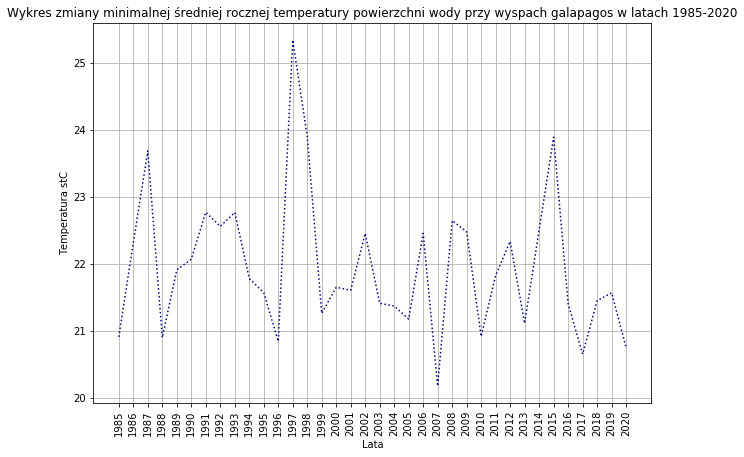

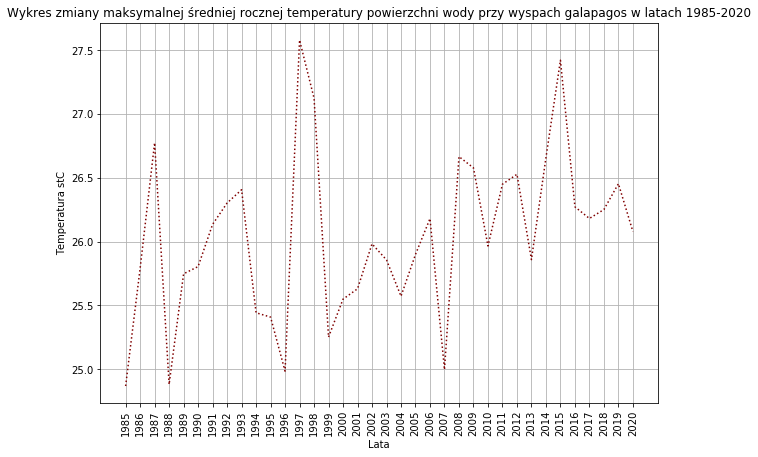

In [15]:
import pickle
import matplotlib.pyplot as plt

MinTempFile = open('min_temp_galapagos_sea_surface', 'rb')
MaxTempFile = open('max_temp_galapagos_sea_surface', 'rb')
MinTemp = pickle.load(MinTempFile)
MaxTemp = pickle.load(MaxTempFile)
MinTempFile.close()
MaxTempFile.close()


plt.figure(figsize=(10, 7))
plt.plot([year for year in MinTemp.keys()], [temp for temp in MinTemp.values()], color = 'navy', linestyle = 'dotted')
plt.xticks([el for el in MinTemp.keys()], rotation=90)
plt.title("Wykres zmiany minimalnej średniej rocznej temperatury powierzchni wody przy wyspach galapagos w latach 1985-2020")
plt.xlabel('Lata')
plt.ylabel('Temperatura stC')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot([year for year in MaxTemp.keys()], [temp for temp in MaxTemp.values()], color = 'maroon', linestyle = 'dotted' )
plt.xticks([el for el in MinTemp.keys()], rotation=90)
plt.title("Wykres zmiany maksymalnej średniej rocznej temperatury powierzchni wody przy wyspach galapagos w latach 1985-2020")
plt.xlabel('Lata')
plt.ylabel('Temperatura stC')
plt.grid(True)
plt.show()

### Zadanie 4 [30 pkt] 
Wyszukaj w internecie informacje jak wykonać wykresy słupkowe, kołowe,
punktowe. Dla tych samych danych, które wybrałeś dla zadania 2, narysuj  takie wykresy (po 5 pkt za wykres).

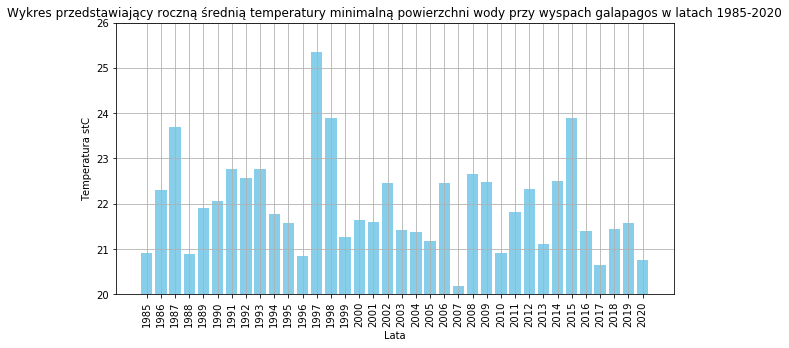

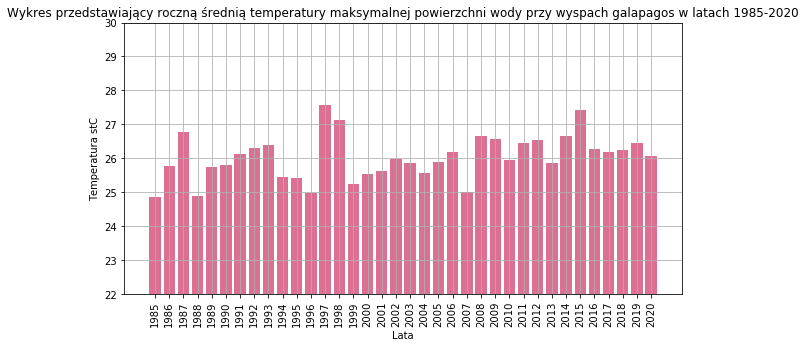

In [16]:
import pickle
import matplotlib.pyplot as plt

MinTempFile = open('min_temp_galapagos_sea_surface', 'rb')
MaxTempFile = open('max_temp_galapagos_sea_surface', 'rb')
MinTemp = pickle.load(MinTempFile)
MaxTemp = pickle.load(MaxTempFile)
MinTempFile.close()
MaxTempFile.close()

year = [int(year) for year in MinTemp.keys()]
temp = [temp for temp in MinTemp.values()]
plt.figure(figsize=(10, 5))
plt.bar(year, temp, color = 'skyblue')
plt.ylim(ymax = 26, ymin = 20)
plt.xticks(year, rotation=90)
plt.title("Wykres przedstawiający roczną średnią temperatury minimalną powierzchni wody przy wyspach galapagos w latach 1985-2020")
plt.xlabel('Lata')
plt.ylabel('Temperatura stC')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.ylim(ymax = 30, ymin = 22)
plt.bar([int(year) for year in MaxTemp.keys()], [temp for temp in MaxTemp.values()], color = 'palevioletred')
plt.xticks([int(year) for year in MaxTemp.keys()], rotation=90)
plt.title("Wykres przedstawiający roczną średnią temperatury maksymalnej powierzchni wody przy wyspach galapagos w latach 1985-2020")
plt.xlabel('Lata')
plt.ylabel('Temperatura stC')
plt.grid(True)
plt.show()

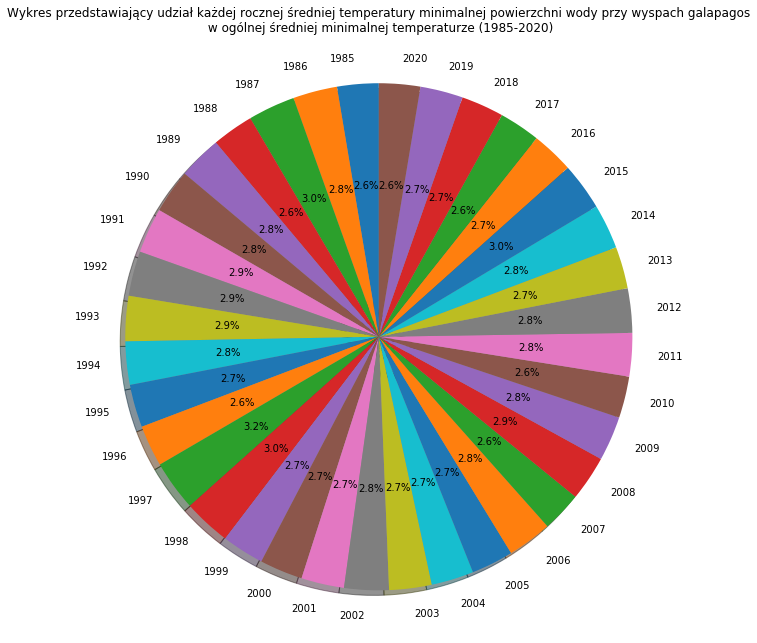

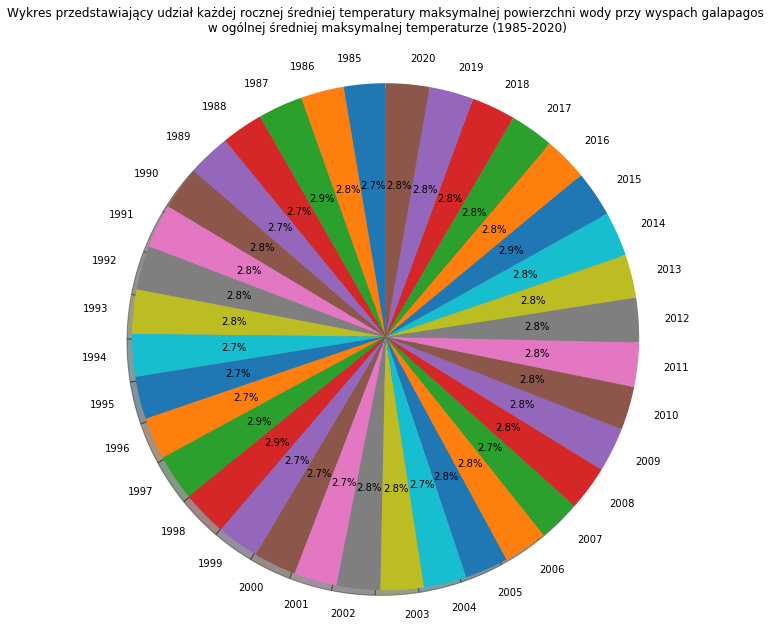

In [17]:
import pickle
import matplotlib.pyplot as plt

MinTempFile = open('min_temp_galapagos_sea_surface', 'rb')
MaxTempFile = open('max_temp_galapagos_sea_surface', 'rb')
MinTemp = pickle.load(MinTempFile)
MaxTemp = pickle.load(MaxTempFile)
MinTempFile.close()
MaxTempFile.close()



year = [year for year in MinTemp.keys()]
temp = [temp for temp in MinTemp.values()]

plt.figure(figsize=(10, 11))
plt.pie(temp, labels=year, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.grid(True)
plt.title("Wykres przedstawiający udział każdej rocznej średniej temperatury minimalnej powierzchni wody przy wyspach galapagos\n w ogólnej średniej minimalnej temperaturze (1985-2020)")
plt.show()



year = [year for year in MaxTemp.keys()]
temp = [temp for temp in MaxTemp.values()]

plt.figure(figsize=(10, 11))
plt.pie(temp, labels=year, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.grid(True)
plt.title("Wykres przedstawiający udział każdej rocznej średniej temperatury maksymalnej powierzchni wody przy wyspach galapagos\n w ogólnej średniej maksymalnej temperaturze (1985-2020)")
plt.show()


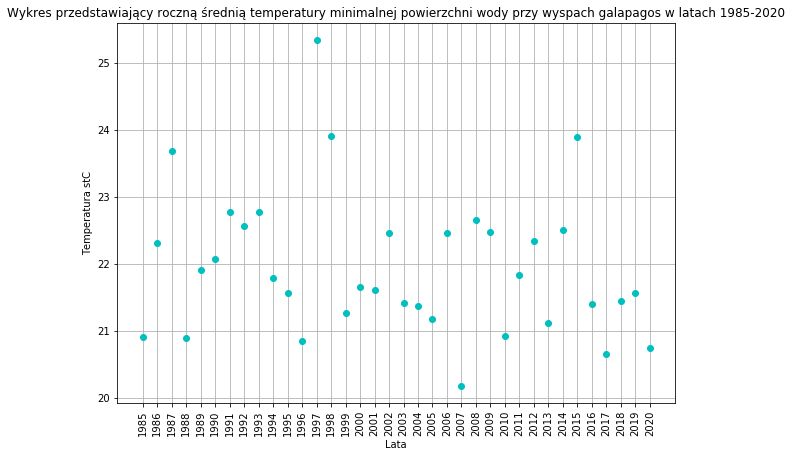

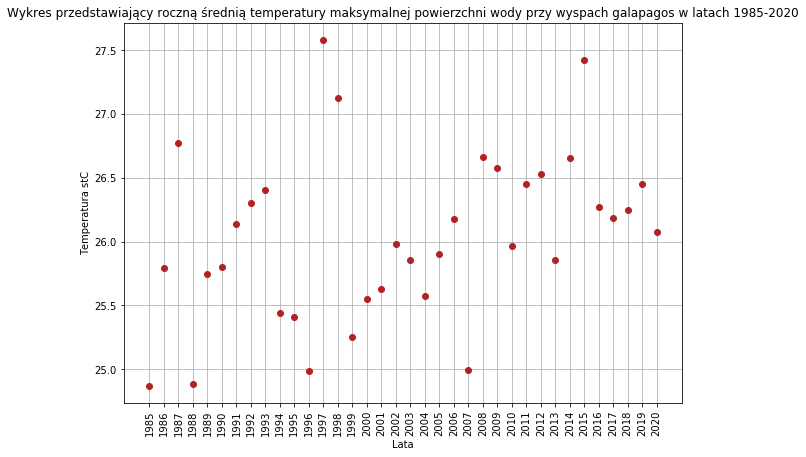

In [18]:
import pickle
import matplotlib.pyplot as plt

MinTempFile = open('min_temp_galapagos_sea_surface', 'rb')
MaxTempFile = open('max_temp_galapagos_sea_surface', 'rb')
MinTemp = pickle.load(MinTempFile)
MaxTemp = pickle.load(MaxTempFile)
MinTempFile.close()
MaxTempFile.close()

plt.figure(figsize=(10, 7))
plt.plot([int(year) for year in MinTemp.keys()], [temp for temp in MinTemp.values()], 'co')
plt.xticks([i for i in range(1985,2021)], rotation=90)
plt.title("Wykres przedstawiający roczną średnią temperatury minimalnej powierzchni wody przy wyspach galapagos w latach 1985-2020")
plt.xlabel('Lata')
plt.ylabel('Temperatura stC')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 7))
plt.plot([int(year) for year in MaxTemp.keys()], [temp for temp in MaxTemp.values()], 'o', color = 'firebrick')
plt.xticks([i for i in range(1985,2021)], rotation=90)
plt.title("Wykres przedstawiający roczną średnią temperatury maksymalnej powierzchni wody przy wyspach galapagos w latach 1985-2020")
plt.xlabel('Lata')
plt.ylabel('Temperatura stC')
plt.grid(True)
plt.show()